# 1 The simplified SMO algorithm

In [61]:
def loadDataSet(fileName):
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

In [62]:
def selectJrand(i, m):
    j = i;
    while(j == i):
        j = int(np.random.uniform(0, m)) # i must not equal j
    return j

In [63]:
def clipAlpha(aj, H, L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

In [64]:
import numpy as np
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    """
    dataMatIn: data set
    classLabels: label tip
    C: constant
    toler: tolerance 
    maxIter: maximum number of iterations before quitting(outter cycle)
    """
    dataMatrix = np.mat(dataMatIn) # trun the dataMatIn to numpy array
    labelMat = np.mat(classLabels).transpose() # turn the labelMatrix to numpy array
    b = 0 # 
    m, n = np.shape(dataMatrix) # get the size of the input matrix
    alphas = np.mat(np.zeros((m, 1))) # initial the weight vector for every sample
    iter = 0 # record the change times if the alpha vector still not change
    while(iter < maxIter):
        alphaPairsChanged = 0 # record alpha vector change then add-self
        for i in range(m):
            fXi = float(np.multiply(alphas, labelMat).T * (dataMatrix * dataMatrix[i, :].T)) + b
            Ei = fXi - float(labelMat[i])
            if((labelMat[i] * Ei < -toler) and (alphas[i] < C) or (labelMat[i] * Ei > toler) and (alphas[i] > 0)):
                j = selectJrand(i, m)
                fXj = float(np.multiply(alphas, labelMat).T * (dataMatrix * dataMatrix[j, :].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy()
                alphaJold = alphas[j].copy() # record the old alpha to compare with the new value
                if(labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L == H:
                    print("L == H")
                    continue
                eta = 2 * dataMatrix[i, :] * dataMatrix[j, :].T - dataMatrix[i, :] * dataMatrix[i, :].T - dataMatrix[j, :] * dataMatrix[j, :].T
                if eta >= 0:
                    print("eta >= 0")
                    continue
                alphas[j] -= labelMat[j] * (Ei - Ej) / eta
                alphas[j] = clipAlpha(alphas[j], H, L)
                if(np.abs(alphas[j] - alphaJold) < 0.00001):
                    print ("j not moving enough")
                    continue
                alphas[i] +=labelMat[j] * labelMat[i] * (alphaJold - alphas[j])
                b1 = b - Ei - labelMat[i] * (alphas[i] - alphaIold) * dataMatrix[i, :] * dataMatrix[i, :].T - labelMat[j] * (alphas[j] - alphaJold) * dataMatrix[i, :] * dataMatrix[j, :].T
                b2 = b - Ej - labelMat[i] * (alphas[i] - alphaIold) * dataMatrix[i, :] * dataMatrix[j, :].T - labelMat[j] * (alphas[j] - alphaJold) * dataMatrix[j, :] * dataMatrix[j, :].T
                if(0 < alphas[i]) and (C > alphas[i]): 
                    b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): 
                    b = b2
                else: 
                    b = (b1 + b2) / 2.0
                alphaPairsChanged += 1
                print("iter: %d, i:% d, pairs changed %d" % (iter, i, alphaPairsChanged))
            if (alphaPairsChanged == 0):
                iter += 1
            else:
                iter = 0
            print("iteration number: %d" % iter)
        return b, alphas

In [65]:
dataArr, labelArr = loadDataSet('testSet.txt')

In [66]:
b, alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)

iter: 0, i: 0, pairs changed 1
iteration number: 0
iteration number: 0
L == H
iteration number: 0
L == H
L == H
iteration number: 0
iteration number: 0
iter: 0, i: 8, pairs changed 2
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
j not moving enough
iteration number: 0
iteration number: 0
iteration number: 0
iter: 0, i: 17, pairs changed 3
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
j not moving enough
L == H
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
j not moving enough
iteration number: 0
L == H
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
iteration number: 0
j not moving enough
j not moving enough
iteration number: 0
iteration n

In [67]:
b

matrix([[-2.98364634]])

In [68]:
alphas[alphas > 0] # alphas > 0 return a boolean to judge the element bigger than 0 called array filtering

matrix([[0.07784831, 0.07784831, 0.01112454, 0.01112454, 0.02762409,
         0.02762409, 0.04645095, 0.04645095]])

In [69]:
np.shape(alphas[alphas > 0]) #the num of support vector
for i in range(100):
    if alphas[i] > 0.0: print(dataArr[i], labelArr[i])

[3.542485, 1.977398] -1.0
[8.610639, 2.046708] 1.0
[3.634009, 1.730537] -1.0
[8.117032, 0.623493] 1.0
[4.658191, 3.507396] -1.0
[7.886608, 0.461755] 1.0
[6.080573, 0.418886] 1.0
[3.263585, 1.367898] -1.0


# 2.the complete Platt SMO algorithm

## aided function

In [86]:
class optStruct:
    def __init__(self, dataMatIn, classLabels, C, toler, kTup):
        self.X = dataMatIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = np.shape(dataMatIn)[0]
        self.alphas = np.mat(np.zeros((self.m, 1)))
        self.b = 0
        self.eCache = np.mat(np.zeros((self.m, 2)))
        self.K = np.mat(np.zeros((self.m, self.m)))
        for i in range(self.m):
            self.K[:, i] = kernelTrans(self.X, self.X[i, :], kTup)

In [87]:
def calcEk(oS, k):
    """
    calculate E
    """
    fXk = float(np.multiply(oS.alphas, oS.labelMat).T * oS.K[:, k]) + oS.b
    Ek = fXk - float(oS.labelMat[k])
    return Ek

In [88]:
def selectJ(i, oS, Ei):
    """
    select adapt second alpha to generantee every optimization get the max step
    """
    maxK = -1
    maxDeltaE = 0
    Ej = 0
    oS.eCache[i] = [1, Ei] # 1 is a flag to express the smaple j has been selected or not
    validEcachaList = np.nonzero(oS.eCache[:, 0].A)[0] # np.A return a array type data
    if(len(validEcachaList)) > 1:
        for k in validEcachaList:
            if k == i:
                continue
            Ek = calcEk(oS, k)
            deltaE = np.abs(Ei - Ek)
            if(deltaE > maxDeltaE): #select the maximum step j
                maxK = k
                maxDeltaE = deltaE
                Ej = Ek
        return maxK, Ej
    else:
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
    return j, Ej

In [89]:
def updateEk(oS, k): # calculate error value svae in the eCache to record the valid change
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1, Ek]

In [90]:
def innerL(i, oS):
    """
    select the second alpha method
    """
    Ei = calcEk(oS, i) # get sample i error for the data set
    if((oS.labelMat[i] * Ei < -oS.tol) and (oS.alphas[i] < oS.C)) or ((oS.labelMat[i] * Ei > oS.tol) and (oS.alphas[i] > 0)):
        j, Ej = selectJ(i, oS, Ei) # select j in max step
        alphaIold = oS.alphas[i].copy()
        alphaJold = oS.alphas[j].copy()
        if(oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[i] + oS.alphas[j] - oS.C)
            H = min(oS.C, oS.alphas[i] + oS.alphas[j])
        if L == H:
            print("L == H")
            return 0
        eta = 2.0 * oS.K[i, j] - oS.K[i, i] - oS.K[j, j]
        if eta >= 0:
            print("eta >= 0")
            return 0
        oS.alphas[j] -= oS.labelMat[j] * (Ei - Ej) / eta
        oS.alphas[j] = clipAlpha(oS.alphas[j], H, L)
        updateEk(oS, i) # update the error cache
        if(np.abs(oS.alphas[j] - alphaJold) < 0.00001):
            print(" j not moving enough")
            return 0
        oS.alphas[i] += oS.labelMat[j] * oS.labelMat[j] * (alphaJold - oS.alphas[j])
        updateEk(oS, i) # update the error cache
        b1 = oS.b - Ei - oS.labelMat[i] * (oS.alphas[i] - alphaIold) * oS.K[i, i] - oS.labelMat[j] * (oS.alphas[j] - alphaJold) * oS.K[i, j]
        b2 = oS.b - Ej - oS.labelMat[i] * (oS.alphas[i] - alphaIold) * oS.K[i, j] - oS.labelMat[j] * (oS.alphas[j] - alphaJold) * oS.K[j, j]
        if(oS.alphas[i] > 0) and (oS.alphas[i] < oS.C):
            oS.b = b1
        elif(oS.alphas[j] > 0) and (oS.alphas[j] < oS.C):
            oS.b = b2
        else:
            oS.b = (b1 + b2) / 2.0
        return 1
    else:
        return 0

In [91]:
def smoP(dataMatIn, classLabels, C, toler, maxIter, kTup = ('lin', 0)):
    oS = optStruct(np.mat(dataMatIn), np.mat(classLabels).transpose(), C, toler, kTup)
    iter = 0
    entrieSet = True
    alphaPairsChanged = 0
    while(iter < maxIter) and ((alphaPairsChanged > 0) or (entrieSet)):
        alphaPairsChanged = 0
        if entrieSet:
            for i in range(oS.m): # traverse the boundary number
                alphaPairsChanged += innerL(i, oS) # record the num of the cycle times
                print("fullSet, iter: %d i: %d, pairs changed %d" %(iter, i, alphaPairsChanged))
            iter += 1
        else:
            nonBoundIs = np.nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0] # traverse the non-boundary data
            for i in nonBoundIs:
                alphaPairsChanged += innerL(i, oS)
                print("non-bound, iter: %d i: %d, paris changed %d" % (iter, i, alphaPairsChanged))
            iter += 1
        if entrieSet:
            entrieSet = False
        elif (alphaPairsChanged == 0):
            entrieSet = True
        print("iteration number: %d" % iter)
    return oS.b, oS.alphas

In [115]:
b, alphas = smoP(dataArr, labelArr, 0.6, 0.001, 40)

fullSet, iter: 0 i: 0, pairs changed 1
fullSet, iter: 0 i: 1, pairs changed 1
fullSet, iter: 0 i: 2, pairs changed 2
fullSet, iter: 0 i: 3, pairs changed 3
fullSet, iter: 0 i: 4, pairs changed 3
fullSet, iter: 0 i: 5, pairs changed 3
fullSet, iter: 0 i: 6, pairs changed 3
fullSet, iter: 0 i: 7, pairs changed 3
fullSet, iter: 0 i: 8, pairs changed 4
fullSet, iter: 0 i: 9, pairs changed 4
 j not moving enough
fullSet, iter: 0 i: 10, pairs changed 4
fullSet, iter: 0 i: 11, pairs changed 4
fullSet, iter: 0 i: 12, pairs changed 4
fullSet, iter: 0 i: 13, pairs changed 4
fullSet, iter: 0 i: 14, pairs changed 4
fullSet, iter: 0 i: 15, pairs changed 4
 j not moving enough
fullSet, iter: 0 i: 16, pairs changed 4
L == H
fullSet, iter: 0 i: 17, pairs changed 4
fullSet, iter: 0 i: 18, pairs changed 4
fullSet, iter: 0 i: 19, pairs changed 4
fullSet, iter: 0 i: 20, pairs changed 4
fullSet, iter: 0 i: 21, pairs changed 4
fullSet, iter: 0 i: 22, pairs changed 4
 j not moving enough
fullSet, iter: 0 i: 

In [116]:
def calcWs(alphas, dataArr, classLabels):
    X = np.mat(dataArr)
    labelMat = np.mat(classLabels).transpose()
    m, n = np.shape(X)
    w = np.zeros((n, 1))
    for i in range(m):
        w += np.multiply(alphas[i] * labelMat[i], X[i, :].T)
    return w

In [117]:
ws = calcWs(alphas, dataArr, labelArr)

In [118]:
ws

array([[ 1.20615181],
       [-0.08487519]])

In [119]:
dataMat = np.mat(dataArr)
dataMat[0] * np.mat(ws) + b

matrix([[-1.47197547]])

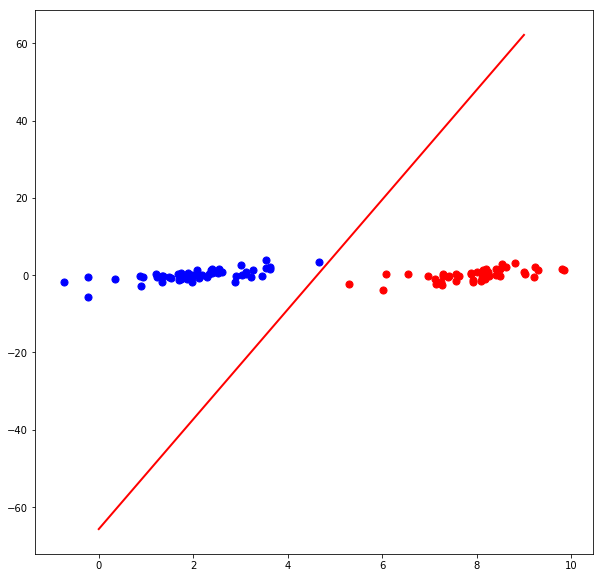

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
dataArr = np.mat(dataArr)
for i in range(len(dataArr)):
    if labelArr[i] == 1:
        plt.scatter(np.array(dataArr[i, 0]), np.array(dataArr[i, 1]), c = 'r', s = 50)
    else:
        plt.scatter(np.array(dataArr[i, 0]), np.array(dataArr[i, 1]), c = 'b', s = 50)

wsArr = [ws[0, 0], ws[1, 0]]
x = np.arange(0, 10, 1)
y = (-b[0, 0] - wsArr[0] * x) / wsArr[1]
plt.plot(x, y, c = 'r', linewidth = 2)
plt.show()


# 3 use kernel function

In [127]:
def kernelTrans(X, A, kTup):
    """
    kTup: Tuple(kernelNmae, select parameter...)
    """
    m, n = np.shape(X)
    K = np.mat(np.zeros((m, 1)))
    if kTup[0] == 'lin':
        K = X * A.T # if the kernel function is linear, fill the K with inner product
    elif kTup[0] == 'rbf':
        for j in range(m): # gaussian kernel k(x, y) = exp(-||x - y||^2 / (2 * delta ^ 2))
            deltaRow = X[j, :] - A 
            K[j] = deltaRow * deltaRow.T
        K = np.exp(K / (-1 * kTup[1] ** 2))
    else: 
        raise NameError('Houston We Have a Problem-- That Kernel is not recognized')
    return K

In [134]:
def testRbf(k1 = 1.3):
    dataArr, labelArr = loadDataSet('testSetRBF.txt')
    b, alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, ('rbf', k1))
    datMat = np.mat(dataArr)
    labelMat = np.mat(labelArr).transpose()
    svInd = np.nonzero(alphas.A > 0)[0] # collect the non-zero element subscript
    sVs = datMat[svInd]
    labelSv = labelMat[svInd]
    print("there are %d Support vectors" % np.shape(sVs)[0])
    m, n = np.shape(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs, datMat[i, :], ('rbf', k1))
        predict = kernelEval.T * np.multiply(labelSv, alphas[svInd]) + b
        if np.sign(predict) != np.sign(labelArr[i]):
            errorCount += 1
    print("the training error rate is: %f" % (float(errorCount)/ m))
    dataArr, labelArr = loadDataSet('testSetRBF.txt')
    datMat = np.mat(dataArr)
    labelMat = np.mat(labelArr).transpose()
    m, n = np.shape(datMat)
    for i in range(m):
        kernelEval = kernelTrans(sVs, datMat[i, :], ('rbf', k1)) # use the model to predict the new data
        predict = kernelEval.T * np.multiply(labelSv, alphas[svInd]) + b
        if np.sign(predict) != np.sign(labelArr[i]):
            errorCount += 1
    print("the test error rate is: %f" % (float(errorCount) / m))
        

In [135]:
testRbf()

L == H
fullSet, iter: 0 i: 0, pairs changed 0
fullSet, iter: 0 i: 1, pairs changed 1
fullSet, iter: 0 i: 2, pairs changed 2
fullSet, iter: 0 i: 3, pairs changed 2
fullSet, iter: 0 i: 4, pairs changed 3
fullSet, iter: 0 i: 5, pairs changed 3
fullSet, iter: 0 i: 6, pairs changed 4
fullSet, iter: 0 i: 7, pairs changed 5
fullSet, iter: 0 i: 8, pairs changed 6
fullSet, iter: 0 i: 9, pairs changed 7
fullSet, iter: 0 i: 10, pairs changed 8
fullSet, iter: 0 i: 11, pairs changed 9
fullSet, iter: 0 i: 12, pairs changed 10
fullSet, iter: 0 i: 13, pairs changed 11
fullSet, iter: 0 i: 14, pairs changed 12
fullSet, iter: 0 i: 15, pairs changed 13
fullSet, iter: 0 i: 16, pairs changed 13
fullSet, iter: 0 i: 17, pairs changed 13
fullSet, iter: 0 i: 18, pairs changed 13
fullSet, iter: 0 i: 19, pairs changed 13
fullSet, iter: 0 i: 20, pairs changed 13
L == H
fullSet, iter: 0 i: 21, pairs changed 13
fullSet, iter: 0 i: 22, pairs changed 13
fullSet, iter: 0 i: 23, pairs changed 13
fullSet, iter: 0 i: 24, 

L == H
fullSet, iter: 2 i: 99, pairs changed 2
iteration number: 3
 j not moving enough
non-bound, iter: 3 i: 0, paris changed 0
 j not moving enough
non-bound, iter: 3 i: 1, paris changed 0
non-bound, iter: 3 i: 2, paris changed 1
 j not moving enough
non-bound, iter: 3 i: 7, paris changed 1
 j not moving enough
non-bound, iter: 3 i: 13, paris changed 1
 j not moving enough
non-bound, iter: 3 i: 14, paris changed 1
iteration number: 4
 j not moving enough
non-bound, iter: 4 i: 0, paris changed 0
 j not moving enough
non-bound, iter: 4 i: 1, paris changed 0
non-bound, iter: 4 i: 2, paris changed 0
 j not moving enough
non-bound, iter: 4 i: 7, paris changed 0
 j not moving enough
non-bound, iter: 4 i: 13, paris changed 0
 j not moving enough
non-bound, iter: 4 i: 14, paris changed 0
non-bound, iter: 4 i: 58, paris changed 0
iteration number: 5
 j not moving enough
fullSet, iter: 5 i: 0, pairs changed 0
 j not moving enough
fullSet, iter: 5 i: 1, pairs changed 0
fullSet, iter: 5 i: 2, pa

fullSet, iter: 9 i: 29, pairs changed 0
fullSet, iter: 9 i: 30, pairs changed 0
fullSet, iter: 9 i: 31, pairs changed 0
 j not moving enough
fullSet, iter: 9 i: 32, pairs changed 0
fullSet, iter: 9 i: 33, pairs changed 0
fullSet, iter: 9 i: 34, pairs changed 0
fullSet, iter: 9 i: 35, pairs changed 0
L == H
fullSet, iter: 9 i: 36, pairs changed 0
fullSet, iter: 9 i: 37, pairs changed 0
fullSet, iter: 9 i: 38, pairs changed 0
fullSet, iter: 9 i: 39, pairs changed 0
fullSet, iter: 9 i: 40, pairs changed 0
 j not moving enough
fullSet, iter: 9 i: 41, pairs changed 0
 j not moving enough
fullSet, iter: 9 i: 42, pairs changed 0
fullSet, iter: 9 i: 43, pairs changed 0
fullSet, iter: 9 i: 44, pairs changed 0
fullSet, iter: 9 i: 45, pairs changed 0
fullSet, iter: 9 i: 46, pairs changed 0
fullSet, iter: 9 i: 47, pairs changed 0
fullSet, iter: 9 i: 48, pairs changed 0
 j not moving enough
fullSet, iter: 9 i: 49, pairs changed 0
 j not moving enough
fullSet, iter: 9 i: 50, pairs changed 0
fullSet,

# use svm to predict the hand-writing

In [141]:
def img2Vector(dirName):
    returnVect = np.zeros((1, 1024)) # initial the container
    fr = open(dirName) # read file
    for i in range(32): # two cycle read the content of the file
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

In [142]:
def loadImages(dirName):
    from os import listdir
    hwLabels = []
    trainingFileList = listdir(dirName)
    m = len(trainingFileList)
    trainingMat = np.zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumber = int(fileStr.split('_')[0])
        if classNumber == 9:
            hwLabels.append(-1) # 9 is label -1 
        else:
            hwLabels.append(1)
        trainingMat[i, :] = img2Vector('%s/%s' %(dirName, fileNameStr))
    return trainingMat, hwLabels

In [143]:
def testDigits(kTup = ('rbf', 10)):
    dataArr, labelArr = loadImages('trainingDigits')
    b, alphas = smoP(dataArr, labelArr, 200, 0.0001, 10000, kTup)
    datMat = np.mat(dataArr)
    labelMat = np.mat(labelArr).transpose()
    svInd = np.nonzero(alphas.A > 0)[0]
    sVs = datMat[svInd]
    labelSv = labelMat[svInd]
    print("there are %d support vector" % np.shape(sVs)[0])
    m, n = np.shpae(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs, datMat[i, :], kTup)
        predict = kernelEval * np.multiply(labelSv, alphas[svInd]) + b
        if np.sign(predict) != np.sign(labelArr[i]):
            errorCount += 1
    print("the training error rate is: %f" % (float(errorCount) / m))
    
    dataArr, labelArr = loadImages('testDigits')
    datMat = np.mat(dataArr)
    labelMat = np.mat(labelArr).transpose()
    m, n = np.shpae(datMat)
    errorCount = 0
    for i in range(m):
        kernelEval = kernelTrans(sVs, datMat[i, :], kTup)
        predict = kernelEval * np.multiply(labelSv, alphas[svInd]) + b
        if np.sign(predict) != np.sign(labelArr[i]):
            errorCount += 1
    print("the training error rate is: %f" % (float(errorCount) / m))

In [146]:
testDigits()

L == H
fullSet, iter: 0 i: 0, pairs changed 0
fullSet, iter: 0 i: 1, pairs changed 1
fullSet, iter: 0 i: 2, pairs changed 2
fullSet, iter: 0 i: 3, pairs changed 2
fullSet, iter: 0 i: 4, pairs changed 2
fullSet, iter: 0 i: 5, pairs changed 2
fullSet, iter: 0 i: 6, pairs changed 2
fullSet, iter: 0 i: 7, pairs changed 2
fullSet, iter: 0 i: 8, pairs changed 2
fullSet, iter: 0 i: 9, pairs changed 2
fullSet, iter: 0 i: 10, pairs changed 2
fullSet, iter: 0 i: 11, pairs changed 2
fullSet, iter: 0 i: 12, pairs changed 2
fullSet, iter: 0 i: 13, pairs changed 2
fullSet, iter: 0 i: 14, pairs changed 2
fullSet, iter: 0 i: 15, pairs changed 2
fullSet, iter: 0 i: 16, pairs changed 2
fullSet, iter: 0 i: 17, pairs changed 2
fullSet, iter: 0 i: 18, pairs changed 2
fullSet, iter: 0 i: 19, pairs changed 2
fullSet, iter: 0 i: 20, pairs changed 2
fullSet, iter: 0 i: 21, pairs changed 2
fullSet, iter: 0 i: 22, pairs changed 2
fullSet, iter: 0 i: 23, pairs changed 2
fullSet, iter: 0 i: 24, pairs changed 2
ful

fullSet, iter: 0 i: 275, pairs changed 2
fullSet, iter: 0 i: 276, pairs changed 2
fullSet, iter: 0 i: 277, pairs changed 2
fullSet, iter: 0 i: 278, pairs changed 2
fullSet, iter: 0 i: 279, pairs changed 2
fullSet, iter: 0 i: 280, pairs changed 2
fullSet, iter: 0 i: 281, pairs changed 2
fullSet, iter: 0 i: 282, pairs changed 2
fullSet, iter: 0 i: 283, pairs changed 2
fullSet, iter: 0 i: 284, pairs changed 2
fullSet, iter: 0 i: 285, pairs changed 2
fullSet, iter: 0 i: 286, pairs changed 2
fullSet, iter: 0 i: 287, pairs changed 2
fullSet, iter: 0 i: 288, pairs changed 2
fullSet, iter: 0 i: 289, pairs changed 2
fullSet, iter: 0 i: 290, pairs changed 2
fullSet, iter: 0 i: 291, pairs changed 2
fullSet, iter: 0 i: 292, pairs changed 2
fullSet, iter: 0 i: 293, pairs changed 2
fullSet, iter: 0 i: 294, pairs changed 2
fullSet, iter: 0 i: 295, pairs changed 2
fullSet, iter: 0 i: 296, pairs changed 2
fullSet, iter: 0 i: 297, pairs changed 2
fullSet, iter: 0 i: 298, pairs changed 2
fullSet, iter: 0

fullSet, iter: 0 i: 556, pairs changed 2
fullSet, iter: 0 i: 557, pairs changed 2
fullSet, iter: 0 i: 558, pairs changed 2
fullSet, iter: 0 i: 559, pairs changed 2
fullSet, iter: 0 i: 560, pairs changed 2
fullSet, iter: 0 i: 561, pairs changed 2
fullSet, iter: 0 i: 562, pairs changed 2
fullSet, iter: 0 i: 563, pairs changed 2
fullSet, iter: 0 i: 564, pairs changed 2
fullSet, iter: 0 i: 565, pairs changed 2
fullSet, iter: 0 i: 566, pairs changed 2
fullSet, iter: 0 i: 567, pairs changed 2
fullSet, iter: 0 i: 568, pairs changed 2
fullSet, iter: 0 i: 569, pairs changed 2
fullSet, iter: 0 i: 570, pairs changed 2
fullSet, iter: 0 i: 571, pairs changed 2
fullSet, iter: 0 i: 572, pairs changed 2
fullSet, iter: 0 i: 573, pairs changed 2
fullSet, iter: 0 i: 574, pairs changed 2
fullSet, iter: 0 i: 575, pairs changed 2
fullSet, iter: 0 i: 576, pairs changed 2
fullSet, iter: 0 i: 577, pairs changed 2
fullSet, iter: 0 i: 578, pairs changed 2
fullSet, iter: 0 i: 579, pairs changed 2
fullSet, iter: 0

fullSet, iter: 0 i: 829, pairs changed 2
fullSet, iter: 0 i: 830, pairs changed 2
fullSet, iter: 0 i: 831, pairs changed 2
fullSet, iter: 0 i: 832, pairs changed 2
fullSet, iter: 0 i: 833, pairs changed 2
fullSet, iter: 0 i: 834, pairs changed 2
fullSet, iter: 0 i: 835, pairs changed 2
fullSet, iter: 0 i: 836, pairs changed 2
fullSet, iter: 0 i: 837, pairs changed 2
fullSet, iter: 0 i: 838, pairs changed 2
fullSet, iter: 0 i: 839, pairs changed 2
fullSet, iter: 0 i: 840, pairs changed 2
fullSet, iter: 0 i: 841, pairs changed 2
fullSet, iter: 0 i: 842, pairs changed 2
fullSet, iter: 0 i: 843, pairs changed 2
fullSet, iter: 0 i: 844, pairs changed 2
fullSet, iter: 0 i: 845, pairs changed 2
fullSet, iter: 0 i: 846, pairs changed 2
fullSet, iter: 0 i: 847, pairs changed 2
fullSet, iter: 0 i: 848, pairs changed 2
fullSet, iter: 0 i: 849, pairs changed 2
fullSet, iter: 0 i: 850, pairs changed 2
fullSet, iter: 0 i: 851, pairs changed 2
fullSet, iter: 0 i: 852, pairs changed 2
fullSet, iter: 0

fullSet, iter: 0 i: 1108, pairs changed 2
fullSet, iter: 0 i: 1109, pairs changed 2
fullSet, iter: 0 i: 1110, pairs changed 2
fullSet, iter: 0 i: 1111, pairs changed 2
fullSet, iter: 0 i: 1112, pairs changed 2
fullSet, iter: 0 i: 1113, pairs changed 2
fullSet, iter: 0 i: 1114, pairs changed 2
fullSet, iter: 0 i: 1115, pairs changed 2
fullSet, iter: 0 i: 1116, pairs changed 2
fullSet, iter: 0 i: 1117, pairs changed 2
fullSet, iter: 0 i: 1118, pairs changed 2
fullSet, iter: 0 i: 1119, pairs changed 2
fullSet, iter: 0 i: 1120, pairs changed 2
fullSet, iter: 0 i: 1121, pairs changed 2
fullSet, iter: 0 i: 1122, pairs changed 2
fullSet, iter: 0 i: 1123, pairs changed 2
fullSet, iter: 0 i: 1124, pairs changed 2
fullSet, iter: 0 i: 1125, pairs changed 2
fullSet, iter: 0 i: 1126, pairs changed 2
fullSet, iter: 0 i: 1127, pairs changed 2
fullSet, iter: 0 i: 1128, pairs changed 2
fullSet, iter: 0 i: 1129, pairs changed 2
fullSet, iter: 0 i: 1130, pairs changed 2
fullSet, iter: 0 i: 1131, pairs ch

fullSet, iter: 0 i: 1396, pairs changed 2
fullSet, iter: 0 i: 1397, pairs changed 2
fullSet, iter: 0 i: 1398, pairs changed 2
fullSet, iter: 0 i: 1399, pairs changed 2
fullSet, iter: 0 i: 1400, pairs changed 2
fullSet, iter: 0 i: 1401, pairs changed 2
fullSet, iter: 0 i: 1402, pairs changed 2
fullSet, iter: 0 i: 1403, pairs changed 2
fullSet, iter: 0 i: 1404, pairs changed 2
fullSet, iter: 0 i: 1405, pairs changed 2
fullSet, iter: 0 i: 1406, pairs changed 2
fullSet, iter: 0 i: 1407, pairs changed 2
fullSet, iter: 0 i: 1408, pairs changed 2
fullSet, iter: 0 i: 1409, pairs changed 2
fullSet, iter: 0 i: 1410, pairs changed 2
fullSet, iter: 0 i: 1411, pairs changed 2
fullSet, iter: 0 i: 1412, pairs changed 2
fullSet, iter: 0 i: 1413, pairs changed 2
fullSet, iter: 0 i: 1414, pairs changed 2
fullSet, iter: 0 i: 1415, pairs changed 2
fullSet, iter: 0 i: 1416, pairs changed 2
fullSet, iter: 0 i: 1417, pairs changed 2
fullSet, iter: 0 i: 1418, pairs changed 2
fullSet, iter: 0 i: 1419, pairs ch

fullSet, iter: 0 i: 1667, pairs changed 2
fullSet, iter: 0 i: 1668, pairs changed 2
fullSet, iter: 0 i: 1669, pairs changed 2
fullSet, iter: 0 i: 1670, pairs changed 2
fullSet, iter: 0 i: 1671, pairs changed 2
fullSet, iter: 0 i: 1672, pairs changed 2
fullSet, iter: 0 i: 1673, pairs changed 2
fullSet, iter: 0 i: 1674, pairs changed 2
fullSet, iter: 0 i: 1675, pairs changed 2
fullSet, iter: 0 i: 1676, pairs changed 2
fullSet, iter: 0 i: 1677, pairs changed 2
fullSet, iter: 0 i: 1678, pairs changed 2
fullSet, iter: 0 i: 1679, pairs changed 2
fullSet, iter: 0 i: 1680, pairs changed 2
fullSet, iter: 0 i: 1681, pairs changed 2
fullSet, iter: 0 i: 1682, pairs changed 2
fullSet, iter: 0 i: 1683, pairs changed 2
fullSet, iter: 0 i: 1684, pairs changed 2
fullSet, iter: 0 i: 1685, pairs changed 2
fullSet, iter: 0 i: 1686, pairs changed 2
fullSet, iter: 0 i: 1687, pairs changed 2
fullSet, iter: 0 i: 1688, pairs changed 2
fullSet, iter: 0 i: 1689, pairs changed 2
fullSet, iter: 0 i: 1690, pairs ch

non-bound, iter: 1 i: 0, paris changed 1
non-bound, iter: 1 i: 1, paris changed 2
non-bound, iter: 1 i: 2, paris changed 3
iteration number: 2
non-bound, iter: 2 i: 1933, paris changed 0
iteration number: 3
fullSet, iter: 3 i: 0, pairs changed 1
fullSet, iter: 3 i: 1, pairs changed 2
fullSet, iter: 3 i: 2, pairs changed 3
fullSet, iter: 3 i: 3, pairs changed 4
fullSet, iter: 3 i: 4, pairs changed 5
fullSet, iter: 3 i: 5, pairs changed 6
fullSet, iter: 3 i: 6, pairs changed 7
fullSet, iter: 3 i: 7, pairs changed 8
fullSet, iter: 3 i: 8, pairs changed 9
fullSet, iter: 3 i: 9, pairs changed 9
fullSet, iter: 3 i: 10, pairs changed 9
fullSet, iter: 3 i: 11, pairs changed 9
fullSet, iter: 3 i: 12, pairs changed 10
fullSet, iter: 3 i: 13, pairs changed 11
fullSet, iter: 3 i: 14, pairs changed 11
fullSet, iter: 3 i: 15, pairs changed 11
fullSet, iter: 3 i: 16, pairs changed 11
fullSet, iter: 3 i: 17, pairs changed 11
fullSet, iter: 3 i: 18, pairs changed 11
fullSet, iter: 3 i: 19, pairs change

fullSet, iter: 3 i: 283, pairs changed 26
fullSet, iter: 3 i: 284, pairs changed 26
fullSet, iter: 3 i: 285, pairs changed 26
fullSet, iter: 3 i: 286, pairs changed 26
fullSet, iter: 3 i: 287, pairs changed 26
fullSet, iter: 3 i: 288, pairs changed 26
fullSet, iter: 3 i: 289, pairs changed 26
fullSet, iter: 3 i: 290, pairs changed 26
fullSet, iter: 3 i: 291, pairs changed 26
fullSet, iter: 3 i: 292, pairs changed 26
fullSet, iter: 3 i: 293, pairs changed 26
fullSet, iter: 3 i: 294, pairs changed 26
fullSet, iter: 3 i: 295, pairs changed 26
fullSet, iter: 3 i: 296, pairs changed 26
fullSet, iter: 3 i: 297, pairs changed 26
fullSet, iter: 3 i: 298, pairs changed 26
fullSet, iter: 3 i: 299, pairs changed 26
fullSet, iter: 3 i: 300, pairs changed 26
fullSet, iter: 3 i: 301, pairs changed 26
fullSet, iter: 3 i: 302, pairs changed 26
fullSet, iter: 3 i: 303, pairs changed 26
fullSet, iter: 3 i: 304, pairs changed 26
fullSet, iter: 3 i: 305, pairs changed 26
fullSet, iter: 3 i: 306, pairs cha

fullSet, iter: 3 i: 584, pairs changed 26
fullSet, iter: 3 i: 585, pairs changed 26
fullSet, iter: 3 i: 586, pairs changed 26
fullSet, iter: 3 i: 587, pairs changed 26
fullSet, iter: 3 i: 588, pairs changed 26
fullSet, iter: 3 i: 589, pairs changed 26
fullSet, iter: 3 i: 590, pairs changed 26
fullSet, iter: 3 i: 591, pairs changed 26
fullSet, iter: 3 i: 592, pairs changed 26
fullSet, iter: 3 i: 593, pairs changed 26
fullSet, iter: 3 i: 594, pairs changed 26
fullSet, iter: 3 i: 595, pairs changed 26
fullSet, iter: 3 i: 596, pairs changed 26
fullSet, iter: 3 i: 597, pairs changed 26
fullSet, iter: 3 i: 598, pairs changed 26
fullSet, iter: 3 i: 599, pairs changed 26
fullSet, iter: 3 i: 600, pairs changed 26
fullSet, iter: 3 i: 601, pairs changed 26
fullSet, iter: 3 i: 602, pairs changed 26
fullSet, iter: 3 i: 603, pairs changed 26
fullSet, iter: 3 i: 604, pairs changed 26
fullSet, iter: 3 i: 605, pairs changed 26
fullSet, iter: 3 i: 606, pairs changed 26
fullSet, iter: 3 i: 607, pairs cha

fullSet, iter: 3 i: 856, pairs changed 26
fullSet, iter: 3 i: 857, pairs changed 26
fullSet, iter: 3 i: 858, pairs changed 26
fullSet, iter: 3 i: 859, pairs changed 26
fullSet, iter: 3 i: 860, pairs changed 26
fullSet, iter: 3 i: 861, pairs changed 26
fullSet, iter: 3 i: 862, pairs changed 26
fullSet, iter: 3 i: 863, pairs changed 26
fullSet, iter: 3 i: 864, pairs changed 26
fullSet, iter: 3 i: 865, pairs changed 26
fullSet, iter: 3 i: 866, pairs changed 26
fullSet, iter: 3 i: 867, pairs changed 26
fullSet, iter: 3 i: 868, pairs changed 26
fullSet, iter: 3 i: 869, pairs changed 26
fullSet, iter: 3 i: 870, pairs changed 26
fullSet, iter: 3 i: 871, pairs changed 26
fullSet, iter: 3 i: 872, pairs changed 26
fullSet, iter: 3 i: 873, pairs changed 26
fullSet, iter: 3 i: 874, pairs changed 26
fullSet, iter: 3 i: 875, pairs changed 26
fullSet, iter: 3 i: 876, pairs changed 26
fullSet, iter: 3 i: 877, pairs changed 26
fullSet, iter: 3 i: 878, pairs changed 26
fullSet, iter: 3 i: 879, pairs cha

fullSet, iter: 3 i: 1137, pairs changed 26
fullSet, iter: 3 i: 1138, pairs changed 26
fullSet, iter: 3 i: 1139, pairs changed 26
fullSet, iter: 3 i: 1140, pairs changed 26
fullSet, iter: 3 i: 1141, pairs changed 26
fullSet, iter: 3 i: 1142, pairs changed 26
fullSet, iter: 3 i: 1143, pairs changed 26
fullSet, iter: 3 i: 1144, pairs changed 26
fullSet, iter: 3 i: 1145, pairs changed 26
fullSet, iter: 3 i: 1146, pairs changed 26
fullSet, iter: 3 i: 1147, pairs changed 26
fullSet, iter: 3 i: 1148, pairs changed 26
fullSet, iter: 3 i: 1149, pairs changed 26
fullSet, iter: 3 i: 1150, pairs changed 26
fullSet, iter: 3 i: 1151, pairs changed 26
fullSet, iter: 3 i: 1152, pairs changed 26
fullSet, iter: 3 i: 1153, pairs changed 26
fullSet, iter: 3 i: 1154, pairs changed 26
fullSet, iter: 3 i: 1155, pairs changed 26
fullSet, iter: 3 i: 1156, pairs changed 26
fullSet, iter: 3 i: 1157, pairs changed 26
fullSet, iter: 3 i: 1158, pairs changed 26
fullSet, iter: 3 i: 1159, pairs changed 26
fullSet, it

fullSet, iter: 3 i: 1413, pairs changed 26
fullSet, iter: 3 i: 1414, pairs changed 26
fullSet, iter: 3 i: 1415, pairs changed 26
fullSet, iter: 3 i: 1416, pairs changed 26
fullSet, iter: 3 i: 1417, pairs changed 26
fullSet, iter: 3 i: 1418, pairs changed 26
fullSet, iter: 3 i: 1419, pairs changed 26
fullSet, iter: 3 i: 1420, pairs changed 26
fullSet, iter: 3 i: 1421, pairs changed 26
fullSet, iter: 3 i: 1422, pairs changed 26
fullSet, iter: 3 i: 1423, pairs changed 26
fullSet, iter: 3 i: 1424, pairs changed 26
fullSet, iter: 3 i: 1425, pairs changed 26
fullSet, iter: 3 i: 1426, pairs changed 26
fullSet, iter: 3 i: 1427, pairs changed 26
fullSet, iter: 3 i: 1428, pairs changed 26
fullSet, iter: 3 i: 1429, pairs changed 26
fullSet, iter: 3 i: 1430, pairs changed 26
fullSet, iter: 3 i: 1431, pairs changed 26
fullSet, iter: 3 i: 1432, pairs changed 26
fullSet, iter: 3 i: 1433, pairs changed 26
fullSet, iter: 3 i: 1434, pairs changed 26
fullSet, iter: 3 i: 1435, pairs changed 26
fullSet, it

fullSet, iter: 3 i: 1699, pairs changed 26
fullSet, iter: 3 i: 1700, pairs changed 26
fullSet, iter: 3 i: 1701, pairs changed 26
fullSet, iter: 3 i: 1702, pairs changed 26
fullSet, iter: 3 i: 1703, pairs changed 26
fullSet, iter: 3 i: 1704, pairs changed 26
fullSet, iter: 3 i: 1705, pairs changed 26
fullSet, iter: 3 i: 1706, pairs changed 26
fullSet, iter: 3 i: 1707, pairs changed 26
fullSet, iter: 3 i: 1708, pairs changed 26
fullSet, iter: 3 i: 1709, pairs changed 26
fullSet, iter: 3 i: 1710, pairs changed 26
fullSet, iter: 3 i: 1711, pairs changed 26
fullSet, iter: 3 i: 1712, pairs changed 26
fullSet, iter: 3 i: 1713, pairs changed 26
fullSet, iter: 3 i: 1714, pairs changed 26
fullSet, iter: 3 i: 1715, pairs changed 26
fullSet, iter: 3 i: 1716, pairs changed 26
fullSet, iter: 3 i: 1717, pairs changed 26
fullSet, iter: 3 i: 1718, pairs changed 26
fullSet, iter: 3 i: 1719, pairs changed 26
fullSet, iter: 3 i: 1720, pairs changed 26
fullSet, iter: 3 i: 1721, pairs changed 26
fullSet, it

non-bound, iter: 4 i: 1731, paris changed 9
non-bound, iter: 4 i: 1732, paris changed 10
non-bound, iter: 4 i: 1733, paris changed 11
non-bound, iter: 4 i: 1735, paris changed 12
non-bound, iter: 4 i: 1737, paris changed 13
non-bound, iter: 4 i: 1739, paris changed 14
non-bound, iter: 4 i: 1933, paris changed 15
iteration number: 5
non-bound, iter: 5 i: 2, paris changed 1
non-bound, iter: 5 i: 7, paris changed 2
non-bound, iter: 5 i: 57, paris changed 3
non-bound, iter: 5 i: 133, paris changed 4
non-bound, iter: 5 i: 1730, paris changed 4
non-bound, iter: 5 i: 1731, paris changed 5
non-bound, iter: 5 i: 1732, paris changed 6
non-bound, iter: 5 i: 1733, paris changed 7
non-bound, iter: 5 i: 1734, paris changed 8
non-bound, iter: 5 i: 1737, paris changed 9
non-bound, iter: 5 i: 1738, paris changed 10
non-bound, iter: 5 i: 1739, paris changed 11
iteration number: 6
non-bound, iter: 6 i: 2, paris changed 1
non-bound, iter: 6 i: 5, paris changed 2
non-bound, iter: 6 i: 57, paris changed 3
n

non-bound, iter: 65 i: 20, paris changed 2
non-bound, iter: 65 i: 55, paris changed 3
non-bound, iter: 65 i: 133, paris changed 4
non-bound, iter: 65 i: 1737, paris changed 5
iteration number: 66
non-bound, iter: 66 i: 8, paris changed 0
non-bound, iter: 66 i: 20, paris changed 1
non-bound, iter: 66 i: 1730, paris changed 2
non-bound, iter: 66 i: 1732, paris changed 3
non-bound, iter: 66 i: 1733, paris changed 4
non-bound, iter: 66 i: 1738, paris changed 5
iteration number: 67
non-bound, iter: 67 i: 8, paris changed 1
non-bound, iter: 67 i: 13, paris changed 2
non-bound, iter: 67 i: 55, paris changed 3
non-bound, iter: 67 i: 133, paris changed 4
non-bound, iter: 67 i: 1737, paris changed 5
iteration number: 68
non-bound, iter: 68 i: 8, paris changed 0
non-bound, iter: 68 i: 13, paris changed 1
non-bound, iter: 68 i: 1730, paris changed 2
non-bound, iter: 68 i: 1732, paris changed 3
non-bound, iter: 68 i: 1733, paris changed 4
non-bound, iter: 68 i: 1738, paris changed 5
iteration numbe

non-bound, iter: 113 i: 1730, paris changed 3
iteration number: 114
non-bound, iter: 114 i: 8, paris changed 0
non-bound, iter: 114 i: 1738, paris changed 1
non-bound, iter: 114 i: 1933, paris changed 2
iteration number: 115
non-bound, iter: 115 i: 0, paris changed 0
non-bound, iter: 115 i: 7, paris changed 1
non-bound, iter: 115 i: 8, paris changed 2
iteration number: 116
non-bound, iter: 116 i: 0, paris changed 1
non-bound, iter: 116 i: 1738, paris changed 2
iteration number: 117
non-bound, iter: 117 i: 7, paris changed 0
non-bound, iter: 117 i: 1933, paris changed 1
iteration number: 118
non-bound, iter: 118 i: 7, paris changed 1
non-bound, iter: 118 i: 8, paris changed 2
iteration number: 119
non-bound, iter: 119 i: 1738, paris changed 1
non-bound, iter: 119 i: 1933, paris changed 2
iteration number: 120
non-bound, iter: 120 i: 7, paris changed 1
non-bound, iter: 120 i: 8, paris changed 2
iteration number: 121
non-bound, iter: 121 i: 8, paris changed 0
non-bound, iter: 121 i: 1738,

fullSet, iter: 172 i: 55, pairs changed 15
fullSet, iter: 172 i: 56, pairs changed 16
fullSet, iter: 172 i: 57, pairs changed 17
fullSet, iter: 172 i: 58, pairs changed 18
fullSet, iter: 172 i: 59, pairs changed 19
fullSet, iter: 172 i: 60, pairs changed 20
fullSet, iter: 172 i: 61, pairs changed 21
fullSet, iter: 172 i: 62, pairs changed 22
fullSet, iter: 172 i: 63, pairs changed 23
fullSet, iter: 172 i: 64, pairs changed 24
fullSet, iter: 172 i: 65, pairs changed 25
fullSet, iter: 172 i: 66, pairs changed 26
fullSet, iter: 172 i: 67, pairs changed 26
fullSet, iter: 172 i: 68, pairs changed 26
fullSet, iter: 172 i: 69, pairs changed 27
fullSet, iter: 172 i: 70, pairs changed 28
fullSet, iter: 172 i: 71, pairs changed 28
fullSet, iter: 172 i: 72, pairs changed 28
fullSet, iter: 172 i: 73, pairs changed 28
fullSet, iter: 172 i: 74, pairs changed 28
fullSet, iter: 172 i: 75, pairs changed 28
fullSet, iter: 172 i: 76, pairs changed 28
fullSet, iter: 172 i: 77, pairs changed 28
fullSet, it

fullSet, iter: 172 i: 370, pairs changed 37
fullSet, iter: 172 i: 371, pairs changed 37
fullSet, iter: 172 i: 372, pairs changed 37
fullSet, iter: 172 i: 373, pairs changed 37
fullSet, iter: 172 i: 374, pairs changed 37
fullSet, iter: 172 i: 375, pairs changed 37
fullSet, iter: 172 i: 376, pairs changed 37
fullSet, iter: 172 i: 377, pairs changed 37
fullSet, iter: 172 i: 378, pairs changed 37
fullSet, iter: 172 i: 379, pairs changed 37
fullSet, iter: 172 i: 380, pairs changed 37
fullSet, iter: 172 i: 381, pairs changed 37
fullSet, iter: 172 i: 382, pairs changed 37
fullSet, iter: 172 i: 383, pairs changed 37
fullSet, iter: 172 i: 384, pairs changed 37
fullSet, iter: 172 i: 385, pairs changed 37
fullSet, iter: 172 i: 386, pairs changed 37
fullSet, iter: 172 i: 387, pairs changed 37
fullSet, iter: 172 i: 388, pairs changed 37
fullSet, iter: 172 i: 389, pairs changed 37
fullSet, iter: 172 i: 390, pairs changed 37
fullSet, iter: 172 i: 391, pairs changed 37
fullSet, iter: 172 i: 392, pairs

fullSet, iter: 172 i: 648, pairs changed 37
fullSet, iter: 172 i: 649, pairs changed 37
fullSet, iter: 172 i: 650, pairs changed 37
fullSet, iter: 172 i: 651, pairs changed 37
fullSet, iter: 172 i: 652, pairs changed 37
fullSet, iter: 172 i: 653, pairs changed 37
fullSet, iter: 172 i: 654, pairs changed 37
fullSet, iter: 172 i: 655, pairs changed 37
fullSet, iter: 172 i: 656, pairs changed 37
fullSet, iter: 172 i: 657, pairs changed 37
fullSet, iter: 172 i: 658, pairs changed 37
fullSet, iter: 172 i: 659, pairs changed 37
fullSet, iter: 172 i: 660, pairs changed 37
fullSet, iter: 172 i: 661, pairs changed 37
fullSet, iter: 172 i: 662, pairs changed 37
fullSet, iter: 172 i: 663, pairs changed 37
fullSet, iter: 172 i: 664, pairs changed 37
fullSet, iter: 172 i: 665, pairs changed 37
fullSet, iter: 172 i: 666, pairs changed 37
fullSet, iter: 172 i: 667, pairs changed 37
fullSet, iter: 172 i: 668, pairs changed 37
fullSet, iter: 172 i: 669, pairs changed 37
fullSet, iter: 172 i: 670, pairs

fullSet, iter: 172 i: 917, pairs changed 37
fullSet, iter: 172 i: 918, pairs changed 37
fullSet, iter: 172 i: 919, pairs changed 37
fullSet, iter: 172 i: 920, pairs changed 37
fullSet, iter: 172 i: 921, pairs changed 37
fullSet, iter: 172 i: 922, pairs changed 37
fullSet, iter: 172 i: 923, pairs changed 37
fullSet, iter: 172 i: 924, pairs changed 37
fullSet, iter: 172 i: 925, pairs changed 37
fullSet, iter: 172 i: 926, pairs changed 37
fullSet, iter: 172 i: 927, pairs changed 37
fullSet, iter: 172 i: 928, pairs changed 37
fullSet, iter: 172 i: 929, pairs changed 37
fullSet, iter: 172 i: 930, pairs changed 37
fullSet, iter: 172 i: 931, pairs changed 37
fullSet, iter: 172 i: 932, pairs changed 37
fullSet, iter: 172 i: 933, pairs changed 37
fullSet, iter: 172 i: 934, pairs changed 37
fullSet, iter: 172 i: 935, pairs changed 37
fullSet, iter: 172 i: 936, pairs changed 37
fullSet, iter: 172 i: 937, pairs changed 37
fullSet, iter: 172 i: 938, pairs changed 37
fullSet, iter: 172 i: 939, pairs

fullSet, iter: 172 i: 1193, pairs changed 37
fullSet, iter: 172 i: 1194, pairs changed 37
fullSet, iter: 172 i: 1195, pairs changed 37
fullSet, iter: 172 i: 1196, pairs changed 37
fullSet, iter: 172 i: 1197, pairs changed 37
fullSet, iter: 172 i: 1198, pairs changed 37
fullSet, iter: 172 i: 1199, pairs changed 37
fullSet, iter: 172 i: 1200, pairs changed 37
fullSet, iter: 172 i: 1201, pairs changed 37
fullSet, iter: 172 i: 1202, pairs changed 37
fullSet, iter: 172 i: 1203, pairs changed 37
fullSet, iter: 172 i: 1204, pairs changed 37
fullSet, iter: 172 i: 1205, pairs changed 37
fullSet, iter: 172 i: 1206, pairs changed 37
fullSet, iter: 172 i: 1207, pairs changed 37
fullSet, iter: 172 i: 1208, pairs changed 37
fullSet, iter: 172 i: 1209, pairs changed 37
fullSet, iter: 172 i: 1210, pairs changed 37
fullSet, iter: 172 i: 1211, pairs changed 37
fullSet, iter: 172 i: 1212, pairs changed 37
fullSet, iter: 172 i: 1213, pairs changed 37
fullSet, iter: 172 i: 1214, pairs changed 37
fullSet, i

fullSet, iter: 172 i: 1460, pairs changed 37
fullSet, iter: 172 i: 1461, pairs changed 37
fullSet, iter: 172 i: 1462, pairs changed 37
fullSet, iter: 172 i: 1463, pairs changed 37
fullSet, iter: 172 i: 1464, pairs changed 37
fullSet, iter: 172 i: 1465, pairs changed 37
fullSet, iter: 172 i: 1466, pairs changed 37
fullSet, iter: 172 i: 1467, pairs changed 37
fullSet, iter: 172 i: 1468, pairs changed 37
fullSet, iter: 172 i: 1469, pairs changed 37
fullSet, iter: 172 i: 1470, pairs changed 37
fullSet, iter: 172 i: 1471, pairs changed 37
fullSet, iter: 172 i: 1472, pairs changed 37
fullSet, iter: 172 i: 1473, pairs changed 37
fullSet, iter: 172 i: 1474, pairs changed 37
fullSet, iter: 172 i: 1475, pairs changed 37
fullSet, iter: 172 i: 1476, pairs changed 37
fullSet, iter: 172 i: 1477, pairs changed 37
fullSet, iter: 172 i: 1478, pairs changed 37
fullSet, iter: 172 i: 1479, pairs changed 37
fullSet, iter: 172 i: 1480, pairs changed 37
fullSet, iter: 172 i: 1481, pairs changed 37
fullSet, i

fullSet, iter: 172 i: 1730, pairs changed 38
fullSet, iter: 172 i: 1731, pairs changed 39
fullSet, iter: 172 i: 1732, pairs changed 40
fullSet, iter: 172 i: 1733, pairs changed 41
fullSet, iter: 172 i: 1734, pairs changed 42
fullSet, iter: 172 i: 1735, pairs changed 43
fullSet, iter: 172 i: 1736, pairs changed 44
fullSet, iter: 172 i: 1737, pairs changed 45
fullSet, iter: 172 i: 1738, pairs changed 46
fullSet, iter: 172 i: 1739, pairs changed 47
fullSet, iter: 172 i: 1740, pairs changed 48
fullSet, iter: 172 i: 1741, pairs changed 49
fullSet, iter: 172 i: 1742, pairs changed 50
fullSet, iter: 172 i: 1743, pairs changed 51
fullSet, iter: 172 i: 1744, pairs changed 51
fullSet, iter: 172 i: 1745, pairs changed 51
fullSet, iter: 172 i: 1746, pairs changed 51
fullSet, iter: 172 i: 1747, pairs changed 52
fullSet, iter: 172 i: 1748, pairs changed 53
fullSet, iter: 172 i: 1749, pairs changed 54
fullSet, iter: 172 i: 1750, pairs changed 55
fullSet, iter: 172 i: 1751, pairs changed 56
fullSet, i

non-bound, iter: 173 i: 182, paris changed 8
non-bound, iter: 173 i: 184, paris changed 9
non-bound, iter: 173 i: 1730, paris changed 10
non-bound, iter: 173 i: 1731, paris changed 11
non-bound, iter: 173 i: 1732, paris changed 12
non-bound, iter: 173 i: 1735, paris changed 13
non-bound, iter: 173 i: 1737, paris changed 14
non-bound, iter: 173 i: 1738, paris changed 15
non-bound, iter: 173 i: 1739, paris changed 16
non-bound, iter: 173 i: 1742, paris changed 17
non-bound, iter: 173 i: 1747, paris changed 18
non-bound, iter: 173 i: 1749, paris changed 19
non-bound, iter: 173 i: 1753, paris changed 20
iteration number: 174
non-bound, iter: 174 i: 54, paris changed 1
non-bound, iter: 174 i: 58, paris changed 2
non-bound, iter: 174 i: 63, paris changed 3
non-bound, iter: 174 i: 64, paris changed 4
non-bound, iter: 174 i: 66, paris changed 5
non-bound, iter: 174 i: 69, paris changed 6
non-bound, iter: 174 i: 91, paris changed 7
non-bound, iter: 174 i: 182, paris changed 8
non-bound, iter: 1

non-bound, iter: 185 i: 1731, paris changed 8
non-bound, iter: 185 i: 1737, paris changed 9
non-bound, iter: 185 i: 1739, paris changed 10
non-bound, iter: 185 i: 1742, paris changed 11
non-bound, iter: 185 i: 1749, paris changed 12
iteration number: 186
non-bound, iter: 186 i: 2, paris changed 1
non-bound, iter: 186 i: 3, paris changed 2
non-bound, iter: 186 i: 63, paris changed 3
non-bound, iter: 186 i: 64, paris changed 4
non-bound, iter: 186 i: 182, paris changed 5
non-bound, iter: 186 i: 1730, paris changed 6
non-bound, iter: 186 i: 1731, paris changed 7
non-bound, iter: 186 i: 1732, paris changed 8
non-bound, iter: 186 i: 1734, paris changed 9
non-bound, iter: 186 i: 1737, paris changed 10
non-bound, iter: 186 i: 1753, paris changed 11
non-bound, iter: 186 i: 1754, paris changed 12
non-bound, iter: 186 i: 1933, paris changed 13
iteration number: 187
non-bound, iter: 187 i: 3, paris changed 1
non-bound, iter: 187 i: 6, paris changed 2
non-bound, iter: 187 i: 60, paris changed 3
no

non-bound, iter: 205 i: 13, paris changed 3
non-bound, iter: 205 i: 57, paris changed 4
non-bound, iter: 205 i: 132, paris changed 5
non-bound, iter: 205 i: 1730, paris changed 6
non-bound, iter: 205 i: 1731, paris changed 7
iteration number: 206
non-bound, iter: 206 i: 2, paris changed 1
non-bound, iter: 206 i: 57, paris changed 2
non-bound, iter: 206 i: 132, paris changed 3
non-bound, iter: 206 i: 1739, paris changed 4
non-bound, iter: 206 i: 1742, paris changed 5
non-bound, iter: 206 i: 1749, paris changed 6
non-bound, iter: 206 i: 1754, paris changed 7
non-bound, iter: 206 i: 1933, paris changed 8
iteration number: 207
non-bound, iter: 207 i: 3, paris changed 1
non-bound, iter: 207 i: 13, paris changed 2
non-bound, iter: 207 i: 57, paris changed 3
non-bound, iter: 207 i: 1730, paris changed 4
non-bound, iter: 207 i: 1731, paris changed 5
iteration number: 208
non-bound, iter: 208 i: 132, paris changed 0
non-bound, iter: 208 i: 1730, paris changed 1
non-bound, iter: 208 i: 1739, par

non-bound, iter: 242 i: 3, paris changed 1
non-bound, iter: 242 i: 1738, paris changed 2
non-bound, iter: 242 i: 1933, paris changed 3
iteration number: 243
non-bound, iter: 243 i: 30, paris changed 0
non-bound, iter: 243 i: 186, paris changed 1
non-bound, iter: 243 i: 1732, paris changed 2
iteration number: 244
non-bound, iter: 244 i: 30, paris changed 1
non-bound, iter: 244 i: 186, paris changed 2
non-bound, iter: 244 i: 1933, paris changed 3
iteration number: 245
non-bound, iter: 245 i: 186, paris changed 0
non-bound, iter: 245 i: 1732, paris changed 1
non-bound, iter: 245 i: 1738, paris changed 2
iteration number: 246
non-bound, iter: 246 i: 3, paris changed 0
non-bound, iter: 246 i: 30, paris changed 1
non-bound, iter: 246 i: 186, paris changed 2
iteration number: 247
non-bound, iter: 247 i: 3, paris changed 1
non-bound, iter: 247 i: 1732, paris changed 2
non-bound, iter: 247 i: 1933, paris changed 3
iteration number: 248
non-bound, iter: 248 i: 30, paris changed 0
non-bound, iter

fullSet, iter: 268 i: 138, pairs changed 39
fullSet, iter: 268 i: 139, pairs changed 39
fullSet, iter: 268 i: 140, pairs changed 39
fullSet, iter: 268 i: 141, pairs changed 39
fullSet, iter: 268 i: 142, pairs changed 39
fullSet, iter: 268 i: 143, pairs changed 39
fullSet, iter: 268 i: 144, pairs changed 39
fullSet, iter: 268 i: 145, pairs changed 39
fullSet, iter: 268 i: 146, pairs changed 39
fullSet, iter: 268 i: 147, pairs changed 39
fullSet, iter: 268 i: 148, pairs changed 39
fullSet, iter: 268 i: 149, pairs changed 39
fullSet, iter: 268 i: 150, pairs changed 39
fullSet, iter: 268 i: 151, pairs changed 39
fullSet, iter: 268 i: 152, pairs changed 39
fullSet, iter: 268 i: 153, pairs changed 39
fullSet, iter: 268 i: 154, pairs changed 39
fullSet, iter: 268 i: 155, pairs changed 39
fullSet, iter: 268 i: 156, pairs changed 39
fullSet, iter: 268 i: 157, pairs changed 39
fullSet, iter: 268 i: 158, pairs changed 39
fullSet, iter: 268 i: 159, pairs changed 39
fullSet, iter: 268 i: 160, pairs

fullSet, iter: 268 i: 425, pairs changed 39
fullSet, iter: 268 i: 426, pairs changed 39
fullSet, iter: 268 i: 427, pairs changed 39
fullSet, iter: 268 i: 428, pairs changed 39
fullSet, iter: 268 i: 429, pairs changed 39
fullSet, iter: 268 i: 430, pairs changed 39
fullSet, iter: 268 i: 431, pairs changed 39
fullSet, iter: 268 i: 432, pairs changed 39
fullSet, iter: 268 i: 433, pairs changed 39
fullSet, iter: 268 i: 434, pairs changed 39
fullSet, iter: 268 i: 435, pairs changed 39
fullSet, iter: 268 i: 436, pairs changed 39
fullSet, iter: 268 i: 437, pairs changed 39
fullSet, iter: 268 i: 438, pairs changed 39
fullSet, iter: 268 i: 439, pairs changed 39
fullSet, iter: 268 i: 440, pairs changed 39
fullSet, iter: 268 i: 441, pairs changed 39
fullSet, iter: 268 i: 442, pairs changed 39
fullSet, iter: 268 i: 443, pairs changed 39
fullSet, iter: 268 i: 444, pairs changed 39
fullSet, iter: 268 i: 445, pairs changed 39
fullSet, iter: 268 i: 446, pairs changed 39
fullSet, iter: 268 i: 447, pairs

fullSet, iter: 268 i: 698, pairs changed 39
fullSet, iter: 268 i: 699, pairs changed 39
fullSet, iter: 268 i: 700, pairs changed 39
fullSet, iter: 268 i: 701, pairs changed 39
fullSet, iter: 268 i: 702, pairs changed 39
fullSet, iter: 268 i: 703, pairs changed 39
fullSet, iter: 268 i: 704, pairs changed 39
fullSet, iter: 268 i: 705, pairs changed 39
fullSet, iter: 268 i: 706, pairs changed 39
fullSet, iter: 268 i: 707, pairs changed 39
fullSet, iter: 268 i: 708, pairs changed 39
fullSet, iter: 268 i: 709, pairs changed 39
fullSet, iter: 268 i: 710, pairs changed 39
fullSet, iter: 268 i: 711, pairs changed 39
fullSet, iter: 268 i: 712, pairs changed 39
fullSet, iter: 268 i: 713, pairs changed 39
fullSet, iter: 268 i: 714, pairs changed 39
fullSet, iter: 268 i: 715, pairs changed 39
fullSet, iter: 268 i: 716, pairs changed 39
fullSet, iter: 268 i: 717, pairs changed 39
fullSet, iter: 268 i: 718, pairs changed 39
fullSet, iter: 268 i: 719, pairs changed 39
fullSet, iter: 268 i: 720, pairs

fullSet, iter: 268 i: 978, pairs changed 39
fullSet, iter: 268 i: 979, pairs changed 39
fullSet, iter: 268 i: 980, pairs changed 39
fullSet, iter: 268 i: 981, pairs changed 39
fullSet, iter: 268 i: 982, pairs changed 39
fullSet, iter: 268 i: 983, pairs changed 39
fullSet, iter: 268 i: 984, pairs changed 39
fullSet, iter: 268 i: 985, pairs changed 39
fullSet, iter: 268 i: 986, pairs changed 39
fullSet, iter: 268 i: 987, pairs changed 39
fullSet, iter: 268 i: 988, pairs changed 39
fullSet, iter: 268 i: 989, pairs changed 39
fullSet, iter: 268 i: 990, pairs changed 39
fullSet, iter: 268 i: 991, pairs changed 39
fullSet, iter: 268 i: 992, pairs changed 39
fullSet, iter: 268 i: 993, pairs changed 39
fullSet, iter: 268 i: 994, pairs changed 39
fullSet, iter: 268 i: 995, pairs changed 39
fullSet, iter: 268 i: 996, pairs changed 39
fullSet, iter: 268 i: 997, pairs changed 39
fullSet, iter: 268 i: 998, pairs changed 39
fullSet, iter: 268 i: 999, pairs changed 39
fullSet, iter: 268 i: 1000, pair

fullSet, iter: 268 i: 1262, pairs changed 39
fullSet, iter: 268 i: 1263, pairs changed 39
fullSet, iter: 268 i: 1264, pairs changed 39
fullSet, iter: 268 i: 1265, pairs changed 39
fullSet, iter: 268 i: 1266, pairs changed 39
fullSet, iter: 268 i: 1267, pairs changed 39
fullSet, iter: 268 i: 1268, pairs changed 39
fullSet, iter: 268 i: 1269, pairs changed 39
fullSet, iter: 268 i: 1270, pairs changed 39
fullSet, iter: 268 i: 1271, pairs changed 39
fullSet, iter: 268 i: 1272, pairs changed 39
fullSet, iter: 268 i: 1273, pairs changed 39
fullSet, iter: 268 i: 1274, pairs changed 39
fullSet, iter: 268 i: 1275, pairs changed 39
fullSet, iter: 268 i: 1276, pairs changed 39
fullSet, iter: 268 i: 1277, pairs changed 39
fullSet, iter: 268 i: 1278, pairs changed 39
fullSet, iter: 268 i: 1279, pairs changed 39
fullSet, iter: 268 i: 1280, pairs changed 39
fullSet, iter: 268 i: 1281, pairs changed 39
fullSet, iter: 268 i: 1282, pairs changed 39
fullSet, iter: 268 i: 1283, pairs changed 39
fullSet, i

fullSet, iter: 268 i: 1533, pairs changed 39
fullSet, iter: 268 i: 1534, pairs changed 39
fullSet, iter: 268 i: 1535, pairs changed 39
fullSet, iter: 268 i: 1536, pairs changed 39
fullSet, iter: 268 i: 1537, pairs changed 39
fullSet, iter: 268 i: 1538, pairs changed 39
fullSet, iter: 268 i: 1539, pairs changed 39
fullSet, iter: 268 i: 1540, pairs changed 39
fullSet, iter: 268 i: 1541, pairs changed 39
fullSet, iter: 268 i: 1542, pairs changed 39
fullSet, iter: 268 i: 1543, pairs changed 39
fullSet, iter: 268 i: 1544, pairs changed 39
fullSet, iter: 268 i: 1545, pairs changed 39
fullSet, iter: 268 i: 1546, pairs changed 39
fullSet, iter: 268 i: 1547, pairs changed 39
fullSet, iter: 268 i: 1548, pairs changed 39
fullSet, iter: 268 i: 1549, pairs changed 39
fullSet, iter: 268 i: 1550, pairs changed 39
fullSet, iter: 268 i: 1551, pairs changed 39
fullSet, iter: 268 i: 1552, pairs changed 39
fullSet, iter: 268 i: 1553, pairs changed 39
fullSet, iter: 268 i: 1554, pairs changed 39
fullSet, i

fullSet, iter: 268 i: 1734, pairs changed 44
fullSet, iter: 268 i: 1735, pairs changed 45
fullSet, iter: 268 i: 1736, pairs changed 46
fullSet, iter: 268 i: 1737, pairs changed 47
fullSet, iter: 268 i: 1738, pairs changed 48
fullSet, iter: 268 i: 1739, pairs changed 48
fullSet, iter: 268 i: 1740, pairs changed 49
fullSet, iter: 268 i: 1741, pairs changed 49
fullSet, iter: 268 i: 1742, pairs changed 50
fullSet, iter: 268 i: 1743, pairs changed 51
fullSet, iter: 268 i: 1744, pairs changed 51
fullSet, iter: 268 i: 1745, pairs changed 51
fullSet, iter: 268 i: 1746, pairs changed 51
fullSet, iter: 268 i: 1747, pairs changed 52
fullSet, iter: 268 i: 1748, pairs changed 52
fullSet, iter: 268 i: 1749, pairs changed 53
fullSet, iter: 268 i: 1750, pairs changed 54
fullSet, iter: 268 i: 1751, pairs changed 54
fullSet, iter: 268 i: 1752, pairs changed 54
fullSet, iter: 268 i: 1753, pairs changed 54
fullSet, iter: 268 i: 1754, pairs changed 55
fullSet, iter: 268 i: 1755, pairs changed 56
fullSet, i

non-bound, iter: 269 i: 59, paris changed 3
non-bound, iter: 269 i: 64, paris changed 4
non-bound, iter: 269 i: 91, paris changed 5
non-bound, iter: 269 i: 1730, paris changed 6
non-bound, iter: 269 i: 1731, paris changed 7
non-bound, iter: 269 i: 1736, paris changed 8
non-bound, iter: 269 i: 1737, paris changed 9
non-bound, iter: 269 i: 1738, paris changed 10
non-bound, iter: 269 i: 1739, paris changed 11
non-bound, iter: 269 i: 1742, paris changed 12
non-bound, iter: 269 i: 1755, paris changed 13
non-bound, iter: 269 i: 1760, paris changed 14
non-bound, iter: 269 i: 1761, paris changed 15
non-bound, iter: 269 i: 1792, paris changed 16
iteration number: 270
non-bound, iter: 270 i: 54, paris changed 1
non-bound, iter: 270 i: 57, paris changed 2
non-bound, iter: 270 i: 59, paris changed 3
non-bound, iter: 270 i: 64, paris changed 4
non-bound, iter: 270 i: 91, paris changed 5
non-bound, iter: 270 i: 1730, paris changed 6
 j not moving enough
non-bound, iter: 270 i: 1731, paris changed 6


non-bound, iter: 285 i: 0, paris changed 1
non-bound, iter: 285 i: 1, paris changed 2
non-bound, iter: 285 i: 5, paris changed 3
non-bound, iter: 285 i: 56, paris changed 4
non-bound, iter: 285 i: 64, paris changed 5
non-bound, iter: 285 i: 1731, paris changed 6
non-bound, iter: 285 i: 1739, paris changed 7
non-bound, iter: 285 i: 1754, paris changed 8
non-bound, iter: 285 i: 1770, paris changed 9
non-bound, iter: 285 i: 1933, paris changed 10
iteration number: 286
non-bound, iter: 286 i: 0, paris changed 1
non-bound, iter: 286 i: 1, paris changed 2
non-bound, iter: 286 i: 2, paris changed 3
non-bound, iter: 286 i: 56, paris changed 4
non-bound, iter: 286 i: 64, paris changed 5
non-bound, iter: 286 i: 1730, paris changed 6
non-bound, iter: 286 i: 1737, paris changed 7
non-bound, iter: 286 i: 1739, paris changed 8
non-bound, iter: 286 i: 1755, paris changed 9
non-bound, iter: 286 i: 1761, paris changed 10
non-bound, iter: 286 i: 1792, paris changed 11
iteration number: 287
non-bound, it

non-bound, iter: 307 i: 56, paris changed 4
non-bound, iter: 307 i: 1754, paris changed 5
non-bound, iter: 307 i: 1770, paris changed 6
non-bound, iter: 307 i: 1792, paris changed 7
iteration number: 308
non-bound, iter: 308 i: 1, paris changed 1
non-bound, iter: 308 i: 8, paris changed 2
non-bound, iter: 308 i: 56, paris changed 3
non-bound, iter: 308 i: 1737, paris changed 4
non-bound, iter: 308 i: 1761, paris changed 5
non-bound, iter: 308 i: 1933, paris changed 6
iteration number: 309
non-bound, iter: 309 i: 1, paris changed 1
non-bound, iter: 309 i: 8, paris changed 2
non-bound, iter: 309 i: 56, paris changed 3
non-bound, iter: 309 i: 1754, paris changed 4
non-bound, iter: 309 i: 1770, paris changed 5
non-bound, iter: 309 i: 1792, paris changed 6
iteration number: 310
non-bound, iter: 310 i: 1, paris changed 1
non-bound, iter: 310 i: 8, paris changed 2
non-bound, iter: 310 i: 56, paris changed 3
non-bound, iter: 310 i: 1737, paris changed 4
non-bound, iter: 310 i: 1761, paris chan

non-bound, iter: 342 i: 91, paris changed 2
non-bound, iter: 342 i: 1730, paris changed 3
non-bound, iter: 342 i: 1737, paris changed 4
iteration number: 343
non-bound, iter: 343 i: 5, paris changed 0
non-bound, iter: 343 i: 91, paris changed 1
non-bound, iter: 343 i: 1739, paris changed 2
non-bound, iter: 343 i: 1792, paris changed 3
iteration number: 344
non-bound, iter: 344 i: 5, paris changed 1
non-bound, iter: 344 i: 91, paris changed 2
non-bound, iter: 344 i: 1730, paris changed 3
non-bound, iter: 344 i: 1737, paris changed 4
non-bound, iter: 344 i: 1739, paris changed 5
iteration number: 345
non-bound, iter: 345 i: 5, paris changed 1
non-bound, iter: 345 i: 8, paris changed 2
non-bound, iter: 345 i: 25, paris changed 3
non-bound, iter: 345 i: 91, paris changed 4
non-bound, iter: 345 i: 1792, paris changed 5
non-bound, iter: 345 i: 1933, paris changed 6
iteration number: 346
non-bound, iter: 346 i: 5, paris changed 1
non-bound, iter: 346 i: 1730, paris changed 2
non-bound, iter: 

iteration number: 381
non-bound, iter: 381 i: 3, paris changed 1
non-bound, iter: 381 i: 13, paris changed 2
non-bound, iter: 381 i: 1730, paris changed 3
iteration number: 382
non-bound, iter: 382 i: 13, paris changed 0
non-bound, iter: 382 i: 1737, paris changed 1
non-bound, iter: 382 i: 1739, paris changed 2
iteration number: 383
non-bound, iter: 383 i: 13, paris changed 1
non-bound, iter: 383 i: 56, paris changed 2
iteration number: 384
non-bound, iter: 384 i: 13, paris changed 1
non-bound, iter: 384 i: 1737, paris changed 2
non-bound, iter: 384 i: 1739, paris changed 3
iteration number: 385
non-bound, iter: 385 i: 13, paris changed 1
non-bound, iter: 385 i: 56, paris changed 2
non-bound, iter: 385 i: 1730, paris changed 3
iteration number: 386
non-bound, iter: 386 i: 13, paris changed 1
non-bound, iter: 386 i: 1730, paris changed 2
non-bound, iter: 386 i: 1737, paris changed 3
non-bound, iter: 386 i: 1739, paris changed 4
iteration number: 387
non-bound, iter: 387 i: 13, paris cha

non-bound, iter: 429 i: 8, paris changed 0
non-bound, iter: 429 i: 1739, paris changed 1
non-bound, iter: 429 i: 1792, paris changed 2
iteration number: 430
non-bound, iter: 430 i: 8, paris changed 1
non-bound, iter: 430 i: 25, paris changed 2
non-bound, iter: 430 i: 186, paris changed 3
iteration number: 431
non-bound, iter: 431 i: 1737, paris changed 1
non-bound, iter: 431 i: 1739, paris changed 2
non-bound, iter: 431 i: 1792, paris changed 3
iteration number: 432
non-bound, iter: 432 i: 8, paris changed 1
non-bound, iter: 432 i: 25, paris changed 2
non-bound, iter: 432 i: 186, paris changed 3
non-bound, iter: 432 i: 1792, paris changed 4
iteration number: 433
non-bound, iter: 433 i: 8, paris changed 0
non-bound, iter: 433 i: 1730, paris changed 1
non-bound, iter: 433 i: 1737, paris changed 2
non-bound, iter: 433 i: 1739, paris changed 3
iteration number: 434
non-bound, iter: 434 i: 8, paris changed 1
non-bound, iter: 434 i: 25, paris changed 2
non-bound, iter: 434 i: 186, paris chan

fullSet, iter: 479 i: 27, pairs changed 20
fullSet, iter: 479 i: 28, pairs changed 21
fullSet, iter: 479 i: 29, pairs changed 22
fullSet, iter: 479 i: 30, pairs changed 23
fullSet, iter: 479 i: 31, pairs changed 23
fullSet, iter: 479 i: 32, pairs changed 23
fullSet, iter: 479 i: 33, pairs changed 23
fullSet, iter: 479 i: 34, pairs changed 23
fullSet, iter: 479 i: 35, pairs changed 23
fullSet, iter: 479 i: 36, pairs changed 23
fullSet, iter: 479 i: 37, pairs changed 23
fullSet, iter: 479 i: 38, pairs changed 23
fullSet, iter: 479 i: 39, pairs changed 23
fullSet, iter: 479 i: 40, pairs changed 23
fullSet, iter: 479 i: 41, pairs changed 23
fullSet, iter: 479 i: 42, pairs changed 23
fullSet, iter: 479 i: 43, pairs changed 23
fullSet, iter: 479 i: 44, pairs changed 23
fullSet, iter: 479 i: 45, pairs changed 23
fullSet, iter: 479 i: 46, pairs changed 23
fullSet, iter: 479 i: 47, pairs changed 23
fullSet, iter: 479 i: 48, pairs changed 23
fullSet, iter: 479 i: 49, pairs changed 23
fullSet, it

fullSet, iter: 479 i: 278, pairs changed 40
fullSet, iter: 479 i: 279, pairs changed 40
fullSet, iter: 479 i: 280, pairs changed 40
fullSet, iter: 479 i: 281, pairs changed 40
fullSet, iter: 479 i: 282, pairs changed 40
fullSet, iter: 479 i: 283, pairs changed 40
fullSet, iter: 479 i: 284, pairs changed 40
fullSet, iter: 479 i: 285, pairs changed 40
fullSet, iter: 479 i: 286, pairs changed 40
fullSet, iter: 479 i: 287, pairs changed 40
fullSet, iter: 479 i: 288, pairs changed 40
fullSet, iter: 479 i: 289, pairs changed 40
fullSet, iter: 479 i: 290, pairs changed 40
fullSet, iter: 479 i: 291, pairs changed 40
fullSet, iter: 479 i: 292, pairs changed 40
fullSet, iter: 479 i: 293, pairs changed 40
fullSet, iter: 479 i: 294, pairs changed 40
fullSet, iter: 479 i: 295, pairs changed 40
fullSet, iter: 479 i: 296, pairs changed 40
fullSet, iter: 479 i: 297, pairs changed 40
fullSet, iter: 479 i: 298, pairs changed 40
fullSet, iter: 479 i: 299, pairs changed 40
fullSet, iter: 479 i: 300, pairs

fullSet, iter: 479 i: 554, pairs changed 40
fullSet, iter: 479 i: 555, pairs changed 40
fullSet, iter: 479 i: 556, pairs changed 40
fullSet, iter: 479 i: 557, pairs changed 40
fullSet, iter: 479 i: 558, pairs changed 40
fullSet, iter: 479 i: 559, pairs changed 40
fullSet, iter: 479 i: 560, pairs changed 40
fullSet, iter: 479 i: 561, pairs changed 40
fullSet, iter: 479 i: 562, pairs changed 40
fullSet, iter: 479 i: 563, pairs changed 40
fullSet, iter: 479 i: 564, pairs changed 40
fullSet, iter: 479 i: 565, pairs changed 40
fullSet, iter: 479 i: 566, pairs changed 40
fullSet, iter: 479 i: 567, pairs changed 40
fullSet, iter: 479 i: 568, pairs changed 40
fullSet, iter: 479 i: 569, pairs changed 40
fullSet, iter: 479 i: 570, pairs changed 40
fullSet, iter: 479 i: 571, pairs changed 40
fullSet, iter: 479 i: 572, pairs changed 40
fullSet, iter: 479 i: 573, pairs changed 40
fullSet, iter: 479 i: 574, pairs changed 40
fullSet, iter: 479 i: 575, pairs changed 40
fullSet, iter: 479 i: 576, pairs

fullSet, iter: 479 i: 820, pairs changed 40
fullSet, iter: 479 i: 821, pairs changed 40
fullSet, iter: 479 i: 822, pairs changed 40
fullSet, iter: 479 i: 823, pairs changed 40
fullSet, iter: 479 i: 824, pairs changed 40
fullSet, iter: 479 i: 825, pairs changed 40
fullSet, iter: 479 i: 826, pairs changed 40
fullSet, iter: 479 i: 827, pairs changed 40
fullSet, iter: 479 i: 828, pairs changed 40
fullSet, iter: 479 i: 829, pairs changed 40
fullSet, iter: 479 i: 830, pairs changed 40
fullSet, iter: 479 i: 831, pairs changed 40
fullSet, iter: 479 i: 832, pairs changed 40
fullSet, iter: 479 i: 833, pairs changed 40
fullSet, iter: 479 i: 834, pairs changed 40
fullSet, iter: 479 i: 835, pairs changed 40
fullSet, iter: 479 i: 836, pairs changed 40
fullSet, iter: 479 i: 837, pairs changed 40
fullSet, iter: 479 i: 838, pairs changed 40
fullSet, iter: 479 i: 839, pairs changed 40
fullSet, iter: 479 i: 840, pairs changed 40
fullSet, iter: 479 i: 841, pairs changed 40
fullSet, iter: 479 i: 842, pairs

fullSet, iter: 479 i: 1104, pairs changed 40
fullSet, iter: 479 i: 1105, pairs changed 40
fullSet, iter: 479 i: 1106, pairs changed 40
fullSet, iter: 479 i: 1107, pairs changed 40
fullSet, iter: 479 i: 1108, pairs changed 40
fullSet, iter: 479 i: 1109, pairs changed 40
fullSet, iter: 479 i: 1110, pairs changed 40
fullSet, iter: 479 i: 1111, pairs changed 40
fullSet, iter: 479 i: 1112, pairs changed 40
fullSet, iter: 479 i: 1113, pairs changed 40
fullSet, iter: 479 i: 1114, pairs changed 40
fullSet, iter: 479 i: 1115, pairs changed 40
fullSet, iter: 479 i: 1116, pairs changed 40
fullSet, iter: 479 i: 1117, pairs changed 40
fullSet, iter: 479 i: 1118, pairs changed 40
fullSet, iter: 479 i: 1119, pairs changed 40
fullSet, iter: 479 i: 1120, pairs changed 40
fullSet, iter: 479 i: 1121, pairs changed 40
fullSet, iter: 479 i: 1122, pairs changed 40
fullSet, iter: 479 i: 1123, pairs changed 40
fullSet, iter: 479 i: 1124, pairs changed 40
fullSet, iter: 479 i: 1125, pairs changed 40
fullSet, i

fullSet, iter: 479 i: 1375, pairs changed 40
fullSet, iter: 479 i: 1376, pairs changed 40
fullSet, iter: 479 i: 1377, pairs changed 40
fullSet, iter: 479 i: 1378, pairs changed 40
fullSet, iter: 479 i: 1379, pairs changed 40
fullSet, iter: 479 i: 1380, pairs changed 40
fullSet, iter: 479 i: 1381, pairs changed 40
fullSet, iter: 479 i: 1382, pairs changed 40
fullSet, iter: 479 i: 1383, pairs changed 40
fullSet, iter: 479 i: 1384, pairs changed 40
fullSet, iter: 479 i: 1385, pairs changed 40
fullSet, iter: 479 i: 1386, pairs changed 40
fullSet, iter: 479 i: 1387, pairs changed 40
fullSet, iter: 479 i: 1388, pairs changed 40
fullSet, iter: 479 i: 1389, pairs changed 40
fullSet, iter: 479 i: 1390, pairs changed 40
fullSet, iter: 479 i: 1391, pairs changed 40
fullSet, iter: 479 i: 1392, pairs changed 40
fullSet, iter: 479 i: 1393, pairs changed 40
fullSet, iter: 479 i: 1394, pairs changed 40
fullSet, iter: 479 i: 1395, pairs changed 40
fullSet, iter: 479 i: 1396, pairs changed 40
fullSet, i

fullSet, iter: 479 i: 1652, pairs changed 40
fullSet, iter: 479 i: 1653, pairs changed 40
fullSet, iter: 479 i: 1654, pairs changed 40
fullSet, iter: 479 i: 1655, pairs changed 40
fullSet, iter: 479 i: 1656, pairs changed 40
fullSet, iter: 479 i: 1657, pairs changed 40
fullSet, iter: 479 i: 1658, pairs changed 40
fullSet, iter: 479 i: 1659, pairs changed 40
fullSet, iter: 479 i: 1660, pairs changed 40
fullSet, iter: 479 i: 1661, pairs changed 40
fullSet, iter: 479 i: 1662, pairs changed 40
fullSet, iter: 479 i: 1663, pairs changed 40
fullSet, iter: 479 i: 1664, pairs changed 40
fullSet, iter: 479 i: 1665, pairs changed 40
fullSet, iter: 479 i: 1666, pairs changed 40
fullSet, iter: 479 i: 1667, pairs changed 40
fullSet, iter: 479 i: 1668, pairs changed 40
fullSet, iter: 479 i: 1669, pairs changed 40
fullSet, iter: 479 i: 1670, pairs changed 40
fullSet, iter: 479 i: 1671, pairs changed 40
fullSet, iter: 479 i: 1672, pairs changed 40
fullSet, iter: 479 i: 1673, pairs changed 40
fullSet, i

fullSet, iter: 479 i: 1849, pairs changed 67
fullSet, iter: 479 i: 1850, pairs changed 67
fullSet, iter: 479 i: 1851, pairs changed 67
fullSet, iter: 479 i: 1852, pairs changed 67
fullSet, iter: 479 i: 1853, pairs changed 67
fullSet, iter: 479 i: 1854, pairs changed 67
fullSet, iter: 479 i: 1855, pairs changed 67
fullSet, iter: 479 i: 1856, pairs changed 67
fullSet, iter: 479 i: 1857, pairs changed 67
fullSet, iter: 479 i: 1858, pairs changed 67
fullSet, iter: 479 i: 1859, pairs changed 67
fullSet, iter: 479 i: 1860, pairs changed 67
fullSet, iter: 479 i: 1861, pairs changed 67
fullSet, iter: 479 i: 1862, pairs changed 67
fullSet, iter: 479 i: 1863, pairs changed 67
fullSet, iter: 479 i: 1864, pairs changed 67
fullSet, iter: 479 i: 1865, pairs changed 67
fullSet, iter: 479 i: 1866, pairs changed 67
fullSet, iter: 479 i: 1867, pairs changed 67
fullSet, iter: 479 i: 1868, pairs changed 67
fullSet, iter: 479 i: 1869, pairs changed 67
fullSet, iter: 479 i: 1870, pairs changed 67
fullSet, i

non-bound, iter: 486 i: 91, paris changed 4
non-bound, iter: 486 i: 1731, paris changed 5
non-bound, iter: 486 i: 1739, paris changed 6
non-bound, iter: 486 i: 1750, paris changed 7
non-bound, iter: 486 i: 1770, paris changed 8
non-bound, iter: 486 i: 1803, paris changed 9
non-bound, iter: 486 i: 1806, paris changed 10
non-bound, iter: 486 i: 1808, paris changed 11
non-bound, iter: 486 i: 1933, paris changed 12
iteration number: 487
non-bound, iter: 487 i: 2, paris changed 1
non-bound, iter: 487 i: 5, paris changed 2
non-bound, iter: 487 i: 56, paris changed 3
non-bound, iter: 487 i: 59, paris changed 4
non-bound, iter: 487 i: 91, paris changed 5
non-bound, iter: 487 i: 1730, paris changed 6
non-bound, iter: 487 i: 1739, paris changed 7
non-bound, iter: 487 i: 1750, paris changed 8
non-bound, iter: 487 i: 1760, paris changed 9
non-bound, iter: 487 i: 1770, paris changed 10
non-bound, iter: 487 i: 1792, paris changed 11
non-bound, iter: 487 i: 1803, paris changed 12
non-bound, iter: 487

non-bound, iter: 503 i: 1730, paris changed 4
non-bound, iter: 503 i: 1758, paris changed 5
non-bound, iter: 503 i: 1770, paris changed 6
non-bound, iter: 503 i: 1808, paris changed 7
non-bound, iter: 503 i: 1933, paris changed 8
iteration number: 504
non-bound, iter: 504 i: 0, paris changed 0
non-bound, iter: 504 i: 3, paris changed 1
non-bound, iter: 504 i: 21, paris changed 2
non-bound, iter: 504 i: 91, paris changed 3
non-bound, iter: 504 i: 1737, paris changed 4
non-bound, iter: 504 i: 1739, paris changed 5
non-bound, iter: 504 i: 1803, paris changed 6
iteration number: 505
non-bound, iter: 505 i: 0, paris changed 1
non-bound, iter: 505 i: 3, paris changed 2
non-bound, iter: 505 i: 21, paris changed 3
non-bound, iter: 505 i: 58, paris changed 4
non-bound, iter: 505 i: 1739, paris changed 5
non-bound, iter: 505 i: 1770, paris changed 6
non-bound, iter: 505 i: 1933, paris changed 7
iteration number: 506
non-bound, iter: 506 i: 3, paris changed 0
non-bound, iter: 506 i: 21, paris cha

non-bound, iter: 534 i: 25, paris changed 2
non-bound, iter: 534 i: 58, paris changed 3
non-bound, iter: 534 i: 93, paris changed 4
iteration number: 535
non-bound, iter: 535 i: 1730, paris changed 0
non-bound, iter: 535 i: 1731, paris changed 1
non-bound, iter: 535 i: 1737, paris changed 2
non-bound, iter: 535 i: 1770, paris changed 3
iteration number: 536
non-bound, iter: 536 i: 3, paris changed 1
non-bound, iter: 536 i: 58, paris changed 2
non-bound, iter: 536 i: 1730, paris changed 3
iteration number: 537
non-bound, iter: 537 i: 91, paris changed 0
non-bound, iter: 537 i: 1737, paris changed 1
non-bound, iter: 537 i: 1770, paris changed 2
iteration number: 538
non-bound, iter: 538 i: 5, paris changed 1
non-bound, iter: 538 i: 91, paris changed 2
non-bound, iter: 538 i: 93, paris changed 3
iteration number: 539
non-bound, iter: 539 i: 1737, paris changed 1
non-bound, iter: 539 i: 1754, paris changed 2
non-bound, iter: 539 i: 1770, paris changed 3
iteration number: 540
non-bound, ite

non-bound, iter: 575 i: 19, paris changed 2
non-bound, iter: 575 i: 25, paris changed 3
iteration number: 576
non-bound, iter: 576 i: 1737, paris changed 0
non-bound, iter: 576 i: 1754, paris changed 1
non-bound, iter: 576 i: 1770, paris changed 2
iteration number: 577
non-bound, iter: 577 i: 19, paris changed 1
non-bound, iter: 577 i: 25, paris changed 2
non-bound, iter: 577 i: 1737, paris changed 3
iteration number: 578
non-bound, iter: 578 i: 25, paris changed 0
non-bound, iter: 578 i: 1754, paris changed 1
non-bound, iter: 578 i: 1770, paris changed 2
iteration number: 579
non-bound, iter: 579 i: 19, paris changed 1
non-bound, iter: 579 i: 25, paris changed 2
non-bound, iter: 579 i: 59, paris changed 3
non-bound, iter: 579 i: 1770, paris changed 4
iteration number: 580
non-bound, iter: 580 i: 25, paris changed 0
non-bound, iter: 580 i: 1737, paris changed 1
non-bound, iter: 580 i: 1754, paris changed 2
non-bound, iter: 580 i: 1792, paris changed 3
iteration number: 581
non-bound, i

non-bound, iter: 618 i: 1730, paris changed 2
non-bound, iter: 618 i: 1758, paris changed 3
iteration number: 619
non-bound, iter: 619 i: 9, paris changed 1
non-bound, iter: 619 i: 54, paris changed 2
non-bound, iter: 619 i: 1933, paris changed 3
iteration number: 620
non-bound, iter: 620 i: 9, paris changed 1
non-bound, iter: 620 i: 54, paris changed 2
non-bound, iter: 620 i: 58, paris changed 3
non-bound, iter: 620 i: 1730, paris changed 4
non-bound, iter: 620 i: 1758, paris changed 5
iteration number: 621
non-bound, iter: 621 i: 54, paris changed 1
non-bound, iter: 621 i: 58, paris changed 2
non-bound, iter: 621 i: 1792, paris changed 3
non-bound, iter: 621 i: 1933, paris changed 4
iteration number: 622
non-bound, iter: 622 i: 54, paris changed 1
non-bound, iter: 622 i: 58, paris changed 2
non-bound, iter: 622 i: 1758, paris changed 3
iteration number: 623
non-bound, iter: 623 i: 54, paris changed 0
non-bound, iter: 623 i: 1792, paris changed 1
non-bound, iter: 623 i: 1933, paris ch

non-bound, iter: 665 i: 54, paris changed 3
non-bound, iter: 665 i: 67, paris changed 4
iteration number: 666
non-bound, iter: 666 i: 9, paris changed 1
non-bound, iter: 666 i: 1730, paris changed 2
non-bound, iter: 666 i: 1758, paris changed 3
non-bound, iter: 666 i: 1792, paris changed 4
non-bound, iter: 666 i: 1808, paris changed 5
iteration number: 667
non-bound, iter: 667 i: 0, paris changed 0
non-bound, iter: 667 i: 9, paris changed 1
non-bound, iter: 667 i: 54, paris changed 2
non-bound, iter: 667 i: 67, paris changed 3
non-bound, iter: 667 i: 1737, paris changed 4
iteration number: 668
non-bound, iter: 668 i: 0, paris changed 1
non-bound, iter: 668 i: 54, paris changed 2
non-bound, iter: 668 i: 1737, paris changed 3
non-bound, iter: 668 i: 1792, paris changed 4
non-bound, iter: 668 i: 1808, paris changed 5
iteration number: 669
non-bound, iter: 669 i: 54, paris changed 1
non-bound, iter: 669 i: 67, paris changed 2
non-bound, iter: 669 i: 1730, paris changed 3
non-bound, iter: 6

non-bound, iter: 705 i: 67, paris changed 2
iteration number: 706
non-bound, iter: 706 i: 9, paris changed 1
non-bound, iter: 706 i: 1758, paris changed 2
non-bound, iter: 706 i: 1803, paris changed 3
iteration number: 707
non-bound, iter: 707 i: 9, paris changed 1
non-bound, iter: 707 i: 54, paris changed 2
non-bound, iter: 707 i: 67, paris changed 3
non-bound, iter: 707 i: 1730, paris changed 4
iteration number: 708
non-bound, iter: 708 i: 54, paris changed 0
non-bound, iter: 708 i: 1758, paris changed 1
non-bound, iter: 708 i: 1803, paris changed 2
iteration number: 709
non-bound, iter: 709 i: 9, paris changed 0
non-bound, iter: 709 i: 54, paris changed 1
non-bound, iter: 709 i: 67, paris changed 2
iteration number: 710
non-bound, iter: 710 i: 9, paris changed 1
non-bound, iter: 710 i: 1730, paris changed 2
non-bound, iter: 710 i: 1758, paris changed 3
iteration number: 711
non-bound, iter: 711 i: 54, paris changed 1
non-bound, iter: 711 i: 67, paris changed 2
non-bound, iter: 711 i

non-bound, iter: 759 i: 9, paris changed 3
iteration number: 760
non-bound, iter: 760 i: 1758, paris changed 1
non-bound, iter: 760 i: 1792, paris changed 2
iteration number: 761
non-bound, iter: 761 i: 5, paris changed 1
non-bound, iter: 761 i: 9, paris changed 2
iteration number: 762
non-bound, iter: 762 i: 1758, paris changed 1
non-bound, iter: 762 i: 1792, paris changed 2
iteration number: 763
non-bound, iter: 763 i: 5, paris changed 1
non-bound, iter: 763 i: 9, paris changed 2
iteration number: 764
non-bound, iter: 764 i: 1758, paris changed 1
non-bound, iter: 764 i: 1792, paris changed 2
iteration number: 765
non-bound, iter: 765 i: 5, paris changed 1
non-bound, iter: 765 i: 9, paris changed 2
iteration number: 766
non-bound, iter: 766 i: 1758, paris changed 1
non-bound, iter: 766 i: 1792, paris changed 2
iteration number: 767
non-bound, iter: 767 i: 5, paris changed 1
non-bound, iter: 767 i: 9, paris changed 2
iteration number: 768
non-bound, iter: 768 i: 1758, paris changed 1
n

fullSet, iter: 799 i: 142, pairs changed 40
fullSet, iter: 799 i: 143, pairs changed 40
fullSet, iter: 799 i: 144, pairs changed 40
fullSet, iter: 799 i: 145, pairs changed 40
fullSet, iter: 799 i: 146, pairs changed 40
fullSet, iter: 799 i: 147, pairs changed 40
fullSet, iter: 799 i: 148, pairs changed 40
fullSet, iter: 799 i: 149, pairs changed 40
fullSet, iter: 799 i: 150, pairs changed 40
fullSet, iter: 799 i: 151, pairs changed 40
fullSet, iter: 799 i: 152, pairs changed 40
fullSet, iter: 799 i: 153, pairs changed 40
fullSet, iter: 799 i: 154, pairs changed 40
fullSet, iter: 799 i: 155, pairs changed 40
fullSet, iter: 799 i: 156, pairs changed 40
fullSet, iter: 799 i: 157, pairs changed 40
fullSet, iter: 799 i: 158, pairs changed 40
fullSet, iter: 799 i: 159, pairs changed 40
fullSet, iter: 799 i: 160, pairs changed 40
fullSet, iter: 799 i: 161, pairs changed 40
fullSet, iter: 799 i: 162, pairs changed 40
fullSet, iter: 799 i: 163, pairs changed 40
fullSet, iter: 799 i: 164, pairs

fullSet, iter: 799 i: 459, pairs changed 40
fullSet, iter: 799 i: 460, pairs changed 40
fullSet, iter: 799 i: 461, pairs changed 40
fullSet, iter: 799 i: 462, pairs changed 40
fullSet, iter: 799 i: 463, pairs changed 40
fullSet, iter: 799 i: 464, pairs changed 40
fullSet, iter: 799 i: 465, pairs changed 40
fullSet, iter: 799 i: 466, pairs changed 40
fullSet, iter: 799 i: 467, pairs changed 40
fullSet, iter: 799 i: 468, pairs changed 40
fullSet, iter: 799 i: 469, pairs changed 40
fullSet, iter: 799 i: 470, pairs changed 40
fullSet, iter: 799 i: 471, pairs changed 40
fullSet, iter: 799 i: 472, pairs changed 40
fullSet, iter: 799 i: 473, pairs changed 40
fullSet, iter: 799 i: 474, pairs changed 40
fullSet, iter: 799 i: 475, pairs changed 40
fullSet, iter: 799 i: 476, pairs changed 40
fullSet, iter: 799 i: 477, pairs changed 40
fullSet, iter: 799 i: 478, pairs changed 40
fullSet, iter: 799 i: 479, pairs changed 40
fullSet, iter: 799 i: 480, pairs changed 40
fullSet, iter: 799 i: 481, pairs

fullSet, iter: 799 i: 733, pairs changed 40
fullSet, iter: 799 i: 734, pairs changed 40
fullSet, iter: 799 i: 735, pairs changed 40
fullSet, iter: 799 i: 736, pairs changed 40
fullSet, iter: 799 i: 737, pairs changed 40
fullSet, iter: 799 i: 738, pairs changed 40
fullSet, iter: 799 i: 739, pairs changed 40
fullSet, iter: 799 i: 740, pairs changed 40
fullSet, iter: 799 i: 741, pairs changed 40
fullSet, iter: 799 i: 742, pairs changed 40
fullSet, iter: 799 i: 743, pairs changed 40
fullSet, iter: 799 i: 744, pairs changed 40
fullSet, iter: 799 i: 745, pairs changed 40
fullSet, iter: 799 i: 746, pairs changed 40
fullSet, iter: 799 i: 747, pairs changed 40
fullSet, iter: 799 i: 748, pairs changed 40
fullSet, iter: 799 i: 749, pairs changed 40
fullSet, iter: 799 i: 750, pairs changed 40
fullSet, iter: 799 i: 751, pairs changed 40
fullSet, iter: 799 i: 752, pairs changed 40
fullSet, iter: 799 i: 753, pairs changed 40
fullSet, iter: 799 i: 754, pairs changed 40
fullSet, iter: 799 i: 755, pairs

fullSet, iter: 799 i: 1014, pairs changed 40
fullSet, iter: 799 i: 1015, pairs changed 40
fullSet, iter: 799 i: 1016, pairs changed 40
fullSet, iter: 799 i: 1017, pairs changed 40
fullSet, iter: 799 i: 1018, pairs changed 40
fullSet, iter: 799 i: 1019, pairs changed 40
fullSet, iter: 799 i: 1020, pairs changed 40
fullSet, iter: 799 i: 1021, pairs changed 40
fullSet, iter: 799 i: 1022, pairs changed 40
fullSet, iter: 799 i: 1023, pairs changed 40
fullSet, iter: 799 i: 1024, pairs changed 40
fullSet, iter: 799 i: 1025, pairs changed 40
fullSet, iter: 799 i: 1026, pairs changed 40
fullSet, iter: 799 i: 1027, pairs changed 40
fullSet, iter: 799 i: 1028, pairs changed 40
fullSet, iter: 799 i: 1029, pairs changed 40
fullSet, iter: 799 i: 1030, pairs changed 40
fullSet, iter: 799 i: 1031, pairs changed 40
fullSet, iter: 799 i: 1032, pairs changed 40
fullSet, iter: 799 i: 1033, pairs changed 40
fullSet, iter: 799 i: 1034, pairs changed 40
fullSet, iter: 799 i: 1035, pairs changed 40
fullSet, i

fullSet, iter: 799 i: 1299, pairs changed 40
fullSet, iter: 799 i: 1300, pairs changed 40
fullSet, iter: 799 i: 1301, pairs changed 40
fullSet, iter: 799 i: 1302, pairs changed 40
fullSet, iter: 799 i: 1303, pairs changed 40
fullSet, iter: 799 i: 1304, pairs changed 40
fullSet, iter: 799 i: 1305, pairs changed 40
fullSet, iter: 799 i: 1306, pairs changed 40
fullSet, iter: 799 i: 1307, pairs changed 40
fullSet, iter: 799 i: 1308, pairs changed 40
fullSet, iter: 799 i: 1309, pairs changed 40
fullSet, iter: 799 i: 1310, pairs changed 40
fullSet, iter: 799 i: 1311, pairs changed 40
fullSet, iter: 799 i: 1312, pairs changed 40
fullSet, iter: 799 i: 1313, pairs changed 40
fullSet, iter: 799 i: 1314, pairs changed 40
fullSet, iter: 799 i: 1315, pairs changed 40
fullSet, iter: 799 i: 1316, pairs changed 40
fullSet, iter: 799 i: 1317, pairs changed 40
fullSet, iter: 799 i: 1318, pairs changed 40
fullSet, iter: 799 i: 1319, pairs changed 40
fullSet, iter: 799 i: 1320, pairs changed 40
fullSet, i

fullSet, iter: 799 i: 1582, pairs changed 40
fullSet, iter: 799 i: 1583, pairs changed 40
fullSet, iter: 799 i: 1584, pairs changed 40
fullSet, iter: 799 i: 1585, pairs changed 40
fullSet, iter: 799 i: 1586, pairs changed 40
fullSet, iter: 799 i: 1587, pairs changed 40
fullSet, iter: 799 i: 1588, pairs changed 40
fullSet, iter: 799 i: 1589, pairs changed 40
fullSet, iter: 799 i: 1590, pairs changed 40
fullSet, iter: 799 i: 1591, pairs changed 40
fullSet, iter: 799 i: 1592, pairs changed 40
fullSet, iter: 799 i: 1593, pairs changed 40
fullSet, iter: 799 i: 1594, pairs changed 40
fullSet, iter: 799 i: 1595, pairs changed 40
fullSet, iter: 799 i: 1596, pairs changed 40
fullSet, iter: 799 i: 1597, pairs changed 40
fullSet, iter: 799 i: 1598, pairs changed 40
fullSet, iter: 799 i: 1599, pairs changed 40
fullSet, iter: 799 i: 1600, pairs changed 40
fullSet, iter: 799 i: 1601, pairs changed 40
fullSet, iter: 799 i: 1602, pairs changed 40
fullSet, iter: 799 i: 1603, pairs changed 40
fullSet, i

fullSet, iter: 799 i: 1781, pairs changed 69
fullSet, iter: 799 i: 1782, pairs changed 69
fullSet, iter: 799 i: 1783, pairs changed 69
fullSet, iter: 799 i: 1784, pairs changed 69
fullSet, iter: 799 i: 1785, pairs changed 69
fullSet, iter: 799 i: 1786, pairs changed 69
fullSet, iter: 799 i: 1787, pairs changed 69
fullSet, iter: 799 i: 1788, pairs changed 69
fullSet, iter: 799 i: 1789, pairs changed 69
fullSet, iter: 799 i: 1790, pairs changed 69
fullSet, iter: 799 i: 1791, pairs changed 69
fullSet, iter: 799 i: 1792, pairs changed 70
fullSet, iter: 799 i: 1793, pairs changed 70
fullSet, iter: 799 i: 1794, pairs changed 70
fullSet, iter: 799 i: 1795, pairs changed 70
fullSet, iter: 799 i: 1796, pairs changed 70
fullSet, iter: 799 i: 1797, pairs changed 70
fullSet, iter: 799 i: 1798, pairs changed 70
fullSet, iter: 799 i: 1799, pairs changed 70
fullSet, iter: 799 i: 1800, pairs changed 70
fullSet, iter: 799 i: 1801, pairs changed 70
fullSet, iter: 799 i: 1802, pairs changed 70
fullSet, i

non-bound, iter: 801 i: 1778, paris changed 11
non-bound, iter: 801 i: 1779, paris changed 12
non-bound, iter: 801 i: 1803, paris changed 13
non-bound, iter: 801 i: 1812, paris changed 14
non-bound, iter: 801 i: 1815, paris changed 15
non-bound, iter: 801 i: 1819, paris changed 16
iteration number: 802
non-bound, iter: 802 i: 4, paris changed 1
non-bound, iter: 802 i: 54, paris changed 2
non-bound, iter: 802 i: 55, paris changed 3
non-bound, iter: 802 i: 63, paris changed 4
non-bound, iter: 802 i: 65, paris changed 5
non-bound, iter: 802 i: 1737, paris changed 6
non-bound, iter: 802 i: 1756, paris changed 7
non-bound, iter: 802 i: 1758, paris changed 8
non-bound, iter: 802 i: 1760, paris changed 9
non-bound, iter: 802 i: 1777, paris changed 10
non-bound, iter: 802 i: 1778, paris changed 11
non-bound, iter: 802 i: 1779, paris changed 12
non-bound, iter: 802 i: 1780, paris changed 13
non-bound, iter: 802 i: 1803, paris changed 14
non-bound, iter: 802 i: 1808, paris changed 15
non-bound, 

non-bound, iter: 819 i: 1737, paris changed 2
non-bound, iter: 819 i: 1739, paris changed 3
non-bound, iter: 819 i: 1779, paris changed 4
iteration number: 820
non-bound, iter: 820 i: 1, paris changed 1
non-bound, iter: 820 i: 7, paris changed 2
non-bound, iter: 820 i: 63, paris changed 3
non-bound, iter: 820 i: 1737, paris changed 4
non-bound, iter: 820 i: 1739, paris changed 5
non-bound, iter: 820 i: 1792, paris changed 6
non-bound, iter: 820 i: 1819, paris changed 7
iteration number: 821
non-bound, iter: 821 i: 1, paris changed 1
non-bound, iter: 821 i: 54, paris changed 2
non-bound, iter: 821 i: 63, paris changed 3
non-bound, iter: 821 i: 1758, paris changed 4
non-bound, iter: 821 i: 1779, paris changed 5
non-bound, iter: 821 i: 1781, paris changed 6
iteration number: 822
non-bound, iter: 822 i: 1, paris changed 1
non-bound, iter: 822 i: 54, paris changed 2
non-bound, iter: 822 i: 63, paris changed 3
non-bound, iter: 822 i: 64, paris changed 4
non-bound, iter: 822 i: 1739, paris ch

non-bound, iter: 852 i: 1803, paris changed 2
non-bound, iter: 852 i: 1819, paris changed 3
iteration number: 853
non-bound, iter: 853 i: 7, paris changed 1
non-bound, iter: 853 i: 9, paris changed 2
non-bound, iter: 853 i: 19, paris changed 3
non-bound, iter: 853 i: 1815, paris changed 4
iteration number: 854
non-bound, iter: 854 i: 7, paris changed 0
non-bound, iter: 854 i: 1758, paris changed 1
non-bound, iter: 854 i: 1819, paris changed 2
iteration number: 855
non-bound, iter: 855 i: 7, paris changed 1
non-bound, iter: 855 i: 9, paris changed 2
non-bound, iter: 855 i: 19, paris changed 3
non-bound, iter: 855 i: 1758, paris changed 4
iteration number: 856
non-bound, iter: 856 i: 9, paris changed 0
non-bound, iter: 856 i: 1777, paris changed 1
non-bound, iter: 856 i: 1815, paris changed 2
non-bound, iter: 856 i: 1819, paris changed 3
iteration number: 857
non-bound, iter: 857 i: 7, paris changed 1
non-bound, iter: 857 i: 9, paris changed 2
non-bound, iter: 857 i: 19, paris changed 3


non-bound, iter: 899 i: 8, paris changed 1
non-bound, iter: 899 i: 9, paris changed 2
non-bound, iter: 899 i: 54, paris changed 3
iteration number: 900
non-bound, iter: 900 i: 1758, paris changed 1
non-bound, iter: 900 i: 1777, paris changed 2
non-bound, iter: 900 i: 1815, paris changed 3
iteration number: 901
non-bound, iter: 901 i: 7, paris changed 0
non-bound, iter: 901 i: 9, paris changed 1
non-bound, iter: 901 i: 54, paris changed 2
iteration number: 902
non-bound, iter: 902 i: 7, paris changed 1
non-bound, iter: 902 i: 1758, paris changed 2
non-bound, iter: 902 i: 1815, paris changed 3
iteration number: 903
non-bound, iter: 903 i: 7, paris changed 1
non-bound, iter: 903 i: 9, paris changed 2
non-bound, iter: 903 i: 1777, paris changed 3
iteration number: 904
non-bound, iter: 904 i: 9, paris changed 0
non-bound, iter: 904 i: 1758, paris changed 1
non-bound, iter: 904 i: 1815, paris changed 2
iteration number: 905
non-bound, iter: 905 i: 7, paris changed 1
non-bound, iter: 905 i: 9

non-bound, iter: 948 i: 9, paris changed 1
non-bound, iter: 948 i: 1792, paris changed 2
iteration number: 949
non-bound, iter: 949 i: 54, paris changed 0
non-bound, iter: 949 i: 1813, paris changed 1
iteration number: 950
non-bound, iter: 950 i: 9, paris changed 0
non-bound, iter: 950 i: 54, paris changed 1
iteration number: 951
non-bound, iter: 951 i: 9, paris changed 1
non-bound, iter: 951 i: 1792, paris changed 2
iteration number: 952
non-bound, iter: 952 i: 54, paris changed 0
non-bound, iter: 952 i: 1813, paris changed 1
iteration number: 953
non-bound, iter: 953 i: 9, paris changed 0
non-bound, iter: 953 i: 54, paris changed 1
iteration number: 954
non-bound, iter: 954 i: 9, paris changed 1
non-bound, iter: 954 i: 1792, paris changed 2
iteration number: 955
non-bound, iter: 955 i: 54, paris changed 0
non-bound, iter: 955 i: 1813, paris changed 1
iteration number: 956
non-bound, iter: 956 i: 9, paris changed 0
non-bound, iter: 956 i: 54, paris changed 1
iteration number: 957
non-

non-bound, iter: 1022 i: 9, paris changed 1
non-bound, iter: 1022 i: 54, paris changed 2
iteration number: 1023
non-bound, iter: 1023 i: 1792, paris changed 1
non-bound, iter: 1023 i: 1813, paris changed 2
iteration number: 1024
non-bound, iter: 1024 i: 9, paris changed 0
non-bound, iter: 1024 i: 54, paris changed 1
iteration number: 1025
non-bound, iter: 1025 i: 9, paris changed 1
non-bound, iter: 1025 i: 1792, paris changed 2
iteration number: 1026
non-bound, iter: 1026 i: 9, paris changed 0
non-bound, iter: 1026 i: 1813, paris changed 1
iteration number: 1027
non-bound, iter: 1027 i: 9, paris changed 1
non-bound, iter: 1027 i: 54, paris changed 2
iteration number: 1028
non-bound, iter: 1028 i: 1792, paris changed 1
non-bound, iter: 1028 i: 1813, paris changed 2
iteration number: 1029
non-bound, iter: 1029 i: 7, paris changed 1
non-bound, iter: 1029 i: 9, paris changed 2
iteration number: 1030
non-bound, iter: 1030 i: 1792, paris changed 1
non-bound, iter: 1030 i: 1813, paris changed

fullSet, iter: 1044 i: 210, pairs changed 40
fullSet, iter: 1044 i: 211, pairs changed 40
fullSet, iter: 1044 i: 212, pairs changed 40
fullSet, iter: 1044 i: 213, pairs changed 40
fullSet, iter: 1044 i: 214, pairs changed 40
fullSet, iter: 1044 i: 215, pairs changed 40
fullSet, iter: 1044 i: 216, pairs changed 40
fullSet, iter: 1044 i: 217, pairs changed 40
fullSet, iter: 1044 i: 218, pairs changed 40
fullSet, iter: 1044 i: 219, pairs changed 40
fullSet, iter: 1044 i: 220, pairs changed 40
fullSet, iter: 1044 i: 221, pairs changed 40
fullSet, iter: 1044 i: 222, pairs changed 40
fullSet, iter: 1044 i: 223, pairs changed 40
fullSet, iter: 1044 i: 224, pairs changed 40
fullSet, iter: 1044 i: 225, pairs changed 40
fullSet, iter: 1044 i: 226, pairs changed 40
fullSet, iter: 1044 i: 227, pairs changed 40
fullSet, iter: 1044 i: 228, pairs changed 40
fullSet, iter: 1044 i: 229, pairs changed 40
fullSet, iter: 1044 i: 230, pairs changed 40
fullSet, iter: 1044 i: 231, pairs changed 40
fullSet, i

fullSet, iter: 1044 i: 489, pairs changed 40
fullSet, iter: 1044 i: 490, pairs changed 40
fullSet, iter: 1044 i: 491, pairs changed 40
fullSet, iter: 1044 i: 492, pairs changed 40
fullSet, iter: 1044 i: 493, pairs changed 40
fullSet, iter: 1044 i: 494, pairs changed 40
fullSet, iter: 1044 i: 495, pairs changed 40
fullSet, iter: 1044 i: 496, pairs changed 40
fullSet, iter: 1044 i: 497, pairs changed 40
fullSet, iter: 1044 i: 498, pairs changed 40
fullSet, iter: 1044 i: 499, pairs changed 40
fullSet, iter: 1044 i: 500, pairs changed 40
fullSet, iter: 1044 i: 501, pairs changed 40
fullSet, iter: 1044 i: 502, pairs changed 40
fullSet, iter: 1044 i: 503, pairs changed 40
fullSet, iter: 1044 i: 504, pairs changed 40
fullSet, iter: 1044 i: 505, pairs changed 40
fullSet, iter: 1044 i: 506, pairs changed 40
fullSet, iter: 1044 i: 507, pairs changed 40
fullSet, iter: 1044 i: 508, pairs changed 40
fullSet, iter: 1044 i: 509, pairs changed 40
fullSet, iter: 1044 i: 510, pairs changed 40
fullSet, i

fullSet, iter: 1044 i: 724, pairs changed 40
fullSet, iter: 1044 i: 725, pairs changed 40
fullSet, iter: 1044 i: 726, pairs changed 40
fullSet, iter: 1044 i: 727, pairs changed 40
fullSet, iter: 1044 i: 728, pairs changed 40
fullSet, iter: 1044 i: 729, pairs changed 40
fullSet, iter: 1044 i: 730, pairs changed 40
fullSet, iter: 1044 i: 731, pairs changed 40
fullSet, iter: 1044 i: 732, pairs changed 40
fullSet, iter: 1044 i: 733, pairs changed 40
fullSet, iter: 1044 i: 734, pairs changed 40
fullSet, iter: 1044 i: 735, pairs changed 40
fullSet, iter: 1044 i: 736, pairs changed 40
fullSet, iter: 1044 i: 737, pairs changed 40
fullSet, iter: 1044 i: 738, pairs changed 40
fullSet, iter: 1044 i: 739, pairs changed 40
fullSet, iter: 1044 i: 740, pairs changed 40
fullSet, iter: 1044 i: 741, pairs changed 40
fullSet, iter: 1044 i: 742, pairs changed 40
fullSet, iter: 1044 i: 743, pairs changed 40
fullSet, iter: 1044 i: 744, pairs changed 40
fullSet, iter: 1044 i: 745, pairs changed 40
fullSet, i

fullSet, iter: 1044 i: 930, pairs changed 40
fullSet, iter: 1044 i: 931, pairs changed 40
fullSet, iter: 1044 i: 932, pairs changed 40
fullSet, iter: 1044 i: 933, pairs changed 40
fullSet, iter: 1044 i: 934, pairs changed 40
fullSet, iter: 1044 i: 935, pairs changed 40
fullSet, iter: 1044 i: 936, pairs changed 40
fullSet, iter: 1044 i: 937, pairs changed 40
fullSet, iter: 1044 i: 938, pairs changed 40
fullSet, iter: 1044 i: 939, pairs changed 40
fullSet, iter: 1044 i: 940, pairs changed 40
fullSet, iter: 1044 i: 941, pairs changed 40
fullSet, iter: 1044 i: 942, pairs changed 40
fullSet, iter: 1044 i: 943, pairs changed 40
fullSet, iter: 1044 i: 944, pairs changed 40
fullSet, iter: 1044 i: 945, pairs changed 40
fullSet, iter: 1044 i: 946, pairs changed 40
fullSet, iter: 1044 i: 947, pairs changed 40
fullSet, iter: 1044 i: 948, pairs changed 40
fullSet, iter: 1044 i: 949, pairs changed 40
fullSet, iter: 1044 i: 950, pairs changed 40
fullSet, iter: 1044 i: 951, pairs changed 40
fullSet, i

fullSet, iter: 1044 i: 1130, pairs changed 40
fullSet, iter: 1044 i: 1131, pairs changed 40
fullSet, iter: 1044 i: 1132, pairs changed 40
fullSet, iter: 1044 i: 1133, pairs changed 40
fullSet, iter: 1044 i: 1134, pairs changed 40
fullSet, iter: 1044 i: 1135, pairs changed 40
fullSet, iter: 1044 i: 1136, pairs changed 40
fullSet, iter: 1044 i: 1137, pairs changed 40
fullSet, iter: 1044 i: 1138, pairs changed 40
fullSet, iter: 1044 i: 1139, pairs changed 40
fullSet, iter: 1044 i: 1140, pairs changed 40
fullSet, iter: 1044 i: 1141, pairs changed 40
fullSet, iter: 1044 i: 1142, pairs changed 40
fullSet, iter: 1044 i: 1143, pairs changed 40
fullSet, iter: 1044 i: 1144, pairs changed 40
fullSet, iter: 1044 i: 1145, pairs changed 40
fullSet, iter: 1044 i: 1146, pairs changed 40
fullSet, iter: 1044 i: 1147, pairs changed 40
fullSet, iter: 1044 i: 1148, pairs changed 40
fullSet, iter: 1044 i: 1149, pairs changed 40
fullSet, iter: 1044 i: 1150, pairs changed 40
fullSet, iter: 1044 i: 1151, pairs

fullSet, iter: 1044 i: 1414, pairs changed 40
fullSet, iter: 1044 i: 1415, pairs changed 40
fullSet, iter: 1044 i: 1416, pairs changed 40
fullSet, iter: 1044 i: 1417, pairs changed 40
fullSet, iter: 1044 i: 1418, pairs changed 40
fullSet, iter: 1044 i: 1419, pairs changed 40
fullSet, iter: 1044 i: 1420, pairs changed 40
fullSet, iter: 1044 i: 1421, pairs changed 40
fullSet, iter: 1044 i: 1422, pairs changed 40
fullSet, iter: 1044 i: 1423, pairs changed 40
fullSet, iter: 1044 i: 1424, pairs changed 40
fullSet, iter: 1044 i: 1425, pairs changed 40
fullSet, iter: 1044 i: 1426, pairs changed 40
fullSet, iter: 1044 i: 1427, pairs changed 40
fullSet, iter: 1044 i: 1428, pairs changed 40
fullSet, iter: 1044 i: 1429, pairs changed 40
fullSet, iter: 1044 i: 1430, pairs changed 40
fullSet, iter: 1044 i: 1431, pairs changed 40
fullSet, iter: 1044 i: 1432, pairs changed 40
fullSet, iter: 1044 i: 1433, pairs changed 40
fullSet, iter: 1044 i: 1434, pairs changed 40
fullSet, iter: 1044 i: 1435, pairs

fullSet, iter: 1044 i: 1697, pairs changed 40
fullSet, iter: 1044 i: 1698, pairs changed 40
fullSet, iter: 1044 i: 1699, pairs changed 40
fullSet, iter: 1044 i: 1700, pairs changed 40
fullSet, iter: 1044 i: 1701, pairs changed 40
fullSet, iter: 1044 i: 1702, pairs changed 40
fullSet, iter: 1044 i: 1703, pairs changed 40
fullSet, iter: 1044 i: 1704, pairs changed 40
fullSet, iter: 1044 i: 1705, pairs changed 40
fullSet, iter: 1044 i: 1706, pairs changed 40
fullSet, iter: 1044 i: 1707, pairs changed 40
fullSet, iter: 1044 i: 1708, pairs changed 40
fullSet, iter: 1044 i: 1709, pairs changed 40
fullSet, iter: 1044 i: 1710, pairs changed 40
fullSet, iter: 1044 i: 1711, pairs changed 40
fullSet, iter: 1044 i: 1712, pairs changed 40
fullSet, iter: 1044 i: 1713, pairs changed 40
fullSet, iter: 1044 i: 1714, pairs changed 40
fullSet, iter: 1044 i: 1715, pairs changed 40
fullSet, iter: 1044 i: 1716, pairs changed 40
fullSet, iter: 1044 i: 1717, pairs changed 40
fullSet, iter: 1044 i: 1718, pairs

fullSet, iter: 1044 i: 1915, pairs changed 76
fullSet, iter: 1044 i: 1916, pairs changed 76
fullSet, iter: 1044 i: 1917, pairs changed 76
fullSet, iter: 1044 i: 1918, pairs changed 76
fullSet, iter: 1044 i: 1919, pairs changed 76
fullSet, iter: 1044 i: 1920, pairs changed 76
fullSet, iter: 1044 i: 1921, pairs changed 76
fullSet, iter: 1044 i: 1922, pairs changed 76
fullSet, iter: 1044 i: 1923, pairs changed 76
fullSet, iter: 1044 i: 1924, pairs changed 76
fullSet, iter: 1044 i: 1925, pairs changed 76
fullSet, iter: 1044 i: 1926, pairs changed 76
fullSet, iter: 1044 i: 1927, pairs changed 76
fullSet, iter: 1044 i: 1928, pairs changed 76
fullSet, iter: 1044 i: 1929, pairs changed 76
fullSet, iter: 1044 i: 1930, pairs changed 76
fullSet, iter: 1044 i: 1931, pairs changed 76
fullSet, iter: 1044 i: 1932, pairs changed 76
fullSet, iter: 1044 i: 1933, pairs changed 77
iteration number: 1045
non-bound, iter: 1045 i: 54, paris changed 1
non-bound, iter: 1045 i: 55, paris changed 2
non-bound, it

fullSet, iter: 1050 i: 170, pairs changed 27
fullSet, iter: 1050 i: 171, pairs changed 27
fullSet, iter: 1050 i: 172, pairs changed 27
fullSet, iter: 1050 i: 173, pairs changed 27
fullSet, iter: 1050 i: 174, pairs changed 27
fullSet, iter: 1050 i: 175, pairs changed 27
fullSet, iter: 1050 i: 176, pairs changed 27
fullSet, iter: 1050 i: 177, pairs changed 27
fullSet, iter: 1050 i: 178, pairs changed 27
fullSet, iter: 1050 i: 179, pairs changed 27
fullSet, iter: 1050 i: 180, pairs changed 27
fullSet, iter: 1050 i: 181, pairs changed 27
fullSet, iter: 1050 i: 182, pairs changed 27
fullSet, iter: 1050 i: 183, pairs changed 27
fullSet, iter: 1050 i: 184, pairs changed 27
fullSet, iter: 1050 i: 185, pairs changed 27
fullSet, iter: 1050 i: 186, pairs changed 27
fullSet, iter: 1050 i: 187, pairs changed 27
fullSet, iter: 1050 i: 188, pairs changed 27
fullSet, iter: 1050 i: 189, pairs changed 27
fullSet, iter: 1050 i: 190, pairs changed 27
fullSet, iter: 1050 i: 191, pairs changed 27
fullSet, i

fullSet, iter: 1050 i: 446, pairs changed 27
fullSet, iter: 1050 i: 447, pairs changed 27
fullSet, iter: 1050 i: 448, pairs changed 27
fullSet, iter: 1050 i: 449, pairs changed 27
fullSet, iter: 1050 i: 450, pairs changed 27
fullSet, iter: 1050 i: 451, pairs changed 27
fullSet, iter: 1050 i: 452, pairs changed 27
fullSet, iter: 1050 i: 453, pairs changed 27
fullSet, iter: 1050 i: 454, pairs changed 27
fullSet, iter: 1050 i: 455, pairs changed 27
fullSet, iter: 1050 i: 456, pairs changed 27
fullSet, iter: 1050 i: 457, pairs changed 27
fullSet, iter: 1050 i: 458, pairs changed 27
fullSet, iter: 1050 i: 459, pairs changed 27
fullSet, iter: 1050 i: 460, pairs changed 27
fullSet, iter: 1050 i: 461, pairs changed 27
fullSet, iter: 1050 i: 462, pairs changed 27
fullSet, iter: 1050 i: 463, pairs changed 27
fullSet, iter: 1050 i: 464, pairs changed 27
fullSet, iter: 1050 i: 465, pairs changed 27
fullSet, iter: 1050 i: 466, pairs changed 27
fullSet, iter: 1050 i: 467, pairs changed 27
fullSet, i

fullSet, iter: 1050 i: 722, pairs changed 27
fullSet, iter: 1050 i: 723, pairs changed 27
fullSet, iter: 1050 i: 724, pairs changed 27
fullSet, iter: 1050 i: 725, pairs changed 27
fullSet, iter: 1050 i: 726, pairs changed 27
fullSet, iter: 1050 i: 727, pairs changed 27
fullSet, iter: 1050 i: 728, pairs changed 27
fullSet, iter: 1050 i: 729, pairs changed 27
fullSet, iter: 1050 i: 730, pairs changed 27
fullSet, iter: 1050 i: 731, pairs changed 27
fullSet, iter: 1050 i: 732, pairs changed 27
fullSet, iter: 1050 i: 733, pairs changed 27
fullSet, iter: 1050 i: 734, pairs changed 27
fullSet, iter: 1050 i: 735, pairs changed 27
fullSet, iter: 1050 i: 736, pairs changed 27
fullSet, iter: 1050 i: 737, pairs changed 27
fullSet, iter: 1050 i: 738, pairs changed 27
fullSet, iter: 1050 i: 739, pairs changed 27
fullSet, iter: 1050 i: 740, pairs changed 27
fullSet, iter: 1050 i: 741, pairs changed 27
fullSet, iter: 1050 i: 742, pairs changed 27
fullSet, iter: 1050 i: 743, pairs changed 27
fullSet, i

fullSet, iter: 1050 i: 1001, pairs changed 27
fullSet, iter: 1050 i: 1002, pairs changed 27
fullSet, iter: 1050 i: 1003, pairs changed 27
fullSet, iter: 1050 i: 1004, pairs changed 27
fullSet, iter: 1050 i: 1005, pairs changed 27
fullSet, iter: 1050 i: 1006, pairs changed 27
fullSet, iter: 1050 i: 1007, pairs changed 27
fullSet, iter: 1050 i: 1008, pairs changed 27
fullSet, iter: 1050 i: 1009, pairs changed 27
fullSet, iter: 1050 i: 1010, pairs changed 27
fullSet, iter: 1050 i: 1011, pairs changed 27
fullSet, iter: 1050 i: 1012, pairs changed 27
fullSet, iter: 1050 i: 1013, pairs changed 27
fullSet, iter: 1050 i: 1014, pairs changed 27
fullSet, iter: 1050 i: 1015, pairs changed 27
fullSet, iter: 1050 i: 1016, pairs changed 27
fullSet, iter: 1050 i: 1017, pairs changed 27
fullSet, iter: 1050 i: 1018, pairs changed 27
fullSet, iter: 1050 i: 1019, pairs changed 27
fullSet, iter: 1050 i: 1020, pairs changed 27
fullSet, iter: 1050 i: 1021, pairs changed 27
fullSet, iter: 1050 i: 1022, pairs

fullSet, iter: 1050 i: 1275, pairs changed 27
fullSet, iter: 1050 i: 1276, pairs changed 27
fullSet, iter: 1050 i: 1277, pairs changed 27
fullSet, iter: 1050 i: 1278, pairs changed 27
fullSet, iter: 1050 i: 1279, pairs changed 27
fullSet, iter: 1050 i: 1280, pairs changed 27
fullSet, iter: 1050 i: 1281, pairs changed 27
fullSet, iter: 1050 i: 1282, pairs changed 27
fullSet, iter: 1050 i: 1283, pairs changed 27
fullSet, iter: 1050 i: 1284, pairs changed 27
fullSet, iter: 1050 i: 1285, pairs changed 27
fullSet, iter: 1050 i: 1286, pairs changed 27
fullSet, iter: 1050 i: 1287, pairs changed 27
fullSet, iter: 1050 i: 1288, pairs changed 27
fullSet, iter: 1050 i: 1289, pairs changed 27
fullSet, iter: 1050 i: 1290, pairs changed 27
fullSet, iter: 1050 i: 1291, pairs changed 27
fullSet, iter: 1050 i: 1292, pairs changed 27
fullSet, iter: 1050 i: 1293, pairs changed 27
fullSet, iter: 1050 i: 1294, pairs changed 27
fullSet, iter: 1050 i: 1295, pairs changed 27
fullSet, iter: 1050 i: 1296, pairs

fullSet, iter: 1050 i: 1554, pairs changed 27
fullSet, iter: 1050 i: 1555, pairs changed 27
fullSet, iter: 1050 i: 1556, pairs changed 27
fullSet, iter: 1050 i: 1557, pairs changed 27
fullSet, iter: 1050 i: 1558, pairs changed 27
fullSet, iter: 1050 i: 1559, pairs changed 27
fullSet, iter: 1050 i: 1560, pairs changed 27
fullSet, iter: 1050 i: 1561, pairs changed 27
fullSet, iter: 1050 i: 1562, pairs changed 27
fullSet, iter: 1050 i: 1563, pairs changed 27
fullSet, iter: 1050 i: 1564, pairs changed 27
fullSet, iter: 1050 i: 1565, pairs changed 27
fullSet, iter: 1050 i: 1566, pairs changed 27
fullSet, iter: 1050 i: 1567, pairs changed 27
fullSet, iter: 1050 i: 1568, pairs changed 27
fullSet, iter: 1050 i: 1569, pairs changed 27
fullSet, iter: 1050 i: 1570, pairs changed 27
fullSet, iter: 1050 i: 1571, pairs changed 27
fullSet, iter: 1050 i: 1572, pairs changed 27
fullSet, iter: 1050 i: 1573, pairs changed 27
fullSet, iter: 1050 i: 1574, pairs changed 27
fullSet, iter: 1050 i: 1575, pairs

fullSet, iter: 1050 i: 1776, pairs changed 29
fullSet, iter: 1050 i: 1777, pairs changed 29
fullSet, iter: 1050 i: 1778, pairs changed 30
fullSet, iter: 1050 i: 1779, pairs changed 30
fullSet, iter: 1050 i: 1780, pairs changed 31
fullSet, iter: 1050 i: 1781, pairs changed 31
fullSet, iter: 1050 i: 1782, pairs changed 31
fullSet, iter: 1050 i: 1783, pairs changed 31
fullSet, iter: 1050 i: 1784, pairs changed 31
fullSet, iter: 1050 i: 1785, pairs changed 31
fullSet, iter: 1050 i: 1786, pairs changed 31
fullSet, iter: 1050 i: 1787, pairs changed 31
fullSet, iter: 1050 i: 1788, pairs changed 31
fullSet, iter: 1050 i: 1789, pairs changed 31
fullSet, iter: 1050 i: 1790, pairs changed 31
fullSet, iter: 1050 i: 1791, pairs changed 31
fullSet, iter: 1050 i: 1792, pairs changed 31
fullSet, iter: 1050 i: 1793, pairs changed 31
fullSet, iter: 1050 i: 1794, pairs changed 31
fullSet, iter: 1050 i: 1795, pairs changed 31
fullSet, iter: 1050 i: 1796, pairs changed 31
fullSet, iter: 1050 i: 1797, pairs

non-bound, iter: 1074 i: 1803, paris changed 4
non-bound, iter: 1074 i: 1843, paris changed 5
iteration number: 1075
non-bound, iter: 1075 i: 13, paris changed 1
non-bound, iter: 1075 i: 14, paris changed 2
non-bound, iter: 1075 i: 22, paris changed 3
non-bound, iter: 1075 i: 1779, paris changed 4
non-bound, iter: 1075 i: 1803, paris changed 5
non-bound, iter: 1075 i: 1843, paris changed 6
iteration number: 1076
non-bound, iter: 1076 i: 20, paris changed 1
non-bound, iter: 1076 i: 22, paris changed 2
non-bound, iter: 1076 i: 65, paris changed 3
non-bound, iter: 1076 i: 1737, paris changed 4
non-bound, iter: 1076 i: 1742, paris changed 5
non-bound, iter: 1076 i: 1792, paris changed 6
iteration number: 1077
non-bound, iter: 1077 i: 20, paris changed 1
non-bound, iter: 1077 i: 22, paris changed 2
non-bound, iter: 1077 i: 65, paris changed 3
non-bound, iter: 1077 i: 1737, paris changed 4
non-bound, iter: 1077 i: 1792, paris changed 5
non-bound, iter: 1077 i: 1803, paris changed 6
non-bound

non-bound, iter: 1103 i: 1843, paris changed 6
iteration number: 1104
non-bound, iter: 1104 i: 13, paris changed 0
non-bound, iter: 1104 i: 14, paris changed 1
non-bound, iter: 1104 i: 17, paris changed 2
non-bound, iter: 1104 i: 20, paris changed 3
non-bound, iter: 1104 i: 1742, paris changed 4
non-bound, iter: 1104 i: 1781, paris changed 5
iteration number: 1105
non-bound, iter: 1105 i: 13, paris changed 1
non-bound, iter: 1105 i: 17, paris changed 2
non-bound, iter: 1105 i: 20, paris changed 3
non-bound, iter: 1105 i: 1737, paris changed 4
non-bound, iter: 1105 i: 1792, paris changed 5
non-bound, iter: 1105 i: 1843, paris changed 6
iteration number: 1106
non-bound, iter: 1106 i: 13, paris changed 1
non-bound, iter: 1106 i: 14, paris changed 2
non-bound, iter: 1106 i: 17, paris changed 3
non-bound, iter: 1106 i: 1730, paris changed 4
non-bound, iter: 1106 i: 1781, paris changed 5
iteration number: 1107
non-bound, iter: 1107 i: 13, paris changed 0
non-bound, iter: 1107 i: 17, paris ch

non-bound, iter: 1133 i: 17, paris changed 3
non-bound, iter: 1133 i: 67, paris changed 4
iteration number: 1134
non-bound, iter: 1134 i: 1737, paris changed 0
non-bound, iter: 1134 i: 1770, paris changed 1
non-bound, iter: 1134 i: 1781, paris changed 2
non-bound, iter: 1134 i: 1843, paris changed 3
iteration number: 1135
non-bound, iter: 1135 i: 13, paris changed 1
non-bound, iter: 1135 i: 14, paris changed 2
non-bound, iter: 1135 i: 67, paris changed 3
non-bound, iter: 1135 i: 1737, paris changed 4
iteration number: 1136
non-bound, iter: 1136 i: 67, paris changed 0
non-bound, iter: 1136 i: 1770, paris changed 1
non-bound, iter: 1136 i: 1781, paris changed 2
non-bound, iter: 1136 i: 1843, paris changed 3
iteration number: 1137
non-bound, iter: 1137 i: 13, paris changed 1
non-bound, iter: 1137 i: 14, paris changed 2
non-bound, iter: 1137 i: 17, paris changed 3
non-bound, iter: 1137 i: 67, paris changed 4
iteration number: 1138
non-bound, iter: 1138 i: 1737, paris changed 1
non-bound, i

non-bound, iter: 1167 i: 16, paris changed 2
non-bound, iter: 1167 i: 1792, paris changed 3
non-bound, iter: 1167 i: 1842, paris changed 4
iteration number: 1168
non-bound, iter: 1168 i: 13, paris changed 1
non-bound, iter: 1168 i: 16, paris changed 2
non-bound, iter: 1168 i: 1803, paris changed 3
non-bound, iter: 1168 i: 1842, paris changed 4
non-bound, iter: 1168 i: 1843, paris changed 5
iteration number: 1169
non-bound, iter: 1169 i: 13, paris changed 1
non-bound, iter: 1169 i: 14, paris changed 2
non-bound, iter: 1169 i: 16, paris changed 3
non-bound, iter: 1169 i: 1742, paris changed 4
non-bound, iter: 1169 i: 1792, paris changed 5
iteration number: 1170
non-bound, iter: 1170 i: 13, paris changed 0
non-bound, iter: 1170 i: 14, paris changed 1
non-bound, iter: 1170 i: 1803, paris changed 2
non-bound, iter: 1170 i: 1842, paris changed 3
non-bound, iter: 1170 i: 1843, paris changed 4
iteration number: 1171
non-bound, iter: 1171 i: 13, paris changed 1
non-bound, iter: 1171 i: 14, pari

non-bound, iter: 1205 i: 13, paris changed 0
non-bound, iter: 1205 i: 14, paris changed 1
non-bound, iter: 1205 i: 16, paris changed 2
iteration number: 1206
non-bound, iter: 1206 i: 13, paris changed 1
non-bound, iter: 1206 i: 1737, paris changed 2
non-bound, iter: 1206 i: 1804, paris changed 3
iteration number: 1207
non-bound, iter: 1207 i: 13, paris changed 0
non-bound, iter: 1207 i: 14, paris changed 1
non-bound, iter: 1207 i: 1792, paris changed 2
iteration number: 1208
non-bound, iter: 1208 i: 13, paris changed 1
non-bound, iter: 1208 i: 14, paris changed 2
non-bound, iter: 1208 i: 1737, paris changed 3
iteration number: 1209
non-bound, iter: 1209 i: 14, paris changed 0
non-bound, iter: 1209 i: 1792, paris changed 1
non-bound, iter: 1209 i: 1804, paris changed 2
iteration number: 1210
non-bound, iter: 1210 i: 13, paris changed 1
non-bound, iter: 1210 i: 14, paris changed 2
non-bound, iter: 1210 i: 1737, paris changed 3
non-bound, iter: 1210 i: 1804, paris changed 4
iteration numb

non-bound, iter: 1259 i: 17, paris changed 2
iteration number: 1260
non-bound, iter: 1260 i: 9, paris changed 1
non-bound, iter: 1260 i: 1739, paris changed 2
non-bound, iter: 1260 i: 1780, paris changed 3
iteration number: 1261
non-bound, iter: 1261 i: 9, paris changed 1
non-bound, iter: 1261 i: 17, paris changed 2
non-bound, iter: 1261 i: 1792, paris changed 3
iteration number: 1262
non-bound, iter: 1262 i: 9, paris changed 1
non-bound, iter: 1262 i: 1739, paris changed 2
non-bound, iter: 1262 i: 1780, paris changed 3
non-bound, iter: 1262 i: 1792, paris changed 4
iteration number: 1263
non-bound, iter: 1263 i: 9, paris changed 1
non-bound, iter: 1263 i: 13, paris changed 2
non-bound, iter: 1263 i: 17, paris changed 3
non-bound, iter: 1263 i: 1770, paris changed 4
iteration number: 1264
non-bound, iter: 1264 i: 9, paris changed 1
non-bound, iter: 1264 i: 1739, paris changed 2
non-bound, iter: 1264 i: 1770, paris changed 3
non-bound, iter: 1264 i: 1780, paris changed 4
non-bound, iter

fullSet, iter: 1295 i: 95, pairs changed 39
fullSet, iter: 1295 i: 96, pairs changed 39
fullSet, iter: 1295 i: 97, pairs changed 39
fullSet, iter: 1295 i: 98, pairs changed 39
fullSet, iter: 1295 i: 99, pairs changed 39
fullSet, iter: 1295 i: 100, pairs changed 39
fullSet, iter: 1295 i: 101, pairs changed 39
fullSet, iter: 1295 i: 102, pairs changed 39
fullSet, iter: 1295 i: 103, pairs changed 39
fullSet, iter: 1295 i: 104, pairs changed 39
fullSet, iter: 1295 i: 105, pairs changed 40
fullSet, iter: 1295 i: 106, pairs changed 40
fullSet, iter: 1295 i: 107, pairs changed 41
fullSet, iter: 1295 i: 108, pairs changed 41
fullSet, iter: 1295 i: 109, pairs changed 41
fullSet, iter: 1295 i: 110, pairs changed 41
fullSet, iter: 1295 i: 111, pairs changed 41
fullSet, iter: 1295 i: 112, pairs changed 41
fullSet, iter: 1295 i: 113, pairs changed 41
fullSet, iter: 1295 i: 114, pairs changed 41
fullSet, iter: 1295 i: 115, pairs changed 41
fullSet, iter: 1295 i: 116, pairs changed 41
fullSet, iter: 

fullSet, iter: 1295 i: 343, pairs changed 67
fullSet, iter: 1295 i: 344, pairs changed 67
fullSet, iter: 1295 i: 345, pairs changed 67
fullSet, iter: 1295 i: 346, pairs changed 67
fullSet, iter: 1295 i: 347, pairs changed 67
fullSet, iter: 1295 i: 348, pairs changed 67
fullSet, iter: 1295 i: 349, pairs changed 67
fullSet, iter: 1295 i: 350, pairs changed 67
fullSet, iter: 1295 i: 351, pairs changed 67
fullSet, iter: 1295 i: 352, pairs changed 67
fullSet, iter: 1295 i: 353, pairs changed 67
fullSet, iter: 1295 i: 354, pairs changed 67
fullSet, iter: 1295 i: 355, pairs changed 67
fullSet, iter: 1295 i: 356, pairs changed 67
fullSet, iter: 1295 i: 357, pairs changed 67
fullSet, iter: 1295 i: 358, pairs changed 67
fullSet, iter: 1295 i: 359, pairs changed 67
fullSet, iter: 1295 i: 360, pairs changed 67
fullSet, iter: 1295 i: 361, pairs changed 67
fullSet, iter: 1295 i: 362, pairs changed 67
fullSet, iter: 1295 i: 363, pairs changed 67
fullSet, iter: 1295 i: 364, pairs changed 67
fullSet, i

fullSet, iter: 1295 i: 609, pairs changed 67
fullSet, iter: 1295 i: 610, pairs changed 67
fullSet, iter: 1295 i: 611, pairs changed 67
fullSet, iter: 1295 i: 612, pairs changed 67
fullSet, iter: 1295 i: 613, pairs changed 67
fullSet, iter: 1295 i: 614, pairs changed 67
fullSet, iter: 1295 i: 615, pairs changed 67
fullSet, iter: 1295 i: 616, pairs changed 67
fullSet, iter: 1295 i: 617, pairs changed 67
fullSet, iter: 1295 i: 618, pairs changed 67
fullSet, iter: 1295 i: 619, pairs changed 67
fullSet, iter: 1295 i: 620, pairs changed 67
fullSet, iter: 1295 i: 621, pairs changed 67
fullSet, iter: 1295 i: 622, pairs changed 67
fullSet, iter: 1295 i: 623, pairs changed 67
fullSet, iter: 1295 i: 624, pairs changed 67
fullSet, iter: 1295 i: 625, pairs changed 67
fullSet, iter: 1295 i: 626, pairs changed 67
fullSet, iter: 1295 i: 627, pairs changed 67
fullSet, iter: 1295 i: 628, pairs changed 67
fullSet, iter: 1295 i: 629, pairs changed 67
fullSet, iter: 1295 i: 630, pairs changed 67
fullSet, i

fullSet, iter: 1295 i: 890, pairs changed 67
fullSet, iter: 1295 i: 891, pairs changed 67
fullSet, iter: 1295 i: 892, pairs changed 67
fullSet, iter: 1295 i: 893, pairs changed 67
fullSet, iter: 1295 i: 894, pairs changed 67
fullSet, iter: 1295 i: 895, pairs changed 67
fullSet, iter: 1295 i: 896, pairs changed 67
fullSet, iter: 1295 i: 897, pairs changed 67
fullSet, iter: 1295 i: 898, pairs changed 67
fullSet, iter: 1295 i: 899, pairs changed 67
fullSet, iter: 1295 i: 900, pairs changed 67
fullSet, iter: 1295 i: 901, pairs changed 67
fullSet, iter: 1295 i: 902, pairs changed 67
fullSet, iter: 1295 i: 903, pairs changed 67
fullSet, iter: 1295 i: 904, pairs changed 67
fullSet, iter: 1295 i: 905, pairs changed 67
fullSet, iter: 1295 i: 906, pairs changed 67
fullSet, iter: 1295 i: 907, pairs changed 67
fullSet, iter: 1295 i: 908, pairs changed 67
fullSet, iter: 1295 i: 909, pairs changed 67
fullSet, iter: 1295 i: 910, pairs changed 67
fullSet, iter: 1295 i: 911, pairs changed 67
fullSet, i

fullSet, iter: 1295 i: 1157, pairs changed 67
fullSet, iter: 1295 i: 1158, pairs changed 67
fullSet, iter: 1295 i: 1159, pairs changed 67
fullSet, iter: 1295 i: 1160, pairs changed 67
fullSet, iter: 1295 i: 1161, pairs changed 67
fullSet, iter: 1295 i: 1162, pairs changed 67
fullSet, iter: 1295 i: 1163, pairs changed 67
fullSet, iter: 1295 i: 1164, pairs changed 67
fullSet, iter: 1295 i: 1165, pairs changed 67
fullSet, iter: 1295 i: 1166, pairs changed 67
fullSet, iter: 1295 i: 1167, pairs changed 67
fullSet, iter: 1295 i: 1168, pairs changed 67
fullSet, iter: 1295 i: 1169, pairs changed 67
fullSet, iter: 1295 i: 1170, pairs changed 67
fullSet, iter: 1295 i: 1171, pairs changed 67
fullSet, iter: 1295 i: 1172, pairs changed 67
fullSet, iter: 1295 i: 1173, pairs changed 67
fullSet, iter: 1295 i: 1174, pairs changed 67
fullSet, iter: 1295 i: 1175, pairs changed 67
fullSet, iter: 1295 i: 1176, pairs changed 67
fullSet, iter: 1295 i: 1177, pairs changed 67
fullSet, iter: 1295 i: 1178, pairs

fullSet, iter: 1295 i: 1429, pairs changed 67
fullSet, iter: 1295 i: 1430, pairs changed 67
fullSet, iter: 1295 i: 1431, pairs changed 67
fullSet, iter: 1295 i: 1432, pairs changed 67
fullSet, iter: 1295 i: 1433, pairs changed 67
fullSet, iter: 1295 i: 1434, pairs changed 67
fullSet, iter: 1295 i: 1435, pairs changed 67
fullSet, iter: 1295 i: 1436, pairs changed 67
fullSet, iter: 1295 i: 1437, pairs changed 67
fullSet, iter: 1295 i: 1438, pairs changed 67
fullSet, iter: 1295 i: 1439, pairs changed 67
fullSet, iter: 1295 i: 1440, pairs changed 67
fullSet, iter: 1295 i: 1441, pairs changed 67
fullSet, iter: 1295 i: 1442, pairs changed 67
fullSet, iter: 1295 i: 1443, pairs changed 67
fullSet, iter: 1295 i: 1444, pairs changed 67
fullSet, iter: 1295 i: 1445, pairs changed 67
fullSet, iter: 1295 i: 1446, pairs changed 67
fullSet, iter: 1295 i: 1447, pairs changed 67
fullSet, iter: 1295 i: 1448, pairs changed 67
fullSet, iter: 1295 i: 1449, pairs changed 67
fullSet, iter: 1295 i: 1450, pairs

fullSet, iter: 1295 i: 1713, pairs changed 67
fullSet, iter: 1295 i: 1714, pairs changed 67
fullSet, iter: 1295 i: 1715, pairs changed 67
fullSet, iter: 1295 i: 1716, pairs changed 67
fullSet, iter: 1295 i: 1717, pairs changed 67
fullSet, iter: 1295 i: 1718, pairs changed 67
fullSet, iter: 1295 i: 1719, pairs changed 67
fullSet, iter: 1295 i: 1720, pairs changed 67
fullSet, iter: 1295 i: 1721, pairs changed 67
fullSet, iter: 1295 i: 1722, pairs changed 67
fullSet, iter: 1295 i: 1723, pairs changed 67
fullSet, iter: 1295 i: 1724, pairs changed 67
fullSet, iter: 1295 i: 1725, pairs changed 67
fullSet, iter: 1295 i: 1726, pairs changed 67
fullSet, iter: 1295 i: 1727, pairs changed 67
fullSet, iter: 1295 i: 1728, pairs changed 67
fullSet, iter: 1295 i: 1729, pairs changed 67
fullSet, iter: 1295 i: 1730, pairs changed 68
fullSet, iter: 1295 i: 1731, pairs changed 69
fullSet, iter: 1295 i: 1732, pairs changed 70
fullSet, iter: 1295 i: 1733, pairs changed 71
fullSet, iter: 1295 i: 1734, pairs

fullSet, iter: 1295 i: 1933, pairs changed 109
iteration number: 1296
non-bound, iter: 1296 i: 132, paris changed 1
non-bound, iter: 1296 i: 136, paris changed 2
non-bound, iter: 1296 i: 141, paris changed 3
non-bound, iter: 1296 i: 143, paris changed 4
non-bound, iter: 1296 i: 147, paris changed 5
non-bound, iter: 1296 i: 153, paris changed 6
non-bound, iter: 1296 i: 161, paris changed 7
non-bound, iter: 1296 i: 166, paris changed 8
non-bound, iter: 1296 i: 182, paris changed 9
non-bound, iter: 1296 i: 1730, paris changed 9
non-bound, iter: 1296 i: 1742, paris changed 9
non-bound, iter: 1296 i: 1746, paris changed 10
non-bound, iter: 1296 i: 1758, paris changed 11
non-bound, iter: 1296 i: 1774, paris changed 12
non-bound, iter: 1296 i: 1779, paris changed 13
non-bound, iter: 1296 i: 1780, paris changed 14
non-bound, iter: 1296 i: 1781, paris changed 15
non-bound, iter: 1296 i: 1786, paris changed 16
non-bound, iter: 1296 i: 1791, paris changed 17
non-bound, iter: 1296 i: 1803, paris c

non-bound, iter: 1304 i: 1791, paris changed 13
non-bound, iter: 1304 i: 1803, paris changed 14
non-bound, iter: 1304 i: 1809, paris changed 15
non-bound, iter: 1304 i: 1816, paris changed 16
non-bound, iter: 1304 i: 1843, paris changed 17
non-bound, iter: 1304 i: 1853, paris changed 18
iteration number: 1305
non-bound, iter: 1305 i: 23, paris changed 1
non-bound, iter: 1305 i: 54, paris changed 2
non-bound, iter: 1305 i: 57, paris changed 3
non-bound, iter: 1305 i: 61, paris changed 4
non-bound, iter: 1305 i: 65, paris changed 5
non-bound, iter: 1305 i: 66, paris changed 6
non-bound, iter: 1305 i: 132, paris changed 7
non-bound, iter: 1305 i: 1730, paris changed 8
non-bound, iter: 1305 i: 1737, paris changed 9
non-bound, iter: 1305 i: 1739, paris changed 10
non-bound, iter: 1305 i: 1758, paris changed 11
non-bound, iter: 1305 i: 1774, paris changed 12
non-bound, iter: 1305 i: 1777, paris changed 13
non-bound, iter: 1305 i: 1781, paris changed 14
non-bound, iter: 1305 i: 1786, paris ch

non-bound, iter: 1314 i: 23, paris changed 3
non-bound, iter: 1314 i: 65, paris changed 4
non-bound, iter: 1314 i: 143, paris changed 5
non-bound, iter: 1314 i: 1758, paris changed 6
non-bound, iter: 1314 i: 1777, paris changed 7
non-bound, iter: 1314 i: 1785, paris changed 8
non-bound, iter: 1314 i: 1786, paris changed 9
non-bound, iter: 1314 i: 1791, paris changed 10
non-bound, iter: 1314 i: 1792, paris changed 11
non-bound, iter: 1314 i: 1803, paris changed 12
non-bound, iter: 1314 i: 1843, paris changed 13
non-bound, iter: 1314 i: 1854, paris changed 14
iteration number: 1315
non-bound, iter: 1315 i: 3, paris changed 1
non-bound, iter: 1315 i: 5, paris changed 2
non-bound, iter: 1315 i: 8, paris changed 3
non-bound, iter: 1315 i: 22, paris changed 4
non-bound, iter: 1315 i: 57, paris changed 5
non-bound, iter: 1315 i: 65, paris changed 6
non-bound, iter: 1315 i: 141, paris changed 7
non-bound, iter: 1315 i: 1730, paris changed 8
non-bound, iter: 1315 i: 1737, paris changed 9
non-bo

non-bound, iter: 1349 i: 1739, paris changed 5
non-bound, iter: 1349 i: 1792, paris changed 6
non-bound, iter: 1349 i: 1843, paris changed 7
non-bound, iter: 1349 i: 1854, paris changed 8
iteration number: 1350
non-bound, iter: 1350 i: 5, paris changed 1
non-bound, iter: 1350 i: 57, paris changed 2
non-bound, iter: 1350 i: 61, paris changed 3
non-bound, iter: 1350 i: 143, paris changed 4
non-bound, iter: 1350 i: 1777, paris changed 5
non-bound, iter: 1350 i: 1786, paris changed 6
non-bound, iter: 1350 i: 1809, paris changed 7
non-bound, iter: 1350 i: 1843, paris changed 8
iteration number: 1351
non-bound, iter: 1351 i: 5, paris changed 1
non-bound, iter: 1351 i: 61, paris changed 2
non-bound, iter: 1351 i: 143, paris changed 3
non-bound, iter: 1351 i: 1737, paris changed 4
non-bound, iter: 1351 i: 1739, paris changed 5
non-bound, iter: 1351 i: 1792, paris changed 6
non-bound, iter: 1351 i: 1854, paris changed 7
iteration number: 1352
non-bound, iter: 1352 i: 57, paris changed 0
non-bou

non-bound, iter: 1380 i: 1786, paris changed 3
non-bound, iter: 1380 i: 1791, paris changed 4
non-bound, iter: 1380 i: 1792, paris changed 5
non-bound, iter: 1380 i: 1843, paris changed 6
iteration number: 1381
non-bound, iter: 1381 i: 60, paris changed 1
non-bound, iter: 1381 i: 64, paris changed 2
non-bound, iter: 1381 i: 182, paris changed 3
non-bound, iter: 1381 i: 1758, paris changed 4
non-bound, iter: 1381 i: 1854, paris changed 5
iteration number: 1382
non-bound, iter: 1382 i: 57, paris changed 1
non-bound, iter: 1382 i: 60, paris changed 2
non-bound, iter: 1382 i: 182, paris changed 3
non-bound, iter: 1382 i: 1792, paris changed 4
non-bound, iter: 1382 i: 1843, paris changed 5
non-bound, iter: 1382 i: 1854, paris changed 6
iteration number: 1383
non-bound, iter: 1383 i: 57, paris changed 1
non-bound, iter: 1383 i: 60, paris changed 2
non-bound, iter: 1383 i: 182, paris changed 3
non-bound, iter: 1383 i: 1737, paris changed 4
non-bound, iter: 1383 i: 1758, paris changed 5
non-bo

non-bound, iter: 1412 i: 1737, paris changed 4
non-bound, iter: 1412 i: 1777, paris changed 5
non-bound, iter: 1412 i: 1843, paris changed 6
non-bound, iter: 1412 i: 1854, paris changed 7
iteration number: 1413
non-bound, iter: 1413 i: 5, paris changed 1
non-bound, iter: 1413 i: 60, paris changed 2
non-bound, iter: 1413 i: 182, paris changed 3
non-bound, iter: 1413 i: 1758, paris changed 4
non-bound, iter: 1413 i: 1779, paris changed 5
non-bound, iter: 1413 i: 1785, paris changed 6
iteration number: 1414
non-bound, iter: 1414 i: 60, paris changed 0
non-bound, iter: 1414 i: 182, paris changed 1
non-bound, iter: 1414 i: 1758, paris changed 2
non-bound, iter: 1414 i: 1777, paris changed 3
non-bound, iter: 1414 i: 1779, paris changed 4
non-bound, iter: 1414 i: 1843, paris changed 5
non-bound, iter: 1414 i: 1854, paris changed 6
iteration number: 1415
non-bound, iter: 1415 i: 5, paris changed 1
non-bound, iter: 1415 i: 9, paris changed 2
non-bound, iter: 1415 i: 60, paris changed 3
non-boun

non-bound, iter: 1439 i: 1854, paris changed 4
iteration number: 1440
non-bound, iter: 1440 i: 9, paris changed 0
non-bound, iter: 1440 i: 16, paris changed 1
non-bound, iter: 1440 i: 65, paris changed 2
non-bound, iter: 1440 i: 1739, paris changed 3
non-bound, iter: 1440 i: 1777, paris changed 4
iteration number: 1441
non-bound, iter: 1441 i: 9, paris changed 1
non-bound, iter: 1441 i: 16, paris changed 2
non-bound, iter: 1441 i: 65, paris changed 3
non-bound, iter: 1441 i: 1843, paris changed 4
non-bound, iter: 1441 i: 1854, paris changed 5
iteration number: 1442
non-bound, iter: 1442 i: 16, paris changed 1
non-bound, iter: 1442 i: 65, paris changed 2
non-bound, iter: 1442 i: 1739, paris changed 3
non-bound, iter: 1442 i: 1777, paris changed 4
non-bound, iter: 1442 i: 1786, paris changed 5
iteration number: 1443
non-bound, iter: 1443 i: 16, paris changed 1
non-bound, iter: 1443 i: 65, paris changed 2
non-bound, iter: 1443 i: 1843, paris changed 3
non-bound, iter: 1443 i: 1854, paris 

non-bound, iter: 1480 i: 182, paris changed 2
non-bound, iter: 1480 i: 1786, paris changed 3
non-bound, iter: 1480 i: 1843, paris changed 4
iteration number: 1481
non-bound, iter: 1481 i: 65, paris changed 0
non-bound, iter: 1481 i: 182, paris changed 1
non-bound, iter: 1481 i: 1758, paris changed 2
non-bound, iter: 1481 i: 1854, paris changed 3
iteration number: 1482
non-bound, iter: 1482 i: 20, paris changed 0
non-bound, iter: 1482 i: 65, paris changed 1
non-bound, iter: 1482 i: 1758, paris changed 2
non-bound, iter: 1482 i: 1843, paris changed 3
iteration number: 1483
non-bound, iter: 1483 i: 20, paris changed 1
non-bound, iter: 1483 i: 65, paris changed 2
non-bound, iter: 1483 i: 1786, paris changed 3
iteration number: 1484
non-bound, iter: 1484 i: 20, paris changed 0
non-bound, iter: 1484 i: 1843, paris changed 1
non-bound, iter: 1484 i: 1854, paris changed 2
iteration number: 1485
non-bound, iter: 1485 i: 20, paris changed 1
non-bound, iter: 1485 i: 57, paris changed 2
non-bound,

non-bound, iter: 1518 i: 1758, paris changed 3
non-bound, iter: 1518 i: 1785, paris changed 4
non-bound, iter: 1518 i: 1786, paris changed 5
non-bound, iter: 1518 i: 1843, paris changed 6
iteration number: 1519
non-bound, iter: 1519 i: 9, paris changed 0
non-bound, iter: 1519 i: 18, paris changed 1
non-bound, iter: 1519 i: 20, paris changed 2
non-bound, iter: 1519 i: 65, paris changed 3
non-bound, iter: 1519 i: 1737, paris changed 4
non-bound, iter: 1519 i: 1777, paris changed 5
iteration number: 1520
non-bound, iter: 1520 i: 9, paris changed 1
non-bound, iter: 1520 i: 18, paris changed 2
non-bound, iter: 1520 i: 20, paris changed 3
non-bound, iter: 1520 i: 175, paris changed 4
non-bound, iter: 1520 i: 1758, paris changed 5
non-bound, iter: 1520 i: 1785, paris changed 6
iteration number: 1521
non-bound, iter: 1521 i: 18, paris changed 1
non-bound, iter: 1521 i: 20, paris changed 2
non-bound, iter: 1521 i: 1737, paris changed 3
non-bound, iter: 1521 i: 1777, paris changed 4
non-bound, i

non-bound, iter: 1552 i: 18, paris changed 1
non-bound, iter: 1552 i: 20, paris changed 2
non-bound, iter: 1552 i: 65, paris changed 3
non-bound, iter: 1552 i: 1843, paris changed 4
iteration number: 1553
non-bound, iter: 1553 i: 18, paris changed 0
non-bound, iter: 1553 i: 1737, paris changed 1
non-bound, iter: 1553 i: 1777, paris changed 2
non-bound, iter: 1553 i: 1792, paris changed 3
iteration number: 1554
non-bound, iter: 1554 i: 9, paris changed 0
non-bound, iter: 1554 i: 18, paris changed 1
non-bound, iter: 1554 i: 20, paris changed 2
non-bound, iter: 1554 i: 175, paris changed 3
iteration number: 1555
non-bound, iter: 1555 i: 9, paris changed 1
non-bound, iter: 1555 i: 1737, paris changed 2
non-bound, iter: 1555 i: 1792, paris changed 3
non-bound, iter: 1555 i: 1843, paris changed 4
iteration number: 1556
non-bound, iter: 1556 i: 18, paris changed 1
non-bound, iter: 1556 i: 175, paris changed 2
non-bound, iter: 1556 i: 1777, paris changed 3
iteration number: 1557
non-bound, ite

non-bound, iter: 1601 i: 20, paris changed 1
non-bound, iter: 1601 i: 1843, paris changed 2
iteration number: 1602
non-bound, iter: 1602 i: 3, paris changed 0
non-bound, iter: 1602 i: 1739, paris changed 1
iteration number: 1603
non-bound, iter: 1603 i: 3, paris changed 1
iteration number: 1604
non-bound, iter: 1604 i: 3, paris changed 0
non-bound, iter: 1604 i: 1748, paris changed 1
iteration number: 1605
non-bound, iter: 1605 i: 3, paris changed 1
non-bound, iter: 1605 i: 132, paris changed 2
iteration number: 1606
non-bound, iter: 1606 i: 1748, paris changed 1
non-bound, iter: 1606 i: 1785, paris changed 2
iteration number: 1607
non-bound, iter: 1607 i: 3, paris changed 1
non-bound, iter: 1607 i: 1748, paris changed 2
non-bound, iter: 1607 i: 1785, paris changed 3
iteration number: 1608
non-bound, iter: 1608 i: 3, paris changed 1
non-bound, iter: 1608 i: 65, paris changed 2
non-bound, iter: 1608 i: 1843, paris changed 3
iteration number: 1609
non-bound, iter: 1609 i: 3, paris change

iteration number: 1646
non-bound, iter: 1646 i: 3, paris changed 1
non-bound, iter: 1646 i: 9, paris changed 2
non-bound, iter: 1646 i: 13, paris changed 3
non-bound, iter: 1646 i: 61, paris changed 4
non-bound, iter: 1646 i: 68, paris changed 5
non-bound, iter: 1646 i: 1785, paris changed 6
iteration number: 1647
non-bound, iter: 1647 i: 68, paris changed 0
non-bound, iter: 1647 i: 1758, paris changed 1
non-bound, iter: 1647 i: 1786, paris changed 2
non-bound, iter: 1647 i: 1792, paris changed 3
non-bound, iter: 1647 i: 1842, paris changed 4
non-bound, iter: 1647 i: 1843, paris changed 5
iteration number: 1648
non-bound, iter: 1648 i: 3, paris changed 1
non-bound, iter: 1648 i: 9, paris changed 2
non-bound, iter: 1648 i: 13, paris changed 3
non-bound, iter: 1648 i: 61, paris changed 4
non-bound, iter: 1648 i: 68, paris changed 5
non-bound, iter: 1648 i: 1786, paris changed 6
iteration number: 1649
non-bound, iter: 1649 i: 3, paris changed 0
non-bound, iter: 1649 i: 1758, paris changed

non-bound, iter: 1677 i: 1785, paris changed 2
non-bound, iter: 1677 i: 1809, paris changed 3
non-bound, iter: 1677 i: 1843, paris changed 4
iteration number: 1678
non-bound, iter: 1678 i: 4, paris changed 1
non-bound, iter: 1678 i: 13, paris changed 2
non-bound, iter: 1678 i: 68, paris changed 3
non-bound, iter: 1678 i: 1809, paris changed 4
non-bound, iter: 1678 i: 1843, paris changed 5
iteration number: 1679
non-bound, iter: 1679 i: 3, paris changed 1
non-bound, iter: 1679 i: 13, paris changed 2
non-bound, iter: 1679 i: 1737, paris changed 3
non-bound, iter: 1679 i: 1739, paris changed 4
non-bound, iter: 1679 i: 1785, paris changed 5
iteration number: 1680
non-bound, iter: 1680 i: 3, paris changed 0
non-bound, iter: 1680 i: 13, paris changed 1
non-bound, iter: 1680 i: 1737, paris changed 2
non-bound, iter: 1680 i: 1809, paris changed 3
non-bound, iter: 1680 i: 1843, paris changed 4
iteration number: 1681
non-bound, iter: 1681 i: 3, paris changed 1
non-bound, iter: 1681 i: 9, paris c

non-bound, iter: 1713 i: 132, paris changed 3
non-bound, iter: 1713 i: 1730, paris changed 4
iteration number: 1714
non-bound, iter: 1714 i: 132, paris changed 0
non-bound, iter: 1714 i: 1786, paris changed 1
non-bound, iter: 1714 i: 1843, paris changed 2
iteration number: 1715
non-bound, iter: 1715 i: 18, paris changed 0
non-bound, iter: 1715 i: 132, paris changed 1
iteration number: 1716
non-bound, iter: 1716 i: 18, paris changed 1
non-bound, iter: 1716 i: 1843, paris changed 2
iteration number: 1717
non-bound, iter: 1717 i: 18, paris changed 0
non-bound, iter: 1717 i: 1786, paris changed 1
iteration number: 1718
non-bound, iter: 1718 i: 18, paris changed 1
non-bound, iter: 1718 i: 132, paris changed 2
iteration number: 1719
non-bound, iter: 1719 i: 1786, paris changed 0
non-bound, iter: 1719 i: 1843, paris changed 1
iteration number: 1720
non-bound, iter: 1720 i: 132, paris changed 0
non-bound, iter: 1720 i: 1786, paris changed 1
iteration number: 1721
non-bound, iter: 1721 i: 18, p

fullSet, iter: 1744 i: 128, pairs changed 44
fullSet, iter: 1744 i: 129, pairs changed 44
fullSet, iter: 1744 i: 130, pairs changed 44
fullSet, iter: 1744 i: 131, pairs changed 44
fullSet, iter: 1744 i: 132, pairs changed 45
fullSet, iter: 1744 i: 133, pairs changed 46
fullSet, iter: 1744 i: 134, pairs changed 47
fullSet, iter: 1744 i: 135, pairs changed 48
fullSet, iter: 1744 i: 136, pairs changed 49
fullSet, iter: 1744 i: 137, pairs changed 50
fullSet, iter: 1744 i: 138, pairs changed 51
fullSet, iter: 1744 i: 139, pairs changed 52
fullSet, iter: 1744 i: 140, pairs changed 53
fullSet, iter: 1744 i: 141, pairs changed 54
fullSet, iter: 1744 i: 142, pairs changed 55
fullSet, iter: 1744 i: 143, pairs changed 56
fullSet, iter: 1744 i: 144, pairs changed 57
fullSet, iter: 1744 i: 145, pairs changed 58
fullSet, iter: 1744 i: 146, pairs changed 58
fullSet, iter: 1744 i: 147, pairs changed 59
fullSet, iter: 1744 i: 148, pairs changed 59
fullSet, iter: 1744 i: 149, pairs changed 60
fullSet, i

fullSet, iter: 1744 i: 348, pairs changed 68
fullSet, iter: 1744 i: 349, pairs changed 68
fullSet, iter: 1744 i: 350, pairs changed 68
fullSet, iter: 1744 i: 351, pairs changed 68
fullSet, iter: 1744 i: 352, pairs changed 68
fullSet, iter: 1744 i: 353, pairs changed 68
fullSet, iter: 1744 i: 354, pairs changed 68
fullSet, iter: 1744 i: 355, pairs changed 68
fullSet, iter: 1744 i: 356, pairs changed 68
fullSet, iter: 1744 i: 357, pairs changed 68
fullSet, iter: 1744 i: 358, pairs changed 68
fullSet, iter: 1744 i: 359, pairs changed 68
fullSet, iter: 1744 i: 360, pairs changed 68
fullSet, iter: 1744 i: 361, pairs changed 68
fullSet, iter: 1744 i: 362, pairs changed 68
fullSet, iter: 1744 i: 363, pairs changed 68
fullSet, iter: 1744 i: 364, pairs changed 68
fullSet, iter: 1744 i: 365, pairs changed 68
fullSet, iter: 1744 i: 366, pairs changed 68
fullSet, iter: 1744 i: 367, pairs changed 68
fullSet, iter: 1744 i: 368, pairs changed 68
fullSet, iter: 1744 i: 369, pairs changed 68
fullSet, i

fullSet, iter: 1744 i: 636, pairs changed 68
fullSet, iter: 1744 i: 637, pairs changed 68
fullSet, iter: 1744 i: 638, pairs changed 68
fullSet, iter: 1744 i: 639, pairs changed 68
fullSet, iter: 1744 i: 640, pairs changed 68
fullSet, iter: 1744 i: 641, pairs changed 68
fullSet, iter: 1744 i: 642, pairs changed 68
fullSet, iter: 1744 i: 643, pairs changed 68
fullSet, iter: 1744 i: 644, pairs changed 68
fullSet, iter: 1744 i: 645, pairs changed 68
fullSet, iter: 1744 i: 646, pairs changed 68
fullSet, iter: 1744 i: 647, pairs changed 68
fullSet, iter: 1744 i: 648, pairs changed 68
fullSet, iter: 1744 i: 649, pairs changed 68
fullSet, iter: 1744 i: 650, pairs changed 68
fullSet, iter: 1744 i: 651, pairs changed 68
fullSet, iter: 1744 i: 652, pairs changed 68
fullSet, iter: 1744 i: 653, pairs changed 68
fullSet, iter: 1744 i: 654, pairs changed 68
fullSet, iter: 1744 i: 655, pairs changed 68
fullSet, iter: 1744 i: 656, pairs changed 68
fullSet, iter: 1744 i: 657, pairs changed 68
fullSet, i

fullSet, iter: 1744 i: 918, pairs changed 68
fullSet, iter: 1744 i: 919, pairs changed 68
fullSet, iter: 1744 i: 920, pairs changed 68
fullSet, iter: 1744 i: 921, pairs changed 68
fullSet, iter: 1744 i: 922, pairs changed 68
fullSet, iter: 1744 i: 923, pairs changed 68
fullSet, iter: 1744 i: 924, pairs changed 68
fullSet, iter: 1744 i: 925, pairs changed 68
fullSet, iter: 1744 i: 926, pairs changed 68
fullSet, iter: 1744 i: 927, pairs changed 68
fullSet, iter: 1744 i: 928, pairs changed 68
fullSet, iter: 1744 i: 929, pairs changed 68
fullSet, iter: 1744 i: 930, pairs changed 68
fullSet, iter: 1744 i: 931, pairs changed 68
fullSet, iter: 1744 i: 932, pairs changed 68
fullSet, iter: 1744 i: 933, pairs changed 68
fullSet, iter: 1744 i: 934, pairs changed 68
fullSet, iter: 1744 i: 935, pairs changed 68
fullSet, iter: 1744 i: 936, pairs changed 68
fullSet, iter: 1744 i: 937, pairs changed 68
fullSet, iter: 1744 i: 938, pairs changed 68
fullSet, iter: 1744 i: 939, pairs changed 68
fullSet, i

fullSet, iter: 1744 i: 1205, pairs changed 68
fullSet, iter: 1744 i: 1206, pairs changed 68
fullSet, iter: 1744 i: 1207, pairs changed 68
fullSet, iter: 1744 i: 1208, pairs changed 68
fullSet, iter: 1744 i: 1209, pairs changed 68
fullSet, iter: 1744 i: 1210, pairs changed 68
fullSet, iter: 1744 i: 1211, pairs changed 68
fullSet, iter: 1744 i: 1212, pairs changed 68
fullSet, iter: 1744 i: 1213, pairs changed 68
fullSet, iter: 1744 i: 1214, pairs changed 68
fullSet, iter: 1744 i: 1215, pairs changed 68
fullSet, iter: 1744 i: 1216, pairs changed 68
fullSet, iter: 1744 i: 1217, pairs changed 68
fullSet, iter: 1744 i: 1218, pairs changed 68
fullSet, iter: 1744 i: 1219, pairs changed 68
fullSet, iter: 1744 i: 1220, pairs changed 68
fullSet, iter: 1744 i: 1221, pairs changed 68
fullSet, iter: 1744 i: 1222, pairs changed 68
fullSet, iter: 1744 i: 1223, pairs changed 68
fullSet, iter: 1744 i: 1224, pairs changed 68
fullSet, iter: 1744 i: 1225, pairs changed 68
fullSet, iter: 1744 i: 1226, pairs

fullSet, iter: 1744 i: 1483, pairs changed 68
fullSet, iter: 1744 i: 1484, pairs changed 68
fullSet, iter: 1744 i: 1485, pairs changed 68
fullSet, iter: 1744 i: 1486, pairs changed 68
fullSet, iter: 1744 i: 1487, pairs changed 68
fullSet, iter: 1744 i: 1488, pairs changed 68
fullSet, iter: 1744 i: 1489, pairs changed 68
fullSet, iter: 1744 i: 1490, pairs changed 68
fullSet, iter: 1744 i: 1491, pairs changed 68
fullSet, iter: 1744 i: 1492, pairs changed 68
fullSet, iter: 1744 i: 1493, pairs changed 68
fullSet, iter: 1744 i: 1494, pairs changed 68
fullSet, iter: 1744 i: 1495, pairs changed 68
fullSet, iter: 1744 i: 1496, pairs changed 68
fullSet, iter: 1744 i: 1497, pairs changed 68
fullSet, iter: 1744 i: 1498, pairs changed 68
fullSet, iter: 1744 i: 1499, pairs changed 68
fullSet, iter: 1744 i: 1500, pairs changed 68
fullSet, iter: 1744 i: 1501, pairs changed 68
fullSet, iter: 1744 i: 1502, pairs changed 68
fullSet, iter: 1744 i: 1503, pairs changed 68
fullSet, iter: 1744 i: 1504, pairs

fullSet, iter: 1744 i: 1730, pairs changed 69
fullSet, iter: 1744 i: 1731, pairs changed 70
fullSet, iter: 1744 i: 1732, pairs changed 71
fullSet, iter: 1744 i: 1733, pairs changed 72
fullSet, iter: 1744 i: 1734, pairs changed 73
fullSet, iter: 1744 i: 1735, pairs changed 74
fullSet, iter: 1744 i: 1736, pairs changed 75
fullSet, iter: 1744 i: 1737, pairs changed 75
fullSet, iter: 1744 i: 1738, pairs changed 76
fullSet, iter: 1744 i: 1739, pairs changed 77
fullSet, iter: 1744 i: 1740, pairs changed 78
fullSet, iter: 1744 i: 1741, pairs changed 79
fullSet, iter: 1744 i: 1742, pairs changed 80
fullSet, iter: 1744 i: 1743, pairs changed 81
fullSet, iter: 1744 i: 1744, pairs changed 81
fullSet, iter: 1744 i: 1745, pairs changed 81
fullSet, iter: 1744 i: 1746, pairs changed 81
fullSet, iter: 1744 i: 1747, pairs changed 81
fullSet, iter: 1744 i: 1748, pairs changed 81
fullSet, iter: 1744 i: 1749, pairs changed 81
fullSet, iter: 1744 i: 1750, pairs changed 81
fullSet, iter: 1744 i: 1751, pairs

non-bound, iter: 1745 i: 132, paris changed 2
non-bound, iter: 1745 i: 137, paris changed 3
non-bound, iter: 1745 i: 141, paris changed 4
non-bound, iter: 1745 i: 142, paris changed 5
non-bound, iter: 1745 i: 147, paris changed 6
non-bound, iter: 1745 i: 153, paris changed 7
non-bound, iter: 1745 i: 155, paris changed 8
non-bound, iter: 1745 i: 158, paris changed 9
non-bound, iter: 1745 i: 161, paris changed 10
non-bound, iter: 1745 i: 182, paris changed 11
non-bound, iter: 1745 i: 1737, paris changed 12
non-bound, iter: 1745 i: 1742, paris changed 13
non-bound, iter: 1745 i: 1758, paris changed 14
non-bound, iter: 1745 i: 1763, paris changed 15
non-bound, iter: 1745 i: 1774, paris changed 16
non-bound, iter: 1745 i: 1780, paris changed 17
non-bound, iter: 1745 i: 1783, paris changed 18
non-bound, iter: 1745 i: 1784, paris changed 19
non-bound, iter: 1745 i: 1785, paris changed 20
non-bound, iter: 1745 i: 1786, paris changed 21
non-bound, iter: 1745 i: 1792, paris changed 22
non-bound,

 j not moving enough
non-bound, iter: 1755 i: 158, paris changed 0
 j not moving enough
non-bound, iter: 1755 i: 161, paris changed 0
 j not moving enough
non-bound, iter: 1755 i: 182, paris changed 0
non-bound, iter: 1755 i: 1780, paris changed 1
non-bound, iter: 1755 i: 1783, paris changed 2
iteration number: 1756
 j not moving enough
non-bound, iter: 1756 i: 141, paris changed 0
 j not moving enough
non-bound, iter: 1756 i: 142, paris changed 0
 j not moving enough
non-bound, iter: 1756 i: 147, paris changed 0
 j not moving enough
non-bound, iter: 1756 i: 153, paris changed 0
 j not moving enough
non-bound, iter: 1756 i: 155, paris changed 0
 j not moving enough
non-bound, iter: 1756 i: 158, paris changed 0
 j not moving enough
non-bound, iter: 1756 i: 161, paris changed 0
 j not moving enough
non-bound, iter: 1756 i: 182, paris changed 0
non-bound, iter: 1756 i: 1780, paris changed 1
non-bound, iter: 1756 i: 1783, paris changed 2
iteration number: 1757
non-bound, iter: 1757 i: 141,

 j not moving enough
fullSet, iter: 1761 i: 142, pairs changed 0
fullSet, iter: 1761 i: 143, pairs changed 0
fullSet, iter: 1761 i: 144, pairs changed 0
fullSet, iter: 1761 i: 145, pairs changed 0
fullSet, iter: 1761 i: 146, pairs changed 0
 j not moving enough
fullSet, iter: 1761 i: 147, pairs changed 0
fullSet, iter: 1761 i: 148, pairs changed 0
fullSet, iter: 1761 i: 149, pairs changed 0
fullSet, iter: 1761 i: 150, pairs changed 0
fullSet, iter: 1761 i: 151, pairs changed 0
fullSet, iter: 1761 i: 152, pairs changed 0
 j not moving enough
fullSet, iter: 1761 i: 153, pairs changed 0
fullSet, iter: 1761 i: 154, pairs changed 0
 j not moving enough
fullSet, iter: 1761 i: 155, pairs changed 0
fullSet, iter: 1761 i: 156, pairs changed 0
fullSet, iter: 1761 i: 157, pairs changed 0
 j not moving enough
fullSet, iter: 1761 i: 158, pairs changed 0
fullSet, iter: 1761 i: 159, pairs changed 0
fullSet, iter: 1761 i: 160, pairs changed 0
 j not moving enough
fullSet, iter: 1761 i: 161, pairs chan

fullSet, iter: 1761 i: 327, pairs changed 24
fullSet, iter: 1761 i: 328, pairs changed 24
fullSet, iter: 1761 i: 329, pairs changed 24
fullSet, iter: 1761 i: 330, pairs changed 24
fullSet, iter: 1761 i: 331, pairs changed 24
fullSet, iter: 1761 i: 332, pairs changed 24
fullSet, iter: 1761 i: 333, pairs changed 24
fullSet, iter: 1761 i: 334, pairs changed 24
fullSet, iter: 1761 i: 335, pairs changed 24
fullSet, iter: 1761 i: 336, pairs changed 24
fullSet, iter: 1761 i: 337, pairs changed 24
fullSet, iter: 1761 i: 338, pairs changed 24
fullSet, iter: 1761 i: 339, pairs changed 24
fullSet, iter: 1761 i: 340, pairs changed 24
fullSet, iter: 1761 i: 341, pairs changed 24
fullSet, iter: 1761 i: 342, pairs changed 24
fullSet, iter: 1761 i: 343, pairs changed 24
fullSet, iter: 1761 i: 344, pairs changed 24
fullSet, iter: 1761 i: 345, pairs changed 24
fullSet, iter: 1761 i: 346, pairs changed 24
fullSet, iter: 1761 i: 347, pairs changed 24
fullSet, iter: 1761 i: 348, pairs changed 24
fullSet, i

fullSet, iter: 1761 i: 621, pairs changed 24
fullSet, iter: 1761 i: 622, pairs changed 24
fullSet, iter: 1761 i: 623, pairs changed 24
fullSet, iter: 1761 i: 624, pairs changed 24
fullSet, iter: 1761 i: 625, pairs changed 24
fullSet, iter: 1761 i: 626, pairs changed 24
fullSet, iter: 1761 i: 627, pairs changed 24
fullSet, iter: 1761 i: 628, pairs changed 24
fullSet, iter: 1761 i: 629, pairs changed 24
fullSet, iter: 1761 i: 630, pairs changed 24
fullSet, iter: 1761 i: 631, pairs changed 24
fullSet, iter: 1761 i: 632, pairs changed 24
fullSet, iter: 1761 i: 633, pairs changed 24
fullSet, iter: 1761 i: 634, pairs changed 24
fullSet, iter: 1761 i: 635, pairs changed 24
fullSet, iter: 1761 i: 636, pairs changed 24
fullSet, iter: 1761 i: 637, pairs changed 24
fullSet, iter: 1761 i: 638, pairs changed 24
fullSet, iter: 1761 i: 639, pairs changed 24
fullSet, iter: 1761 i: 640, pairs changed 24
fullSet, iter: 1761 i: 641, pairs changed 24
fullSet, iter: 1761 i: 642, pairs changed 24
fullSet, i

fullSet, iter: 1761 i: 890, pairs changed 24
fullSet, iter: 1761 i: 891, pairs changed 24
fullSet, iter: 1761 i: 892, pairs changed 24
fullSet, iter: 1761 i: 893, pairs changed 24
fullSet, iter: 1761 i: 894, pairs changed 24
fullSet, iter: 1761 i: 895, pairs changed 24
fullSet, iter: 1761 i: 896, pairs changed 24
fullSet, iter: 1761 i: 897, pairs changed 24
fullSet, iter: 1761 i: 898, pairs changed 24
fullSet, iter: 1761 i: 899, pairs changed 24
fullSet, iter: 1761 i: 900, pairs changed 24
fullSet, iter: 1761 i: 901, pairs changed 24
fullSet, iter: 1761 i: 902, pairs changed 24
fullSet, iter: 1761 i: 903, pairs changed 24
fullSet, iter: 1761 i: 904, pairs changed 24
fullSet, iter: 1761 i: 905, pairs changed 24
fullSet, iter: 1761 i: 906, pairs changed 24
fullSet, iter: 1761 i: 907, pairs changed 24
fullSet, iter: 1761 i: 908, pairs changed 24
fullSet, iter: 1761 i: 909, pairs changed 24
fullSet, iter: 1761 i: 910, pairs changed 24
fullSet, iter: 1761 i: 911, pairs changed 24
fullSet, i

fullSet, iter: 1761 i: 1166, pairs changed 24
fullSet, iter: 1761 i: 1167, pairs changed 24
fullSet, iter: 1761 i: 1168, pairs changed 24
fullSet, iter: 1761 i: 1169, pairs changed 24
fullSet, iter: 1761 i: 1170, pairs changed 24
fullSet, iter: 1761 i: 1171, pairs changed 24
fullSet, iter: 1761 i: 1172, pairs changed 24
fullSet, iter: 1761 i: 1173, pairs changed 24
fullSet, iter: 1761 i: 1174, pairs changed 24
fullSet, iter: 1761 i: 1175, pairs changed 24
fullSet, iter: 1761 i: 1176, pairs changed 24
fullSet, iter: 1761 i: 1177, pairs changed 24
fullSet, iter: 1761 i: 1178, pairs changed 24
fullSet, iter: 1761 i: 1179, pairs changed 24
fullSet, iter: 1761 i: 1180, pairs changed 24
fullSet, iter: 1761 i: 1181, pairs changed 24
fullSet, iter: 1761 i: 1182, pairs changed 24
fullSet, iter: 1761 i: 1183, pairs changed 24
fullSet, iter: 1761 i: 1184, pairs changed 24
fullSet, iter: 1761 i: 1185, pairs changed 24
fullSet, iter: 1761 i: 1186, pairs changed 24
fullSet, iter: 1761 i: 1187, pairs

fullSet, iter: 1761 i: 1450, pairs changed 24
fullSet, iter: 1761 i: 1451, pairs changed 24
fullSet, iter: 1761 i: 1452, pairs changed 24
fullSet, iter: 1761 i: 1453, pairs changed 24
fullSet, iter: 1761 i: 1454, pairs changed 24
fullSet, iter: 1761 i: 1455, pairs changed 24
fullSet, iter: 1761 i: 1456, pairs changed 24
fullSet, iter: 1761 i: 1457, pairs changed 24
fullSet, iter: 1761 i: 1458, pairs changed 24
fullSet, iter: 1761 i: 1459, pairs changed 24
fullSet, iter: 1761 i: 1460, pairs changed 24
fullSet, iter: 1761 i: 1461, pairs changed 24
fullSet, iter: 1761 i: 1462, pairs changed 24
fullSet, iter: 1761 i: 1463, pairs changed 24
fullSet, iter: 1761 i: 1464, pairs changed 24
fullSet, iter: 1761 i: 1465, pairs changed 24
fullSet, iter: 1761 i: 1466, pairs changed 24
fullSet, iter: 1761 i: 1467, pairs changed 24
fullSet, iter: 1761 i: 1468, pairs changed 24
fullSet, iter: 1761 i: 1469, pairs changed 24
fullSet, iter: 1761 i: 1470, pairs changed 24
fullSet, iter: 1761 i: 1471, pairs

fullSet, iter: 1761 i: 1702, pairs changed 24
fullSet, iter: 1761 i: 1703, pairs changed 24
fullSet, iter: 1761 i: 1704, pairs changed 24
fullSet, iter: 1761 i: 1705, pairs changed 24
fullSet, iter: 1761 i: 1706, pairs changed 24
fullSet, iter: 1761 i: 1707, pairs changed 24
fullSet, iter: 1761 i: 1708, pairs changed 24
fullSet, iter: 1761 i: 1709, pairs changed 24
fullSet, iter: 1761 i: 1710, pairs changed 24
fullSet, iter: 1761 i: 1711, pairs changed 24
fullSet, iter: 1761 i: 1712, pairs changed 24
fullSet, iter: 1761 i: 1713, pairs changed 24
fullSet, iter: 1761 i: 1714, pairs changed 24
fullSet, iter: 1761 i: 1715, pairs changed 24
fullSet, iter: 1761 i: 1716, pairs changed 24
fullSet, iter: 1761 i: 1717, pairs changed 24
fullSet, iter: 1761 i: 1718, pairs changed 24
fullSet, iter: 1761 i: 1719, pairs changed 24
fullSet, iter: 1761 i: 1720, pairs changed 24
fullSet, iter: 1761 i: 1721, pairs changed 24
fullSet, iter: 1761 i: 1722, pairs changed 24
fullSet, iter: 1761 i: 1723, pairs

non-bound, iter: 1762 i: 54, paris changed 1
non-bound, iter: 1762 i: 107, paris changed 2
non-bound, iter: 1762 i: 132, paris changed 3
non-bound, iter: 1762 i: 137, paris changed 4
non-bound, iter: 1762 i: 141, paris changed 5
non-bound, iter: 1762 i: 142, paris changed 6
non-bound, iter: 1762 i: 147, paris changed 7
non-bound, iter: 1762 i: 153, paris changed 8
non-bound, iter: 1762 i: 155, paris changed 9
non-bound, iter: 1762 i: 158, paris changed 10
non-bound, iter: 1762 i: 161, paris changed 11
non-bound, iter: 1762 i: 182, paris changed 12
non-bound, iter: 1762 i: 189, paris changed 13
non-bound, iter: 1762 i: 190, paris changed 14
non-bound, iter: 1762 i: 191, paris changed 15
non-bound, iter: 1762 i: 192, paris changed 16
non-bound, iter: 1762 i: 194, paris changed 17
non-bound, iter: 1762 i: 201, paris changed 18
non-bound, iter: 1762 i: 202, paris changed 18
non-bound, iter: 1762 i: 203, paris changed 19
non-bound, iter: 1762 i: 211, paris changed 20
non-bound, iter: 1762 i

non-bound, iter: 1772 i: 1786, paris changed 9
non-bound, iter: 1772 i: 1791, paris changed 10
non-bound, iter: 1772 i: 1838, paris changed 11
non-bound, iter: 1772 i: 1843, paris changed 12
non-bound, iter: 1772 i: 1845, paris changed 13
non-bound, iter: 1772 i: 1853, paris changed 14
non-bound, iter: 1772 i: 1856, paris changed 15
non-bound, iter: 1772 i: 1857, paris changed 16
iteration number: 1773
non-bound, iter: 1773 i: 0, paris changed 1
non-bound, iter: 1773 i: 1, paris changed 2
non-bound, iter: 1773 i: 9, paris changed 3
non-bound, iter: 1773 i: 95, paris changed 4
non-bound, iter: 1773 i: 132, paris changed 5
non-bound, iter: 1773 i: 142, paris changed 6
non-bound, iter: 1773 i: 1737, paris changed 7
non-bound, iter: 1773 i: 1777, paris changed 8
non-bound, iter: 1773 i: 1786, paris changed 9
non-bound, iter: 1773 i: 1791, paris changed 10
non-bound, iter: 1773 i: 1809, paris changed 11
non-bound, iter: 1773 i: 1843, paris changed 12
non-bound, iter: 1773 i: 1844, paris cha

non-bound, iter: 1790 i: 151, paris changed 4
non-bound, iter: 1790 i: 1758, paris changed 5
non-bound, iter: 1790 i: 1856, paris changed 6
non-bound, iter: 1790 i: 1857, paris changed 7
iteration number: 1791
non-bound, iter: 1791 i: 54, paris changed 1
non-bound, iter: 1791 i: 151, paris changed 2
non-bound, iter: 1791 i: 1737, paris changed 3
non-bound, iter: 1791 i: 1791, paris changed 4
non-bound, iter: 1791 i: 1843, paris changed 5
non-bound, iter: 1791 i: 1844, paris changed 6
non-bound, iter: 1791 i: 1857, paris changed 7
iteration number: 1792
non-bound, iter: 1792 i: 0, paris changed 1
non-bound, iter: 1792 i: 54, paris changed 2
non-bound, iter: 1792 i: 95, paris changed 3
non-bound, iter: 1792 i: 107, paris changed 4
non-bound, iter: 1792 i: 151, paris changed 5
non-bound, iter: 1792 i: 1777, paris changed 6
non-bound, iter: 1792 i: 1856, paris changed 7
iteration number: 1793
non-bound, iter: 1793 i: 54, paris changed 0
non-bound, iter: 1793 i: 151, paris changed 1
non-bou

non-bound, iter: 1813 i: 58, paris changed 2
non-bound, iter: 1813 i: 95, paris changed 3
non-bound, iter: 1813 i: 151, paris changed 4
non-bound, iter: 1813 i: 1786, paris changed 5
non-bound, iter: 1813 i: 1838, paris changed 6
non-bound, iter: 1813 i: 1853, paris changed 7
non-bound, iter: 1813 i: 1856, paris changed 8
iteration number: 1814
non-bound, iter: 1814 i: 1, paris changed 0
non-bound, iter: 1814 i: 58, paris changed 1
non-bound, iter: 1814 i: 151, paris changed 2
non-bound, iter: 1814 i: 1781, paris changed 3
non-bound, iter: 1814 i: 1785, paris changed 4
non-bound, iter: 1814 i: 1844, paris changed 5
non-bound, iter: 1814 i: 1857, paris changed 6
iteration number: 1815
non-bound, iter: 1815 i: 1, paris changed 1
non-bound, iter: 1815 i: 58, paris changed 2
non-bound, iter: 1815 i: 95, paris changed 3
non-bound, iter: 1815 i: 107, paris changed 4
non-bound, iter: 1815 i: 151, paris changed 5
non-bound, iter: 1815 i: 1785, paris changed 6
non-bound, iter: 1815 i: 1786, par

non-bound, iter: 1837 i: 1786, paris changed 4
non-bound, iter: 1837 i: 1838, paris changed 5
non-bound, iter: 1837 i: 1843, paris changed 6
non-bound, iter: 1837 i: 1857, paris changed 7
iteration number: 1838
non-bound, iter: 1838 i: 1, paris changed 1
non-bound, iter: 1838 i: 67, paris changed 2
non-bound, iter: 1838 i: 95, paris changed 3
non-bound, iter: 1838 i: 142, paris changed 4
non-bound, iter: 1838 i: 151, paris changed 5
non-bound, iter: 1838 i: 1737, paris changed 6
iteration number: 1839
non-bound, iter: 1839 i: 67, paris changed 1
non-bound, iter: 1839 i: 142, paris changed 2
non-bound, iter: 1839 i: 151, paris changed 3
non-bound, iter: 1839 i: 1785, paris changed 4
non-bound, iter: 1839 i: 1786, paris changed 5
non-bound, iter: 1839 i: 1838, paris changed 6
non-bound, iter: 1839 i: 1843, paris changed 7
non-bound, iter: 1839 i: 1857, paris changed 8
iteration number: 1840
non-bound, iter: 1840 i: 67, paris changed 1
non-bound, iter: 1840 i: 142, paris changed 2
non-bou

non-bound, iter: 1864 i: 54, paris changed 2
non-bound, iter: 1864 i: 142, paris changed 3
non-bound, iter: 1864 i: 194, paris changed 4
non-bound, iter: 1864 i: 212, paris changed 5
non-bound, iter: 1864 i: 1758, paris changed 6
non-bound, iter: 1864 i: 1786, paris changed 7
iteration number: 1865
non-bound, iter: 1865 i: 2, paris changed 0
non-bound, iter: 1865 i: 54, paris changed 1
non-bound, iter: 1865 i: 142, paris changed 2
non-bound, iter: 1865 i: 1758, paris changed 3
non-bound, iter: 1865 i: 1838, paris changed 4
non-bound, iter: 1865 i: 1843, paris changed 5
non-bound, iter: 1865 i: 1844, paris changed 6
non-bound, iter: 1865 i: 1857, paris changed 7
iteration number: 1866
non-bound, iter: 1866 i: 2, paris changed 1
non-bound, iter: 1866 i: 54, paris changed 2
non-bound, iter: 1866 i: 142, paris changed 3
non-bound, iter: 1866 i: 212, paris changed 4
non-bound, iter: 1866 i: 276, paris changed 5
non-bound, iter: 1866 i: 1786, paris changed 6
non-bound, iter: 1866 i: 1856, pa

non-bound, iter: 1890 i: 161, paris changed 3
non-bound, iter: 1890 i: 186, paris changed 4
non-bound, iter: 1890 i: 212, paris changed 5
non-bound, iter: 1890 i: 294, paris changed 6
non-bound, iter: 1890 i: 1737, paris changed 7
non-bound, iter: 1890 i: 1791, paris changed 8
non-bound, iter: 1890 i: 1857, paris changed 9
iteration number: 1891
non-bound, iter: 1891 i: 2, paris changed 0
non-bound, iter: 1891 i: 212, paris changed 1
non-bound, iter: 1891 i: 1737, paris changed 2
non-bound, iter: 1891 i: 1785, paris changed 3
non-bound, iter: 1891 i: 1786, paris changed 4
non-bound, iter: 1891 i: 1791, paris changed 5
non-bound, iter: 1891 i: 1838, paris changed 6
non-bound, iter: 1891 i: 1844, paris changed 7
iteration number: 1892
non-bound, iter: 1892 i: 1, paris changed 1
non-bound, iter: 1892 i: 2, paris changed 2
non-bound, iter: 1892 i: 186, paris changed 3
non-bound, iter: 1892 i: 190, paris changed 4
non-bound, iter: 1892 i: 212, paris changed 5
non-bound, iter: 1892 i: 294, p

non-bound, iter: 1918 i: 1791, paris changed 2
non-bound, iter: 1918 i: 1843, paris changed 3
iteration number: 1919
non-bound, iter: 1919 i: 58, paris changed 1
non-bound, iter: 1919 i: 68, paris changed 2
non-bound, iter: 1919 i: 192, paris changed 3
non-bound, iter: 1919 i: 1786, paris changed 4
iteration number: 1920
non-bound, iter: 1920 i: 58, paris changed 1
non-bound, iter: 1920 i: 68, paris changed 2
non-bound, iter: 1920 i: 192, paris changed 3
non-bound, iter: 1920 i: 1791, paris changed 4
non-bound, iter: 1920 i: 1843, paris changed 5
iteration number: 1921
non-bound, iter: 1921 i: 58, paris changed 1
non-bound, iter: 1921 i: 192, paris changed 2
non-bound, iter: 1921 i: 1786, paris changed 3
non-bound, iter: 1921 i: 1844, paris changed 4
non-bound, iter: 1921 i: 1857, paris changed 5
iteration number: 1922
non-bound, iter: 1922 i: 58, paris changed 1
non-bound, iter: 1922 i: 192, paris changed 2
non-bound, iter: 1922 i: 1791, paris changed 3
non-bound, iter: 1922 i: 1843, 

non-bound, iter: 1958 i: 192, paris changed 2
non-bound, iter: 1958 i: 1791, paris changed 3
non-bound, iter: 1958 i: 1843, paris changed 4
iteration number: 1959
non-bound, iter: 1959 i: 58, paris changed 1
non-bound, iter: 1959 i: 192, paris changed 2
non-bound, iter: 1959 i: 1844, paris changed 3
non-bound, iter: 1959 i: 1856, paris changed 4
iteration number: 1960
non-bound, iter: 1960 i: 58, paris changed 1
non-bound, iter: 1960 i: 192, paris changed 2
non-bound, iter: 1960 i: 1791, paris changed 3
non-bound, iter: 1960 i: 1843, paris changed 4
iteration number: 1961
non-bound, iter: 1961 i: 58, paris changed 1
non-bound, iter: 1961 i: 192, paris changed 2
non-bound, iter: 1961 i: 1844, paris changed 3
non-bound, iter: 1961 i: 1856, paris changed 4
iteration number: 1962
non-bound, iter: 1962 i: 58, paris changed 1
non-bound, iter: 1962 i: 192, paris changed 2
non-bound, iter: 1962 i: 1791, paris changed 3
non-bound, iter: 1962 i: 1843, paris changed 4
iteration number: 1963
non-b

L == H
fullSet, iter: 1984 i: 97, pairs changed 17
fullSet, iter: 1984 i: 98, pairs changed 17
fullSet, iter: 1984 i: 99, pairs changed 17
fullSet, iter: 1984 i: 100, pairs changed 17
fullSet, iter: 1984 i: 101, pairs changed 17
fullSet, iter: 1984 i: 102, pairs changed 17
fullSet, iter: 1984 i: 103, pairs changed 17
L == H
fullSet, iter: 1984 i: 104, pairs changed 17
fullSet, iter: 1984 i: 105, pairs changed 17
fullSet, iter: 1984 i: 106, pairs changed 17
fullSet, iter: 1984 i: 107, pairs changed 17
fullSet, iter: 1984 i: 108, pairs changed 17
fullSet, iter: 1984 i: 109, pairs changed 17
fullSet, iter: 1984 i: 110, pairs changed 17
fullSet, iter: 1984 i: 111, pairs changed 17
fullSet, iter: 1984 i: 112, pairs changed 17
fullSet, iter: 1984 i: 113, pairs changed 17
fullSet, iter: 1984 i: 114, pairs changed 17
fullSet, iter: 1984 i: 115, pairs changed 17
fullSet, iter: 1984 i: 116, pairs changed 17
fullSet, iter: 1984 i: 117, pairs changed 17
fullSet, iter: 1984 i: 118, pairs changed 17

fullSet, iter: 1984 i: 335, pairs changed 17
fullSet, iter: 1984 i: 336, pairs changed 17
fullSet, iter: 1984 i: 337, pairs changed 17
fullSet, iter: 1984 i: 338, pairs changed 17
fullSet, iter: 1984 i: 339, pairs changed 17
fullSet, iter: 1984 i: 340, pairs changed 17
fullSet, iter: 1984 i: 341, pairs changed 17
fullSet, iter: 1984 i: 342, pairs changed 17
fullSet, iter: 1984 i: 343, pairs changed 17
fullSet, iter: 1984 i: 344, pairs changed 17
fullSet, iter: 1984 i: 345, pairs changed 17
fullSet, iter: 1984 i: 346, pairs changed 17
fullSet, iter: 1984 i: 347, pairs changed 17
fullSet, iter: 1984 i: 348, pairs changed 17
fullSet, iter: 1984 i: 349, pairs changed 17
fullSet, iter: 1984 i: 350, pairs changed 17
fullSet, iter: 1984 i: 351, pairs changed 17
fullSet, iter: 1984 i: 352, pairs changed 17
fullSet, iter: 1984 i: 353, pairs changed 17
fullSet, iter: 1984 i: 354, pairs changed 17
fullSet, iter: 1984 i: 355, pairs changed 17
fullSet, iter: 1984 i: 356, pairs changed 17
fullSet, i

fullSet, iter: 1984 i: 612, pairs changed 17
fullSet, iter: 1984 i: 613, pairs changed 17
fullSet, iter: 1984 i: 614, pairs changed 17
fullSet, iter: 1984 i: 615, pairs changed 17
fullSet, iter: 1984 i: 616, pairs changed 17
fullSet, iter: 1984 i: 617, pairs changed 17
fullSet, iter: 1984 i: 618, pairs changed 17
fullSet, iter: 1984 i: 619, pairs changed 17
fullSet, iter: 1984 i: 620, pairs changed 17
fullSet, iter: 1984 i: 621, pairs changed 17
fullSet, iter: 1984 i: 622, pairs changed 17
fullSet, iter: 1984 i: 623, pairs changed 17
fullSet, iter: 1984 i: 624, pairs changed 17
fullSet, iter: 1984 i: 625, pairs changed 17
fullSet, iter: 1984 i: 626, pairs changed 17
fullSet, iter: 1984 i: 627, pairs changed 17
fullSet, iter: 1984 i: 628, pairs changed 17
fullSet, iter: 1984 i: 629, pairs changed 17
fullSet, iter: 1984 i: 630, pairs changed 17
fullSet, iter: 1984 i: 631, pairs changed 17
fullSet, iter: 1984 i: 632, pairs changed 17
fullSet, iter: 1984 i: 633, pairs changed 17
fullSet, i

fullSet, iter: 1984 i: 894, pairs changed 17
fullSet, iter: 1984 i: 895, pairs changed 17
fullSet, iter: 1984 i: 896, pairs changed 17
fullSet, iter: 1984 i: 897, pairs changed 17
fullSet, iter: 1984 i: 898, pairs changed 17
fullSet, iter: 1984 i: 899, pairs changed 17
fullSet, iter: 1984 i: 900, pairs changed 17
fullSet, iter: 1984 i: 901, pairs changed 17
fullSet, iter: 1984 i: 902, pairs changed 17
fullSet, iter: 1984 i: 903, pairs changed 17
fullSet, iter: 1984 i: 904, pairs changed 17
fullSet, iter: 1984 i: 905, pairs changed 17
fullSet, iter: 1984 i: 906, pairs changed 17
fullSet, iter: 1984 i: 907, pairs changed 17
fullSet, iter: 1984 i: 908, pairs changed 17
fullSet, iter: 1984 i: 909, pairs changed 17
fullSet, iter: 1984 i: 910, pairs changed 17
fullSet, iter: 1984 i: 911, pairs changed 17
fullSet, iter: 1984 i: 912, pairs changed 17
fullSet, iter: 1984 i: 913, pairs changed 17
fullSet, iter: 1984 i: 914, pairs changed 17
fullSet, iter: 1984 i: 915, pairs changed 17
fullSet, i

fullSet, iter: 1984 i: 1166, pairs changed 17
fullSet, iter: 1984 i: 1167, pairs changed 17
fullSet, iter: 1984 i: 1168, pairs changed 17
fullSet, iter: 1984 i: 1169, pairs changed 17
fullSet, iter: 1984 i: 1170, pairs changed 17
fullSet, iter: 1984 i: 1171, pairs changed 17
fullSet, iter: 1984 i: 1172, pairs changed 17
fullSet, iter: 1984 i: 1173, pairs changed 17
fullSet, iter: 1984 i: 1174, pairs changed 17
fullSet, iter: 1984 i: 1175, pairs changed 17
fullSet, iter: 1984 i: 1176, pairs changed 17
fullSet, iter: 1984 i: 1177, pairs changed 17
fullSet, iter: 1984 i: 1178, pairs changed 17
fullSet, iter: 1984 i: 1179, pairs changed 17
fullSet, iter: 1984 i: 1180, pairs changed 17
fullSet, iter: 1984 i: 1181, pairs changed 17
fullSet, iter: 1984 i: 1182, pairs changed 17
fullSet, iter: 1984 i: 1183, pairs changed 17
fullSet, iter: 1984 i: 1184, pairs changed 17
fullSet, iter: 1984 i: 1185, pairs changed 17
fullSet, iter: 1984 i: 1186, pairs changed 17
fullSet, iter: 1984 i: 1187, pairs

fullSet, iter: 1984 i: 1441, pairs changed 17
fullSet, iter: 1984 i: 1442, pairs changed 17
fullSet, iter: 1984 i: 1443, pairs changed 17
fullSet, iter: 1984 i: 1444, pairs changed 17
fullSet, iter: 1984 i: 1445, pairs changed 17
fullSet, iter: 1984 i: 1446, pairs changed 17
fullSet, iter: 1984 i: 1447, pairs changed 17
fullSet, iter: 1984 i: 1448, pairs changed 17
fullSet, iter: 1984 i: 1449, pairs changed 17
fullSet, iter: 1984 i: 1450, pairs changed 17
fullSet, iter: 1984 i: 1451, pairs changed 17
fullSet, iter: 1984 i: 1452, pairs changed 17
fullSet, iter: 1984 i: 1453, pairs changed 17
fullSet, iter: 1984 i: 1454, pairs changed 17
fullSet, iter: 1984 i: 1455, pairs changed 17
fullSet, iter: 1984 i: 1456, pairs changed 17
fullSet, iter: 1984 i: 1457, pairs changed 17
fullSet, iter: 1984 i: 1458, pairs changed 17
fullSet, iter: 1984 i: 1459, pairs changed 17
fullSet, iter: 1984 i: 1460, pairs changed 17
fullSet, iter: 1984 i: 1461, pairs changed 17
fullSet, iter: 1984 i: 1462, pairs

fullSet, iter: 1984 i: 1714, pairs changed 17
fullSet, iter: 1984 i: 1715, pairs changed 17
fullSet, iter: 1984 i: 1716, pairs changed 17
fullSet, iter: 1984 i: 1717, pairs changed 17
fullSet, iter: 1984 i: 1718, pairs changed 17
fullSet, iter: 1984 i: 1719, pairs changed 17
fullSet, iter: 1984 i: 1720, pairs changed 17
fullSet, iter: 1984 i: 1721, pairs changed 17
fullSet, iter: 1984 i: 1722, pairs changed 17
fullSet, iter: 1984 i: 1723, pairs changed 17
fullSet, iter: 1984 i: 1724, pairs changed 17
fullSet, iter: 1984 i: 1725, pairs changed 17
fullSet, iter: 1984 i: 1726, pairs changed 17
fullSet, iter: 1984 i: 1727, pairs changed 17
fullSet, iter: 1984 i: 1728, pairs changed 17
fullSet, iter: 1984 i: 1729, pairs changed 17
fullSet, iter: 1984 i: 1730, pairs changed 18
fullSet, iter: 1984 i: 1731, pairs changed 19
fullSet, iter: 1984 i: 1732, pairs changed 20
fullSet, iter: 1984 i: 1733, pairs changed 20
fullSet, iter: 1984 i: 1734, pairs changed 21
fullSet, iter: 1984 i: 1735, pairs

non-bound, iter: 1985 i: 0, paris changed 1
non-bound, iter: 1985 i: 1, paris changed 2
non-bound, iter: 1985 i: 2, paris changed 3
non-bound, iter: 1985 i: 4, paris changed 4
non-bound, iter: 1985 i: 5, paris changed 5
non-bound, iter: 1985 i: 8, paris changed 6
non-bound, iter: 1985 i: 9, paris changed 7
non-bound, iter: 1985 i: 18, paris changed 8
non-bound, iter: 1985 i: 21, paris changed 9
non-bound, iter: 1985 i: 190, paris changed 10
non-bound, iter: 1985 i: 276, paris changed 11
non-bound, iter: 1985 i: 294, paris changed 12
non-bound, iter: 1985 i: 1737, paris changed 13
non-bound, iter: 1985 i: 1761, paris changed 14
non-bound, iter: 1985 i: 1763, paris changed 15
non-bound, iter: 1985 i: 1764, paris changed 16
non-bound, iter: 1985 i: 1792, paris changed 17
non-bound, iter: 1985 i: 1793, paris changed 18
non-bound, iter: 1985 i: 1856, paris changed 19
iteration number: 1986
non-bound, iter: 1986 i: 1, paris changed 1
non-bound, iter: 1986 i: 2, paris changed 2
non-bound, ite

non-bound, iter: 2013 i: 212, paris changed 2
non-bound, iter: 2013 i: 276, paris changed 3
iteration number: 2014
non-bound, iter: 2014 i: 1844, paris changed 0
non-bound, iter: 2014 i: 1857, paris changed 1
non-bound, iter: 2014 i: 1859, paris changed 2
iteration number: 2015
non-bound, iter: 2015 i: 5, paris changed 1
non-bound, iter: 2015 i: 212, paris changed 2
non-bound, iter: 2015 i: 1844, paris changed 3
iteration number: 2016
non-bound, iter: 2016 i: 5, paris changed 0
non-bound, iter: 2016 i: 1857, paris changed 1
non-bound, iter: 2016 i: 1859, paris changed 2
iteration number: 2017
non-bound, iter: 2017 i: 5, paris changed 1
non-bound, iter: 2017 i: 212, paris changed 2
non-bound, iter: 2017 i: 276, paris changed 3
iteration number: 2018
non-bound, iter: 2018 i: 1844, paris changed 1
non-bound, iter: 2018 i: 1857, paris changed 2
non-bound, iter: 2018 i: 1859, paris changed 3
iteration number: 2019
non-bound, iter: 2019 i: 5, paris changed 1
non-bound, iter: 2019 i: 212, par

non-bound, iter: 2071 i: 276, paris changed 1
iteration number: 2072
non-bound, iter: 2072 i: 132, paris changed 1
non-bound, iter: 2072 i: 1858, paris changed 2
iteration number: 2073
non-bound, iter: 2073 i: 276, paris changed 0
non-bound, iter: 2073 i: 1859, paris changed 1
iteration number: 2074
non-bound, iter: 2074 i: 132, paris changed 0
non-bound, iter: 2074 i: 276, paris changed 1
iteration number: 2075
non-bound, iter: 2075 i: 132, paris changed 1
non-bound, iter: 2075 i: 1859, paris changed 2
iteration number: 2076
non-bound, iter: 2076 i: 132, paris changed 1
non-bound, iter: 2076 i: 1859, paris changed 2
iteration number: 2077
non-bound, iter: 2077 i: 132, paris changed 0
non-bound, iter: 2077 i: 1858, paris changed 1
iteration number: 2078
non-bound, iter: 2078 i: 132, paris changed 1
iteration number: 2079
non-bound, iter: 2079 i: 1858, paris changed 0
iteration number: 2080
fullSet, iter: 2080 i: 0, pairs changed 1
fullSet, iter: 2080 i: 1, pairs changed 2
fullSet, iter

fullSet, iter: 2080 i: 278, pairs changed 16
fullSet, iter: 2080 i: 279, pairs changed 16
fullSet, iter: 2080 i: 280, pairs changed 16
fullSet, iter: 2080 i: 281, pairs changed 16
fullSet, iter: 2080 i: 282, pairs changed 16
fullSet, iter: 2080 i: 283, pairs changed 16
fullSet, iter: 2080 i: 284, pairs changed 16
fullSet, iter: 2080 i: 285, pairs changed 16
fullSet, iter: 2080 i: 286, pairs changed 16
fullSet, iter: 2080 i: 287, pairs changed 16
fullSet, iter: 2080 i: 288, pairs changed 16
fullSet, iter: 2080 i: 289, pairs changed 16
fullSet, iter: 2080 i: 290, pairs changed 16
fullSet, iter: 2080 i: 291, pairs changed 16
fullSet, iter: 2080 i: 292, pairs changed 16
fullSet, iter: 2080 i: 293, pairs changed 16
fullSet, iter: 2080 i: 294, pairs changed 16
fullSet, iter: 2080 i: 295, pairs changed 16
fullSet, iter: 2080 i: 296, pairs changed 16
fullSet, iter: 2080 i: 297, pairs changed 16
fullSet, iter: 2080 i: 298, pairs changed 16
fullSet, iter: 2080 i: 299, pairs changed 16
fullSet, i

fullSet, iter: 2080 i: 556, pairs changed 16
fullSet, iter: 2080 i: 557, pairs changed 16
fullSet, iter: 2080 i: 558, pairs changed 16
fullSet, iter: 2080 i: 559, pairs changed 16
fullSet, iter: 2080 i: 560, pairs changed 16
fullSet, iter: 2080 i: 561, pairs changed 16
fullSet, iter: 2080 i: 562, pairs changed 16
fullSet, iter: 2080 i: 563, pairs changed 16
fullSet, iter: 2080 i: 564, pairs changed 16
fullSet, iter: 2080 i: 565, pairs changed 16
fullSet, iter: 2080 i: 566, pairs changed 16
fullSet, iter: 2080 i: 567, pairs changed 16
fullSet, iter: 2080 i: 568, pairs changed 16
fullSet, iter: 2080 i: 569, pairs changed 16
fullSet, iter: 2080 i: 570, pairs changed 16
fullSet, iter: 2080 i: 571, pairs changed 16
fullSet, iter: 2080 i: 572, pairs changed 16
fullSet, iter: 2080 i: 573, pairs changed 16
fullSet, iter: 2080 i: 574, pairs changed 16
fullSet, iter: 2080 i: 575, pairs changed 16
fullSet, iter: 2080 i: 576, pairs changed 16
fullSet, iter: 2080 i: 577, pairs changed 16
fullSet, i

fullSet, iter: 2080 i: 840, pairs changed 16
fullSet, iter: 2080 i: 841, pairs changed 16
fullSet, iter: 2080 i: 842, pairs changed 16
fullSet, iter: 2080 i: 843, pairs changed 16
fullSet, iter: 2080 i: 844, pairs changed 16
fullSet, iter: 2080 i: 845, pairs changed 16
fullSet, iter: 2080 i: 846, pairs changed 16
fullSet, iter: 2080 i: 847, pairs changed 16
fullSet, iter: 2080 i: 848, pairs changed 16
fullSet, iter: 2080 i: 849, pairs changed 16
fullSet, iter: 2080 i: 850, pairs changed 16
fullSet, iter: 2080 i: 851, pairs changed 16
fullSet, iter: 2080 i: 852, pairs changed 16
fullSet, iter: 2080 i: 853, pairs changed 16
fullSet, iter: 2080 i: 854, pairs changed 16
fullSet, iter: 2080 i: 855, pairs changed 16
fullSet, iter: 2080 i: 856, pairs changed 16
fullSet, iter: 2080 i: 857, pairs changed 16
fullSet, iter: 2080 i: 858, pairs changed 16
fullSet, iter: 2080 i: 859, pairs changed 16
fullSet, iter: 2080 i: 860, pairs changed 16
fullSet, iter: 2080 i: 861, pairs changed 16
fullSet, i

fullSet, iter: 2080 i: 1112, pairs changed 16
fullSet, iter: 2080 i: 1113, pairs changed 16
fullSet, iter: 2080 i: 1114, pairs changed 16
fullSet, iter: 2080 i: 1115, pairs changed 16
fullSet, iter: 2080 i: 1116, pairs changed 16
fullSet, iter: 2080 i: 1117, pairs changed 16
fullSet, iter: 2080 i: 1118, pairs changed 16
fullSet, iter: 2080 i: 1119, pairs changed 16
fullSet, iter: 2080 i: 1120, pairs changed 16
fullSet, iter: 2080 i: 1121, pairs changed 16
fullSet, iter: 2080 i: 1122, pairs changed 16
fullSet, iter: 2080 i: 1123, pairs changed 16
fullSet, iter: 2080 i: 1124, pairs changed 16
fullSet, iter: 2080 i: 1125, pairs changed 16
fullSet, iter: 2080 i: 1126, pairs changed 16
fullSet, iter: 2080 i: 1127, pairs changed 16
fullSet, iter: 2080 i: 1128, pairs changed 16
fullSet, iter: 2080 i: 1129, pairs changed 16
fullSet, iter: 2080 i: 1130, pairs changed 16
fullSet, iter: 2080 i: 1131, pairs changed 16
fullSet, iter: 2080 i: 1132, pairs changed 16
fullSet, iter: 2080 i: 1133, pairs

fullSet, iter: 2080 i: 1395, pairs changed 16
fullSet, iter: 2080 i: 1396, pairs changed 16
fullSet, iter: 2080 i: 1397, pairs changed 16
fullSet, iter: 2080 i: 1398, pairs changed 16
fullSet, iter: 2080 i: 1399, pairs changed 16
fullSet, iter: 2080 i: 1400, pairs changed 16
fullSet, iter: 2080 i: 1401, pairs changed 16
fullSet, iter: 2080 i: 1402, pairs changed 16
fullSet, iter: 2080 i: 1403, pairs changed 16
fullSet, iter: 2080 i: 1404, pairs changed 16
fullSet, iter: 2080 i: 1405, pairs changed 16
fullSet, iter: 2080 i: 1406, pairs changed 16
fullSet, iter: 2080 i: 1407, pairs changed 16
fullSet, iter: 2080 i: 1408, pairs changed 16
fullSet, iter: 2080 i: 1409, pairs changed 16
fullSet, iter: 2080 i: 1410, pairs changed 16
fullSet, iter: 2080 i: 1411, pairs changed 16
fullSet, iter: 2080 i: 1412, pairs changed 16
fullSet, iter: 2080 i: 1413, pairs changed 16
fullSet, iter: 2080 i: 1414, pairs changed 16
fullSet, iter: 2080 i: 1415, pairs changed 16
fullSet, iter: 2080 i: 1416, pairs

fullSet, iter: 2080 i: 1669, pairs changed 16
fullSet, iter: 2080 i: 1670, pairs changed 16
fullSet, iter: 2080 i: 1671, pairs changed 16
fullSet, iter: 2080 i: 1672, pairs changed 16
fullSet, iter: 2080 i: 1673, pairs changed 16
fullSet, iter: 2080 i: 1674, pairs changed 16
fullSet, iter: 2080 i: 1675, pairs changed 16
fullSet, iter: 2080 i: 1676, pairs changed 16
fullSet, iter: 2080 i: 1677, pairs changed 16
fullSet, iter: 2080 i: 1678, pairs changed 16
fullSet, iter: 2080 i: 1679, pairs changed 16
fullSet, iter: 2080 i: 1680, pairs changed 16
fullSet, iter: 2080 i: 1681, pairs changed 16
fullSet, iter: 2080 i: 1682, pairs changed 16
fullSet, iter: 2080 i: 1683, pairs changed 16
fullSet, iter: 2080 i: 1684, pairs changed 16
fullSet, iter: 2080 i: 1685, pairs changed 16
fullSet, iter: 2080 i: 1686, pairs changed 16
fullSet, iter: 2080 i: 1687, pairs changed 16
fullSet, iter: 2080 i: 1688, pairs changed 16
fullSet, iter: 2080 i: 1689, pairs changed 16
fullSet, iter: 2080 i: 1690, pairs

fullSet, iter: 2080 i: 1848, pairs changed 55
fullSet, iter: 2080 i: 1849, pairs changed 55
fullSet, iter: 2080 i: 1850, pairs changed 55
fullSet, iter: 2080 i: 1851, pairs changed 55
fullSet, iter: 2080 i: 1852, pairs changed 55
fullSet, iter: 2080 i: 1853, pairs changed 56
fullSet, iter: 2080 i: 1854, pairs changed 56
fullSet, iter: 2080 i: 1855, pairs changed 57
fullSet, iter: 2080 i: 1856, pairs changed 58
fullSet, iter: 2080 i: 1857, pairs changed 59
fullSet, iter: 2080 i: 1858, pairs changed 60
fullSet, iter: 2080 i: 1859, pairs changed 61
fullSet, iter: 2080 i: 1860, pairs changed 62
fullSet, iter: 2080 i: 1861, pairs changed 63
fullSet, iter: 2080 i: 1862, pairs changed 64
fullSet, iter: 2080 i: 1863, pairs changed 65
fullSet, iter: 2080 i: 1864, pairs changed 66
fullSet, iter: 2080 i: 1865, pairs changed 67
fullSet, iter: 2080 i: 1866, pairs changed 68
fullSet, iter: 2080 i: 1867, pairs changed 69
fullSet, iter: 2080 i: 1868, pairs changed 69
fullSet, iter: 2080 i: 1869, pairs

non-bound, iter: 2084 i: 1784, paris changed 9
non-bound, iter: 2084 i: 1786, paris changed 10
non-bound, iter: 2084 i: 1791, paris changed 11
non-bound, iter: 2084 i: 1794, paris changed 12
non-bound, iter: 2084 i: 1843, paris changed 13
non-bound, iter: 2084 i: 1845, paris changed 14
non-bound, iter: 2084 i: 1859, paris changed 15
non-bound, iter: 2084 i: 1864, paris changed 16
non-bound, iter: 2084 i: 1869, paris changed 17
iteration number: 2085
non-bound, iter: 2085 i: 2, paris changed 1
non-bound, iter: 2085 i: 13, paris changed 2
non-bound, iter: 2085 i: 68, paris changed 3
non-bound, iter: 2085 i: 186, paris changed 4
non-bound, iter: 2085 i: 194, paris changed 5
non-bound, iter: 2085 i: 195, paris changed 6
non-bound, iter: 2085 i: 253, paris changed 7
non-bound, iter: 2085 i: 258, paris changed 8
non-bound, iter: 2085 i: 276, paris changed 9
non-bound, iter: 2085 i: 294, paris changed 10
non-bound, iter: 2085 i: 1777, paris changed 11
non-bound, iter: 2085 i: 1780, paris chan

non-bound, iter: 2098 i: 1783, paris changed 4
non-bound, iter: 2098 i: 1786, paris changed 5
non-bound, iter: 2098 i: 1794, paris changed 6
non-bound, iter: 2098 i: 1845, paris changed 7
non-bound, iter: 2098 i: 1862, paris changed 8
iteration number: 2099
non-bound, iter: 2099 i: 132, paris changed 1
non-bound, iter: 2099 i: 189, paris changed 2
non-bound, iter: 2099 i: 192, paris changed 3
non-bound, iter: 2099 i: 194, paris changed 4
non-bound, iter: 2099 i: 1780, paris changed 5
non-bound, iter: 2099 i: 1847, paris changed 6
non-bound, iter: 2099 i: 1869, paris changed 7
iteration number: 2100
non-bound, iter: 2100 i: 29, paris changed 1
non-bound, iter: 2100 i: 192, paris changed 2
non-bound, iter: 2100 i: 277, paris changed 3
non-bound, iter: 2100 i: 1786, paris changed 4
non-bound, iter: 2100 i: 1794, paris changed 5
non-bound, iter: 2100 i: 1845, paris changed 6
iteration number: 2101
non-bound, iter: 2101 i: 29, paris changed 1
non-bound, iter: 2101 i: 192, paris changed 2
no

non-bound, iter: 2132 i: 1853, paris changed 3
non-bound, iter: 2132 i: 1862, paris changed 4
iteration number: 2133
non-bound, iter: 2133 i: 192, paris changed 1
non-bound, iter: 2133 i: 253, paris changed 2
non-bound, iter: 2133 i: 1786, paris changed 3
non-bound, iter: 2133 i: 1869, paris changed 4
iteration number: 2134
non-bound, iter: 2134 i: 192, paris changed 1
non-bound, iter: 2134 i: 253, paris changed 2
non-bound, iter: 2134 i: 1853, paris changed 3
non-bound, iter: 2134 i: 1862, paris changed 4
iteration number: 2135
non-bound, iter: 2135 i: 192, paris changed 1
non-bound, iter: 2135 i: 253, paris changed 2
non-bound, iter: 2135 i: 1786, paris changed 3
non-bound, iter: 2135 i: 1869, paris changed 4
iteration number: 2136
non-bound, iter: 2136 i: 192, paris changed 1
non-bound, iter: 2136 i: 253, paris changed 2
non-bound, iter: 2136 i: 1853, paris changed 3
non-bound, iter: 2136 i: 1862, paris changed 4
iteration number: 2137
non-bound, iter: 2137 i: 192, paris changed 1
n

non-bound, iter: 2175 i: 107, paris changed 1
non-bound, iter: 2175 i: 1860, paris changed 2
iteration number: 2176
non-bound, iter: 2176 i: 107, paris changed 0
non-bound, iter: 2176 i: 1773, paris changed 1
iteration number: 2177
non-bound, iter: 2177 i: 107, paris changed 1
non-bound, iter: 2177 i: 253, paris changed 2
non-bound, iter: 2177 i: 1773, paris changed 3
iteration number: 2178
non-bound, iter: 2178 i: 253, paris changed 0
non-bound, iter: 2178 i: 1860, paris changed 1
non-bound, iter: 2178 i: 1862, paris changed 2
iteration number: 2179
non-bound, iter: 2179 i: 107, paris changed 1
non-bound, iter: 2179 i: 253, paris changed 2
iteration number: 2180
non-bound, iter: 2180 i: 1860, paris changed 0
non-bound, iter: 2180 i: 1862, paris changed 1
iteration number: 2181
non-bound, iter: 2181 i: 107, paris changed 0
non-bound, iter: 2181 i: 1860, paris changed 1
iteration number: 2182
non-bound, iter: 2182 i: 107, paris changed 1
non-bound, iter: 2182 i: 253, paris changed 2
ite

non-bound, iter: 2245 i: 107, paris changed 0
non-bound, iter: 2245 i: 1805, paris changed 1
iteration number: 2246
non-bound, iter: 2246 i: 107, paris changed 1
non-bound, iter: 2246 i: 253, paris changed 2
iteration number: 2247
non-bound, iter: 2247 i: 1805, paris changed 0
non-bound, iter: 2247 i: 1862, paris changed 1
iteration number: 2248
non-bound, iter: 2248 i: 107, paris changed 0
non-bound, iter: 2248 i: 1805, paris changed 1
iteration number: 2249
non-bound, iter: 2249 i: 107, paris changed 1
non-bound, iter: 2249 i: 253, paris changed 2
iteration number: 2250
non-bound, iter: 2250 i: 1805, paris changed 0
non-bound, iter: 2250 i: 1862, paris changed 1
iteration number: 2251
non-bound, iter: 2251 i: 107, paris changed 0
non-bound, iter: 2251 i: 1805, paris changed 1
iteration number: 2252
non-bound, iter: 2252 i: 107, paris changed 1
non-bound, iter: 2252 i: 253, paris changed 2
iteration number: 2253
non-bound, iter: 2253 i: 1860, paris changed 0
non-bound, iter: 2253 i: 1

non-bound, iter: 2314 i: 1857, paris changed 1
iteration number: 2315
non-bound, iter: 2315 i: 107, paris changed 0
non-bound, iter: 2315 i: 1805, paris changed 1
iteration number: 2316
non-bound, iter: 2316 i: 107, paris changed 1
non-bound, iter: 2316 i: 253, paris changed 2
iteration number: 2317
non-bound, iter: 2317 i: 1805, paris changed 0
non-bound, iter: 2317 i: 1857, paris changed 1
iteration number: 2318
non-bound, iter: 2318 i: 107, paris changed 0
non-bound, iter: 2318 i: 1805, paris changed 1
iteration number: 2319
non-bound, iter: 2319 i: 107, paris changed 1
non-bound, iter: 2319 i: 253, paris changed 2
iteration number: 2320
non-bound, iter: 2320 i: 1805, paris changed 1
non-bound, iter: 2320 i: 1857, paris changed 2
iteration number: 2321
non-bound, iter: 2321 i: 107, paris changed 1
non-bound, iter: 2321 i: 253, paris changed 2
iteration number: 2322
non-bound, iter: 2322 i: 1805, paris changed 0
non-bound, iter: 2322 i: 1857, paris changed 1
iteration number: 2323
no

L == H
fullSet, iter: 2340 i: 167, pairs changed 16
fullSet, iter: 2340 i: 168, pairs changed 16
fullSet, iter: 2340 i: 169, pairs changed 16
fullSet, iter: 2340 i: 170, pairs changed 16
fullSet, iter: 2340 i: 171, pairs changed 16
fullSet, iter: 2340 i: 172, pairs changed 16
fullSet, iter: 2340 i: 173, pairs changed 16
fullSet, iter: 2340 i: 174, pairs changed 16
fullSet, iter: 2340 i: 175, pairs changed 16
fullSet, iter: 2340 i: 176, pairs changed 16
fullSet, iter: 2340 i: 177, pairs changed 16
fullSet, iter: 2340 i: 178, pairs changed 16
fullSet, iter: 2340 i: 179, pairs changed 16
fullSet, iter: 2340 i: 180, pairs changed 16
fullSet, iter: 2340 i: 181, pairs changed 16
L == H
fullSet, iter: 2340 i: 182, pairs changed 16
fullSet, iter: 2340 i: 183, pairs changed 16
fullSet, iter: 2340 i: 184, pairs changed 16
fullSet, iter: 2340 i: 185, pairs changed 16
fullSet, iter: 2340 i: 186, pairs changed 16
fullSet, iter: 2340 i: 187, pairs changed 16
fullSet, iter: 2340 i: 188, pairs changed

fullSet, iter: 2340 i: 384, pairs changed 16
fullSet, iter: 2340 i: 385, pairs changed 16
fullSet, iter: 2340 i: 386, pairs changed 16
fullSet, iter: 2340 i: 387, pairs changed 16
fullSet, iter: 2340 i: 388, pairs changed 16
fullSet, iter: 2340 i: 389, pairs changed 16
fullSet, iter: 2340 i: 390, pairs changed 16
fullSet, iter: 2340 i: 391, pairs changed 16
fullSet, iter: 2340 i: 392, pairs changed 16
fullSet, iter: 2340 i: 393, pairs changed 16
fullSet, iter: 2340 i: 394, pairs changed 16
fullSet, iter: 2340 i: 395, pairs changed 16
fullSet, iter: 2340 i: 396, pairs changed 16
fullSet, iter: 2340 i: 397, pairs changed 16
fullSet, iter: 2340 i: 398, pairs changed 16
fullSet, iter: 2340 i: 399, pairs changed 16
fullSet, iter: 2340 i: 400, pairs changed 16
fullSet, iter: 2340 i: 401, pairs changed 16
fullSet, iter: 2340 i: 402, pairs changed 16
fullSet, iter: 2340 i: 403, pairs changed 16
fullSet, iter: 2340 i: 404, pairs changed 16
fullSet, iter: 2340 i: 405, pairs changed 16
fullSet, i

fullSet, iter: 2340 i: 666, pairs changed 16
fullSet, iter: 2340 i: 667, pairs changed 16
fullSet, iter: 2340 i: 668, pairs changed 16
fullSet, iter: 2340 i: 669, pairs changed 16
fullSet, iter: 2340 i: 670, pairs changed 16
fullSet, iter: 2340 i: 671, pairs changed 16
fullSet, iter: 2340 i: 672, pairs changed 16
fullSet, iter: 2340 i: 673, pairs changed 16
fullSet, iter: 2340 i: 674, pairs changed 16
fullSet, iter: 2340 i: 675, pairs changed 16
fullSet, iter: 2340 i: 676, pairs changed 16
fullSet, iter: 2340 i: 677, pairs changed 16
fullSet, iter: 2340 i: 678, pairs changed 16
fullSet, iter: 2340 i: 679, pairs changed 16
fullSet, iter: 2340 i: 680, pairs changed 16
fullSet, iter: 2340 i: 681, pairs changed 16
fullSet, iter: 2340 i: 682, pairs changed 16
fullSet, iter: 2340 i: 683, pairs changed 16
fullSet, iter: 2340 i: 684, pairs changed 16
fullSet, iter: 2340 i: 685, pairs changed 16
fullSet, iter: 2340 i: 686, pairs changed 16
fullSet, iter: 2340 i: 687, pairs changed 16
fullSet, i

fullSet, iter: 2340 i: 941, pairs changed 16
fullSet, iter: 2340 i: 942, pairs changed 16
fullSet, iter: 2340 i: 943, pairs changed 16
fullSet, iter: 2340 i: 944, pairs changed 16
fullSet, iter: 2340 i: 945, pairs changed 16
fullSet, iter: 2340 i: 946, pairs changed 16
fullSet, iter: 2340 i: 947, pairs changed 16
fullSet, iter: 2340 i: 948, pairs changed 16
fullSet, iter: 2340 i: 949, pairs changed 16
fullSet, iter: 2340 i: 950, pairs changed 16
fullSet, iter: 2340 i: 951, pairs changed 16
fullSet, iter: 2340 i: 952, pairs changed 16
fullSet, iter: 2340 i: 953, pairs changed 16
fullSet, iter: 2340 i: 954, pairs changed 16
fullSet, iter: 2340 i: 955, pairs changed 16
fullSet, iter: 2340 i: 956, pairs changed 16
fullSet, iter: 2340 i: 957, pairs changed 16
fullSet, iter: 2340 i: 958, pairs changed 16
fullSet, iter: 2340 i: 959, pairs changed 16
fullSet, iter: 2340 i: 960, pairs changed 16
fullSet, iter: 2340 i: 961, pairs changed 16
fullSet, iter: 2340 i: 962, pairs changed 16
fullSet, i

fullSet, iter: 2340 i: 1221, pairs changed 16
fullSet, iter: 2340 i: 1222, pairs changed 16
fullSet, iter: 2340 i: 1223, pairs changed 16
fullSet, iter: 2340 i: 1224, pairs changed 16
fullSet, iter: 2340 i: 1225, pairs changed 16
fullSet, iter: 2340 i: 1226, pairs changed 16
fullSet, iter: 2340 i: 1227, pairs changed 16
fullSet, iter: 2340 i: 1228, pairs changed 16
fullSet, iter: 2340 i: 1229, pairs changed 16
fullSet, iter: 2340 i: 1230, pairs changed 16
fullSet, iter: 2340 i: 1231, pairs changed 16
fullSet, iter: 2340 i: 1232, pairs changed 16
fullSet, iter: 2340 i: 1233, pairs changed 16
fullSet, iter: 2340 i: 1234, pairs changed 16
fullSet, iter: 2340 i: 1235, pairs changed 16
fullSet, iter: 2340 i: 1236, pairs changed 16
fullSet, iter: 2340 i: 1237, pairs changed 16
fullSet, iter: 2340 i: 1238, pairs changed 16
fullSet, iter: 2340 i: 1239, pairs changed 16
fullSet, iter: 2340 i: 1240, pairs changed 16
fullSet, iter: 2340 i: 1241, pairs changed 16
fullSet, iter: 2340 i: 1242, pairs

fullSet, iter: 2340 i: 1501, pairs changed 16
fullSet, iter: 2340 i: 1502, pairs changed 16
fullSet, iter: 2340 i: 1503, pairs changed 16
fullSet, iter: 2340 i: 1504, pairs changed 16
fullSet, iter: 2340 i: 1505, pairs changed 16
fullSet, iter: 2340 i: 1506, pairs changed 16
fullSet, iter: 2340 i: 1507, pairs changed 16
fullSet, iter: 2340 i: 1508, pairs changed 16
fullSet, iter: 2340 i: 1509, pairs changed 16
fullSet, iter: 2340 i: 1510, pairs changed 16
fullSet, iter: 2340 i: 1511, pairs changed 16
fullSet, iter: 2340 i: 1512, pairs changed 16
fullSet, iter: 2340 i: 1513, pairs changed 16
fullSet, iter: 2340 i: 1514, pairs changed 16
fullSet, iter: 2340 i: 1515, pairs changed 16
fullSet, iter: 2340 i: 1516, pairs changed 16
fullSet, iter: 2340 i: 1517, pairs changed 16
fullSet, iter: 2340 i: 1518, pairs changed 16
fullSet, iter: 2340 i: 1519, pairs changed 16
fullSet, iter: 2340 i: 1520, pairs changed 16
fullSet, iter: 2340 i: 1521, pairs changed 16
fullSet, iter: 2340 i: 1522, pairs

fullSet, iter: 2340 i: 1730, pairs changed 17
fullSet, iter: 2340 i: 1731, pairs changed 18
fullSet, iter: 2340 i: 1732, pairs changed 19
fullSet, iter: 2340 i: 1733, pairs changed 19
fullSet, iter: 2340 i: 1734, pairs changed 19
fullSet, iter: 2340 i: 1735, pairs changed 19
fullSet, iter: 2340 i: 1736, pairs changed 19
fullSet, iter: 2340 i: 1737, pairs changed 20
fullSet, iter: 2340 i: 1738, pairs changed 20
fullSet, iter: 2340 i: 1739, pairs changed 20
fullSet, iter: 2340 i: 1740, pairs changed 20
fullSet, iter: 2340 i: 1741, pairs changed 20
fullSet, iter: 2340 i: 1742, pairs changed 20
fullSet, iter: 2340 i: 1743, pairs changed 20
fullSet, iter: 2340 i: 1744, pairs changed 20
fullSet, iter: 2340 i: 1745, pairs changed 20
fullSet, iter: 2340 i: 1746, pairs changed 20
fullSet, iter: 2340 i: 1747, pairs changed 20
fullSet, iter: 2340 i: 1748, pairs changed 20
fullSet, iter: 2340 i: 1749, pairs changed 20
fullSet, iter: 2340 i: 1750, pairs changed 20
fullSet, iter: 2340 i: 1751, pairs

fullSet, iter: 2340 i: 1926, pairs changed 70
fullSet, iter: 2340 i: 1927, pairs changed 71
fullSet, iter: 2340 i: 1928, pairs changed 71
fullSet, iter: 2340 i: 1929, pairs changed 71
fullSet, iter: 2340 i: 1930, pairs changed 71
fullSet, iter: 2340 i: 1931, pairs changed 71
fullSet, iter: 2340 i: 1932, pairs changed 71
fullSet, iter: 2340 i: 1933, pairs changed 71
iteration number: 2341
non-bound, iter: 2341 i: 0, paris changed 1
non-bound, iter: 2341 i: 1, paris changed 2
non-bound, iter: 2341 i: 4, paris changed 3
non-bound, iter: 2341 i: 5, paris changed 4
non-bound, iter: 2341 i: 7, paris changed 5
non-bound, iter: 2341 i: 8, paris changed 6
non-bound, iter: 2341 i: 9, paris changed 7
non-bound, iter: 2341 i: 27, paris changed 8
non-bound, iter: 2341 i: 56, paris changed 9
non-bound, iter: 2341 i: 67, paris changed 10
non-bound, iter: 2341 i: 68, paris changed 11
non-bound, iter: 2341 i: 156, paris changed 12
non-bound, iter: 2341 i: 163, paris changed 13
non-bound, iter: 2341 i: 

non-bound, iter: 2350 i: 1845, paris changed 6
non-bound, iter: 2350 i: 1848, paris changed 7
non-bound, iter: 2350 i: 1887, paris changed 8
non-bound, iter: 2350 i: 1891, paris changed 9
iteration number: 2351
non-bound, iter: 2351 i: 27, paris changed 0
non-bound, iter: 2351 i: 194, paris changed 1
non-bound, iter: 2351 i: 195, paris changed 2
non-bound, iter: 2351 i: 253, paris changed 3
non-bound, iter: 2351 i: 1847, paris changed 4
non-bound, iter: 2351 i: 1870, paris changed 5
non-bound, iter: 2351 i: 1877, paris changed 6
non-bound, iter: 2351 i: 1878, paris changed 7
iteration number: 2352
non-bound, iter: 2352 i: 27, paris changed 1
non-bound, iter: 2352 i: 194, paris changed 2
non-bound, iter: 2352 i: 195, paris changed 3
non-bound, iter: 2352 i: 253, paris changed 4
non-bound, iter: 2352 i: 258, paris changed 5
non-bound, iter: 2352 i: 1845, paris changed 6
non-bound, iter: 2352 i: 1848, paris changed 7
non-bound, iter: 2352 i: 1891, paris changed 8
iteration number: 2353
no

non-bound, iter: 2376 i: 1845, paris changed 3
non-bound, iter: 2376 i: 1891, paris changed 4
iteration number: 2377
non-bound, iter: 2377 i: 16, paris changed 0
non-bound, iter: 2377 i: 59, paris changed 1
non-bound, iter: 2377 i: 258, paris changed 2
non-bound, iter: 2377 i: 294, paris changed 3
non-bound, iter: 2377 i: 1870, paris changed 4
iteration number: 2378
non-bound, iter: 2378 i: 16, paris changed 1
non-bound, iter: 2378 i: 59, paris changed 2
non-bound, iter: 2378 i: 1845, paris changed 3
non-bound, iter: 2378 i: 1891, paris changed 4
non-bound, iter: 2378 i: 1895, paris changed 5
iteration number: 2379
non-bound, iter: 2379 i: 16, paris changed 1
non-bound, iter: 2379 i: 59, paris changed 2
non-bound, iter: 2379 i: 253, paris changed 3
non-bound, iter: 2379 i: 258, paris changed 4
non-bound, iter: 2379 i: 294, paris changed 5
non-bound, iter: 2379 i: 1870, paris changed 6
non-bound, iter: 2379 i: 1895, paris changed 7
iteration number: 2380
non-bound, iter: 2380 i: 258, pa

non-bound, iter: 2415 i: 258, paris changed 1
non-bound, iter: 2415 i: 1874, paris changed 2
iteration number: 2416
non-bound, iter: 2416 i: 162, paris changed 1
non-bound, iter: 2416 i: 258, paris changed 2
non-bound, iter: 2416 i: 1867, paris changed 3
iteration number: 2417
non-bound, iter: 2417 i: 258, paris changed 0
non-bound, iter: 2417 i: 1874, paris changed 1
non-bound, iter: 2417 i: 1878, paris changed 2
iteration number: 2418
non-bound, iter: 2418 i: 162, paris changed 1
non-bound, iter: 2418 i: 258, paris changed 2
non-bound, iter: 2418 i: 294, paris changed 3
iteration number: 2419
non-bound, iter: 2419 i: 294, paris changed 0
non-bound, iter: 2419 i: 1867, paris changed 1
non-bound, iter: 2419 i: 1874, paris changed 2
non-bound, iter: 2419 i: 1878, paris changed 3
iteration number: 2420
non-bound, iter: 2420 i: 162, paris changed 1
non-bound, iter: 2420 i: 194, paris changed 2
non-bound, iter: 2420 i: 258, paris changed 3
non-bound, iter: 2420 i: 294, paris changed 4
iter

non-bound, iter: 2449 i: 1841, paris changed 3
non-bound, iter: 2449 i: 1867, paris changed 4
iteration number: 2450
non-bound, iter: 2450 i: 13, paris changed 1
non-bound, iter: 2450 i: 258, paris changed 2
non-bound, iter: 2450 i: 294, paris changed 3
non-bound, iter: 2450 i: 1870, paris changed 4
non-bound, iter: 2450 i: 1874, paris changed 5
iteration number: 2451
non-bound, iter: 2451 i: 13, paris changed 1
non-bound, iter: 2451 i: 294, paris changed 2
non-bound, iter: 2451 i: 1841, paris changed 3
non-bound, iter: 2451 i: 1867, paris changed 4
non-bound, iter: 2451 i: 1878, paris changed 5
iteration number: 2452
non-bound, iter: 2452 i: 13, paris changed 0
non-bound, iter: 2452 i: 258, paris changed 1
non-bound, iter: 2452 i: 294, paris changed 2
non-bound, iter: 2452 i: 1843, paris changed 3
non-bound, iter: 2452 i: 1870, paris changed 4
iteration number: 2453
non-bound, iter: 2453 i: 13, paris changed 1
non-bound, iter: 2453 i: 258, paris changed 2
non-bound, iter: 2453 i: 294,

non-bound, iter: 2497 i: 1843, paris changed 1
iteration number: 2498
non-bound, iter: 2498 i: 258, paris changed 1
non-bound, iter: 2498 i: 294, paris changed 2
iteration number: 2499
non-bound, iter: 2499 i: 1843, paris changed 0
non-bound, iter: 2499 i: 1857, paris changed 1
iteration number: 2500
non-bound, iter: 2500 i: 258, paris changed 0
non-bound, iter: 2500 i: 1843, paris changed 1
iteration number: 2501
non-bound, iter: 2501 i: 258, paris changed 1
non-bound, iter: 2501 i: 294, paris changed 2
iteration number: 2502
non-bound, iter: 2502 i: 1843, paris changed 0
non-bound, iter: 2502 i: 1857, paris changed 1
iteration number: 2503
non-bound, iter: 2503 i: 258, paris changed 0
non-bound, iter: 2503 i: 1843, paris changed 1
iteration number: 2504
non-bound, iter: 2504 i: 258, paris changed 1
non-bound, iter: 2504 i: 294, paris changed 2
iteration number: 2505
non-bound, iter: 2505 i: 1843, paris changed 0
non-bound, iter: 2505 i: 1857, paris changed 1
iteration number: 2506
no

L == H
fullSet, iter: 2540 i: 104, pairs changed 17
L == H
fullSet, iter: 2540 i: 105, pairs changed 17
fullSet, iter: 2540 i: 106, pairs changed 17
fullSet, iter: 2540 i: 107, pairs changed 17
fullSet, iter: 2540 i: 108, pairs changed 17
fullSet, iter: 2540 i: 109, pairs changed 17
fullSet, iter: 2540 i: 110, pairs changed 17
fullSet, iter: 2540 i: 111, pairs changed 17
fullSet, iter: 2540 i: 112, pairs changed 17
fullSet, iter: 2540 i: 113, pairs changed 17
fullSet, iter: 2540 i: 114, pairs changed 17
fullSet, iter: 2540 i: 115, pairs changed 17
fullSet, iter: 2540 i: 116, pairs changed 17
fullSet, iter: 2540 i: 117, pairs changed 17
fullSet, iter: 2540 i: 118, pairs changed 17
fullSet, iter: 2540 i: 119, pairs changed 17
fullSet, iter: 2540 i: 120, pairs changed 17
fullSet, iter: 2540 i: 121, pairs changed 17
fullSet, iter: 2540 i: 122, pairs changed 17
fullSet, iter: 2540 i: 123, pairs changed 17
fullSet, iter: 2540 i: 124, pairs changed 17
fullSet, iter: 2540 i: 125, pairs changed

fullSet, iter: 2540 i: 314, pairs changed 17
fullSet, iter: 2540 i: 315, pairs changed 17
fullSet, iter: 2540 i: 316, pairs changed 17
fullSet, iter: 2540 i: 317, pairs changed 17
fullSet, iter: 2540 i: 318, pairs changed 17
fullSet, iter: 2540 i: 319, pairs changed 17
fullSet, iter: 2540 i: 320, pairs changed 17
fullSet, iter: 2540 i: 321, pairs changed 17
fullSet, iter: 2540 i: 322, pairs changed 17
fullSet, iter: 2540 i: 323, pairs changed 17
fullSet, iter: 2540 i: 324, pairs changed 17
fullSet, iter: 2540 i: 325, pairs changed 17
fullSet, iter: 2540 i: 326, pairs changed 17
fullSet, iter: 2540 i: 327, pairs changed 17
fullSet, iter: 2540 i: 328, pairs changed 17
fullSet, iter: 2540 i: 329, pairs changed 17
fullSet, iter: 2540 i: 330, pairs changed 17
fullSet, iter: 2540 i: 331, pairs changed 17
fullSet, iter: 2540 i: 332, pairs changed 17
fullSet, iter: 2540 i: 333, pairs changed 17
fullSet, iter: 2540 i: 334, pairs changed 17
fullSet, iter: 2540 i: 335, pairs changed 17
fullSet, i

fullSet, iter: 2540 i: 590, pairs changed 17
fullSet, iter: 2540 i: 591, pairs changed 17
fullSet, iter: 2540 i: 592, pairs changed 17
fullSet, iter: 2540 i: 593, pairs changed 17
fullSet, iter: 2540 i: 594, pairs changed 17
fullSet, iter: 2540 i: 595, pairs changed 17
fullSet, iter: 2540 i: 596, pairs changed 17
fullSet, iter: 2540 i: 597, pairs changed 17
fullSet, iter: 2540 i: 598, pairs changed 17
fullSet, iter: 2540 i: 599, pairs changed 17
fullSet, iter: 2540 i: 600, pairs changed 17
fullSet, iter: 2540 i: 601, pairs changed 17
fullSet, iter: 2540 i: 602, pairs changed 17
fullSet, iter: 2540 i: 603, pairs changed 17
fullSet, iter: 2540 i: 604, pairs changed 17
fullSet, iter: 2540 i: 605, pairs changed 17
fullSet, iter: 2540 i: 606, pairs changed 17
fullSet, iter: 2540 i: 607, pairs changed 17
fullSet, iter: 2540 i: 608, pairs changed 17
fullSet, iter: 2540 i: 609, pairs changed 17
fullSet, iter: 2540 i: 610, pairs changed 17
fullSet, iter: 2540 i: 611, pairs changed 17
fullSet, i

fullSet, iter: 2540 i: 878, pairs changed 17
fullSet, iter: 2540 i: 879, pairs changed 17
fullSet, iter: 2540 i: 880, pairs changed 17
fullSet, iter: 2540 i: 881, pairs changed 17
fullSet, iter: 2540 i: 882, pairs changed 17
fullSet, iter: 2540 i: 883, pairs changed 17
fullSet, iter: 2540 i: 884, pairs changed 17
fullSet, iter: 2540 i: 885, pairs changed 17
fullSet, iter: 2540 i: 886, pairs changed 17
fullSet, iter: 2540 i: 887, pairs changed 17
fullSet, iter: 2540 i: 888, pairs changed 17
fullSet, iter: 2540 i: 889, pairs changed 17
fullSet, iter: 2540 i: 890, pairs changed 17
fullSet, iter: 2540 i: 891, pairs changed 17
fullSet, iter: 2540 i: 892, pairs changed 17
fullSet, iter: 2540 i: 893, pairs changed 17
fullSet, iter: 2540 i: 894, pairs changed 17
fullSet, iter: 2540 i: 895, pairs changed 17
fullSet, iter: 2540 i: 896, pairs changed 17
fullSet, iter: 2540 i: 897, pairs changed 17
fullSet, iter: 2540 i: 898, pairs changed 17
fullSet, iter: 2540 i: 899, pairs changed 17
fullSet, i

fullSet, iter: 2540 i: 1150, pairs changed 17
fullSet, iter: 2540 i: 1151, pairs changed 17
fullSet, iter: 2540 i: 1152, pairs changed 17
fullSet, iter: 2540 i: 1153, pairs changed 17
fullSet, iter: 2540 i: 1154, pairs changed 17
fullSet, iter: 2540 i: 1155, pairs changed 17
fullSet, iter: 2540 i: 1156, pairs changed 17
fullSet, iter: 2540 i: 1157, pairs changed 17
fullSet, iter: 2540 i: 1158, pairs changed 17
fullSet, iter: 2540 i: 1159, pairs changed 17
fullSet, iter: 2540 i: 1160, pairs changed 17
fullSet, iter: 2540 i: 1161, pairs changed 17
fullSet, iter: 2540 i: 1162, pairs changed 17
fullSet, iter: 2540 i: 1163, pairs changed 17
fullSet, iter: 2540 i: 1164, pairs changed 17
fullSet, iter: 2540 i: 1165, pairs changed 17
fullSet, iter: 2540 i: 1166, pairs changed 17
fullSet, iter: 2540 i: 1167, pairs changed 17
fullSet, iter: 2540 i: 1168, pairs changed 17
fullSet, iter: 2540 i: 1169, pairs changed 17
fullSet, iter: 2540 i: 1170, pairs changed 17
fullSet, iter: 2540 i: 1171, pairs

fullSet, iter: 2540 i: 1429, pairs changed 17
fullSet, iter: 2540 i: 1430, pairs changed 17
fullSet, iter: 2540 i: 1431, pairs changed 17
fullSet, iter: 2540 i: 1432, pairs changed 17
fullSet, iter: 2540 i: 1433, pairs changed 17
fullSet, iter: 2540 i: 1434, pairs changed 17
fullSet, iter: 2540 i: 1435, pairs changed 17
fullSet, iter: 2540 i: 1436, pairs changed 17
fullSet, iter: 2540 i: 1437, pairs changed 17
fullSet, iter: 2540 i: 1438, pairs changed 17
fullSet, iter: 2540 i: 1439, pairs changed 17
fullSet, iter: 2540 i: 1440, pairs changed 17
fullSet, iter: 2540 i: 1441, pairs changed 17
fullSet, iter: 2540 i: 1442, pairs changed 17
fullSet, iter: 2540 i: 1443, pairs changed 17
fullSet, iter: 2540 i: 1444, pairs changed 17
fullSet, iter: 2540 i: 1445, pairs changed 17
fullSet, iter: 2540 i: 1446, pairs changed 17
fullSet, iter: 2540 i: 1447, pairs changed 17
fullSet, iter: 2540 i: 1448, pairs changed 17
fullSet, iter: 2540 i: 1449, pairs changed 17
fullSet, iter: 2540 i: 1450, pairs

fullSet, iter: 2540 i: 1709, pairs changed 17
fullSet, iter: 2540 i: 1710, pairs changed 17
fullSet, iter: 2540 i: 1711, pairs changed 17
fullSet, iter: 2540 i: 1712, pairs changed 17
fullSet, iter: 2540 i: 1713, pairs changed 17
fullSet, iter: 2540 i: 1714, pairs changed 17
fullSet, iter: 2540 i: 1715, pairs changed 17
fullSet, iter: 2540 i: 1716, pairs changed 17
fullSet, iter: 2540 i: 1717, pairs changed 17
fullSet, iter: 2540 i: 1718, pairs changed 17
fullSet, iter: 2540 i: 1719, pairs changed 17
fullSet, iter: 2540 i: 1720, pairs changed 17
fullSet, iter: 2540 i: 1721, pairs changed 17
fullSet, iter: 2540 i: 1722, pairs changed 17
fullSet, iter: 2540 i: 1723, pairs changed 17
fullSet, iter: 2540 i: 1724, pairs changed 17
fullSet, iter: 2540 i: 1725, pairs changed 17
fullSet, iter: 2540 i: 1726, pairs changed 17
fullSet, iter: 2540 i: 1727, pairs changed 17
fullSet, iter: 2540 i: 1728, pairs changed 17
fullSet, iter: 2540 i: 1729, pairs changed 17
fullSet, iter: 2540 i: 1730, pairs

fullSet, iter: 2540 i: 1890, pairs changed 54
fullSet, iter: 2540 i: 1891, pairs changed 55
fullSet, iter: 2540 i: 1892, pairs changed 56
fullSet, iter: 2540 i: 1893, pairs changed 57
fullSet, iter: 2540 i: 1894, pairs changed 57
fullSet, iter: 2540 i: 1895, pairs changed 58
fullSet, iter: 2540 i: 1896, pairs changed 59
fullSet, iter: 2540 i: 1897, pairs changed 60
fullSet, iter: 2540 i: 1898, pairs changed 61
fullSet, iter: 2540 i: 1899, pairs changed 62
fullSet, iter: 2540 i: 1900, pairs changed 62
fullSet, iter: 2540 i: 1901, pairs changed 62
fullSet, iter: 2540 i: 1902, pairs changed 62
fullSet, iter: 2540 i: 1903, pairs changed 62
fullSet, iter: 2540 i: 1904, pairs changed 62
fullSet, iter: 2540 i: 1905, pairs changed 62
fullSet, iter: 2540 i: 1906, pairs changed 62
fullSet, iter: 2540 i: 1907, pairs changed 62
fullSet, iter: 2540 i: 1908, pairs changed 62
fullSet, iter: 2540 i: 1909, pairs changed 62
fullSet, iter: 2540 i: 1910, pairs changed 62
fullSet, iter: 2540 i: 1911, pairs

non-bound, iter: 2548 i: 186, paris changed 2
non-bound, iter: 2548 i: 192, paris changed 3
non-bound, iter: 2548 i: 253, paris changed 4
non-bound, iter: 2548 i: 276, paris changed 5
non-bound, iter: 2548 i: 294, paris changed 6
non-bound, iter: 2548 i: 1737, paris changed 7
non-bound, iter: 2548 i: 1849, paris changed 8
non-bound, iter: 2548 i: 1850, paris changed 9
non-bound, iter: 2548 i: 1867, paris changed 10
non-bound, iter: 2548 i: 1868, paris changed 11
non-bound, iter: 2548 i: 1870, paris changed 12
non-bound, iter: 2548 i: 1887, paris changed 13
iteration number: 2549
non-bound, iter: 2549 i: 13, paris changed 1
non-bound, iter: 2549 i: 186, paris changed 2
non-bound, iter: 2549 i: 192, paris changed 3
non-bound, iter: 2549 i: 253, paris changed 4
non-bound, iter: 2549 i: 277, paris changed 5
non-bound, iter: 2549 i: 1786, paris changed 6
non-bound, iter: 2549 i: 1856, paris changed 7
non-bound, iter: 2549 i: 1864, paris changed 8
non-bound, iter: 2549 i: 1893, paris changed

non-bound, iter: 2571 i: 1854, paris changed 5
iteration number: 2572
non-bound, iter: 2572 i: 253, paris changed 1
non-bound, iter: 2572 i: 294, paris changed 2
non-bound, iter: 2572 i: 1841, paris changed 3
non-bound, iter: 2572 i: 1854, paris changed 4
non-bound, iter: 2572 i: 1866, paris changed 5
non-bound, iter: 2572 i: 1893, paris changed 6
iteration number: 2573
non-bound, iter: 2573 i: 17, paris changed 0
non-bound, iter: 2573 i: 253, paris changed 1
non-bound, iter: 2573 i: 294, paris changed 2
non-bound, iter: 2573 i: 1870, paris changed 3
non-bound, iter: 2573 i: 1898, paris changed 4
iteration number: 2574
non-bound, iter: 2574 i: 17, paris changed 1
non-bound, iter: 2574 i: 253, paris changed 2
non-bound, iter: 2574 i: 294, paris changed 3
non-bound, iter: 2574 i: 1841, paris changed 4
non-bound, iter: 2574 i: 1893, paris changed 5
iteration number: 2575
non-bound, iter: 2575 i: 253, paris changed 1
non-bound, iter: 2575 i: 294, paris changed 2
non-bound, iter: 2575 i: 18

non-bound, iter: 2616 i: 1866, paris changed 1
iteration number: 2617
non-bound, iter: 2617 i: 151, paris changed 0
non-bound, iter: 2617 i: 294, paris changed 1
iteration number: 2618
non-bound, iter: 2618 i: 151, paris changed 1
non-bound, iter: 2618 i: 1867, paris changed 2
iteration number: 2619
non-bound, iter: 2619 i: 294, paris changed 0
non-bound, iter: 2619 i: 1893, paris changed 1
iteration number: 2620
non-bound, iter: 2620 i: 151, paris changed 0
non-bound, iter: 2620 i: 294, paris changed 1
iteration number: 2621
non-bound, iter: 2621 i: 151, paris changed 1
non-bound, iter: 2621 i: 1893, paris changed 2
iteration number: 2622
non-bound, iter: 2622 i: 294, paris changed 0
non-bound, iter: 2622 i: 1866, paris changed 1
iteration number: 2623
non-bound, iter: 2623 i: 151, paris changed 0
non-bound, iter: 2623 i: 294, paris changed 1
iteration number: 2624
non-bound, iter: 2624 i: 151, paris changed 1
non-bound, iter: 2624 i: 1866, paris changed 2
iteration number: 2625
non-b

fullSet, iter: 2630 i: 168, pairs changed 16
fullSet, iter: 2630 i: 169, pairs changed 16
fullSet, iter: 2630 i: 170, pairs changed 16
fullSet, iter: 2630 i: 171, pairs changed 16
fullSet, iter: 2630 i: 172, pairs changed 16
fullSet, iter: 2630 i: 173, pairs changed 16
fullSet, iter: 2630 i: 174, pairs changed 16
fullSet, iter: 2630 i: 175, pairs changed 16
fullSet, iter: 2630 i: 176, pairs changed 16
fullSet, iter: 2630 i: 177, pairs changed 16
fullSet, iter: 2630 i: 178, pairs changed 16
fullSet, iter: 2630 i: 179, pairs changed 16
fullSet, iter: 2630 i: 180, pairs changed 16
fullSet, iter: 2630 i: 181, pairs changed 16
L == H
fullSet, iter: 2630 i: 182, pairs changed 16
fullSet, iter: 2630 i: 183, pairs changed 16
fullSet, iter: 2630 i: 184, pairs changed 16
fullSet, iter: 2630 i: 185, pairs changed 16
fullSet, iter: 2630 i: 186, pairs changed 16
fullSet, iter: 2630 i: 187, pairs changed 16
fullSet, iter: 2630 i: 188, pairs changed 16
fullSet, iter: 2630 i: 189, pairs changed 16
ful

fullSet, iter: 2630 i: 410, pairs changed 16
fullSet, iter: 2630 i: 411, pairs changed 16
fullSet, iter: 2630 i: 412, pairs changed 16
fullSet, iter: 2630 i: 413, pairs changed 16
fullSet, iter: 2630 i: 414, pairs changed 16
fullSet, iter: 2630 i: 415, pairs changed 16
fullSet, iter: 2630 i: 416, pairs changed 16
fullSet, iter: 2630 i: 417, pairs changed 16
fullSet, iter: 2630 i: 418, pairs changed 16
fullSet, iter: 2630 i: 419, pairs changed 16
fullSet, iter: 2630 i: 420, pairs changed 16
fullSet, iter: 2630 i: 421, pairs changed 16
fullSet, iter: 2630 i: 422, pairs changed 16
fullSet, iter: 2630 i: 423, pairs changed 16
fullSet, iter: 2630 i: 424, pairs changed 16
fullSet, iter: 2630 i: 425, pairs changed 16
fullSet, iter: 2630 i: 426, pairs changed 16
fullSet, iter: 2630 i: 427, pairs changed 16
fullSet, iter: 2630 i: 428, pairs changed 16
fullSet, iter: 2630 i: 429, pairs changed 16
fullSet, iter: 2630 i: 430, pairs changed 16
fullSet, iter: 2630 i: 431, pairs changed 16
fullSet, i

fullSet, iter: 2630 i: 711, pairs changed 16
fullSet, iter: 2630 i: 712, pairs changed 16
fullSet, iter: 2630 i: 713, pairs changed 16
fullSet, iter: 2630 i: 714, pairs changed 16
fullSet, iter: 2630 i: 715, pairs changed 16
fullSet, iter: 2630 i: 716, pairs changed 16
fullSet, iter: 2630 i: 717, pairs changed 16
fullSet, iter: 2630 i: 718, pairs changed 16
fullSet, iter: 2630 i: 719, pairs changed 16
fullSet, iter: 2630 i: 720, pairs changed 16
fullSet, iter: 2630 i: 721, pairs changed 16
fullSet, iter: 2630 i: 722, pairs changed 16
fullSet, iter: 2630 i: 723, pairs changed 16
fullSet, iter: 2630 i: 724, pairs changed 16
fullSet, iter: 2630 i: 725, pairs changed 16
fullSet, iter: 2630 i: 726, pairs changed 16
fullSet, iter: 2630 i: 727, pairs changed 16
fullSet, iter: 2630 i: 728, pairs changed 16
fullSet, iter: 2630 i: 729, pairs changed 16
fullSet, iter: 2630 i: 730, pairs changed 16
fullSet, iter: 2630 i: 731, pairs changed 16
fullSet, iter: 2630 i: 732, pairs changed 16
fullSet, i

fullSet, iter: 2630 i: 996, pairs changed 16
fullSet, iter: 2630 i: 997, pairs changed 16
fullSet, iter: 2630 i: 998, pairs changed 16
fullSet, iter: 2630 i: 999, pairs changed 16
fullSet, iter: 2630 i: 1000, pairs changed 16
fullSet, iter: 2630 i: 1001, pairs changed 16
fullSet, iter: 2630 i: 1002, pairs changed 16
fullSet, iter: 2630 i: 1003, pairs changed 16
fullSet, iter: 2630 i: 1004, pairs changed 16
fullSet, iter: 2630 i: 1005, pairs changed 16
fullSet, iter: 2630 i: 1006, pairs changed 16
fullSet, iter: 2630 i: 1007, pairs changed 16
fullSet, iter: 2630 i: 1008, pairs changed 16
fullSet, iter: 2630 i: 1009, pairs changed 16
fullSet, iter: 2630 i: 1010, pairs changed 16
fullSet, iter: 2630 i: 1011, pairs changed 16
fullSet, iter: 2630 i: 1012, pairs changed 16
fullSet, iter: 2630 i: 1013, pairs changed 16
fullSet, iter: 2630 i: 1014, pairs changed 16
fullSet, iter: 2630 i: 1015, pairs changed 16
fullSet, iter: 2630 i: 1016, pairs changed 16
fullSet, iter: 2630 i: 1017, pairs cha

fullSet, iter: 2630 i: 1280, pairs changed 16
fullSet, iter: 2630 i: 1281, pairs changed 16
fullSet, iter: 2630 i: 1282, pairs changed 16
fullSet, iter: 2630 i: 1283, pairs changed 16
fullSet, iter: 2630 i: 1284, pairs changed 16
fullSet, iter: 2630 i: 1285, pairs changed 16
fullSet, iter: 2630 i: 1286, pairs changed 16
fullSet, iter: 2630 i: 1287, pairs changed 16
fullSet, iter: 2630 i: 1288, pairs changed 16
fullSet, iter: 2630 i: 1289, pairs changed 16
fullSet, iter: 2630 i: 1290, pairs changed 16
fullSet, iter: 2630 i: 1291, pairs changed 16
fullSet, iter: 2630 i: 1292, pairs changed 16
fullSet, iter: 2630 i: 1293, pairs changed 16
fullSet, iter: 2630 i: 1294, pairs changed 16
fullSet, iter: 2630 i: 1295, pairs changed 16
fullSet, iter: 2630 i: 1296, pairs changed 16
fullSet, iter: 2630 i: 1297, pairs changed 16
fullSet, iter: 2630 i: 1298, pairs changed 16
fullSet, iter: 2630 i: 1299, pairs changed 16
fullSet, iter: 2630 i: 1300, pairs changed 16
fullSet, iter: 2630 i: 1301, pairs

fullSet, iter: 2630 i: 1560, pairs changed 16
fullSet, iter: 2630 i: 1561, pairs changed 16
fullSet, iter: 2630 i: 1562, pairs changed 16
fullSet, iter: 2630 i: 1563, pairs changed 16
fullSet, iter: 2630 i: 1564, pairs changed 16
fullSet, iter: 2630 i: 1565, pairs changed 16
fullSet, iter: 2630 i: 1566, pairs changed 16
fullSet, iter: 2630 i: 1567, pairs changed 16
fullSet, iter: 2630 i: 1568, pairs changed 16
fullSet, iter: 2630 i: 1569, pairs changed 16
fullSet, iter: 2630 i: 1570, pairs changed 16
fullSet, iter: 2630 i: 1571, pairs changed 16
fullSet, iter: 2630 i: 1572, pairs changed 16
fullSet, iter: 2630 i: 1573, pairs changed 16
fullSet, iter: 2630 i: 1574, pairs changed 16
fullSet, iter: 2630 i: 1575, pairs changed 16
fullSet, iter: 2630 i: 1576, pairs changed 16
fullSet, iter: 2630 i: 1577, pairs changed 16
fullSet, iter: 2630 i: 1578, pairs changed 16
fullSet, iter: 2630 i: 1579, pairs changed 16
fullSet, iter: 2630 i: 1580, pairs changed 16
fullSet, iter: 2630 i: 1581, pairs

fullSet, iter: 2630 i: 1764, pairs changed 20
fullSet, iter: 2630 i: 1765, pairs changed 20
fullSet, iter: 2630 i: 1766, pairs changed 20
fullSet, iter: 2630 i: 1767, pairs changed 20
fullSet, iter: 2630 i: 1768, pairs changed 20
fullSet, iter: 2630 i: 1769, pairs changed 20
fullSet, iter: 2630 i: 1770, pairs changed 20
fullSet, iter: 2630 i: 1771, pairs changed 20
fullSet, iter: 2630 i: 1772, pairs changed 20
fullSet, iter: 2630 i: 1773, pairs changed 20
fullSet, iter: 2630 i: 1774, pairs changed 20
fullSet, iter: 2630 i: 1775, pairs changed 20
fullSet, iter: 2630 i: 1776, pairs changed 20
fullSet, iter: 2630 i: 1777, pairs changed 20
fullSet, iter: 2630 i: 1778, pairs changed 20
fullSet, iter: 2630 i: 1779, pairs changed 20
fullSet, iter: 2630 i: 1780, pairs changed 20
fullSet, iter: 2630 i: 1781, pairs changed 20
fullSet, iter: 2630 i: 1782, pairs changed 20
fullSet, iter: 2630 i: 1783, pairs changed 20
fullSet, iter: 2630 i: 1784, pairs changed 20
fullSet, iter: 2630 i: 1785, pairs

non-bound, iter: 2631 i: 186, paris changed 9
non-bound, iter: 2631 i: 190, paris changed 10
non-bound, iter: 2631 i: 192, paris changed 11
non-bound, iter: 2631 i: 194, paris changed 12
non-bound, iter: 2631 i: 195, paris changed 13
non-bound, iter: 2631 i: 211, paris changed 14
non-bound, iter: 2631 i: 253, paris changed 15
non-bound, iter: 2631 i: 258, paris changed 16
non-bound, iter: 2631 i: 276, paris changed 17
non-bound, iter: 2631 i: 277, paris changed 18
non-bound, iter: 2631 i: 294, paris changed 19
non-bound, iter: 2631 i: 1791, paris changed 20
non-bound, iter: 2631 i: 1843, paris changed 21
non-bound, iter: 2631 i: 1849, paris changed 22
non-bound, iter: 2631 i: 1864, paris changed 23
non-bound, iter: 2631 i: 1865, paris changed 24
iteration number: 2632
non-bound, iter: 2632 i: 1, paris changed 1
non-bound, iter: 2632 i: 2, paris changed 2
non-bound, iter: 2632 i: 3, paris changed 3
non-bound, iter: 2632 i: 5, paris changed 4
non-bound, iter: 2632 i: 56, paris changed 5


non-bound, iter: 2651 i: 253, paris changed 2
non-bound, iter: 2651 i: 276, paris changed 3
non-bound, iter: 2651 i: 294, paris changed 4
iteration number: 2652
non-bound, iter: 2652 i: 174, paris changed 1
non-bound, iter: 2652 i: 1868, paris changed 2
non-bound, iter: 2652 i: 1895, paris changed 3
non-bound, iter: 2652 i: 1920, paris changed 4
iteration number: 2653
non-bound, iter: 2653 i: 174, paris changed 1
non-bound, iter: 2653 i: 253, paris changed 2
non-bound, iter: 2653 i: 258, paris changed 3
non-bound, iter: 2653 i: 276, paris changed 4
non-bound, iter: 2653 i: 294, paris changed 5
iteration number: 2654
non-bound, iter: 2654 i: 1868, paris changed 1
non-bound, iter: 2654 i: 1900, paris changed 2
non-bound, iter: 2654 i: 1920, paris changed 3
iteration number: 2655
non-bound, iter: 2655 i: 30, paris changed 1
non-bound, iter: 2655 i: 276, paris changed 2
non-bound, iter: 2655 i: 294, paris changed 3
non-bound, iter: 2655 i: 1900, paris changed 4
iteration number: 2656
non-b

non-bound, iter: 2702 i: 1785, paris changed 2
iteration number: 2703
non-bound, iter: 2703 i: 1, paris changed 1
non-bound, iter: 2703 i: 276, paris changed 2
non-bound, iter: 2703 i: 1853, paris changed 3
iteration number: 2704
non-bound, iter: 2704 i: 1, paris changed 0
non-bound, iter: 2704 i: 1785, paris changed 1
non-bound, iter: 2704 i: 1900, paris changed 2
iteration number: 2705
non-bound, iter: 2705 i: 1, paris changed 1
non-bound, iter: 2705 i: 190, paris changed 2
non-bound, iter: 2705 i: 258, paris changed 3
iteration number: 2706
non-bound, iter: 2706 i: 1785, paris changed 1
non-bound, iter: 2706 i: 1853, paris changed 2
non-bound, iter: 2706 i: 1900, paris changed 3
iteration number: 2707
non-bound, iter: 2707 i: 1, paris changed 1
non-bound, iter: 2707 i: 190, paris changed 2
non-bound, iter: 2707 i: 258, paris changed 3
iteration number: 2708
non-bound, iter: 2708 i: 1785, paris changed 1
non-bound, iter: 2708 i: 1853, paris changed 2
iteration number: 2709
non-bound,

non-bound, iter: 2763 i: 1898, paris changed 4
non-bound, iter: 2763 i: 1900, paris changed 5
iteration number: 2764
non-bound, iter: 2764 i: 13, paris changed 0
non-bound, iter: 2764 i: 190, paris changed 1
non-bound, iter: 2764 i: 277, paris changed 2
non-bound, iter: 2764 i: 294, paris changed 3
iteration number: 2765
non-bound, iter: 2765 i: 13, paris changed 1
non-bound, iter: 2765 i: 1842, paris changed 2
non-bound, iter: 2765 i: 1898, paris changed 3
non-bound, iter: 2765 i: 1900, paris changed 4
iteration number: 2766
non-bound, iter: 2766 i: 13, paris changed 1
non-bound, iter: 2766 i: 190, paris changed 2
non-bound, iter: 2766 i: 277, paris changed 3
iteration number: 2767
non-bound, iter: 2767 i: 1842, paris changed 1
non-bound, iter: 2767 i: 1862, paris changed 2
non-bound, iter: 2767 i: 1898, paris changed 3
iteration number: 2768
non-bound, iter: 2768 i: 13, paris changed 1
non-bound, iter: 2768 i: 190, paris changed 2
non-bound, iter: 2768 i: 277, paris changed 3
non-bou

non-bound, iter: 2829 i: 190, paris changed 1
non-bound, iter: 2829 i: 277, paris changed 2
iteration number: 2830
non-bound, iter: 2830 i: 1838, paris changed 0
non-bound, iter: 2830 i: 1842, paris changed 1
iteration number: 2831
non-bound, iter: 2831 i: 277, paris changed 0
non-bound, iter: 2831 i: 1838, paris changed 1
iteration number: 2832
non-bound, iter: 2832 i: 190, paris changed 0
non-bound, iter: 2832 i: 277, paris changed 1
iteration number: 2833
non-bound, iter: 2833 i: 190, paris changed 1
non-bound, iter: 2833 i: 1842, paris changed 2
iteration number: 2834
non-bound, iter: 2834 i: 277, paris changed 0
non-bound, iter: 2834 i: 1838, paris changed 1
iteration number: 2835
non-bound, iter: 2835 i: 190, paris changed 0
non-bound, iter: 2835 i: 277, paris changed 1
iteration number: 2836
non-bound, iter: 2836 i: 190, paris changed 1
non-bound, iter: 2836 i: 1842, paris changed 2
iteration number: 2837
non-bound, iter: 2837 i: 190, paris changed 0
non-bound, iter: 2837 i: 183

fullSet, iter: 2895 i: 13, pairs changed 12
fullSet, iter: 2895 i: 14, pairs changed 12
fullSet, iter: 2895 i: 15, pairs changed 12
fullSet, iter: 2895 i: 16, pairs changed 12
fullSet, iter: 2895 i: 17, pairs changed 12
fullSet, iter: 2895 i: 18, pairs changed 12
fullSet, iter: 2895 i: 19, pairs changed 12
fullSet, iter: 2895 i: 20, pairs changed 12
fullSet, iter: 2895 i: 21, pairs changed 12
fullSet, iter: 2895 i: 22, pairs changed 12
fullSet, iter: 2895 i: 23, pairs changed 12
fullSet, iter: 2895 i: 24, pairs changed 12
fullSet, iter: 2895 i: 25, pairs changed 12
fullSet, iter: 2895 i: 26, pairs changed 12
fullSet, iter: 2895 i: 27, pairs changed 12
fullSet, iter: 2895 i: 28, pairs changed 12
fullSet, iter: 2895 i: 29, pairs changed 12
fullSet, iter: 2895 i: 30, pairs changed 12
fullSet, iter: 2895 i: 31, pairs changed 12
fullSet, iter: 2895 i: 32, pairs changed 12
fullSet, iter: 2895 i: 33, pairs changed 12
fullSet, iter: 2895 i: 34, pairs changed 12
fullSet, iter: 2895 i: 35, pairs

fullSet, iter: 2895 i: 235, pairs changed 17
fullSet, iter: 2895 i: 236, pairs changed 17
fullSet, iter: 2895 i: 237, pairs changed 17
fullSet, iter: 2895 i: 238, pairs changed 17
fullSet, iter: 2895 i: 239, pairs changed 17
fullSet, iter: 2895 i: 240, pairs changed 17
fullSet, iter: 2895 i: 241, pairs changed 17
fullSet, iter: 2895 i: 242, pairs changed 17
fullSet, iter: 2895 i: 243, pairs changed 17
fullSet, iter: 2895 i: 244, pairs changed 17
fullSet, iter: 2895 i: 245, pairs changed 17
fullSet, iter: 2895 i: 246, pairs changed 17
fullSet, iter: 2895 i: 247, pairs changed 17
fullSet, iter: 2895 i: 248, pairs changed 17
fullSet, iter: 2895 i: 249, pairs changed 17
fullSet, iter: 2895 i: 250, pairs changed 17
fullSet, iter: 2895 i: 251, pairs changed 17
fullSet, iter: 2895 i: 252, pairs changed 17
fullSet, iter: 2895 i: 253, pairs changed 17
fullSet, iter: 2895 i: 254, pairs changed 17
fullSet, iter: 2895 i: 255, pairs changed 17
fullSet, iter: 2895 i: 256, pairs changed 17
fullSet, i

fullSet, iter: 2895 i: 523, pairs changed 17
fullSet, iter: 2895 i: 524, pairs changed 17
fullSet, iter: 2895 i: 525, pairs changed 17
fullSet, iter: 2895 i: 526, pairs changed 17
fullSet, iter: 2895 i: 527, pairs changed 17
fullSet, iter: 2895 i: 528, pairs changed 17
fullSet, iter: 2895 i: 529, pairs changed 17
fullSet, iter: 2895 i: 530, pairs changed 17
fullSet, iter: 2895 i: 531, pairs changed 17
fullSet, iter: 2895 i: 532, pairs changed 17
fullSet, iter: 2895 i: 533, pairs changed 17
fullSet, iter: 2895 i: 534, pairs changed 17
fullSet, iter: 2895 i: 535, pairs changed 17
fullSet, iter: 2895 i: 536, pairs changed 17
fullSet, iter: 2895 i: 537, pairs changed 17
fullSet, iter: 2895 i: 538, pairs changed 17
fullSet, iter: 2895 i: 539, pairs changed 17
fullSet, iter: 2895 i: 540, pairs changed 17
fullSet, iter: 2895 i: 541, pairs changed 17
fullSet, iter: 2895 i: 542, pairs changed 17
fullSet, iter: 2895 i: 543, pairs changed 17
fullSet, iter: 2895 i: 544, pairs changed 17
fullSet, i

fullSet, iter: 2895 i: 799, pairs changed 17
fullSet, iter: 2895 i: 800, pairs changed 17
fullSet, iter: 2895 i: 801, pairs changed 17
fullSet, iter: 2895 i: 802, pairs changed 17
fullSet, iter: 2895 i: 803, pairs changed 17
fullSet, iter: 2895 i: 804, pairs changed 17
fullSet, iter: 2895 i: 805, pairs changed 17
fullSet, iter: 2895 i: 806, pairs changed 17
fullSet, iter: 2895 i: 807, pairs changed 17
fullSet, iter: 2895 i: 808, pairs changed 17
fullSet, iter: 2895 i: 809, pairs changed 17
fullSet, iter: 2895 i: 810, pairs changed 17
fullSet, iter: 2895 i: 811, pairs changed 17
fullSet, iter: 2895 i: 812, pairs changed 17
fullSet, iter: 2895 i: 813, pairs changed 17
fullSet, iter: 2895 i: 814, pairs changed 17
fullSet, iter: 2895 i: 815, pairs changed 17
fullSet, iter: 2895 i: 816, pairs changed 17
fullSet, iter: 2895 i: 817, pairs changed 17
fullSet, iter: 2895 i: 818, pairs changed 17
fullSet, iter: 2895 i: 819, pairs changed 17
fullSet, iter: 2895 i: 820, pairs changed 17
fullSet, i

fullSet, iter: 2895 i: 1075, pairs changed 17
fullSet, iter: 2895 i: 1076, pairs changed 17
fullSet, iter: 2895 i: 1077, pairs changed 17
fullSet, iter: 2895 i: 1078, pairs changed 17
fullSet, iter: 2895 i: 1079, pairs changed 17
fullSet, iter: 2895 i: 1080, pairs changed 17
fullSet, iter: 2895 i: 1081, pairs changed 17
fullSet, iter: 2895 i: 1082, pairs changed 17
fullSet, iter: 2895 i: 1083, pairs changed 17
fullSet, iter: 2895 i: 1084, pairs changed 17
fullSet, iter: 2895 i: 1085, pairs changed 17
fullSet, iter: 2895 i: 1086, pairs changed 17
fullSet, iter: 2895 i: 1087, pairs changed 17
fullSet, iter: 2895 i: 1088, pairs changed 17
fullSet, iter: 2895 i: 1089, pairs changed 17
fullSet, iter: 2895 i: 1090, pairs changed 17
fullSet, iter: 2895 i: 1091, pairs changed 17
fullSet, iter: 2895 i: 1092, pairs changed 17
fullSet, iter: 2895 i: 1093, pairs changed 17
fullSet, iter: 2895 i: 1094, pairs changed 17
fullSet, iter: 2895 i: 1095, pairs changed 17
fullSet, iter: 2895 i: 1096, pairs

fullSet, iter: 2895 i: 1357, pairs changed 17
fullSet, iter: 2895 i: 1358, pairs changed 17
fullSet, iter: 2895 i: 1359, pairs changed 17
fullSet, iter: 2895 i: 1360, pairs changed 17
fullSet, iter: 2895 i: 1361, pairs changed 17
fullSet, iter: 2895 i: 1362, pairs changed 17
fullSet, iter: 2895 i: 1363, pairs changed 17
fullSet, iter: 2895 i: 1364, pairs changed 17
fullSet, iter: 2895 i: 1365, pairs changed 17
fullSet, iter: 2895 i: 1366, pairs changed 17
fullSet, iter: 2895 i: 1367, pairs changed 17
fullSet, iter: 2895 i: 1368, pairs changed 17
fullSet, iter: 2895 i: 1369, pairs changed 17
fullSet, iter: 2895 i: 1370, pairs changed 17
fullSet, iter: 2895 i: 1371, pairs changed 17
fullSet, iter: 2895 i: 1372, pairs changed 17
fullSet, iter: 2895 i: 1373, pairs changed 17
fullSet, iter: 2895 i: 1374, pairs changed 17
fullSet, iter: 2895 i: 1375, pairs changed 17
fullSet, iter: 2895 i: 1376, pairs changed 17
fullSet, iter: 2895 i: 1377, pairs changed 17
fullSet, iter: 2895 i: 1378, pairs

fullSet, iter: 2895 i: 1638, pairs changed 17
fullSet, iter: 2895 i: 1639, pairs changed 17
fullSet, iter: 2895 i: 1640, pairs changed 17
fullSet, iter: 2895 i: 1641, pairs changed 17
fullSet, iter: 2895 i: 1642, pairs changed 17
fullSet, iter: 2895 i: 1643, pairs changed 17
fullSet, iter: 2895 i: 1644, pairs changed 17
fullSet, iter: 2895 i: 1645, pairs changed 17
fullSet, iter: 2895 i: 1646, pairs changed 17
fullSet, iter: 2895 i: 1647, pairs changed 17
fullSet, iter: 2895 i: 1648, pairs changed 17
fullSet, iter: 2895 i: 1649, pairs changed 17
fullSet, iter: 2895 i: 1650, pairs changed 17
fullSet, iter: 2895 i: 1651, pairs changed 17
fullSet, iter: 2895 i: 1652, pairs changed 17
fullSet, iter: 2895 i: 1653, pairs changed 17
fullSet, iter: 2895 i: 1654, pairs changed 17
fullSet, iter: 2895 i: 1655, pairs changed 17
fullSet, iter: 2895 i: 1656, pairs changed 17
fullSet, iter: 2895 i: 1657, pairs changed 17
fullSet, iter: 2895 i: 1658, pairs changed 17
fullSet, iter: 2895 i: 1659, pairs

fullSet, iter: 2895 i: 1839, pairs changed 32
fullSet, iter: 2895 i: 1840, pairs changed 32
fullSet, iter: 2895 i: 1841, pairs changed 32
fullSet, iter: 2895 i: 1842, pairs changed 33
fullSet, iter: 2895 i: 1843, pairs changed 34
fullSet, iter: 2895 i: 1844, pairs changed 34
fullSet, iter: 2895 i: 1845, pairs changed 35
fullSet, iter: 2895 i: 1846, pairs changed 36
fullSet, iter: 2895 i: 1847, pairs changed 36
fullSet, iter: 2895 i: 1848, pairs changed 36
fullSet, iter: 2895 i: 1849, pairs changed 37
fullSet, iter: 2895 i: 1850, pairs changed 37
fullSet, iter: 2895 i: 1851, pairs changed 38
fullSet, iter: 2895 i: 1852, pairs changed 38
fullSet, iter: 2895 i: 1853, pairs changed 39
fullSet, iter: 2895 i: 1854, pairs changed 39
fullSet, iter: 2895 i: 1855, pairs changed 39
fullSet, iter: 2895 i: 1856, pairs changed 40
fullSet, iter: 2895 i: 1857, pairs changed 41
fullSet, iter: 2895 i: 1858, pairs changed 41
fullSet, iter: 2895 i: 1859, pairs changed 42
fullSet, iter: 2895 i: 1860, pairs

non-bound, iter: 2899 i: 1849, paris changed 11
non-bound, iter: 2899 i: 1856, paris changed 12
non-bound, iter: 2899 i: 1857, paris changed 13
non-bound, iter: 2899 i: 1881, paris changed 14
non-bound, iter: 2899 i: 1888, paris changed 15
non-bound, iter: 2899 i: 1905, paris changed 16
non-bound, iter: 2899 i: 1908, paris changed 17
non-bound, iter: 2899 i: 1919, paris changed 18
iteration number: 2900
non-bound, iter: 2900 i: 5, paris changed 1
non-bound, iter: 2900 i: 14, paris changed 2
non-bound, iter: 2900 i: 156, paris changed 3
non-bound, iter: 2900 i: 190, paris changed 4
non-bound, iter: 2900 i: 202, paris changed 5
non-bound, iter: 2900 i: 253, paris changed 6
non-bound, iter: 2900 i: 258, paris changed 7
non-bound, iter: 2900 i: 276, paris changed 8
non-bound, iter: 2900 i: 277, paris changed 9
non-bound, iter: 2900 i: 294, paris changed 10
non-bound, iter: 2900 i: 1791, paris changed 11
non-bound, iter: 2900 i: 1859, paris changed 12
non-bound, iter: 2900 i: 1884, paris ch

non-bound, iter: 2913 i: 1908, paris changed 7
non-bound, iter: 2913 i: 1919, paris changed 8
iteration number: 2914
non-bound, iter: 2914 i: 1, paris changed 0
non-bound, iter: 2914 i: 14, paris changed 1
non-bound, iter: 2914 i: 156, paris changed 2
non-bound, iter: 2914 i: 190, paris changed 3
non-bound, iter: 2914 i: 253, paris changed 4
non-bound, iter: 2914 i: 258, paris changed 5
non-bound, iter: 2914 i: 294, paris changed 6
non-bound, iter: 2914 i: 1884, paris changed 7
non-bound, iter: 2914 i: 1900, paris changed 8
iteration number: 2915
non-bound, iter: 2915 i: 1, paris changed 1
non-bound, iter: 2915 i: 156, paris changed 2
non-bound, iter: 2915 i: 253, paris changed 3
non-bound, iter: 2915 i: 294, paris changed 4
non-bound, iter: 2915 i: 1845, paris changed 5
non-bound, iter: 2915 i: 1849, paris changed 6
non-bound, iter: 2915 i: 1859, paris changed 7
non-bound, iter: 2915 i: 1881, paris changed 8
non-bound, iter: 2915 i: 1908, paris changed 9
non-bound, iter: 2915 i: 1919,

non-bound, iter: 2937 i: 1899, paris changed 4
non-bound, iter: 2937 i: 1903, paris changed 5
non-bound, iter: 2937 i: 1908, paris changed 6
iteration number: 2938
non-bound, iter: 2938 i: 8, paris changed 1
non-bound, iter: 2938 i: 195, paris changed 2
non-bound, iter: 2938 i: 294, paris changed 3
non-bound, iter: 2938 i: 1845, paris changed 4
non-bound, iter: 2938 i: 1860, paris changed 5
non-bound, iter: 2938 i: 1884, paris changed 6
iteration number: 2939
non-bound, iter: 2939 i: 8, paris changed 1
non-bound, iter: 2939 i: 195, paris changed 2
non-bound, iter: 2939 i: 294, paris changed 3
non-bound, iter: 2939 i: 1884, paris changed 4
non-bound, iter: 2939 i: 1899, paris changed 5
non-bound, iter: 2939 i: 1903, paris changed 6
non-bound, iter: 2939 i: 1908, paris changed 7
iteration number: 2940
non-bound, iter: 2940 i: 8, paris changed 1
non-bound, iter: 2940 i: 195, paris changed 2
non-bound, iter: 2940 i: 276, paris changed 3
non-bound, iter: 2940 i: 294, paris changed 4
non-bou

non-bound, iter: 2967 i: 276, paris changed 2
non-bound, iter: 2967 i: 1884, paris changed 3
iteration number: 2968
non-bound, iter: 2968 i: 276, paris changed 0
non-bound, iter: 2968 i: 1845, paris changed 1
non-bound, iter: 2968 i: 1856, paris changed 2
iteration number: 2969
non-bound, iter: 2969 i: 13, paris changed 1
non-bound, iter: 2969 i: 193, paris changed 2
non-bound, iter: 2969 i: 276, paris changed 3
iteration number: 2970
non-bound, iter: 2970 i: 1845, paris changed 1
non-bound, iter: 2970 i: 1856, paris changed 2
non-bound, iter: 2970 i: 1884, paris changed 3
iteration number: 2971
non-bound, iter: 2971 i: 13, paris changed 1
non-bound, iter: 2971 i: 276, paris changed 2
non-bound, iter: 2971 i: 294, paris changed 3
iteration number: 2972
non-bound, iter: 2972 i: 1845, paris changed 1
non-bound, iter: 2972 i: 1884, paris changed 2
iteration number: 2973
non-bound, iter: 2973 i: 276, paris changed 1
non-bound, iter: 2973 i: 294, paris changed 2
iteration number: 2974
non-b

fullSet, iter: 2994 i: 99, pairs changed 18
fullSet, iter: 2994 i: 100, pairs changed 18
fullSet, iter: 2994 i: 101, pairs changed 18
fullSet, iter: 2994 i: 102, pairs changed 18
fullSet, iter: 2994 i: 103, pairs changed 18
 j not moving enough
fullSet, iter: 2994 i: 104, pairs changed 18
L == H
fullSet, iter: 2994 i: 105, pairs changed 18
fullSet, iter: 2994 i: 106, pairs changed 18
fullSet, iter: 2994 i: 107, pairs changed 18
fullSet, iter: 2994 i: 108, pairs changed 18
fullSet, iter: 2994 i: 109, pairs changed 18
fullSet, iter: 2994 i: 110, pairs changed 18
fullSet, iter: 2994 i: 111, pairs changed 18
fullSet, iter: 2994 i: 112, pairs changed 18
fullSet, iter: 2994 i: 113, pairs changed 18
fullSet, iter: 2994 i: 114, pairs changed 18
fullSet, iter: 2994 i: 115, pairs changed 18
fullSet, iter: 2994 i: 116, pairs changed 18
fullSet, iter: 2994 i: 117, pairs changed 18
fullSet, iter: 2994 i: 118, pairs changed 18
fullSet, iter: 2994 i: 119, pairs changed 18
fullSet, iter: 2994 i: 120, 

fullSet, iter: 2994 i: 331, pairs changed 18
fullSet, iter: 2994 i: 332, pairs changed 18
fullSet, iter: 2994 i: 333, pairs changed 18
fullSet, iter: 2994 i: 334, pairs changed 18
fullSet, iter: 2994 i: 335, pairs changed 18
fullSet, iter: 2994 i: 336, pairs changed 18
fullSet, iter: 2994 i: 337, pairs changed 18
fullSet, iter: 2994 i: 338, pairs changed 18
fullSet, iter: 2994 i: 339, pairs changed 18
fullSet, iter: 2994 i: 340, pairs changed 18
fullSet, iter: 2994 i: 341, pairs changed 18
fullSet, iter: 2994 i: 342, pairs changed 18
fullSet, iter: 2994 i: 343, pairs changed 18
fullSet, iter: 2994 i: 344, pairs changed 18
fullSet, iter: 2994 i: 345, pairs changed 18
fullSet, iter: 2994 i: 346, pairs changed 18
fullSet, iter: 2994 i: 347, pairs changed 18
fullSet, iter: 2994 i: 348, pairs changed 18
fullSet, iter: 2994 i: 349, pairs changed 18
fullSet, iter: 2994 i: 350, pairs changed 18
fullSet, iter: 2994 i: 351, pairs changed 18
fullSet, iter: 2994 i: 352, pairs changed 18
fullSet, i

fullSet, iter: 2994 i: 604, pairs changed 18
fullSet, iter: 2994 i: 605, pairs changed 18
fullSet, iter: 2994 i: 606, pairs changed 18
fullSet, iter: 2994 i: 607, pairs changed 18
fullSet, iter: 2994 i: 608, pairs changed 18
fullSet, iter: 2994 i: 609, pairs changed 18
fullSet, iter: 2994 i: 610, pairs changed 18
fullSet, iter: 2994 i: 611, pairs changed 18
fullSet, iter: 2994 i: 612, pairs changed 18
fullSet, iter: 2994 i: 613, pairs changed 18
fullSet, iter: 2994 i: 614, pairs changed 18
fullSet, iter: 2994 i: 615, pairs changed 18
fullSet, iter: 2994 i: 616, pairs changed 18
fullSet, iter: 2994 i: 617, pairs changed 18
fullSet, iter: 2994 i: 618, pairs changed 18
fullSet, iter: 2994 i: 619, pairs changed 18
fullSet, iter: 2994 i: 620, pairs changed 18
fullSet, iter: 2994 i: 621, pairs changed 18
fullSet, iter: 2994 i: 622, pairs changed 18
fullSet, iter: 2994 i: 623, pairs changed 18
fullSet, iter: 2994 i: 624, pairs changed 18
fullSet, iter: 2994 i: 625, pairs changed 18
fullSet, i

fullSet, iter: 2994 i: 885, pairs changed 18
fullSet, iter: 2994 i: 886, pairs changed 18
fullSet, iter: 2994 i: 887, pairs changed 18
fullSet, iter: 2994 i: 888, pairs changed 18
fullSet, iter: 2994 i: 889, pairs changed 18
fullSet, iter: 2994 i: 890, pairs changed 18
fullSet, iter: 2994 i: 891, pairs changed 18
fullSet, iter: 2994 i: 892, pairs changed 18
fullSet, iter: 2994 i: 893, pairs changed 18
fullSet, iter: 2994 i: 894, pairs changed 18
fullSet, iter: 2994 i: 895, pairs changed 18
fullSet, iter: 2994 i: 896, pairs changed 18
fullSet, iter: 2994 i: 897, pairs changed 18
fullSet, iter: 2994 i: 898, pairs changed 18
fullSet, iter: 2994 i: 899, pairs changed 18
fullSet, iter: 2994 i: 900, pairs changed 18
fullSet, iter: 2994 i: 901, pairs changed 18
fullSet, iter: 2994 i: 902, pairs changed 18
fullSet, iter: 2994 i: 903, pairs changed 18
fullSet, iter: 2994 i: 904, pairs changed 18
fullSet, iter: 2994 i: 905, pairs changed 18
fullSet, iter: 2994 i: 906, pairs changed 18
fullSet, i

fullSet, iter: 2994 i: 1164, pairs changed 18
fullSet, iter: 2994 i: 1165, pairs changed 18
fullSet, iter: 2994 i: 1166, pairs changed 18
fullSet, iter: 2994 i: 1167, pairs changed 18
fullSet, iter: 2994 i: 1168, pairs changed 18
fullSet, iter: 2994 i: 1169, pairs changed 18
fullSet, iter: 2994 i: 1170, pairs changed 18
fullSet, iter: 2994 i: 1171, pairs changed 18
fullSet, iter: 2994 i: 1172, pairs changed 18
fullSet, iter: 2994 i: 1173, pairs changed 18
fullSet, iter: 2994 i: 1174, pairs changed 18
fullSet, iter: 2994 i: 1175, pairs changed 18
fullSet, iter: 2994 i: 1176, pairs changed 18
fullSet, iter: 2994 i: 1177, pairs changed 18
fullSet, iter: 2994 i: 1178, pairs changed 18
fullSet, iter: 2994 i: 1179, pairs changed 18
fullSet, iter: 2994 i: 1180, pairs changed 18
fullSet, iter: 2994 i: 1181, pairs changed 18
fullSet, iter: 2994 i: 1182, pairs changed 18
fullSet, iter: 2994 i: 1183, pairs changed 18
fullSet, iter: 2994 i: 1184, pairs changed 18
fullSet, iter: 2994 i: 1185, pairs

fullSet, iter: 2994 i: 1432, pairs changed 18
fullSet, iter: 2994 i: 1433, pairs changed 18
fullSet, iter: 2994 i: 1434, pairs changed 18
fullSet, iter: 2994 i: 1435, pairs changed 18
fullSet, iter: 2994 i: 1436, pairs changed 18
fullSet, iter: 2994 i: 1437, pairs changed 18
fullSet, iter: 2994 i: 1438, pairs changed 18
fullSet, iter: 2994 i: 1439, pairs changed 18
fullSet, iter: 2994 i: 1440, pairs changed 18
fullSet, iter: 2994 i: 1441, pairs changed 18
fullSet, iter: 2994 i: 1442, pairs changed 18
fullSet, iter: 2994 i: 1443, pairs changed 18
fullSet, iter: 2994 i: 1444, pairs changed 18
fullSet, iter: 2994 i: 1445, pairs changed 18
fullSet, iter: 2994 i: 1446, pairs changed 18
fullSet, iter: 2994 i: 1447, pairs changed 18
fullSet, iter: 2994 i: 1448, pairs changed 18
fullSet, iter: 2994 i: 1449, pairs changed 18
fullSet, iter: 2994 i: 1450, pairs changed 18
fullSet, iter: 2994 i: 1451, pairs changed 18
fullSet, iter: 2994 i: 1452, pairs changed 18
fullSet, iter: 2994 i: 1453, pairs

fullSet, iter: 2994 i: 1706, pairs changed 18
fullSet, iter: 2994 i: 1707, pairs changed 18
fullSet, iter: 2994 i: 1708, pairs changed 18
fullSet, iter: 2994 i: 1709, pairs changed 18
fullSet, iter: 2994 i: 1710, pairs changed 18
fullSet, iter: 2994 i: 1711, pairs changed 18
fullSet, iter: 2994 i: 1712, pairs changed 18
fullSet, iter: 2994 i: 1713, pairs changed 18
fullSet, iter: 2994 i: 1714, pairs changed 18
fullSet, iter: 2994 i: 1715, pairs changed 18
fullSet, iter: 2994 i: 1716, pairs changed 18
fullSet, iter: 2994 i: 1717, pairs changed 18
fullSet, iter: 2994 i: 1718, pairs changed 18
fullSet, iter: 2994 i: 1719, pairs changed 18
fullSet, iter: 2994 i: 1720, pairs changed 18
fullSet, iter: 2994 i: 1721, pairs changed 18
fullSet, iter: 2994 i: 1722, pairs changed 18
fullSet, iter: 2994 i: 1723, pairs changed 18
fullSet, iter: 2994 i: 1724, pairs changed 18
fullSet, iter: 2994 i: 1725, pairs changed 18
fullSet, iter: 2994 i: 1726, pairs changed 18
fullSet, iter: 2994 i: 1727, pairs

fullSet, iter: 2994 i: 1906, pairs changed 44
fullSet, iter: 2994 i: 1907, pairs changed 45
fullSet, iter: 2994 i: 1908, pairs changed 46
fullSet, iter: 2994 i: 1909, pairs changed 46
fullSet, iter: 2994 i: 1910, pairs changed 46
fullSet, iter: 2994 i: 1911, pairs changed 46
fullSet, iter: 2994 i: 1912, pairs changed 46
fullSet, iter: 2994 i: 1913, pairs changed 46
fullSet, iter: 2994 i: 1914, pairs changed 46
fullSet, iter: 2994 i: 1915, pairs changed 46
fullSet, iter: 2994 i: 1916, pairs changed 46
fullSet, iter: 2994 i: 1917, pairs changed 46
fullSet, iter: 2994 i: 1918, pairs changed 46
fullSet, iter: 2994 i: 1919, pairs changed 46
fullSet, iter: 2994 i: 1920, pairs changed 46
fullSet, iter: 2994 i: 1921, pairs changed 47
fullSet, iter: 2994 i: 1922, pairs changed 48
fullSet, iter: 2994 i: 1923, pairs changed 49
fullSet, iter: 2994 i: 1924, pairs changed 49
fullSet, iter: 2994 i: 1925, pairs changed 49
fullSet, iter: 2994 i: 1926, pairs changed 49
fullSet, iter: 2994 i: 1927, pairs

non-bound, iter: 3010 i: 1865, paris changed 4
non-bound, iter: 3010 i: 1878, paris changed 5
non-bound, iter: 3010 i: 1899, paris changed 6
iteration number: 3011
non-bound, iter: 3011 i: 0, paris changed 1
non-bound, iter: 3011 i: 13, paris changed 2
non-bound, iter: 3011 i: 67, paris changed 3
non-bound, iter: 3011 i: 1781, paris changed 4
non-bound, iter: 3011 i: 1860, paris changed 5
non-bound, iter: 3011 i: 1904, paris changed 6
iteration number: 3012
non-bound, iter: 3012 i: 0, paris changed 1
non-bound, iter: 3012 i: 13, paris changed 2
non-bound, iter: 3012 i: 67, paris changed 3
non-bound, iter: 3012 i: 1865, paris changed 4
non-bound, iter: 3012 i: 1878, paris changed 5
non-bound, iter: 3012 i: 1899, paris changed 6
iteration number: 3013
non-bound, iter: 3013 i: 0, paris changed 1
non-bound, iter: 3013 i: 67, paris changed 2
non-bound, iter: 3013 i: 1781, paris changed 3
non-bound, iter: 3013 i: 1860, paris changed 4
non-bound, iter: 3013 i: 1904, paris changed 5
iteration 

non-bound, iter: 3037 i: 1857, paris changed 4
non-bound, iter: 3037 i: 1895, paris changed 5
iteration number: 3038
non-bound, iter: 3038 i: 8, paris changed 1
non-bound, iter: 3038 i: 55, paris changed 2
non-bound, iter: 3038 i: 67, paris changed 3
non-bound, iter: 3038 i: 189, paris changed 4
non-bound, iter: 3038 i: 1791, paris changed 5
non-bound, iter: 3038 i: 1878, paris changed 6
iteration number: 3039
non-bound, iter: 3039 i: 55, paris changed 1
non-bound, iter: 3039 i: 67, paris changed 2
non-bound, iter: 3039 i: 1849, paris changed 3
non-bound, iter: 3039 i: 1857, paris changed 4
non-bound, iter: 3039 i: 1895, paris changed 5
iteration number: 3040
non-bound, iter: 3040 i: 55, paris changed 1
non-bound, iter: 3040 i: 67, paris changed 2
non-bound, iter: 3040 i: 189, paris changed 3
non-bound, iter: 3040 i: 1791, paris changed 4
non-bound, iter: 3040 i: 1878, paris changed 5
iteration number: 3041
non-bound, iter: 3041 i: 55, paris changed 1
non-bound, iter: 3041 i: 67, paris

non-bound, iter: 3064 i: 1730, paris changed 4
non-bound, iter: 3064 i: 1895, paris changed 5
non-bound, iter: 3064 i: 1899, paris changed 6
iteration number: 3065
non-bound, iter: 3065 i: 56, paris changed 1
non-bound, iter: 3065 i: 189, paris changed 2
non-bound, iter: 3065 i: 294, paris changed 3
non-bound, iter: 3065 i: 1737, paris changed 4
non-bound, iter: 3065 i: 1791, paris changed 5
non-bound, iter: 3065 i: 1896, paris changed 6
iteration number: 3066
non-bound, iter: 3066 i: 56, paris changed 1
non-bound, iter: 3066 i: 189, paris changed 2
non-bound, iter: 3066 i: 294, paris changed 3
non-bound, iter: 3066 i: 1730, paris changed 4
non-bound, iter: 3066 i: 1895, paris changed 5
non-bound, iter: 3066 i: 1899, paris changed 6
iteration number: 3067
non-bound, iter: 3067 i: 56, paris changed 1
non-bound, iter: 3067 i: 189, paris changed 2
non-bound, iter: 3067 i: 294, paris changed 3
non-bound, iter: 3067 i: 1737, paris changed 4
non-bound, iter: 3067 i: 1791, paris changed 5
non

non-bound, iter: 3111 i: 104, paris changed 1
non-bound, iter: 3111 i: 1737, paris changed 2
iteration number: 3112
non-bound, iter: 3112 i: 294, paris changed 0
non-bound, iter: 3112 i: 1791, paris changed 1
iteration number: 3113
non-bound, iter: 3113 i: 104, paris changed 0
non-bound, iter: 3113 i: 294, paris changed 1
iteration number: 3114
non-bound, iter: 3114 i: 104, paris changed 1
non-bound, iter: 3114 i: 1895, paris changed 2
iteration number: 3115
non-bound, iter: 3115 i: 294, paris changed 0
non-bound, iter: 3115 i: 1791, paris changed 1
iteration number: 3116
non-bound, iter: 3116 i: 104, paris changed 0
non-bound, iter: 3116 i: 294, paris changed 1
iteration number: 3117
non-bound, iter: 3117 i: 104, paris changed 1
non-bound, iter: 3117 i: 1737, paris changed 2
iteration number: 3118
non-bound, iter: 3118 i: 294, paris changed 0
non-bound, iter: 3118 i: 1899, paris changed 1
iteration number: 3119
non-bound, iter: 3119 i: 104, paris changed 0
non-bound, iter: 3119 i: 294

L == H
fullSet, iter: 3144 i: 93, pairs changed 17
L == H
fullSet, iter: 3144 i: 94, pairs changed 17
fullSet, iter: 3144 i: 95, pairs changed 18
fullSet, iter: 3144 i: 96, pairs changed 18
fullSet, iter: 3144 i: 97, pairs changed 18
fullSet, iter: 3144 i: 98, pairs changed 18
fullSet, iter: 3144 i: 99, pairs changed 18
fullSet, iter: 3144 i: 100, pairs changed 18
fullSet, iter: 3144 i: 101, pairs changed 18
fullSet, iter: 3144 i: 102, pairs changed 18
fullSet, iter: 3144 i: 103, pairs changed 18
fullSet, iter: 3144 i: 104, pairs changed 18
fullSet, iter: 3144 i: 105, pairs changed 18
fullSet, iter: 3144 i: 106, pairs changed 18
fullSet, iter: 3144 i: 107, pairs changed 18
fullSet, iter: 3144 i: 108, pairs changed 18
fullSet, iter: 3144 i: 109, pairs changed 18
fullSet, iter: 3144 i: 110, pairs changed 18
fullSet, iter: 3144 i: 111, pairs changed 18
fullSet, iter: 3144 i: 112, pairs changed 18
fullSet, iter: 3144 i: 113, pairs changed 18
fullSet, iter: 3144 i: 114, pairs changed 18
ful

fullSet, iter: 3144 i: 332, pairs changed 18
fullSet, iter: 3144 i: 333, pairs changed 18
fullSet, iter: 3144 i: 334, pairs changed 18
fullSet, iter: 3144 i: 335, pairs changed 18
fullSet, iter: 3144 i: 336, pairs changed 18
fullSet, iter: 3144 i: 337, pairs changed 18
fullSet, iter: 3144 i: 338, pairs changed 18
fullSet, iter: 3144 i: 339, pairs changed 18
fullSet, iter: 3144 i: 340, pairs changed 18
fullSet, iter: 3144 i: 341, pairs changed 18
fullSet, iter: 3144 i: 342, pairs changed 18
fullSet, iter: 3144 i: 343, pairs changed 18
fullSet, iter: 3144 i: 344, pairs changed 18
fullSet, iter: 3144 i: 345, pairs changed 18
fullSet, iter: 3144 i: 346, pairs changed 18
fullSet, iter: 3144 i: 347, pairs changed 18
fullSet, iter: 3144 i: 348, pairs changed 18
fullSet, iter: 3144 i: 349, pairs changed 18
fullSet, iter: 3144 i: 350, pairs changed 18
fullSet, iter: 3144 i: 351, pairs changed 18
fullSet, iter: 3144 i: 352, pairs changed 18
fullSet, iter: 3144 i: 353, pairs changed 18
fullSet, i

fullSet, iter: 3144 i: 616, pairs changed 18
fullSet, iter: 3144 i: 617, pairs changed 18
fullSet, iter: 3144 i: 618, pairs changed 18
fullSet, iter: 3144 i: 619, pairs changed 18
fullSet, iter: 3144 i: 620, pairs changed 18
fullSet, iter: 3144 i: 621, pairs changed 18
fullSet, iter: 3144 i: 622, pairs changed 18
fullSet, iter: 3144 i: 623, pairs changed 18
fullSet, iter: 3144 i: 624, pairs changed 18
fullSet, iter: 3144 i: 625, pairs changed 18
fullSet, iter: 3144 i: 626, pairs changed 18
fullSet, iter: 3144 i: 627, pairs changed 18
fullSet, iter: 3144 i: 628, pairs changed 18
fullSet, iter: 3144 i: 629, pairs changed 18
fullSet, iter: 3144 i: 630, pairs changed 18
fullSet, iter: 3144 i: 631, pairs changed 18
fullSet, iter: 3144 i: 632, pairs changed 18
fullSet, iter: 3144 i: 633, pairs changed 18
fullSet, iter: 3144 i: 634, pairs changed 18
fullSet, iter: 3144 i: 635, pairs changed 18
fullSet, iter: 3144 i: 636, pairs changed 18
fullSet, iter: 3144 i: 637, pairs changed 18
fullSet, i

fullSet, iter: 3144 i: 894, pairs changed 18
fullSet, iter: 3144 i: 895, pairs changed 18
fullSet, iter: 3144 i: 896, pairs changed 18
fullSet, iter: 3144 i: 897, pairs changed 18
fullSet, iter: 3144 i: 898, pairs changed 18
fullSet, iter: 3144 i: 899, pairs changed 18
fullSet, iter: 3144 i: 900, pairs changed 18
fullSet, iter: 3144 i: 901, pairs changed 18
fullSet, iter: 3144 i: 902, pairs changed 18
fullSet, iter: 3144 i: 903, pairs changed 18
fullSet, iter: 3144 i: 904, pairs changed 18
fullSet, iter: 3144 i: 905, pairs changed 18
fullSet, iter: 3144 i: 906, pairs changed 18
fullSet, iter: 3144 i: 907, pairs changed 18
fullSet, iter: 3144 i: 908, pairs changed 18
fullSet, iter: 3144 i: 909, pairs changed 18
fullSet, iter: 3144 i: 910, pairs changed 18
fullSet, iter: 3144 i: 911, pairs changed 18
fullSet, iter: 3144 i: 912, pairs changed 18
fullSet, iter: 3144 i: 913, pairs changed 18
fullSet, iter: 3144 i: 914, pairs changed 18
fullSet, iter: 3144 i: 915, pairs changed 18
fullSet, i

fullSet, iter: 3144 i: 1168, pairs changed 18
fullSet, iter: 3144 i: 1169, pairs changed 18
fullSet, iter: 3144 i: 1170, pairs changed 18
fullSet, iter: 3144 i: 1171, pairs changed 18
fullSet, iter: 3144 i: 1172, pairs changed 18
fullSet, iter: 3144 i: 1173, pairs changed 18
fullSet, iter: 3144 i: 1174, pairs changed 18
fullSet, iter: 3144 i: 1175, pairs changed 18
fullSet, iter: 3144 i: 1176, pairs changed 18
fullSet, iter: 3144 i: 1177, pairs changed 18
fullSet, iter: 3144 i: 1178, pairs changed 18
fullSet, iter: 3144 i: 1179, pairs changed 18
fullSet, iter: 3144 i: 1180, pairs changed 18
fullSet, iter: 3144 i: 1181, pairs changed 18
fullSet, iter: 3144 i: 1182, pairs changed 18
fullSet, iter: 3144 i: 1183, pairs changed 18
fullSet, iter: 3144 i: 1184, pairs changed 18
fullSet, iter: 3144 i: 1185, pairs changed 18
fullSet, iter: 3144 i: 1186, pairs changed 18
fullSet, iter: 3144 i: 1187, pairs changed 18
fullSet, iter: 3144 i: 1188, pairs changed 18
fullSet, iter: 3144 i: 1189, pairs

fullSet, iter: 3144 i: 1438, pairs changed 18
fullSet, iter: 3144 i: 1439, pairs changed 18
fullSet, iter: 3144 i: 1440, pairs changed 18
fullSet, iter: 3144 i: 1441, pairs changed 18
fullSet, iter: 3144 i: 1442, pairs changed 18
fullSet, iter: 3144 i: 1443, pairs changed 18
fullSet, iter: 3144 i: 1444, pairs changed 18
fullSet, iter: 3144 i: 1445, pairs changed 18
fullSet, iter: 3144 i: 1446, pairs changed 18
fullSet, iter: 3144 i: 1447, pairs changed 18
fullSet, iter: 3144 i: 1448, pairs changed 18
fullSet, iter: 3144 i: 1449, pairs changed 18
fullSet, iter: 3144 i: 1450, pairs changed 18
fullSet, iter: 3144 i: 1451, pairs changed 18
fullSet, iter: 3144 i: 1452, pairs changed 18
fullSet, iter: 3144 i: 1453, pairs changed 18
fullSet, iter: 3144 i: 1454, pairs changed 18
fullSet, iter: 3144 i: 1455, pairs changed 18
fullSet, iter: 3144 i: 1456, pairs changed 18
fullSet, iter: 3144 i: 1457, pairs changed 18
fullSet, iter: 3144 i: 1458, pairs changed 18
fullSet, iter: 3144 i: 1459, pairs

fullSet, iter: 3144 i: 1715, pairs changed 18
fullSet, iter: 3144 i: 1716, pairs changed 18
fullSet, iter: 3144 i: 1717, pairs changed 18
fullSet, iter: 3144 i: 1718, pairs changed 18
fullSet, iter: 3144 i: 1719, pairs changed 18
fullSet, iter: 3144 i: 1720, pairs changed 18
fullSet, iter: 3144 i: 1721, pairs changed 18
fullSet, iter: 3144 i: 1722, pairs changed 18
fullSet, iter: 3144 i: 1723, pairs changed 18
fullSet, iter: 3144 i: 1724, pairs changed 18
fullSet, iter: 3144 i: 1725, pairs changed 18
fullSet, iter: 3144 i: 1726, pairs changed 18
fullSet, iter: 3144 i: 1727, pairs changed 18
fullSet, iter: 3144 i: 1728, pairs changed 18
fullSet, iter: 3144 i: 1729, pairs changed 18
fullSet, iter: 3144 i: 1730, pairs changed 19
fullSet, iter: 3144 i: 1731, pairs changed 20
fullSet, iter: 3144 i: 1732, pairs changed 21
fullSet, iter: 3144 i: 1733, pairs changed 21
fullSet, iter: 3144 i: 1734, pairs changed 21
fullSet, iter: 3144 i: 1735, pairs changed 21
fullSet, iter: 3144 i: 1736, pairs

fullSet, iter: 3144 i: 1899, pairs changed 54
fullSet, iter: 3144 i: 1900, pairs changed 54
fullSet, iter: 3144 i: 1901, pairs changed 54
fullSet, iter: 3144 i: 1902, pairs changed 54
fullSet, iter: 3144 i: 1903, pairs changed 54
fullSet, iter: 3144 i: 1904, pairs changed 54
fullSet, iter: 3144 i: 1905, pairs changed 54
fullSet, iter: 3144 i: 1906, pairs changed 54
fullSet, iter: 3144 i: 1907, pairs changed 54
fullSet, iter: 3144 i: 1908, pairs changed 54
fullSet, iter: 3144 i: 1909, pairs changed 54
fullSet, iter: 3144 i: 1910, pairs changed 54
fullSet, iter: 3144 i: 1911, pairs changed 54
fullSet, iter: 3144 i: 1912, pairs changed 54
fullSet, iter: 3144 i: 1913, pairs changed 54
fullSet, iter: 3144 i: 1914, pairs changed 54
fullSet, iter: 3144 i: 1915, pairs changed 54
fullSet, iter: 3144 i: 1916, pairs changed 54
fullSet, iter: 3144 i: 1917, pairs changed 54
fullSet, iter: 3144 i: 1918, pairs changed 54
fullSet, iter: 3144 i: 1919, pairs changed 54
fullSet, iter: 3144 i: 1920, pairs

non-bound, iter: 3162 i: 9, paris changed 2
non-bound, iter: 3162 i: 1899, paris changed 3
non-bound, iter: 3162 i: 1908, paris changed 4
iteration number: 3163
non-bound, iter: 3163 i: 3, paris changed 1
non-bound, iter: 3163 i: 9, paris changed 2
non-bound, iter: 3163 i: 1786, paris changed 3
non-bound, iter: 3163 i: 1878, paris changed 4
iteration number: 3164
non-bound, iter: 3164 i: 3, paris changed 1
non-bound, iter: 3164 i: 9, paris changed 2
non-bound, iter: 3164 i: 1899, paris changed 3
non-bound, iter: 3164 i: 1908, paris changed 4
iteration number: 3165
non-bound, iter: 3165 i: 3, paris changed 0
non-bound, iter: 3165 i: 9, paris changed 1
non-bound, iter: 3165 i: 1786, paris changed 2
non-bound, iter: 3165 i: 1870, paris changed 3
iteration number: 3166
non-bound, iter: 3166 i: 3, paris changed 1
non-bound, iter: 3166 i: 9, paris changed 2
non-bound, iter: 3166 i: 190, paris changed 3
non-bound, iter: 3166 i: 1870, paris changed 4
non-bound, iter: 3166 i: 1908, paris change

non-bound, iter: 3209 i: 294, paris changed 1
iteration number: 3210
non-bound, iter: 3210 i: 7, paris changed 1
non-bound, iter: 3210 i: 1878, paris changed 2
iteration number: 3211
non-bound, iter: 3211 i: 7, paris changed 0
non-bound, iter: 3211 i: 1922, paris changed 1
iteration number: 3212
non-bound, iter: 3212 i: 7, paris changed 1
non-bound, iter: 3212 i: 294, paris changed 2
non-bound, iter: 3212 i: 1922, paris changed 3
iteration number: 3213
non-bound, iter: 3213 i: 294, paris changed 0
non-bound, iter: 3213 i: 1791, paris changed 1
non-bound, iter: 3213 i: 1878, paris changed 2
iteration number: 3214
non-bound, iter: 3214 i: 7, paris changed 0
non-bound, iter: 3214 i: 294, paris changed 1
iteration number: 3215
non-bound, iter: 3215 i: 7, paris changed 1
non-bound, iter: 3215 i: 1878, paris changed 2
iteration number: 3216
non-bound, iter: 3216 i: 7, paris changed 1
non-bound, iter: 3216 i: 192, paris changed 2
non-bound, iter: 3216 i: 1791, paris changed 3
iteration number

fullSet, iter: 3244 i: 86, pairs changed 17
fullSet, iter: 3244 i: 87, pairs changed 17
fullSet, iter: 3244 i: 88, pairs changed 17
fullSet, iter: 3244 i: 89, pairs changed 17
fullSet, iter: 3244 i: 90, pairs changed 17
L == H
fullSet, iter: 3244 i: 91, pairs changed 17
fullSet, iter: 3244 i: 92, pairs changed 17
fullSet, iter: 3244 i: 93, pairs changed 17
fullSet, iter: 3244 i: 94, pairs changed 17
fullSet, iter: 3244 i: 95, pairs changed 17
fullSet, iter: 3244 i: 96, pairs changed 17
L == H
fullSet, iter: 3244 i: 97, pairs changed 17
fullSet, iter: 3244 i: 98, pairs changed 17
fullSet, iter: 3244 i: 99, pairs changed 17
fullSet, iter: 3244 i: 100, pairs changed 17
fullSet, iter: 3244 i: 101, pairs changed 17
fullSet, iter: 3244 i: 102, pairs changed 17
fullSet, iter: 3244 i: 103, pairs changed 17
L == H
fullSet, iter: 3244 i: 104, pairs changed 17
L == H
fullSet, iter: 3244 i: 105, pairs changed 17
fullSet, iter: 3244 i: 106, pairs changed 17
fullSet, iter: 3244 i: 107, pairs changed

fullSet, iter: 3244 i: 267, pairs changed 17
fullSet, iter: 3244 i: 268, pairs changed 17
fullSet, iter: 3244 i: 269, pairs changed 17
fullSet, iter: 3244 i: 270, pairs changed 17
fullSet, iter: 3244 i: 271, pairs changed 17
fullSet, iter: 3244 i: 272, pairs changed 17
fullSet, iter: 3244 i: 273, pairs changed 17
fullSet, iter: 3244 i: 274, pairs changed 17
fullSet, iter: 3244 i: 275, pairs changed 17
fullSet, iter: 3244 i: 276, pairs changed 17
fullSet, iter: 3244 i: 277, pairs changed 17
fullSet, iter: 3244 i: 278, pairs changed 17
fullSet, iter: 3244 i: 279, pairs changed 17
fullSet, iter: 3244 i: 280, pairs changed 17
fullSet, iter: 3244 i: 281, pairs changed 17
fullSet, iter: 3244 i: 282, pairs changed 17
fullSet, iter: 3244 i: 283, pairs changed 17
fullSet, iter: 3244 i: 284, pairs changed 17
fullSet, iter: 3244 i: 285, pairs changed 17
fullSet, iter: 3244 i: 286, pairs changed 17
fullSet, iter: 3244 i: 287, pairs changed 17
fullSet, iter: 3244 i: 288, pairs changed 17
fullSet, i

fullSet, iter: 3244 i: 585, pairs changed 17
fullSet, iter: 3244 i: 586, pairs changed 17
fullSet, iter: 3244 i: 587, pairs changed 17
fullSet, iter: 3244 i: 588, pairs changed 17
fullSet, iter: 3244 i: 589, pairs changed 17
fullSet, iter: 3244 i: 590, pairs changed 17
fullSet, iter: 3244 i: 591, pairs changed 17
fullSet, iter: 3244 i: 592, pairs changed 17
fullSet, iter: 3244 i: 593, pairs changed 17
fullSet, iter: 3244 i: 594, pairs changed 17
fullSet, iter: 3244 i: 595, pairs changed 17
fullSet, iter: 3244 i: 596, pairs changed 17
fullSet, iter: 3244 i: 597, pairs changed 17
fullSet, iter: 3244 i: 598, pairs changed 17
fullSet, iter: 3244 i: 599, pairs changed 17
fullSet, iter: 3244 i: 600, pairs changed 17
fullSet, iter: 3244 i: 601, pairs changed 17
fullSet, iter: 3244 i: 602, pairs changed 17
fullSet, iter: 3244 i: 603, pairs changed 17
fullSet, iter: 3244 i: 604, pairs changed 17
fullSet, iter: 3244 i: 605, pairs changed 17
fullSet, iter: 3244 i: 606, pairs changed 17
fullSet, i

fullSet, iter: 3244 i: 855, pairs changed 17
fullSet, iter: 3244 i: 856, pairs changed 17
fullSet, iter: 3244 i: 857, pairs changed 17
fullSet, iter: 3244 i: 858, pairs changed 17
fullSet, iter: 3244 i: 859, pairs changed 17
fullSet, iter: 3244 i: 860, pairs changed 17
fullSet, iter: 3244 i: 861, pairs changed 17
fullSet, iter: 3244 i: 862, pairs changed 17
fullSet, iter: 3244 i: 863, pairs changed 17
fullSet, iter: 3244 i: 864, pairs changed 17
fullSet, iter: 3244 i: 865, pairs changed 17
fullSet, iter: 3244 i: 866, pairs changed 17
fullSet, iter: 3244 i: 867, pairs changed 17
fullSet, iter: 3244 i: 868, pairs changed 17
fullSet, iter: 3244 i: 869, pairs changed 17
fullSet, iter: 3244 i: 870, pairs changed 17
fullSet, iter: 3244 i: 871, pairs changed 17
fullSet, iter: 3244 i: 872, pairs changed 17
fullSet, iter: 3244 i: 873, pairs changed 17
fullSet, iter: 3244 i: 874, pairs changed 17
fullSet, iter: 3244 i: 875, pairs changed 17
fullSet, iter: 3244 i: 876, pairs changed 17
fullSet, i

fullSet, iter: 3244 i: 1129, pairs changed 17
fullSet, iter: 3244 i: 1130, pairs changed 17
fullSet, iter: 3244 i: 1131, pairs changed 17
fullSet, iter: 3244 i: 1132, pairs changed 17
fullSet, iter: 3244 i: 1133, pairs changed 17
fullSet, iter: 3244 i: 1134, pairs changed 17
fullSet, iter: 3244 i: 1135, pairs changed 17
fullSet, iter: 3244 i: 1136, pairs changed 17
fullSet, iter: 3244 i: 1137, pairs changed 17
fullSet, iter: 3244 i: 1138, pairs changed 17
fullSet, iter: 3244 i: 1139, pairs changed 17
fullSet, iter: 3244 i: 1140, pairs changed 17
fullSet, iter: 3244 i: 1141, pairs changed 17
fullSet, iter: 3244 i: 1142, pairs changed 17
fullSet, iter: 3244 i: 1143, pairs changed 17
fullSet, iter: 3244 i: 1144, pairs changed 17
fullSet, iter: 3244 i: 1145, pairs changed 17
fullSet, iter: 3244 i: 1146, pairs changed 17
fullSet, iter: 3244 i: 1147, pairs changed 17
fullSet, iter: 3244 i: 1148, pairs changed 17
fullSet, iter: 3244 i: 1149, pairs changed 17
fullSet, iter: 3244 i: 1150, pairs

fullSet, iter: 3244 i: 1398, pairs changed 17
fullSet, iter: 3244 i: 1399, pairs changed 17
fullSet, iter: 3244 i: 1400, pairs changed 17
fullSet, iter: 3244 i: 1401, pairs changed 17
fullSet, iter: 3244 i: 1402, pairs changed 17
fullSet, iter: 3244 i: 1403, pairs changed 17
fullSet, iter: 3244 i: 1404, pairs changed 17
fullSet, iter: 3244 i: 1405, pairs changed 17
fullSet, iter: 3244 i: 1406, pairs changed 17
fullSet, iter: 3244 i: 1407, pairs changed 17
fullSet, iter: 3244 i: 1408, pairs changed 17
fullSet, iter: 3244 i: 1409, pairs changed 17
fullSet, iter: 3244 i: 1410, pairs changed 17
fullSet, iter: 3244 i: 1411, pairs changed 17
fullSet, iter: 3244 i: 1412, pairs changed 17
fullSet, iter: 3244 i: 1413, pairs changed 17
fullSet, iter: 3244 i: 1414, pairs changed 17
fullSet, iter: 3244 i: 1415, pairs changed 17
fullSet, iter: 3244 i: 1416, pairs changed 17
fullSet, iter: 3244 i: 1417, pairs changed 17
fullSet, iter: 3244 i: 1418, pairs changed 17
fullSet, iter: 3244 i: 1419, pairs

fullSet, iter: 3244 i: 1678, pairs changed 17
fullSet, iter: 3244 i: 1679, pairs changed 17
fullSet, iter: 3244 i: 1680, pairs changed 17
fullSet, iter: 3244 i: 1681, pairs changed 17
fullSet, iter: 3244 i: 1682, pairs changed 17
fullSet, iter: 3244 i: 1683, pairs changed 17
fullSet, iter: 3244 i: 1684, pairs changed 17
fullSet, iter: 3244 i: 1685, pairs changed 17
fullSet, iter: 3244 i: 1686, pairs changed 17
fullSet, iter: 3244 i: 1687, pairs changed 17
fullSet, iter: 3244 i: 1688, pairs changed 17
fullSet, iter: 3244 i: 1689, pairs changed 17
fullSet, iter: 3244 i: 1690, pairs changed 17
fullSet, iter: 3244 i: 1691, pairs changed 17
fullSet, iter: 3244 i: 1692, pairs changed 17
fullSet, iter: 3244 i: 1693, pairs changed 17
fullSet, iter: 3244 i: 1694, pairs changed 17
fullSet, iter: 3244 i: 1695, pairs changed 17
fullSet, iter: 3244 i: 1696, pairs changed 17
fullSet, iter: 3244 i: 1697, pairs changed 17
fullSet, iter: 3244 i: 1698, pairs changed 17
fullSet, iter: 3244 i: 1699, pairs

fullSet, iter: 3244 i: 1864, pairs changed 36
fullSet, iter: 3244 i: 1865, pairs changed 37
fullSet, iter: 3244 i: 1866, pairs changed 37
fullSet, iter: 3244 i: 1867, pairs changed 37
fullSet, iter: 3244 i: 1868, pairs changed 38
fullSet, iter: 3244 i: 1869, pairs changed 38
fullSet, iter: 3244 i: 1870, pairs changed 38
fullSet, iter: 3244 i: 1871, pairs changed 38
fullSet, iter: 3244 i: 1872, pairs changed 38
fullSet, iter: 3244 i: 1873, pairs changed 38
fullSet, iter: 3244 i: 1874, pairs changed 38
fullSet, iter: 3244 i: 1875, pairs changed 38
fullSet, iter: 3244 i: 1876, pairs changed 38
fullSet, iter: 3244 i: 1877, pairs changed 38
fullSet, iter: 3244 i: 1878, pairs changed 39
fullSet, iter: 3244 i: 1879, pairs changed 40
fullSet, iter: 3244 i: 1880, pairs changed 41
fullSet, iter: 3244 i: 1881, pairs changed 42
fullSet, iter: 3244 i: 1882, pairs changed 43
fullSet, iter: 3244 i: 1883, pairs changed 44
fullSet, iter: 3244 i: 1884, pairs changed 45
fullSet, iter: 3244 i: 1885, pairs

non-bound, iter: 3253 i: 276, paris changed 5
non-bound, iter: 3253 i: 294, paris changed 6
non-bound, iter: 3253 i: 1758, paris changed 7
iteration number: 3254
non-bound, iter: 3254 i: 13, paris changed 1
non-bound, iter: 3254 i: 190, paris changed 2
non-bound, iter: 3254 i: 1843, paris changed 3
non-bound, iter: 3254 i: 1857, paris changed 4
non-bound, iter: 3254 i: 1864, paris changed 5
non-bound, iter: 3254 i: 1885, paris changed 6
non-bound, iter: 3254 i: 1886, paris changed 7
iteration number: 3255
non-bound, iter: 3255 i: 1, paris changed 0
non-bound, iter: 3255 i: 27, paris changed 1
non-bound, iter: 3255 i: 190, paris changed 2
non-bound, iter: 3255 i: 253, paris changed 3
non-bound, iter: 3255 i: 276, paris changed 4
non-bound, iter: 3255 i: 294, paris changed 5
non-bound, iter: 3255 i: 1758, paris changed 6
iteration number: 3256
non-bound, iter: 3256 i: 1, paris changed 1
non-bound, iter: 3256 i: 253, paris changed 2
non-bound, iter: 3256 i: 1843, paris changed 3
non-bound

non-bound, iter: 3283 i: 294, paris changed 2
non-bound, iter: 3283 i: 1758, paris changed 3
non-bound, iter: 3283 i: 1843, paris changed 4
iteration number: 3284
non-bound, iter: 3284 i: 253, paris changed 1
non-bound, iter: 3284 i: 294, paris changed 2
non-bound, iter: 3284 i: 1857, paris changed 3
non-bound, iter: 3284 i: 1864, paris changed 4
iteration number: 3285
non-bound, iter: 3285 i: 253, paris changed 1
non-bound, iter: 3285 i: 294, paris changed 2
non-bound, iter: 3285 i: 1758, paris changed 3
non-bound, iter: 3285 i: 1843, paris changed 4
iteration number: 3286
non-bound, iter: 3286 i: 253, paris changed 1
non-bound, iter: 3286 i: 294, paris changed 2
non-bound, iter: 3286 i: 1857, paris changed 3
non-bound, iter: 3286 i: 1864, paris changed 4
iteration number: 3287
non-bound, iter: 3287 i: 163, paris changed 0
non-bound, iter: 3287 i: 253, paris changed 1
non-bound, iter: 3287 i: 1758, paris changed 2
non-bound, iter: 3287 i: 1843, paris changed 3
iteration number: 3288
n

non-bound, iter: 3330 i: 258, paris changed 2
iteration number: 3331
non-bound, iter: 3331 i: 1854, paris changed 0
non-bound, iter: 3331 i: 1885, paris changed 1
iteration number: 3332
non-bound, iter: 3332 i: 253, paris changed 0
non-bound, iter: 3332 i: 1854, paris changed 1
iteration number: 3333
non-bound, iter: 3333 i: 253, paris changed 1
non-bound, iter: 3333 i: 258, paris changed 2
iteration number: 3334
non-bound, iter: 3334 i: 1854, paris changed 0
non-bound, iter: 3334 i: 1885, paris changed 1
iteration number: 3335
non-bound, iter: 3335 i: 253, paris changed 0
non-bound, iter: 3335 i: 1854, paris changed 1
iteration number: 3336
non-bound, iter: 3336 i: 253, paris changed 1
non-bound, iter: 3336 i: 258, paris changed 2
iteration number: 3337
non-bound, iter: 3337 i: 1854, paris changed 0
non-bound, iter: 3337 i: 1885, paris changed 1
iteration number: 3338
non-bound, iter: 3338 i: 253, paris changed 0
non-bound, iter: 3338 i: 1854, paris changed 1
iteration number: 3339
no

L == H
fullSet, iter: 3365 i: 104, pairs changed 16
fullSet, iter: 3365 i: 105, pairs changed 16
fullSet, iter: 3365 i: 106, pairs changed 16
fullSet, iter: 3365 i: 107, pairs changed 16
fullSet, iter: 3365 i: 108, pairs changed 16
fullSet, iter: 3365 i: 109, pairs changed 16
fullSet, iter: 3365 i: 110, pairs changed 16
fullSet, iter: 3365 i: 111, pairs changed 16
fullSet, iter: 3365 i: 112, pairs changed 16
fullSet, iter: 3365 i: 113, pairs changed 16
fullSet, iter: 3365 i: 114, pairs changed 16
fullSet, iter: 3365 i: 115, pairs changed 16
fullSet, iter: 3365 i: 116, pairs changed 16
fullSet, iter: 3365 i: 117, pairs changed 16
fullSet, iter: 3365 i: 118, pairs changed 16
fullSet, iter: 3365 i: 119, pairs changed 16
fullSet, iter: 3365 i: 120, pairs changed 16
fullSet, iter: 3365 i: 121, pairs changed 16
fullSet, iter: 3365 i: 122, pairs changed 16
fullSet, iter: 3365 i: 123, pairs changed 16
fullSet, iter: 3365 i: 124, pairs changed 16
fullSet, iter: 3365 i: 125, pairs changed 16
ful

fullSet, iter: 3365 i: 362, pairs changed 16
fullSet, iter: 3365 i: 363, pairs changed 16
fullSet, iter: 3365 i: 364, pairs changed 16
fullSet, iter: 3365 i: 365, pairs changed 16
fullSet, iter: 3365 i: 366, pairs changed 16
fullSet, iter: 3365 i: 367, pairs changed 16
fullSet, iter: 3365 i: 368, pairs changed 16
fullSet, iter: 3365 i: 369, pairs changed 16
fullSet, iter: 3365 i: 370, pairs changed 16
fullSet, iter: 3365 i: 371, pairs changed 16
fullSet, iter: 3365 i: 372, pairs changed 16
fullSet, iter: 3365 i: 373, pairs changed 16
fullSet, iter: 3365 i: 374, pairs changed 16
fullSet, iter: 3365 i: 375, pairs changed 16
fullSet, iter: 3365 i: 376, pairs changed 16
fullSet, iter: 3365 i: 377, pairs changed 16
fullSet, iter: 3365 i: 378, pairs changed 16
fullSet, iter: 3365 i: 379, pairs changed 16
fullSet, iter: 3365 i: 380, pairs changed 16
fullSet, iter: 3365 i: 381, pairs changed 16
fullSet, iter: 3365 i: 382, pairs changed 16
fullSet, iter: 3365 i: 383, pairs changed 16
fullSet, i

fullSet, iter: 3365 i: 588, pairs changed 16
fullSet, iter: 3365 i: 589, pairs changed 16
fullSet, iter: 3365 i: 590, pairs changed 16
fullSet, iter: 3365 i: 591, pairs changed 16
fullSet, iter: 3365 i: 592, pairs changed 16
fullSet, iter: 3365 i: 593, pairs changed 16
fullSet, iter: 3365 i: 594, pairs changed 16
fullSet, iter: 3365 i: 595, pairs changed 16
fullSet, iter: 3365 i: 596, pairs changed 16
fullSet, iter: 3365 i: 597, pairs changed 16
fullSet, iter: 3365 i: 598, pairs changed 16
fullSet, iter: 3365 i: 599, pairs changed 16
fullSet, iter: 3365 i: 600, pairs changed 16
fullSet, iter: 3365 i: 601, pairs changed 16
fullSet, iter: 3365 i: 602, pairs changed 16
fullSet, iter: 3365 i: 603, pairs changed 16
fullSet, iter: 3365 i: 604, pairs changed 16
fullSet, iter: 3365 i: 605, pairs changed 16
fullSet, iter: 3365 i: 606, pairs changed 16
fullSet, iter: 3365 i: 607, pairs changed 16
fullSet, iter: 3365 i: 608, pairs changed 16
fullSet, iter: 3365 i: 609, pairs changed 16
fullSet, i

fullSet, iter: 3365 i: 828, pairs changed 16
fullSet, iter: 3365 i: 829, pairs changed 16
fullSet, iter: 3365 i: 830, pairs changed 16
fullSet, iter: 3365 i: 831, pairs changed 16
fullSet, iter: 3365 i: 832, pairs changed 16
fullSet, iter: 3365 i: 833, pairs changed 16
fullSet, iter: 3365 i: 834, pairs changed 16
fullSet, iter: 3365 i: 835, pairs changed 16
fullSet, iter: 3365 i: 836, pairs changed 16
fullSet, iter: 3365 i: 837, pairs changed 16
fullSet, iter: 3365 i: 838, pairs changed 16
fullSet, iter: 3365 i: 839, pairs changed 16
fullSet, iter: 3365 i: 840, pairs changed 16
fullSet, iter: 3365 i: 841, pairs changed 16
fullSet, iter: 3365 i: 842, pairs changed 16
fullSet, iter: 3365 i: 843, pairs changed 16
fullSet, iter: 3365 i: 844, pairs changed 16
fullSet, iter: 3365 i: 845, pairs changed 16
fullSet, iter: 3365 i: 846, pairs changed 16
fullSet, iter: 3365 i: 847, pairs changed 16
fullSet, iter: 3365 i: 848, pairs changed 16
fullSet, iter: 3365 i: 849, pairs changed 16
fullSet, i

fullSet, iter: 3365 i: 1073, pairs changed 16
fullSet, iter: 3365 i: 1074, pairs changed 16
fullSet, iter: 3365 i: 1075, pairs changed 16
fullSet, iter: 3365 i: 1076, pairs changed 16
fullSet, iter: 3365 i: 1077, pairs changed 16
fullSet, iter: 3365 i: 1078, pairs changed 16
fullSet, iter: 3365 i: 1079, pairs changed 16
fullSet, iter: 3365 i: 1080, pairs changed 16
fullSet, iter: 3365 i: 1081, pairs changed 16
fullSet, iter: 3365 i: 1082, pairs changed 16
fullSet, iter: 3365 i: 1083, pairs changed 16
fullSet, iter: 3365 i: 1084, pairs changed 16
fullSet, iter: 3365 i: 1085, pairs changed 16
fullSet, iter: 3365 i: 1086, pairs changed 16
fullSet, iter: 3365 i: 1087, pairs changed 16
fullSet, iter: 3365 i: 1088, pairs changed 16
fullSet, iter: 3365 i: 1089, pairs changed 16
fullSet, iter: 3365 i: 1090, pairs changed 16
fullSet, iter: 3365 i: 1091, pairs changed 16
fullSet, iter: 3365 i: 1092, pairs changed 16
fullSet, iter: 3365 i: 1093, pairs changed 16
fullSet, iter: 3365 i: 1094, pairs

fullSet, iter: 3365 i: 1331, pairs changed 16
fullSet, iter: 3365 i: 1332, pairs changed 16
fullSet, iter: 3365 i: 1333, pairs changed 16
fullSet, iter: 3365 i: 1334, pairs changed 16
fullSet, iter: 3365 i: 1335, pairs changed 16
fullSet, iter: 3365 i: 1336, pairs changed 16
fullSet, iter: 3365 i: 1337, pairs changed 16
fullSet, iter: 3365 i: 1338, pairs changed 16
fullSet, iter: 3365 i: 1339, pairs changed 16
fullSet, iter: 3365 i: 1340, pairs changed 16
fullSet, iter: 3365 i: 1341, pairs changed 16
fullSet, iter: 3365 i: 1342, pairs changed 16
fullSet, iter: 3365 i: 1343, pairs changed 16
fullSet, iter: 3365 i: 1344, pairs changed 16
fullSet, iter: 3365 i: 1345, pairs changed 16
fullSet, iter: 3365 i: 1346, pairs changed 16
fullSet, iter: 3365 i: 1347, pairs changed 16
fullSet, iter: 3365 i: 1348, pairs changed 16
fullSet, iter: 3365 i: 1349, pairs changed 16
fullSet, iter: 3365 i: 1350, pairs changed 16
fullSet, iter: 3365 i: 1351, pairs changed 16
fullSet, iter: 3365 i: 1352, pairs

fullSet, iter: 3365 i: 1602, pairs changed 16
fullSet, iter: 3365 i: 1603, pairs changed 16
fullSet, iter: 3365 i: 1604, pairs changed 16
fullSet, iter: 3365 i: 1605, pairs changed 16
fullSet, iter: 3365 i: 1606, pairs changed 16
fullSet, iter: 3365 i: 1607, pairs changed 16
fullSet, iter: 3365 i: 1608, pairs changed 16
fullSet, iter: 3365 i: 1609, pairs changed 16
fullSet, iter: 3365 i: 1610, pairs changed 16
fullSet, iter: 3365 i: 1611, pairs changed 16
fullSet, iter: 3365 i: 1612, pairs changed 16
fullSet, iter: 3365 i: 1613, pairs changed 16
fullSet, iter: 3365 i: 1614, pairs changed 16
fullSet, iter: 3365 i: 1615, pairs changed 16
fullSet, iter: 3365 i: 1616, pairs changed 16
fullSet, iter: 3365 i: 1617, pairs changed 16
fullSet, iter: 3365 i: 1618, pairs changed 16
fullSet, iter: 3365 i: 1619, pairs changed 16
fullSet, iter: 3365 i: 1620, pairs changed 16
fullSet, iter: 3365 i: 1621, pairs changed 16
fullSet, iter: 3365 i: 1622, pairs changed 16
fullSet, iter: 3365 i: 1623, pairs

fullSet, iter: 3365 i: 1783, pairs changed 25
fullSet, iter: 3365 i: 1784, pairs changed 26
fullSet, iter: 3365 i: 1785, pairs changed 27
fullSet, iter: 3365 i: 1786, pairs changed 28
fullSet, iter: 3365 i: 1787, pairs changed 28
fullSet, iter: 3365 i: 1788, pairs changed 28
fullSet, iter: 3365 i: 1789, pairs changed 28
fullSet, iter: 3365 i: 1790, pairs changed 28
fullSet, iter: 3365 i: 1791, pairs changed 28
fullSet, iter: 3365 i: 1792, pairs changed 28
fullSet, iter: 3365 i: 1793, pairs changed 28
fullSet, iter: 3365 i: 1794, pairs changed 28
fullSet, iter: 3365 i: 1795, pairs changed 28
fullSet, iter: 3365 i: 1796, pairs changed 28
fullSet, iter: 3365 i: 1797, pairs changed 28
fullSet, iter: 3365 i: 1798, pairs changed 28
fullSet, iter: 3365 i: 1799, pairs changed 28
fullSet, iter: 3365 i: 1800, pairs changed 28
fullSet, iter: 3365 i: 1801, pairs changed 28
fullSet, iter: 3365 i: 1802, pairs changed 28
fullSet, iter: 3365 i: 1803, pairs changed 28
fullSet, iter: 3365 i: 1804, pairs

non-bound, iter: 3366 i: 1878, paris changed 28
non-bound, iter: 3366 i: 1907, paris changed 29
non-bound, iter: 3366 i: 1911, paris changed 30
iteration number: 3367
non-bound, iter: 3367 i: 1, paris changed 1
non-bound, iter: 3367 i: 3, paris changed 2
non-bound, iter: 3367 i: 5, paris changed 3
non-bound, iter: 3367 i: 13, paris changed 4
non-bound, iter: 3367 i: 25, paris changed 5
non-bound, iter: 3367 i: 27, paris changed 6
non-bound, iter: 3367 i: 67, paris changed 7
non-bound, iter: 3367 i: 68, paris changed 8
non-bound, iter: 3367 i: 163, paris changed 9
non-bound, iter: 3367 i: 186, paris changed 10
non-bound, iter: 3367 i: 190, paris changed 11
non-bound, iter: 3367 i: 192, paris changed 12
non-bound, iter: 3367 i: 194, paris changed 13
non-bound, iter: 3367 i: 195, paris changed 14
non-bound, iter: 3367 i: 201, paris changed 15
non-bound, iter: 3367 i: 211, paris changed 16
non-bound, iter: 3367 i: 253, paris changed 17
non-bound, iter: 3367 i: 258, paris changed 18
non-bou

non-bound, iter: 3383 i: 258, paris changed 2
non-bound, iter: 3383 i: 294, paris changed 3
non-bound, iter: 3383 i: 1911, paris changed 4
iteration number: 3384
non-bound, iter: 3384 i: 156, paris changed 1
non-bound, iter: 3384 i: 253, paris changed 2
non-bound, iter: 3384 i: 1878, paris changed 3
non-bound, iter: 3384 i: 1888, paris changed 4
non-bound, iter: 3384 i: 1910, paris changed 5
iteration number: 3385
non-bound, iter: 3385 i: 156, paris changed 0
non-bound, iter: 3385 i: 253, paris changed 1
non-bound, iter: 3385 i: 258, paris changed 2
non-bound, iter: 3385 i: 1896, paris changed 3
non-bound, iter: 3385 i: 1911, paris changed 4
iteration number: 3386
non-bound, iter: 3386 i: 156, paris changed 1
non-bound, iter: 3386 i: 253, paris changed 2
non-bound, iter: 3386 i: 258, paris changed 3
non-bound, iter: 3386 i: 1878, paris changed 4
non-bound, iter: 3386 i: 1910, paris changed 5
iteration number: 3387
non-bound, iter: 3387 i: 253, paris changed 1
non-bound, iter: 3387 i: 2

non-bound, iter: 3416 i: 1878, paris changed 2
non-bound, iter: 3416 i: 1879, paris changed 3
non-bound, iter: 3416 i: 1881, paris changed 4
non-bound, iter: 3416 i: 1896, paris changed 5
iteration number: 3417
non-bound, iter: 3417 i: 20, paris changed 0
non-bound, iter: 3417 i: 190, paris changed 1
non-bound, iter: 3417 i: 258, paris changed 2
non-bound, iter: 3417 i: 276, paris changed 3
non-bound, iter: 3417 i: 1791, paris changed 4
iteration number: 3418
non-bound, iter: 3418 i: 20, paris changed 1
non-bound, iter: 3418 i: 276, paris changed 2
non-bound, iter: 3418 i: 1791, paris changed 3
non-bound, iter: 3418 i: 1878, paris changed 4
non-bound, iter: 3418 i: 1879, paris changed 5
non-bound, iter: 3418 i: 1896, paris changed 6
iteration number: 3419
non-bound, iter: 3419 i: 20, paris changed 1
non-bound, iter: 3419 i: 190, paris changed 2
non-bound, iter: 3419 i: 211, paris changed 3
non-bound, iter: 3419 i: 258, paris changed 4
non-bound, iter: 3419 i: 276, paris changed 5
non-b

non-bound, iter: 3465 i: 1878, paris changed 2
non-bound, iter: 3465 i: 1911, paris changed 3
iteration number: 3466
non-bound, iter: 3466 i: 195, paris changed 0
non-bound, iter: 3466 i: 294, paris changed 1
non-bound, iter: 3466 i: 1857, paris changed 2
iteration number: 3467
non-bound, iter: 3467 i: 195, paris changed 1
non-bound, iter: 3467 i: 294, paris changed 2
non-bound, iter: 3467 i: 1878, paris changed 3
iteration number: 3468
non-bound, iter: 3468 i: 294, paris changed 0
non-bound, iter: 3468 i: 1857, paris changed 1
non-bound, iter: 3468 i: 1911, paris changed 2
iteration number: 3469
non-bound, iter: 3469 i: 149, paris changed 0
non-bound, iter: 3469 i: 195, paris changed 1
non-bound, iter: 3469 i: 294, paris changed 2
iteration number: 3470
non-bound, iter: 3470 i: 149, paris changed 1
non-bound, iter: 3470 i: 1857, paris changed 2
non-bound, iter: 3470 i: 1878, paris changed 3
iteration number: 3471
non-bound, iter: 3471 i: 149, paris changed 1
non-bound, iter: 3471 i: 1

non-bound, iter: 3524 i: 253, paris changed 1
non-bound, iter: 3524 i: 294, paris changed 2
iteration number: 3525
non-bound, iter: 3525 i: 1843, paris changed 0
non-bound, iter: 3525 i: 1911, paris changed 1
iteration number: 3526
non-bound, iter: 3526 i: 253, paris changed 0
non-bound, iter: 3526 i: 1843, paris changed 1
iteration number: 3527
non-bound, iter: 3527 i: 253, paris changed 1
non-bound, iter: 3527 i: 294, paris changed 2
iteration number: 3528
non-bound, iter: 3528 i: 1843, paris changed 0
non-bound, iter: 3528 i: 1911, paris changed 1
iteration number: 3529
non-bound, iter: 3529 i: 253, paris changed 0
non-bound, iter: 3529 i: 1843, paris changed 1
iteration number: 3530
non-bound, iter: 3530 i: 253, paris changed 1
non-bound, iter: 3530 i: 294, paris changed 2
iteration number: 3531
non-bound, iter: 3531 i: 1843, paris changed 0
non-bound, iter: 3531 i: 1911, paris changed 1
iteration number: 3532
non-bound, iter: 3532 i: 253, paris changed 0
non-bound, iter: 3532 i: 1

fullSet, iter: 3589 i: 55, pairs changed 14
fullSet, iter: 3589 i: 56, pairs changed 15
fullSet, iter: 3589 i: 57, pairs changed 16
fullSet, iter: 3589 i: 58, pairs changed 17
L == H
fullSet, iter: 3589 i: 59, pairs changed 17
L == H
fullSet, iter: 3589 i: 60, pairs changed 17
L == H
fullSet, iter: 3589 i: 61, pairs changed 17
fullSet, iter: 3589 i: 62, pairs changed 17
fullSet, iter: 3589 i: 63, pairs changed 17
L == H
fullSet, iter: 3589 i: 64, pairs changed 17
fullSet, iter: 3589 i: 65, pairs changed 17
L == H
fullSet, iter: 3589 i: 66, pairs changed 17
fullSet, iter: 3589 i: 67, pairs changed 17
fullSet, iter: 3589 i: 68, pairs changed 17
L == H
fullSet, iter: 3589 i: 69, pairs changed 17
fullSet, iter: 3589 i: 70, pairs changed 17
fullSet, iter: 3589 i: 71, pairs changed 17
L == H
fullSet, iter: 3589 i: 72, pairs changed 17
fullSet, iter: 3589 i: 73, pairs changed 17
fullSet, iter: 3589 i: 74, pairs changed 17
L == H
fullSet, iter: 3589 i: 75, pairs changed 17
fullSet, iter: 3589 

fullSet, iter: 3589 i: 322, pairs changed 17
fullSet, iter: 3589 i: 323, pairs changed 17
fullSet, iter: 3589 i: 324, pairs changed 17
fullSet, iter: 3589 i: 325, pairs changed 17
fullSet, iter: 3589 i: 326, pairs changed 17
fullSet, iter: 3589 i: 327, pairs changed 17
fullSet, iter: 3589 i: 328, pairs changed 17
fullSet, iter: 3589 i: 329, pairs changed 17
fullSet, iter: 3589 i: 330, pairs changed 17
fullSet, iter: 3589 i: 331, pairs changed 17
fullSet, iter: 3589 i: 332, pairs changed 17
fullSet, iter: 3589 i: 333, pairs changed 17
fullSet, iter: 3589 i: 334, pairs changed 17
fullSet, iter: 3589 i: 335, pairs changed 17
fullSet, iter: 3589 i: 336, pairs changed 17
fullSet, iter: 3589 i: 337, pairs changed 17
fullSet, iter: 3589 i: 338, pairs changed 17
fullSet, iter: 3589 i: 339, pairs changed 17
fullSet, iter: 3589 i: 340, pairs changed 17
fullSet, iter: 3589 i: 341, pairs changed 17
fullSet, iter: 3589 i: 342, pairs changed 17
fullSet, iter: 3589 i: 343, pairs changed 17
fullSet, i

fullSet, iter: 3589 i: 516, pairs changed 17
fullSet, iter: 3589 i: 517, pairs changed 17
fullSet, iter: 3589 i: 518, pairs changed 17
fullSet, iter: 3589 i: 519, pairs changed 17
fullSet, iter: 3589 i: 520, pairs changed 17
fullSet, iter: 3589 i: 521, pairs changed 17
fullSet, iter: 3589 i: 522, pairs changed 17
fullSet, iter: 3589 i: 523, pairs changed 17
fullSet, iter: 3589 i: 524, pairs changed 17
fullSet, iter: 3589 i: 525, pairs changed 17
fullSet, iter: 3589 i: 526, pairs changed 17
fullSet, iter: 3589 i: 527, pairs changed 17
fullSet, iter: 3589 i: 528, pairs changed 17
fullSet, iter: 3589 i: 529, pairs changed 17
fullSet, iter: 3589 i: 530, pairs changed 17
fullSet, iter: 3589 i: 531, pairs changed 17
fullSet, iter: 3589 i: 532, pairs changed 17
fullSet, iter: 3589 i: 533, pairs changed 17
fullSet, iter: 3589 i: 534, pairs changed 17
fullSet, iter: 3589 i: 535, pairs changed 17
fullSet, iter: 3589 i: 536, pairs changed 17
fullSet, iter: 3589 i: 537, pairs changed 17
fullSet, i

fullSet, iter: 3589 i: 794, pairs changed 17
fullSet, iter: 3589 i: 795, pairs changed 17
fullSet, iter: 3589 i: 796, pairs changed 17
fullSet, iter: 3589 i: 797, pairs changed 17
fullSet, iter: 3589 i: 798, pairs changed 17
fullSet, iter: 3589 i: 799, pairs changed 17
fullSet, iter: 3589 i: 800, pairs changed 17
fullSet, iter: 3589 i: 801, pairs changed 17
fullSet, iter: 3589 i: 802, pairs changed 17
fullSet, iter: 3589 i: 803, pairs changed 17
fullSet, iter: 3589 i: 804, pairs changed 17
fullSet, iter: 3589 i: 805, pairs changed 17
fullSet, iter: 3589 i: 806, pairs changed 17
fullSet, iter: 3589 i: 807, pairs changed 17
fullSet, iter: 3589 i: 808, pairs changed 17
fullSet, iter: 3589 i: 809, pairs changed 17
fullSet, iter: 3589 i: 810, pairs changed 17
fullSet, iter: 3589 i: 811, pairs changed 17
fullSet, iter: 3589 i: 812, pairs changed 17
fullSet, iter: 3589 i: 813, pairs changed 17
fullSet, iter: 3589 i: 814, pairs changed 17
fullSet, iter: 3589 i: 815, pairs changed 17
fullSet, i

fullSet, iter: 3589 i: 1022, pairs changed 17
fullSet, iter: 3589 i: 1023, pairs changed 17
fullSet, iter: 3589 i: 1024, pairs changed 17
fullSet, iter: 3589 i: 1025, pairs changed 17
fullSet, iter: 3589 i: 1026, pairs changed 17
fullSet, iter: 3589 i: 1027, pairs changed 17
fullSet, iter: 3589 i: 1028, pairs changed 17
fullSet, iter: 3589 i: 1029, pairs changed 17
fullSet, iter: 3589 i: 1030, pairs changed 17
fullSet, iter: 3589 i: 1031, pairs changed 17
fullSet, iter: 3589 i: 1032, pairs changed 17
fullSet, iter: 3589 i: 1033, pairs changed 17
fullSet, iter: 3589 i: 1034, pairs changed 17
fullSet, iter: 3589 i: 1035, pairs changed 17
fullSet, iter: 3589 i: 1036, pairs changed 17
fullSet, iter: 3589 i: 1037, pairs changed 17
fullSet, iter: 3589 i: 1038, pairs changed 17
fullSet, iter: 3589 i: 1039, pairs changed 17
fullSet, iter: 3589 i: 1040, pairs changed 17
fullSet, iter: 3589 i: 1041, pairs changed 17
fullSet, iter: 3589 i: 1042, pairs changed 17
fullSet, iter: 3589 i: 1043, pairs

fullSet, iter: 3589 i: 1272, pairs changed 17
fullSet, iter: 3589 i: 1273, pairs changed 17
fullSet, iter: 3589 i: 1274, pairs changed 17
fullSet, iter: 3589 i: 1275, pairs changed 17
fullSet, iter: 3589 i: 1276, pairs changed 17
fullSet, iter: 3589 i: 1277, pairs changed 17
fullSet, iter: 3589 i: 1278, pairs changed 17
fullSet, iter: 3589 i: 1279, pairs changed 17
fullSet, iter: 3589 i: 1280, pairs changed 17
fullSet, iter: 3589 i: 1281, pairs changed 17
fullSet, iter: 3589 i: 1282, pairs changed 17
fullSet, iter: 3589 i: 1283, pairs changed 17
fullSet, iter: 3589 i: 1284, pairs changed 17
fullSet, iter: 3589 i: 1285, pairs changed 17
fullSet, iter: 3589 i: 1286, pairs changed 17
fullSet, iter: 3589 i: 1287, pairs changed 17
fullSet, iter: 3589 i: 1288, pairs changed 17
fullSet, iter: 3589 i: 1289, pairs changed 17
fullSet, iter: 3589 i: 1290, pairs changed 17
fullSet, iter: 3589 i: 1291, pairs changed 17
fullSet, iter: 3589 i: 1292, pairs changed 17
fullSet, iter: 3589 i: 1293, pairs

fullSet, iter: 3589 i: 1466, pairs changed 17
fullSet, iter: 3589 i: 1467, pairs changed 17
fullSet, iter: 3589 i: 1468, pairs changed 17
fullSet, iter: 3589 i: 1469, pairs changed 17
fullSet, iter: 3589 i: 1470, pairs changed 17
fullSet, iter: 3589 i: 1471, pairs changed 17
fullSet, iter: 3589 i: 1472, pairs changed 17
fullSet, iter: 3589 i: 1473, pairs changed 17
fullSet, iter: 3589 i: 1474, pairs changed 17
fullSet, iter: 3589 i: 1475, pairs changed 17
fullSet, iter: 3589 i: 1476, pairs changed 17
fullSet, iter: 3589 i: 1477, pairs changed 17
fullSet, iter: 3589 i: 1478, pairs changed 17
fullSet, iter: 3589 i: 1479, pairs changed 17
fullSet, iter: 3589 i: 1480, pairs changed 17
fullSet, iter: 3589 i: 1481, pairs changed 17
fullSet, iter: 3589 i: 1482, pairs changed 17
fullSet, iter: 3589 i: 1483, pairs changed 17
fullSet, iter: 3589 i: 1484, pairs changed 17
fullSet, iter: 3589 i: 1485, pairs changed 17
fullSet, iter: 3589 i: 1486, pairs changed 17
fullSet, iter: 3589 i: 1487, pairs

fullSet, iter: 3589 i: 1675, pairs changed 17
fullSet, iter: 3589 i: 1676, pairs changed 17
fullSet, iter: 3589 i: 1677, pairs changed 17
fullSet, iter: 3589 i: 1678, pairs changed 17
fullSet, iter: 3589 i: 1679, pairs changed 17
fullSet, iter: 3589 i: 1680, pairs changed 17
fullSet, iter: 3589 i: 1681, pairs changed 17
fullSet, iter: 3589 i: 1682, pairs changed 17
fullSet, iter: 3589 i: 1683, pairs changed 17
fullSet, iter: 3589 i: 1684, pairs changed 17
fullSet, iter: 3589 i: 1685, pairs changed 17
fullSet, iter: 3589 i: 1686, pairs changed 17
fullSet, iter: 3589 i: 1687, pairs changed 17
fullSet, iter: 3589 i: 1688, pairs changed 17
fullSet, iter: 3589 i: 1689, pairs changed 17
fullSet, iter: 3589 i: 1690, pairs changed 17
fullSet, iter: 3589 i: 1691, pairs changed 17
fullSet, iter: 3589 i: 1692, pairs changed 17
fullSet, iter: 3589 i: 1693, pairs changed 17
fullSet, iter: 3589 i: 1694, pairs changed 17
fullSet, iter: 3589 i: 1695, pairs changed 17
fullSet, iter: 3589 i: 1696, pairs

fullSet, iter: 3589 i: 1856, pairs changed 38
fullSet, iter: 3589 i: 1857, pairs changed 39
fullSet, iter: 3589 i: 1858, pairs changed 40
fullSet, iter: 3589 i: 1859, pairs changed 41
fullSet, iter: 3589 i: 1860, pairs changed 42
fullSet, iter: 3589 i: 1861, pairs changed 43
fullSet, iter: 3589 i: 1862, pairs changed 44
fullSet, iter: 3589 i: 1863, pairs changed 44
fullSet, iter: 3589 i: 1864, pairs changed 45
fullSet, iter: 3589 i: 1865, pairs changed 46
fullSet, iter: 3589 i: 1866, pairs changed 47
fullSet, iter: 3589 i: 1867, pairs changed 48
fullSet, iter: 3589 i: 1868, pairs changed 49
fullSet, iter: 3589 i: 1869, pairs changed 50
fullSet, iter: 3589 i: 1870, pairs changed 51
fullSet, iter: 3589 i: 1871, pairs changed 52
fullSet, iter: 3589 i: 1872, pairs changed 52
fullSet, iter: 3589 i: 1873, pairs changed 52
fullSet, iter: 3589 i: 1874, pairs changed 52
fullSet, iter: 3589 i: 1875, pairs changed 52
fullSet, iter: 3589 i: 1876, pairs changed 52
fullSet, iter: 3589 i: 1877, pairs

non-bound, iter: 3614 i: 1870, paris changed 5
non-bound, iter: 3614 i: 1898, paris changed 6
iteration number: 3615
non-bound, iter: 3615 i: 20, paris changed 1
non-bound, iter: 3615 i: 189, paris changed 2
non-bound, iter: 3615 i: 190, paris changed 3
non-bound, iter: 3615 i: 276, paris changed 4
non-bound, iter: 3615 i: 294, paris changed 5
non-bound, iter: 3615 i: 1855, paris changed 6
non-bound, iter: 3615 i: 1862, paris changed 7
iteration number: 3616
non-bound, iter: 3616 i: 20, paris changed 0
non-bound, iter: 3616 i: 190, paris changed 1
non-bound, iter: 3616 i: 294, paris changed 2
non-bound, iter: 3616 i: 1856, paris changed 3
non-bound, iter: 3616 i: 1870, paris changed 4
non-bound, iter: 3616 i: 1896, paris changed 5
non-bound, iter: 3616 i: 1898, paris changed 6
iteration number: 3617
non-bound, iter: 3617 i: 20, paris changed 1
non-bound, iter: 3617 i: 189, paris changed 2
non-bound, iter: 3617 i: 190, paris changed 3
non-bound, iter: 3617 i: 294, paris changed 4
non-bo

non-bound, iter: 3650 i: 294, paris changed 2
non-bound, iter: 3650 i: 1868, paris changed 3
non-bound, iter: 3650 i: 1898, paris changed 4
iteration number: 3651
non-bound, iter: 3651 i: 276, paris changed 1
non-bound, iter: 3651 i: 294, paris changed 2
non-bound, iter: 3651 i: 1862, paris changed 3
non-bound, iter: 3651 i: 1897, paris changed 4
iteration number: 3652
non-bound, iter: 3652 i: 276, paris changed 1
non-bound, iter: 3652 i: 294, paris changed 2
non-bound, iter: 3652 i: 1868, paris changed 3
non-bound, iter: 3652 i: 1898, paris changed 4
iteration number: 3653
non-bound, iter: 3653 i: 276, paris changed 1
non-bound, iter: 3653 i: 294, paris changed 2
non-bound, iter: 3653 i: 1862, paris changed 3
non-bound, iter: 3653 i: 1897, paris changed 4
iteration number: 3654
non-bound, iter: 3654 i: 276, paris changed 1
non-bound, iter: 3654 i: 294, paris changed 2
non-bound, iter: 3654 i: 1868, paris changed 3
non-bound, iter: 3654 i: 1898, paris changed 4
iteration number: 3655
n

non-bound, iter: 3689 i: 1897, paris changed 4
iteration number: 3690
non-bound, iter: 3690 i: 276, paris changed 1
non-bound, iter: 3690 i: 294, paris changed 2
non-bound, iter: 3690 i: 1868, paris changed 3
non-bound, iter: 3690 i: 1898, paris changed 4
iteration number: 3691
non-bound, iter: 3691 i: 276, paris changed 1
non-bound, iter: 3691 i: 294, paris changed 2
non-bound, iter: 3691 i: 1862, paris changed 3
non-bound, iter: 3691 i: 1897, paris changed 4
iteration number: 3692
non-bound, iter: 3692 i: 276, paris changed 1
non-bound, iter: 3692 i: 294, paris changed 2
non-bound, iter: 3692 i: 1868, paris changed 3
non-bound, iter: 3692 i: 1898, paris changed 4
iteration number: 3693
non-bound, iter: 3693 i: 276, paris changed 1
non-bound, iter: 3693 i: 294, paris changed 2
non-bound, iter: 3693 i: 1862, paris changed 3
non-bound, iter: 3693 i: 1897, paris changed 4
iteration number: 3694
non-bound, iter: 3694 i: 276, paris changed 1
non-bound, iter: 3694 i: 294, paris changed 2
no

non-bound, iter: 3729 i: 276, paris changed 1
non-bound, iter: 3729 i: 294, paris changed 2
non-bound, iter: 3729 i: 1862, paris changed 3
non-bound, iter: 3729 i: 1897, paris changed 4
iteration number: 3730
non-bound, iter: 3730 i: 276, paris changed 1
non-bound, iter: 3730 i: 294, paris changed 2
non-bound, iter: 3730 i: 1868, paris changed 3
non-bound, iter: 3730 i: 1898, paris changed 4
iteration number: 3731
non-bound, iter: 3731 i: 276, paris changed 1
non-bound, iter: 3731 i: 294, paris changed 2
non-bound, iter: 3731 i: 1862, paris changed 3
non-bound, iter: 3731 i: 1897, paris changed 4
iteration number: 3732
non-bound, iter: 3732 i: 276, paris changed 1
non-bound, iter: 3732 i: 294, paris changed 2
non-bound, iter: 3732 i: 1868, paris changed 3
non-bound, iter: 3732 i: 1898, paris changed 4
iteration number: 3733
non-bound, iter: 3733 i: 276, paris changed 1
non-bound, iter: 3733 i: 294, paris changed 2
non-bound, iter: 3733 i: 1862, paris changed 3
non-bound, iter: 3733 i: 

non-bound, iter: 3776 i: 253, paris changed 1
iteration number: 3777
non-bound, iter: 3777 i: 189, paris changed 1
non-bound, iter: 3777 i: 1897, paris changed 2
iteration number: 3778
non-bound, iter: 3778 i: 253, paris changed 0
non-bound, iter: 3778 i: 1898, paris changed 1
iteration number: 3779
non-bound, iter: 3779 i: 189, paris changed 0
non-bound, iter: 3779 i: 253, paris changed 1
iteration number: 3780
non-bound, iter: 3780 i: 189, paris changed 1
non-bound, iter: 3780 i: 1898, paris changed 2
iteration number: 3781
non-bound, iter: 3781 i: 189, paris changed 0
iteration number: 3782
fullSet, iter: 3782 i: 0, pairs changed 1
fullSet, iter: 3782 i: 1, pairs changed 2
fullSet, iter: 3782 i: 2, pairs changed 3
fullSet, iter: 3782 i: 3, pairs changed 4
fullSet, iter: 3782 i: 4, pairs changed 5
fullSet, iter: 3782 i: 5, pairs changed 6
fullSet, iter: 3782 i: 6, pairs changed 7
fullSet, iter: 3782 i: 7, pairs changed 8
fullSet, iter: 3782 i: 8, pairs changed 9
fullSet, iter: 3782 i

L == H
fullSet, iter: 3782 i: 182, pairs changed 17
fullSet, iter: 3782 i: 183, pairs changed 17
fullSet, iter: 3782 i: 184, pairs changed 17
fullSet, iter: 3782 i: 185, pairs changed 17
fullSet, iter: 3782 i: 186, pairs changed 17
fullSet, iter: 3782 i: 187, pairs changed 17
fullSet, iter: 3782 i: 188, pairs changed 17
fullSet, iter: 3782 i: 189, pairs changed 18
fullSet, iter: 3782 i: 190, pairs changed 18
fullSet, iter: 3782 i: 191, pairs changed 18
fullSet, iter: 3782 i: 192, pairs changed 18
fullSet, iter: 3782 i: 193, pairs changed 18
fullSet, iter: 3782 i: 194, pairs changed 18
fullSet, iter: 3782 i: 195, pairs changed 18
fullSet, iter: 3782 i: 196, pairs changed 18
fullSet, iter: 3782 i: 197, pairs changed 18
fullSet, iter: 3782 i: 198, pairs changed 18
fullSet, iter: 3782 i: 199, pairs changed 18
fullSet, iter: 3782 i: 200, pairs changed 18
fullSet, iter: 3782 i: 201, pairs changed 18
fullSet, iter: 3782 i: 202, pairs changed 18
fullSet, iter: 3782 i: 203, pairs changed 18
ful

fullSet, iter: 3782 i: 469, pairs changed 18
fullSet, iter: 3782 i: 470, pairs changed 18
fullSet, iter: 3782 i: 471, pairs changed 18
fullSet, iter: 3782 i: 472, pairs changed 18
fullSet, iter: 3782 i: 473, pairs changed 18
fullSet, iter: 3782 i: 474, pairs changed 18
fullSet, iter: 3782 i: 475, pairs changed 18
fullSet, iter: 3782 i: 476, pairs changed 18
fullSet, iter: 3782 i: 477, pairs changed 18
fullSet, iter: 3782 i: 478, pairs changed 18
fullSet, iter: 3782 i: 479, pairs changed 18
fullSet, iter: 3782 i: 480, pairs changed 18
fullSet, iter: 3782 i: 481, pairs changed 18
fullSet, iter: 3782 i: 482, pairs changed 18
fullSet, iter: 3782 i: 483, pairs changed 18
fullSet, iter: 3782 i: 484, pairs changed 18
fullSet, iter: 3782 i: 485, pairs changed 18
fullSet, iter: 3782 i: 486, pairs changed 18
fullSet, iter: 3782 i: 487, pairs changed 18
fullSet, iter: 3782 i: 488, pairs changed 18
fullSet, iter: 3782 i: 489, pairs changed 18
fullSet, iter: 3782 i: 490, pairs changed 18
fullSet, i

fullSet, iter: 3782 i: 689, pairs changed 18
fullSet, iter: 3782 i: 690, pairs changed 18
fullSet, iter: 3782 i: 691, pairs changed 18
fullSet, iter: 3782 i: 692, pairs changed 18
fullSet, iter: 3782 i: 693, pairs changed 18
fullSet, iter: 3782 i: 694, pairs changed 18
fullSet, iter: 3782 i: 695, pairs changed 18
fullSet, iter: 3782 i: 696, pairs changed 18
fullSet, iter: 3782 i: 697, pairs changed 18
fullSet, iter: 3782 i: 698, pairs changed 18
fullSet, iter: 3782 i: 699, pairs changed 18
fullSet, iter: 3782 i: 700, pairs changed 18
fullSet, iter: 3782 i: 701, pairs changed 18
fullSet, iter: 3782 i: 702, pairs changed 18
fullSet, iter: 3782 i: 703, pairs changed 18
fullSet, iter: 3782 i: 704, pairs changed 18
fullSet, iter: 3782 i: 705, pairs changed 18
fullSet, iter: 3782 i: 706, pairs changed 18
fullSet, iter: 3782 i: 707, pairs changed 18
fullSet, iter: 3782 i: 708, pairs changed 18
fullSet, iter: 3782 i: 709, pairs changed 18
fullSet, iter: 3782 i: 710, pairs changed 18
fullSet, i

fullSet, iter: 3782 i: 918, pairs changed 18
fullSet, iter: 3782 i: 919, pairs changed 18
fullSet, iter: 3782 i: 920, pairs changed 18
fullSet, iter: 3782 i: 921, pairs changed 18
fullSet, iter: 3782 i: 922, pairs changed 18
fullSet, iter: 3782 i: 923, pairs changed 18
fullSet, iter: 3782 i: 924, pairs changed 18
fullSet, iter: 3782 i: 925, pairs changed 18
fullSet, iter: 3782 i: 926, pairs changed 18
fullSet, iter: 3782 i: 927, pairs changed 18
fullSet, iter: 3782 i: 928, pairs changed 18
fullSet, iter: 3782 i: 929, pairs changed 18
fullSet, iter: 3782 i: 930, pairs changed 18
fullSet, iter: 3782 i: 931, pairs changed 18
fullSet, iter: 3782 i: 932, pairs changed 18
fullSet, iter: 3782 i: 933, pairs changed 18
fullSet, iter: 3782 i: 934, pairs changed 18
fullSet, iter: 3782 i: 935, pairs changed 18
fullSet, iter: 3782 i: 936, pairs changed 18
fullSet, iter: 3782 i: 937, pairs changed 18
fullSet, iter: 3782 i: 938, pairs changed 18
fullSet, iter: 3782 i: 939, pairs changed 18
fullSet, i

fullSet, iter: 3782 i: 1138, pairs changed 18
fullSet, iter: 3782 i: 1139, pairs changed 18
fullSet, iter: 3782 i: 1140, pairs changed 18
fullSet, iter: 3782 i: 1141, pairs changed 18
fullSet, iter: 3782 i: 1142, pairs changed 18
fullSet, iter: 3782 i: 1143, pairs changed 18
fullSet, iter: 3782 i: 1144, pairs changed 18
fullSet, iter: 3782 i: 1145, pairs changed 18
fullSet, iter: 3782 i: 1146, pairs changed 18
fullSet, iter: 3782 i: 1147, pairs changed 18
fullSet, iter: 3782 i: 1148, pairs changed 18
fullSet, iter: 3782 i: 1149, pairs changed 18
fullSet, iter: 3782 i: 1150, pairs changed 18
fullSet, iter: 3782 i: 1151, pairs changed 18
fullSet, iter: 3782 i: 1152, pairs changed 18
fullSet, iter: 3782 i: 1153, pairs changed 18
fullSet, iter: 3782 i: 1154, pairs changed 18
fullSet, iter: 3782 i: 1155, pairs changed 18
fullSet, iter: 3782 i: 1156, pairs changed 18
fullSet, iter: 3782 i: 1157, pairs changed 18
fullSet, iter: 3782 i: 1158, pairs changed 18
fullSet, iter: 3782 i: 1159, pairs

fullSet, iter: 3782 i: 1372, pairs changed 18
fullSet, iter: 3782 i: 1373, pairs changed 18
fullSet, iter: 3782 i: 1374, pairs changed 18
fullSet, iter: 3782 i: 1375, pairs changed 18
fullSet, iter: 3782 i: 1376, pairs changed 18
fullSet, iter: 3782 i: 1377, pairs changed 18
fullSet, iter: 3782 i: 1378, pairs changed 18
fullSet, iter: 3782 i: 1379, pairs changed 18
fullSet, iter: 3782 i: 1380, pairs changed 18
fullSet, iter: 3782 i: 1381, pairs changed 18
fullSet, iter: 3782 i: 1382, pairs changed 18
fullSet, iter: 3782 i: 1383, pairs changed 18
fullSet, iter: 3782 i: 1384, pairs changed 18
fullSet, iter: 3782 i: 1385, pairs changed 18
fullSet, iter: 3782 i: 1386, pairs changed 18
fullSet, iter: 3782 i: 1387, pairs changed 18
fullSet, iter: 3782 i: 1388, pairs changed 18
fullSet, iter: 3782 i: 1389, pairs changed 18
fullSet, iter: 3782 i: 1390, pairs changed 18
fullSet, iter: 3782 i: 1391, pairs changed 18
fullSet, iter: 3782 i: 1392, pairs changed 18
fullSet, iter: 3782 i: 1393, pairs

fullSet, iter: 3782 i: 1589, pairs changed 18
fullSet, iter: 3782 i: 1590, pairs changed 18
fullSet, iter: 3782 i: 1591, pairs changed 18
fullSet, iter: 3782 i: 1592, pairs changed 18
fullSet, iter: 3782 i: 1593, pairs changed 18
fullSet, iter: 3782 i: 1594, pairs changed 18
fullSet, iter: 3782 i: 1595, pairs changed 18
fullSet, iter: 3782 i: 1596, pairs changed 18
fullSet, iter: 3782 i: 1597, pairs changed 18
fullSet, iter: 3782 i: 1598, pairs changed 18
fullSet, iter: 3782 i: 1599, pairs changed 18
fullSet, iter: 3782 i: 1600, pairs changed 18
fullSet, iter: 3782 i: 1601, pairs changed 18
fullSet, iter: 3782 i: 1602, pairs changed 18
fullSet, iter: 3782 i: 1603, pairs changed 18
fullSet, iter: 3782 i: 1604, pairs changed 18
fullSet, iter: 3782 i: 1605, pairs changed 18
fullSet, iter: 3782 i: 1606, pairs changed 18
fullSet, iter: 3782 i: 1607, pairs changed 18
fullSet, iter: 3782 i: 1608, pairs changed 18
fullSet, iter: 3782 i: 1609, pairs changed 18
fullSet, iter: 3782 i: 1610, pairs

fullSet, iter: 3782 i: 1777, pairs changed 36
fullSet, iter: 3782 i: 1778, pairs changed 36
fullSet, iter: 3782 i: 1779, pairs changed 36
fullSet, iter: 3782 i: 1780, pairs changed 37
fullSet, iter: 3782 i: 1781, pairs changed 38
fullSet, iter: 3782 i: 1782, pairs changed 38
fullSet, iter: 3782 i: 1783, pairs changed 38
fullSet, iter: 3782 i: 1784, pairs changed 38
fullSet, iter: 3782 i: 1785, pairs changed 39
fullSet, iter: 3782 i: 1786, pairs changed 40
fullSet, iter: 3782 i: 1787, pairs changed 40
fullSet, iter: 3782 i: 1788, pairs changed 40
fullSet, iter: 3782 i: 1789, pairs changed 40
fullSet, iter: 3782 i: 1790, pairs changed 40
fullSet, iter: 3782 i: 1791, pairs changed 41
fullSet, iter: 3782 i: 1792, pairs changed 42
fullSet, iter: 3782 i: 1793, pairs changed 43
fullSet, iter: 3782 i: 1794, pairs changed 43
fullSet, iter: 3782 i: 1795, pairs changed 43
fullSet, iter: 3782 i: 1796, pairs changed 43
fullSet, iter: 3782 i: 1797, pairs changed 43
fullSet, iter: 3782 i: 1798, pairs

non-bound, iter: 3783 i: 277, paris changed 22
non-bound, iter: 3783 i: 294, paris changed 23
non-bound, iter: 3783 i: 1747, paris changed 24
non-bound, iter: 3783 i: 1749, paris changed 25
non-bound, iter: 3783 i: 1750, paris changed 26
non-bound, iter: 3783 i: 1752, paris changed 27
non-bound, iter: 3783 i: 1753, paris changed 28
non-bound, iter: 3783 i: 1780, paris changed 29
non-bound, iter: 3783 i: 1849, paris changed 30
non-bound, iter: 3783 i: 1859, paris changed 31
non-bound, iter: 3783 i: 1864, paris changed 32
non-bound, iter: 3783 i: 1911, paris changed 33
iteration number: 3784
non-bound, iter: 3784 i: 0, paris changed 1
non-bound, iter: 3784 i: 1, paris changed 2
non-bound, iter: 3784 i: 5, paris changed 3
non-bound, iter: 3784 i: 9, paris changed 4
non-bound, iter: 3784 i: 13, paris changed 5
non-bound, iter: 3784 i: 67, paris changed 6
non-bound, iter: 3784 i: 294, paris changed 7
non-bound, iter: 3784 i: 1747, paris changed 8
non-bound, iter: 3784 i: 1749, paris changed

non-bound, iter: 3794 i: 1792, paris changed 8
non-bound, iter: 3794 i: 1868, paris changed 9
non-bound, iter: 3794 i: 1892, paris changed 10
non-bound, iter: 3794 i: 1911, paris changed 11
iteration number: 3795
non-bound, iter: 3795 i: 136, paris changed 1
non-bound, iter: 3795 i: 192, paris changed 2
non-bound, iter: 3795 i: 194, paris changed 3
non-bound, iter: 3795 i: 253, paris changed 4
non-bound, iter: 3795 i: 294, paris changed 5
non-bound, iter: 3795 i: 1752, paris changed 6
non-bound, iter: 3795 i: 1841, paris changed 7
non-bound, iter: 3795 i: 1851, paris changed 8
non-bound, iter: 3795 i: 1855, paris changed 9
non-bound, iter: 3795 i: 1857, paris changed 10
iteration number: 3796
non-bound, iter: 3796 i: 163, paris changed 0
non-bound, iter: 3796 i: 192, paris changed 1
non-bound, iter: 3796 i: 194, paris changed 2
non-bound, iter: 3796 i: 253, paris changed 3
non-bound, iter: 3796 i: 1749, paris changed 4
non-bound, iter: 3796 i: 1777, paris changed 5
non-bound, iter: 379

non-bound, iter: 3810 i: 68, paris changed 1
non-bound, iter: 3810 i: 194, paris changed 2
non-bound, iter: 3810 i: 211, paris changed 3
non-bound, iter: 3810 i: 277, paris changed 4
non-bound, iter: 3810 i: 294, paris changed 5
non-bound, iter: 3810 i: 1749, paris changed 6
non-bound, iter: 3810 i: 1777, paris changed 7
non-bound, iter: 3810 i: 1785, paris changed 8
non-bound, iter: 3810 i: 1786, paris changed 9
non-bound, iter: 3810 i: 1792, paris changed 10
non-bound, iter: 3810 i: 1868, paris changed 11
non-bound, iter: 3810 i: 1894, paris changed 12
iteration number: 3811
non-bound, iter: 3811 i: 192, paris changed 1
non-bound, iter: 3811 i: 194, paris changed 2
non-bound, iter: 3811 i: 211, paris changed 3
non-bound, iter: 3811 i: 277, paris changed 4
non-bound, iter: 3811 i: 294, paris changed 5
non-bound, iter: 3811 i: 1747, paris changed 6
non-bound, iter: 3811 i: 1851, paris changed 7
non-bound, iter: 3811 i: 1890, paris changed 8
non-bound, iter: 3811 i: 1911, paris changed 

non-bound, iter: 3834 i: 1747, paris changed 2
non-bound, iter: 3834 i: 1792, paris changed 3
non-bound, iter: 3834 i: 1892, paris changed 4
non-bound, iter: 3834 i: 1894, paris changed 5
iteration number: 3835
non-bound, iter: 3835 i: 192, paris changed 1
non-bound, iter: 3835 i: 211, paris changed 2
non-bound, iter: 3835 i: 277, paris changed 3
non-bound, iter: 3835 i: 294, paris changed 4
non-bound, iter: 3835 i: 1857, paris changed 5
iteration number: 3836
non-bound, iter: 3836 i: 211, paris changed 0
non-bound, iter: 3836 i: 1792, paris changed 1
non-bound, iter: 3836 i: 1860, paris changed 2
non-bound, iter: 3836 i: 1892, paris changed 3
non-bound, iter: 3836 i: 1894, paris changed 4
iteration number: 3837
non-bound, iter: 3837 i: 14, paris changed 0
non-bound, iter: 3837 i: 192, paris changed 1
non-bound, iter: 3837 i: 211, paris changed 2
non-bound, iter: 3837 i: 277, paris changed 3
iteration number: 3838
non-bound, iter: 3838 i: 14, paris changed 1
non-bound, iter: 3838 i: 18

non-bound, iter: 3887 i: 1851, paris changed 1
iteration number: 3888
non-bound, iter: 3888 i: 211, paris changed 1
non-bound, iter: 3888 i: 277, paris changed 2
non-bound, iter: 3888 i: 1851, paris changed 3
iteration number: 3889
non-bound, iter: 3889 i: 277, paris changed 0
non-bound, iter: 3889 i: 1857, paris changed 1
non-bound, iter: 3889 i: 1911, paris changed 2
iteration number: 3890
non-bound, iter: 3890 i: 211, paris changed 0
non-bound, iter: 3890 i: 277, paris changed 1
iteration number: 3891
non-bound, iter: 3891 i: 211, paris changed 1
non-bound, iter: 3891 i: 1857, paris changed 2
iteration number: 3892
non-bound, iter: 3892 i: 211, paris changed 0
non-bound, iter: 3892 i: 1911, paris changed 1
iteration number: 3893
non-bound, iter: 3893 i: 211, paris changed 1
non-bound, iter: 3893 i: 277, paris changed 2
iteration number: 3894
non-bound, iter: 3894 i: 1857, paris changed 1
non-bound, iter: 3894 i: 1892, paris changed 2
iteration number: 3895
non-bound, iter: 3895 i: 2

non-bound, iter: 3955 i: 211, paris changed 1
non-bound, iter: 3955 i: 277, paris changed 2
non-bound, iter: 3955 i: 1869, paris changed 3
iteration number: 3956
non-bound, iter: 3956 i: 211, paris changed 1
non-bound, iter: 3956 i: 1816, paris changed 2
non-bound, iter: 3956 i: 1869, paris changed 3
non-bound, iter: 3956 i: 1891, paris changed 4
iteration number: 3957
non-bound, iter: 3957 i: 211, paris changed 1
non-bound, iter: 3957 i: 277, paris changed 2
iteration number: 3958
non-bound, iter: 3958 i: 1869, paris changed 0
iteration number: 3959
fullSet, iter: 3959 i: 0, pairs changed 1
fullSet, iter: 3959 i: 1, pairs changed 2
fullSet, iter: 3959 i: 2, pairs changed 3
fullSet, iter: 3959 i: 3, pairs changed 4
fullSet, iter: 3959 i: 4, pairs changed 5
fullSet, iter: 3959 i: 5, pairs changed 6
fullSet, iter: 3959 i: 6, pairs changed 7
fullSet, iter: 3959 i: 7, pairs changed 8
fullSet, iter: 3959 i: 8, pairs changed 9
fullSet, iter: 3959 i: 9, pairs changed 10
fullSet, iter: 3959 i:

fullSet, iter: 3959 i: 236, pairs changed 18
fullSet, iter: 3959 i: 237, pairs changed 18
fullSet, iter: 3959 i: 238, pairs changed 18
fullSet, iter: 3959 i: 239, pairs changed 18
fullSet, iter: 3959 i: 240, pairs changed 18
fullSet, iter: 3959 i: 241, pairs changed 18
fullSet, iter: 3959 i: 242, pairs changed 18
fullSet, iter: 3959 i: 243, pairs changed 18
fullSet, iter: 3959 i: 244, pairs changed 18
fullSet, iter: 3959 i: 245, pairs changed 18
fullSet, iter: 3959 i: 246, pairs changed 18
fullSet, iter: 3959 i: 247, pairs changed 18
fullSet, iter: 3959 i: 248, pairs changed 18
fullSet, iter: 3959 i: 249, pairs changed 18
fullSet, iter: 3959 i: 250, pairs changed 18
fullSet, iter: 3959 i: 251, pairs changed 18
fullSet, iter: 3959 i: 252, pairs changed 18
fullSet, iter: 3959 i: 253, pairs changed 18
fullSet, iter: 3959 i: 254, pairs changed 18
fullSet, iter: 3959 i: 255, pairs changed 18
fullSet, iter: 3959 i: 256, pairs changed 18
fullSet, iter: 3959 i: 257, pairs changed 18
fullSet, i

fullSet, iter: 3959 i: 449, pairs changed 18
fullSet, iter: 3959 i: 450, pairs changed 18
fullSet, iter: 3959 i: 451, pairs changed 18
fullSet, iter: 3959 i: 452, pairs changed 18
fullSet, iter: 3959 i: 453, pairs changed 18
fullSet, iter: 3959 i: 454, pairs changed 18
fullSet, iter: 3959 i: 455, pairs changed 18
fullSet, iter: 3959 i: 456, pairs changed 18
fullSet, iter: 3959 i: 457, pairs changed 18
fullSet, iter: 3959 i: 458, pairs changed 18
fullSet, iter: 3959 i: 459, pairs changed 18
fullSet, iter: 3959 i: 460, pairs changed 18
fullSet, iter: 3959 i: 461, pairs changed 18
fullSet, iter: 3959 i: 462, pairs changed 18
fullSet, iter: 3959 i: 463, pairs changed 18
fullSet, iter: 3959 i: 464, pairs changed 18
fullSet, iter: 3959 i: 465, pairs changed 18
fullSet, iter: 3959 i: 466, pairs changed 18
fullSet, iter: 3959 i: 467, pairs changed 18
fullSet, iter: 3959 i: 468, pairs changed 18
fullSet, iter: 3959 i: 469, pairs changed 18
fullSet, iter: 3959 i: 470, pairs changed 18
fullSet, i

fullSet, iter: 3959 i: 665, pairs changed 18
fullSet, iter: 3959 i: 666, pairs changed 18
fullSet, iter: 3959 i: 667, pairs changed 18
fullSet, iter: 3959 i: 668, pairs changed 18
fullSet, iter: 3959 i: 669, pairs changed 18
fullSet, iter: 3959 i: 670, pairs changed 18
fullSet, iter: 3959 i: 671, pairs changed 18
fullSet, iter: 3959 i: 672, pairs changed 18
fullSet, iter: 3959 i: 673, pairs changed 18
fullSet, iter: 3959 i: 674, pairs changed 18
fullSet, iter: 3959 i: 675, pairs changed 18
fullSet, iter: 3959 i: 676, pairs changed 18
fullSet, iter: 3959 i: 677, pairs changed 18
fullSet, iter: 3959 i: 678, pairs changed 18
fullSet, iter: 3959 i: 679, pairs changed 18
fullSet, iter: 3959 i: 680, pairs changed 18
fullSet, iter: 3959 i: 681, pairs changed 18
fullSet, iter: 3959 i: 682, pairs changed 18
fullSet, iter: 3959 i: 683, pairs changed 18
fullSet, iter: 3959 i: 684, pairs changed 18
fullSet, iter: 3959 i: 685, pairs changed 18
fullSet, iter: 3959 i: 686, pairs changed 18
fullSet, i

fullSet, iter: 3959 i: 892, pairs changed 18
fullSet, iter: 3959 i: 893, pairs changed 18
fullSet, iter: 3959 i: 894, pairs changed 18
fullSet, iter: 3959 i: 895, pairs changed 18
fullSet, iter: 3959 i: 896, pairs changed 18
fullSet, iter: 3959 i: 897, pairs changed 18
fullSet, iter: 3959 i: 898, pairs changed 18
fullSet, iter: 3959 i: 899, pairs changed 18
fullSet, iter: 3959 i: 900, pairs changed 18
fullSet, iter: 3959 i: 901, pairs changed 18
fullSet, iter: 3959 i: 902, pairs changed 18
fullSet, iter: 3959 i: 903, pairs changed 18
fullSet, iter: 3959 i: 904, pairs changed 18
fullSet, iter: 3959 i: 905, pairs changed 18
fullSet, iter: 3959 i: 906, pairs changed 18
fullSet, iter: 3959 i: 907, pairs changed 18
fullSet, iter: 3959 i: 908, pairs changed 18
fullSet, iter: 3959 i: 909, pairs changed 18
fullSet, iter: 3959 i: 910, pairs changed 18
fullSet, iter: 3959 i: 911, pairs changed 18
fullSet, iter: 3959 i: 912, pairs changed 18
fullSet, iter: 3959 i: 913, pairs changed 18
fullSet, i

fullSet, iter: 3959 i: 1124, pairs changed 18
fullSet, iter: 3959 i: 1125, pairs changed 18
fullSet, iter: 3959 i: 1126, pairs changed 18
fullSet, iter: 3959 i: 1127, pairs changed 18
fullSet, iter: 3959 i: 1128, pairs changed 18
fullSet, iter: 3959 i: 1129, pairs changed 18
fullSet, iter: 3959 i: 1130, pairs changed 18
fullSet, iter: 3959 i: 1131, pairs changed 18
fullSet, iter: 3959 i: 1132, pairs changed 18
fullSet, iter: 3959 i: 1133, pairs changed 18
fullSet, iter: 3959 i: 1134, pairs changed 18
fullSet, iter: 3959 i: 1135, pairs changed 18
fullSet, iter: 3959 i: 1136, pairs changed 18
fullSet, iter: 3959 i: 1137, pairs changed 18
fullSet, iter: 3959 i: 1138, pairs changed 18
fullSet, iter: 3959 i: 1139, pairs changed 18
fullSet, iter: 3959 i: 1140, pairs changed 18
fullSet, iter: 3959 i: 1141, pairs changed 18
fullSet, iter: 3959 i: 1142, pairs changed 18
fullSet, iter: 3959 i: 1143, pairs changed 18
fullSet, iter: 3959 i: 1144, pairs changed 18
fullSet, iter: 3959 i: 1145, pairs

fullSet, iter: 3959 i: 1349, pairs changed 18
fullSet, iter: 3959 i: 1350, pairs changed 18
fullSet, iter: 3959 i: 1351, pairs changed 18
fullSet, iter: 3959 i: 1352, pairs changed 18
fullSet, iter: 3959 i: 1353, pairs changed 18
fullSet, iter: 3959 i: 1354, pairs changed 18
fullSet, iter: 3959 i: 1355, pairs changed 18
fullSet, iter: 3959 i: 1356, pairs changed 18
fullSet, iter: 3959 i: 1357, pairs changed 18
fullSet, iter: 3959 i: 1358, pairs changed 18
fullSet, iter: 3959 i: 1359, pairs changed 18
fullSet, iter: 3959 i: 1360, pairs changed 18
fullSet, iter: 3959 i: 1361, pairs changed 18
fullSet, iter: 3959 i: 1362, pairs changed 18
fullSet, iter: 3959 i: 1363, pairs changed 18
fullSet, iter: 3959 i: 1364, pairs changed 18
fullSet, iter: 3959 i: 1365, pairs changed 18
fullSet, iter: 3959 i: 1366, pairs changed 18
fullSet, iter: 3959 i: 1367, pairs changed 18
fullSet, iter: 3959 i: 1368, pairs changed 18
fullSet, iter: 3959 i: 1369, pairs changed 18
fullSet, iter: 3959 i: 1370, pairs

fullSet, iter: 3959 i: 1545, pairs changed 18
fullSet, iter: 3959 i: 1546, pairs changed 18
fullSet, iter: 3959 i: 1547, pairs changed 18
fullSet, iter: 3959 i: 1548, pairs changed 18
fullSet, iter: 3959 i: 1549, pairs changed 18
fullSet, iter: 3959 i: 1550, pairs changed 18
fullSet, iter: 3959 i: 1551, pairs changed 18
fullSet, iter: 3959 i: 1552, pairs changed 18
fullSet, iter: 3959 i: 1553, pairs changed 18
fullSet, iter: 3959 i: 1554, pairs changed 18
fullSet, iter: 3959 i: 1555, pairs changed 18
fullSet, iter: 3959 i: 1556, pairs changed 18
fullSet, iter: 3959 i: 1557, pairs changed 18
fullSet, iter: 3959 i: 1558, pairs changed 18
fullSet, iter: 3959 i: 1559, pairs changed 18
fullSet, iter: 3959 i: 1560, pairs changed 18
fullSet, iter: 3959 i: 1561, pairs changed 18
fullSet, iter: 3959 i: 1562, pairs changed 18
fullSet, iter: 3959 i: 1563, pairs changed 18
fullSet, iter: 3959 i: 1564, pairs changed 18
fullSet, iter: 3959 i: 1565, pairs changed 18
fullSet, iter: 3959 i: 1566, pairs

fullSet, iter: 3959 i: 1730, pairs changed 19
fullSet, iter: 3959 i: 1731, pairs changed 20
fullSet, iter: 3959 i: 1732, pairs changed 21
fullSet, iter: 3959 i: 1733, pairs changed 21
fullSet, iter: 3959 i: 1734, pairs changed 21
fullSet, iter: 3959 i: 1735, pairs changed 21
fullSet, iter: 3959 i: 1736, pairs changed 21
fullSet, iter: 3959 i: 1737, pairs changed 22
fullSet, iter: 3959 i: 1738, pairs changed 22
fullSet, iter: 3959 i: 1739, pairs changed 22
fullSet, iter: 3959 i: 1740, pairs changed 22
fullSet, iter: 3959 i: 1741, pairs changed 22
fullSet, iter: 3959 i: 1742, pairs changed 22
fullSet, iter: 3959 i: 1743, pairs changed 22
fullSet, iter: 3959 i: 1744, pairs changed 22
fullSet, iter: 3959 i: 1745, pairs changed 22
fullSet, iter: 3959 i: 1746, pairs changed 22
fullSet, iter: 3959 i: 1747, pairs changed 22
fullSet, iter: 3959 i: 1748, pairs changed 22
fullSet, iter: 3959 i: 1749, pairs changed 22
fullSet, iter: 3959 i: 1750, pairs changed 22
fullSet, iter: 3959 i: 1751, pairs

non-bound, iter: 3960 i: 3, paris changed 2
non-bound, iter: 3960 i: 8, paris changed 3
non-bound, iter: 3960 i: 13, paris changed 4
non-bound, iter: 3960 i: 55, paris changed 5
non-bound, iter: 3960 i: 56, paris changed 6
non-bound, iter: 3960 i: 67, paris changed 7
non-bound, iter: 3960 i: 190, paris changed 8
non-bound, iter: 3960 i: 192, paris changed 9
non-bound, iter: 3960 i: 253, paris changed 10
non-bound, iter: 3960 i: 276, paris changed 11
non-bound, iter: 3960 i: 294, paris changed 12
non-bound, iter: 3960 i: 1782, paris changed 13
non-bound, iter: 3960 i: 1843, paris changed 14
non-bound, iter: 3960 i: 1851, paris changed 15
non-bound, iter: 3960 i: 1890, paris changed 16
non-bound, iter: 3960 i: 1892, paris changed 17
non-bound, iter: 3960 i: 1900, paris changed 18
iteration number: 3961
non-bound, iter: 3961 i: 0, paris changed 1
non-bound, iter: 3961 i: 1, paris changed 2
non-bound, iter: 3961 i: 2, paris changed 3
non-bound, iter: 3961 i: 3, paris changed 4
non-bound, i

non-bound, iter: 3981 i: 277, paris changed 2
non-bound, iter: 3981 i: 1901, paris changed 3
non-bound, iter: 3981 i: 1908, paris changed 4
iteration number: 3982
non-bound, iter: 3982 i: 176, paris changed 0
non-bound, iter: 3982 i: 276, paris changed 1
non-bound, iter: 3982 i: 1843, paris changed 2
iteration number: 3983
non-bound, iter: 3983 i: 176, paris changed 1
non-bound, iter: 3983 i: 276, paris changed 2
non-bound, iter: 3983 i: 1908, paris changed 3
iteration number: 3984
non-bound, iter: 3984 i: 277, paris changed 0
non-bound, iter: 3984 i: 1890, paris changed 1
non-bound, iter: 3984 i: 1901, paris changed 2
iteration number: 3985
non-bound, iter: 3985 i: 18, paris changed 1
non-bound, iter: 3985 i: 276, paris changed 2
non-bound, iter: 3985 i: 277, paris changed 3
iteration number: 3986
non-bound, iter: 3986 i: 277, paris changed 0
non-bound, iter: 3986 i: 1890, paris changed 1
non-bound, iter: 3986 i: 1901, paris changed 2
non-bound, iter: 3986 i: 1908, paris changed 3
ite

non-bound, iter: 4022 i: 1894, paris changed 2
iteration number: 4023
non-bound, iter: 4023 i: 258, paris changed 0
non-bound, iter: 4023 i: 1908, paris changed 1
iteration number: 4024
non-bound, iter: 4024 i: 258, paris changed 1
non-bound, iter: 4024 i: 277, paris changed 2
iteration number: 4025
non-bound, iter: 4025 i: 1857, paris changed 0
non-bound, iter: 4025 i: 1894, paris changed 1
iteration number: 4026
non-bound, iter: 4026 i: 277, paris changed 0
non-bound, iter: 4026 i: 1857, paris changed 1
iteration number: 4027
non-bound, iter: 4027 i: 277, paris changed 1
non-bound, iter: 4027 i: 1857, paris changed 2
non-bound, iter: 4027 i: 1894, paris changed 3
iteration number: 4028
non-bound, iter: 4028 i: 258, paris changed 0
non-bound, iter: 4028 i: 277, paris changed 1
non-bound, iter: 4028 i: 1864, paris changed 2
iteration number: 4029
non-bound, iter: 4029 i: 258, paris changed 1
iteration number: 4030
non-bound, iter: 4030 i: 1864, paris changed 0
iteration number: 4031
fu

fullSet, iter: 4031 i: 242, pairs changed 18
fullSet, iter: 4031 i: 243, pairs changed 18
fullSet, iter: 4031 i: 244, pairs changed 18
fullSet, iter: 4031 i: 245, pairs changed 18
fullSet, iter: 4031 i: 246, pairs changed 18
fullSet, iter: 4031 i: 247, pairs changed 18
fullSet, iter: 4031 i: 248, pairs changed 18
fullSet, iter: 4031 i: 249, pairs changed 18
fullSet, iter: 4031 i: 250, pairs changed 18
fullSet, iter: 4031 i: 251, pairs changed 18
fullSet, iter: 4031 i: 252, pairs changed 18
fullSet, iter: 4031 i: 253, pairs changed 18
fullSet, iter: 4031 i: 254, pairs changed 18
fullSet, iter: 4031 i: 255, pairs changed 18
fullSet, iter: 4031 i: 256, pairs changed 18
fullSet, iter: 4031 i: 257, pairs changed 18
fullSet, iter: 4031 i: 258, pairs changed 18
fullSet, iter: 4031 i: 259, pairs changed 18
fullSet, iter: 4031 i: 260, pairs changed 18
fullSet, iter: 4031 i: 261, pairs changed 18
fullSet, iter: 4031 i: 262, pairs changed 18
fullSet, iter: 4031 i: 263, pairs changed 18
fullSet, i

fullSet, iter: 4031 i: 430, pairs changed 18
fullSet, iter: 4031 i: 431, pairs changed 18
fullSet, iter: 4031 i: 432, pairs changed 18
fullSet, iter: 4031 i: 433, pairs changed 18
fullSet, iter: 4031 i: 434, pairs changed 18
fullSet, iter: 4031 i: 435, pairs changed 18
fullSet, iter: 4031 i: 436, pairs changed 18
fullSet, iter: 4031 i: 437, pairs changed 18
fullSet, iter: 4031 i: 438, pairs changed 18
fullSet, iter: 4031 i: 439, pairs changed 18
fullSet, iter: 4031 i: 440, pairs changed 18
fullSet, iter: 4031 i: 441, pairs changed 18
fullSet, iter: 4031 i: 442, pairs changed 18
fullSet, iter: 4031 i: 443, pairs changed 18
fullSet, iter: 4031 i: 444, pairs changed 18
fullSet, iter: 4031 i: 445, pairs changed 18
fullSet, iter: 4031 i: 446, pairs changed 18
fullSet, iter: 4031 i: 447, pairs changed 18
fullSet, iter: 4031 i: 448, pairs changed 18
fullSet, iter: 4031 i: 449, pairs changed 18
fullSet, iter: 4031 i: 450, pairs changed 18
fullSet, iter: 4031 i: 451, pairs changed 18
fullSet, i

fullSet, iter: 4031 i: 685, pairs changed 18
fullSet, iter: 4031 i: 686, pairs changed 18
fullSet, iter: 4031 i: 687, pairs changed 18
fullSet, iter: 4031 i: 688, pairs changed 18
fullSet, iter: 4031 i: 689, pairs changed 18
fullSet, iter: 4031 i: 690, pairs changed 18
fullSet, iter: 4031 i: 691, pairs changed 18
fullSet, iter: 4031 i: 692, pairs changed 18
fullSet, iter: 4031 i: 693, pairs changed 18
fullSet, iter: 4031 i: 694, pairs changed 18
fullSet, iter: 4031 i: 695, pairs changed 18
fullSet, iter: 4031 i: 696, pairs changed 18
fullSet, iter: 4031 i: 697, pairs changed 18
fullSet, iter: 4031 i: 698, pairs changed 18
fullSet, iter: 4031 i: 699, pairs changed 18
fullSet, iter: 4031 i: 700, pairs changed 18
fullSet, iter: 4031 i: 701, pairs changed 18
fullSet, iter: 4031 i: 702, pairs changed 18
fullSet, iter: 4031 i: 703, pairs changed 18
fullSet, iter: 4031 i: 704, pairs changed 18
fullSet, iter: 4031 i: 705, pairs changed 18
fullSet, iter: 4031 i: 706, pairs changed 18
fullSet, i

fullSet, iter: 4031 i: 935, pairs changed 18
fullSet, iter: 4031 i: 936, pairs changed 18
fullSet, iter: 4031 i: 937, pairs changed 18
fullSet, iter: 4031 i: 938, pairs changed 18
fullSet, iter: 4031 i: 939, pairs changed 18
fullSet, iter: 4031 i: 940, pairs changed 18
fullSet, iter: 4031 i: 941, pairs changed 18
fullSet, iter: 4031 i: 942, pairs changed 18
fullSet, iter: 4031 i: 943, pairs changed 18
fullSet, iter: 4031 i: 944, pairs changed 18
fullSet, iter: 4031 i: 945, pairs changed 18
fullSet, iter: 4031 i: 946, pairs changed 18
fullSet, iter: 4031 i: 947, pairs changed 18
fullSet, iter: 4031 i: 948, pairs changed 18
fullSet, iter: 4031 i: 949, pairs changed 18
fullSet, iter: 4031 i: 950, pairs changed 18
fullSet, iter: 4031 i: 951, pairs changed 18
fullSet, iter: 4031 i: 952, pairs changed 18
fullSet, iter: 4031 i: 953, pairs changed 18
fullSet, iter: 4031 i: 954, pairs changed 18
fullSet, iter: 4031 i: 955, pairs changed 18
fullSet, iter: 4031 i: 956, pairs changed 18
fullSet, i

fullSet, iter: 4031 i: 1157, pairs changed 18
fullSet, iter: 4031 i: 1158, pairs changed 18
fullSet, iter: 4031 i: 1159, pairs changed 18
fullSet, iter: 4031 i: 1160, pairs changed 18
fullSet, iter: 4031 i: 1161, pairs changed 18
fullSet, iter: 4031 i: 1162, pairs changed 18
fullSet, iter: 4031 i: 1163, pairs changed 18
fullSet, iter: 4031 i: 1164, pairs changed 18
fullSet, iter: 4031 i: 1165, pairs changed 18
fullSet, iter: 4031 i: 1166, pairs changed 18
fullSet, iter: 4031 i: 1167, pairs changed 18
fullSet, iter: 4031 i: 1168, pairs changed 18
fullSet, iter: 4031 i: 1169, pairs changed 18
fullSet, iter: 4031 i: 1170, pairs changed 18
fullSet, iter: 4031 i: 1171, pairs changed 18
fullSet, iter: 4031 i: 1172, pairs changed 18
fullSet, iter: 4031 i: 1173, pairs changed 18
fullSet, iter: 4031 i: 1174, pairs changed 18
fullSet, iter: 4031 i: 1175, pairs changed 18
fullSet, iter: 4031 i: 1176, pairs changed 18
fullSet, iter: 4031 i: 1177, pairs changed 18
fullSet, iter: 4031 i: 1178, pairs

fullSet, iter: 4031 i: 1419, pairs changed 18
fullSet, iter: 4031 i: 1420, pairs changed 18
fullSet, iter: 4031 i: 1421, pairs changed 18
fullSet, iter: 4031 i: 1422, pairs changed 18
fullSet, iter: 4031 i: 1423, pairs changed 18
fullSet, iter: 4031 i: 1424, pairs changed 18
fullSet, iter: 4031 i: 1425, pairs changed 18
fullSet, iter: 4031 i: 1426, pairs changed 18
fullSet, iter: 4031 i: 1427, pairs changed 18
fullSet, iter: 4031 i: 1428, pairs changed 18
fullSet, iter: 4031 i: 1429, pairs changed 18
fullSet, iter: 4031 i: 1430, pairs changed 18
fullSet, iter: 4031 i: 1431, pairs changed 18
fullSet, iter: 4031 i: 1432, pairs changed 18
fullSet, iter: 4031 i: 1433, pairs changed 18
fullSet, iter: 4031 i: 1434, pairs changed 18
fullSet, iter: 4031 i: 1435, pairs changed 18
fullSet, iter: 4031 i: 1436, pairs changed 18
fullSet, iter: 4031 i: 1437, pairs changed 18
fullSet, iter: 4031 i: 1438, pairs changed 18
fullSet, iter: 4031 i: 1439, pairs changed 18
fullSet, iter: 4031 i: 1440, pairs

fullSet, iter: 4031 i: 1654, pairs changed 18
fullSet, iter: 4031 i: 1655, pairs changed 18
fullSet, iter: 4031 i: 1656, pairs changed 18
fullSet, iter: 4031 i: 1657, pairs changed 18
fullSet, iter: 4031 i: 1658, pairs changed 18
fullSet, iter: 4031 i: 1659, pairs changed 18
fullSet, iter: 4031 i: 1660, pairs changed 18
fullSet, iter: 4031 i: 1661, pairs changed 18
fullSet, iter: 4031 i: 1662, pairs changed 18
fullSet, iter: 4031 i: 1663, pairs changed 18
fullSet, iter: 4031 i: 1664, pairs changed 18
fullSet, iter: 4031 i: 1665, pairs changed 18
fullSet, iter: 4031 i: 1666, pairs changed 18
fullSet, iter: 4031 i: 1667, pairs changed 18
fullSet, iter: 4031 i: 1668, pairs changed 18
fullSet, iter: 4031 i: 1669, pairs changed 18
fullSet, iter: 4031 i: 1670, pairs changed 18
fullSet, iter: 4031 i: 1671, pairs changed 18
fullSet, iter: 4031 i: 1672, pairs changed 18
fullSet, iter: 4031 i: 1673, pairs changed 18
fullSet, iter: 4031 i: 1674, pairs changed 18
fullSet, iter: 4031 i: 1675, pairs

fullSet, iter: 4031 i: 1843, pairs changed 35
fullSet, iter: 4031 i: 1844, pairs changed 35
fullSet, iter: 4031 i: 1845, pairs changed 35
fullSet, iter: 4031 i: 1846, pairs changed 35
fullSet, iter: 4031 i: 1847, pairs changed 35
fullSet, iter: 4031 i: 1848, pairs changed 35
fullSet, iter: 4031 i: 1849, pairs changed 36
fullSet, iter: 4031 i: 1850, pairs changed 36
fullSet, iter: 4031 i: 1851, pairs changed 37
fullSet, iter: 4031 i: 1852, pairs changed 38
fullSet, iter: 4031 i: 1853, pairs changed 39
fullSet, iter: 4031 i: 1854, pairs changed 40
fullSet, iter: 4031 i: 1855, pairs changed 41
fullSet, iter: 4031 i: 1856, pairs changed 42
fullSet, iter: 4031 i: 1857, pairs changed 43
fullSet, iter: 4031 i: 1858, pairs changed 43
fullSet, iter: 4031 i: 1859, pairs changed 44
fullSet, iter: 4031 i: 1860, pairs changed 45
fullSet, iter: 4031 i: 1861, pairs changed 46
fullSet, iter: 4031 i: 1862, pairs changed 47
fullSet, iter: 4031 i: 1863, pairs changed 48
fullSet, iter: 4031 i: 1864, pairs

non-bound, iter: 4037 i: 1861, paris changed 7
non-bound, iter: 4037 i: 1865, paris changed 8
non-bound, iter: 4037 i: 1890, paris changed 9
non-bound, iter: 4037 i: 1899, paris changed 10
iteration number: 4038
non-bound, iter: 4038 i: 13, paris changed 1
non-bound, iter: 4038 i: 190, paris changed 2
non-bound, iter: 4038 i: 253, paris changed 3
non-bound, iter: 4038 i: 276, paris changed 4
non-bound, iter: 4038 i: 294, paris changed 5
non-bound, iter: 4038 i: 1864, paris changed 6
non-bound, iter: 4038 i: 1908, paris changed 7
iteration number: 4039
non-bound, iter: 4039 i: 13, paris changed 1
non-bound, iter: 4039 i: 190, paris changed 2
non-bound, iter: 4039 i: 1857, paris changed 3
non-bound, iter: 4039 i: 1861, paris changed 4
non-bound, iter: 4039 i: 1890, paris changed 5
non-bound, iter: 4039 i: 1899, paris changed 6
iteration number: 4040
non-bound, iter: 4040 i: 13, paris changed 1
non-bound, iter: 4040 i: 190, paris changed 2
non-bound, iter: 4040 i: 253, paris changed 3
non

non-bound, iter: 4069 i: 294, paris changed 2
non-bound, iter: 4069 i: 1853, paris changed 3
iteration number: 4070
non-bound, iter: 4070 i: 136, paris changed 0
non-bound, iter: 4070 i: 1891, paris changed 1
non-bound, iter: 4070 i: 1899, paris changed 2
iteration number: 4071
non-bound, iter: 4071 i: 136, paris changed 1
non-bound, iter: 4071 i: 258, paris changed 2
non-bound, iter: 4071 i: 294, paris changed 3
iteration number: 4072
non-bound, iter: 4072 i: 294, paris changed 0
non-bound, iter: 4072 i: 1853, paris changed 1
non-bound, iter: 4072 i: 1891, paris changed 2
non-bound, iter: 4072 i: 1899, paris changed 3
iteration number: 4073
non-bound, iter: 4073 i: 136, paris changed 1
non-bound, iter: 4073 i: 194, paris changed 2
non-bound, iter: 4073 i: 258, paris changed 3
non-bound, iter: 4073 i: 294, paris changed 4
iteration number: 4074
non-bound, iter: 4074 i: 136, paris changed 1
non-bound, iter: 4074 i: 258, paris changed 2
non-bound, iter: 4074 i: 1853, paris changed 3
non-

non-bound, iter: 4116 i: 258, paris changed 2
non-bound, iter: 4116 i: 1878, paris changed 3
non-bound, iter: 4116 i: 1899, paris changed 4
iteration number: 4117
non-bound, iter: 4117 i: 5, paris changed 0
non-bound, iter: 4117 i: 258, paris changed 1
non-bound, iter: 4117 i: 1891, paris changed 2
iteration number: 4118
non-bound, iter: 4118 i: 5, paris changed 1
non-bound, iter: 4118 i: 258, paris changed 2
non-bound, iter: 4118 i: 1899, paris changed 3
iteration number: 4119
non-bound, iter: 4119 i: 258, paris changed 0
non-bound, iter: 4119 i: 1878, paris changed 1
non-bound, iter: 4119 i: 1891, paris changed 2
iteration number: 4120
non-bound, iter: 4120 i: 5, paris changed 1
non-bound, iter: 4120 i: 258, paris changed 2
non-bound, iter: 4120 i: 294, paris changed 3
iteration number: 4121
non-bound, iter: 4121 i: 5, paris changed 0
non-bound, iter: 4121 i: 294, paris changed 0
non-bound, iter: 4121 i: 1891, paris changed 1
non-bound, iter: 4121 i: 1899, paris changed 2
iteration n

non-bound, iter: 4165 i: 258, paris changed 2
non-bound, iter: 4165 i: 294, paris changed 3
iteration number: 4166
non-bound, iter: 4166 i: 1851, paris changed 1
non-bound, iter: 4166 i: 1857, paris changed 2
non-bound, iter: 4166 i: 1908, paris changed 3
iteration number: 4167
non-bound, iter: 4167 i: 194, paris changed 1
non-bound, iter: 4167 i: 258, paris changed 2
non-bound, iter: 4167 i: 294, paris changed 3
iteration number: 4168
non-bound, iter: 4168 i: 1851, paris changed 1
non-bound, iter: 4168 i: 1857, paris changed 2
non-bound, iter: 4168 i: 1908, paris changed 3
iteration number: 4169
non-bound, iter: 4169 i: 194, paris changed 1
non-bound, iter: 4169 i: 258, paris changed 2
non-bound, iter: 4169 i: 294, paris changed 3
iteration number: 4170
non-bound, iter: 4170 i: 1851, paris changed 1
non-bound, iter: 4170 i: 1857, paris changed 2
non-bound, iter: 4170 i: 1899, paris changed 3
iteration number: 4171
non-bound, iter: 4171 i: 194, paris changed 1
non-bound, iter: 4171 i: 

fullSet, iter: 4222 i: 54, pairs changed 13
fullSet, iter: 4222 i: 55, pairs changed 14
fullSet, iter: 4222 i: 56, pairs changed 15
fullSet, iter: 4222 i: 57, pairs changed 16
L == H
fullSet, iter: 4222 i: 58, pairs changed 16
L == H
fullSet, iter: 4222 i: 59, pairs changed 16
L == H
fullSet, iter: 4222 i: 60, pairs changed 16
L == H
fullSet, iter: 4222 i: 61, pairs changed 16
L == H
fullSet, iter: 4222 i: 62, pairs changed 16
L == H
fullSet, iter: 4222 i: 63, pairs changed 16
L == H
fullSet, iter: 4222 i: 64, pairs changed 16
L == H
fullSet, iter: 4222 i: 65, pairs changed 16
L == H
fullSet, iter: 4222 i: 66, pairs changed 16
fullSet, iter: 4222 i: 67, pairs changed 17
fullSet, iter: 4222 i: 68, pairs changed 17
fullSet, iter: 4222 i: 69, pairs changed 17
fullSet, iter: 4222 i: 70, pairs changed 17
fullSet, iter: 4222 i: 71, pairs changed 17
fullSet, iter: 4222 i: 72, pairs changed 17
fullSet, iter: 4222 i: 73, pairs changed 17
fullSet, iter: 4222 i: 74, pairs changed 17
fullSet, iter

fullSet, iter: 4222 i: 277, pairs changed 17
fullSet, iter: 4222 i: 278, pairs changed 17
fullSet, iter: 4222 i: 279, pairs changed 17
fullSet, iter: 4222 i: 280, pairs changed 17
fullSet, iter: 4222 i: 281, pairs changed 17
fullSet, iter: 4222 i: 282, pairs changed 17
fullSet, iter: 4222 i: 283, pairs changed 17
fullSet, iter: 4222 i: 284, pairs changed 17
fullSet, iter: 4222 i: 285, pairs changed 17
fullSet, iter: 4222 i: 286, pairs changed 17
fullSet, iter: 4222 i: 287, pairs changed 17
fullSet, iter: 4222 i: 288, pairs changed 17
fullSet, iter: 4222 i: 289, pairs changed 17
fullSet, iter: 4222 i: 290, pairs changed 17
fullSet, iter: 4222 i: 291, pairs changed 17
fullSet, iter: 4222 i: 292, pairs changed 17
fullSet, iter: 4222 i: 293, pairs changed 17
fullSet, iter: 4222 i: 294, pairs changed 17
fullSet, iter: 4222 i: 295, pairs changed 17
fullSet, iter: 4222 i: 296, pairs changed 17
fullSet, iter: 4222 i: 297, pairs changed 17
fullSet, iter: 4222 i: 298, pairs changed 17
fullSet, i

fullSet, iter: 4222 i: 494, pairs changed 17
fullSet, iter: 4222 i: 495, pairs changed 17
fullSet, iter: 4222 i: 496, pairs changed 17
fullSet, iter: 4222 i: 497, pairs changed 17
fullSet, iter: 4222 i: 498, pairs changed 17
fullSet, iter: 4222 i: 499, pairs changed 17
fullSet, iter: 4222 i: 500, pairs changed 17
fullSet, iter: 4222 i: 501, pairs changed 17
fullSet, iter: 4222 i: 502, pairs changed 17
fullSet, iter: 4222 i: 503, pairs changed 17
fullSet, iter: 4222 i: 504, pairs changed 17
fullSet, iter: 4222 i: 505, pairs changed 17
fullSet, iter: 4222 i: 506, pairs changed 17
fullSet, iter: 4222 i: 507, pairs changed 17
fullSet, iter: 4222 i: 508, pairs changed 17
fullSet, iter: 4222 i: 509, pairs changed 17
fullSet, iter: 4222 i: 510, pairs changed 17
fullSet, iter: 4222 i: 511, pairs changed 17
fullSet, iter: 4222 i: 512, pairs changed 17
fullSet, iter: 4222 i: 513, pairs changed 17
fullSet, iter: 4222 i: 514, pairs changed 17
fullSet, iter: 4222 i: 515, pairs changed 17
fullSet, i

fullSet, iter: 4222 i: 706, pairs changed 17
fullSet, iter: 4222 i: 707, pairs changed 17
fullSet, iter: 4222 i: 708, pairs changed 17
fullSet, iter: 4222 i: 709, pairs changed 17
fullSet, iter: 4222 i: 710, pairs changed 17
fullSet, iter: 4222 i: 711, pairs changed 17
fullSet, iter: 4222 i: 712, pairs changed 17
fullSet, iter: 4222 i: 713, pairs changed 17
fullSet, iter: 4222 i: 714, pairs changed 17
fullSet, iter: 4222 i: 715, pairs changed 17
fullSet, iter: 4222 i: 716, pairs changed 17
fullSet, iter: 4222 i: 717, pairs changed 17
fullSet, iter: 4222 i: 718, pairs changed 17
fullSet, iter: 4222 i: 719, pairs changed 17
fullSet, iter: 4222 i: 720, pairs changed 17
fullSet, iter: 4222 i: 721, pairs changed 17
fullSet, iter: 4222 i: 722, pairs changed 17
fullSet, iter: 4222 i: 723, pairs changed 17
fullSet, iter: 4222 i: 724, pairs changed 17
fullSet, iter: 4222 i: 725, pairs changed 17
fullSet, iter: 4222 i: 726, pairs changed 17
fullSet, iter: 4222 i: 727, pairs changed 17
fullSet, i

fullSet, iter: 4222 i: 978, pairs changed 17
fullSet, iter: 4222 i: 979, pairs changed 17
fullSet, iter: 4222 i: 980, pairs changed 17
fullSet, iter: 4222 i: 981, pairs changed 17
fullSet, iter: 4222 i: 982, pairs changed 17
fullSet, iter: 4222 i: 983, pairs changed 17
fullSet, iter: 4222 i: 984, pairs changed 17
fullSet, iter: 4222 i: 985, pairs changed 17
fullSet, iter: 4222 i: 986, pairs changed 17
fullSet, iter: 4222 i: 987, pairs changed 17
fullSet, iter: 4222 i: 988, pairs changed 17
fullSet, iter: 4222 i: 989, pairs changed 17
fullSet, iter: 4222 i: 990, pairs changed 17
fullSet, iter: 4222 i: 991, pairs changed 17
fullSet, iter: 4222 i: 992, pairs changed 17
fullSet, iter: 4222 i: 993, pairs changed 17
fullSet, iter: 4222 i: 994, pairs changed 17
fullSet, iter: 4222 i: 995, pairs changed 17
fullSet, iter: 4222 i: 996, pairs changed 17
fullSet, iter: 4222 i: 997, pairs changed 17
fullSet, iter: 4222 i: 998, pairs changed 17
fullSet, iter: 4222 i: 999, pairs changed 17
fullSet, i

fullSet, iter: 4222 i: 1161, pairs changed 17
fullSet, iter: 4222 i: 1162, pairs changed 17
fullSet, iter: 4222 i: 1163, pairs changed 17
fullSet, iter: 4222 i: 1164, pairs changed 17
fullSet, iter: 4222 i: 1165, pairs changed 17
fullSet, iter: 4222 i: 1166, pairs changed 17
fullSet, iter: 4222 i: 1167, pairs changed 17
fullSet, iter: 4222 i: 1168, pairs changed 17
fullSet, iter: 4222 i: 1169, pairs changed 17
fullSet, iter: 4222 i: 1170, pairs changed 17
fullSet, iter: 4222 i: 1171, pairs changed 17
fullSet, iter: 4222 i: 1172, pairs changed 17
fullSet, iter: 4222 i: 1173, pairs changed 17
fullSet, iter: 4222 i: 1174, pairs changed 17
fullSet, iter: 4222 i: 1175, pairs changed 17
fullSet, iter: 4222 i: 1176, pairs changed 17
fullSet, iter: 4222 i: 1177, pairs changed 17
fullSet, iter: 4222 i: 1178, pairs changed 17
fullSet, iter: 4222 i: 1179, pairs changed 17
fullSet, iter: 4222 i: 1180, pairs changed 17
fullSet, iter: 4222 i: 1181, pairs changed 17
fullSet, iter: 4222 i: 1182, pairs

fullSet, iter: 4222 i: 1347, pairs changed 17
fullSet, iter: 4222 i: 1348, pairs changed 17
fullSet, iter: 4222 i: 1349, pairs changed 17
fullSet, iter: 4222 i: 1350, pairs changed 17
fullSet, iter: 4222 i: 1351, pairs changed 17
fullSet, iter: 4222 i: 1352, pairs changed 17
fullSet, iter: 4222 i: 1353, pairs changed 17
fullSet, iter: 4222 i: 1354, pairs changed 17
fullSet, iter: 4222 i: 1355, pairs changed 17
fullSet, iter: 4222 i: 1356, pairs changed 17
fullSet, iter: 4222 i: 1357, pairs changed 17
fullSet, iter: 4222 i: 1358, pairs changed 17
fullSet, iter: 4222 i: 1359, pairs changed 17
fullSet, iter: 4222 i: 1360, pairs changed 17
fullSet, iter: 4222 i: 1361, pairs changed 17
fullSet, iter: 4222 i: 1362, pairs changed 17
fullSet, iter: 4222 i: 1363, pairs changed 17
fullSet, iter: 4222 i: 1364, pairs changed 17
fullSet, iter: 4222 i: 1365, pairs changed 17
fullSet, iter: 4222 i: 1366, pairs changed 17
fullSet, iter: 4222 i: 1367, pairs changed 17
fullSet, iter: 4222 i: 1368, pairs

fullSet, iter: 4222 i: 1587, pairs changed 17
fullSet, iter: 4222 i: 1588, pairs changed 17
fullSet, iter: 4222 i: 1589, pairs changed 17
fullSet, iter: 4222 i: 1590, pairs changed 17
fullSet, iter: 4222 i: 1591, pairs changed 17
fullSet, iter: 4222 i: 1592, pairs changed 17
fullSet, iter: 4222 i: 1593, pairs changed 17
fullSet, iter: 4222 i: 1594, pairs changed 17
fullSet, iter: 4222 i: 1595, pairs changed 17
fullSet, iter: 4222 i: 1596, pairs changed 17
fullSet, iter: 4222 i: 1597, pairs changed 17
fullSet, iter: 4222 i: 1598, pairs changed 17
fullSet, iter: 4222 i: 1599, pairs changed 17
fullSet, iter: 4222 i: 1600, pairs changed 17
fullSet, iter: 4222 i: 1601, pairs changed 17
fullSet, iter: 4222 i: 1602, pairs changed 17
fullSet, iter: 4222 i: 1603, pairs changed 17
fullSet, iter: 4222 i: 1604, pairs changed 17
fullSet, iter: 4222 i: 1605, pairs changed 17
fullSet, iter: 4222 i: 1606, pairs changed 17
fullSet, iter: 4222 i: 1607, pairs changed 17
fullSet, iter: 4222 i: 1608, pairs

fullSet, iter: 4222 i: 1777, pairs changed 24
fullSet, iter: 4222 i: 1778, pairs changed 24
fullSet, iter: 4222 i: 1779, pairs changed 24
fullSet, iter: 4222 i: 1780, pairs changed 24
fullSet, iter: 4222 i: 1781, pairs changed 24
fullSet, iter: 4222 i: 1782, pairs changed 24
fullSet, iter: 4222 i: 1783, pairs changed 24
fullSet, iter: 4222 i: 1784, pairs changed 24
fullSet, iter: 4222 i: 1785, pairs changed 25
fullSet, iter: 4222 i: 1786, pairs changed 26
fullSet, iter: 4222 i: 1787, pairs changed 26
fullSet, iter: 4222 i: 1788, pairs changed 27
fullSet, iter: 4222 i: 1789, pairs changed 28
fullSet, iter: 4222 i: 1790, pairs changed 29
fullSet, iter: 4222 i: 1791, pairs changed 30
fullSet, iter: 4222 i: 1792, pairs changed 31
fullSet, iter: 4222 i: 1793, pairs changed 31
fullSet, iter: 4222 i: 1794, pairs changed 31
fullSet, iter: 4222 i: 1795, pairs changed 31
fullSet, iter: 4222 i: 1796, pairs changed 31
fullSet, iter: 4222 i: 1797, pairs changed 31
fullSet, iter: 4222 i: 1798, pairs

non-bound, iter: 4224 i: 8, paris changed 6
non-bound, iter: 4224 i: 9, paris changed 7
non-bound, iter: 4224 i: 55, paris changed 8
non-bound, iter: 4224 i: 201, paris changed 9
non-bound, iter: 4224 i: 276, paris changed 10
non-bound, iter: 4224 i: 1791, paris changed 11
non-bound, iter: 4224 i: 1799, paris changed 12
non-bound, iter: 4224 i: 1857, paris changed 13
non-bound, iter: 4224 i: 1864, paris changed 14
non-bound, iter: 4224 i: 1878, paris changed 15
non-bound, iter: 4224 i: 1897, paris changed 16
non-bound, iter: 4224 i: 1899, paris changed 17
non-bound, iter: 4224 i: 1900, paris changed 18
non-bound, iter: 4224 i: 1906, paris changed 19
non-bound, iter: 4224 i: 1908, paris changed 20
iteration number: 4225
non-bound, iter: 4225 i: 0, paris changed 1
non-bound, iter: 4225 i: 1, paris changed 2
non-bound, iter: 4225 i: 3, paris changed 3
non-bound, iter: 4225 i: 8, paris changed 4
non-bound, iter: 4225 i: 195, paris changed 5
non-bound, iter: 4225 i: 201, paris changed 6
non

non-bound, iter: 4244 i: 1901, paris changed 4
non-bound, iter: 4244 i: 1908, paris changed 5
iteration number: 4245
non-bound, iter: 4245 i: 1, paris changed 1
non-bound, iter: 4245 i: 201, paris changed 2
non-bound, iter: 4245 i: 276, paris changed 3
non-bound, iter: 4245 i: 1786, paris changed 4
non-bound, iter: 4245 i: 1896, paris changed 5
non-bound, iter: 4245 i: 1906, paris changed 6
iteration number: 4246
non-bound, iter: 4246 i: 195, paris changed 1
non-bound, iter: 4246 i: 201, paris changed 2
non-bound, iter: 4246 i: 1856, paris changed 3
non-bound, iter: 4246 i: 1908, paris changed 4
iteration number: 4247
non-bound, iter: 4247 i: 1, paris changed 0
non-bound, iter: 4247 i: 195, paris changed 1
non-bound, iter: 4247 i: 201, paris changed 2
non-bound, iter: 4247 i: 1786, paris changed 3
non-bound, iter: 4247 i: 1906, paris changed 4
iteration number: 4248
non-bound, iter: 4248 i: 1, paris changed 1
non-bound, iter: 4248 i: 201, paris changed 2
non-bound, iter: 4248 i: 1856, 

non-bound, iter: 4290 i: 201, paris changed 2
non-bound, iter: 4290 i: 276, paris changed 3
iteration number: 4291
non-bound, iter: 4291 i: 1799, paris changed 1
non-bound, iter: 4291 i: 1856, paris changed 2
non-bound, iter: 4291 i: 1908, paris changed 3
iteration number: 4292
non-bound, iter: 4292 i: 194, paris changed 1
non-bound, iter: 4292 i: 201, paris changed 2
non-bound, iter: 4292 i: 276, paris changed 3
iteration number: 4293
non-bound, iter: 4293 i: 1799, paris changed 1
non-bound, iter: 4293 i: 1856, paris changed 2
iteration number: 4294
non-bound, iter: 4294 i: 201, paris changed 0
non-bound, iter: 4294 i: 276, paris changed 1
iteration number: 4295
non-bound, iter: 4295 i: 201, paris changed 1
non-bound, iter: 4295 i: 1905, paris changed 2
iteration number: 4296
non-bound, iter: 4296 i: 276, paris changed 0
non-bound, iter: 4296 i: 1856, paris changed 1
iteration number: 4297
non-bound, iter: 4297 i: 201, paris changed 0
non-bound, iter: 4297 i: 276, paris changed 1
iter

non-bound, iter: 4359 i: 1890, paris changed 1
iteration number: 4360
non-bound, iter: 4360 i: 276, paris changed 1
non-bound, iter: 4360 i: 294, paris changed 2
iteration number: 4361
non-bound, iter: 4361 i: 1890, paris changed 0
non-bound, iter: 4361 i: 1906, paris changed 1
iteration number: 4362
non-bound, iter: 4362 i: 276, paris changed 0
non-bound, iter: 4362 i: 1890, paris changed 1
iteration number: 4363
non-bound, iter: 4363 i: 276, paris changed 1
non-bound, iter: 4363 i: 294, paris changed 2
iteration number: 4364
non-bound, iter: 4364 i: 1890, paris changed 0
non-bound, iter: 4364 i: 1906, paris changed 1
iteration number: 4365
non-bound, iter: 4365 i: 276, paris changed 0
non-bound, iter: 4365 i: 1890, paris changed 1
iteration number: 4366
non-bound, iter: 4366 i: 276, paris changed 1
non-bound, iter: 4366 i: 294, paris changed 2
iteration number: 4367
non-bound, iter: 4367 i: 1890, paris changed 1
non-bound, iter: 4367 i: 1906, paris changed 2
iteration number: 4368
no

L == H
fullSet, iter: 4385 i: 120, pairs changed 16
L == H
fullSet, iter: 4385 i: 121, pairs changed 16
fullSet, iter: 4385 i: 122, pairs changed 16
L == H
fullSet, iter: 4385 i: 123, pairs changed 16
fullSet, iter: 4385 i: 124, pairs changed 16
fullSet, iter: 4385 i: 125, pairs changed 16
fullSet, iter: 4385 i: 126, pairs changed 16
fullSet, iter: 4385 i: 127, pairs changed 16
fullSet, iter: 4385 i: 128, pairs changed 16
fullSet, iter: 4385 i: 129, pairs changed 16
L == H
fullSet, iter: 4385 i: 130, pairs changed 16
L == H
fullSet, iter: 4385 i: 131, pairs changed 16
L == H
fullSet, iter: 4385 i: 132, pairs changed 16
L == H
fullSet, iter: 4385 i: 133, pairs changed 16
L == H
fullSet, iter: 4385 i: 134, pairs changed 16
L == H
fullSet, iter: 4385 i: 135, pairs changed 16
L == H
fullSet, iter: 4385 i: 136, pairs changed 16
L == H
fullSet, iter: 4385 i: 137, pairs changed 16
L == H
fullSet, iter: 4385 i: 138, pairs changed 16
L == H
fullSet, iter: 4385 i: 139, pairs changed 16
fullSet, 

fullSet, iter: 4385 i: 360, pairs changed 16
fullSet, iter: 4385 i: 361, pairs changed 16
fullSet, iter: 4385 i: 362, pairs changed 16
fullSet, iter: 4385 i: 363, pairs changed 16
fullSet, iter: 4385 i: 364, pairs changed 16
fullSet, iter: 4385 i: 365, pairs changed 16
fullSet, iter: 4385 i: 366, pairs changed 16
fullSet, iter: 4385 i: 367, pairs changed 16
fullSet, iter: 4385 i: 368, pairs changed 16
fullSet, iter: 4385 i: 369, pairs changed 16
fullSet, iter: 4385 i: 370, pairs changed 16
fullSet, iter: 4385 i: 371, pairs changed 16
fullSet, iter: 4385 i: 372, pairs changed 16
fullSet, iter: 4385 i: 373, pairs changed 16
fullSet, iter: 4385 i: 374, pairs changed 16
fullSet, iter: 4385 i: 375, pairs changed 16
fullSet, iter: 4385 i: 376, pairs changed 16
fullSet, iter: 4385 i: 377, pairs changed 16
fullSet, iter: 4385 i: 378, pairs changed 16
fullSet, iter: 4385 i: 379, pairs changed 16
fullSet, iter: 4385 i: 380, pairs changed 16
fullSet, iter: 4385 i: 381, pairs changed 16
fullSet, i

fullSet, iter: 4385 i: 549, pairs changed 16
fullSet, iter: 4385 i: 550, pairs changed 16
fullSet, iter: 4385 i: 551, pairs changed 16
fullSet, iter: 4385 i: 552, pairs changed 16
fullSet, iter: 4385 i: 553, pairs changed 16
fullSet, iter: 4385 i: 554, pairs changed 16
fullSet, iter: 4385 i: 555, pairs changed 16
fullSet, iter: 4385 i: 556, pairs changed 16
fullSet, iter: 4385 i: 557, pairs changed 16
fullSet, iter: 4385 i: 558, pairs changed 16
fullSet, iter: 4385 i: 559, pairs changed 16
fullSet, iter: 4385 i: 560, pairs changed 16
fullSet, iter: 4385 i: 561, pairs changed 16
fullSet, iter: 4385 i: 562, pairs changed 16
fullSet, iter: 4385 i: 563, pairs changed 16
fullSet, iter: 4385 i: 564, pairs changed 16
fullSet, iter: 4385 i: 565, pairs changed 16
fullSet, iter: 4385 i: 566, pairs changed 16
fullSet, iter: 4385 i: 567, pairs changed 16
fullSet, iter: 4385 i: 568, pairs changed 16
fullSet, iter: 4385 i: 569, pairs changed 16
fullSet, iter: 4385 i: 570, pairs changed 16
fullSet, i

fullSet, iter: 4385 i: 769, pairs changed 16
fullSet, iter: 4385 i: 770, pairs changed 16
fullSet, iter: 4385 i: 771, pairs changed 16
fullSet, iter: 4385 i: 772, pairs changed 16
fullSet, iter: 4385 i: 773, pairs changed 16
fullSet, iter: 4385 i: 774, pairs changed 16
fullSet, iter: 4385 i: 775, pairs changed 16
fullSet, iter: 4385 i: 776, pairs changed 16
fullSet, iter: 4385 i: 777, pairs changed 16
fullSet, iter: 4385 i: 778, pairs changed 16
fullSet, iter: 4385 i: 779, pairs changed 16
fullSet, iter: 4385 i: 780, pairs changed 16
fullSet, iter: 4385 i: 781, pairs changed 16
fullSet, iter: 4385 i: 782, pairs changed 16
fullSet, iter: 4385 i: 783, pairs changed 16
fullSet, iter: 4385 i: 784, pairs changed 16
fullSet, iter: 4385 i: 785, pairs changed 16
fullSet, iter: 4385 i: 786, pairs changed 16
fullSet, iter: 4385 i: 787, pairs changed 16
fullSet, iter: 4385 i: 788, pairs changed 16
fullSet, iter: 4385 i: 789, pairs changed 16
fullSet, iter: 4385 i: 790, pairs changed 16
fullSet, i

fullSet, iter: 4385 i: 1042, pairs changed 16
fullSet, iter: 4385 i: 1043, pairs changed 16
fullSet, iter: 4385 i: 1044, pairs changed 16
fullSet, iter: 4385 i: 1045, pairs changed 16
fullSet, iter: 4385 i: 1046, pairs changed 16
fullSet, iter: 4385 i: 1047, pairs changed 16
fullSet, iter: 4385 i: 1048, pairs changed 16
fullSet, iter: 4385 i: 1049, pairs changed 16
fullSet, iter: 4385 i: 1050, pairs changed 16
fullSet, iter: 4385 i: 1051, pairs changed 16
fullSet, iter: 4385 i: 1052, pairs changed 16
fullSet, iter: 4385 i: 1053, pairs changed 16
fullSet, iter: 4385 i: 1054, pairs changed 16
fullSet, iter: 4385 i: 1055, pairs changed 16
fullSet, iter: 4385 i: 1056, pairs changed 16
fullSet, iter: 4385 i: 1057, pairs changed 16
fullSet, iter: 4385 i: 1058, pairs changed 16
fullSet, iter: 4385 i: 1059, pairs changed 16
fullSet, iter: 4385 i: 1060, pairs changed 16
fullSet, iter: 4385 i: 1061, pairs changed 16
fullSet, iter: 4385 i: 1062, pairs changed 16
fullSet, iter: 4385 i: 1063, pairs

fullSet, iter: 4385 i: 1287, pairs changed 16
fullSet, iter: 4385 i: 1288, pairs changed 16
fullSet, iter: 4385 i: 1289, pairs changed 16
fullSet, iter: 4385 i: 1290, pairs changed 16
fullSet, iter: 4385 i: 1291, pairs changed 16
fullSet, iter: 4385 i: 1292, pairs changed 16
fullSet, iter: 4385 i: 1293, pairs changed 16
fullSet, iter: 4385 i: 1294, pairs changed 16
fullSet, iter: 4385 i: 1295, pairs changed 16
fullSet, iter: 4385 i: 1296, pairs changed 16
fullSet, iter: 4385 i: 1297, pairs changed 16
fullSet, iter: 4385 i: 1298, pairs changed 16
fullSet, iter: 4385 i: 1299, pairs changed 16
fullSet, iter: 4385 i: 1300, pairs changed 16
fullSet, iter: 4385 i: 1301, pairs changed 16
fullSet, iter: 4385 i: 1302, pairs changed 16
fullSet, iter: 4385 i: 1303, pairs changed 16
fullSet, iter: 4385 i: 1304, pairs changed 16
fullSet, iter: 4385 i: 1305, pairs changed 16
fullSet, iter: 4385 i: 1306, pairs changed 16
fullSet, iter: 4385 i: 1307, pairs changed 16
fullSet, iter: 4385 i: 1308, pairs

fullSet, iter: 4385 i: 1488, pairs changed 16
fullSet, iter: 4385 i: 1489, pairs changed 16
fullSet, iter: 4385 i: 1490, pairs changed 16
fullSet, iter: 4385 i: 1491, pairs changed 16
fullSet, iter: 4385 i: 1492, pairs changed 16
fullSet, iter: 4385 i: 1493, pairs changed 16
fullSet, iter: 4385 i: 1494, pairs changed 16
fullSet, iter: 4385 i: 1495, pairs changed 16
fullSet, iter: 4385 i: 1496, pairs changed 16
fullSet, iter: 4385 i: 1497, pairs changed 16
fullSet, iter: 4385 i: 1498, pairs changed 16
fullSet, iter: 4385 i: 1499, pairs changed 16
fullSet, iter: 4385 i: 1500, pairs changed 16
fullSet, iter: 4385 i: 1501, pairs changed 16
fullSet, iter: 4385 i: 1502, pairs changed 16
fullSet, iter: 4385 i: 1503, pairs changed 16
fullSet, iter: 4385 i: 1504, pairs changed 16
fullSet, iter: 4385 i: 1505, pairs changed 16
fullSet, iter: 4385 i: 1506, pairs changed 16
fullSet, iter: 4385 i: 1507, pairs changed 16
fullSet, iter: 4385 i: 1508, pairs changed 16
fullSet, iter: 4385 i: 1509, pairs

fullSet, iter: 4385 i: 1719, pairs changed 16
fullSet, iter: 4385 i: 1720, pairs changed 16
fullSet, iter: 4385 i: 1721, pairs changed 16
fullSet, iter: 4385 i: 1722, pairs changed 16
fullSet, iter: 4385 i: 1723, pairs changed 16
fullSet, iter: 4385 i: 1724, pairs changed 16
fullSet, iter: 4385 i: 1725, pairs changed 16
fullSet, iter: 4385 i: 1726, pairs changed 16
fullSet, iter: 4385 i: 1727, pairs changed 16
fullSet, iter: 4385 i: 1728, pairs changed 16
fullSet, iter: 4385 i: 1729, pairs changed 16
fullSet, iter: 4385 i: 1730, pairs changed 17
fullSet, iter: 4385 i: 1731, pairs changed 18
fullSet, iter: 4385 i: 1732, pairs changed 19
fullSet, iter: 4385 i: 1733, pairs changed 20
fullSet, iter: 4385 i: 1734, pairs changed 20
fullSet, iter: 4385 i: 1735, pairs changed 20
fullSet, iter: 4385 i: 1736, pairs changed 20
fullSet, iter: 4385 i: 1737, pairs changed 20
fullSet, iter: 4385 i: 1738, pairs changed 20
fullSet, iter: 4385 i: 1739, pairs changed 20
fullSet, iter: 4385 i: 1740, pairs

fullSet, iter: 4385 i: 1898, pairs changed 55
fullSet, iter: 4385 i: 1899, pairs changed 56
fullSet, iter: 4385 i: 1900, pairs changed 56
fullSet, iter: 4385 i: 1901, pairs changed 56
fullSet, iter: 4385 i: 1902, pairs changed 56
fullSet, iter: 4385 i: 1903, pairs changed 56
fullSet, iter: 4385 i: 1904, pairs changed 56
fullSet, iter: 4385 i: 1905, pairs changed 56
fullSet, iter: 4385 i: 1906, pairs changed 56
fullSet, iter: 4385 i: 1907, pairs changed 56
fullSet, iter: 4385 i: 1908, pairs changed 57
fullSet, iter: 4385 i: 1909, pairs changed 57
fullSet, iter: 4385 i: 1910, pairs changed 58
fullSet, iter: 4385 i: 1911, pairs changed 59
fullSet, iter: 4385 i: 1912, pairs changed 60
fullSet, iter: 4385 i: 1913, pairs changed 61
fullSet, iter: 4385 i: 1914, pairs changed 62
fullSet, iter: 4385 i: 1915, pairs changed 63
fullSet, iter: 4385 i: 1916, pairs changed 63
fullSet, iter: 4385 i: 1917, pairs changed 63
fullSet, iter: 4385 i: 1918, pairs changed 63
fullSet, iter: 4385 i: 1919, pairs

non-bound, iter: 4394 i: 1859, paris changed 9
non-bound, iter: 4394 i: 1860, paris changed 10
non-bound, iter: 4394 i: 1862, paris changed 11
non-bound, iter: 4394 i: 1869, paris changed 12
non-bound, iter: 4394 i: 1878, paris changed 13
iteration number: 4395
non-bound, iter: 4395 i: 194, paris changed 1
non-bound, iter: 4395 i: 253, paris changed 2
non-bound, iter: 4395 i: 276, paris changed 3
non-bound, iter: 4395 i: 277, paris changed 4
non-bound, iter: 4395 i: 294, paris changed 5
non-bound, iter: 4395 i: 1846, paris changed 6
non-bound, iter: 4395 i: 1859, paris changed 7
non-bound, iter: 4395 i: 1868, paris changed 8
non-bound, iter: 4395 i: 1870, paris changed 9
non-bound, iter: 4395 i: 1872, paris changed 10
non-bound, iter: 4395 i: 1878, paris changed 11
non-bound, iter: 4395 i: 1899, paris changed 12
iteration number: 4396
non-bound, iter: 4396 i: 3, paris changed 1
non-bound, iter: 4396 i: 194, paris changed 2
non-bound, iter: 4396 i: 195, paris changed 3
non-bound, iter: 

non-bound, iter: 4418 i: 1872, paris changed 5
iteration number: 4419
non-bound, iter: 4419 i: 190, paris changed 1
non-bound, iter: 4419 i: 294, paris changed 2
non-bound, iter: 4419 i: 1872, paris changed 3
non-bound, iter: 4419 i: 1914, paris changed 4
iteration number: 4420
non-bound, iter: 4420 i: 190, paris changed 1
non-bound, iter: 4420 i: 294, paris changed 2
non-bound, iter: 4420 i: 1869, paris changed 3
non-bound, iter: 4420 i: 1874, paris changed 4
iteration number: 4421
non-bound, iter: 4421 i: 190, paris changed 1
non-bound, iter: 4421 i: 294, paris changed 2
non-bound, iter: 4421 i: 1872, paris changed 3
non-bound, iter: 4421 i: 1914, paris changed 4
iteration number: 4422
non-bound, iter: 4422 i: 190, paris changed 1
non-bound, iter: 4422 i: 294, paris changed 2
non-bound, iter: 4422 i: 1851, paris changed 3
non-bound, iter: 4422 i: 1869, paris changed 4
iteration number: 4423
non-bound, iter: 4423 i: 190, paris changed 1
non-bound, iter: 4423 i: 294, paris changed 2
no

L == H
fullSet, iter: 4444 i: 104, pairs changed 17
L == H
fullSet, iter: 4444 i: 105, pairs changed 17
fullSet, iter: 4444 i: 106, pairs changed 17
fullSet, iter: 4444 i: 107, pairs changed 17
fullSet, iter: 4444 i: 108, pairs changed 17
fullSet, iter: 4444 i: 109, pairs changed 17
fullSet, iter: 4444 i: 110, pairs changed 17
fullSet, iter: 4444 i: 111, pairs changed 17
fullSet, iter: 4444 i: 112, pairs changed 17
fullSet, iter: 4444 i: 113, pairs changed 17
fullSet, iter: 4444 i: 114, pairs changed 17
fullSet, iter: 4444 i: 115, pairs changed 17
fullSet, iter: 4444 i: 116, pairs changed 17
fullSet, iter: 4444 i: 117, pairs changed 17
fullSet, iter: 4444 i: 118, pairs changed 17
fullSet, iter: 4444 i: 119, pairs changed 17
fullSet, iter: 4444 i: 120, pairs changed 17
fullSet, iter: 4444 i: 121, pairs changed 17
fullSet, iter: 4444 i: 122, pairs changed 17
fullSet, iter: 4444 i: 123, pairs changed 17
fullSet, iter: 4444 i: 124, pairs changed 17
fullSet, iter: 4444 i: 125, pairs changed

fullSet, iter: 4444 i: 398, pairs changed 18
fullSet, iter: 4444 i: 399, pairs changed 18
fullSet, iter: 4444 i: 400, pairs changed 18
fullSet, iter: 4444 i: 401, pairs changed 18
fullSet, iter: 4444 i: 402, pairs changed 18
fullSet, iter: 4444 i: 403, pairs changed 18
fullSet, iter: 4444 i: 404, pairs changed 18
fullSet, iter: 4444 i: 405, pairs changed 18
fullSet, iter: 4444 i: 406, pairs changed 18
fullSet, iter: 4444 i: 407, pairs changed 18
fullSet, iter: 4444 i: 408, pairs changed 18
fullSet, iter: 4444 i: 409, pairs changed 18
fullSet, iter: 4444 i: 410, pairs changed 18
fullSet, iter: 4444 i: 411, pairs changed 18
fullSet, iter: 4444 i: 412, pairs changed 18
fullSet, iter: 4444 i: 413, pairs changed 18
fullSet, iter: 4444 i: 414, pairs changed 18
fullSet, iter: 4444 i: 415, pairs changed 18
fullSet, iter: 4444 i: 416, pairs changed 18
fullSet, iter: 4444 i: 417, pairs changed 18
fullSet, iter: 4444 i: 418, pairs changed 18
fullSet, iter: 4444 i: 419, pairs changed 18
fullSet, i

fullSet, iter: 4444 i: 668, pairs changed 18
fullSet, iter: 4444 i: 669, pairs changed 18
fullSet, iter: 4444 i: 670, pairs changed 18
fullSet, iter: 4444 i: 671, pairs changed 18
fullSet, iter: 4444 i: 672, pairs changed 18
fullSet, iter: 4444 i: 673, pairs changed 18
fullSet, iter: 4444 i: 674, pairs changed 18
fullSet, iter: 4444 i: 675, pairs changed 18
fullSet, iter: 4444 i: 676, pairs changed 18
fullSet, iter: 4444 i: 677, pairs changed 18
fullSet, iter: 4444 i: 678, pairs changed 18
fullSet, iter: 4444 i: 679, pairs changed 18
fullSet, iter: 4444 i: 680, pairs changed 18
fullSet, iter: 4444 i: 681, pairs changed 18
fullSet, iter: 4444 i: 682, pairs changed 18
fullSet, iter: 4444 i: 683, pairs changed 18
fullSet, iter: 4444 i: 684, pairs changed 18
fullSet, iter: 4444 i: 685, pairs changed 18
fullSet, iter: 4444 i: 686, pairs changed 18
fullSet, iter: 4444 i: 687, pairs changed 18
fullSet, iter: 4444 i: 688, pairs changed 18
fullSet, iter: 4444 i: 689, pairs changed 18
fullSet, i

fullSet, iter: 4444 i: 902, pairs changed 18
fullSet, iter: 4444 i: 903, pairs changed 18
fullSet, iter: 4444 i: 904, pairs changed 18
fullSet, iter: 4444 i: 905, pairs changed 18
fullSet, iter: 4444 i: 906, pairs changed 18
fullSet, iter: 4444 i: 907, pairs changed 18
fullSet, iter: 4444 i: 908, pairs changed 18
fullSet, iter: 4444 i: 909, pairs changed 18
fullSet, iter: 4444 i: 910, pairs changed 18
fullSet, iter: 4444 i: 911, pairs changed 18
fullSet, iter: 4444 i: 912, pairs changed 18
fullSet, iter: 4444 i: 913, pairs changed 18
fullSet, iter: 4444 i: 914, pairs changed 18
fullSet, iter: 4444 i: 915, pairs changed 18
fullSet, iter: 4444 i: 916, pairs changed 18
fullSet, iter: 4444 i: 917, pairs changed 18
fullSet, iter: 4444 i: 918, pairs changed 18
fullSet, iter: 4444 i: 919, pairs changed 18
fullSet, iter: 4444 i: 920, pairs changed 18
fullSet, iter: 4444 i: 921, pairs changed 18
fullSet, iter: 4444 i: 922, pairs changed 18
fullSet, iter: 4444 i: 923, pairs changed 18
fullSet, i

fullSet, iter: 4444 i: 1144, pairs changed 18
fullSet, iter: 4444 i: 1145, pairs changed 18
fullSet, iter: 4444 i: 1146, pairs changed 18
fullSet, iter: 4444 i: 1147, pairs changed 18
fullSet, iter: 4444 i: 1148, pairs changed 18
fullSet, iter: 4444 i: 1149, pairs changed 18
fullSet, iter: 4444 i: 1150, pairs changed 18
fullSet, iter: 4444 i: 1151, pairs changed 18
fullSet, iter: 4444 i: 1152, pairs changed 18
fullSet, iter: 4444 i: 1153, pairs changed 18
fullSet, iter: 4444 i: 1154, pairs changed 18
fullSet, iter: 4444 i: 1155, pairs changed 18
fullSet, iter: 4444 i: 1156, pairs changed 18
fullSet, iter: 4444 i: 1157, pairs changed 18
fullSet, iter: 4444 i: 1158, pairs changed 18
fullSet, iter: 4444 i: 1159, pairs changed 18
fullSet, iter: 4444 i: 1160, pairs changed 18
fullSet, iter: 4444 i: 1161, pairs changed 18
fullSet, iter: 4444 i: 1162, pairs changed 18
fullSet, iter: 4444 i: 1163, pairs changed 18
fullSet, iter: 4444 i: 1164, pairs changed 18
fullSet, iter: 4444 i: 1165, pairs

fullSet, iter: 4444 i: 1345, pairs changed 18
fullSet, iter: 4444 i: 1346, pairs changed 18
fullSet, iter: 4444 i: 1347, pairs changed 18
fullSet, iter: 4444 i: 1348, pairs changed 18
fullSet, iter: 4444 i: 1349, pairs changed 18
fullSet, iter: 4444 i: 1350, pairs changed 18
fullSet, iter: 4444 i: 1351, pairs changed 18
fullSet, iter: 4444 i: 1352, pairs changed 18
fullSet, iter: 4444 i: 1353, pairs changed 18
fullSet, iter: 4444 i: 1354, pairs changed 18
fullSet, iter: 4444 i: 1355, pairs changed 18
fullSet, iter: 4444 i: 1356, pairs changed 18
fullSet, iter: 4444 i: 1357, pairs changed 18
fullSet, iter: 4444 i: 1358, pairs changed 18
fullSet, iter: 4444 i: 1359, pairs changed 18
fullSet, iter: 4444 i: 1360, pairs changed 18
fullSet, iter: 4444 i: 1361, pairs changed 18
fullSet, iter: 4444 i: 1362, pairs changed 18
fullSet, iter: 4444 i: 1363, pairs changed 18
fullSet, iter: 4444 i: 1364, pairs changed 18
fullSet, iter: 4444 i: 1365, pairs changed 18
fullSet, iter: 4444 i: 1366, pairs

fullSet, iter: 4444 i: 1609, pairs changed 18
fullSet, iter: 4444 i: 1610, pairs changed 18
fullSet, iter: 4444 i: 1611, pairs changed 18
fullSet, iter: 4444 i: 1612, pairs changed 18
fullSet, iter: 4444 i: 1613, pairs changed 18
fullSet, iter: 4444 i: 1614, pairs changed 18
fullSet, iter: 4444 i: 1615, pairs changed 18
fullSet, iter: 4444 i: 1616, pairs changed 18
fullSet, iter: 4444 i: 1617, pairs changed 18
fullSet, iter: 4444 i: 1618, pairs changed 18
fullSet, iter: 4444 i: 1619, pairs changed 18
fullSet, iter: 4444 i: 1620, pairs changed 18
fullSet, iter: 4444 i: 1621, pairs changed 18
fullSet, iter: 4444 i: 1622, pairs changed 18
fullSet, iter: 4444 i: 1623, pairs changed 18
fullSet, iter: 4444 i: 1624, pairs changed 18
fullSet, iter: 4444 i: 1625, pairs changed 18
fullSet, iter: 4444 i: 1626, pairs changed 18
fullSet, iter: 4444 i: 1627, pairs changed 18
fullSet, iter: 4444 i: 1628, pairs changed 18
fullSet, iter: 4444 i: 1629, pairs changed 18
fullSet, iter: 4444 i: 1630, pairs

fullSet, iter: 4444 i: 1840, pairs changed 30
fullSet, iter: 4444 i: 1841, pairs changed 31
fullSet, iter: 4444 i: 1842, pairs changed 31
fullSet, iter: 4444 i: 1843, pairs changed 32
fullSet, iter: 4444 i: 1844, pairs changed 32
fullSet, iter: 4444 i: 1845, pairs changed 33
fullSet, iter: 4444 i: 1846, pairs changed 34
fullSet, iter: 4444 i: 1847, pairs changed 35
fullSet, iter: 4444 i: 1848, pairs changed 36
fullSet, iter: 4444 i: 1849, pairs changed 37
fullSet, iter: 4444 i: 1850, pairs changed 37
fullSet, iter: 4444 i: 1851, pairs changed 38
fullSet, iter: 4444 i: 1852, pairs changed 38
fullSet, iter: 4444 i: 1853, pairs changed 38
fullSet, iter: 4444 i: 1854, pairs changed 38
fullSet, iter: 4444 i: 1855, pairs changed 38
fullSet, iter: 4444 i: 1856, pairs changed 38
fullSet, iter: 4444 i: 1857, pairs changed 39
fullSet, iter: 4444 i: 1858, pairs changed 40
fullSet, iter: 4444 i: 1859, pairs changed 41
fullSet, iter: 4444 i: 1860, pairs changed 41
fullSet, iter: 4444 i: 1861, pairs

non-bound, iter: 4448 i: 1873, paris changed 14
non-bound, iter: 4448 i: 1876, paris changed 15
non-bound, iter: 4448 i: 1890, paris changed 16
iteration number: 4449
non-bound, iter: 4449 i: 27, paris changed 1
non-bound, iter: 4449 i: 195, paris changed 2
non-bound, iter: 4449 i: 211, paris changed 3
non-bound, iter: 4449 i: 253, paris changed 4
non-bound, iter: 4449 i: 258, paris changed 5
non-bound, iter: 4449 i: 276, paris changed 6
non-bound, iter: 4449 i: 277, paris changed 7
non-bound, iter: 4449 i: 294, paris changed 8
non-bound, iter: 4449 i: 1786, paris changed 9
non-bound, iter: 4449 i: 1838, paris changed 10
non-bound, iter: 4449 i: 1864, paris changed 11
non-bound, iter: 4449 i: 1874, paris changed 12
non-bound, iter: 4449 i: 1887, paris changed 13
non-bound, iter: 4449 i: 1894, paris changed 14
non-bound, iter: 4449 i: 1896, paris changed 15
iteration number: 4450
non-bound, iter: 4450 i: 195, paris changed 1
non-bound, iter: 4450 i: 211, paris changed 2
non-bound, iter:

non-bound, iter: 4465 i: 190, paris changed 2
non-bound, iter: 4465 i: 253, paris changed 3
non-bound, iter: 4465 i: 276, paris changed 4
non-bound, iter: 4465 i: 294, paris changed 5
non-bound, iter: 4465 i: 1890, paris changed 6
non-bound, iter: 4465 i: 1896, paris changed 7
iteration number: 4466
non-bound, iter: 4466 i: 186, paris changed 1
non-bound, iter: 4466 i: 294, paris changed 2
non-bound, iter: 4466 i: 1785, paris changed 3
non-bound, iter: 4466 i: 1843, paris changed 4
non-bound, iter: 4466 i: 1873, paris changed 5
non-bound, iter: 4466 i: 1876, paris changed 6
non-bound, iter: 4466 i: 1877, paris changed 7
iteration number: 4467
non-bound, iter: 4467 i: 186, paris changed 1
non-bound, iter: 4467 i: 190, paris changed 2
non-bound, iter: 4467 i: 253, paris changed 3
non-bound, iter: 4467 i: 276, paris changed 4
non-bound, iter: 4467 i: 294, paris changed 5
non-bound, iter: 4467 i: 1890, paris changed 6
non-bound, iter: 4467 i: 1896, paris changed 7
iteration number: 4468
no

non-bound, iter: 4495 i: 1847, paris changed 3
non-bound, iter: 4495 i: 1873, paris changed 4
iteration number: 4496
non-bound, iter: 4496 i: 253, paris changed 1
non-bound, iter: 4496 i: 276, paris changed 2
non-bound, iter: 4496 i: 294, paris changed 3
non-bound, iter: 4496 i: 1896, paris changed 4
iteration number: 4497
non-bound, iter: 4497 i: 294, paris changed 0
non-bound, iter: 4497 i: 1843, paris changed 1
non-bound, iter: 4497 i: 1847, paris changed 2
non-bound, iter: 4497 i: 1898, paris changed 3
iteration number: 4498
non-bound, iter: 4498 i: 253, paris changed 1
non-bound, iter: 4498 i: 276, paris changed 2
non-bound, iter: 4498 i: 294, paris changed 3
iteration number: 4499
non-bound, iter: 4499 i: 1843, paris changed 1
non-bound, iter: 4499 i: 1847, paris changed 2
non-bound, iter: 4499 i: 1876, paris changed 3
iteration number: 4500
non-bound, iter: 4500 i: 253, paris changed 0
non-bound, iter: 4500 i: 276, paris changed 1
non-bound, iter: 4500 i: 294, paris changed 2
it

non-bound, iter: 4542 i: 294, paris changed 2
non-bound, iter: 4542 i: 1847, paris changed 3
iteration number: 4543
non-bound, iter: 4543 i: 258, paris changed 0
non-bound, iter: 4543 i: 1843, paris changed 1
non-bound, iter: 4543 i: 1894, paris changed 2
iteration number: 4544
non-bound, iter: 4544 i: 13, paris changed 0
non-bound, iter: 4544 i: 258, paris changed 1
non-bound, iter: 4544 i: 294, paris changed 2
iteration number: 4545
non-bound, iter: 4545 i: 13, paris changed 1
non-bound, iter: 4545 i: 1843, paris changed 2
non-bound, iter: 4545 i: 1847, paris changed 3
iteration number: 4546
non-bound, iter: 4546 i: 258, paris changed 1
non-bound, iter: 4546 i: 294, paris changed 2
non-bound, iter: 4546 i: 1894, paris changed 3
iteration number: 4547
non-bound, iter: 4547 i: 258, paris changed 0
non-bound, iter: 4547 i: 1843, paris changed 1
non-bound, iter: 4547 i: 1847, paris changed 2
iteration number: 4548
non-bound, iter: 4548 i: 13, paris changed 0
non-bound, iter: 4548 i: 258,

non-bound, iter: 4590 i: 1908, paris changed 1
iteration number: 4591
non-bound, iter: 4591 i: 181, paris changed 0
non-bound, iter: 4591 i: 294, paris changed 1
iteration number: 4592
non-bound, iter: 4592 i: 181, paris changed 1
non-bound, iter: 4592 i: 1894, paris changed 2
iteration number: 4593
non-bound, iter: 4593 i: 294, paris changed 0
non-bound, iter: 4593 i: 1908, paris changed 1
iteration number: 4594
non-bound, iter: 4594 i: 181, paris changed 0
non-bound, iter: 4594 i: 294, paris changed 1
iteration number: 4595
non-bound, iter: 4595 i: 181, paris changed 1
non-bound, iter: 4595 i: 1894, paris changed 2
iteration number: 4596
non-bound, iter: 4596 i: 294, paris changed 0
non-bound, iter: 4596 i: 1908, paris changed 1
iteration number: 4597
non-bound, iter: 4597 i: 181, paris changed 0
non-bound, iter: 4597 i: 294, paris changed 1
iteration number: 4598
non-bound, iter: 4598 i: 181, paris changed 1
non-bound, iter: 4598 i: 1894, paris changed 2
iteration number: 4599
non-b

L == H
fullSet, iter: 4600 i: 182, pairs changed 17
fullSet, iter: 4600 i: 183, pairs changed 17
fullSet, iter: 4600 i: 184, pairs changed 17
fullSet, iter: 4600 i: 185, pairs changed 17
fullSet, iter: 4600 i: 186, pairs changed 17
fullSet, iter: 4600 i: 187, pairs changed 17
fullSet, iter: 4600 i: 188, pairs changed 17
fullSet, iter: 4600 i: 189, pairs changed 17
fullSet, iter: 4600 i: 190, pairs changed 17
fullSet, iter: 4600 i: 191, pairs changed 17
fullSet, iter: 4600 i: 192, pairs changed 17
fullSet, iter: 4600 i: 193, pairs changed 17
fullSet, iter: 4600 i: 194, pairs changed 17
fullSet, iter: 4600 i: 195, pairs changed 18
fullSet, iter: 4600 i: 196, pairs changed 18
fullSet, iter: 4600 i: 197, pairs changed 18
fullSet, iter: 4600 i: 198, pairs changed 18
fullSet, iter: 4600 i: 199, pairs changed 18
fullSet, iter: 4600 i: 200, pairs changed 18
fullSet, iter: 4600 i: 201, pairs changed 18
fullSet, iter: 4600 i: 202, pairs changed 18
fullSet, iter: 4600 i: 203, pairs changed 18
ful

fullSet, iter: 4600 i: 377, pairs changed 18
fullSet, iter: 4600 i: 378, pairs changed 18
fullSet, iter: 4600 i: 379, pairs changed 18
fullSet, iter: 4600 i: 380, pairs changed 18
fullSet, iter: 4600 i: 381, pairs changed 18
fullSet, iter: 4600 i: 382, pairs changed 18
fullSet, iter: 4600 i: 383, pairs changed 18
fullSet, iter: 4600 i: 384, pairs changed 18
fullSet, iter: 4600 i: 385, pairs changed 18
fullSet, iter: 4600 i: 386, pairs changed 18
fullSet, iter: 4600 i: 387, pairs changed 18
fullSet, iter: 4600 i: 388, pairs changed 18
fullSet, iter: 4600 i: 389, pairs changed 18
fullSet, iter: 4600 i: 390, pairs changed 18
fullSet, iter: 4600 i: 391, pairs changed 18
fullSet, iter: 4600 i: 392, pairs changed 18
fullSet, iter: 4600 i: 393, pairs changed 18
fullSet, iter: 4600 i: 394, pairs changed 18
fullSet, iter: 4600 i: 395, pairs changed 18
fullSet, iter: 4600 i: 396, pairs changed 18
fullSet, iter: 4600 i: 397, pairs changed 18
fullSet, iter: 4600 i: 398, pairs changed 18
fullSet, i

fullSet, iter: 4600 i: 640, pairs changed 18
fullSet, iter: 4600 i: 641, pairs changed 18
fullSet, iter: 4600 i: 642, pairs changed 18
fullSet, iter: 4600 i: 643, pairs changed 18
fullSet, iter: 4600 i: 644, pairs changed 18
fullSet, iter: 4600 i: 645, pairs changed 18
fullSet, iter: 4600 i: 646, pairs changed 18
fullSet, iter: 4600 i: 647, pairs changed 18
fullSet, iter: 4600 i: 648, pairs changed 18
fullSet, iter: 4600 i: 649, pairs changed 18
fullSet, iter: 4600 i: 650, pairs changed 18
fullSet, iter: 4600 i: 651, pairs changed 18
fullSet, iter: 4600 i: 652, pairs changed 18
fullSet, iter: 4600 i: 653, pairs changed 18
fullSet, iter: 4600 i: 654, pairs changed 18
fullSet, iter: 4600 i: 655, pairs changed 18
fullSet, iter: 4600 i: 656, pairs changed 18
fullSet, iter: 4600 i: 657, pairs changed 18
fullSet, iter: 4600 i: 658, pairs changed 18
fullSet, iter: 4600 i: 659, pairs changed 18
fullSet, iter: 4600 i: 660, pairs changed 18
fullSet, iter: 4600 i: 661, pairs changed 18
fullSet, i

fullSet, iter: 4600 i: 857, pairs changed 18
fullSet, iter: 4600 i: 858, pairs changed 18
fullSet, iter: 4600 i: 859, pairs changed 18
fullSet, iter: 4600 i: 860, pairs changed 18
fullSet, iter: 4600 i: 861, pairs changed 18
fullSet, iter: 4600 i: 862, pairs changed 18
fullSet, iter: 4600 i: 863, pairs changed 18
fullSet, iter: 4600 i: 864, pairs changed 18
fullSet, iter: 4600 i: 865, pairs changed 18
fullSet, iter: 4600 i: 866, pairs changed 18
fullSet, iter: 4600 i: 867, pairs changed 18
fullSet, iter: 4600 i: 868, pairs changed 18
fullSet, iter: 4600 i: 869, pairs changed 18
fullSet, iter: 4600 i: 870, pairs changed 18
fullSet, iter: 4600 i: 871, pairs changed 18
fullSet, iter: 4600 i: 872, pairs changed 18
fullSet, iter: 4600 i: 873, pairs changed 18
fullSet, iter: 4600 i: 874, pairs changed 18
fullSet, iter: 4600 i: 875, pairs changed 18
fullSet, iter: 4600 i: 876, pairs changed 18
fullSet, iter: 4600 i: 877, pairs changed 18
fullSet, iter: 4600 i: 878, pairs changed 18
fullSet, i

fullSet, iter: 4600 i: 1121, pairs changed 18
fullSet, iter: 4600 i: 1122, pairs changed 18
fullSet, iter: 4600 i: 1123, pairs changed 18
fullSet, iter: 4600 i: 1124, pairs changed 18
fullSet, iter: 4600 i: 1125, pairs changed 18
fullSet, iter: 4600 i: 1126, pairs changed 18
fullSet, iter: 4600 i: 1127, pairs changed 18
fullSet, iter: 4600 i: 1128, pairs changed 18
fullSet, iter: 4600 i: 1129, pairs changed 18
fullSet, iter: 4600 i: 1130, pairs changed 18
fullSet, iter: 4600 i: 1131, pairs changed 18
fullSet, iter: 4600 i: 1132, pairs changed 18
fullSet, iter: 4600 i: 1133, pairs changed 18
fullSet, iter: 4600 i: 1134, pairs changed 18
fullSet, iter: 4600 i: 1135, pairs changed 18
fullSet, iter: 4600 i: 1136, pairs changed 18
fullSet, iter: 4600 i: 1137, pairs changed 18
fullSet, iter: 4600 i: 1138, pairs changed 18
fullSet, iter: 4600 i: 1139, pairs changed 18
fullSet, iter: 4600 i: 1140, pairs changed 18
fullSet, iter: 4600 i: 1141, pairs changed 18
fullSet, iter: 4600 i: 1142, pairs

fullSet, iter: 4600 i: 1391, pairs changed 18
fullSet, iter: 4600 i: 1392, pairs changed 18
fullSet, iter: 4600 i: 1393, pairs changed 18
fullSet, iter: 4600 i: 1394, pairs changed 18
fullSet, iter: 4600 i: 1395, pairs changed 18
fullSet, iter: 4600 i: 1396, pairs changed 18
fullSet, iter: 4600 i: 1397, pairs changed 18
fullSet, iter: 4600 i: 1398, pairs changed 18
fullSet, iter: 4600 i: 1399, pairs changed 18
fullSet, iter: 4600 i: 1400, pairs changed 18
fullSet, iter: 4600 i: 1401, pairs changed 18
fullSet, iter: 4600 i: 1402, pairs changed 18
fullSet, iter: 4600 i: 1403, pairs changed 18
fullSet, iter: 4600 i: 1404, pairs changed 18
fullSet, iter: 4600 i: 1405, pairs changed 18
fullSet, iter: 4600 i: 1406, pairs changed 18
fullSet, iter: 4600 i: 1407, pairs changed 18
fullSet, iter: 4600 i: 1408, pairs changed 18
fullSet, iter: 4600 i: 1409, pairs changed 18
fullSet, iter: 4600 i: 1410, pairs changed 18
fullSet, iter: 4600 i: 1411, pairs changed 18
fullSet, iter: 4600 i: 1412, pairs

fullSet, iter: 4600 i: 1601, pairs changed 18
fullSet, iter: 4600 i: 1602, pairs changed 18
fullSet, iter: 4600 i: 1603, pairs changed 18
fullSet, iter: 4600 i: 1604, pairs changed 18
fullSet, iter: 4600 i: 1605, pairs changed 18
fullSet, iter: 4600 i: 1606, pairs changed 18
fullSet, iter: 4600 i: 1607, pairs changed 18
fullSet, iter: 4600 i: 1608, pairs changed 18
fullSet, iter: 4600 i: 1609, pairs changed 18
fullSet, iter: 4600 i: 1610, pairs changed 18
fullSet, iter: 4600 i: 1611, pairs changed 18
fullSet, iter: 4600 i: 1612, pairs changed 18
fullSet, iter: 4600 i: 1613, pairs changed 18
fullSet, iter: 4600 i: 1614, pairs changed 18
fullSet, iter: 4600 i: 1615, pairs changed 18
fullSet, iter: 4600 i: 1616, pairs changed 18
fullSet, iter: 4600 i: 1617, pairs changed 18
fullSet, iter: 4600 i: 1618, pairs changed 18
fullSet, iter: 4600 i: 1619, pairs changed 18
fullSet, iter: 4600 i: 1620, pairs changed 18
fullSet, iter: 4600 i: 1621, pairs changed 18
fullSet, iter: 4600 i: 1622, pairs

fullSet, iter: 4600 i: 1782, pairs changed 29
fullSet, iter: 4600 i: 1783, pairs changed 30
fullSet, iter: 4600 i: 1784, pairs changed 31
fullSet, iter: 4600 i: 1785, pairs changed 31
fullSet, iter: 4600 i: 1786, pairs changed 32
fullSet, iter: 4600 i: 1787, pairs changed 32
fullSet, iter: 4600 i: 1788, pairs changed 32
fullSet, iter: 4600 i: 1789, pairs changed 32
fullSet, iter: 4600 i: 1790, pairs changed 32
fullSet, iter: 4600 i: 1791, pairs changed 32
fullSet, iter: 4600 i: 1792, pairs changed 32
fullSet, iter: 4600 i: 1793, pairs changed 32
fullSet, iter: 4600 i: 1794, pairs changed 32
fullSet, iter: 4600 i: 1795, pairs changed 32
fullSet, iter: 4600 i: 1796, pairs changed 32
fullSet, iter: 4600 i: 1797, pairs changed 32
fullSet, iter: 4600 i: 1798, pairs changed 32
fullSet, iter: 4600 i: 1799, pairs changed 32
fullSet, iter: 4600 i: 1800, pairs changed 32
fullSet, iter: 4600 i: 1801, pairs changed 32
fullSet, iter: 4600 i: 1802, pairs changed 32
fullSet, iter: 4600 i: 1803, pairs

non-bound, iter: 4602 i: 1878, paris changed 12
non-bound, iter: 4602 i: 1893, paris changed 13
iteration number: 4603
non-bound, iter: 4603 i: 0, paris changed 1
non-bound, iter: 4603 i: 2, paris changed 2
non-bound, iter: 4603 i: 8, paris changed 3
non-bound, iter: 4603 i: 13, paris changed 4
non-bound, iter: 4603 i: 56, paris changed 5
non-bound, iter: 4603 i: 194, paris changed 6
non-bound, iter: 4603 i: 211, paris changed 7
non-bound, iter: 4603 i: 277, paris changed 8
non-bound, iter: 4603 i: 1781, paris changed 9
non-bound, iter: 4603 i: 1849, paris changed 10
non-bound, iter: 4603 i: 1864, paris changed 11
iteration number: 4604
non-bound, iter: 4604 i: 8, paris changed 1
non-bound, iter: 4604 i: 211, paris changed 2
non-bound, iter: 4604 i: 1850, paris changed 3
non-bound, iter: 4604 i: 1853, paris changed 4
non-bound, iter: 4604 i: 1856, paris changed 5
non-bound, iter: 4604 i: 1857, paris changed 6
non-bound, iter: 4604 i: 1893, paris changed 7
iteration number: 4605
non-bou

non-bound, iter: 4667 i: 276, paris changed 2
non-bound, iter: 4667 i: 294, paris changed 3
non-bound, iter: 4667 i: 1868, paris changed 4
non-bound, iter: 4667 i: 1878, paris changed 5
iteration number: 4668
non-bound, iter: 4668 i: 194, paris changed 1
non-bound, iter: 4668 i: 276, paris changed 2
non-bound, iter: 4668 i: 1847, paris changed 3
non-bound, iter: 4668 i: 1849, paris changed 4
non-bound, iter: 4668 i: 1896, paris changed 5
iteration number: 4669
non-bound, iter: 4669 i: 194, paris changed 1
non-bound, iter: 4669 i: 276, paris changed 2
non-bound, iter: 4669 i: 294, paris changed 3
non-bound, iter: 4669 i: 1868, paris changed 4
non-bound, iter: 4669 i: 1878, paris changed 5
iteration number: 4670
non-bound, iter: 4670 i: 194, paris changed 1
non-bound, iter: 4670 i: 276, paris changed 2
non-bound, iter: 4670 i: 1847, paris changed 3
non-bound, iter: 4670 i: 1849, paris changed 4
non-bound, iter: 4670 i: 1896, paris changed 5
iteration number: 4671
non-bound, iter: 4671 i:

non-bound, iter: 4711 i: 1, paris changed 1
non-bound, iter: 4711 i: 276, paris changed 2
iteration number: 4712
non-bound, iter: 4712 i: 1868, paris changed 0
non-bound, iter: 4712 i: 1896, paris changed 1
iteration number: 4713
non-bound, iter: 4713 i: 1, paris changed 0
non-bound, iter: 4713 i: 1868, paris changed 1
iteration number: 4714
non-bound, iter: 4714 i: 1, paris changed 1
non-bound, iter: 4714 i: 276, paris changed 2
iteration number: 4715
non-bound, iter: 4715 i: 1854, paris changed 1
non-bound, iter: 4715 i: 1896, paris changed 2
iteration number: 4716
non-bound, iter: 4716 i: 1, paris changed 1
non-bound, iter: 4716 i: 276, paris changed 2
iteration number: 4717
non-bound, iter: 4717 i: 1859, paris changed 1
non-bound, iter: 4717 i: 1896, paris changed 2
iteration number: 4718
non-bound, iter: 4718 i: 1, paris changed 1
non-bound, iter: 4718 i: 276, paris changed 2
iteration number: 4719
non-bound, iter: 4719 i: 1868, paris changed 0
non-bound, iter: 4719 i: 1896, paris

L == H
fullSet, iter: 4744 i: 104, pairs changed 16
fullSet, iter: 4744 i: 105, pairs changed 16
fullSet, iter: 4744 i: 106, pairs changed 16
fullSet, iter: 4744 i: 107, pairs changed 16
fullSet, iter: 4744 i: 108, pairs changed 16
fullSet, iter: 4744 i: 109, pairs changed 16
fullSet, iter: 4744 i: 110, pairs changed 16
fullSet, iter: 4744 i: 111, pairs changed 16
fullSet, iter: 4744 i: 112, pairs changed 16
fullSet, iter: 4744 i: 113, pairs changed 16
fullSet, iter: 4744 i: 114, pairs changed 16
fullSet, iter: 4744 i: 115, pairs changed 16
fullSet, iter: 4744 i: 116, pairs changed 16
fullSet, iter: 4744 i: 117, pairs changed 16
fullSet, iter: 4744 i: 118, pairs changed 16
fullSet, iter: 4744 i: 119, pairs changed 16
fullSet, iter: 4744 i: 120, pairs changed 16
fullSet, iter: 4744 i: 121, pairs changed 16
fullSet, iter: 4744 i: 122, pairs changed 16
fullSet, iter: 4744 i: 123, pairs changed 16
fullSet, iter: 4744 i: 124, pairs changed 16
fullSet, iter: 4744 i: 125, pairs changed 16
ful

fullSet, iter: 4744 i: 392, pairs changed 17
fullSet, iter: 4744 i: 393, pairs changed 17
fullSet, iter: 4744 i: 394, pairs changed 17
fullSet, iter: 4744 i: 395, pairs changed 17
fullSet, iter: 4744 i: 396, pairs changed 17
fullSet, iter: 4744 i: 397, pairs changed 17
fullSet, iter: 4744 i: 398, pairs changed 17
fullSet, iter: 4744 i: 399, pairs changed 17
fullSet, iter: 4744 i: 400, pairs changed 17
fullSet, iter: 4744 i: 401, pairs changed 17
fullSet, iter: 4744 i: 402, pairs changed 17
fullSet, iter: 4744 i: 403, pairs changed 17
fullSet, iter: 4744 i: 404, pairs changed 17
fullSet, iter: 4744 i: 405, pairs changed 17
fullSet, iter: 4744 i: 406, pairs changed 17
fullSet, iter: 4744 i: 407, pairs changed 17
fullSet, iter: 4744 i: 408, pairs changed 17
fullSet, iter: 4744 i: 409, pairs changed 17
fullSet, iter: 4744 i: 410, pairs changed 17
fullSet, iter: 4744 i: 411, pairs changed 17
fullSet, iter: 4744 i: 412, pairs changed 17
fullSet, iter: 4744 i: 413, pairs changed 17
fullSet, i

fullSet, iter: 4744 i: 644, pairs changed 17
fullSet, iter: 4744 i: 645, pairs changed 17
fullSet, iter: 4744 i: 646, pairs changed 17
fullSet, iter: 4744 i: 647, pairs changed 17
fullSet, iter: 4744 i: 648, pairs changed 17
fullSet, iter: 4744 i: 649, pairs changed 17
fullSet, iter: 4744 i: 650, pairs changed 17
fullSet, iter: 4744 i: 651, pairs changed 17
fullSet, iter: 4744 i: 652, pairs changed 17
fullSet, iter: 4744 i: 653, pairs changed 17
fullSet, iter: 4744 i: 654, pairs changed 17
fullSet, iter: 4744 i: 655, pairs changed 17
fullSet, iter: 4744 i: 656, pairs changed 17
fullSet, iter: 4744 i: 657, pairs changed 17
fullSet, iter: 4744 i: 658, pairs changed 17
fullSet, iter: 4744 i: 659, pairs changed 17
fullSet, iter: 4744 i: 660, pairs changed 17
fullSet, iter: 4744 i: 661, pairs changed 17
fullSet, iter: 4744 i: 662, pairs changed 17
fullSet, iter: 4744 i: 663, pairs changed 17
fullSet, iter: 4744 i: 664, pairs changed 17
fullSet, iter: 4744 i: 665, pairs changed 17
fullSet, i

fullSet, iter: 4744 i: 863, pairs changed 17
fullSet, iter: 4744 i: 864, pairs changed 17
fullSet, iter: 4744 i: 865, pairs changed 17
fullSet, iter: 4744 i: 866, pairs changed 17
fullSet, iter: 4744 i: 867, pairs changed 17
fullSet, iter: 4744 i: 868, pairs changed 17
fullSet, iter: 4744 i: 869, pairs changed 17
fullSet, iter: 4744 i: 870, pairs changed 17
fullSet, iter: 4744 i: 871, pairs changed 17
fullSet, iter: 4744 i: 872, pairs changed 17
fullSet, iter: 4744 i: 873, pairs changed 17
fullSet, iter: 4744 i: 874, pairs changed 17
fullSet, iter: 4744 i: 875, pairs changed 17
fullSet, iter: 4744 i: 876, pairs changed 17
fullSet, iter: 4744 i: 877, pairs changed 17
fullSet, iter: 4744 i: 878, pairs changed 17
fullSet, iter: 4744 i: 879, pairs changed 17
fullSet, iter: 4744 i: 880, pairs changed 17
fullSet, iter: 4744 i: 881, pairs changed 17
fullSet, iter: 4744 i: 882, pairs changed 17
fullSet, iter: 4744 i: 883, pairs changed 17
fullSet, iter: 4744 i: 884, pairs changed 17
fullSet, i

fullSet, iter: 4744 i: 1106, pairs changed 17
fullSet, iter: 4744 i: 1107, pairs changed 17
fullSet, iter: 4744 i: 1108, pairs changed 17
fullSet, iter: 4744 i: 1109, pairs changed 17
fullSet, iter: 4744 i: 1110, pairs changed 17
fullSet, iter: 4744 i: 1111, pairs changed 17
fullSet, iter: 4744 i: 1112, pairs changed 17
fullSet, iter: 4744 i: 1113, pairs changed 17
fullSet, iter: 4744 i: 1114, pairs changed 17
fullSet, iter: 4744 i: 1115, pairs changed 17
fullSet, iter: 4744 i: 1116, pairs changed 17
fullSet, iter: 4744 i: 1117, pairs changed 17
fullSet, iter: 4744 i: 1118, pairs changed 17
fullSet, iter: 4744 i: 1119, pairs changed 17
fullSet, iter: 4744 i: 1120, pairs changed 17
fullSet, iter: 4744 i: 1121, pairs changed 17
fullSet, iter: 4744 i: 1122, pairs changed 17
fullSet, iter: 4744 i: 1123, pairs changed 17
fullSet, iter: 4744 i: 1124, pairs changed 17
fullSet, iter: 4744 i: 1125, pairs changed 17
fullSet, iter: 4744 i: 1126, pairs changed 17
fullSet, iter: 4744 i: 1127, pairs

fullSet, iter: 4744 i: 1356, pairs changed 17
fullSet, iter: 4744 i: 1357, pairs changed 17
fullSet, iter: 4744 i: 1358, pairs changed 17
fullSet, iter: 4744 i: 1359, pairs changed 17
fullSet, iter: 4744 i: 1360, pairs changed 17
fullSet, iter: 4744 i: 1361, pairs changed 17
fullSet, iter: 4744 i: 1362, pairs changed 17
fullSet, iter: 4744 i: 1363, pairs changed 17
fullSet, iter: 4744 i: 1364, pairs changed 17
fullSet, iter: 4744 i: 1365, pairs changed 17
fullSet, iter: 4744 i: 1366, pairs changed 17
fullSet, iter: 4744 i: 1367, pairs changed 17
fullSet, iter: 4744 i: 1368, pairs changed 17
fullSet, iter: 4744 i: 1369, pairs changed 17
fullSet, iter: 4744 i: 1370, pairs changed 17
fullSet, iter: 4744 i: 1371, pairs changed 17
fullSet, iter: 4744 i: 1372, pairs changed 17
fullSet, iter: 4744 i: 1373, pairs changed 17
fullSet, iter: 4744 i: 1374, pairs changed 17
fullSet, iter: 4744 i: 1375, pairs changed 17
fullSet, iter: 4744 i: 1376, pairs changed 17
fullSet, iter: 4744 i: 1377, pairs

fullSet, iter: 4744 i: 1587, pairs changed 17
fullSet, iter: 4744 i: 1588, pairs changed 17
fullSet, iter: 4744 i: 1589, pairs changed 17
fullSet, iter: 4744 i: 1590, pairs changed 17
fullSet, iter: 4744 i: 1591, pairs changed 17
fullSet, iter: 4744 i: 1592, pairs changed 17
fullSet, iter: 4744 i: 1593, pairs changed 17
fullSet, iter: 4744 i: 1594, pairs changed 17
fullSet, iter: 4744 i: 1595, pairs changed 17
fullSet, iter: 4744 i: 1596, pairs changed 17
fullSet, iter: 4744 i: 1597, pairs changed 17
fullSet, iter: 4744 i: 1598, pairs changed 17
fullSet, iter: 4744 i: 1599, pairs changed 17
fullSet, iter: 4744 i: 1600, pairs changed 17
fullSet, iter: 4744 i: 1601, pairs changed 17
fullSet, iter: 4744 i: 1602, pairs changed 17
fullSet, iter: 4744 i: 1603, pairs changed 17
fullSet, iter: 4744 i: 1604, pairs changed 17
fullSet, iter: 4744 i: 1605, pairs changed 17
fullSet, iter: 4744 i: 1606, pairs changed 17
fullSet, iter: 4744 i: 1607, pairs changed 17
fullSet, iter: 4744 i: 1608, pairs

fullSet, iter: 4744 i: 1784, pairs changed 23
fullSet, iter: 4744 i: 1785, pairs changed 24
fullSet, iter: 4744 i: 1786, pairs changed 25
fullSet, iter: 4744 i: 1787, pairs changed 25
fullSet, iter: 4744 i: 1788, pairs changed 25
fullSet, iter: 4744 i: 1789, pairs changed 25
fullSet, iter: 4744 i: 1790, pairs changed 25
fullSet, iter: 4744 i: 1791, pairs changed 26
fullSet, iter: 4744 i: 1792, pairs changed 27
fullSet, iter: 4744 i: 1793, pairs changed 28
fullSet, iter: 4744 i: 1794, pairs changed 28
fullSet, iter: 4744 i: 1795, pairs changed 28
fullSet, iter: 4744 i: 1796, pairs changed 28
fullSet, iter: 4744 i: 1797, pairs changed 28
fullSet, iter: 4744 i: 1798, pairs changed 28
fullSet, iter: 4744 i: 1799, pairs changed 28
fullSet, iter: 4744 i: 1800, pairs changed 28
fullSet, iter: 4744 i: 1801, pairs changed 28
fullSet, iter: 4744 i: 1802, pairs changed 28
fullSet, iter: 4744 i: 1803, pairs changed 28
fullSet, iter: 4744 i: 1804, pairs changed 28
fullSet, iter: 4744 i: 1805, pairs

non-bound, iter: 4746 i: 1849, paris changed 8
non-bound, iter: 4746 i: 1850, paris changed 9
non-bound, iter: 4746 i: 1851, paris changed 10
non-bound, iter: 4746 i: 1854, paris changed 11
non-bound, iter: 4746 i: 1855, paris changed 12
non-bound, iter: 4746 i: 1862, paris changed 13
non-bound, iter: 4746 i: 1880, paris changed 14
non-bound, iter: 4746 i: 1895, paris changed 15
non-bound, iter: 4746 i: 1897, paris changed 16
non-bound, iter: 4746 i: 1900, paris changed 17
non-bound, iter: 4746 i: 1901, paris changed 18
iteration number: 4747
non-bound, iter: 4747 i: 2, paris changed 1
non-bound, iter: 4747 i: 3, paris changed 2
non-bound, iter: 4747 i: 4, paris changed 3
non-bound, iter: 4747 i: 5, paris changed 4
non-bound, iter: 4747 i: 156, paris changed 5
non-bound, iter: 4747 i: 194, paris changed 6
non-bound, iter: 4747 i: 195, paris changed 7
non-bound, iter: 4747 i: 1784, paris changed 8
non-bound, iter: 4747 i: 1853, paris changed 9
non-bound, iter: 4747 i: 1894, paris change

non-bound, iter: 4767 i: 276, paris changed 1
non-bound, iter: 4767 i: 1868, paris changed 2
non-bound, iter: 4767 i: 1896, paris changed 3
non-bound, iter: 4767 i: 1900, paris changed 4
iteration number: 4768
non-bound, iter: 4768 i: 163, paris changed 1
non-bound, iter: 4768 i: 190, paris changed 2
non-bound, iter: 4768 i: 276, paris changed 3
non-bound, iter: 4768 i: 294, paris changed 4
non-bound, iter: 4768 i: 1853, paris changed 5
iteration number: 4769
non-bound, iter: 4769 i: 163, paris changed 0
non-bound, iter: 4769 i: 1784, paris changed 1
non-bound, iter: 4769 i: 1868, paris changed 2
non-bound, iter: 4769 i: 1896, paris changed 3
non-bound, iter: 4769 i: 1899, paris changed 4
iteration number: 4770
non-bound, iter: 4770 i: 1, paris changed 0
non-bound, iter: 4770 i: 163, paris changed 1
non-bound, iter: 4770 i: 190, paris changed 2
non-bound, iter: 4770 i: 276, paris changed 3
non-bound, iter: 4770 i: 294, paris changed 4
iteration number: 4771
non-bound, iter: 4771 i: 1, 

non-bound, iter: 4816 i: 276, paris changed 1
non-bound, iter: 4816 i: 1783, paris changed 2
iteration number: 4817
non-bound, iter: 4817 i: 294, paris changed 0
non-bound, iter: 4817 i: 1896, paris changed 1
iteration number: 4818
non-bound, iter: 4818 i: 276, paris changed 0
non-bound, iter: 4818 i: 294, paris changed 1
iteration number: 4819
non-bound, iter: 4819 i: 276, paris changed 1
non-bound, iter: 4819 i: 1783, paris changed 2
iteration number: 4820
non-bound, iter: 4820 i: 294, paris changed 0
non-bound, iter: 4820 i: 1896, paris changed 1
iteration number: 4821
non-bound, iter: 4821 i: 276, paris changed 0
non-bound, iter: 4821 i: 294, paris changed 1
iteration number: 4822
non-bound, iter: 4822 i: 276, paris changed 1
non-bound, iter: 4822 i: 1783, paris changed 2
iteration number: 4823
non-bound, iter: 4823 i: 294, paris changed 0
non-bound, iter: 4823 i: 1896, paris changed 1
iteration number: 4824
non-bound, iter: 4824 i: 276, paris changed 0
non-bound, iter: 4824 i: 294

non-bound, iter: 4887 i: 294, paris changed 1
iteration number: 4888
non-bound, iter: 4888 i: 276, paris changed 1
non-bound, iter: 4888 i: 1783, paris changed 2
iteration number: 4889
non-bound, iter: 4889 i: 294, paris changed 0
non-bound, iter: 4889 i: 1897, paris changed 1
iteration number: 4890
non-bound, iter: 4890 i: 276, paris changed 0
non-bound, iter: 4890 i: 294, paris changed 1
iteration number: 4891
non-bound, iter: 4891 i: 276, paris changed 1
non-bound, iter: 4891 i: 1783, paris changed 2
iteration number: 4892
non-bound, iter: 4892 i: 294, paris changed 0
non-bound, iter: 4892 i: 1897, paris changed 1
iteration number: 4893
non-bound, iter: 4893 i: 276, paris changed 0
non-bound, iter: 4893 i: 294, paris changed 1
iteration number: 4894
non-bound, iter: 4894 i: 276, paris changed 1
non-bound, iter: 4894 i: 1783, paris changed 2
iteration number: 4895
non-bound, iter: 4895 i: 294, paris changed 0
non-bound, iter: 4895 i: 1897, paris changed 1
iteration number: 4896
non-b

fullSet, iter: 4959 i: 2, pairs changed 3
fullSet, iter: 4959 i: 3, pairs changed 4
fullSet, iter: 4959 i: 4, pairs changed 5
fullSet, iter: 4959 i: 5, pairs changed 6
fullSet, iter: 4959 i: 6, pairs changed 7
fullSet, iter: 4959 i: 7, pairs changed 8
fullSet, iter: 4959 i: 8, pairs changed 9
fullSet, iter: 4959 i: 9, pairs changed 10
fullSet, iter: 4959 i: 10, pairs changed 10
fullSet, iter: 4959 i: 11, pairs changed 10
fullSet, iter: 4959 i: 12, pairs changed 11
fullSet, iter: 4959 i: 13, pairs changed 12
fullSet, iter: 4959 i: 14, pairs changed 12
fullSet, iter: 4959 i: 15, pairs changed 12
fullSet, iter: 4959 i: 16, pairs changed 12
fullSet, iter: 4959 i: 17, pairs changed 12
fullSet, iter: 4959 i: 18, pairs changed 12
fullSet, iter: 4959 i: 19, pairs changed 12
fullSet, iter: 4959 i: 20, pairs changed 12
fullSet, iter: 4959 i: 21, pairs changed 12
fullSet, iter: 4959 i: 22, pairs changed 12
fullSet, iter: 4959 i: 23, pairs changed 12
fullSet, iter: 4959 i: 24, pairs changed 12
ful

L == H
fullSet, iter: 4959 i: 185, pairs changed 18
fullSet, iter: 4959 i: 186, pairs changed 18
fullSet, iter: 4959 i: 187, pairs changed 18
fullSet, iter: 4959 i: 188, pairs changed 18
fullSet, iter: 4959 i: 189, pairs changed 18
fullSet, iter: 4959 i: 190, pairs changed 18
fullSet, iter: 4959 i: 191, pairs changed 18
fullSet, iter: 4959 i: 192, pairs changed 18
fullSet, iter: 4959 i: 193, pairs changed 18
fullSet, iter: 4959 i: 194, pairs changed 18
fullSet, iter: 4959 i: 195, pairs changed 18
fullSet, iter: 4959 i: 196, pairs changed 18
fullSet, iter: 4959 i: 197, pairs changed 18
fullSet, iter: 4959 i: 198, pairs changed 18
fullSet, iter: 4959 i: 199, pairs changed 18
fullSet, iter: 4959 i: 200, pairs changed 18
fullSet, iter: 4959 i: 201, pairs changed 18
fullSet, iter: 4959 i: 202, pairs changed 18
fullSet, iter: 4959 i: 203, pairs changed 18
fullSet, iter: 4959 i: 204, pairs changed 18
fullSet, iter: 4959 i: 205, pairs changed 18
fullSet, iter: 4959 i: 206, pairs changed 18
ful

fullSet, iter: 4959 i: 409, pairs changed 18
fullSet, iter: 4959 i: 410, pairs changed 18
fullSet, iter: 4959 i: 411, pairs changed 18
fullSet, iter: 4959 i: 412, pairs changed 18
fullSet, iter: 4959 i: 413, pairs changed 18
fullSet, iter: 4959 i: 414, pairs changed 18
fullSet, iter: 4959 i: 415, pairs changed 18
fullSet, iter: 4959 i: 416, pairs changed 18
fullSet, iter: 4959 i: 417, pairs changed 18
fullSet, iter: 4959 i: 418, pairs changed 18
fullSet, iter: 4959 i: 419, pairs changed 18
fullSet, iter: 4959 i: 420, pairs changed 18
fullSet, iter: 4959 i: 421, pairs changed 18
fullSet, iter: 4959 i: 422, pairs changed 18
fullSet, iter: 4959 i: 423, pairs changed 18
fullSet, iter: 4959 i: 424, pairs changed 18
fullSet, iter: 4959 i: 425, pairs changed 18
fullSet, iter: 4959 i: 426, pairs changed 18
fullSet, iter: 4959 i: 427, pairs changed 18
fullSet, iter: 4959 i: 428, pairs changed 18
fullSet, iter: 4959 i: 429, pairs changed 18
fullSet, iter: 4959 i: 430, pairs changed 18
fullSet, i

fullSet, iter: 4959 i: 662, pairs changed 18
fullSet, iter: 4959 i: 663, pairs changed 18
fullSet, iter: 4959 i: 664, pairs changed 18
fullSet, iter: 4959 i: 665, pairs changed 18
fullSet, iter: 4959 i: 666, pairs changed 18
fullSet, iter: 4959 i: 667, pairs changed 18
fullSet, iter: 4959 i: 668, pairs changed 18
fullSet, iter: 4959 i: 669, pairs changed 18
fullSet, iter: 4959 i: 670, pairs changed 18
fullSet, iter: 4959 i: 671, pairs changed 18
fullSet, iter: 4959 i: 672, pairs changed 18
fullSet, iter: 4959 i: 673, pairs changed 18
fullSet, iter: 4959 i: 674, pairs changed 18
fullSet, iter: 4959 i: 675, pairs changed 18
fullSet, iter: 4959 i: 676, pairs changed 18
fullSet, iter: 4959 i: 677, pairs changed 18
fullSet, iter: 4959 i: 678, pairs changed 18
fullSet, iter: 4959 i: 679, pairs changed 18
fullSet, iter: 4959 i: 680, pairs changed 18
fullSet, iter: 4959 i: 681, pairs changed 18
fullSet, iter: 4959 i: 682, pairs changed 18
fullSet, iter: 4959 i: 683, pairs changed 18
fullSet, i

fullSet, iter: 4959 i: 900, pairs changed 18
fullSet, iter: 4959 i: 901, pairs changed 18
fullSet, iter: 4959 i: 902, pairs changed 18
fullSet, iter: 4959 i: 903, pairs changed 18
fullSet, iter: 4959 i: 904, pairs changed 18
fullSet, iter: 4959 i: 905, pairs changed 18
fullSet, iter: 4959 i: 906, pairs changed 18
fullSet, iter: 4959 i: 907, pairs changed 18
fullSet, iter: 4959 i: 908, pairs changed 18
fullSet, iter: 4959 i: 909, pairs changed 18
fullSet, iter: 4959 i: 910, pairs changed 18
fullSet, iter: 4959 i: 911, pairs changed 18
fullSet, iter: 4959 i: 912, pairs changed 18
fullSet, iter: 4959 i: 913, pairs changed 18
fullSet, iter: 4959 i: 914, pairs changed 18
fullSet, iter: 4959 i: 915, pairs changed 18
fullSet, iter: 4959 i: 916, pairs changed 18
fullSet, iter: 4959 i: 917, pairs changed 18
fullSet, iter: 4959 i: 918, pairs changed 18
fullSet, iter: 4959 i: 919, pairs changed 18
fullSet, iter: 4959 i: 920, pairs changed 18
fullSet, iter: 4959 i: 921, pairs changed 18
fullSet, i

fullSet, iter: 4959 i: 1125, pairs changed 18
fullSet, iter: 4959 i: 1126, pairs changed 18
fullSet, iter: 4959 i: 1127, pairs changed 18
fullSet, iter: 4959 i: 1128, pairs changed 18
fullSet, iter: 4959 i: 1129, pairs changed 18
fullSet, iter: 4959 i: 1130, pairs changed 18
fullSet, iter: 4959 i: 1131, pairs changed 18
fullSet, iter: 4959 i: 1132, pairs changed 18
fullSet, iter: 4959 i: 1133, pairs changed 18
fullSet, iter: 4959 i: 1134, pairs changed 18
fullSet, iter: 4959 i: 1135, pairs changed 18
fullSet, iter: 4959 i: 1136, pairs changed 18
fullSet, iter: 4959 i: 1137, pairs changed 18
fullSet, iter: 4959 i: 1138, pairs changed 18
fullSet, iter: 4959 i: 1139, pairs changed 18
fullSet, iter: 4959 i: 1140, pairs changed 18
fullSet, iter: 4959 i: 1141, pairs changed 18
fullSet, iter: 4959 i: 1142, pairs changed 18
fullSet, iter: 4959 i: 1143, pairs changed 18
fullSet, iter: 4959 i: 1144, pairs changed 18
fullSet, iter: 4959 i: 1145, pairs changed 18
fullSet, iter: 4959 i: 1146, pairs

fullSet, iter: 4959 i: 1361, pairs changed 18
fullSet, iter: 4959 i: 1362, pairs changed 18
fullSet, iter: 4959 i: 1363, pairs changed 18
fullSet, iter: 4959 i: 1364, pairs changed 18
fullSet, iter: 4959 i: 1365, pairs changed 18
fullSet, iter: 4959 i: 1366, pairs changed 18
fullSet, iter: 4959 i: 1367, pairs changed 18
fullSet, iter: 4959 i: 1368, pairs changed 18
fullSet, iter: 4959 i: 1369, pairs changed 18
fullSet, iter: 4959 i: 1370, pairs changed 18
fullSet, iter: 4959 i: 1371, pairs changed 18
fullSet, iter: 4959 i: 1372, pairs changed 18
fullSet, iter: 4959 i: 1373, pairs changed 18
fullSet, iter: 4959 i: 1374, pairs changed 18
fullSet, iter: 4959 i: 1375, pairs changed 18
fullSet, iter: 4959 i: 1376, pairs changed 18
fullSet, iter: 4959 i: 1377, pairs changed 18
fullSet, iter: 4959 i: 1378, pairs changed 18
fullSet, iter: 4959 i: 1379, pairs changed 18
fullSet, iter: 4959 i: 1380, pairs changed 18
fullSet, iter: 4959 i: 1381, pairs changed 18
fullSet, iter: 4959 i: 1382, pairs

fullSet, iter: 4959 i: 1578, pairs changed 18
fullSet, iter: 4959 i: 1579, pairs changed 18
fullSet, iter: 4959 i: 1580, pairs changed 18
fullSet, iter: 4959 i: 1581, pairs changed 18
fullSet, iter: 4959 i: 1582, pairs changed 18
fullSet, iter: 4959 i: 1583, pairs changed 18
fullSet, iter: 4959 i: 1584, pairs changed 18
fullSet, iter: 4959 i: 1585, pairs changed 18
fullSet, iter: 4959 i: 1586, pairs changed 18
fullSet, iter: 4959 i: 1587, pairs changed 18
fullSet, iter: 4959 i: 1588, pairs changed 18
fullSet, iter: 4959 i: 1589, pairs changed 18
fullSet, iter: 4959 i: 1590, pairs changed 18
fullSet, iter: 4959 i: 1591, pairs changed 18
fullSet, iter: 4959 i: 1592, pairs changed 18
fullSet, iter: 4959 i: 1593, pairs changed 18
fullSet, iter: 4959 i: 1594, pairs changed 18
fullSet, iter: 4959 i: 1595, pairs changed 18
fullSet, iter: 4959 i: 1596, pairs changed 18
fullSet, iter: 4959 i: 1597, pairs changed 18
fullSet, iter: 4959 i: 1598, pairs changed 18
fullSet, iter: 4959 i: 1599, pairs

fullSet, iter: 4959 i: 1783, pairs changed 27
fullSet, iter: 4959 i: 1784, pairs changed 28
fullSet, iter: 4959 i: 1785, pairs changed 29
fullSet, iter: 4959 i: 1786, pairs changed 30
fullSet, iter: 4959 i: 1787, pairs changed 31
fullSet, iter: 4959 i: 1788, pairs changed 32
fullSet, iter: 4959 i: 1789, pairs changed 33
fullSet, iter: 4959 i: 1790, pairs changed 34
fullSet, iter: 4959 i: 1791, pairs changed 35
fullSet, iter: 4959 i: 1792, pairs changed 36
fullSet, iter: 4959 i: 1793, pairs changed 36
fullSet, iter: 4959 i: 1794, pairs changed 36
fullSet, iter: 4959 i: 1795, pairs changed 36
fullSet, iter: 4959 i: 1796, pairs changed 36
fullSet, iter: 4959 i: 1797, pairs changed 36
fullSet, iter: 4959 i: 1798, pairs changed 36
fullSet, iter: 4959 i: 1799, pairs changed 36
fullSet, iter: 4959 i: 1800, pairs changed 36
fullSet, iter: 4959 i: 1801, pairs changed 36
fullSet, iter: 4959 i: 1802, pairs changed 36
fullSet, iter: 4959 i: 1803, pairs changed 36
fullSet, iter: 4959 i: 1804, pairs

non-bound, iter: 4961 i: 0, paris changed 1
non-bound, iter: 4961 i: 3, paris changed 2
non-bound, iter: 4961 i: 13, paris changed 3
non-bound, iter: 4961 i: 55, paris changed 4
non-bound, iter: 4961 i: 190, paris changed 5
non-bound, iter: 4961 i: 192, paris changed 6
non-bound, iter: 4961 i: 194, paris changed 7
non-bound, iter: 4961 i: 258, paris changed 8
non-bound, iter: 4961 i: 294, paris changed 9
non-bound, iter: 4961 i: 1737, paris changed 10
non-bound, iter: 4961 i: 1777, paris changed 11
non-bound, iter: 4961 i: 1786, paris changed 12
non-bound, iter: 4961 i: 1788, paris changed 13
non-bound, iter: 4961 i: 1791, paris changed 14
non-bound, iter: 4961 i: 1843, paris changed 15
non-bound, iter: 4961 i: 1899, paris changed 16
non-bound, iter: 4961 i: 1900, paris changed 17
non-bound, iter: 4961 i: 1901, paris changed 18
non-bound, iter: 4961 i: 1922, paris changed 19
non-bound, iter: 4961 i: 1925, paris changed 20
non-bound, iter: 4961 i: 1926, paris changed 21
non-bound, iter:

non-bound, iter: 4970 i: 1856, paris changed 10
non-bound, iter: 4970 i: 1878, paris changed 11
non-bound, iter: 4970 i: 1900, paris changed 12
non-bound, iter: 4970 i: 1926, paris changed 13
non-bound, iter: 4970 i: 1929, paris changed 14
iteration number: 4971
non-bound, iter: 4971 i: 14, paris changed 1
non-bound, iter: 4971 i: 58, paris changed 2
non-bound, iter: 4971 i: 192, paris changed 3
non-bound, iter: 4971 i: 211, paris changed 4
non-bound, iter: 4971 i: 253, paris changed 5
non-bound, iter: 4971 i: 258, paris changed 6
non-bound, iter: 4971 i: 294, paris changed 7
non-bound, iter: 4971 i: 1737, paris changed 8
non-bound, iter: 4971 i: 1786, paris changed 9
non-bound, iter: 4971 i: 1788, paris changed 10
non-bound, iter: 4971 i: 1899, paris changed 11
non-bound, iter: 4971 i: 1901, paris changed 12
non-bound, iter: 4971 i: 1930, paris changed 13
non-bound, iter: 4971 i: 1933, paris changed 14
iteration number: 4972
non-bound, iter: 4972 i: 14, paris changed 1
non-bound, iter

non-bound, iter: 4984 i: 194, paris changed 2
non-bound, iter: 4984 i: 195, paris changed 3
non-bound, iter: 4984 i: 211, paris changed 4
non-bound, iter: 4984 i: 253, paris changed 5
non-bound, iter: 4984 i: 276, paris changed 6
non-bound, iter: 4984 i: 294, paris changed 7
non-bound, iter: 4984 i: 1849, paris changed 8
non-bound, iter: 4984 i: 1856, paris changed 9
non-bound, iter: 4984 i: 1878, paris changed 10
non-bound, iter: 4984 i: 1922, paris changed 11
non-bound, iter: 4984 i: 1930, paris changed 12
iteration number: 4985
non-bound, iter: 4985 i: 14, paris changed 1
non-bound, iter: 4985 i: 194, paris changed 2
non-bound, iter: 4985 i: 276, paris changed 3
non-bound, iter: 4985 i: 294, paris changed 4
non-bound, iter: 4985 i: 1737, paris changed 5
non-bound, iter: 4985 i: 1786, paris changed 6
non-bound, iter: 4985 i: 1899, paris changed 7
non-bound, iter: 4985 i: 1926, paris changed 8
non-bound, iter: 4985 i: 1933, paris changed 9
iteration number: 4986
non-bound, iter: 4986 

non-bound, iter: 5005 i: 1931, paris changed 3
non-bound, iter: 5005 i: 1933, paris changed 4
iteration number: 5006
non-bound, iter: 5006 i: 0, paris changed 1
non-bound, iter: 5006 i: 190, paris changed 2
non-bound, iter: 5006 i: 195, paris changed 3
non-bound, iter: 5006 i: 276, paris changed 4
non-bound, iter: 5006 i: 294, paris changed 5
iteration number: 5007
non-bound, iter: 5007 i: 1849, paris changed 1
non-bound, iter: 5007 i: 1926, paris changed 2
non-bound, iter: 5007 i: 1931, paris changed 3
non-bound, iter: 5007 i: 1932, paris changed 4
iteration number: 5008
non-bound, iter: 5008 i: 190, paris changed 1
non-bound, iter: 5008 i: 195, paris changed 2
non-bound, iter: 5008 i: 276, paris changed 3
non-bound, iter: 5008 i: 294, paris changed 4
non-bound, iter: 5008 i: 1926, paris changed 5
iteration number: 5009
non-bound, iter: 5009 i: 190, paris changed 0
non-bound, iter: 5009 i: 1849, paris changed 1
non-bound, iter: 5009 i: 1878, paris changed 2
non-bound, iter: 5009 i: 19

non-bound, iter: 5046 i: 276, paris changed 2
non-bound, iter: 5046 i: 294, paris changed 3
iteration number: 5047
non-bound, iter: 5047 i: 1884, paris changed 1
non-bound, iter: 5047 i: 1900, paris changed 2
non-bound, iter: 5047 i: 1930, paris changed 3
iteration number: 5048
non-bound, iter: 5048 i: 190, paris changed 1
non-bound, iter: 5048 i: 276, paris changed 2
non-bound, iter: 5048 i: 294, paris changed 3
iteration number: 5049
non-bound, iter: 5049 i: 1884, paris changed 1
non-bound, iter: 5049 i: 1900, paris changed 2
non-bound, iter: 5049 i: 1930, paris changed 3
iteration number: 5050
non-bound, iter: 5050 i: 190, paris changed 1
non-bound, iter: 5050 i: 276, paris changed 2
non-bound, iter: 5050 i: 294, paris changed 3
iteration number: 5051
non-bound, iter: 5051 i: 1884, paris changed 1
non-bound, iter: 5051 i: 1900, paris changed 2
non-bound, iter: 5051 i: 1930, paris changed 3
iteration number: 5052
non-bound, iter: 5052 i: 190, paris changed 1
non-bound, iter: 5052 i: 

non-bound, iter: 5096 i: 1924, paris changed 2
iteration number: 5097
non-bound, iter: 5097 i: 195, paris changed 0
non-bound, iter: 5097 i: 1884, paris changed 1
iteration number: 5098
non-bound, iter: 5098 i: 13, paris changed 0
non-bound, iter: 5098 i: 195, paris changed 1
iteration number: 5099
non-bound, iter: 5099 i: 13, paris changed 1
non-bound, iter: 5099 i: 1924, paris changed 2
iteration number: 5100
non-bound, iter: 5100 i: 195, paris changed 0
non-bound, iter: 5100 i: 1884, paris changed 1
iteration number: 5101
non-bound, iter: 5101 i: 13, paris changed 0
non-bound, iter: 5101 i: 195, paris changed 1
iteration number: 5102
non-bound, iter: 5102 i: 13, paris changed 1
non-bound, iter: 5102 i: 1924, paris changed 2
iteration number: 5103
non-bound, iter: 5103 i: 195, paris changed 0
non-bound, iter: 5103 i: 1884, paris changed 1
iteration number: 5104
non-bound, iter: 5104 i: 13, paris changed 0
non-bound, iter: 5104 i: 195, paris changed 1
iteration number: 5105
non-bound,

L == H
fullSet, iter: 5130 i: 104, pairs changed 17
L == H
fullSet, iter: 5130 i: 105, pairs changed 17
fullSet, iter: 5130 i: 106, pairs changed 17
fullSet, iter: 5130 i: 107, pairs changed 17
fullSet, iter: 5130 i: 108, pairs changed 17
fullSet, iter: 5130 i: 109, pairs changed 17
fullSet, iter: 5130 i: 110, pairs changed 17
fullSet, iter: 5130 i: 111, pairs changed 17
fullSet, iter: 5130 i: 112, pairs changed 17
fullSet, iter: 5130 i: 113, pairs changed 17
fullSet, iter: 5130 i: 114, pairs changed 17
fullSet, iter: 5130 i: 115, pairs changed 17
fullSet, iter: 5130 i: 116, pairs changed 17
fullSet, iter: 5130 i: 117, pairs changed 17
fullSet, iter: 5130 i: 118, pairs changed 17
fullSet, iter: 5130 i: 119, pairs changed 17
fullSet, iter: 5130 i: 120, pairs changed 17
fullSet, iter: 5130 i: 121, pairs changed 17
fullSet, iter: 5130 i: 122, pairs changed 17
fullSet, iter: 5130 i: 123, pairs changed 17
fullSet, iter: 5130 i: 124, pairs changed 17
fullSet, iter: 5130 i: 125, pairs changed

fullSet, iter: 5130 i: 303, pairs changed 17
fullSet, iter: 5130 i: 304, pairs changed 17
fullSet, iter: 5130 i: 305, pairs changed 17
fullSet, iter: 5130 i: 306, pairs changed 17
fullSet, iter: 5130 i: 307, pairs changed 17
fullSet, iter: 5130 i: 308, pairs changed 17
fullSet, iter: 5130 i: 309, pairs changed 17
fullSet, iter: 5130 i: 310, pairs changed 17
fullSet, iter: 5130 i: 311, pairs changed 17
fullSet, iter: 5130 i: 312, pairs changed 17
fullSet, iter: 5130 i: 313, pairs changed 17
fullSet, iter: 5130 i: 314, pairs changed 17
fullSet, iter: 5130 i: 315, pairs changed 17
fullSet, iter: 5130 i: 316, pairs changed 17
fullSet, iter: 5130 i: 317, pairs changed 17
fullSet, iter: 5130 i: 318, pairs changed 17
fullSet, iter: 5130 i: 319, pairs changed 17
fullSet, iter: 5130 i: 320, pairs changed 17
fullSet, iter: 5130 i: 321, pairs changed 17
fullSet, iter: 5130 i: 322, pairs changed 17
fullSet, iter: 5130 i: 323, pairs changed 17
fullSet, iter: 5130 i: 324, pairs changed 17
fullSet, i

fullSet, iter: 5130 i: 527, pairs changed 17
fullSet, iter: 5130 i: 528, pairs changed 17
fullSet, iter: 5130 i: 529, pairs changed 17
fullSet, iter: 5130 i: 530, pairs changed 17
fullSet, iter: 5130 i: 531, pairs changed 17
fullSet, iter: 5130 i: 532, pairs changed 17
fullSet, iter: 5130 i: 533, pairs changed 17
fullSet, iter: 5130 i: 534, pairs changed 17
fullSet, iter: 5130 i: 535, pairs changed 17
fullSet, iter: 5130 i: 536, pairs changed 17
fullSet, iter: 5130 i: 537, pairs changed 17
fullSet, iter: 5130 i: 538, pairs changed 17
fullSet, iter: 5130 i: 539, pairs changed 17
fullSet, iter: 5130 i: 540, pairs changed 17
fullSet, iter: 5130 i: 541, pairs changed 17
fullSet, iter: 5130 i: 542, pairs changed 17
fullSet, iter: 5130 i: 543, pairs changed 17
fullSet, iter: 5130 i: 544, pairs changed 17
fullSet, iter: 5130 i: 545, pairs changed 17
fullSet, iter: 5130 i: 546, pairs changed 17
fullSet, iter: 5130 i: 547, pairs changed 17
fullSet, iter: 5130 i: 548, pairs changed 17
fullSet, i

fullSet, iter: 5130 i: 741, pairs changed 17
fullSet, iter: 5130 i: 742, pairs changed 17
fullSet, iter: 5130 i: 743, pairs changed 17
fullSet, iter: 5130 i: 744, pairs changed 17
fullSet, iter: 5130 i: 745, pairs changed 17
fullSet, iter: 5130 i: 746, pairs changed 17
fullSet, iter: 5130 i: 747, pairs changed 17
fullSet, iter: 5130 i: 748, pairs changed 17
fullSet, iter: 5130 i: 749, pairs changed 17
fullSet, iter: 5130 i: 750, pairs changed 17
fullSet, iter: 5130 i: 751, pairs changed 17
fullSet, iter: 5130 i: 752, pairs changed 17
fullSet, iter: 5130 i: 753, pairs changed 17
fullSet, iter: 5130 i: 754, pairs changed 17
fullSet, iter: 5130 i: 755, pairs changed 17
fullSet, iter: 5130 i: 756, pairs changed 17
fullSet, iter: 5130 i: 757, pairs changed 17
fullSet, iter: 5130 i: 758, pairs changed 17
fullSet, iter: 5130 i: 759, pairs changed 17
fullSet, iter: 5130 i: 760, pairs changed 17
fullSet, iter: 5130 i: 761, pairs changed 17
fullSet, iter: 5130 i: 762, pairs changed 17
fullSet, i

fullSet, iter: 5130 i: 934, pairs changed 17
fullSet, iter: 5130 i: 935, pairs changed 17
fullSet, iter: 5130 i: 936, pairs changed 17
fullSet, iter: 5130 i: 937, pairs changed 17
fullSet, iter: 5130 i: 938, pairs changed 17
fullSet, iter: 5130 i: 939, pairs changed 17
fullSet, iter: 5130 i: 940, pairs changed 17
fullSet, iter: 5130 i: 941, pairs changed 17
fullSet, iter: 5130 i: 942, pairs changed 17
fullSet, iter: 5130 i: 943, pairs changed 17
fullSet, iter: 5130 i: 944, pairs changed 17
fullSet, iter: 5130 i: 945, pairs changed 17
fullSet, iter: 5130 i: 946, pairs changed 17
fullSet, iter: 5130 i: 947, pairs changed 17
fullSet, iter: 5130 i: 948, pairs changed 17
fullSet, iter: 5130 i: 949, pairs changed 17
fullSet, iter: 5130 i: 950, pairs changed 17
fullSet, iter: 5130 i: 951, pairs changed 17
fullSet, iter: 5130 i: 952, pairs changed 17
fullSet, iter: 5130 i: 953, pairs changed 17
fullSet, iter: 5130 i: 954, pairs changed 17
fullSet, iter: 5130 i: 955, pairs changed 17
fullSet, i

fullSet, iter: 5130 i: 1150, pairs changed 17
fullSet, iter: 5130 i: 1151, pairs changed 17
fullSet, iter: 5130 i: 1152, pairs changed 17
fullSet, iter: 5130 i: 1153, pairs changed 17
fullSet, iter: 5130 i: 1154, pairs changed 17
fullSet, iter: 5130 i: 1155, pairs changed 17
fullSet, iter: 5130 i: 1156, pairs changed 17
fullSet, iter: 5130 i: 1157, pairs changed 17
fullSet, iter: 5130 i: 1158, pairs changed 17
fullSet, iter: 5130 i: 1159, pairs changed 17
fullSet, iter: 5130 i: 1160, pairs changed 17
fullSet, iter: 5130 i: 1161, pairs changed 17
fullSet, iter: 5130 i: 1162, pairs changed 17
fullSet, iter: 5130 i: 1163, pairs changed 17
fullSet, iter: 5130 i: 1164, pairs changed 17
fullSet, iter: 5130 i: 1165, pairs changed 17
fullSet, iter: 5130 i: 1166, pairs changed 17
fullSet, iter: 5130 i: 1167, pairs changed 17
fullSet, iter: 5130 i: 1168, pairs changed 17
fullSet, iter: 5130 i: 1169, pairs changed 17
fullSet, iter: 5130 i: 1170, pairs changed 17
fullSet, iter: 5130 i: 1171, pairs

fullSet, iter: 5130 i: 1379, pairs changed 17
fullSet, iter: 5130 i: 1380, pairs changed 17
fullSet, iter: 5130 i: 1381, pairs changed 17
fullSet, iter: 5130 i: 1382, pairs changed 17
fullSet, iter: 5130 i: 1383, pairs changed 17
fullSet, iter: 5130 i: 1384, pairs changed 17
fullSet, iter: 5130 i: 1385, pairs changed 17
fullSet, iter: 5130 i: 1386, pairs changed 17
fullSet, iter: 5130 i: 1387, pairs changed 17
fullSet, iter: 5130 i: 1388, pairs changed 17
fullSet, iter: 5130 i: 1389, pairs changed 17
fullSet, iter: 5130 i: 1390, pairs changed 17
fullSet, iter: 5130 i: 1391, pairs changed 17
fullSet, iter: 5130 i: 1392, pairs changed 17
fullSet, iter: 5130 i: 1393, pairs changed 17
fullSet, iter: 5130 i: 1394, pairs changed 17
fullSet, iter: 5130 i: 1395, pairs changed 17
fullSet, iter: 5130 i: 1396, pairs changed 17
fullSet, iter: 5130 i: 1397, pairs changed 17
fullSet, iter: 5130 i: 1398, pairs changed 17
fullSet, iter: 5130 i: 1399, pairs changed 17
fullSet, iter: 5130 i: 1400, pairs

fullSet, iter: 5130 i: 1612, pairs changed 17
fullSet, iter: 5130 i: 1613, pairs changed 17
fullSet, iter: 5130 i: 1614, pairs changed 17
fullSet, iter: 5130 i: 1615, pairs changed 17
fullSet, iter: 5130 i: 1616, pairs changed 17
fullSet, iter: 5130 i: 1617, pairs changed 17
fullSet, iter: 5130 i: 1618, pairs changed 17
fullSet, iter: 5130 i: 1619, pairs changed 17
fullSet, iter: 5130 i: 1620, pairs changed 17
fullSet, iter: 5130 i: 1621, pairs changed 17
fullSet, iter: 5130 i: 1622, pairs changed 17
fullSet, iter: 5130 i: 1623, pairs changed 17
fullSet, iter: 5130 i: 1624, pairs changed 17
fullSet, iter: 5130 i: 1625, pairs changed 17
fullSet, iter: 5130 i: 1626, pairs changed 17
fullSet, iter: 5130 i: 1627, pairs changed 17
fullSet, iter: 5130 i: 1628, pairs changed 17
fullSet, iter: 5130 i: 1629, pairs changed 17
fullSet, iter: 5130 i: 1630, pairs changed 17
fullSet, iter: 5130 i: 1631, pairs changed 17
fullSet, iter: 5130 i: 1632, pairs changed 17
fullSet, iter: 5130 i: 1633, pairs

fullSet, iter: 5130 i: 1838, pairs changed 30
fullSet, iter: 5130 i: 1839, pairs changed 30
fullSet, iter: 5130 i: 1840, pairs changed 30
fullSet, iter: 5130 i: 1841, pairs changed 30
fullSet, iter: 5130 i: 1842, pairs changed 30
fullSet, iter: 5130 i: 1843, pairs changed 31
fullSet, iter: 5130 i: 1844, pairs changed 31
fullSet, iter: 5130 i: 1845, pairs changed 31
fullSet, iter: 5130 i: 1846, pairs changed 31
fullSet, iter: 5130 i: 1847, pairs changed 31
fullSet, iter: 5130 i: 1848, pairs changed 31
fullSet, iter: 5130 i: 1849, pairs changed 32
fullSet, iter: 5130 i: 1850, pairs changed 32
fullSet, iter: 5130 i: 1851, pairs changed 33
fullSet, iter: 5130 i: 1852, pairs changed 33
fullSet, iter: 5130 i: 1853, pairs changed 34
fullSet, iter: 5130 i: 1854, pairs changed 35
fullSet, iter: 5130 i: 1855, pairs changed 36
fullSet, iter: 5130 i: 1856, pairs changed 36
fullSet, iter: 5130 i: 1857, pairs changed 37
fullSet, iter: 5130 i: 1858, pairs changed 37
fullSet, iter: 5130 i: 1859, pairs

non-bound, iter: 5137 i: 1849, paris changed 6
non-bound, iter: 5137 i: 1908, paris changed 7
non-bound, iter: 5137 i: 1930, paris changed 8
iteration number: 5138
non-bound, iter: 5138 i: 3, paris changed 1
non-bound, iter: 5138 i: 55, paris changed 2
non-bound, iter: 5138 i: 190, paris changed 3
non-bound, iter: 5138 i: 1859, paris changed 4
non-bound, iter: 5138 i: 1862, paris changed 5
non-bound, iter: 5138 i: 1899, paris changed 6
iteration number: 5139
non-bound, iter: 5139 i: 3, paris changed 1
non-bound, iter: 5139 i: 55, paris changed 2
non-bound, iter: 5139 i: 190, paris changed 3
non-bound, iter: 5139 i: 1849, paris changed 4
non-bound, iter: 5139 i: 1861, paris changed 5
non-bound, iter: 5139 i: 1899, paris changed 6
non-bound, iter: 5139 i: 1930, paris changed 7
iteration number: 5140
non-bound, iter: 5140 i: 3, paris changed 1
non-bound, iter: 5140 i: 55, paris changed 2
non-bound, iter: 5140 i: 190, paris changed 3
non-bound, iter: 5140 i: 276, paris changed 4
non-bound,

non-bound, iter: 5171 i: 156, paris changed 1
non-bound, iter: 5171 i: 294, paris changed 2
non-bound, iter: 5171 i: 1785, paris changed 3
non-bound, iter: 5171 i: 1849, paris changed 4
iteration number: 5172
non-bound, iter: 5172 i: 156, paris changed 1
non-bound, iter: 5172 i: 294, paris changed 2
non-bound, iter: 5172 i: 1899, paris changed 3
non-bound, iter: 5172 i: 1930, paris changed 4
iteration number: 5173
non-bound, iter: 5173 i: 156, paris changed 1
non-bound, iter: 5173 i: 294, paris changed 2
non-bound, iter: 5173 i: 1785, paris changed 3
non-bound, iter: 5173 i: 1849, paris changed 4
iteration number: 5174
non-bound, iter: 5174 i: 156, paris changed 1
non-bound, iter: 5174 i: 294, paris changed 2
non-bound, iter: 5174 i: 1899, paris changed 3
non-bound, iter: 5174 i: 1930, paris changed 4
iteration number: 5175
non-bound, iter: 5175 i: 156, paris changed 1
non-bound, iter: 5175 i: 294, paris changed 2
non-bound, iter: 5175 i: 1785, paris changed 3
non-bound, iter: 5175 i: 

non-bound, iter: 5216 i: 1849, paris changed 2
non-bound, iter: 5216 i: 1899, paris changed 3
iteration number: 5217
non-bound, iter: 5217 i: 1, paris changed 1
non-bound, iter: 5217 i: 190, paris changed 2
non-bound, iter: 5217 i: 294, paris changed 3
iteration number: 5218
non-bound, iter: 5218 i: 1737, paris changed 1
non-bound, iter: 5218 i: 1849, paris changed 2
non-bound, iter: 5218 i: 1899, paris changed 3
iteration number: 5219
non-bound, iter: 5219 i: 1, paris changed 1
non-bound, iter: 5219 i: 190, paris changed 2
non-bound, iter: 5219 i: 294, paris changed 3
iteration number: 5220
non-bound, iter: 5220 i: 1737, paris changed 1
non-bound, iter: 5220 i: 1849, paris changed 2
non-bound, iter: 5220 i: 1899, paris changed 3
iteration number: 5221
non-bound, iter: 5221 i: 1, paris changed 1
non-bound, iter: 5221 i: 190, paris changed 2
non-bound, iter: 5221 i: 294, paris changed 3
iteration number: 5222
non-bound, iter: 5222 i: 1737, paris changed 1
non-bound, iter: 5222 i: 1849, 

non-bound, iter: 5280 i: 190, paris changed 1
iteration number: 5281
non-bound, iter: 5281 i: 1, paris changed 1
non-bound, iter: 5281 i: 1854, paris changed 2
iteration number: 5282
non-bound, iter: 5282 i: 190, paris changed 0
non-bound, iter: 5282 i: 1932, paris changed 1
iteration number: 5283
non-bound, iter: 5283 i: 1, paris changed 0
non-bound, iter: 5283 i: 190, paris changed 1
iteration number: 5284
non-bound, iter: 5284 i: 1, paris changed 1
non-bound, iter: 5284 i: 1932, paris changed 2
iteration number: 5285
non-bound, iter: 5285 i: 190, paris changed 0
non-bound, iter: 5285 i: 1854, paris changed 1
iteration number: 5286
non-bound, iter: 5286 i: 1, paris changed 0
non-bound, iter: 5286 i: 190, paris changed 1
iteration number: 5287
non-bound, iter: 5287 i: 1, paris changed 1
non-bound, iter: 5287 i: 1854, paris changed 2
iteration number: 5288
non-bound, iter: 5288 i: 190, paris changed 0
non-bound, iter: 5288 i: 1932, paris changed 1
iteration number: 5289
non-bound, iter

fullSet, iter: 5319 i: 91, pairs changed 18
L == H
fullSet, iter: 5319 i: 92, pairs changed 18
L == H
fullSet, iter: 5319 i: 93, pairs changed 18
L == H
fullSet, iter: 5319 i: 94, pairs changed 18
fullSet, iter: 5319 i: 95, pairs changed 19
fullSet, iter: 5319 i: 96, pairs changed 19
fullSet, iter: 5319 i: 97, pairs changed 19
fullSet, iter: 5319 i: 98, pairs changed 19
fullSet, iter: 5319 i: 99, pairs changed 19
fullSet, iter: 5319 i: 100, pairs changed 19
fullSet, iter: 5319 i: 101, pairs changed 19
fullSet, iter: 5319 i: 102, pairs changed 19
fullSet, iter: 5319 i: 103, pairs changed 19
fullSet, iter: 5319 i: 104, pairs changed 19
fullSet, iter: 5319 i: 105, pairs changed 19
fullSet, iter: 5319 i: 106, pairs changed 19
fullSet, iter: 5319 i: 107, pairs changed 19
fullSet, iter: 5319 i: 108, pairs changed 19
fullSet, iter: 5319 i: 109, pairs changed 19
fullSet, iter: 5319 i: 110, pairs changed 19
fullSet, iter: 5319 i: 111, pairs changed 19
fullSet, iter: 5319 i: 112, pairs changed 1

fullSet, iter: 5319 i: 325, pairs changed 19
fullSet, iter: 5319 i: 326, pairs changed 19
fullSet, iter: 5319 i: 327, pairs changed 19
fullSet, iter: 5319 i: 328, pairs changed 19
fullSet, iter: 5319 i: 329, pairs changed 19
fullSet, iter: 5319 i: 330, pairs changed 19
fullSet, iter: 5319 i: 331, pairs changed 19
fullSet, iter: 5319 i: 332, pairs changed 19
fullSet, iter: 5319 i: 333, pairs changed 19
fullSet, iter: 5319 i: 334, pairs changed 19
fullSet, iter: 5319 i: 335, pairs changed 19
fullSet, iter: 5319 i: 336, pairs changed 19
fullSet, iter: 5319 i: 337, pairs changed 19
fullSet, iter: 5319 i: 338, pairs changed 19
fullSet, iter: 5319 i: 339, pairs changed 19
fullSet, iter: 5319 i: 340, pairs changed 19
fullSet, iter: 5319 i: 341, pairs changed 19
fullSet, iter: 5319 i: 342, pairs changed 19
fullSet, iter: 5319 i: 343, pairs changed 19
fullSet, iter: 5319 i: 344, pairs changed 19
fullSet, iter: 5319 i: 345, pairs changed 19
fullSet, iter: 5319 i: 346, pairs changed 19
fullSet, i

fullSet, iter: 5319 i: 572, pairs changed 19
fullSet, iter: 5319 i: 573, pairs changed 19
fullSet, iter: 5319 i: 574, pairs changed 19
fullSet, iter: 5319 i: 575, pairs changed 19
fullSet, iter: 5319 i: 576, pairs changed 19
fullSet, iter: 5319 i: 577, pairs changed 19
fullSet, iter: 5319 i: 578, pairs changed 19
fullSet, iter: 5319 i: 579, pairs changed 19
fullSet, iter: 5319 i: 580, pairs changed 19
fullSet, iter: 5319 i: 581, pairs changed 19
fullSet, iter: 5319 i: 582, pairs changed 19
fullSet, iter: 5319 i: 583, pairs changed 19
fullSet, iter: 5319 i: 584, pairs changed 19
fullSet, iter: 5319 i: 585, pairs changed 19
fullSet, iter: 5319 i: 586, pairs changed 19
fullSet, iter: 5319 i: 587, pairs changed 19
fullSet, iter: 5319 i: 588, pairs changed 19
fullSet, iter: 5319 i: 589, pairs changed 19
fullSet, iter: 5319 i: 590, pairs changed 19
fullSet, iter: 5319 i: 591, pairs changed 19
fullSet, iter: 5319 i: 592, pairs changed 19
fullSet, iter: 5319 i: 593, pairs changed 19
fullSet, i

fullSet, iter: 5319 i: 818, pairs changed 19
fullSet, iter: 5319 i: 819, pairs changed 19
fullSet, iter: 5319 i: 820, pairs changed 19
fullSet, iter: 5319 i: 821, pairs changed 19
fullSet, iter: 5319 i: 822, pairs changed 19
fullSet, iter: 5319 i: 823, pairs changed 19
fullSet, iter: 5319 i: 824, pairs changed 19
fullSet, iter: 5319 i: 825, pairs changed 19
fullSet, iter: 5319 i: 826, pairs changed 19
fullSet, iter: 5319 i: 827, pairs changed 19
fullSet, iter: 5319 i: 828, pairs changed 19
fullSet, iter: 5319 i: 829, pairs changed 19
fullSet, iter: 5319 i: 830, pairs changed 19
fullSet, iter: 5319 i: 831, pairs changed 19
fullSet, iter: 5319 i: 832, pairs changed 19
fullSet, iter: 5319 i: 833, pairs changed 19
fullSet, iter: 5319 i: 834, pairs changed 19
fullSet, iter: 5319 i: 835, pairs changed 19
fullSet, iter: 5319 i: 836, pairs changed 19
fullSet, iter: 5319 i: 837, pairs changed 19
fullSet, iter: 5319 i: 838, pairs changed 19
fullSet, iter: 5319 i: 839, pairs changed 19
fullSet, i

fullSet, iter: 5319 i: 1052, pairs changed 19
fullSet, iter: 5319 i: 1053, pairs changed 19
fullSet, iter: 5319 i: 1054, pairs changed 19
fullSet, iter: 5319 i: 1055, pairs changed 19
fullSet, iter: 5319 i: 1056, pairs changed 19
fullSet, iter: 5319 i: 1057, pairs changed 19
fullSet, iter: 5319 i: 1058, pairs changed 19
fullSet, iter: 5319 i: 1059, pairs changed 19
fullSet, iter: 5319 i: 1060, pairs changed 19
fullSet, iter: 5319 i: 1061, pairs changed 19
fullSet, iter: 5319 i: 1062, pairs changed 19
fullSet, iter: 5319 i: 1063, pairs changed 19
fullSet, iter: 5319 i: 1064, pairs changed 19
fullSet, iter: 5319 i: 1065, pairs changed 19
fullSet, iter: 5319 i: 1066, pairs changed 19
fullSet, iter: 5319 i: 1067, pairs changed 19
fullSet, iter: 5319 i: 1068, pairs changed 19
fullSet, iter: 5319 i: 1069, pairs changed 19
fullSet, iter: 5319 i: 1070, pairs changed 19
fullSet, iter: 5319 i: 1071, pairs changed 19
fullSet, iter: 5319 i: 1072, pairs changed 19
fullSet, iter: 5319 i: 1073, pairs

fullSet, iter: 5319 i: 1300, pairs changed 19
fullSet, iter: 5319 i: 1301, pairs changed 19
fullSet, iter: 5319 i: 1302, pairs changed 19
fullSet, iter: 5319 i: 1303, pairs changed 19
fullSet, iter: 5319 i: 1304, pairs changed 19
fullSet, iter: 5319 i: 1305, pairs changed 19
fullSet, iter: 5319 i: 1306, pairs changed 19
fullSet, iter: 5319 i: 1307, pairs changed 19
fullSet, iter: 5319 i: 1308, pairs changed 19
fullSet, iter: 5319 i: 1309, pairs changed 19
fullSet, iter: 5319 i: 1310, pairs changed 19
fullSet, iter: 5319 i: 1311, pairs changed 19
fullSet, iter: 5319 i: 1312, pairs changed 19
fullSet, iter: 5319 i: 1313, pairs changed 19
fullSet, iter: 5319 i: 1314, pairs changed 19
fullSet, iter: 5319 i: 1315, pairs changed 19
fullSet, iter: 5319 i: 1316, pairs changed 19
fullSet, iter: 5319 i: 1317, pairs changed 19
fullSet, iter: 5319 i: 1318, pairs changed 19
fullSet, iter: 5319 i: 1319, pairs changed 19
fullSet, iter: 5319 i: 1320, pairs changed 19
fullSet, iter: 5319 i: 1321, pairs

fullSet, iter: 5319 i: 1544, pairs changed 19
fullSet, iter: 5319 i: 1545, pairs changed 19
fullSet, iter: 5319 i: 1546, pairs changed 19
fullSet, iter: 5319 i: 1547, pairs changed 19
fullSet, iter: 5319 i: 1548, pairs changed 19
fullSet, iter: 5319 i: 1549, pairs changed 19
fullSet, iter: 5319 i: 1550, pairs changed 19
fullSet, iter: 5319 i: 1551, pairs changed 19
fullSet, iter: 5319 i: 1552, pairs changed 19
fullSet, iter: 5319 i: 1553, pairs changed 19
fullSet, iter: 5319 i: 1554, pairs changed 19
fullSet, iter: 5319 i: 1555, pairs changed 19
fullSet, iter: 5319 i: 1556, pairs changed 19
fullSet, iter: 5319 i: 1557, pairs changed 19
fullSet, iter: 5319 i: 1558, pairs changed 19
fullSet, iter: 5319 i: 1559, pairs changed 19
fullSet, iter: 5319 i: 1560, pairs changed 19
fullSet, iter: 5319 i: 1561, pairs changed 19
fullSet, iter: 5319 i: 1562, pairs changed 19
fullSet, iter: 5319 i: 1563, pairs changed 19
fullSet, iter: 5319 i: 1564, pairs changed 19
fullSet, iter: 5319 i: 1565, pairs

fullSet, iter: 5319 i: 1730, pairs changed 20
fullSet, iter: 5319 i: 1731, pairs changed 21
fullSet, iter: 5319 i: 1732, pairs changed 22
fullSet, iter: 5319 i: 1733, pairs changed 22
fullSet, iter: 5319 i: 1734, pairs changed 22
fullSet, iter: 5319 i: 1735, pairs changed 22
fullSet, iter: 5319 i: 1736, pairs changed 22
fullSet, iter: 5319 i: 1737, pairs changed 22
fullSet, iter: 5319 i: 1738, pairs changed 22
fullSet, iter: 5319 i: 1739, pairs changed 22
fullSet, iter: 5319 i: 1740, pairs changed 22
fullSet, iter: 5319 i: 1741, pairs changed 22
fullSet, iter: 5319 i: 1742, pairs changed 22
fullSet, iter: 5319 i: 1743, pairs changed 23
fullSet, iter: 5319 i: 1744, pairs changed 24
fullSet, iter: 5319 i: 1745, pairs changed 24
fullSet, iter: 5319 i: 1746, pairs changed 24
fullSet, iter: 5319 i: 1747, pairs changed 24
fullSet, iter: 5319 i: 1748, pairs changed 24
fullSet, iter: 5319 i: 1749, pairs changed 24
fullSet, iter: 5319 i: 1750, pairs changed 24
fullSet, iter: 5319 i: 1751, pairs

fullSet, iter: 5319 i: 1931, pairs changed 52
fullSet, iter: 5319 i: 1932, pairs changed 53
fullSet, iter: 5319 i: 1933, pairs changed 54
iteration number: 5320
non-bound, iter: 5320 i: 3, paris changed 1
non-bound, iter: 5320 i: 8, paris changed 2
non-bound, iter: 5320 i: 9, paris changed 3
non-bound, iter: 5320 i: 13, paris changed 4
non-bound, iter: 5320 i: 55, paris changed 5
non-bound, iter: 5320 i: 56, paris changed 6
non-bound, iter: 5320 i: 1779, paris changed 7
non-bound, iter: 5320 i: 1782, paris changed 8
non-bound, iter: 5320 i: 1783, paris changed 9
non-bound, iter: 5320 i: 1854, paris changed 10
non-bound, iter: 5320 i: 1859, paris changed 11
non-bound, iter: 5320 i: 1861, paris changed 12
non-bound, iter: 5320 i: 1930, paris changed 13
non-bound, iter: 5320 i: 1931, paris changed 14
non-bound, iter: 5320 i: 1932, paris changed 15
iteration number: 5321
non-bound, iter: 5321 i: 3, paris changed 1
non-bound, iter: 5321 i: 8, paris changed 2
non-bound, iter: 5321 i: 1777, p

non-bound, iter: 5383 i: 294, paris changed 3
non-bound, iter: 5383 i: 1930, paris changed 4
iteration number: 5384
non-bound, iter: 5384 i: 190, paris changed 0
non-bound, iter: 5384 i: 1783, paris changed 1
non-bound, iter: 5384 i: 1851, paris changed 2
non-bound, iter: 5384 i: 1932, paris changed 3
iteration number: 5385
non-bound, iter: 5385 i: 190, paris changed 1
non-bound, iter: 5385 i: 276, paris changed 2
non-bound, iter: 5385 i: 294, paris changed 3
iteration number: 5386
non-bound, iter: 5386 i: 1783, paris changed 1
non-bound, iter: 5386 i: 1931, paris changed 2
non-bound, iter: 5386 i: 1932, paris changed 3
iteration number: 5387
non-bound, iter: 5387 i: 190, paris changed 1
non-bound, iter: 5387 i: 276, paris changed 2
non-bound, iter: 5387 i: 294, paris changed 3
iteration number: 5388
non-bound, iter: 5388 i: 1783, paris changed 1
non-bound, iter: 5388 i: 1931, paris changed 2
non-bound, iter: 5388 i: 1932, paris changed 3
iteration number: 5389
non-bound, iter: 5389 i:

L == H
fullSet, iter: 5409 i: 104, pairs changed 17
L == H
fullSet, iter: 5409 i: 105, pairs changed 17
fullSet, iter: 5409 i: 106, pairs changed 17
fullSet, iter: 5409 i: 107, pairs changed 17
fullSet, iter: 5409 i: 108, pairs changed 17
fullSet, iter: 5409 i: 109, pairs changed 17
fullSet, iter: 5409 i: 110, pairs changed 17
fullSet, iter: 5409 i: 111, pairs changed 17
fullSet, iter: 5409 i: 112, pairs changed 17
fullSet, iter: 5409 i: 113, pairs changed 17
fullSet, iter: 5409 i: 114, pairs changed 17
fullSet, iter: 5409 i: 115, pairs changed 17
fullSet, iter: 5409 i: 116, pairs changed 17
fullSet, iter: 5409 i: 117, pairs changed 17
fullSet, iter: 5409 i: 118, pairs changed 17
fullSet, iter: 5409 i: 119, pairs changed 17
fullSet, iter: 5409 i: 120, pairs changed 17
fullSet, iter: 5409 i: 121, pairs changed 17
fullSet, iter: 5409 i: 122, pairs changed 17
fullSet, iter: 5409 i: 123, pairs changed 17
fullSet, iter: 5409 i: 124, pairs changed 17
fullSet, iter: 5409 i: 125, pairs changed

fullSet, iter: 5409 i: 388, pairs changed 17
fullSet, iter: 5409 i: 389, pairs changed 17
fullSet, iter: 5409 i: 390, pairs changed 17
fullSet, iter: 5409 i: 391, pairs changed 17
fullSet, iter: 5409 i: 392, pairs changed 17
fullSet, iter: 5409 i: 393, pairs changed 17
fullSet, iter: 5409 i: 394, pairs changed 17
fullSet, iter: 5409 i: 395, pairs changed 17
fullSet, iter: 5409 i: 396, pairs changed 17
fullSet, iter: 5409 i: 397, pairs changed 17
fullSet, iter: 5409 i: 398, pairs changed 17
fullSet, iter: 5409 i: 399, pairs changed 17
fullSet, iter: 5409 i: 400, pairs changed 17
fullSet, iter: 5409 i: 401, pairs changed 17
fullSet, iter: 5409 i: 402, pairs changed 17
fullSet, iter: 5409 i: 403, pairs changed 17
fullSet, iter: 5409 i: 404, pairs changed 17
fullSet, iter: 5409 i: 405, pairs changed 17
fullSet, iter: 5409 i: 406, pairs changed 17
fullSet, iter: 5409 i: 407, pairs changed 17
fullSet, iter: 5409 i: 408, pairs changed 17
fullSet, iter: 5409 i: 409, pairs changed 17
fullSet, i

fullSet, iter: 5409 i: 669, pairs changed 17
fullSet, iter: 5409 i: 670, pairs changed 17
fullSet, iter: 5409 i: 671, pairs changed 17
fullSet, iter: 5409 i: 672, pairs changed 17
fullSet, iter: 5409 i: 673, pairs changed 17
fullSet, iter: 5409 i: 674, pairs changed 17
fullSet, iter: 5409 i: 675, pairs changed 17
fullSet, iter: 5409 i: 676, pairs changed 17
fullSet, iter: 5409 i: 677, pairs changed 17
fullSet, iter: 5409 i: 678, pairs changed 17
fullSet, iter: 5409 i: 679, pairs changed 17
fullSet, iter: 5409 i: 680, pairs changed 17
fullSet, iter: 5409 i: 681, pairs changed 17
fullSet, iter: 5409 i: 682, pairs changed 17
fullSet, iter: 5409 i: 683, pairs changed 17
fullSet, iter: 5409 i: 684, pairs changed 17
fullSet, iter: 5409 i: 685, pairs changed 17
fullSet, iter: 5409 i: 686, pairs changed 17
fullSet, iter: 5409 i: 687, pairs changed 17
fullSet, iter: 5409 i: 688, pairs changed 17
fullSet, iter: 5409 i: 689, pairs changed 17
fullSet, iter: 5409 i: 690, pairs changed 17
fullSet, i

fullSet, iter: 5409 i: 944, pairs changed 17
fullSet, iter: 5409 i: 945, pairs changed 17
fullSet, iter: 5409 i: 946, pairs changed 17
fullSet, iter: 5409 i: 947, pairs changed 17
fullSet, iter: 5409 i: 948, pairs changed 17
fullSet, iter: 5409 i: 949, pairs changed 17
fullSet, iter: 5409 i: 950, pairs changed 17
fullSet, iter: 5409 i: 951, pairs changed 17
fullSet, iter: 5409 i: 952, pairs changed 17
fullSet, iter: 5409 i: 953, pairs changed 17
fullSet, iter: 5409 i: 954, pairs changed 17
fullSet, iter: 5409 i: 955, pairs changed 17
fullSet, iter: 5409 i: 956, pairs changed 17
fullSet, iter: 5409 i: 957, pairs changed 17
fullSet, iter: 5409 i: 958, pairs changed 17
fullSet, iter: 5409 i: 959, pairs changed 17
fullSet, iter: 5409 i: 960, pairs changed 17
fullSet, iter: 5409 i: 961, pairs changed 17
fullSet, iter: 5409 i: 962, pairs changed 17
fullSet, iter: 5409 i: 963, pairs changed 17
fullSet, iter: 5409 i: 964, pairs changed 17
fullSet, iter: 5409 i: 965, pairs changed 17
fullSet, i

fullSet, iter: 5409 i: 1224, pairs changed 17
fullSet, iter: 5409 i: 1225, pairs changed 17
fullSet, iter: 5409 i: 1226, pairs changed 17
fullSet, iter: 5409 i: 1227, pairs changed 17
fullSet, iter: 5409 i: 1228, pairs changed 17
fullSet, iter: 5409 i: 1229, pairs changed 17
fullSet, iter: 5409 i: 1230, pairs changed 17
fullSet, iter: 5409 i: 1231, pairs changed 17
fullSet, iter: 5409 i: 1232, pairs changed 17
fullSet, iter: 5409 i: 1233, pairs changed 17
fullSet, iter: 5409 i: 1234, pairs changed 17
fullSet, iter: 5409 i: 1235, pairs changed 17
fullSet, iter: 5409 i: 1236, pairs changed 17
fullSet, iter: 5409 i: 1237, pairs changed 17
fullSet, iter: 5409 i: 1238, pairs changed 17
fullSet, iter: 5409 i: 1239, pairs changed 17
fullSet, iter: 5409 i: 1240, pairs changed 17
fullSet, iter: 5409 i: 1241, pairs changed 17
fullSet, iter: 5409 i: 1242, pairs changed 17
fullSet, iter: 5409 i: 1243, pairs changed 17
fullSet, iter: 5409 i: 1244, pairs changed 17
fullSet, iter: 5409 i: 1245, pairs

fullSet, iter: 5409 i: 1503, pairs changed 17
fullSet, iter: 5409 i: 1504, pairs changed 17
fullSet, iter: 5409 i: 1505, pairs changed 17
fullSet, iter: 5409 i: 1506, pairs changed 17
fullSet, iter: 5409 i: 1507, pairs changed 17
fullSet, iter: 5409 i: 1508, pairs changed 17
fullSet, iter: 5409 i: 1509, pairs changed 17
fullSet, iter: 5409 i: 1510, pairs changed 17
fullSet, iter: 5409 i: 1511, pairs changed 17
fullSet, iter: 5409 i: 1512, pairs changed 17
fullSet, iter: 5409 i: 1513, pairs changed 17
fullSet, iter: 5409 i: 1514, pairs changed 17
fullSet, iter: 5409 i: 1515, pairs changed 17
fullSet, iter: 5409 i: 1516, pairs changed 17
fullSet, iter: 5409 i: 1517, pairs changed 17
fullSet, iter: 5409 i: 1518, pairs changed 17
fullSet, iter: 5409 i: 1519, pairs changed 17
fullSet, iter: 5409 i: 1520, pairs changed 17
fullSet, iter: 5409 i: 1521, pairs changed 17
fullSet, iter: 5409 i: 1522, pairs changed 17
fullSet, iter: 5409 i: 1523, pairs changed 17
fullSet, iter: 5409 i: 1524, pairs

fullSet, iter: 5409 i: 1730, pairs changed 18
fullSet, iter: 5409 i: 1731, pairs changed 19
fullSet, iter: 5409 i: 1732, pairs changed 20
fullSet, iter: 5409 i: 1733, pairs changed 21
fullSet, iter: 5409 i: 1734, pairs changed 21
fullSet, iter: 5409 i: 1735, pairs changed 21
fullSet, iter: 5409 i: 1736, pairs changed 21
fullSet, iter: 5409 i: 1737, pairs changed 21
fullSet, iter: 5409 i: 1738, pairs changed 21
fullSet, iter: 5409 i: 1739, pairs changed 21
fullSet, iter: 5409 i: 1740, pairs changed 21
fullSet, iter: 5409 i: 1741, pairs changed 21
fullSet, iter: 5409 i: 1742, pairs changed 21
fullSet, iter: 5409 i: 1743, pairs changed 21
fullSet, iter: 5409 i: 1744, pairs changed 21
fullSet, iter: 5409 i: 1745, pairs changed 21
fullSet, iter: 5409 i: 1746, pairs changed 21
fullSet, iter: 5409 i: 1747, pairs changed 21
fullSet, iter: 5409 i: 1748, pairs changed 21
fullSet, iter: 5409 i: 1749, pairs changed 21
fullSet, iter: 5409 i: 1750, pairs changed 21
fullSet, iter: 5409 i: 1751, pairs

fullSet, iter: 5409 i: 1919, pairs changed 53
fullSet, iter: 5409 i: 1920, pairs changed 54
fullSet, iter: 5409 i: 1921, pairs changed 55
fullSet, iter: 5409 i: 1922, pairs changed 56
fullSet, iter: 5409 i: 1923, pairs changed 56
fullSet, iter: 5409 i: 1924, pairs changed 56
fullSet, iter: 5409 i: 1925, pairs changed 56
fullSet, iter: 5409 i: 1926, pairs changed 56
fullSet, iter: 5409 i: 1927, pairs changed 56
fullSet, iter: 5409 i: 1928, pairs changed 56
fullSet, iter: 5409 i: 1929, pairs changed 56
fullSet, iter: 5409 i: 1930, pairs changed 57
fullSet, iter: 5409 i: 1931, pairs changed 57
fullSet, iter: 5409 i: 1932, pairs changed 58
fullSet, iter: 5409 i: 1933, pairs changed 58
iteration number: 5410
non-bound, iter: 5410 i: 0, paris changed 1
non-bound, iter: 5410 i: 1, paris changed 2
non-bound, iter: 5410 i: 3, paris changed 3
non-bound, iter: 5410 i: 8, paris changed 4
non-bound, iter: 5410 i: 9, paris changed 5
non-bound, iter: 5410 i: 13, paris changed 6
non-bound, iter: 5410 

non-bound, iter: 5423 i: 1883, paris changed 10
non-bound, iter: 5423 i: 1905, paris changed 11
iteration number: 5424
non-bound, iter: 5424 i: 163, paris changed 1
non-bound, iter: 5424 i: 211, paris changed 2
non-bound, iter: 5424 i: 276, paris changed 3
non-bound, iter: 5424 i: 294, paris changed 4
non-bound, iter: 5424 i: 1785, paris changed 5
non-bound, iter: 5424 i: 1849, paris changed 6
non-bound, iter: 5424 i: 1861, paris changed 7
non-bound, iter: 5424 i: 1907, paris changed 8
non-bound, iter: 5424 i: 1930, paris changed 9
iteration number: 5425
non-bound, iter: 5425 i: 163, paris changed 1
non-bound, iter: 5425 i: 211, paris changed 2
non-bound, iter: 5425 i: 276, paris changed 3
non-bound, iter: 5425 i: 294, paris changed 4
non-bound, iter: 5425 i: 1859, paris changed 5
non-bound, iter: 5425 i: 1883, paris changed 6
non-bound, iter: 5425 i: 1905, paris changed 7
iteration number: 5426
non-bound, iter: 5426 i: 163, paris changed 1
non-bound, iter: 5426 i: 211, paris changed 2

non-bound, iter: 5456 i: 1930, paris changed 2
iteration number: 5457
non-bound, iter: 5457 i: 193, paris changed 1
non-bound, iter: 5457 i: 276, paris changed 2
non-bound, iter: 5457 i: 1905, paris changed 3
iteration number: 5458
non-bound, iter: 5458 i: 276, paris changed 0
non-bound, iter: 5458 i: 1919, paris changed 1
non-bound, iter: 5458 i: 1930, paris changed 2
iteration number: 5459
non-bound, iter: 5459 i: 193, paris changed 1
non-bound, iter: 5459 i: 276, paris changed 2
non-bound, iter: 5459 i: 294, paris changed 3
iteration number: 5460
non-bound, iter: 5460 i: 193, paris changed 0
non-bound, iter: 5460 i: 1905, paris changed 1
non-bound, iter: 5460 i: 1919, paris changed 2
iteration number: 5461
non-bound, iter: 5461 i: 9, paris changed 0
non-bound, iter: 5461 i: 193, paris changed 1
non-bound, iter: 5461 i: 276, paris changed 2
iteration number: 5462
non-bound, iter: 5462 i: 9, paris changed 1
non-bound, iter: 5462 i: 1905, paris changed 2
non-bound, iter: 5462 i: 1919, 

L == H
fullSet, iter: 5469 i: 167, pairs changed 17
fullSet, iter: 5469 i: 168, pairs changed 17
fullSet, iter: 5469 i: 169, pairs changed 17
fullSet, iter: 5469 i: 170, pairs changed 17
fullSet, iter: 5469 i: 171, pairs changed 17
fullSet, iter: 5469 i: 172, pairs changed 17
fullSet, iter: 5469 i: 173, pairs changed 17
fullSet, iter: 5469 i: 174, pairs changed 17
fullSet, iter: 5469 i: 175, pairs changed 17
fullSet, iter: 5469 i: 176, pairs changed 17
fullSet, iter: 5469 i: 177, pairs changed 17
fullSet, iter: 5469 i: 178, pairs changed 17
fullSet, iter: 5469 i: 179, pairs changed 17
fullSet, iter: 5469 i: 180, pairs changed 17
fullSet, iter: 5469 i: 181, pairs changed 17
L == H
fullSet, iter: 5469 i: 182, pairs changed 17
fullSet, iter: 5469 i: 183, pairs changed 17
fullSet, iter: 5469 i: 184, pairs changed 17
fullSet, iter: 5469 i: 185, pairs changed 17
fullSet, iter: 5469 i: 186, pairs changed 17
fullSet, iter: 5469 i: 187, pairs changed 17
fullSet, iter: 5469 i: 188, pairs changed

fullSet, iter: 5469 i: 377, pairs changed 17
fullSet, iter: 5469 i: 378, pairs changed 17
fullSet, iter: 5469 i: 379, pairs changed 17
fullSet, iter: 5469 i: 380, pairs changed 17
fullSet, iter: 5469 i: 381, pairs changed 17
fullSet, iter: 5469 i: 382, pairs changed 17
fullSet, iter: 5469 i: 383, pairs changed 17
fullSet, iter: 5469 i: 384, pairs changed 17
fullSet, iter: 5469 i: 385, pairs changed 17
fullSet, iter: 5469 i: 386, pairs changed 17
fullSet, iter: 5469 i: 387, pairs changed 17
fullSet, iter: 5469 i: 388, pairs changed 17
fullSet, iter: 5469 i: 389, pairs changed 17
fullSet, iter: 5469 i: 390, pairs changed 17
fullSet, iter: 5469 i: 391, pairs changed 17
fullSet, iter: 5469 i: 392, pairs changed 17
fullSet, iter: 5469 i: 393, pairs changed 17
fullSet, iter: 5469 i: 394, pairs changed 17
fullSet, iter: 5469 i: 395, pairs changed 17
fullSet, iter: 5469 i: 396, pairs changed 17
fullSet, iter: 5469 i: 397, pairs changed 17
fullSet, iter: 5469 i: 398, pairs changed 17
fullSet, i

fullSet, iter: 5469 i: 672, pairs changed 17
fullSet, iter: 5469 i: 673, pairs changed 17
fullSet, iter: 5469 i: 674, pairs changed 17
fullSet, iter: 5469 i: 675, pairs changed 17
fullSet, iter: 5469 i: 676, pairs changed 17
fullSet, iter: 5469 i: 677, pairs changed 17
fullSet, iter: 5469 i: 678, pairs changed 17
fullSet, iter: 5469 i: 679, pairs changed 17
fullSet, iter: 5469 i: 680, pairs changed 17
fullSet, iter: 5469 i: 681, pairs changed 17
fullSet, iter: 5469 i: 682, pairs changed 17
fullSet, iter: 5469 i: 683, pairs changed 17
fullSet, iter: 5469 i: 684, pairs changed 17
fullSet, iter: 5469 i: 685, pairs changed 17
fullSet, iter: 5469 i: 686, pairs changed 17
fullSet, iter: 5469 i: 687, pairs changed 17
fullSet, iter: 5469 i: 688, pairs changed 17
fullSet, iter: 5469 i: 689, pairs changed 17
fullSet, iter: 5469 i: 690, pairs changed 17
fullSet, iter: 5469 i: 691, pairs changed 17
fullSet, iter: 5469 i: 692, pairs changed 17
fullSet, iter: 5469 i: 693, pairs changed 17
fullSet, i

fullSet, iter: 5469 i: 945, pairs changed 17
fullSet, iter: 5469 i: 946, pairs changed 17
fullSet, iter: 5469 i: 947, pairs changed 17
fullSet, iter: 5469 i: 948, pairs changed 17
fullSet, iter: 5469 i: 949, pairs changed 17
fullSet, iter: 5469 i: 950, pairs changed 17
fullSet, iter: 5469 i: 951, pairs changed 17
fullSet, iter: 5469 i: 952, pairs changed 17
fullSet, iter: 5469 i: 953, pairs changed 17
fullSet, iter: 5469 i: 954, pairs changed 17
fullSet, iter: 5469 i: 955, pairs changed 17
fullSet, iter: 5469 i: 956, pairs changed 17
fullSet, iter: 5469 i: 957, pairs changed 17
fullSet, iter: 5469 i: 958, pairs changed 17
fullSet, iter: 5469 i: 959, pairs changed 17
fullSet, iter: 5469 i: 960, pairs changed 17
fullSet, iter: 5469 i: 961, pairs changed 17
fullSet, iter: 5469 i: 962, pairs changed 17
fullSet, iter: 5469 i: 963, pairs changed 17
fullSet, iter: 5469 i: 964, pairs changed 17
fullSet, iter: 5469 i: 965, pairs changed 17
fullSet, iter: 5469 i: 966, pairs changed 17
fullSet, i

fullSet, iter: 5469 i: 1240, pairs changed 17
fullSet, iter: 5469 i: 1241, pairs changed 17
fullSet, iter: 5469 i: 1242, pairs changed 17
fullSet, iter: 5469 i: 1243, pairs changed 17
fullSet, iter: 5469 i: 1244, pairs changed 17
fullSet, iter: 5469 i: 1245, pairs changed 17
fullSet, iter: 5469 i: 1246, pairs changed 17
fullSet, iter: 5469 i: 1247, pairs changed 17
fullSet, iter: 5469 i: 1248, pairs changed 17
fullSet, iter: 5469 i: 1249, pairs changed 17
fullSet, iter: 5469 i: 1250, pairs changed 17
fullSet, iter: 5469 i: 1251, pairs changed 17
fullSet, iter: 5469 i: 1252, pairs changed 17
fullSet, iter: 5469 i: 1253, pairs changed 17
fullSet, iter: 5469 i: 1254, pairs changed 17
fullSet, iter: 5469 i: 1255, pairs changed 17
fullSet, iter: 5469 i: 1256, pairs changed 17
fullSet, iter: 5469 i: 1257, pairs changed 17
fullSet, iter: 5469 i: 1258, pairs changed 17
fullSet, iter: 5469 i: 1259, pairs changed 17
fullSet, iter: 5469 i: 1260, pairs changed 17
fullSet, iter: 5469 i: 1261, pairs

fullSet, iter: 5469 i: 1530, pairs changed 17
fullSet, iter: 5469 i: 1531, pairs changed 17
fullSet, iter: 5469 i: 1532, pairs changed 17
fullSet, iter: 5469 i: 1533, pairs changed 17
fullSet, iter: 5469 i: 1534, pairs changed 17
fullSet, iter: 5469 i: 1535, pairs changed 17
fullSet, iter: 5469 i: 1536, pairs changed 17
fullSet, iter: 5469 i: 1537, pairs changed 17
fullSet, iter: 5469 i: 1538, pairs changed 17
fullSet, iter: 5469 i: 1539, pairs changed 17
fullSet, iter: 5469 i: 1540, pairs changed 17
fullSet, iter: 5469 i: 1541, pairs changed 17
fullSet, iter: 5469 i: 1542, pairs changed 17
fullSet, iter: 5469 i: 1543, pairs changed 17
fullSet, iter: 5469 i: 1544, pairs changed 17
fullSet, iter: 5469 i: 1545, pairs changed 17
fullSet, iter: 5469 i: 1546, pairs changed 17
fullSet, iter: 5469 i: 1547, pairs changed 17
fullSet, iter: 5469 i: 1548, pairs changed 17
fullSet, iter: 5469 i: 1549, pairs changed 17
fullSet, iter: 5469 i: 1550, pairs changed 17
fullSet, iter: 5469 i: 1551, pairs

fullSet, iter: 5469 i: 1731, pairs changed 19
fullSet, iter: 5469 i: 1732, pairs changed 20
fullSet, iter: 5469 i: 1733, pairs changed 21
fullSet, iter: 5469 i: 1734, pairs changed 21
fullSet, iter: 5469 i: 1735, pairs changed 21
fullSet, iter: 5469 i: 1736, pairs changed 21
fullSet, iter: 5469 i: 1737, pairs changed 22
fullSet, iter: 5469 i: 1738, pairs changed 23
fullSet, iter: 5469 i: 1739, pairs changed 24
fullSet, iter: 5469 i: 1740, pairs changed 25
fullSet, iter: 5469 i: 1741, pairs changed 26
fullSet, iter: 5469 i: 1742, pairs changed 26
fullSet, iter: 5469 i: 1743, pairs changed 26
fullSet, iter: 5469 i: 1744, pairs changed 26
fullSet, iter: 5469 i: 1745, pairs changed 26
fullSet, iter: 5469 i: 1746, pairs changed 26
fullSet, iter: 5469 i: 1747, pairs changed 26
fullSet, iter: 5469 i: 1748, pairs changed 26
fullSet, iter: 5469 i: 1749, pairs changed 26
fullSet, iter: 5469 i: 1750, pairs changed 26
fullSet, iter: 5469 i: 1751, pairs changed 26
fullSet, iter: 5469 i: 1752, pairs

fullSet, iter: 5469 i: 1920, pairs changed 50
fullSet, iter: 5469 i: 1921, pairs changed 51
fullSet, iter: 5469 i: 1922, pairs changed 52
fullSet, iter: 5469 i: 1923, pairs changed 53
fullSet, iter: 5469 i: 1924, pairs changed 53
fullSet, iter: 5469 i: 1925, pairs changed 53
fullSet, iter: 5469 i: 1926, pairs changed 53
fullSet, iter: 5469 i: 1927, pairs changed 53
fullSet, iter: 5469 i: 1928, pairs changed 53
fullSet, iter: 5469 i: 1929, pairs changed 53
fullSet, iter: 5469 i: 1930, pairs changed 54
fullSet, iter: 5469 i: 1931, pairs changed 54
fullSet, iter: 5469 i: 1932, pairs changed 54
fullSet, iter: 5469 i: 1933, pairs changed 54
iteration number: 5470
non-bound, iter: 5470 i: 0, paris changed 1
non-bound, iter: 5470 i: 3, paris changed 2
non-bound, iter: 5470 i: 8, paris changed 3
non-bound, iter: 5470 i: 9, paris changed 4
non-bound, iter: 5470 i: 13, paris changed 5
non-bound, iter: 5470 i: 55, paris changed 6
non-bound, iter: 5470 i: 56, paris changed 7
non-bound, iter: 5470 

non-bound, iter: 5485 i: 190, paris changed 2
non-bound, iter: 5485 i: 276, paris changed 3
non-bound, iter: 5485 i: 294, paris changed 4
non-bound, iter: 5485 i: 1786, paris changed 5
non-bound, iter: 5485 i: 1792, paris changed 6
non-bound, iter: 5485 i: 1855, paris changed 7
non-bound, iter: 5485 i: 1864, paris changed 8
iteration number: 5486
non-bound, iter: 5486 i: 27, paris changed 1
non-bound, iter: 5486 i: 190, paris changed 2
non-bound, iter: 5486 i: 276, paris changed 3
non-bound, iter: 5486 i: 294, paris changed 4
non-bound, iter: 5486 i: 1849, paris changed 5
non-bound, iter: 5486 i: 1908, paris changed 6
non-bound, iter: 5486 i: 1923, paris changed 7
iteration number: 5487
non-bound, iter: 5487 i: 27, paris changed 0
non-bound, iter: 5487 i: 190, paris changed 1
non-bound, iter: 5487 i: 294, paris changed 2
non-bound, iter: 5487 i: 1855, paris changed 3
non-bound, iter: 5487 i: 1864, paris changed 4
non-bound, iter: 5487 i: 1882, paris changed 5
iteration number: 5488
non

non-bound, iter: 5517 i: 1919, paris changed 3
iteration number: 5518
non-bound, iter: 5518 i: 121, paris changed 1
non-bound, iter: 5518 i: 190, paris changed 2
non-bound, iter: 5518 i: 294, paris changed 3
non-bound, iter: 5518 i: 1849, paris changed 4
iteration number: 5519
non-bound, iter: 5519 i: 190, paris changed 0
non-bound, iter: 5519 i: 294, paris changed 1
non-bound, iter: 5519 i: 1882, paris changed 2
non-bound, iter: 5519 i: 1919, paris changed 3
non-bound, iter: 5519 i: 1930, paris changed 4
iteration number: 5520
non-bound, iter: 5520 i: 121, paris changed 1
non-bound, iter: 5520 i: 190, paris changed 2
non-bound, iter: 5520 i: 195, paris changed 3
non-bound, iter: 5520 i: 294, paris changed 4
non-bound, iter: 5520 i: 1849, paris changed 5
iteration number: 5521
non-bound, iter: 5521 i: 195, paris changed 1
non-bound, iter: 5521 i: 294, paris changed 2
non-bound, iter: 5521 i: 1882, paris changed 3
non-bound, iter: 5521 i: 1919, paris changed 4
non-bound, iter: 5521 i: 1

L == H
fullSet, iter: 5546 i: 92, pairs changed 18
L == H
fullSet, iter: 5546 i: 93, pairs changed 18
L == H
fullSet, iter: 5546 i: 94, pairs changed 18
fullSet, iter: 5546 i: 95, pairs changed 19
fullSet, iter: 5546 i: 96, pairs changed 19
fullSet, iter: 5546 i: 97, pairs changed 19
fullSet, iter: 5546 i: 98, pairs changed 19
fullSet, iter: 5546 i: 99, pairs changed 19
fullSet, iter: 5546 i: 100, pairs changed 19
fullSet, iter: 5546 i: 101, pairs changed 19
fullSet, iter: 5546 i: 102, pairs changed 19
fullSet, iter: 5546 i: 103, pairs changed 19
fullSet, iter: 5546 i: 104, pairs changed 19
fullSet, iter: 5546 i: 105, pairs changed 19
fullSet, iter: 5546 i: 106, pairs changed 19
fullSet, iter: 5546 i: 107, pairs changed 19
fullSet, iter: 5546 i: 108, pairs changed 19
fullSet, iter: 5546 i: 109, pairs changed 19
fullSet, iter: 5546 i: 110, pairs changed 19
fullSet, iter: 5546 i: 111, pairs changed 19
fullSet, iter: 5546 i: 112, pairs changed 19
fullSet, iter: 5546 i: 113, pairs changed 

fullSet, iter: 5546 i: 422, pairs changed 19
fullSet, iter: 5546 i: 423, pairs changed 19
fullSet, iter: 5546 i: 424, pairs changed 19
fullSet, iter: 5546 i: 425, pairs changed 19
fullSet, iter: 5546 i: 426, pairs changed 19
fullSet, iter: 5546 i: 427, pairs changed 19
fullSet, iter: 5546 i: 428, pairs changed 19
fullSet, iter: 5546 i: 429, pairs changed 19
fullSet, iter: 5546 i: 430, pairs changed 19
fullSet, iter: 5546 i: 431, pairs changed 19
fullSet, iter: 5546 i: 432, pairs changed 19
fullSet, iter: 5546 i: 433, pairs changed 19
fullSet, iter: 5546 i: 434, pairs changed 19
fullSet, iter: 5546 i: 435, pairs changed 19
fullSet, iter: 5546 i: 436, pairs changed 19
fullSet, iter: 5546 i: 437, pairs changed 19
fullSet, iter: 5546 i: 438, pairs changed 19
fullSet, iter: 5546 i: 439, pairs changed 19
fullSet, iter: 5546 i: 440, pairs changed 19
fullSet, iter: 5546 i: 441, pairs changed 19
fullSet, iter: 5546 i: 442, pairs changed 19
fullSet, iter: 5546 i: 443, pairs changed 19
fullSet, i

fullSet, iter: 5546 i: 743, pairs changed 19
fullSet, iter: 5546 i: 744, pairs changed 19
fullSet, iter: 5546 i: 745, pairs changed 19
fullSet, iter: 5546 i: 746, pairs changed 19
fullSet, iter: 5546 i: 747, pairs changed 19
fullSet, iter: 5546 i: 748, pairs changed 19
fullSet, iter: 5546 i: 749, pairs changed 19
fullSet, iter: 5546 i: 750, pairs changed 19
fullSet, iter: 5546 i: 751, pairs changed 19
fullSet, iter: 5546 i: 752, pairs changed 19
fullSet, iter: 5546 i: 753, pairs changed 19
fullSet, iter: 5546 i: 754, pairs changed 19
fullSet, iter: 5546 i: 755, pairs changed 19
fullSet, iter: 5546 i: 756, pairs changed 19
fullSet, iter: 5546 i: 757, pairs changed 19
fullSet, iter: 5546 i: 758, pairs changed 19
fullSet, iter: 5546 i: 759, pairs changed 19
fullSet, iter: 5546 i: 760, pairs changed 19
fullSet, iter: 5546 i: 761, pairs changed 19
fullSet, iter: 5546 i: 762, pairs changed 19
fullSet, iter: 5546 i: 763, pairs changed 19
fullSet, iter: 5546 i: 764, pairs changed 19
fullSet, i

fullSet, iter: 5546 i: 1041, pairs changed 19
fullSet, iter: 5546 i: 1042, pairs changed 19
fullSet, iter: 5546 i: 1043, pairs changed 19
fullSet, iter: 5546 i: 1044, pairs changed 19
fullSet, iter: 5546 i: 1045, pairs changed 19
fullSet, iter: 5546 i: 1046, pairs changed 19
fullSet, iter: 5546 i: 1047, pairs changed 19
fullSet, iter: 5546 i: 1048, pairs changed 19
fullSet, iter: 5546 i: 1049, pairs changed 19
fullSet, iter: 5546 i: 1050, pairs changed 19
fullSet, iter: 5546 i: 1051, pairs changed 19
fullSet, iter: 5546 i: 1052, pairs changed 19
fullSet, iter: 5546 i: 1053, pairs changed 19
fullSet, iter: 5546 i: 1054, pairs changed 19
fullSet, iter: 5546 i: 1055, pairs changed 19
fullSet, iter: 5546 i: 1056, pairs changed 19
fullSet, iter: 5546 i: 1057, pairs changed 19
fullSet, iter: 5546 i: 1058, pairs changed 19
fullSet, iter: 5546 i: 1059, pairs changed 19
fullSet, iter: 5546 i: 1060, pairs changed 19
fullSet, iter: 5546 i: 1061, pairs changed 19
fullSet, iter: 5546 i: 1062, pairs

fullSet, iter: 5546 i: 1340, pairs changed 19
fullSet, iter: 5546 i: 1341, pairs changed 19
fullSet, iter: 5546 i: 1342, pairs changed 19
fullSet, iter: 5546 i: 1343, pairs changed 19
fullSet, iter: 5546 i: 1344, pairs changed 19
fullSet, iter: 5546 i: 1345, pairs changed 19
fullSet, iter: 5546 i: 1346, pairs changed 19
fullSet, iter: 5546 i: 1347, pairs changed 19
fullSet, iter: 5546 i: 1348, pairs changed 19
fullSet, iter: 5546 i: 1349, pairs changed 19
fullSet, iter: 5546 i: 1350, pairs changed 19
fullSet, iter: 5546 i: 1351, pairs changed 19
fullSet, iter: 5546 i: 1352, pairs changed 19
fullSet, iter: 5546 i: 1353, pairs changed 19
fullSet, iter: 5546 i: 1354, pairs changed 19
fullSet, iter: 5546 i: 1355, pairs changed 19
fullSet, iter: 5546 i: 1356, pairs changed 19
fullSet, iter: 5546 i: 1357, pairs changed 19
fullSet, iter: 5546 i: 1358, pairs changed 19
fullSet, iter: 5546 i: 1359, pairs changed 19
fullSet, iter: 5546 i: 1360, pairs changed 19
fullSet, iter: 5546 i: 1361, pairs

fullSet, iter: 5546 i: 1637, pairs changed 19
fullSet, iter: 5546 i: 1638, pairs changed 19
fullSet, iter: 5546 i: 1639, pairs changed 19
fullSet, iter: 5546 i: 1640, pairs changed 19
fullSet, iter: 5546 i: 1641, pairs changed 19
fullSet, iter: 5546 i: 1642, pairs changed 19
fullSet, iter: 5546 i: 1643, pairs changed 19
fullSet, iter: 5546 i: 1644, pairs changed 19
fullSet, iter: 5546 i: 1645, pairs changed 19
fullSet, iter: 5546 i: 1646, pairs changed 19
fullSet, iter: 5546 i: 1647, pairs changed 19
fullSet, iter: 5546 i: 1648, pairs changed 19
fullSet, iter: 5546 i: 1649, pairs changed 19
fullSet, iter: 5546 i: 1650, pairs changed 19
fullSet, iter: 5546 i: 1651, pairs changed 19
fullSet, iter: 5546 i: 1652, pairs changed 19
fullSet, iter: 5546 i: 1653, pairs changed 19
fullSet, iter: 5546 i: 1654, pairs changed 19
fullSet, iter: 5546 i: 1655, pairs changed 19
fullSet, iter: 5546 i: 1656, pairs changed 19
fullSet, iter: 5546 i: 1657, pairs changed 19
fullSet, iter: 5546 i: 1658, pairs

fullSet, iter: 5546 i: 1844, pairs changed 36
fullSet, iter: 5546 i: 1845, pairs changed 37
fullSet, iter: 5546 i: 1846, pairs changed 37
fullSet, iter: 5546 i: 1847, pairs changed 37
fullSet, iter: 5546 i: 1848, pairs changed 37
fullSet, iter: 5546 i: 1849, pairs changed 37
fullSet, iter: 5546 i: 1850, pairs changed 38
fullSet, iter: 5546 i: 1851, pairs changed 39
fullSet, iter: 5546 i: 1852, pairs changed 40
fullSet, iter: 5546 i: 1853, pairs changed 41
fullSet, iter: 5546 i: 1854, pairs changed 42
fullSet, iter: 5546 i: 1855, pairs changed 43
fullSet, iter: 5546 i: 1856, pairs changed 43
fullSet, iter: 5546 i: 1857, pairs changed 44
fullSet, iter: 5546 i: 1858, pairs changed 44
fullSet, iter: 5546 i: 1859, pairs changed 44
fullSet, iter: 5546 i: 1860, pairs changed 44
fullSet, iter: 5546 i: 1861, pairs changed 44
fullSet, iter: 5546 i: 1862, pairs changed 45
fullSet, iter: 5546 i: 1863, pairs changed 46
fullSet, iter: 5546 i: 1864, pairs changed 47
fullSet, iter: 5546 i: 1865, pairs

non-bound, iter: 5554 i: 193, paris changed 4
non-bound, iter: 5554 i: 294, paris changed 5
non-bound, iter: 5554 i: 1787, paris changed 6
non-bound, iter: 5554 i: 1792, paris changed 7
non-bound, iter: 5554 i: 1899, paris changed 8
iteration number: 5555
non-bound, iter: 5555 i: 190, paris changed 1
non-bound, iter: 5555 i: 193, paris changed 2
non-bound, iter: 5555 i: 1855, paris changed 3
non-bound, iter: 5555 i: 1857, paris changed 4
non-bound, iter: 5555 i: 1862, paris changed 5
non-bound, iter: 5555 i: 1894, paris changed 6
non-bound, iter: 5555 i: 1896, paris changed 7
non-bound, iter: 5555 i: 1899, paris changed 8
iteration number: 5556
non-bound, iter: 5556 i: 8, paris changed 1
non-bound, iter: 5556 i: 163, paris changed 2
non-bound, iter: 5556 i: 190, paris changed 3
non-bound, iter: 5556 i: 193, paris changed 4
non-bound, iter: 5556 i: 276, paris changed 5
non-bound, iter: 5556 i: 294, paris changed 6
non-bound, iter: 5556 i: 1792, paris changed 7
non-bound, iter: 5556 i: 1

non-bound, iter: 5580 i: 1862, paris changed 2
non-bound, iter: 5580 i: 1894, paris changed 3
iteration number: 5581
non-bound, iter: 5581 i: 1, paris changed 0
non-bound, iter: 5581 i: 276, paris changed 1
non-bound, iter: 5581 i: 294, paris changed 2
non-bound, iter: 5581 i: 1843, paris changed 3
iteration number: 5582
non-bound, iter: 5582 i: 1, paris changed 1
non-bound, iter: 5582 i: 294, paris changed 2
non-bound, iter: 5582 i: 1894, paris changed 3
non-bound, iter: 5582 i: 1898, paris changed 4
iteration number: 5583
non-bound, iter: 5583 i: 276, paris changed 1
non-bound, iter: 5583 i: 294, paris changed 2
non-bound, iter: 5583 i: 1843, paris changed 3
non-bound, iter: 5583 i: 1896, paris changed 4
iteration number: 5584
non-bound, iter: 5584 i: 276, paris changed 1
non-bound, iter: 5584 i: 294, paris changed 2
non-bound, iter: 5584 i: 1862, paris changed 3
non-bound, iter: 5584 i: 1894, paris changed 4
iteration number: 5585
non-bound, iter: 5585 i: 276, paris changed 1
non-bo

non-bound, iter: 5621 i: 1, paris changed 1
non-bound, iter: 5621 i: 294, paris changed 2
non-bound, iter: 5621 i: 1787, paris changed 3
non-bound, iter: 5621 i: 1856, paris changed 4
iteration number: 5622
non-bound, iter: 5622 i: 1, paris changed 1
non-bound, iter: 5622 i: 294, paris changed 2
non-bound, iter: 5622 i: 1843, paris changed 3
non-bound, iter: 5622 i: 1896, paris changed 4
iteration number: 5623
non-bound, iter: 5623 i: 1, paris changed 1
non-bound, iter: 5623 i: 294, paris changed 2
non-bound, iter: 5623 i: 1787, paris changed 3
non-bound, iter: 5623 i: 1856, paris changed 4
iteration number: 5624
non-bound, iter: 5624 i: 1, paris changed 1
non-bound, iter: 5624 i: 294, paris changed 2
non-bound, iter: 5624 i: 1843, paris changed 3
non-bound, iter: 5624 i: 1896, paris changed 4
iteration number: 5625
non-bound, iter: 5625 i: 1, paris changed 1
non-bound, iter: 5625 i: 294, paris changed 2
non-bound, iter: 5625 i: 1787, paris changed 3
non-bound, iter: 5625 i: 1856, pari

non-bound, iter: 5663 i: 294, paris changed 3
iteration number: 5664
non-bound, iter: 5664 i: 1843, paris changed 1
non-bound, iter: 5664 i: 1856, paris changed 2
non-bound, iter: 5664 i: 1922, paris changed 3
iteration number: 5665
non-bound, iter: 5665 i: 13, paris changed 1
non-bound, iter: 5665 i: 190, paris changed 2
non-bound, iter: 5665 i: 294, paris changed 3
iteration number: 5666
non-bound, iter: 5666 i: 1843, paris changed 1
non-bound, iter: 5666 i: 1856, paris changed 2
non-bound, iter: 5666 i: 1922, paris changed 3
iteration number: 5667
non-bound, iter: 5667 i: 13, paris changed 1
non-bound, iter: 5667 i: 190, paris changed 2
non-bound, iter: 5667 i: 294, paris changed 3
iteration number: 5668
non-bound, iter: 5668 i: 1843, paris changed 1
non-bound, iter: 5668 i: 1856, paris changed 2
non-bound, iter: 5668 i: 1922, paris changed 3
iteration number: 5669
non-bound, iter: 5669 i: 13, paris changed 1
non-bound, iter: 5669 i: 146, paris changed 2
non-bound, iter: 5669 i: 190

non-bound, iter: 5710 i: 146, paris changed 1
non-bound, iter: 5710 i: 294, paris changed 2
non-bound, iter: 5710 i: 1856, paris changed 3
iteration number: 5711
non-bound, iter: 5711 i: 294, paris changed 0
non-bound, iter: 5711 i: 1922, paris changed 1
iteration number: 5712
non-bound, iter: 5712 i: 294, paris changed 1
iteration number: 5713
non-bound, iter: 5713 i: 1929, paris changed 0
iteration number: 5714
fullSet, iter: 5714 i: 0, pairs changed 1
fullSet, iter: 5714 i: 1, pairs changed 2
fullSet, iter: 5714 i: 2, pairs changed 3
fullSet, iter: 5714 i: 3, pairs changed 4
fullSet, iter: 5714 i: 4, pairs changed 5
fullSet, iter: 5714 i: 5, pairs changed 6
fullSet, iter: 5714 i: 6, pairs changed 7
fullSet, iter: 5714 i: 7, pairs changed 8
fullSet, iter: 5714 i: 8, pairs changed 9
fullSet, iter: 5714 i: 9, pairs changed 10
fullSet, iter: 5714 i: 10, pairs changed 10
fullSet, iter: 5714 i: 11, pairs changed 10
fullSet, iter: 5714 i: 12, pairs changed 11
fullSet, iter: 5714 i: 13, pai

fullSet, iter: 5714 i: 251, pairs changed 18
fullSet, iter: 5714 i: 252, pairs changed 18
fullSet, iter: 5714 i: 253, pairs changed 18
fullSet, iter: 5714 i: 254, pairs changed 18
fullSet, iter: 5714 i: 255, pairs changed 18
fullSet, iter: 5714 i: 256, pairs changed 18
fullSet, iter: 5714 i: 257, pairs changed 18
fullSet, iter: 5714 i: 258, pairs changed 18
fullSet, iter: 5714 i: 259, pairs changed 18
fullSet, iter: 5714 i: 260, pairs changed 18
fullSet, iter: 5714 i: 261, pairs changed 18
fullSet, iter: 5714 i: 262, pairs changed 18
fullSet, iter: 5714 i: 263, pairs changed 18
fullSet, iter: 5714 i: 264, pairs changed 18
fullSet, iter: 5714 i: 265, pairs changed 18
fullSet, iter: 5714 i: 266, pairs changed 18
fullSet, iter: 5714 i: 267, pairs changed 18
fullSet, iter: 5714 i: 268, pairs changed 18
fullSet, iter: 5714 i: 269, pairs changed 18
fullSet, iter: 5714 i: 270, pairs changed 18
fullSet, iter: 5714 i: 271, pairs changed 18
fullSet, iter: 5714 i: 272, pairs changed 18
fullSet, i

fullSet, iter: 5714 i: 601, pairs changed 18
fullSet, iter: 5714 i: 602, pairs changed 18
fullSet, iter: 5714 i: 603, pairs changed 18
fullSet, iter: 5714 i: 604, pairs changed 18
fullSet, iter: 5714 i: 605, pairs changed 18
fullSet, iter: 5714 i: 606, pairs changed 18
fullSet, iter: 5714 i: 607, pairs changed 18
fullSet, iter: 5714 i: 608, pairs changed 18
fullSet, iter: 5714 i: 609, pairs changed 18
fullSet, iter: 5714 i: 610, pairs changed 18
fullSet, iter: 5714 i: 611, pairs changed 18
fullSet, iter: 5714 i: 612, pairs changed 18
fullSet, iter: 5714 i: 613, pairs changed 18
fullSet, iter: 5714 i: 614, pairs changed 18
fullSet, iter: 5714 i: 615, pairs changed 18
fullSet, iter: 5714 i: 616, pairs changed 18
fullSet, iter: 5714 i: 617, pairs changed 18
fullSet, iter: 5714 i: 618, pairs changed 18
fullSet, iter: 5714 i: 619, pairs changed 18
fullSet, iter: 5714 i: 620, pairs changed 18
fullSet, iter: 5714 i: 621, pairs changed 18
fullSet, iter: 5714 i: 622, pairs changed 18
fullSet, i

fullSet, iter: 5714 i: 926, pairs changed 18
fullSet, iter: 5714 i: 927, pairs changed 18
fullSet, iter: 5714 i: 928, pairs changed 18
fullSet, iter: 5714 i: 929, pairs changed 18
fullSet, iter: 5714 i: 930, pairs changed 18
fullSet, iter: 5714 i: 931, pairs changed 18
fullSet, iter: 5714 i: 932, pairs changed 18
fullSet, iter: 5714 i: 933, pairs changed 18
fullSet, iter: 5714 i: 934, pairs changed 18
fullSet, iter: 5714 i: 935, pairs changed 18
fullSet, iter: 5714 i: 936, pairs changed 18
fullSet, iter: 5714 i: 937, pairs changed 18
fullSet, iter: 5714 i: 938, pairs changed 18
fullSet, iter: 5714 i: 939, pairs changed 18
fullSet, iter: 5714 i: 940, pairs changed 18
fullSet, iter: 5714 i: 941, pairs changed 18
fullSet, iter: 5714 i: 942, pairs changed 18
fullSet, iter: 5714 i: 943, pairs changed 18
fullSet, iter: 5714 i: 944, pairs changed 18
fullSet, iter: 5714 i: 945, pairs changed 18
fullSet, iter: 5714 i: 946, pairs changed 18
fullSet, iter: 5714 i: 947, pairs changed 18
fullSet, i

fullSet, iter: 5714 i: 1263, pairs changed 18
fullSet, iter: 5714 i: 1264, pairs changed 18
fullSet, iter: 5714 i: 1265, pairs changed 18
fullSet, iter: 5714 i: 1266, pairs changed 18
fullSet, iter: 5714 i: 1267, pairs changed 18
fullSet, iter: 5714 i: 1268, pairs changed 18
fullSet, iter: 5714 i: 1269, pairs changed 18
fullSet, iter: 5714 i: 1270, pairs changed 18
fullSet, iter: 5714 i: 1271, pairs changed 18
fullSet, iter: 5714 i: 1272, pairs changed 18
fullSet, iter: 5714 i: 1273, pairs changed 18
fullSet, iter: 5714 i: 1274, pairs changed 18
fullSet, iter: 5714 i: 1275, pairs changed 18
fullSet, iter: 5714 i: 1276, pairs changed 18
fullSet, iter: 5714 i: 1277, pairs changed 18
fullSet, iter: 5714 i: 1278, pairs changed 18
fullSet, iter: 5714 i: 1279, pairs changed 18
fullSet, iter: 5714 i: 1280, pairs changed 18
fullSet, iter: 5714 i: 1281, pairs changed 18
fullSet, iter: 5714 i: 1282, pairs changed 18
fullSet, iter: 5714 i: 1283, pairs changed 18
fullSet, iter: 5714 i: 1284, pairs

fullSet, iter: 5714 i: 1584, pairs changed 18
fullSet, iter: 5714 i: 1585, pairs changed 18
fullSet, iter: 5714 i: 1586, pairs changed 18
fullSet, iter: 5714 i: 1587, pairs changed 18
fullSet, iter: 5714 i: 1588, pairs changed 18
fullSet, iter: 5714 i: 1589, pairs changed 18
fullSet, iter: 5714 i: 1590, pairs changed 18
fullSet, iter: 5714 i: 1591, pairs changed 18
fullSet, iter: 5714 i: 1592, pairs changed 18
fullSet, iter: 5714 i: 1593, pairs changed 18
fullSet, iter: 5714 i: 1594, pairs changed 18
fullSet, iter: 5714 i: 1595, pairs changed 18
fullSet, iter: 5714 i: 1596, pairs changed 18
fullSet, iter: 5714 i: 1597, pairs changed 18
fullSet, iter: 5714 i: 1598, pairs changed 18
fullSet, iter: 5714 i: 1599, pairs changed 18
fullSet, iter: 5714 i: 1600, pairs changed 18
fullSet, iter: 5714 i: 1601, pairs changed 18
fullSet, iter: 5714 i: 1602, pairs changed 18
fullSet, iter: 5714 i: 1603, pairs changed 18
fullSet, iter: 5714 i: 1604, pairs changed 18
fullSet, iter: 5714 i: 1605, pairs

fullSet, iter: 5714 i: 1783, pairs changed 24
fullSet, iter: 5714 i: 1784, pairs changed 25
fullSet, iter: 5714 i: 1785, pairs changed 26
fullSet, iter: 5714 i: 1786, pairs changed 27
fullSet, iter: 5714 i: 1787, pairs changed 27
fullSet, iter: 5714 i: 1788, pairs changed 27
fullSet, iter: 5714 i: 1789, pairs changed 27
fullSet, iter: 5714 i: 1790, pairs changed 27
fullSet, iter: 5714 i: 1791, pairs changed 28
fullSet, iter: 5714 i: 1792, pairs changed 28
fullSet, iter: 5714 i: 1793, pairs changed 28
fullSet, iter: 5714 i: 1794, pairs changed 28
fullSet, iter: 5714 i: 1795, pairs changed 28
fullSet, iter: 5714 i: 1796, pairs changed 28
fullSet, iter: 5714 i: 1797, pairs changed 28
fullSet, iter: 5714 i: 1798, pairs changed 28
fullSet, iter: 5714 i: 1799, pairs changed 28
fullSet, iter: 5714 i: 1800, pairs changed 28
fullSet, iter: 5714 i: 1801, pairs changed 28
fullSet, iter: 5714 i: 1802, pairs changed 28
fullSet, iter: 5714 i: 1803, pairs changed 28
fullSet, iter: 5714 i: 1804, pairs

non-bound, iter: 5716 i: 27, paris changed 5
non-bound, iter: 5716 i: 190, paris changed 6
non-bound, iter: 5716 i: 192, paris changed 7
non-bound, iter: 5716 i: 194, paris changed 8
non-bound, iter: 5716 i: 211, paris changed 9
non-bound, iter: 5716 i: 253, paris changed 10
non-bound, iter: 5716 i: 258, paris changed 11
non-bound, iter: 5716 i: 294, paris changed 12
non-bound, iter: 5716 i: 1879, paris changed 13
non-bound, iter: 5716 i: 1881, paris changed 14
non-bound, iter: 5716 i: 1885, paris changed 15
non-bound, iter: 5716 i: 1895, paris changed 16
non-bound, iter: 5716 i: 1897, paris changed 17
non-bound, iter: 5716 i: 1904, paris changed 18
non-bound, iter: 5716 i: 1929, paris changed 19
iteration number: 5717
non-bound, iter: 5717 i: 4, paris changed 1
non-bound, iter: 5717 i: 27, paris changed 2
non-bound, iter: 5717 i: 190, paris changed 3
non-bound, iter: 5717 i: 211, paris changed 4
non-bound, iter: 5717 i: 253, paris changed 5
non-bound, iter: 5717 i: 258, paris changed 

non-bound, iter: 5740 i: 253, paris changed 2
non-bound, iter: 5740 i: 294, paris changed 3
iteration number: 5741
non-bound, iter: 5741 i: 253, paris changed 1
non-bound, iter: 5741 i: 1785, paris changed 2
non-bound, iter: 5741 i: 1894, paris changed 3
non-bound, iter: 5741 i: 1897, paris changed 4
iteration number: 5742
non-bound, iter: 5742 i: 75, paris changed 0
non-bound, iter: 5742 i: 211, paris changed 1
non-bound, iter: 5742 i: 253, paris changed 2
non-bound, iter: 5742 i: 1883, paris changed 3
iteration number: 5743
non-bound, iter: 5743 i: 75, paris changed 1
non-bound, iter: 5743 i: 253, paris changed 2
non-bound, iter: 5743 i: 1785, paris changed 3
non-bound, iter: 5743 i: 1894, paris changed 4
iteration number: 5744
non-bound, iter: 5744 i: 75, paris changed 1
non-bound, iter: 5744 i: 211, paris changed 2
non-bound, iter: 5744 i: 253, paris changed 3
non-bound, iter: 5744 i: 1883, paris changed 4
non-bound, iter: 5744 i: 1896, paris changed 5
iteration number: 5745
non-bo

non-bound, iter: 5773 i: 253, paris changed 2
non-bound, iter: 5773 i: 294, paris changed 3
non-bound, iter: 5773 i: 1791, paris changed 4
non-bound, iter: 5773 i: 1878, paris changed 5
non-bound, iter: 5773 i: 1930, paris changed 6
iteration number: 5774
non-bound, iter: 5774 i: 156, paris changed 1
non-bound, iter: 5774 i: 193, paris changed 2
non-bound, iter: 5774 i: 253, paris changed 3
non-bound, iter: 5774 i: 294, paris changed 4
non-bound, iter: 5774 i: 1854, paris changed 5
non-bound, iter: 5774 i: 1862, paris changed 6
non-bound, iter: 5774 i: 1905, paris changed 7
iteration number: 5775
non-bound, iter: 5775 i: 193, paris changed 1
non-bound, iter: 5775 i: 253, paris changed 2
non-bound, iter: 5775 i: 294, paris changed 3
non-bound, iter: 5775 i: 1791, paris changed 4
non-bound, iter: 5775 i: 1878, paris changed 5
non-bound, iter: 5775 i: 1894, paris changed 6
non-bound, iter: 5775 i: 1930, paris changed 7
iteration number: 5776
non-bound, iter: 5776 i: 193, paris changed 1
n

non-bound, iter: 5816 i: 1898, paris changed 3
iteration number: 5817
non-bound, iter: 5817 i: 195, paris changed 0
non-bound, iter: 5817 i: 1930, paris changed 1
iteration number: 5818
non-bound, iter: 5818 i: 156, paris changed 0
non-bound, iter: 5818 i: 195, paris changed 1
iteration number: 5819
non-bound, iter: 5819 i: 156, paris changed 1
non-bound, iter: 5819 i: 1898, paris changed 2
iteration number: 5820
non-bound, iter: 5820 i: 195, paris changed 0
non-bound, iter: 5820 i: 1930, paris changed 1
iteration number: 5821
non-bound, iter: 5821 i: 156, paris changed 0
non-bound, iter: 5821 i: 195, paris changed 1
iteration number: 5822
non-bound, iter: 5822 i: 156, paris changed 1
non-bound, iter: 5822 i: 1898, paris changed 2
iteration number: 5823
non-bound, iter: 5823 i: 156, paris changed 1
non-bound, iter: 5823 i: 195, paris changed 2
non-bound, iter: 5823 i: 1930, paris changed 3
iteration number: 5824
non-bound, iter: 5824 i: 195, paris changed 0
non-bound, iter: 5824 i: 189

L == H
fullSet, iter: 5833 i: 167, pairs changed 18
fullSet, iter: 5833 i: 168, pairs changed 18
fullSet, iter: 5833 i: 169, pairs changed 18
fullSet, iter: 5833 i: 170, pairs changed 18
fullSet, iter: 5833 i: 171, pairs changed 18
fullSet, iter: 5833 i: 172, pairs changed 18
fullSet, iter: 5833 i: 173, pairs changed 18
fullSet, iter: 5833 i: 174, pairs changed 18
fullSet, iter: 5833 i: 175, pairs changed 18
fullSet, iter: 5833 i: 176, pairs changed 18
fullSet, iter: 5833 i: 177, pairs changed 18
fullSet, iter: 5833 i: 178, pairs changed 18
fullSet, iter: 5833 i: 179, pairs changed 18
fullSet, iter: 5833 i: 180, pairs changed 18
fullSet, iter: 5833 i: 181, pairs changed 18
L == H
fullSet, iter: 5833 i: 182, pairs changed 18
fullSet, iter: 5833 i: 183, pairs changed 18
fullSet, iter: 5833 i: 184, pairs changed 18
L == H
fullSet, iter: 5833 i: 185, pairs changed 18
fullSet, iter: 5833 i: 186, pairs changed 18
fullSet, iter: 5833 i: 187, pairs changed 18
fullSet, iter: 5833 i: 188, pairs 

fullSet, iter: 5833 i: 441, pairs changed 19
fullSet, iter: 5833 i: 442, pairs changed 19
fullSet, iter: 5833 i: 443, pairs changed 19
fullSet, iter: 5833 i: 444, pairs changed 19
fullSet, iter: 5833 i: 445, pairs changed 19
fullSet, iter: 5833 i: 446, pairs changed 19
fullSet, iter: 5833 i: 447, pairs changed 19
fullSet, iter: 5833 i: 448, pairs changed 19
fullSet, iter: 5833 i: 449, pairs changed 19
fullSet, iter: 5833 i: 450, pairs changed 19
fullSet, iter: 5833 i: 451, pairs changed 19
fullSet, iter: 5833 i: 452, pairs changed 19
fullSet, iter: 5833 i: 453, pairs changed 19
fullSet, iter: 5833 i: 454, pairs changed 19
fullSet, iter: 5833 i: 455, pairs changed 19
fullSet, iter: 5833 i: 456, pairs changed 19
fullSet, iter: 5833 i: 457, pairs changed 19
fullSet, iter: 5833 i: 458, pairs changed 19
fullSet, iter: 5833 i: 459, pairs changed 19
fullSet, iter: 5833 i: 460, pairs changed 19
fullSet, iter: 5833 i: 461, pairs changed 19
fullSet, iter: 5833 i: 462, pairs changed 19
fullSet, i

fullSet, iter: 5833 i: 745, pairs changed 19
fullSet, iter: 5833 i: 746, pairs changed 19
fullSet, iter: 5833 i: 747, pairs changed 19
fullSet, iter: 5833 i: 748, pairs changed 19
fullSet, iter: 5833 i: 749, pairs changed 19
fullSet, iter: 5833 i: 750, pairs changed 19
fullSet, iter: 5833 i: 751, pairs changed 19
fullSet, iter: 5833 i: 752, pairs changed 19
fullSet, iter: 5833 i: 753, pairs changed 19
fullSet, iter: 5833 i: 754, pairs changed 19
fullSet, iter: 5833 i: 755, pairs changed 19
fullSet, iter: 5833 i: 756, pairs changed 19
fullSet, iter: 5833 i: 757, pairs changed 19
fullSet, iter: 5833 i: 758, pairs changed 19
fullSet, iter: 5833 i: 759, pairs changed 19
fullSet, iter: 5833 i: 760, pairs changed 19
fullSet, iter: 5833 i: 761, pairs changed 19
fullSet, iter: 5833 i: 762, pairs changed 19
fullSet, iter: 5833 i: 763, pairs changed 19
fullSet, iter: 5833 i: 764, pairs changed 19
fullSet, iter: 5833 i: 765, pairs changed 19
fullSet, iter: 5833 i: 766, pairs changed 19
fullSet, i

fullSet, iter: 5833 i: 1033, pairs changed 19
fullSet, iter: 5833 i: 1034, pairs changed 19
fullSet, iter: 5833 i: 1035, pairs changed 19
fullSet, iter: 5833 i: 1036, pairs changed 19
fullSet, iter: 5833 i: 1037, pairs changed 19
fullSet, iter: 5833 i: 1038, pairs changed 19
fullSet, iter: 5833 i: 1039, pairs changed 19
fullSet, iter: 5833 i: 1040, pairs changed 19
fullSet, iter: 5833 i: 1041, pairs changed 19
fullSet, iter: 5833 i: 1042, pairs changed 19
fullSet, iter: 5833 i: 1043, pairs changed 19
fullSet, iter: 5833 i: 1044, pairs changed 19
fullSet, iter: 5833 i: 1045, pairs changed 19
fullSet, iter: 5833 i: 1046, pairs changed 19
fullSet, iter: 5833 i: 1047, pairs changed 19
fullSet, iter: 5833 i: 1048, pairs changed 19
fullSet, iter: 5833 i: 1049, pairs changed 19
fullSet, iter: 5833 i: 1050, pairs changed 19
fullSet, iter: 5833 i: 1051, pairs changed 19
fullSet, iter: 5833 i: 1052, pairs changed 19
fullSet, iter: 5833 i: 1053, pairs changed 19
fullSet, iter: 5833 i: 1054, pairs

fullSet, iter: 5833 i: 1325, pairs changed 19
fullSet, iter: 5833 i: 1326, pairs changed 19
fullSet, iter: 5833 i: 1327, pairs changed 19
fullSet, iter: 5833 i: 1328, pairs changed 19
fullSet, iter: 5833 i: 1329, pairs changed 19
fullSet, iter: 5833 i: 1330, pairs changed 19
fullSet, iter: 5833 i: 1331, pairs changed 19
fullSet, iter: 5833 i: 1332, pairs changed 19
fullSet, iter: 5833 i: 1333, pairs changed 19
fullSet, iter: 5833 i: 1334, pairs changed 19
fullSet, iter: 5833 i: 1335, pairs changed 19
fullSet, iter: 5833 i: 1336, pairs changed 19
fullSet, iter: 5833 i: 1337, pairs changed 19
fullSet, iter: 5833 i: 1338, pairs changed 19
fullSet, iter: 5833 i: 1339, pairs changed 19
fullSet, iter: 5833 i: 1340, pairs changed 19
fullSet, iter: 5833 i: 1341, pairs changed 19
fullSet, iter: 5833 i: 1342, pairs changed 19
fullSet, iter: 5833 i: 1343, pairs changed 19
fullSet, iter: 5833 i: 1344, pairs changed 19
fullSet, iter: 5833 i: 1345, pairs changed 19
fullSet, iter: 5833 i: 1346, pairs

fullSet, iter: 5833 i: 1617, pairs changed 19
fullSet, iter: 5833 i: 1618, pairs changed 19
fullSet, iter: 5833 i: 1619, pairs changed 19
fullSet, iter: 5833 i: 1620, pairs changed 19
fullSet, iter: 5833 i: 1621, pairs changed 19
fullSet, iter: 5833 i: 1622, pairs changed 19
fullSet, iter: 5833 i: 1623, pairs changed 19
fullSet, iter: 5833 i: 1624, pairs changed 19
fullSet, iter: 5833 i: 1625, pairs changed 19
fullSet, iter: 5833 i: 1626, pairs changed 19
fullSet, iter: 5833 i: 1627, pairs changed 19
fullSet, iter: 5833 i: 1628, pairs changed 19
fullSet, iter: 5833 i: 1629, pairs changed 19
fullSet, iter: 5833 i: 1630, pairs changed 19
fullSet, iter: 5833 i: 1631, pairs changed 19
fullSet, iter: 5833 i: 1632, pairs changed 19
fullSet, iter: 5833 i: 1633, pairs changed 19
fullSet, iter: 5833 i: 1634, pairs changed 19
fullSet, iter: 5833 i: 1635, pairs changed 19
fullSet, iter: 5833 i: 1636, pairs changed 19
fullSet, iter: 5833 i: 1637, pairs changed 19
fullSet, iter: 5833 i: 1638, pairs

fullSet, iter: 5833 i: 1805, pairs changed 34
fullSet, iter: 5833 i: 1806, pairs changed 34
fullSet, iter: 5833 i: 1807, pairs changed 34
fullSet, iter: 5833 i: 1808, pairs changed 34
fullSet, iter: 5833 i: 1809, pairs changed 34
fullSet, iter: 5833 i: 1810, pairs changed 34
fullSet, iter: 5833 i: 1811, pairs changed 34
fullSet, iter: 5833 i: 1812, pairs changed 34
fullSet, iter: 5833 i: 1813, pairs changed 34
fullSet, iter: 5833 i: 1814, pairs changed 34
fullSet, iter: 5833 i: 1815, pairs changed 34
fullSet, iter: 5833 i: 1816, pairs changed 34
fullSet, iter: 5833 i: 1817, pairs changed 34
fullSet, iter: 5833 i: 1818, pairs changed 34
fullSet, iter: 5833 i: 1819, pairs changed 34
fullSet, iter: 5833 i: 1820, pairs changed 34
fullSet, iter: 5833 i: 1821, pairs changed 34
fullSet, iter: 5833 i: 1822, pairs changed 34
fullSet, iter: 5833 i: 1823, pairs changed 34
fullSet, iter: 5833 i: 1824, pairs changed 34
fullSet, iter: 5833 i: 1825, pairs changed 34
fullSet, iter: 5833 i: 1826, pairs

non-bound, iter: 5836 i: 253, paris changed 5
non-bound, iter: 5836 i: 258, paris changed 6
non-bound, iter: 5836 i: 276, paris changed 7
non-bound, iter: 5836 i: 294, paris changed 8
non-bound, iter: 5836 i: 1785, paris changed 9
non-bound, iter: 5836 i: 1851, paris changed 10
non-bound, iter: 5836 i: 1894, paris changed 11
non-bound, iter: 5836 i: 1905, paris changed 12
non-bound, iter: 5836 i: 1908, paris changed 13
non-bound, iter: 5836 i: 1912, paris changed 14
iteration number: 5837
non-bound, iter: 5837 i: 1, paris changed 1
non-bound, iter: 5837 i: 253, paris changed 2
non-bound, iter: 5837 i: 258, paris changed 3
non-bound, iter: 5837 i: 294, paris changed 4
non-bound, iter: 5837 i: 1786, paris changed 5
non-bound, iter: 5837 i: 1849, paris changed 6
non-bound, iter: 5837 i: 1851, paris changed 7
non-bound, iter: 5837 i: 1857, paris changed 8
non-bound, iter: 5837 i: 1904, paris changed 9
non-bound, iter: 5837 i: 1906, paris changed 10
non-bound, iter: 5837 i: 1911, paris chan

non-bound, iter: 5854 i: 276, paris changed 3
non-bound, iter: 5854 i: 294, paris changed 4
non-bound, iter: 5854 i: 1785, paris changed 5
non-bound, iter: 5854 i: 1852, paris changed 6
non-bound, iter: 5854 i: 1911, paris changed 7
non-bound, iter: 5854 i: 1917, paris changed 8
iteration number: 5855
non-bound, iter: 5855 i: 5, paris changed 1
non-bound, iter: 5855 i: 258, paris changed 2
non-bound, iter: 5855 i: 276, paris changed 3
non-bound, iter: 5855 i: 294, paris changed 4
non-bound, iter: 5855 i: 1849, paris changed 5
non-bound, iter: 5855 i: 1857, paris changed 6
non-bound, iter: 5855 i: 1894, paris changed 7
non-bound, iter: 5855 i: 1904, paris changed 8
iteration number: 5856
non-bound, iter: 5856 i: 5, paris changed 1
non-bound, iter: 5856 i: 258, paris changed 2
non-bound, iter: 5856 i: 276, paris changed 3
non-bound, iter: 5856 i: 294, paris changed 4
non-bound, iter: 5856 i: 1785, paris changed 5
non-bound, iter: 5856 i: 1852, paris changed 6
non-bound, iter: 5856 i: 191

non-bound, iter: 5880 i: 294, paris changed 2
non-bound, iter: 5880 i: 1786, paris changed 3
non-bound, iter: 5880 i: 1894, paris changed 4
iteration number: 5881
non-bound, iter: 5881 i: 192, paris changed 1
non-bound, iter: 5881 i: 294, paris changed 2
non-bound, iter: 5881 i: 1857, paris changed 3
non-bound, iter: 5881 i: 1911, paris changed 4
iteration number: 5882
non-bound, iter: 5882 i: 192, paris changed 1
non-bound, iter: 5882 i: 294, paris changed 2
non-bound, iter: 5882 i: 1786, paris changed 3
non-bound, iter: 5882 i: 1894, paris changed 4
iteration number: 5883
non-bound, iter: 5883 i: 192, paris changed 1
non-bound, iter: 5883 i: 294, paris changed 2
non-bound, iter: 5883 i: 1857, paris changed 3
non-bound, iter: 5883 i: 1911, paris changed 4
iteration number: 5884
non-bound, iter: 5884 i: 192, paris changed 1
non-bound, iter: 5884 i: 294, paris changed 2
non-bound, iter: 5884 i: 1786, paris changed 3
non-bound, iter: 5884 i: 1894, paris changed 4
iteration number: 5885
n

non-bound, iter: 5914 i: 1894, paris changed 3
iteration number: 5915
non-bound, iter: 5915 i: 163, paris changed 1
non-bound, iter: 5915 i: 190, paris changed 2
non-bound, iter: 5915 i: 276, paris changed 3
non-bound, iter: 5915 i: 1929, paris changed 4
iteration number: 5916
non-bound, iter: 5916 i: 276, paris changed 0
non-bound, iter: 5916 i: 1786, paris changed 1
non-bound, iter: 5916 i: 1894, paris changed 2
non-bound, iter: 5916 i: 1911, paris changed 3
iteration number: 5917
non-bound, iter: 5917 i: 163, paris changed 1
non-bound, iter: 5917 i: 190, paris changed 2
non-bound, iter: 5917 i: 276, paris changed 3
iteration number: 5918
non-bound, iter: 5918 i: 190, paris changed 1
non-bound, iter: 5918 i: 1849, paris changed 2
non-bound, iter: 5918 i: 1911, paris changed 3
non-bound, iter: 5918 i: 1929, paris changed 4
iteration number: 5919
non-bound, iter: 5919 i: 163, paris changed 0
non-bound, iter: 5919 i: 190, paris changed 1
non-bound, iter: 5919 i: 276, paris changed 2
non

non-bound, iter: 5976 i: 190, paris changed 2
iteration number: 5977
non-bound, iter: 5977 i: 1849, paris changed 1
non-bound, iter: 5977 i: 1911, paris changed 2
iteration number: 5978
non-bound, iter: 5978 i: 186, paris changed 1
non-bound, iter: 5978 i: 190, paris changed 2
iteration number: 5979
non-bound, iter: 5979 i: 1849, paris changed 1
non-bound, iter: 5979 i: 1911, paris changed 2
iteration number: 5980
non-bound, iter: 5980 i: 186, paris changed 1
non-bound, iter: 5980 i: 190, paris changed 2
iteration number: 5981
non-bound, iter: 5981 i: 1849, paris changed 1
non-bound, iter: 5981 i: 1911, paris changed 2
iteration number: 5982
non-bound, iter: 5982 i: 186, paris changed 1
non-bound, iter: 5982 i: 190, paris changed 2
iteration number: 5983
non-bound, iter: 5983 i: 1849, paris changed 1
non-bound, iter: 5983 i: 1911, paris changed 2
iteration number: 5984
non-bound, iter: 5984 i: 186, paris changed 1
non-bound, iter: 5984 i: 190, paris changed 2
iteration number: 5985
non

non-bound, iter: 6048 i: 186, paris changed 1
non-bound, iter: 6048 i: 294, paris changed 2
iteration number: 6049
non-bound, iter: 6049 i: 1849, paris changed 1
non-bound, iter: 6049 i: 1911, paris changed 2
iteration number: 6050
non-bound, iter: 6050 i: 186, paris changed 1
non-bound, iter: 6050 i: 294, paris changed 2
iteration number: 6051
non-bound, iter: 6051 i: 1849, paris changed 1
non-bound, iter: 6051 i: 1911, paris changed 2
iteration number: 6052
non-bound, iter: 6052 i: 186, paris changed 1
non-bound, iter: 6052 i: 294, paris changed 2
iteration number: 6053
non-bound, iter: 6053 i: 1849, paris changed 1
non-bound, iter: 6053 i: 1911, paris changed 2
iteration number: 6054
non-bound, iter: 6054 i: 186, paris changed 1
non-bound, iter: 6054 i: 294, paris changed 2
iteration number: 6055
non-bound, iter: 6055 i: 1849, paris changed 1
non-bound, iter: 6055 i: 1911, paris changed 2
iteration number: 6056
non-bound, iter: 6056 i: 186, paris changed 1
non-bound, iter: 6056 i: 2

non-bound, iter: 6119 i: 1905, paris changed 2
iteration number: 6120
non-bound, iter: 6120 i: 186, paris changed 1
non-bound, iter: 6120 i: 294, paris changed 2
iteration number: 6121
non-bound, iter: 6121 i: 1849, paris changed 1
non-bound, iter: 6121 i: 1905, paris changed 2
iteration number: 6122
non-bound, iter: 6122 i: 186, paris changed 1
non-bound, iter: 6122 i: 294, paris changed 2
iteration number: 6123
non-bound, iter: 6123 i: 1849, paris changed 1
non-bound, iter: 6123 i: 1905, paris changed 2
iteration number: 6124
non-bound, iter: 6124 i: 186, paris changed 1
non-bound, iter: 6124 i: 294, paris changed 2
iteration number: 6125
non-bound, iter: 6125 i: 1849, paris changed 1
non-bound, iter: 6125 i: 1905, paris changed 2
iteration number: 6126
non-bound, iter: 6126 i: 186, paris changed 1
non-bound, iter: 6126 i: 294, paris changed 2
iteration number: 6127
non-bound, iter: 6127 i: 1849, paris changed 1
non-bound, iter: 6127 i: 1905, paris changed 2
iteration number: 6128
no

non-bound, iter: 6183 i: 193, paris changed 2
non-bound, iter: 6183 i: 1911, paris changed 3
iteration number: 6184
non-bound, iter: 6184 i: 193, paris changed 0
non-bound, iter: 6184 i: 1905, paris changed 1
non-bound, iter: 6184 i: 1924, paris changed 2
iteration number: 6185
non-bound, iter: 6185 i: 189, paris changed 1
non-bound, iter: 6185 i: 193, paris changed 2
iteration number: 6186
non-bound, iter: 6186 i: 1911, paris changed 1
non-bound, iter: 6186 i: 1924, paris changed 2
iteration number: 6187
non-bound, iter: 6187 i: 193, paris changed 1
iteration number: 6188
non-bound, iter: 6188 i: 1924, paris changed 0
iteration number: 6189
fullSet, iter: 6189 i: 0, pairs changed 1
fullSet, iter: 6189 i: 1, pairs changed 2
fullSet, iter: 6189 i: 2, pairs changed 3
fullSet, iter: 6189 i: 3, pairs changed 4
fullSet, iter: 6189 i: 4, pairs changed 5
fullSet, iter: 6189 i: 5, pairs changed 6
fullSet, iter: 6189 i: 6, pairs changed 7
fullSet, iter: 6189 i: 7, pairs changed 8
fullSet, iter:

fullSet, iter: 6189 i: 253, pairs changed 18
fullSet, iter: 6189 i: 254, pairs changed 18
fullSet, iter: 6189 i: 255, pairs changed 18
fullSet, iter: 6189 i: 256, pairs changed 18
fullSet, iter: 6189 i: 257, pairs changed 18
fullSet, iter: 6189 i: 258, pairs changed 18
fullSet, iter: 6189 i: 259, pairs changed 18
fullSet, iter: 6189 i: 260, pairs changed 18
fullSet, iter: 6189 i: 261, pairs changed 18
fullSet, iter: 6189 i: 262, pairs changed 18
fullSet, iter: 6189 i: 263, pairs changed 18
fullSet, iter: 6189 i: 264, pairs changed 18
fullSet, iter: 6189 i: 265, pairs changed 18
fullSet, iter: 6189 i: 266, pairs changed 18
fullSet, iter: 6189 i: 267, pairs changed 18
fullSet, iter: 6189 i: 268, pairs changed 18
fullSet, iter: 6189 i: 269, pairs changed 18
fullSet, iter: 6189 i: 270, pairs changed 18
fullSet, iter: 6189 i: 271, pairs changed 18
fullSet, iter: 6189 i: 272, pairs changed 18
fullSet, iter: 6189 i: 273, pairs changed 18
fullSet, iter: 6189 i: 274, pairs changed 18
fullSet, i

fullSet, iter: 6189 i: 527, pairs changed 18
fullSet, iter: 6189 i: 528, pairs changed 18
fullSet, iter: 6189 i: 529, pairs changed 18
fullSet, iter: 6189 i: 530, pairs changed 18
fullSet, iter: 6189 i: 531, pairs changed 18
fullSet, iter: 6189 i: 532, pairs changed 18
fullSet, iter: 6189 i: 533, pairs changed 18
fullSet, iter: 6189 i: 534, pairs changed 18
fullSet, iter: 6189 i: 535, pairs changed 18
fullSet, iter: 6189 i: 536, pairs changed 18
fullSet, iter: 6189 i: 537, pairs changed 18
fullSet, iter: 6189 i: 538, pairs changed 18
fullSet, iter: 6189 i: 539, pairs changed 18
fullSet, iter: 6189 i: 540, pairs changed 18
fullSet, iter: 6189 i: 541, pairs changed 18
fullSet, iter: 6189 i: 542, pairs changed 18
fullSet, iter: 6189 i: 543, pairs changed 18
fullSet, iter: 6189 i: 544, pairs changed 18
fullSet, iter: 6189 i: 545, pairs changed 18
fullSet, iter: 6189 i: 546, pairs changed 18
fullSet, iter: 6189 i: 547, pairs changed 18
fullSet, iter: 6189 i: 548, pairs changed 18
fullSet, i

fullSet, iter: 6189 i: 753, pairs changed 18
fullSet, iter: 6189 i: 754, pairs changed 18
fullSet, iter: 6189 i: 755, pairs changed 18
fullSet, iter: 6189 i: 756, pairs changed 18
fullSet, iter: 6189 i: 757, pairs changed 18
fullSet, iter: 6189 i: 758, pairs changed 18
fullSet, iter: 6189 i: 759, pairs changed 18
fullSet, iter: 6189 i: 760, pairs changed 18
fullSet, iter: 6189 i: 761, pairs changed 18
fullSet, iter: 6189 i: 762, pairs changed 18
fullSet, iter: 6189 i: 763, pairs changed 18
fullSet, iter: 6189 i: 764, pairs changed 18
fullSet, iter: 6189 i: 765, pairs changed 18
fullSet, iter: 6189 i: 766, pairs changed 18
fullSet, iter: 6189 i: 767, pairs changed 18
fullSet, iter: 6189 i: 768, pairs changed 18
fullSet, iter: 6189 i: 769, pairs changed 18
fullSet, iter: 6189 i: 770, pairs changed 18
fullSet, iter: 6189 i: 771, pairs changed 18
fullSet, iter: 6189 i: 772, pairs changed 18
fullSet, iter: 6189 i: 773, pairs changed 18
fullSet, iter: 6189 i: 774, pairs changed 18
fullSet, i

fullSet, iter: 6189 i: 974, pairs changed 18
fullSet, iter: 6189 i: 975, pairs changed 18
fullSet, iter: 6189 i: 976, pairs changed 18
fullSet, iter: 6189 i: 977, pairs changed 18
fullSet, iter: 6189 i: 978, pairs changed 18
fullSet, iter: 6189 i: 979, pairs changed 18
fullSet, iter: 6189 i: 980, pairs changed 18
fullSet, iter: 6189 i: 981, pairs changed 18
fullSet, iter: 6189 i: 982, pairs changed 18
fullSet, iter: 6189 i: 983, pairs changed 18
fullSet, iter: 6189 i: 984, pairs changed 18
fullSet, iter: 6189 i: 985, pairs changed 18
fullSet, iter: 6189 i: 986, pairs changed 18
fullSet, iter: 6189 i: 987, pairs changed 18
fullSet, iter: 6189 i: 988, pairs changed 18
fullSet, iter: 6189 i: 989, pairs changed 18
fullSet, iter: 6189 i: 990, pairs changed 18
fullSet, iter: 6189 i: 991, pairs changed 18
fullSet, iter: 6189 i: 992, pairs changed 18
fullSet, iter: 6189 i: 993, pairs changed 18
fullSet, iter: 6189 i: 994, pairs changed 18
fullSet, iter: 6189 i: 995, pairs changed 18
fullSet, i

fullSet, iter: 6189 i: 1205, pairs changed 18
fullSet, iter: 6189 i: 1206, pairs changed 18
fullSet, iter: 6189 i: 1207, pairs changed 18
fullSet, iter: 6189 i: 1208, pairs changed 18
fullSet, iter: 6189 i: 1209, pairs changed 18
fullSet, iter: 6189 i: 1210, pairs changed 18
fullSet, iter: 6189 i: 1211, pairs changed 18
fullSet, iter: 6189 i: 1212, pairs changed 18
fullSet, iter: 6189 i: 1213, pairs changed 18
fullSet, iter: 6189 i: 1214, pairs changed 18
fullSet, iter: 6189 i: 1215, pairs changed 18
fullSet, iter: 6189 i: 1216, pairs changed 18
fullSet, iter: 6189 i: 1217, pairs changed 18
fullSet, iter: 6189 i: 1218, pairs changed 18
fullSet, iter: 6189 i: 1219, pairs changed 18
fullSet, iter: 6189 i: 1220, pairs changed 18
fullSet, iter: 6189 i: 1221, pairs changed 18
fullSet, iter: 6189 i: 1222, pairs changed 18
fullSet, iter: 6189 i: 1223, pairs changed 18
fullSet, iter: 6189 i: 1224, pairs changed 18
fullSet, iter: 6189 i: 1225, pairs changed 18
fullSet, iter: 6189 i: 1226, pairs

fullSet, iter: 6189 i: 1432, pairs changed 18
fullSet, iter: 6189 i: 1433, pairs changed 18
fullSet, iter: 6189 i: 1434, pairs changed 18
fullSet, iter: 6189 i: 1435, pairs changed 18
fullSet, iter: 6189 i: 1436, pairs changed 18
fullSet, iter: 6189 i: 1437, pairs changed 18
fullSet, iter: 6189 i: 1438, pairs changed 18
fullSet, iter: 6189 i: 1439, pairs changed 18
fullSet, iter: 6189 i: 1440, pairs changed 18
fullSet, iter: 6189 i: 1441, pairs changed 18
fullSet, iter: 6189 i: 1442, pairs changed 18
fullSet, iter: 6189 i: 1443, pairs changed 18
fullSet, iter: 6189 i: 1444, pairs changed 18
fullSet, iter: 6189 i: 1445, pairs changed 18
fullSet, iter: 6189 i: 1446, pairs changed 18
fullSet, iter: 6189 i: 1447, pairs changed 18
fullSet, iter: 6189 i: 1448, pairs changed 18
fullSet, iter: 6189 i: 1449, pairs changed 18
fullSet, iter: 6189 i: 1450, pairs changed 18
fullSet, iter: 6189 i: 1451, pairs changed 18
fullSet, iter: 6189 i: 1452, pairs changed 18
fullSet, iter: 6189 i: 1453, pairs

fullSet, iter: 6189 i: 1658, pairs changed 18
fullSet, iter: 6189 i: 1659, pairs changed 18
fullSet, iter: 6189 i: 1660, pairs changed 18
fullSet, iter: 6189 i: 1661, pairs changed 18
fullSet, iter: 6189 i: 1662, pairs changed 18
fullSet, iter: 6189 i: 1663, pairs changed 18
fullSet, iter: 6189 i: 1664, pairs changed 18
fullSet, iter: 6189 i: 1665, pairs changed 18
fullSet, iter: 6189 i: 1666, pairs changed 18
fullSet, iter: 6189 i: 1667, pairs changed 18
fullSet, iter: 6189 i: 1668, pairs changed 18
fullSet, iter: 6189 i: 1669, pairs changed 18
fullSet, iter: 6189 i: 1670, pairs changed 18
fullSet, iter: 6189 i: 1671, pairs changed 18
fullSet, iter: 6189 i: 1672, pairs changed 18
fullSet, iter: 6189 i: 1673, pairs changed 18
fullSet, iter: 6189 i: 1674, pairs changed 18
fullSet, iter: 6189 i: 1675, pairs changed 18
fullSet, iter: 6189 i: 1676, pairs changed 18
fullSet, iter: 6189 i: 1677, pairs changed 18
fullSet, iter: 6189 i: 1678, pairs changed 18
fullSet, iter: 6189 i: 1679, pairs

fullSet, iter: 6189 i: 1838, pairs changed 31
fullSet, iter: 6189 i: 1839, pairs changed 31
fullSet, iter: 6189 i: 1840, pairs changed 31
fullSet, iter: 6189 i: 1841, pairs changed 31
fullSet, iter: 6189 i: 1842, pairs changed 31
fullSet, iter: 6189 i: 1843, pairs changed 32
fullSet, iter: 6189 i: 1844, pairs changed 32
fullSet, iter: 6189 i: 1845, pairs changed 32
fullSet, iter: 6189 i: 1846, pairs changed 32
fullSet, iter: 6189 i: 1847, pairs changed 32
fullSet, iter: 6189 i: 1848, pairs changed 32
fullSet, iter: 6189 i: 1849, pairs changed 33
fullSet, iter: 6189 i: 1850, pairs changed 33
fullSet, iter: 6189 i: 1851, pairs changed 34
fullSet, iter: 6189 i: 1852, pairs changed 34
fullSet, iter: 6189 i: 1853, pairs changed 35
fullSet, iter: 6189 i: 1854, pairs changed 36
fullSet, iter: 6189 i: 1855, pairs changed 37
fullSet, iter: 6189 i: 1856, pairs changed 37
fullSet, iter: 6189 i: 1857, pairs changed 38
fullSet, iter: 6189 i: 1858, pairs changed 38
fullSet, iter: 6189 i: 1859, pairs

non-bound, iter: 6194 i: 194, paris changed 3
non-bound, iter: 6194 i: 195, paris changed 4
non-bound, iter: 6194 i: 253, paris changed 5
non-bound, iter: 6194 i: 258, paris changed 6
non-bound, iter: 6194 i: 276, paris changed 7
non-bound, iter: 6194 i: 294, paris changed 8
non-bound, iter: 6194 i: 1843, paris changed 9
non-bound, iter: 6194 i: 1862, paris changed 10
non-bound, iter: 6194 i: 1894, paris changed 11
non-bound, iter: 6194 i: 1908, paris changed 12
non-bound, iter: 6194 i: 1914, paris changed 13
non-bound, iter: 6194 i: 1924, paris changed 14
iteration number: 6195
non-bound, iter: 6195 i: 5, paris changed 1
non-bound, iter: 6195 i: 194, paris changed 2
non-bound, iter: 6195 i: 195, paris changed 3
non-bound, iter: 6195 i: 258, paris changed 4
non-bound, iter: 6195 i: 276, paris changed 5
non-bound, iter: 6195 i: 294, paris changed 6
non-bound, iter: 6195 i: 1854, paris changed 7
non-bound, iter: 6195 i: 1913, paris changed 8
non-bound, iter: 6195 i: 1926, paris changed 9

non-bound, iter: 6218 i: 1912, paris changed 5
non-bound, iter: 6218 i: 1918, paris changed 6
iteration number: 6219
non-bound, iter: 6219 i: 136, paris changed 0
non-bound, iter: 6219 i: 189, paris changed 1
non-bound, iter: 6219 i: 294, paris changed 2
non-bound, iter: 6219 i: 1849, paris changed 3
non-bound, iter: 6219 i: 1908, paris changed 4
non-bound, iter: 6219 i: 1913, paris changed 5
iteration number: 6220
non-bound, iter: 6220 i: 136, paris changed 1
non-bound, iter: 6220 i: 189, paris changed 2
non-bound, iter: 6220 i: 253, paris changed 3
non-bound, iter: 6220 i: 294, paris changed 4
non-bound, iter: 6220 i: 1862, paris changed 5
non-bound, iter: 6220 i: 1912, paris changed 6
iteration number: 6221
non-bound, iter: 6221 i: 136, paris changed 1
non-bound, iter: 6221 i: 294, paris changed 2
non-bound, iter: 6221 i: 1849, paris changed 3
non-bound, iter: 6221 i: 1908, paris changed 4
non-bound, iter: 6221 i: 1913, paris changed 5
non-bound, iter: 6221 i: 1918, paris changed 6


fullSet, iter: 6248 i: 56, pairs changed 15
fullSet, iter: 6248 i: 57, pairs changed 16
fullSet, iter: 6248 i: 58, pairs changed 17
L == H
fullSet, iter: 6248 i: 59, pairs changed 17
L == H
fullSet, iter: 6248 i: 60, pairs changed 17
L == H
fullSet, iter: 6248 i: 61, pairs changed 17
L == H
fullSet, iter: 6248 i: 62, pairs changed 17
L == H
fullSet, iter: 6248 i: 63, pairs changed 17
L == H
fullSet, iter: 6248 i: 64, pairs changed 17
L == H
fullSet, iter: 6248 i: 65, pairs changed 17
L == H
fullSet, iter: 6248 i: 66, pairs changed 17
fullSet, iter: 6248 i: 67, pairs changed 18
fullSet, iter: 6248 i: 68, pairs changed 18
fullSet, iter: 6248 i: 69, pairs changed 18
fullSet, iter: 6248 i: 70, pairs changed 18
fullSet, iter: 6248 i: 71, pairs changed 18
fullSet, iter: 6248 i: 72, pairs changed 18
fullSet, iter: 6248 i: 73, pairs changed 18
fullSet, iter: 6248 i: 74, pairs changed 18
fullSet, iter: 6248 i: 75, pairs changed 18
fullSet, iter: 6248 i: 76, pairs changed 18
fullSet, iter: 6248 

fullSet, iter: 6248 i: 328, pairs changed 18
fullSet, iter: 6248 i: 329, pairs changed 18
fullSet, iter: 6248 i: 330, pairs changed 18
fullSet, iter: 6248 i: 331, pairs changed 18
fullSet, iter: 6248 i: 332, pairs changed 18
fullSet, iter: 6248 i: 333, pairs changed 18
fullSet, iter: 6248 i: 334, pairs changed 18
fullSet, iter: 6248 i: 335, pairs changed 18
fullSet, iter: 6248 i: 336, pairs changed 18
fullSet, iter: 6248 i: 337, pairs changed 18
fullSet, iter: 6248 i: 338, pairs changed 18
fullSet, iter: 6248 i: 339, pairs changed 18
fullSet, iter: 6248 i: 340, pairs changed 18
fullSet, iter: 6248 i: 341, pairs changed 18
fullSet, iter: 6248 i: 342, pairs changed 18
fullSet, iter: 6248 i: 343, pairs changed 18
fullSet, iter: 6248 i: 344, pairs changed 18
fullSet, iter: 6248 i: 345, pairs changed 18
fullSet, iter: 6248 i: 346, pairs changed 18
fullSet, iter: 6248 i: 347, pairs changed 18
fullSet, iter: 6248 i: 348, pairs changed 18
fullSet, iter: 6248 i: 349, pairs changed 18
fullSet, i

fullSet, iter: 6248 i: 619, pairs changed 18
fullSet, iter: 6248 i: 620, pairs changed 18
fullSet, iter: 6248 i: 621, pairs changed 18
fullSet, iter: 6248 i: 622, pairs changed 18
fullSet, iter: 6248 i: 623, pairs changed 18
fullSet, iter: 6248 i: 624, pairs changed 18
fullSet, iter: 6248 i: 625, pairs changed 18
fullSet, iter: 6248 i: 626, pairs changed 18
fullSet, iter: 6248 i: 627, pairs changed 18
fullSet, iter: 6248 i: 628, pairs changed 18
fullSet, iter: 6248 i: 629, pairs changed 18
fullSet, iter: 6248 i: 630, pairs changed 18
fullSet, iter: 6248 i: 631, pairs changed 18
fullSet, iter: 6248 i: 632, pairs changed 18
fullSet, iter: 6248 i: 633, pairs changed 18
fullSet, iter: 6248 i: 634, pairs changed 18
fullSet, iter: 6248 i: 635, pairs changed 18
fullSet, iter: 6248 i: 636, pairs changed 18
fullSet, iter: 6248 i: 637, pairs changed 18
fullSet, iter: 6248 i: 638, pairs changed 18
fullSet, iter: 6248 i: 639, pairs changed 18
fullSet, iter: 6248 i: 640, pairs changed 18
fullSet, i

fullSet, iter: 6248 i: 900, pairs changed 18
fullSet, iter: 6248 i: 901, pairs changed 18
fullSet, iter: 6248 i: 902, pairs changed 18
fullSet, iter: 6248 i: 903, pairs changed 18
fullSet, iter: 6248 i: 904, pairs changed 18
fullSet, iter: 6248 i: 905, pairs changed 18
fullSet, iter: 6248 i: 906, pairs changed 18
fullSet, iter: 6248 i: 907, pairs changed 18
fullSet, iter: 6248 i: 908, pairs changed 18
fullSet, iter: 6248 i: 909, pairs changed 18
fullSet, iter: 6248 i: 910, pairs changed 18
fullSet, iter: 6248 i: 911, pairs changed 18
fullSet, iter: 6248 i: 912, pairs changed 18
fullSet, iter: 6248 i: 913, pairs changed 18
fullSet, iter: 6248 i: 914, pairs changed 18
fullSet, iter: 6248 i: 915, pairs changed 18
fullSet, iter: 6248 i: 916, pairs changed 18
fullSet, iter: 6248 i: 917, pairs changed 18
fullSet, iter: 6248 i: 918, pairs changed 18
fullSet, iter: 6248 i: 919, pairs changed 18
fullSet, iter: 6248 i: 920, pairs changed 18
fullSet, iter: 6248 i: 921, pairs changed 18
fullSet, i

fullSet, iter: 6248 i: 1174, pairs changed 18
fullSet, iter: 6248 i: 1175, pairs changed 18
fullSet, iter: 6248 i: 1176, pairs changed 18
fullSet, iter: 6248 i: 1177, pairs changed 18
fullSet, iter: 6248 i: 1178, pairs changed 18
fullSet, iter: 6248 i: 1179, pairs changed 18
fullSet, iter: 6248 i: 1180, pairs changed 18
fullSet, iter: 6248 i: 1181, pairs changed 18
fullSet, iter: 6248 i: 1182, pairs changed 18
fullSet, iter: 6248 i: 1183, pairs changed 18
fullSet, iter: 6248 i: 1184, pairs changed 18
fullSet, iter: 6248 i: 1185, pairs changed 18
fullSet, iter: 6248 i: 1186, pairs changed 18
fullSet, iter: 6248 i: 1187, pairs changed 18
fullSet, iter: 6248 i: 1188, pairs changed 18
fullSet, iter: 6248 i: 1189, pairs changed 18
fullSet, iter: 6248 i: 1190, pairs changed 18
fullSet, iter: 6248 i: 1191, pairs changed 18
fullSet, iter: 6248 i: 1192, pairs changed 18
fullSet, iter: 6248 i: 1193, pairs changed 18
fullSet, iter: 6248 i: 1194, pairs changed 18
fullSet, iter: 6248 i: 1195, pairs

fullSet, iter: 6248 i: 1470, pairs changed 18
fullSet, iter: 6248 i: 1471, pairs changed 18
fullSet, iter: 6248 i: 1472, pairs changed 18
fullSet, iter: 6248 i: 1473, pairs changed 18
fullSet, iter: 6248 i: 1474, pairs changed 18
fullSet, iter: 6248 i: 1475, pairs changed 18
fullSet, iter: 6248 i: 1476, pairs changed 18
fullSet, iter: 6248 i: 1477, pairs changed 18
fullSet, iter: 6248 i: 1478, pairs changed 18
fullSet, iter: 6248 i: 1479, pairs changed 18
fullSet, iter: 6248 i: 1480, pairs changed 18
fullSet, iter: 6248 i: 1481, pairs changed 18
fullSet, iter: 6248 i: 1482, pairs changed 18
fullSet, iter: 6248 i: 1483, pairs changed 18
fullSet, iter: 6248 i: 1484, pairs changed 18
fullSet, iter: 6248 i: 1485, pairs changed 18
fullSet, iter: 6248 i: 1486, pairs changed 18
fullSet, iter: 6248 i: 1487, pairs changed 18
fullSet, iter: 6248 i: 1488, pairs changed 18
fullSet, iter: 6248 i: 1489, pairs changed 18
fullSet, iter: 6248 i: 1490, pairs changed 18
fullSet, iter: 6248 i: 1491, pairs

fullSet, iter: 6248 i: 1730, pairs changed 19
fullSet, iter: 6248 i: 1731, pairs changed 20
fullSet, iter: 6248 i: 1732, pairs changed 21
fullSet, iter: 6248 i: 1733, pairs changed 22
fullSet, iter: 6248 i: 1734, pairs changed 22
fullSet, iter: 6248 i: 1735, pairs changed 22
fullSet, iter: 6248 i: 1736, pairs changed 22
fullSet, iter: 6248 i: 1737, pairs changed 23
fullSet, iter: 6248 i: 1738, pairs changed 24
fullSet, iter: 6248 i: 1739, pairs changed 25
fullSet, iter: 6248 i: 1740, pairs changed 25
fullSet, iter: 6248 i: 1741, pairs changed 25
fullSet, iter: 6248 i: 1742, pairs changed 25
fullSet, iter: 6248 i: 1743, pairs changed 25
fullSet, iter: 6248 i: 1744, pairs changed 25
fullSet, iter: 6248 i: 1745, pairs changed 25
fullSet, iter: 6248 i: 1746, pairs changed 25
fullSet, iter: 6248 i: 1747, pairs changed 25
fullSet, iter: 6248 i: 1748, pairs changed 25
fullSet, iter: 6248 i: 1749, pairs changed 25
fullSet, iter: 6248 i: 1750, pairs changed 25
fullSet, iter: 6248 i: 1751, pairs

fullSet, iter: 6248 i: 1912, pairs changed 49
fullSet, iter: 6248 i: 1913, pairs changed 49
fullSet, iter: 6248 i: 1914, pairs changed 49
fullSet, iter: 6248 i: 1915, pairs changed 49
fullSet, iter: 6248 i: 1916, pairs changed 49
fullSet, iter: 6248 i: 1917, pairs changed 49
fullSet, iter: 6248 i: 1918, pairs changed 49
fullSet, iter: 6248 i: 1919, pairs changed 49
fullSet, iter: 6248 i: 1920, pairs changed 49
fullSet, iter: 6248 i: 1921, pairs changed 49
fullSet, iter: 6248 i: 1922, pairs changed 49
fullSet, iter: 6248 i: 1923, pairs changed 49
fullSet, iter: 6248 i: 1924, pairs changed 49
fullSet, iter: 6248 i: 1925, pairs changed 49
fullSet, iter: 6248 i: 1926, pairs changed 49
fullSet, iter: 6248 i: 1927, pairs changed 50
fullSet, iter: 6248 i: 1928, pairs changed 50
fullSet, iter: 6248 i: 1929, pairs changed 50
fullSet, iter: 6248 i: 1930, pairs changed 51
fullSet, iter: 6248 i: 1931, pairs changed 52
fullSet, iter: 6248 i: 1932, pairs changed 53
fullSet, iter: 6248 i: 1933, pairs

non-bound, iter: 6262 i: 1838, paris changed 3
non-bound, iter: 6262 i: 1849, paris changed 4
non-bound, iter: 6262 i: 1857, paris changed 5
non-bound, iter: 6262 i: 1901, paris changed 6
non-bound, iter: 6262 i: 1932, paris changed 7
iteration number: 6263
non-bound, iter: 6263 i: 5, paris changed 0
non-bound, iter: 6263 i: 9, paris changed 1
non-bound, iter: 6263 i: 13, paris changed 2
non-bound, iter: 6263 i: 190, paris changed 3
non-bound, iter: 6263 i: 276, paris changed 4
non-bound, iter: 6263 i: 294, paris changed 5
non-bound, iter: 6263 i: 1870, paris changed 6
non-bound, iter: 6263 i: 1931, paris changed 7
iteration number: 6264
non-bound, iter: 6264 i: 5, paris changed 1
non-bound, iter: 6264 i: 9, paris changed 2
non-bound, iter: 6264 i: 13, paris changed 3
non-bound, iter: 6264 i: 1838, paris changed 4
non-bound, iter: 6264 i: 1849, paris changed 5
non-bound, iter: 6264 i: 1857, paris changed 6
non-bound, iter: 6264 i: 1901, paris changed 7
non-bound, iter: 6264 i: 1932, pa

non-bound, iter: 6289 i: 202, paris changed 2
non-bound, iter: 6289 i: 253, paris changed 3
non-bound, iter: 6289 i: 1788, paris changed 4
non-bound, iter: 6289 i: 1931, paris changed 5
iteration number: 6290
non-bound, iter: 6290 i: 190, paris changed 1
non-bound, iter: 6290 i: 253, paris changed 2
non-bound, iter: 6290 i: 1857, paris changed 3
non-bound, iter: 6290 i: 1878, paris changed 4
non-bound, iter: 6290 i: 1932, paris changed 5
iteration number: 6291
non-bound, iter: 6291 i: 190, paris changed 1
non-bound, iter: 6291 i: 202, paris changed 2
non-bound, iter: 6291 i: 253, paris changed 3
non-bound, iter: 6291 i: 1737, paris changed 4
non-bound, iter: 6291 i: 1788, paris changed 5
iteration number: 6292
non-bound, iter: 6292 i: 190, paris changed 1
non-bound, iter: 6292 i: 253, paris changed 2
non-bound, iter: 6292 i: 1857, paris changed 3
non-bound, iter: 6292 i: 1878, paris changed 4
non-bound, iter: 6292 i: 1932, paris changed 5
iteration number: 6293
non-bound, iter: 6293 i:

non-bound, iter: 6323 i: 1857, paris changed 3
iteration number: 6324
non-bound, iter: 6324 i: 276, paris changed 0
non-bound, iter: 6324 i: 1878, paris changed 1
iteration number: 6325
non-bound, iter: 6325 i: 276, paris changed 1
non-bound, iter: 6325 i: 1857, paris changed 2
non-bound, iter: 6325 i: 1878, paris changed 3
iteration number: 6326
non-bound, iter: 6326 i: 202, paris changed 1
non-bound, iter: 6326 i: 276, paris changed 2
non-bound, iter: 6326 i: 1788, paris changed 3
iteration number: 6327
non-bound, iter: 6327 i: 202, paris changed 0
non-bound, iter: 6327 i: 1857, paris changed 1
non-bound, iter: 6327 i: 1878, paris changed 2
iteration number: 6328
non-bound, iter: 6328 i: 1, paris changed 0
non-bound, iter: 6328 i: 202, paris changed 1
non-bound, iter: 6328 i: 276, paris changed 2
iteration number: 6329
non-bound, iter: 6329 i: 1, paris changed 1
non-bound, iter: 6329 i: 1857, paris changed 2
non-bound, iter: 6329 i: 1878, paris changed 3
iteration number: 6330
non-bo

non-bound, iter: 6382 i: 1737, paris changed 1
non-bound, iter: 6382 i: 1847, paris changed 2
iteration number: 6383
non-bound, iter: 6383 i: 69, paris changed 1
non-bound, iter: 6383 i: 211, paris changed 2
iteration number: 6384
non-bound, iter: 6384 i: 1737, paris changed 1
non-bound, iter: 6384 i: 1847, paris changed 2
iteration number: 6385
non-bound, iter: 6385 i: 69, paris changed 1
non-bound, iter: 6385 i: 211, paris changed 2
iteration number: 6386
non-bound, iter: 6386 i: 1737, paris changed 1
non-bound, iter: 6386 i: 1847, paris changed 2
iteration number: 6387
non-bound, iter: 6387 i: 69, paris changed 1
non-bound, iter: 6387 i: 211, paris changed 2
iteration number: 6388
non-bound, iter: 6388 i: 1737, paris changed 1
non-bound, iter: 6388 i: 1847, paris changed 2
iteration number: 6389
non-bound, iter: 6389 i: 69, paris changed 1
non-bound, iter: 6389 i: 211, paris changed 2
iteration number: 6390
non-bound, iter: 6390 i: 1737, paris changed 1
non-bound, iter: 6390 i: 1847

fullSet, iter: 6437 i: 55, pairs changed 14
fullSet, iter: 6437 i: 56, pairs changed 15
fullSet, iter: 6437 i: 57, pairs changed 16
L == H
fullSet, iter: 6437 i: 58, pairs changed 16
L == H
fullSet, iter: 6437 i: 59, pairs changed 16
L == H
fullSet, iter: 6437 i: 60, pairs changed 16
L == H
fullSet, iter: 6437 i: 61, pairs changed 16
L == H
fullSet, iter: 6437 i: 62, pairs changed 16
L == H
fullSet, iter: 6437 i: 63, pairs changed 16
L == H
fullSet, iter: 6437 i: 64, pairs changed 16
L == H
fullSet, iter: 6437 i: 65, pairs changed 16
L == H
fullSet, iter: 6437 i: 66, pairs changed 16
fullSet, iter: 6437 i: 67, pairs changed 17
fullSet, iter: 6437 i: 68, pairs changed 17
fullSet, iter: 6437 i: 69, pairs changed 17
fullSet, iter: 6437 i: 70, pairs changed 17
fullSet, iter: 6437 i: 71, pairs changed 17
fullSet, iter: 6437 i: 72, pairs changed 17
fullSet, iter: 6437 i: 73, pairs changed 17
fullSet, iter: 6437 i: 74, pairs changed 17
fullSet, iter: 6437 i: 75, pairs changed 17
fullSet, iter

fullSet, iter: 6437 i: 333, pairs changed 17
fullSet, iter: 6437 i: 334, pairs changed 17
fullSet, iter: 6437 i: 335, pairs changed 17
fullSet, iter: 6437 i: 336, pairs changed 17
fullSet, iter: 6437 i: 337, pairs changed 17
fullSet, iter: 6437 i: 338, pairs changed 17
fullSet, iter: 6437 i: 339, pairs changed 17
fullSet, iter: 6437 i: 340, pairs changed 17
fullSet, iter: 6437 i: 341, pairs changed 17
fullSet, iter: 6437 i: 342, pairs changed 17
fullSet, iter: 6437 i: 343, pairs changed 17
fullSet, iter: 6437 i: 344, pairs changed 17
fullSet, iter: 6437 i: 345, pairs changed 17
fullSet, iter: 6437 i: 346, pairs changed 17
fullSet, iter: 6437 i: 347, pairs changed 17
fullSet, iter: 6437 i: 348, pairs changed 17
fullSet, iter: 6437 i: 349, pairs changed 17
fullSet, iter: 6437 i: 350, pairs changed 17
fullSet, iter: 6437 i: 351, pairs changed 17
fullSet, iter: 6437 i: 352, pairs changed 17
fullSet, iter: 6437 i: 353, pairs changed 17
fullSet, iter: 6437 i: 354, pairs changed 17
fullSet, i

fullSet, iter: 6437 i: 632, pairs changed 17
fullSet, iter: 6437 i: 633, pairs changed 17
fullSet, iter: 6437 i: 634, pairs changed 17
fullSet, iter: 6437 i: 635, pairs changed 17
fullSet, iter: 6437 i: 636, pairs changed 17
fullSet, iter: 6437 i: 637, pairs changed 17
fullSet, iter: 6437 i: 638, pairs changed 17
fullSet, iter: 6437 i: 639, pairs changed 17
fullSet, iter: 6437 i: 640, pairs changed 17
fullSet, iter: 6437 i: 641, pairs changed 17
fullSet, iter: 6437 i: 642, pairs changed 17
fullSet, iter: 6437 i: 643, pairs changed 17
fullSet, iter: 6437 i: 644, pairs changed 17
fullSet, iter: 6437 i: 645, pairs changed 17
fullSet, iter: 6437 i: 646, pairs changed 17
fullSet, iter: 6437 i: 647, pairs changed 17
fullSet, iter: 6437 i: 648, pairs changed 17
fullSet, iter: 6437 i: 649, pairs changed 17
fullSet, iter: 6437 i: 650, pairs changed 17
fullSet, iter: 6437 i: 651, pairs changed 17
fullSet, iter: 6437 i: 652, pairs changed 17
fullSet, iter: 6437 i: 653, pairs changed 17
fullSet, i

fullSet, iter: 6437 i: 921, pairs changed 17
fullSet, iter: 6437 i: 922, pairs changed 17
fullSet, iter: 6437 i: 923, pairs changed 17
fullSet, iter: 6437 i: 924, pairs changed 17
fullSet, iter: 6437 i: 925, pairs changed 17
fullSet, iter: 6437 i: 926, pairs changed 17
fullSet, iter: 6437 i: 927, pairs changed 17
fullSet, iter: 6437 i: 928, pairs changed 17
fullSet, iter: 6437 i: 929, pairs changed 17
fullSet, iter: 6437 i: 930, pairs changed 17
fullSet, iter: 6437 i: 931, pairs changed 17
fullSet, iter: 6437 i: 932, pairs changed 17
fullSet, iter: 6437 i: 933, pairs changed 17
fullSet, iter: 6437 i: 934, pairs changed 17
fullSet, iter: 6437 i: 935, pairs changed 17
fullSet, iter: 6437 i: 936, pairs changed 17
fullSet, iter: 6437 i: 937, pairs changed 17
fullSet, iter: 6437 i: 938, pairs changed 17
fullSet, iter: 6437 i: 939, pairs changed 17
fullSet, iter: 6437 i: 940, pairs changed 17
fullSet, iter: 6437 i: 941, pairs changed 17
fullSet, iter: 6437 i: 942, pairs changed 17
fullSet, i

fullSet, iter: 6437 i: 1211, pairs changed 17
fullSet, iter: 6437 i: 1212, pairs changed 17
fullSet, iter: 6437 i: 1213, pairs changed 17
fullSet, iter: 6437 i: 1214, pairs changed 17
fullSet, iter: 6437 i: 1215, pairs changed 17
fullSet, iter: 6437 i: 1216, pairs changed 17
fullSet, iter: 6437 i: 1217, pairs changed 17
fullSet, iter: 6437 i: 1218, pairs changed 17
fullSet, iter: 6437 i: 1219, pairs changed 17
fullSet, iter: 6437 i: 1220, pairs changed 17
fullSet, iter: 6437 i: 1221, pairs changed 17
fullSet, iter: 6437 i: 1222, pairs changed 17
fullSet, iter: 6437 i: 1223, pairs changed 17
fullSet, iter: 6437 i: 1224, pairs changed 17
fullSet, iter: 6437 i: 1225, pairs changed 17
fullSet, iter: 6437 i: 1226, pairs changed 17
fullSet, iter: 6437 i: 1227, pairs changed 17
fullSet, iter: 6437 i: 1228, pairs changed 17
fullSet, iter: 6437 i: 1229, pairs changed 17
fullSet, iter: 6437 i: 1230, pairs changed 17
fullSet, iter: 6437 i: 1231, pairs changed 17
fullSet, iter: 6437 i: 1232, pairs

fullSet, iter: 6437 i: 1502, pairs changed 17
fullSet, iter: 6437 i: 1503, pairs changed 17
fullSet, iter: 6437 i: 1504, pairs changed 17
fullSet, iter: 6437 i: 1505, pairs changed 17
fullSet, iter: 6437 i: 1506, pairs changed 17
fullSet, iter: 6437 i: 1507, pairs changed 17
fullSet, iter: 6437 i: 1508, pairs changed 17
fullSet, iter: 6437 i: 1509, pairs changed 17
fullSet, iter: 6437 i: 1510, pairs changed 17
fullSet, iter: 6437 i: 1511, pairs changed 17
fullSet, iter: 6437 i: 1512, pairs changed 17
fullSet, iter: 6437 i: 1513, pairs changed 17
fullSet, iter: 6437 i: 1514, pairs changed 17
fullSet, iter: 6437 i: 1515, pairs changed 17
fullSet, iter: 6437 i: 1516, pairs changed 17
fullSet, iter: 6437 i: 1517, pairs changed 17
fullSet, iter: 6437 i: 1518, pairs changed 17
fullSet, iter: 6437 i: 1519, pairs changed 17
fullSet, iter: 6437 i: 1520, pairs changed 17
fullSet, iter: 6437 i: 1521, pairs changed 17
fullSet, iter: 6437 i: 1522, pairs changed 17
fullSet, iter: 6437 i: 1523, pairs

fullSet, iter: 6437 i: 1731, pairs changed 19
fullSet, iter: 6437 i: 1732, pairs changed 20
fullSet, iter: 6437 i: 1733, pairs changed 21
fullSet, iter: 6437 i: 1734, pairs changed 21
fullSet, iter: 6437 i: 1735, pairs changed 21
fullSet, iter: 6437 i: 1736, pairs changed 21
fullSet, iter: 6437 i: 1737, pairs changed 22
fullSet, iter: 6437 i: 1738, pairs changed 23
fullSet, iter: 6437 i: 1739, pairs changed 24
fullSet, iter: 6437 i: 1740, pairs changed 24
fullSet, iter: 6437 i: 1741, pairs changed 24
fullSet, iter: 6437 i: 1742, pairs changed 24
fullSet, iter: 6437 i: 1743, pairs changed 24
fullSet, iter: 6437 i: 1744, pairs changed 24
fullSet, iter: 6437 i: 1745, pairs changed 24
fullSet, iter: 6437 i: 1746, pairs changed 24
fullSet, iter: 6437 i: 1747, pairs changed 24
fullSet, iter: 6437 i: 1748, pairs changed 24
fullSet, iter: 6437 i: 1749, pairs changed 24
fullSet, iter: 6437 i: 1750, pairs changed 24
fullSet, iter: 6437 i: 1751, pairs changed 24
fullSet, iter: 6437 i: 1752, pairs

L == H
fullSet, iter: 6437 i: 1916, pairs changed 67
fullSet, iter: 6437 i: 1917, pairs changed 67
fullSet, iter: 6437 i: 1918, pairs changed 67
fullSet, iter: 6437 i: 1919, pairs changed 67
fullSet, iter: 6437 i: 1920, pairs changed 67
fullSet, iter: 6437 i: 1921, pairs changed 67
fullSet, iter: 6437 i: 1922, pairs changed 67
fullSet, iter: 6437 i: 1923, pairs changed 67
fullSet, iter: 6437 i: 1924, pairs changed 67
L == H
fullSet, iter: 6437 i: 1925, pairs changed 67
fullSet, iter: 6437 i: 1926, pairs changed 67
fullSet, iter: 6437 i: 1927, pairs changed 67
fullSet, iter: 6437 i: 1928, pairs changed 67
fullSet, iter: 6437 i: 1929, pairs changed 67
fullSet, iter: 6437 i: 1930, pairs changed 67
fullSet, iter: 6437 i: 1931, pairs changed 67
fullSet, iter: 6437 i: 1932, pairs changed 67
fullSet, iter: 6437 i: 1933, pairs changed 67
iteration number: 6438
non-bound, iter: 6438 i: 0, paris changed 1
non-bound, iter: 6438 i: 1, paris changed 2
non-bound, iter: 6438 i: 3, paris changed 3
non

non-bound, iter: 6445 i: 194, paris changed 3
non-bound, iter: 6445 i: 211, paris changed 4
non-bound, iter: 6445 i: 253, paris changed 5
non-bound, iter: 6445 i: 294, paris changed 6
non-bound, iter: 6445 i: 1864, paris changed 7
non-bound, iter: 6445 i: 1873, paris changed 8
non-bound, iter: 6445 i: 1882, paris changed 9
non-bound, iter: 6445 i: 1889, paris changed 10
non-bound, iter: 6445 i: 1897, paris changed 11
iteration number: 6446
non-bound, iter: 6446 i: 13, paris changed 1
non-bound, iter: 6446 i: 156, paris changed 2
non-bound, iter: 6446 i: 189, paris changed 3
non-bound, iter: 6446 i: 190, paris changed 4
non-bound, iter: 6446 i: 211, paris changed 5
non-bound, iter: 6446 i: 253, paris changed 6
non-bound, iter: 6446 i: 294, paris changed 7
non-bound, iter: 6446 i: 1785, paris changed 8
non-bound, iter: 6446 i: 1876, paris changed 9
non-bound, iter: 6446 i: 1885, paris changed 10
non-bound, iter: 6446 i: 1892, paris changed 11
iteration number: 6447
non-bound, iter: 6447 

non-bound, iter: 6465 i: 1882, paris changed 7
iteration number: 6466
non-bound, iter: 6466 i: 1, paris changed 1
non-bound, iter: 6466 i: 253, paris changed 2
non-bound, iter: 6466 i: 1864, paris changed 3
non-bound, iter: 6466 i: 1872, paris changed 4
non-bound, iter: 6466 i: 1873, paris changed 5
non-bound, iter: 6466 i: 1902, paris changed 6
iteration number: 6467
non-bound, iter: 6467 i: 186, paris changed 0
non-bound, iter: 6467 i: 190, paris changed 1
non-bound, iter: 6467 i: 253, paris changed 2
non-bound, iter: 6467 i: 294, paris changed 3
non-bound, iter: 6467 i: 1864, paris changed 4
non-bound, iter: 6467 i: 1882, paris changed 5
iteration number: 6468
non-bound, iter: 6468 i: 186, paris changed 1
non-bound, iter: 6468 i: 253, paris changed 2
non-bound, iter: 6468 i: 294, paris changed 3
non-bound, iter: 6468 i: 1872, paris changed 4
non-bound, iter: 6468 i: 1876, paris changed 5
non-bound, iter: 6468 i: 1902, paris changed 6
iteration number: 6469
non-bound, iter: 6469 i: 1

non-bound, iter: 6491 i: 276, paris changed 3
non-bound, iter: 6491 i: 294, paris changed 4
non-bound, iter: 6491 i: 1874, paris changed 5
non-bound, iter: 6491 i: 1882, paris changed 6
non-bound, iter: 6491 i: 1895, paris changed 7
non-bound, iter: 6491 i: 1902, paris changed 8
non-bound, iter: 6491 i: 1932, paris changed 9
iteration number: 6492
non-bound, iter: 6492 i: 27, paris changed 1
non-bound, iter: 6492 i: 163, paris changed 2
non-bound, iter: 6492 i: 189, paris changed 3
non-bound, iter: 6492 i: 194, paris changed 4
non-bound, iter: 6492 i: 276, paris changed 5
non-bound, iter: 6492 i: 294, paris changed 6
non-bound, iter: 6492 i: 1843, paris changed 7
non-bound, iter: 6492 i: 1857, paris changed 8
non-bound, iter: 6492 i: 1873, paris changed 9
iteration number: 6493
non-bound, iter: 6493 i: 163, paris changed 0
non-bound, iter: 6493 i: 276, paris changed 1
non-bound, iter: 6493 i: 1874, paris changed 2
non-bound, iter: 6493 i: 1882, paris changed 3
non-bound, iter: 6493 i: 

non-bound, iter: 6519 i: 1872, paris changed 4
non-bound, iter: 6519 i: 1874, paris changed 5
iteration number: 6520
non-bound, iter: 6520 i: 194, paris changed 1
non-bound, iter: 6520 i: 294, paris changed 2
non-bound, iter: 6520 i: 1786, paris changed 3
non-bound, iter: 6520 i: 1887, paris changed 4
iteration number: 6521
non-bound, iter: 6521 i: 151, paris changed 0
non-bound, iter: 6521 i: 294, paris changed 1
non-bound, iter: 6521 i: 1874, paris changed 2
iteration number: 6522
non-bound, iter: 6522 i: 151, paris changed 1
non-bound, iter: 6522 i: 294, paris changed 2
non-bound, iter: 6522 i: 1887, paris changed 3
iteration number: 6523
non-bound, iter: 6523 i: 151, paris changed 1
non-bound, iter: 6523 i: 294, paris changed 2
non-bound, iter: 6523 i: 1872, paris changed 3
non-bound, iter: 6523 i: 1874, paris changed 4
iteration number: 6524
non-bound, iter: 6524 i: 140, paris changed 0
non-bound, iter: 6524 i: 294, paris changed 1
non-bound, iter: 6524 i: 1873, paris changed 2
it

non-bound, iter: 6561 i: 294, paris changed 2
non-bound, iter: 6561 i: 1874, paris changed 3
non-bound, iter: 6561 i: 1884, paris changed 4
iteration number: 6562
non-bound, iter: 6562 i: 1, paris changed 1
non-bound, iter: 6562 i: 253, paris changed 2
non-bound, iter: 6562 i: 294, paris changed 3
non-bound, iter: 6562 i: 1791, paris changed 4
non-bound, iter: 6562 i: 1879, paris changed 5
iteration number: 6563
non-bound, iter: 6563 i: 253, paris changed 1
non-bound, iter: 6563 i: 294, paris changed 2
non-bound, iter: 6563 i: 1874, paris changed 3
non-bound, iter: 6563 i: 1884, paris changed 4
iteration number: 6564
non-bound, iter: 6564 i: 96, paris changed 1
non-bound, iter: 6564 i: 294, paris changed 2
non-bound, iter: 6564 i: 1879, paris changed 3
iteration number: 6565
non-bound, iter: 6565 i: 294, paris changed 0
non-bound, iter: 6565 i: 1791, paris changed 1
non-bound, iter: 6565 i: 1874, paris changed 2
iteration number: 6566
non-bound, iter: 6566 i: 194, paris changed 0
non-b

non-bound, iter: 6631 i: 1786, paris changed 8
non-bound, iter: 6631 i: 1896, paris changed 9
iteration number: 6632
non-bound, iter: 6632 i: 186, paris changed 0
non-bound, iter: 6632 i: 193, paris changed 1
non-bound, iter: 6632 i: 253, paris changed 2
non-bound, iter: 6632 i: 294, paris changed 3
non-bound, iter: 6632 i: 1845, paris changed 4
non-bound, iter: 6632 i: 1860, paris changed 5
non-bound, iter: 6632 i: 1873, paris changed 6
non-bound, iter: 6632 i: 1884, paris changed 7
iteration number: 6633
non-bound, iter: 6633 i: 186, paris changed 1
non-bound, iter: 6633 i: 193, paris changed 2
non-bound, iter: 6633 i: 253, paris changed 3
non-bound, iter: 6633 i: 294, paris changed 4
non-bound, iter: 6633 i: 1778, paris changed 5
non-bound, iter: 6633 i: 1786, paris changed 6
non-bound, iter: 6633 i: 1896, paris changed 7
iteration number: 6634
non-bound, iter: 6634 i: 193, paris changed 1
non-bound, iter: 6634 i: 253, paris changed 2
non-bound, iter: 6634 i: 294, paris changed 3
no

non-bound, iter: 6661 i: 1884, paris changed 2
non-bound, iter: 6661 i: 1896, paris changed 3
iteration number: 6662
non-bound, iter: 6662 i: 139, paris changed 1
non-bound, iter: 6662 i: 186, paris changed 2
non-bound, iter: 6662 i: 253, paris changed 3
iteration number: 6663
non-bound, iter: 6663 i: 1873, paris changed 1
non-bound, iter: 6663 i: 1884, paris changed 2
non-bound, iter: 6663 i: 1896, paris changed 3
iteration number: 6664
non-bound, iter: 6664 i: 139, paris changed 1
non-bound, iter: 6664 i: 253, paris changed 2
non-bound, iter: 6664 i: 294, paris changed 3
iteration number: 6665
non-bound, iter: 6665 i: 294, paris changed 0
non-bound, iter: 6665 i: 1873, paris changed 1
non-bound, iter: 6665 i: 1884, paris changed 2
non-bound, iter: 6665 i: 1896, paris changed 3
iteration number: 6666
non-bound, iter: 6666 i: 139, paris changed 1
non-bound, iter: 6666 i: 186, paris changed 2
non-bound, iter: 6666 i: 190, paris changed 3
non-bound, iter: 6666 i: 294, paris changed 4
ite

non-bound, iter: 6698 i: 1786, paris changed 4
non-bound, iter: 6698 i: 1843, paris changed 5
iteration number: 6699
non-bound, iter: 6699 i: 139, paris changed 1
non-bound, iter: 6699 i: 190, paris changed 2
non-bound, iter: 6699 i: 1873, paris changed 3
non-bound, iter: 6699 i: 1878, paris changed 4
non-bound, iter: 6699 i: 1896, paris changed 5
iteration number: 6700
non-bound, iter: 6700 i: 139, paris changed 1
non-bound, iter: 6700 i: 190, paris changed 2
non-bound, iter: 6700 i: 294, paris changed 3
non-bound, iter: 6700 i: 1786, paris changed 4
non-bound, iter: 6700 i: 1843, paris changed 5
iteration number: 6701
non-bound, iter: 6701 i: 139, paris changed 1
non-bound, iter: 6701 i: 190, paris changed 2
non-bound, iter: 6701 i: 1873, paris changed 3
non-bound, iter: 6701 i: 1878, paris changed 4
non-bound, iter: 6701 i: 1896, paris changed 5
iteration number: 6702
non-bound, iter: 6702 i: 139, paris changed 1
non-bound, iter: 6702 i: 190, paris changed 2
non-bound, iter: 6702 i:

non-bound, iter: 6760 i: 1786, paris changed 1
non-bound, iter: 6760 i: 1843, paris changed 2
iteration number: 6761
non-bound, iter: 6761 i: 139, paris changed 1
non-bound, iter: 6761 i: 192, paris changed 2
iteration number: 6762
non-bound, iter: 6762 i: 1786, paris changed 1
non-bound, iter: 6762 i: 1843, paris changed 2
iteration number: 6763
non-bound, iter: 6763 i: 139, paris changed 1
non-bound, iter: 6763 i: 192, paris changed 2
iteration number: 6764
non-bound, iter: 6764 i: 1786, paris changed 1
non-bound, iter: 6764 i: 1843, paris changed 2
iteration number: 6765
non-bound, iter: 6765 i: 139, paris changed 1
non-bound, iter: 6765 i: 192, paris changed 2
iteration number: 6766
non-bound, iter: 6766 i: 1786, paris changed 1
non-bound, iter: 6766 i: 1843, paris changed 2
iteration number: 6767
non-bound, iter: 6767 i: 139, paris changed 1
non-bound, iter: 6767 i: 192, paris changed 2
iteration number: 6768
non-bound, iter: 6768 i: 1786, paris changed 1
non-bound, iter: 6768 i: 

non-bound, iter: 6826 i: 1851, paris changed 1
iteration number: 6827
non-bound, iter: 6827 i: 190, paris changed 1
non-bound, iter: 6827 i: 192, paris changed 2
iteration number: 6828
non-bound, iter: 6828 i: 1851, paris changed 0
non-bound, iter: 6828 i: 1920, paris changed 1
iteration number: 6829
non-bound, iter: 6829 i: 190, paris changed 0
non-bound, iter: 6829 i: 1851, paris changed 1
iteration number: 6830
non-bound, iter: 6830 i: 190, paris changed 1
non-bound, iter: 6830 i: 192, paris changed 2
iteration number: 6831
non-bound, iter: 6831 i: 1851, paris changed 0
non-bound, iter: 6831 i: 1920, paris changed 1
iteration number: 6832
non-bound, iter: 6832 i: 190, paris changed 0
non-bound, iter: 6832 i: 1851, paris changed 1
iteration number: 6833
non-bound, iter: 6833 i: 190, paris changed 1
non-bound, iter: 6833 i: 192, paris changed 2
iteration number: 6834
non-bound, iter: 6834 i: 190, paris changed 0
non-bound, iter: 6834 i: 1920, paris changed 1
iteration number: 6835
non

L == H
fullSet, iter: 6846 i: 182, pairs changed 18
fullSet, iter: 6846 i: 183, pairs changed 18
fullSet, iter: 6846 i: 184, pairs changed 18
L == H
fullSet, iter: 6846 i: 185, pairs changed 18
fullSet, iter: 6846 i: 186, pairs changed 18
fullSet, iter: 6846 i: 187, pairs changed 18
fullSet, iter: 6846 i: 188, pairs changed 18
fullSet, iter: 6846 i: 189, pairs changed 18
fullSet, iter: 6846 i: 190, pairs changed 18
fullSet, iter: 6846 i: 191, pairs changed 18
fullSet, iter: 6846 i: 192, pairs changed 19
fullSet, iter: 6846 i: 193, pairs changed 19
fullSet, iter: 6846 i: 194, pairs changed 19
fullSet, iter: 6846 i: 195, pairs changed 19
fullSet, iter: 6846 i: 196, pairs changed 19
fullSet, iter: 6846 i: 197, pairs changed 19
fullSet, iter: 6846 i: 198, pairs changed 19
fullSet, iter: 6846 i: 199, pairs changed 19
fullSet, iter: 6846 i: 200, pairs changed 19
fullSet, iter: 6846 i: 201, pairs changed 19
fullSet, iter: 6846 i: 202, pairs changed 19
fullSet, iter: 6846 i: 203, pairs changed

fullSet, iter: 6846 i: 370, pairs changed 19
fullSet, iter: 6846 i: 371, pairs changed 19
fullSet, iter: 6846 i: 372, pairs changed 19
fullSet, iter: 6846 i: 373, pairs changed 19
fullSet, iter: 6846 i: 374, pairs changed 19
fullSet, iter: 6846 i: 375, pairs changed 19
fullSet, iter: 6846 i: 376, pairs changed 19
fullSet, iter: 6846 i: 377, pairs changed 19
fullSet, iter: 6846 i: 378, pairs changed 19
fullSet, iter: 6846 i: 379, pairs changed 19
fullSet, iter: 6846 i: 380, pairs changed 19
fullSet, iter: 6846 i: 381, pairs changed 19
fullSet, iter: 6846 i: 382, pairs changed 19
fullSet, iter: 6846 i: 383, pairs changed 19
fullSet, iter: 6846 i: 384, pairs changed 19
fullSet, iter: 6846 i: 385, pairs changed 19
fullSet, iter: 6846 i: 386, pairs changed 19
fullSet, iter: 6846 i: 387, pairs changed 19
fullSet, iter: 6846 i: 388, pairs changed 19
fullSet, iter: 6846 i: 389, pairs changed 19
fullSet, iter: 6846 i: 390, pairs changed 19
fullSet, iter: 6846 i: 391, pairs changed 19
fullSet, i

fullSet, iter: 6846 i: 655, pairs changed 19
fullSet, iter: 6846 i: 656, pairs changed 19
fullSet, iter: 6846 i: 657, pairs changed 19
fullSet, iter: 6846 i: 658, pairs changed 19
fullSet, iter: 6846 i: 659, pairs changed 19
fullSet, iter: 6846 i: 660, pairs changed 19
fullSet, iter: 6846 i: 661, pairs changed 19
fullSet, iter: 6846 i: 662, pairs changed 19
fullSet, iter: 6846 i: 663, pairs changed 19
fullSet, iter: 6846 i: 664, pairs changed 19
fullSet, iter: 6846 i: 665, pairs changed 19
fullSet, iter: 6846 i: 666, pairs changed 19
fullSet, iter: 6846 i: 667, pairs changed 19
fullSet, iter: 6846 i: 668, pairs changed 19
fullSet, iter: 6846 i: 669, pairs changed 19
fullSet, iter: 6846 i: 670, pairs changed 19
fullSet, iter: 6846 i: 671, pairs changed 19
fullSet, iter: 6846 i: 672, pairs changed 19
fullSet, iter: 6846 i: 673, pairs changed 19
fullSet, iter: 6846 i: 674, pairs changed 19
fullSet, iter: 6846 i: 675, pairs changed 19
fullSet, iter: 6846 i: 676, pairs changed 19
fullSet, i

fullSet, iter: 6846 i: 946, pairs changed 19
fullSet, iter: 6846 i: 947, pairs changed 19
fullSet, iter: 6846 i: 948, pairs changed 19
fullSet, iter: 6846 i: 949, pairs changed 19
fullSet, iter: 6846 i: 950, pairs changed 19
fullSet, iter: 6846 i: 951, pairs changed 19
fullSet, iter: 6846 i: 952, pairs changed 19
fullSet, iter: 6846 i: 953, pairs changed 19
fullSet, iter: 6846 i: 954, pairs changed 19
fullSet, iter: 6846 i: 955, pairs changed 19
fullSet, iter: 6846 i: 956, pairs changed 19
fullSet, iter: 6846 i: 957, pairs changed 19
fullSet, iter: 6846 i: 958, pairs changed 19
fullSet, iter: 6846 i: 959, pairs changed 19
fullSet, iter: 6846 i: 960, pairs changed 19
fullSet, iter: 6846 i: 961, pairs changed 19
fullSet, iter: 6846 i: 962, pairs changed 19
fullSet, iter: 6846 i: 963, pairs changed 19
fullSet, iter: 6846 i: 964, pairs changed 19
fullSet, iter: 6846 i: 965, pairs changed 19
fullSet, iter: 6846 i: 966, pairs changed 19
fullSet, iter: 6846 i: 967, pairs changed 19
fullSet, i

fullSet, iter: 6846 i: 1226, pairs changed 19
fullSet, iter: 6846 i: 1227, pairs changed 19
fullSet, iter: 6846 i: 1228, pairs changed 19
fullSet, iter: 6846 i: 1229, pairs changed 19
fullSet, iter: 6846 i: 1230, pairs changed 19
fullSet, iter: 6846 i: 1231, pairs changed 19
fullSet, iter: 6846 i: 1232, pairs changed 19
fullSet, iter: 6846 i: 1233, pairs changed 19
fullSet, iter: 6846 i: 1234, pairs changed 19
fullSet, iter: 6846 i: 1235, pairs changed 19
fullSet, iter: 6846 i: 1236, pairs changed 19
fullSet, iter: 6846 i: 1237, pairs changed 19
fullSet, iter: 6846 i: 1238, pairs changed 19
fullSet, iter: 6846 i: 1239, pairs changed 19
fullSet, iter: 6846 i: 1240, pairs changed 19
fullSet, iter: 6846 i: 1241, pairs changed 19
fullSet, iter: 6846 i: 1242, pairs changed 19
fullSet, iter: 6846 i: 1243, pairs changed 19
fullSet, iter: 6846 i: 1244, pairs changed 19
fullSet, iter: 6846 i: 1245, pairs changed 19
fullSet, iter: 6846 i: 1246, pairs changed 19
fullSet, iter: 6846 i: 1247, pairs

fullSet, iter: 6846 i: 1523, pairs changed 19
fullSet, iter: 6846 i: 1524, pairs changed 19
fullSet, iter: 6846 i: 1525, pairs changed 19
fullSet, iter: 6846 i: 1526, pairs changed 19
fullSet, iter: 6846 i: 1527, pairs changed 19
fullSet, iter: 6846 i: 1528, pairs changed 19
fullSet, iter: 6846 i: 1529, pairs changed 19
fullSet, iter: 6846 i: 1530, pairs changed 19
fullSet, iter: 6846 i: 1531, pairs changed 19
fullSet, iter: 6846 i: 1532, pairs changed 19
fullSet, iter: 6846 i: 1533, pairs changed 19
fullSet, iter: 6846 i: 1534, pairs changed 19
fullSet, iter: 6846 i: 1535, pairs changed 19
fullSet, iter: 6846 i: 1536, pairs changed 19
fullSet, iter: 6846 i: 1537, pairs changed 19
fullSet, iter: 6846 i: 1538, pairs changed 19
fullSet, iter: 6846 i: 1539, pairs changed 19
fullSet, iter: 6846 i: 1540, pairs changed 19
fullSet, iter: 6846 i: 1541, pairs changed 19
fullSet, iter: 6846 i: 1542, pairs changed 19
fullSet, iter: 6846 i: 1543, pairs changed 19
fullSet, iter: 6846 i: 1544, pairs

fullSet, iter: 6846 i: 1731, pairs changed 21
fullSet, iter: 6846 i: 1732, pairs changed 22
fullSet, iter: 6846 i: 1733, pairs changed 23
fullSet, iter: 6846 i: 1734, pairs changed 23
fullSet, iter: 6846 i: 1735, pairs changed 23
fullSet, iter: 6846 i: 1736, pairs changed 23
fullSet, iter: 6846 i: 1737, pairs changed 24
fullSet, iter: 6846 i: 1738, pairs changed 25
fullSet, iter: 6846 i: 1739, pairs changed 25
fullSet, iter: 6846 i: 1740, pairs changed 25
fullSet, iter: 6846 i: 1741, pairs changed 25
fullSet, iter: 6846 i: 1742, pairs changed 25
fullSet, iter: 6846 i: 1743, pairs changed 25
fullSet, iter: 6846 i: 1744, pairs changed 25
fullSet, iter: 6846 i: 1745, pairs changed 25
fullSet, iter: 6846 i: 1746, pairs changed 25
fullSet, iter: 6846 i: 1747, pairs changed 25
fullSet, iter: 6846 i: 1748, pairs changed 25
fullSet, iter: 6846 i: 1749, pairs changed 25
fullSet, iter: 6846 i: 1750, pairs changed 25
fullSet, iter: 6846 i: 1751, pairs changed 25
fullSet, iter: 6846 i: 1752, pairs

non-bound, iter: 6863 i: 1849, paris changed 2
non-bound, iter: 6863 i: 1894, paris changed 3
non-bound, iter: 6863 i: 1930, paris changed 4
non-bound, iter: 6863 i: 1932, paris changed 5
iteration number: 6864
non-bound, iter: 6864 i: 2, paris changed 1
non-bound, iter: 6864 i: 194, paris changed 2
non-bound, iter: 6864 i: 211, paris changed 3
non-bound, iter: 6864 i: 294, paris changed 4
iteration number: 6865
non-bound, iter: 6865 i: 1849, paris changed 1
non-bound, iter: 6865 i: 1894, paris changed 2
non-bound, iter: 6865 i: 1930, paris changed 3
non-bound, iter: 6865 i: 1932, paris changed 4
iteration number: 6866
non-bound, iter: 6866 i: 2, paris changed 1
non-bound, iter: 6866 i: 163, paris changed 2
non-bound, iter: 6866 i: 194, paris changed 3
non-bound, iter: 6866 i: 294, paris changed 4
iteration number: 6867
non-bound, iter: 6867 i: 1849, paris changed 1
non-bound, iter: 6867 i: 1894, paris changed 2
non-bound, iter: 6867 i: 1930, paris changed 3
non-bound, iter: 6867 i: 19

non-bound, iter: 6921 i: 1930, paris changed 1
iteration number: 6922
non-bound, iter: 6922 i: 2, paris changed 0
non-bound, iter: 6922 i: 1894, paris changed 1
iteration number: 6923
non-bound, iter: 6923 i: 2, paris changed 1
non-bound, iter: 6923 i: 211, paris changed 2
iteration number: 6924
non-bound, iter: 6924 i: 1894, paris changed 0
non-bound, iter: 6924 i: 1930, paris changed 1
iteration number: 6925
non-bound, iter: 6925 i: 2, paris changed 0
non-bound, iter: 6925 i: 1894, paris changed 1
iteration number: 6926
non-bound, iter: 6926 i: 2, paris changed 1
non-bound, iter: 6926 i: 211, paris changed 2
iteration number: 6927
non-bound, iter: 6927 i: 1894, paris changed 0
non-bound, iter: 6927 i: 1930, paris changed 1
iteration number: 6928
non-bound, iter: 6928 i: 2, paris changed 0
non-bound, iter: 6928 i: 1894, paris changed 1
iteration number: 6929
non-bound, iter: 6929 i: 2, paris changed 1
non-bound, iter: 6929 i: 211, paris changed 2
iteration number: 6930
non-bound, iter

non-bound, iter: 6994 i: 2, paris changed 0
non-bound, iter: 6994 i: 1894, paris changed 1
iteration number: 6995
non-bound, iter: 6995 i: 2, paris changed 1
non-bound, iter: 6995 i: 211, paris changed 2
iteration number: 6996
non-bound, iter: 6996 i: 1894, paris changed 0
non-bound, iter: 6996 i: 1930, paris changed 1
iteration number: 6997
non-bound, iter: 6997 i: 2, paris changed 0
non-bound, iter: 6997 i: 1894, paris changed 1
iteration number: 6998
non-bound, iter: 6998 i: 2, paris changed 1
non-bound, iter: 6998 i: 211, paris changed 2
iteration number: 6999
non-bound, iter: 6999 i: 1894, paris changed 0
non-bound, iter: 6999 i: 1930, paris changed 1
iteration number: 7000
non-bound, iter: 7000 i: 2, paris changed 0
non-bound, iter: 7000 i: 1894, paris changed 1
iteration number: 7001
non-bound, iter: 7001 i: 2, paris changed 1
non-bound, iter: 7001 i: 211, paris changed 2
iteration number: 7002
non-bound, iter: 7002 i: 1894, paris changed 0
non-bound, iter: 7002 i: 1930, paris c

non-bound, iter: 7064 i: 1894, paris changed 3
non-bound, iter: 7064 i: 1930, paris changed 4
iteration number: 7065
non-bound, iter: 7065 i: 2, paris changed 0
non-bound, iter: 7065 i: 1862, paris changed 1
non-bound, iter: 7065 i: 1880, paris changed 2
iteration number: 7066
non-bound, iter: 7066 i: 2, paris changed 1
non-bound, iter: 7066 i: 189, paris changed 2
iteration number: 7067
non-bound, iter: 7067 i: 1862, paris changed 0
non-bound, iter: 7067 i: 1894, paris changed 1
iteration number: 7068
non-bound, iter: 7068 i: 189, paris changed 0
non-bound, iter: 7068 i: 1862, paris changed 1
iteration number: 7069
non-bound, iter: 7069 i: 2, paris changed 0
non-bound, iter: 7069 i: 189, paris changed 1
iteration number: 7070
non-bound, iter: 7070 i: 2, paris changed 1
non-bound, iter: 7070 i: 1894, paris changed 2
iteration number: 7071
non-bound, iter: 7071 i: 189, paris changed 0
non-bound, iter: 7071 i: 1879, paris changed 1
iteration number: 7072
non-bound, iter: 7072 i: 2, paris

fullSet, iter: 7093 i: 150, pairs changed 17
fullSet, iter: 7093 i: 151, pairs changed 17
fullSet, iter: 7093 i: 152, pairs changed 17
fullSet, iter: 7093 i: 153, pairs changed 17
fullSet, iter: 7093 i: 154, pairs changed 17
fullSet, iter: 7093 i: 155, pairs changed 17
fullSet, iter: 7093 i: 156, pairs changed 17
fullSet, iter: 7093 i: 157, pairs changed 17
fullSet, iter: 7093 i: 158, pairs changed 17
fullSet, iter: 7093 i: 159, pairs changed 17
fullSet, iter: 7093 i: 160, pairs changed 17
fullSet, iter: 7093 i: 161, pairs changed 17
fullSet, iter: 7093 i: 162, pairs changed 17
fullSet, iter: 7093 i: 163, pairs changed 17
fullSet, iter: 7093 i: 164, pairs changed 17
fullSet, iter: 7093 i: 165, pairs changed 17
fullSet, iter: 7093 i: 166, pairs changed 17
L == H
fullSet, iter: 7093 i: 167, pairs changed 17
fullSet, iter: 7093 i: 168, pairs changed 17
fullSet, iter: 7093 i: 169, pairs changed 17
fullSet, iter: 7093 i: 170, pairs changed 17
fullSet, iter: 7093 i: 171, pairs changed 17
ful

fullSet, iter: 7093 i: 381, pairs changed 17
fullSet, iter: 7093 i: 382, pairs changed 17
fullSet, iter: 7093 i: 383, pairs changed 17
fullSet, iter: 7093 i: 384, pairs changed 17
fullSet, iter: 7093 i: 385, pairs changed 17
fullSet, iter: 7093 i: 386, pairs changed 17
fullSet, iter: 7093 i: 387, pairs changed 17
fullSet, iter: 7093 i: 388, pairs changed 17
fullSet, iter: 7093 i: 389, pairs changed 17
fullSet, iter: 7093 i: 390, pairs changed 17
fullSet, iter: 7093 i: 391, pairs changed 17
fullSet, iter: 7093 i: 392, pairs changed 17
fullSet, iter: 7093 i: 393, pairs changed 17
fullSet, iter: 7093 i: 394, pairs changed 17
fullSet, iter: 7093 i: 395, pairs changed 17
fullSet, iter: 7093 i: 396, pairs changed 17
fullSet, iter: 7093 i: 397, pairs changed 17
fullSet, iter: 7093 i: 398, pairs changed 17
fullSet, iter: 7093 i: 399, pairs changed 17
fullSet, iter: 7093 i: 400, pairs changed 17
fullSet, iter: 7093 i: 401, pairs changed 17
fullSet, iter: 7093 i: 402, pairs changed 17
fullSet, i

fullSet, iter: 7093 i: 600, pairs changed 17
fullSet, iter: 7093 i: 601, pairs changed 17
fullSet, iter: 7093 i: 602, pairs changed 17
fullSet, iter: 7093 i: 603, pairs changed 17
fullSet, iter: 7093 i: 604, pairs changed 17
fullSet, iter: 7093 i: 605, pairs changed 17
fullSet, iter: 7093 i: 606, pairs changed 17
fullSet, iter: 7093 i: 607, pairs changed 17
fullSet, iter: 7093 i: 608, pairs changed 17
fullSet, iter: 7093 i: 609, pairs changed 17
fullSet, iter: 7093 i: 610, pairs changed 17
fullSet, iter: 7093 i: 611, pairs changed 17
fullSet, iter: 7093 i: 612, pairs changed 17
fullSet, iter: 7093 i: 613, pairs changed 17
fullSet, iter: 7093 i: 614, pairs changed 17
fullSet, iter: 7093 i: 615, pairs changed 17
fullSet, iter: 7093 i: 616, pairs changed 17
fullSet, iter: 7093 i: 617, pairs changed 17
fullSet, iter: 7093 i: 618, pairs changed 17
fullSet, iter: 7093 i: 619, pairs changed 17
fullSet, iter: 7093 i: 620, pairs changed 17
fullSet, iter: 7093 i: 621, pairs changed 17
fullSet, i

fullSet, iter: 7093 i: 819, pairs changed 17
fullSet, iter: 7093 i: 820, pairs changed 17
fullSet, iter: 7093 i: 821, pairs changed 17
fullSet, iter: 7093 i: 822, pairs changed 17
fullSet, iter: 7093 i: 823, pairs changed 17
fullSet, iter: 7093 i: 824, pairs changed 17
fullSet, iter: 7093 i: 825, pairs changed 17
fullSet, iter: 7093 i: 826, pairs changed 17
fullSet, iter: 7093 i: 827, pairs changed 17
fullSet, iter: 7093 i: 828, pairs changed 17
fullSet, iter: 7093 i: 829, pairs changed 17
fullSet, iter: 7093 i: 830, pairs changed 17
fullSet, iter: 7093 i: 831, pairs changed 17
fullSet, iter: 7093 i: 832, pairs changed 17
fullSet, iter: 7093 i: 833, pairs changed 17
fullSet, iter: 7093 i: 834, pairs changed 17
fullSet, iter: 7093 i: 835, pairs changed 17
fullSet, iter: 7093 i: 836, pairs changed 17
fullSet, iter: 7093 i: 837, pairs changed 17
fullSet, iter: 7093 i: 838, pairs changed 17
fullSet, iter: 7093 i: 839, pairs changed 17
fullSet, iter: 7093 i: 840, pairs changed 17
fullSet, i

fullSet, iter: 7093 i: 1044, pairs changed 17
fullSet, iter: 7093 i: 1045, pairs changed 17
fullSet, iter: 7093 i: 1046, pairs changed 17
fullSet, iter: 7093 i: 1047, pairs changed 17
fullSet, iter: 7093 i: 1048, pairs changed 17
fullSet, iter: 7093 i: 1049, pairs changed 17
fullSet, iter: 7093 i: 1050, pairs changed 17
fullSet, iter: 7093 i: 1051, pairs changed 17
fullSet, iter: 7093 i: 1052, pairs changed 17
fullSet, iter: 7093 i: 1053, pairs changed 17
fullSet, iter: 7093 i: 1054, pairs changed 17
fullSet, iter: 7093 i: 1055, pairs changed 17
fullSet, iter: 7093 i: 1056, pairs changed 17
fullSet, iter: 7093 i: 1057, pairs changed 17
fullSet, iter: 7093 i: 1058, pairs changed 17
fullSet, iter: 7093 i: 1059, pairs changed 17
fullSet, iter: 7093 i: 1060, pairs changed 17
fullSet, iter: 7093 i: 1061, pairs changed 17
fullSet, iter: 7093 i: 1062, pairs changed 17
fullSet, iter: 7093 i: 1063, pairs changed 17
fullSet, iter: 7093 i: 1064, pairs changed 17
fullSet, iter: 7093 i: 1065, pairs

fullSet, iter: 7093 i: 1284, pairs changed 17
fullSet, iter: 7093 i: 1285, pairs changed 17
fullSet, iter: 7093 i: 1286, pairs changed 17
fullSet, iter: 7093 i: 1287, pairs changed 17
fullSet, iter: 7093 i: 1288, pairs changed 17
fullSet, iter: 7093 i: 1289, pairs changed 17
fullSet, iter: 7093 i: 1290, pairs changed 17
fullSet, iter: 7093 i: 1291, pairs changed 17
fullSet, iter: 7093 i: 1292, pairs changed 17
fullSet, iter: 7093 i: 1293, pairs changed 17
fullSet, iter: 7093 i: 1294, pairs changed 17
fullSet, iter: 7093 i: 1295, pairs changed 17
fullSet, iter: 7093 i: 1296, pairs changed 17
fullSet, iter: 7093 i: 1297, pairs changed 17
fullSet, iter: 7093 i: 1298, pairs changed 17
fullSet, iter: 7093 i: 1299, pairs changed 17
fullSet, iter: 7093 i: 1300, pairs changed 17
fullSet, iter: 7093 i: 1301, pairs changed 17
fullSet, iter: 7093 i: 1302, pairs changed 17
fullSet, iter: 7093 i: 1303, pairs changed 17
fullSet, iter: 7093 i: 1304, pairs changed 17
fullSet, iter: 7093 i: 1305, pairs

fullSet, iter: 7093 i: 1506, pairs changed 17
fullSet, iter: 7093 i: 1507, pairs changed 17
fullSet, iter: 7093 i: 1508, pairs changed 17
fullSet, iter: 7093 i: 1509, pairs changed 17
fullSet, iter: 7093 i: 1510, pairs changed 17
fullSet, iter: 7093 i: 1511, pairs changed 17
fullSet, iter: 7093 i: 1512, pairs changed 17
fullSet, iter: 7093 i: 1513, pairs changed 17
fullSet, iter: 7093 i: 1514, pairs changed 17
fullSet, iter: 7093 i: 1515, pairs changed 17
fullSet, iter: 7093 i: 1516, pairs changed 17
fullSet, iter: 7093 i: 1517, pairs changed 17
fullSet, iter: 7093 i: 1518, pairs changed 17
fullSet, iter: 7093 i: 1519, pairs changed 17
fullSet, iter: 7093 i: 1520, pairs changed 17
fullSet, iter: 7093 i: 1521, pairs changed 17
fullSet, iter: 7093 i: 1522, pairs changed 17
fullSet, iter: 7093 i: 1523, pairs changed 17
fullSet, iter: 7093 i: 1524, pairs changed 17
fullSet, iter: 7093 i: 1525, pairs changed 17
fullSet, iter: 7093 i: 1526, pairs changed 17
fullSet, iter: 7093 i: 1527, pairs

fullSet, iter: 7093 i: 1726, pairs changed 17
fullSet, iter: 7093 i: 1727, pairs changed 17
fullSet, iter: 7093 i: 1728, pairs changed 17
fullSet, iter: 7093 i: 1729, pairs changed 17
fullSet, iter: 7093 i: 1730, pairs changed 18
fullSet, iter: 7093 i: 1731, pairs changed 19
fullSet, iter: 7093 i: 1732, pairs changed 20
fullSet, iter: 7093 i: 1733, pairs changed 21
fullSet, iter: 7093 i: 1734, pairs changed 21
fullSet, iter: 7093 i: 1735, pairs changed 21
fullSet, iter: 7093 i: 1736, pairs changed 21
fullSet, iter: 7093 i: 1737, pairs changed 22
fullSet, iter: 7093 i: 1738, pairs changed 22
fullSet, iter: 7093 i: 1739, pairs changed 22
fullSet, iter: 7093 i: 1740, pairs changed 22
fullSet, iter: 7093 i: 1741, pairs changed 22
fullSet, iter: 7093 i: 1742, pairs changed 22
fullSet, iter: 7093 i: 1743, pairs changed 22
fullSet, iter: 7093 i: 1744, pairs changed 22
fullSet, iter: 7093 i: 1745, pairs changed 22
fullSet, iter: 7093 i: 1746, pairs changed 22
fullSet, iter: 7093 i: 1747, pairs

fullSet, iter: 7093 i: 1909, pairs changed 48
fullSet, iter: 7093 i: 1910, pairs changed 49
fullSet, iter: 7093 i: 1911, pairs changed 49
fullSet, iter: 7093 i: 1912, pairs changed 49
fullSet, iter: 7093 i: 1913, pairs changed 49
fullSet, iter: 7093 i: 1914, pairs changed 49
fullSet, iter: 7093 i: 1915, pairs changed 49
fullSet, iter: 7093 i: 1916, pairs changed 49
fullSet, iter: 7093 i: 1917, pairs changed 49
fullSet, iter: 7093 i: 1918, pairs changed 49
fullSet, iter: 7093 i: 1919, pairs changed 49
fullSet, iter: 7093 i: 1920, pairs changed 50
fullSet, iter: 7093 i: 1921, pairs changed 51
fullSet, iter: 7093 i: 1922, pairs changed 52
fullSet, iter: 7093 i: 1923, pairs changed 53
fullSet, iter: 7093 i: 1924, pairs changed 54
fullSet, iter: 7093 i: 1925, pairs changed 55
fullSet, iter: 7093 i: 1926, pairs changed 56
fullSet, iter: 7093 i: 1927, pairs changed 57
fullSet, iter: 7093 i: 1928, pairs changed 57
fullSet, iter: 7093 i: 1929, pairs changed 57
fullSet, iter: 7093 i: 1930, pairs

non-bound, iter: 7107 i: 195, paris changed 2
non-bound, iter: 7107 i: 276, paris changed 3
non-bound, iter: 7107 i: 294, paris changed 4
non-bound, iter: 7107 i: 1856, paris changed 5
non-bound, iter: 7107 i: 1857, paris changed 6
non-bound, iter: 7107 i: 1878, paris changed 7
iteration number: 7108
non-bound, iter: 7108 i: 1, paris changed 1
non-bound, iter: 7108 i: 190, paris changed 2
non-bound, iter: 7108 i: 195, paris changed 3
non-bound, iter: 7108 i: 276, paris changed 4
non-bound, iter: 7108 i: 1838, paris changed 5
non-bound, iter: 7108 i: 1846, paris changed 6
non-bound, iter: 7108 i: 1909, paris changed 7
non-bound, iter: 7108 i: 1930, paris changed 8
iteration number: 7109
non-bound, iter: 7109 i: 190, paris changed 1
non-bound, iter: 7109 i: 195, paris changed 2
non-bound, iter: 7109 i: 276, paris changed 3
non-bound, iter: 7109 i: 294, paris changed 4
non-bound, iter: 7109 i: 1857, paris changed 5
non-bound, iter: 7109 i: 1862, paris changed 6
non-bound, iter: 7109 i: 18

non-bound, iter: 7138 i: 1846, paris changed 2
non-bound, iter: 7138 i: 1909, paris changed 3
non-bound, iter: 7138 i: 1924, paris changed 4
iteration number: 7139
non-bound, iter: 7139 i: 202, paris changed 1
non-bound, iter: 7139 i: 253, paris changed 2
non-bound, iter: 7139 i: 294, paris changed 3
non-bound, iter: 7139 i: 1930, paris changed 4
iteration number: 7140
non-bound, iter: 7140 i: 294, paris changed 0
non-bound, iter: 7140 i: 1846, paris changed 1
non-bound, iter: 7140 i: 1857, paris changed 2
iteration number: 7141
non-bound, iter: 7141 i: 202, paris changed 1
non-bound, iter: 7141 i: 294, paris changed 2
non-bound, iter: 7141 i: 1846, paris changed 3
non-bound, iter: 7141 i: 1857, paris changed 4
iteration number: 7142
non-bound, iter: 7142 i: 202, paris changed 0
non-bound, iter: 7142 i: 294, paris changed 1
non-bound, iter: 7142 i: 1902, paris changed 2
non-bound, iter: 7142 i: 1930, paris changed 3
iteration number: 7143
non-bound, iter: 7143 i: 1, paris changed 0
non

non-bound, iter: 7183 i: 1923, paris changed 2
iteration number: 7184
non-bound, iter: 7184 i: 202, paris changed 1
non-bound, iter: 7184 i: 253, paris changed 2
iteration number: 7185
non-bound, iter: 7185 i: 253, paris changed 0
non-bound, iter: 7185 i: 1878, paris changed 1
non-bound, iter: 7185 i: 1923, paris changed 2
iteration number: 7186
non-bound, iter: 7186 i: 202, paris changed 1
non-bound, iter: 7186 i: 253, paris changed 2
non-bound, iter: 7186 i: 276, paris changed 3
iteration number: 7187
non-bound, iter: 7187 i: 1878, paris changed 1
non-bound, iter: 7187 i: 1923, paris changed 2
iteration number: 7188
non-bound, iter: 7188 i: 202, paris changed 1
non-bound, iter: 7188 i: 276, paris changed 2
iteration number: 7189
non-bound, iter: 7189 i: 1878, paris changed 1
non-bound, iter: 7189 i: 1923, paris changed 2
iteration number: 7190
non-bound, iter: 7190 i: 202, paris changed 1
non-bound, iter: 7190 i: 276, paris changed 2
iteration number: 7191
non-bound, iter: 7191 i: 18

non-bound, iter: 7242 i: 276, paris changed 1
non-bound, iter: 7242 i: 294, paris changed 2
iteration number: 7243
non-bound, iter: 7243 i: 1870, paris changed 0
non-bound, iter: 7243 i: 1885, paris changed 1
iteration number: 7244
non-bound, iter: 7244 i: 276, paris changed 0
non-bound, iter: 7244 i: 1870, paris changed 1
iteration number: 7245
non-bound, iter: 7245 i: 276, paris changed 1
non-bound, iter: 7245 i: 294, paris changed 2
iteration number: 7246
non-bound, iter: 7246 i: 1870, paris changed 0
non-bound, iter: 7246 i: 1878, paris changed 1
iteration number: 7247
non-bound, iter: 7247 i: 276, paris changed 0
non-bound, iter: 7247 i: 1870, paris changed 1
iteration number: 7248
non-bound, iter: 7248 i: 276, paris changed 1
non-bound, iter: 7248 i: 294, paris changed 2
iteration number: 7249
non-bound, iter: 7249 i: 1786, paris changed 1
non-bound, iter: 7249 i: 1851, paris changed 2
iteration number: 7250
non-bound, iter: 7250 i: 276, paris changed 1
non-bound, iter: 7250 i: 2

non-bound, iter: 7312 i: 294, paris changed 2
non-bound, iter: 7312 i: 1851, paris changed 2
iteration number: 7313
non-bound, iter: 7313 i: 1851, paris changed 0
non-bound, iter: 7313 i: 1870, paris changed 1
iteration number: 7314
non-bound, iter: 7314 i: 276, paris changed 0
non-bound, iter: 7314 i: 1851, paris changed 1
iteration number: 7315
non-bound, iter: 7315 i: 276, paris changed 1
non-bound, iter: 7315 i: 294, paris changed 2
non-bound, iter: 7315 i: 1851, paris changed 3
iteration number: 7316
non-bound, iter: 7316 i: 276, paris changed 0
non-bound, iter: 7316 i: 1870, paris changed 1
non-bound, iter: 7316 i: 1901, paris changed 2
iteration number: 7317
non-bound, iter: 7317 i: 212, paris changed 1
non-bound, iter: 7317 i: 276, paris changed 2
non-bound, iter: 7317 i: 294, paris changed 3
non-bound, iter: 7317 i: 1901, paris changed 4
iteration number: 7318
non-bound, iter: 7318 i: 212, paris changed 0
non-bound, iter: 7318 i: 1851, paris changed 1
non-bound, iter: 7318 i: 

non-bound, iter: 7355 i: 1901, paris changed 1
iteration number: 7356
non-bound, iter: 7356 i: 186, paris changed 0
non-bound, iter: 7356 i: 194, paris changed 1
iteration number: 7357
non-bound, iter: 7357 i: 186, paris changed 1
non-bound, iter: 7357 i: 1841, paris changed 2
iteration number: 7358
non-bound, iter: 7358 i: 194, paris changed 0
non-bound, iter: 7358 i: 1838, paris changed 1
iteration number: 7359
non-bound, iter: 7359 i: 186, paris changed 0
non-bound, iter: 7359 i: 194, paris changed 1
iteration number: 7360
non-bound, iter: 7360 i: 186, paris changed 1
non-bound, iter: 7360 i: 1841, paris changed 2
iteration number: 7361
non-bound, iter: 7361 i: 194, paris changed 0
non-bound, iter: 7361 i: 1901, paris changed 1
iteration number: 7362
non-bound, iter: 7362 i: 186, paris changed 0
non-bound, iter: 7362 i: 194, paris changed 1
iteration number: 7363
non-bound, iter: 7363 i: 186, paris changed 1
non-bound, iter: 7363 i: 1841, paris changed 2
iteration number: 7364
non-b

non-bound, iter: 7422 i: 194, paris changed 1
iteration number: 7423
non-bound, iter: 7423 i: 13, paris changed 1
non-bound, iter: 7423 i: 1838, paris changed 2
iteration number: 7424
non-bound, iter: 7424 i: 194, paris changed 0
non-bound, iter: 7424 i: 1876, paris changed 1
iteration number: 7425
non-bound, iter: 7425 i: 13, paris changed 0
non-bound, iter: 7425 i: 194, paris changed 1
iteration number: 7426
non-bound, iter: 7426 i: 13, paris changed 1
non-bound, iter: 7426 i: 1838, paris changed 2
iteration number: 7427
non-bound, iter: 7427 i: 194, paris changed 0
non-bound, iter: 7427 i: 1876, paris changed 1
iteration number: 7428
non-bound, iter: 7428 i: 13, paris changed 0
non-bound, iter: 7428 i: 194, paris changed 1
iteration number: 7429
non-bound, iter: 7429 i: 13, paris changed 1
non-bound, iter: 7429 i: 1838, paris changed 2
iteration number: 7430
non-bound, iter: 7430 i: 194, paris changed 0
non-bound, iter: 7430 i: 1876, paris changed 1
iteration number: 7431
non-bound,

non-bound, iter: 7487 i: 192, paris changed 2
iteration number: 7488
non-bound, iter: 7488 i: 1838, paris changed 1
non-bound, iter: 7488 i: 1851, paris changed 2
iteration number: 7489
non-bound, iter: 7489 i: 136, paris changed 1
non-bound, iter: 7489 i: 192, paris changed 2
iteration number: 7490
non-bound, iter: 7490 i: 1838, paris changed 0
non-bound, iter: 7490 i: 1851, paris changed 1
iteration number: 7491
non-bound, iter: 7491 i: 136, paris changed 0
non-bound, iter: 7491 i: 1838, paris changed 1
iteration number: 7492
non-bound, iter: 7492 i: 136, paris changed 1
non-bound, iter: 7492 i: 192, paris changed 2
iteration number: 7493
non-bound, iter: 7493 i: 1838, paris changed 1
non-bound, iter: 7493 i: 1851, paris changed 2
iteration number: 7494
non-bound, iter: 7494 i: 136, paris changed 1
non-bound, iter: 7494 i: 192, paris changed 2
iteration number: 7495
non-bound, iter: 7495 i: 1838, paris changed 0
non-bound, iter: 7495 i: 1851, paris changed 1
iteration number: 7496
no

L == H
fullSet, iter: 7498 i: 167, pairs changed 17
fullSet, iter: 7498 i: 168, pairs changed 17
fullSet, iter: 7498 i: 169, pairs changed 17
fullSet, iter: 7498 i: 170, pairs changed 17
fullSet, iter: 7498 i: 171, pairs changed 17
fullSet, iter: 7498 i: 172, pairs changed 17
fullSet, iter: 7498 i: 173, pairs changed 17
fullSet, iter: 7498 i: 174, pairs changed 17
fullSet, iter: 7498 i: 175, pairs changed 17
fullSet, iter: 7498 i: 176, pairs changed 17
fullSet, iter: 7498 i: 177, pairs changed 17
fullSet, iter: 7498 i: 178, pairs changed 17
fullSet, iter: 7498 i: 179, pairs changed 17
fullSet, iter: 7498 i: 180, pairs changed 17
fullSet, iter: 7498 i: 181, pairs changed 17
L == H
fullSet, iter: 7498 i: 182, pairs changed 17
fullSet, iter: 7498 i: 183, pairs changed 17
fullSet, iter: 7498 i: 184, pairs changed 17
fullSet, iter: 7498 i: 185, pairs changed 17
fullSet, iter: 7498 i: 186, pairs changed 17
fullSet, iter: 7498 i: 187, pairs changed 17
fullSet, iter: 7498 i: 188, pairs changed

fullSet, iter: 7498 i: 363, pairs changed 18
fullSet, iter: 7498 i: 364, pairs changed 18
fullSet, iter: 7498 i: 365, pairs changed 18
fullSet, iter: 7498 i: 366, pairs changed 18
fullSet, iter: 7498 i: 367, pairs changed 18
fullSet, iter: 7498 i: 368, pairs changed 18
fullSet, iter: 7498 i: 369, pairs changed 18
fullSet, iter: 7498 i: 370, pairs changed 18
fullSet, iter: 7498 i: 371, pairs changed 18
fullSet, iter: 7498 i: 372, pairs changed 18
fullSet, iter: 7498 i: 373, pairs changed 18
fullSet, iter: 7498 i: 374, pairs changed 18
fullSet, iter: 7498 i: 375, pairs changed 18
fullSet, iter: 7498 i: 376, pairs changed 18
fullSet, iter: 7498 i: 377, pairs changed 18
fullSet, iter: 7498 i: 378, pairs changed 18
fullSet, iter: 7498 i: 379, pairs changed 18
fullSet, iter: 7498 i: 380, pairs changed 18
fullSet, iter: 7498 i: 381, pairs changed 18
fullSet, iter: 7498 i: 382, pairs changed 18
fullSet, iter: 7498 i: 383, pairs changed 18
fullSet, iter: 7498 i: 384, pairs changed 18
fullSet, i

fullSet, iter: 7498 i: 672, pairs changed 18
fullSet, iter: 7498 i: 673, pairs changed 18
fullSet, iter: 7498 i: 674, pairs changed 18
fullSet, iter: 7498 i: 675, pairs changed 18
fullSet, iter: 7498 i: 676, pairs changed 18
fullSet, iter: 7498 i: 677, pairs changed 18
fullSet, iter: 7498 i: 678, pairs changed 18
fullSet, iter: 7498 i: 679, pairs changed 18
fullSet, iter: 7498 i: 680, pairs changed 18
fullSet, iter: 7498 i: 681, pairs changed 18
fullSet, iter: 7498 i: 682, pairs changed 18
fullSet, iter: 7498 i: 683, pairs changed 18
fullSet, iter: 7498 i: 684, pairs changed 18
fullSet, iter: 7498 i: 685, pairs changed 18
fullSet, iter: 7498 i: 686, pairs changed 18
fullSet, iter: 7498 i: 687, pairs changed 18
fullSet, iter: 7498 i: 688, pairs changed 18
fullSet, iter: 7498 i: 689, pairs changed 18
fullSet, iter: 7498 i: 690, pairs changed 18
fullSet, iter: 7498 i: 691, pairs changed 18
fullSet, iter: 7498 i: 692, pairs changed 18
fullSet, iter: 7498 i: 693, pairs changed 18
fullSet, i

fullSet, iter: 7498 i: 960, pairs changed 18
fullSet, iter: 7498 i: 961, pairs changed 18
fullSet, iter: 7498 i: 962, pairs changed 18
fullSet, iter: 7498 i: 963, pairs changed 18
fullSet, iter: 7498 i: 964, pairs changed 18
fullSet, iter: 7498 i: 965, pairs changed 18
fullSet, iter: 7498 i: 966, pairs changed 18
fullSet, iter: 7498 i: 967, pairs changed 18
fullSet, iter: 7498 i: 968, pairs changed 18
fullSet, iter: 7498 i: 969, pairs changed 18
fullSet, iter: 7498 i: 970, pairs changed 18
fullSet, iter: 7498 i: 971, pairs changed 18
fullSet, iter: 7498 i: 972, pairs changed 18
fullSet, iter: 7498 i: 973, pairs changed 18
fullSet, iter: 7498 i: 974, pairs changed 18
fullSet, iter: 7498 i: 975, pairs changed 18
fullSet, iter: 7498 i: 976, pairs changed 18
fullSet, iter: 7498 i: 977, pairs changed 18
fullSet, iter: 7498 i: 978, pairs changed 18
fullSet, iter: 7498 i: 979, pairs changed 18
fullSet, iter: 7498 i: 980, pairs changed 18
fullSet, iter: 7498 i: 981, pairs changed 18
fullSet, i

fullSet, iter: 7498 i: 1254, pairs changed 18
fullSet, iter: 7498 i: 1255, pairs changed 18
fullSet, iter: 7498 i: 1256, pairs changed 18
fullSet, iter: 7498 i: 1257, pairs changed 18
fullSet, iter: 7498 i: 1258, pairs changed 18
fullSet, iter: 7498 i: 1259, pairs changed 18
fullSet, iter: 7498 i: 1260, pairs changed 18
fullSet, iter: 7498 i: 1261, pairs changed 18
fullSet, iter: 7498 i: 1262, pairs changed 18
fullSet, iter: 7498 i: 1263, pairs changed 18
fullSet, iter: 7498 i: 1264, pairs changed 18
fullSet, iter: 7498 i: 1265, pairs changed 18
fullSet, iter: 7498 i: 1266, pairs changed 18
fullSet, iter: 7498 i: 1267, pairs changed 18
fullSet, iter: 7498 i: 1268, pairs changed 18
fullSet, iter: 7498 i: 1269, pairs changed 18
fullSet, iter: 7498 i: 1270, pairs changed 18
fullSet, iter: 7498 i: 1271, pairs changed 18
fullSet, iter: 7498 i: 1272, pairs changed 18
fullSet, iter: 7498 i: 1273, pairs changed 18
fullSet, iter: 7498 i: 1274, pairs changed 18
fullSet, iter: 7498 i: 1275, pairs

fullSet, iter: 7498 i: 1542, pairs changed 18
fullSet, iter: 7498 i: 1543, pairs changed 18
fullSet, iter: 7498 i: 1544, pairs changed 18
fullSet, iter: 7498 i: 1545, pairs changed 18
fullSet, iter: 7498 i: 1546, pairs changed 18
fullSet, iter: 7498 i: 1547, pairs changed 18
fullSet, iter: 7498 i: 1548, pairs changed 18
fullSet, iter: 7498 i: 1549, pairs changed 18
fullSet, iter: 7498 i: 1550, pairs changed 18
fullSet, iter: 7498 i: 1551, pairs changed 18
fullSet, iter: 7498 i: 1552, pairs changed 18
fullSet, iter: 7498 i: 1553, pairs changed 18
fullSet, iter: 7498 i: 1554, pairs changed 18
fullSet, iter: 7498 i: 1555, pairs changed 18
fullSet, iter: 7498 i: 1556, pairs changed 18
fullSet, iter: 7498 i: 1557, pairs changed 18
fullSet, iter: 7498 i: 1558, pairs changed 18
fullSet, iter: 7498 i: 1559, pairs changed 18
fullSet, iter: 7498 i: 1560, pairs changed 18
fullSet, iter: 7498 i: 1561, pairs changed 18
fullSet, iter: 7498 i: 1562, pairs changed 18
fullSet, iter: 7498 i: 1563, pairs

fullSet, iter: 7498 i: 1731, pairs changed 20
fullSet, iter: 7498 i: 1732, pairs changed 21
fullSet, iter: 7498 i: 1733, pairs changed 22
fullSet, iter: 7498 i: 1734, pairs changed 22
fullSet, iter: 7498 i: 1735, pairs changed 22
fullSet, iter: 7498 i: 1736, pairs changed 22
fullSet, iter: 7498 i: 1737, pairs changed 23
fullSet, iter: 7498 i: 1738, pairs changed 23
fullSet, iter: 7498 i: 1739, pairs changed 23
fullSet, iter: 7498 i: 1740, pairs changed 23
fullSet, iter: 7498 i: 1741, pairs changed 23
fullSet, iter: 7498 i: 1742, pairs changed 23
fullSet, iter: 7498 i: 1743, pairs changed 23
fullSet, iter: 7498 i: 1744, pairs changed 23
fullSet, iter: 7498 i: 1745, pairs changed 23
fullSet, iter: 7498 i: 1746, pairs changed 23
fullSet, iter: 7498 i: 1747, pairs changed 23
fullSet, iter: 7498 i: 1748, pairs changed 23
fullSet, iter: 7498 i: 1749, pairs changed 23
fullSet, iter: 7498 i: 1750, pairs changed 23
fullSet, iter: 7498 i: 1751, pairs changed 23
fullSet, iter: 7498 i: 1752, pairs

fullSet, iter: 7498 i: 1911, pairs changed 60
fullSet, iter: 7498 i: 1912, pairs changed 61
fullSet, iter: 7498 i: 1913, pairs changed 61
fullSet, iter: 7498 i: 1914, pairs changed 61
fullSet, iter: 7498 i: 1915, pairs changed 61
fullSet, iter: 7498 i: 1916, pairs changed 61
fullSet, iter: 7498 i: 1917, pairs changed 61
fullSet, iter: 7498 i: 1918, pairs changed 61
fullSet, iter: 7498 i: 1919, pairs changed 61
fullSet, iter: 7498 i: 1920, pairs changed 61
fullSet, iter: 7498 i: 1921, pairs changed 61
fullSet, iter: 7498 i: 1922, pairs changed 61
fullSet, iter: 7498 i: 1923, pairs changed 61
fullSet, iter: 7498 i: 1924, pairs changed 61
fullSet, iter: 7498 i: 1925, pairs changed 61
fullSet, iter: 7498 i: 1926, pairs changed 61
fullSet, iter: 7498 i: 1927, pairs changed 61
fullSet, iter: 7498 i: 1928, pairs changed 61
fullSet, iter: 7498 i: 1929, pairs changed 61
fullSet, iter: 7498 i: 1930, pairs changed 62
fullSet, iter: 7498 i: 1931, pairs changed 62
fullSet, iter: 7498 i: 1932, pairs

non-bound, iter: 7510 i: 1912, paris changed 7
iteration number: 7511
non-bound, iter: 7511 i: 1, paris changed 1
non-bound, iter: 7511 i: 190, paris changed 2
non-bound, iter: 7511 i: 211, paris changed 3
non-bound, iter: 7511 i: 1869, paris changed 4
non-bound, iter: 7511 i: 1887, paris changed 5
non-bound, iter: 7511 i: 1895, paris changed 6
non-bound, iter: 7511 i: 1908, paris changed 7
iteration number: 7512
non-bound, iter: 7512 i: 1, paris changed 1
non-bound, iter: 7512 i: 190, paris changed 2
non-bound, iter: 7512 i: 192, paris changed 3
non-bound, iter: 7512 i: 276, paris changed 4
non-bound, iter: 7512 i: 1843, paris changed 5
non-bound, iter: 7512 i: 1849, paris changed 6
non-bound, iter: 7512 i: 1885, paris changed 7
iteration number: 7513
non-bound, iter: 7513 i: 190, paris changed 1
non-bound, iter: 7513 i: 211, paris changed 2
non-bound, iter: 7513 i: 276, paris changed 3
non-bound, iter: 7513 i: 1869, paris changed 4
non-bound, iter: 7513 i: 1887, paris changed 5
non-b

non-bound, iter: 7536 i: 1885, paris changed 4
non-bound, iter: 7536 i: 1895, paris changed 5
iteration number: 7537
non-bound, iter: 7537 i: 163, paris changed 0
non-bound, iter: 7537 i: 211, paris changed 1
non-bound, iter: 7537 i: 1849, paris changed 2
non-bound, iter: 7537 i: 1908, paris changed 3
non-bound, iter: 7537 i: 1912, paris changed 4
iteration number: 7538
non-bound, iter: 7538 i: 163, paris changed 1
non-bound, iter: 7538 i: 211, paris changed 2
non-bound, iter: 7538 i: 276, paris changed 3
non-bound, iter: 7538 i: 1885, paris changed 4
iteration number: 7539
non-bound, iter: 7539 i: 163, paris changed 0
non-bound, iter: 7539 i: 1864, paris changed 1
non-bound, iter: 7539 i: 1908, paris changed 2
non-bound, iter: 7539 i: 1912, paris changed 3
iteration number: 7540
non-bound, iter: 7540 i: 163, paris changed 1
non-bound, iter: 7540 i: 192, paris changed 2
non-bound, iter: 7540 i: 211, paris changed 3
non-bound, iter: 7540 i: 276, paris changed 4
iteration number: 7541
no

non-bound, iter: 7591 i: 211, paris changed 1
non-bound, iter: 7591 i: 276, paris changed 2
iteration number: 7592
non-bound, iter: 7592 i: 1887, paris changed 1
non-bound, iter: 7592 i: 1912, paris changed 2
iteration number: 7593
non-bound, iter: 7593 i: 211, paris changed 1
non-bound, iter: 7593 i: 276, paris changed 2
iteration number: 7594
non-bound, iter: 7594 i: 1887, paris changed 0
non-bound, iter: 7594 i: 1912, paris changed 1
iteration number: 7595
non-bound, iter: 7595 i: 211, paris changed 0
non-bound, iter: 7595 i: 1887, paris changed 1
iteration number: 7596
non-bound, iter: 7596 i: 133, paris changed 0
non-bound, iter: 7596 i: 211, paris changed 1
iteration number: 7597
non-bound, iter: 7597 i: 133, paris changed 1
non-bound, iter: 7597 i: 1887, paris changed 2
iteration number: 7598
non-bound, iter: 7598 i: 20, paris changed 0
non-bound, iter: 7598 i: 133, paris changed 1
non-bound, iter: 7598 i: 211, paris changed 2
iteration number: 7599
non-bound, iter: 7599 i: 20, 

L == H
fullSet, iter: 7604 i: 182, pairs changed 17
fullSet, iter: 7604 i: 183, pairs changed 17
fullSet, iter: 7604 i: 184, pairs changed 17
fullSet, iter: 7604 i: 185, pairs changed 17
fullSet, iter: 7604 i: 186, pairs changed 17
fullSet, iter: 7604 i: 187, pairs changed 17
fullSet, iter: 7604 i: 188, pairs changed 17
fullSet, iter: 7604 i: 189, pairs changed 17
fullSet, iter: 7604 i: 190, pairs changed 17
fullSet, iter: 7604 i: 191, pairs changed 17
fullSet, iter: 7604 i: 192, pairs changed 17
fullSet, iter: 7604 i: 193, pairs changed 17
fullSet, iter: 7604 i: 194, pairs changed 17
fullSet, iter: 7604 i: 195, pairs changed 17
fullSet, iter: 7604 i: 196, pairs changed 17
fullSet, iter: 7604 i: 197, pairs changed 17
fullSet, iter: 7604 i: 198, pairs changed 17
fullSet, iter: 7604 i: 199, pairs changed 17
fullSet, iter: 7604 i: 200, pairs changed 17
fullSet, iter: 7604 i: 201, pairs changed 17
fullSet, iter: 7604 i: 202, pairs changed 17
fullSet, iter: 7604 i: 203, pairs changed 17
ful

fullSet, iter: 7604 i: 465, pairs changed 17
fullSet, iter: 7604 i: 466, pairs changed 17
fullSet, iter: 7604 i: 467, pairs changed 17
fullSet, iter: 7604 i: 468, pairs changed 17
fullSet, iter: 7604 i: 469, pairs changed 17
fullSet, iter: 7604 i: 470, pairs changed 17
fullSet, iter: 7604 i: 471, pairs changed 17
fullSet, iter: 7604 i: 472, pairs changed 17
fullSet, iter: 7604 i: 473, pairs changed 17
fullSet, iter: 7604 i: 474, pairs changed 17
fullSet, iter: 7604 i: 475, pairs changed 17
fullSet, iter: 7604 i: 476, pairs changed 17
fullSet, iter: 7604 i: 477, pairs changed 17
fullSet, iter: 7604 i: 478, pairs changed 17
fullSet, iter: 7604 i: 479, pairs changed 17
fullSet, iter: 7604 i: 480, pairs changed 17
fullSet, iter: 7604 i: 481, pairs changed 17
fullSet, iter: 7604 i: 482, pairs changed 17
fullSet, iter: 7604 i: 483, pairs changed 17
fullSet, iter: 7604 i: 484, pairs changed 17
fullSet, iter: 7604 i: 485, pairs changed 17
fullSet, iter: 7604 i: 486, pairs changed 17
fullSet, i

fullSet, iter: 7604 i: 760, pairs changed 17
fullSet, iter: 7604 i: 761, pairs changed 17
fullSet, iter: 7604 i: 762, pairs changed 17
fullSet, iter: 7604 i: 763, pairs changed 17
fullSet, iter: 7604 i: 764, pairs changed 17
fullSet, iter: 7604 i: 765, pairs changed 17
fullSet, iter: 7604 i: 766, pairs changed 17
fullSet, iter: 7604 i: 767, pairs changed 17
fullSet, iter: 7604 i: 768, pairs changed 17
fullSet, iter: 7604 i: 769, pairs changed 17
fullSet, iter: 7604 i: 770, pairs changed 17
fullSet, iter: 7604 i: 771, pairs changed 17
fullSet, iter: 7604 i: 772, pairs changed 17
fullSet, iter: 7604 i: 773, pairs changed 17
fullSet, iter: 7604 i: 774, pairs changed 17
fullSet, iter: 7604 i: 775, pairs changed 17
fullSet, iter: 7604 i: 776, pairs changed 17
fullSet, iter: 7604 i: 777, pairs changed 17
fullSet, iter: 7604 i: 778, pairs changed 17
fullSet, iter: 7604 i: 779, pairs changed 17
fullSet, iter: 7604 i: 780, pairs changed 17
fullSet, iter: 7604 i: 781, pairs changed 17
fullSet, i

fullSet, iter: 7604 i: 1055, pairs changed 17
fullSet, iter: 7604 i: 1056, pairs changed 17
fullSet, iter: 7604 i: 1057, pairs changed 17
fullSet, iter: 7604 i: 1058, pairs changed 17
fullSet, iter: 7604 i: 1059, pairs changed 17
fullSet, iter: 7604 i: 1060, pairs changed 17
fullSet, iter: 7604 i: 1061, pairs changed 17
fullSet, iter: 7604 i: 1062, pairs changed 17
fullSet, iter: 7604 i: 1063, pairs changed 17
fullSet, iter: 7604 i: 1064, pairs changed 17
fullSet, iter: 7604 i: 1065, pairs changed 17
fullSet, iter: 7604 i: 1066, pairs changed 17
fullSet, iter: 7604 i: 1067, pairs changed 17
fullSet, iter: 7604 i: 1068, pairs changed 17
fullSet, iter: 7604 i: 1069, pairs changed 17
fullSet, iter: 7604 i: 1070, pairs changed 17
fullSet, iter: 7604 i: 1071, pairs changed 17
fullSet, iter: 7604 i: 1072, pairs changed 17
fullSet, iter: 7604 i: 1073, pairs changed 17
fullSet, iter: 7604 i: 1074, pairs changed 17
fullSet, iter: 7604 i: 1075, pairs changed 17
fullSet, iter: 7604 i: 1076, pairs

fullSet, iter: 7604 i: 1347, pairs changed 17
fullSet, iter: 7604 i: 1348, pairs changed 17
fullSet, iter: 7604 i: 1349, pairs changed 17
fullSet, iter: 7604 i: 1350, pairs changed 17
fullSet, iter: 7604 i: 1351, pairs changed 17
fullSet, iter: 7604 i: 1352, pairs changed 17
fullSet, iter: 7604 i: 1353, pairs changed 17
fullSet, iter: 7604 i: 1354, pairs changed 17
fullSet, iter: 7604 i: 1355, pairs changed 17
fullSet, iter: 7604 i: 1356, pairs changed 17
fullSet, iter: 7604 i: 1357, pairs changed 17
fullSet, iter: 7604 i: 1358, pairs changed 17
fullSet, iter: 7604 i: 1359, pairs changed 17
fullSet, iter: 7604 i: 1360, pairs changed 17
fullSet, iter: 7604 i: 1361, pairs changed 17
fullSet, iter: 7604 i: 1362, pairs changed 17
fullSet, iter: 7604 i: 1363, pairs changed 17
fullSet, iter: 7604 i: 1364, pairs changed 17
fullSet, iter: 7604 i: 1365, pairs changed 17
fullSet, iter: 7604 i: 1366, pairs changed 17
fullSet, iter: 7604 i: 1367, pairs changed 17
fullSet, iter: 7604 i: 1368, pairs

fullSet, iter: 7604 i: 1636, pairs changed 17
fullSet, iter: 7604 i: 1637, pairs changed 17
fullSet, iter: 7604 i: 1638, pairs changed 17
fullSet, iter: 7604 i: 1639, pairs changed 17
fullSet, iter: 7604 i: 1640, pairs changed 17
fullSet, iter: 7604 i: 1641, pairs changed 17
fullSet, iter: 7604 i: 1642, pairs changed 17
fullSet, iter: 7604 i: 1643, pairs changed 17
fullSet, iter: 7604 i: 1644, pairs changed 17
fullSet, iter: 7604 i: 1645, pairs changed 17
fullSet, iter: 7604 i: 1646, pairs changed 17
fullSet, iter: 7604 i: 1647, pairs changed 17
fullSet, iter: 7604 i: 1648, pairs changed 17
fullSet, iter: 7604 i: 1649, pairs changed 17
fullSet, iter: 7604 i: 1650, pairs changed 17
fullSet, iter: 7604 i: 1651, pairs changed 17
fullSet, iter: 7604 i: 1652, pairs changed 17
fullSet, iter: 7604 i: 1653, pairs changed 17
fullSet, iter: 7604 i: 1654, pairs changed 17
fullSet, iter: 7604 i: 1655, pairs changed 17
fullSet, iter: 7604 i: 1656, pairs changed 17
fullSet, iter: 7604 i: 1657, pairs

fullSet, iter: 7604 i: 1843, pairs changed 31
fullSet, iter: 7604 i: 1844, pairs changed 31
fullSet, iter: 7604 i: 1845, pairs changed 31
fullSet, iter: 7604 i: 1846, pairs changed 31
fullSet, iter: 7604 i: 1847, pairs changed 31
fullSet, iter: 7604 i: 1848, pairs changed 31
fullSet, iter: 7604 i: 1849, pairs changed 32
fullSet, iter: 7604 i: 1850, pairs changed 32
fullSet, iter: 7604 i: 1851, pairs changed 33
fullSet, iter: 7604 i: 1852, pairs changed 33
fullSet, iter: 7604 i: 1853, pairs changed 34
fullSet, iter: 7604 i: 1854, pairs changed 35
fullSet, iter: 7604 i: 1855, pairs changed 36
fullSet, iter: 7604 i: 1856, pairs changed 37
fullSet, iter: 7604 i: 1857, pairs changed 38
fullSet, iter: 7604 i: 1858, pairs changed 38
fullSet, iter: 7604 i: 1859, pairs changed 39
fullSet, iter: 7604 i: 1860, pairs changed 39
fullSet, iter: 7604 i: 1861, pairs changed 40
fullSet, iter: 7604 i: 1862, pairs changed 41
fullSet, iter: 7604 i: 1863, pairs changed 42
fullSet, iter: 7604 i: 1864, pairs

non-bound, iter: 7610 i: 1777, paris changed 7
non-bound, iter: 7610 i: 1849, paris changed 8
non-bound, iter: 7610 i: 1851, paris changed 9
non-bound, iter: 7610 i: 1853, paris changed 10
non-bound, iter: 7610 i: 1857, paris changed 11
non-bound, iter: 7610 i: 1862, paris changed 12
non-bound, iter: 7610 i: 1902, paris changed 13
iteration number: 7611
non-bound, iter: 7611 i: 20, paris changed 1
non-bound, iter: 7611 i: 30, paris changed 2
non-bound, iter: 7611 i: 163, paris changed 3
non-bound, iter: 7611 i: 190, paris changed 4
non-bound, iter: 7611 i: 192, paris changed 5
non-bound, iter: 7611 i: 276, paris changed 6
non-bound, iter: 7611 i: 294, paris changed 7
non-bound, iter: 7611 i: 1838, paris changed 8
non-bound, iter: 7611 i: 1856, paris changed 9
non-bound, iter: 7611 i: 1861, paris changed 10
non-bound, iter: 7611 i: 1867, paris changed 11
non-bound, iter: 7611 i: 1887, paris changed 12
iteration number: 7612
non-bound, iter: 7612 i: 30, paris changed 1
non-bound, iter: 7

non-bound, iter: 7631 i: 211, paris changed 2
non-bound, iter: 7631 i: 294, paris changed 3
non-bound, iter: 7631 i: 1838, paris changed 4
non-bound, iter: 7631 i: 1849, paris changed 5
non-bound, iter: 7631 i: 1862, paris changed 6
non-bound, iter: 7631 i: 1894, paris changed 7
non-bound, iter: 7631 i: 1902, paris changed 8
iteration number: 7632
non-bound, iter: 7632 i: 13, paris changed 1
non-bound, iter: 7632 i: 192, paris changed 2
non-bound, iter: 7632 i: 211, paris changed 3
non-bound, iter: 7632 i: 276, paris changed 4
non-bound, iter: 7632 i: 294, paris changed 5
non-bound, iter: 7632 i: 1785, paris changed 6
non-bound, iter: 7632 i: 1851, paris changed 7
non-bound, iter: 7632 i: 1861, paris changed 8
iteration number: 7633
non-bound, iter: 7633 i: 13, paris changed 1
non-bound, iter: 7633 i: 192, paris changed 2
non-bound, iter: 7633 i: 276, paris changed 3
non-bound, iter: 7633 i: 1838, paris changed 4
non-bound, iter: 7633 i: 1849, paris changed 5
non-bound, iter: 7633 i: 1

non-bound, iter: 7663 i: 25, paris changed 1
non-bound, iter: 7663 i: 258, paris changed 2
iteration number: 7664
non-bound, iter: 7664 i: 1851, paris changed 1
non-bound, iter: 7664 i: 1895, paris changed 2
iteration number: 7665
non-bound, iter: 7665 i: 25, paris changed 1
non-bound, iter: 7665 i: 258, paris changed 2
iteration number: 7666
non-bound, iter: 7666 i: 1851, paris changed 1
non-bound, iter: 7666 i: 1895, paris changed 2
iteration number: 7667
non-bound, iter: 7667 i: 25, paris changed 1
non-bound, iter: 7667 i: 258, paris changed 2
iteration number: 7668
non-bound, iter: 7668 i: 258, paris changed 0
non-bound, iter: 7668 i: 1851, paris changed 1
non-bound, iter: 7668 i: 1895, paris changed 2
iteration number: 7669
non-bound, iter: 7669 i: 25, paris changed 1
non-bound, iter: 7669 i: 258, paris changed 2
non-bound, iter: 7669 i: 276, paris changed 3
iteration number: 7670
non-bound, iter: 7670 i: 1851, paris changed 1
non-bound, iter: 7670 i: 1895, paris changed 2
iterati

non-bound, iter: 7728 i: 1894, paris changed 1
non-bound, iter: 7728 i: 1930, paris changed 2
iteration number: 7729
non-bound, iter: 7729 i: 276, paris changed 1
non-bound, iter: 7729 i: 294, paris changed 2
iteration number: 7730
non-bound, iter: 7730 i: 1894, paris changed 1
non-bound, iter: 7730 i: 1930, paris changed 2
iteration number: 7731
non-bound, iter: 7731 i: 276, paris changed 1
non-bound, iter: 7731 i: 294, paris changed 2
iteration number: 7732
non-bound, iter: 7732 i: 1894, paris changed 1
non-bound, iter: 7732 i: 1930, paris changed 2
iteration number: 7733
non-bound, iter: 7733 i: 276, paris changed 1
non-bound, iter: 7733 i: 294, paris changed 2
iteration number: 7734
non-bound, iter: 7734 i: 1894, paris changed 1
non-bound, iter: 7734 i: 1930, paris changed 2
iteration number: 7735
non-bound, iter: 7735 i: 276, paris changed 1
non-bound, iter: 7735 i: 294, paris changed 2
iteration number: 7736
non-bound, iter: 7736 i: 1894, paris changed 1
non-bound, iter: 7736 i: 

non-bound, iter: 7798 i: 276, paris changed 1
non-bound, iter: 7798 i: 1894, paris changed 2
iteration number: 7799
non-bound, iter: 7799 i: 294, paris changed 0
non-bound, iter: 7799 i: 1851, paris changed 1
iteration number: 7800
non-bound, iter: 7800 i: 276, paris changed 0
non-bound, iter: 7800 i: 294, paris changed 1
iteration number: 7801
non-bound, iter: 7801 i: 276, paris changed 1
non-bound, iter: 7801 i: 1894, paris changed 2
iteration number: 7802
non-bound, iter: 7802 i: 294, paris changed 0
non-bound, iter: 7802 i: 1851, paris changed 1
iteration number: 7803
non-bound, iter: 7803 i: 276, paris changed 0
non-bound, iter: 7803 i: 294, paris changed 1
iteration number: 7804
non-bound, iter: 7804 i: 276, paris changed 1
non-bound, iter: 7804 i: 1894, paris changed 2
iteration number: 7805
non-bound, iter: 7805 i: 294, paris changed 0
non-bound, iter: 7805 i: 1851, paris changed 1
iteration number: 7806
non-bound, iter: 7806 i: 276, paris changed 0
non-bound, iter: 7806 i: 294

L == H
fullSet, iter: 7818 i: 182, pairs changed 17
fullSet, iter: 7818 i: 183, pairs changed 17
fullSet, iter: 7818 i: 184, pairs changed 17
fullSet, iter: 7818 i: 185, pairs changed 17
fullSet, iter: 7818 i: 186, pairs changed 17
fullSet, iter: 7818 i: 187, pairs changed 17
fullSet, iter: 7818 i: 188, pairs changed 17
fullSet, iter: 7818 i: 189, pairs changed 17
fullSet, iter: 7818 i: 190, pairs changed 17
fullSet, iter: 7818 i: 191, pairs changed 17
fullSet, iter: 7818 i: 192, pairs changed 17
fullSet, iter: 7818 i: 193, pairs changed 17
fullSet, iter: 7818 i: 194, pairs changed 17
fullSet, iter: 7818 i: 195, pairs changed 17
fullSet, iter: 7818 i: 196, pairs changed 17
fullSet, iter: 7818 i: 197, pairs changed 17
fullSet, iter: 7818 i: 198, pairs changed 17
fullSet, iter: 7818 i: 199, pairs changed 17
fullSet, iter: 7818 i: 200, pairs changed 17
fullSet, iter: 7818 i: 201, pairs changed 17
fullSet, iter: 7818 i: 202, pairs changed 17
fullSet, iter: 7818 i: 203, pairs changed 17
ful

fullSet, iter: 7818 i: 516, pairs changed 17
fullSet, iter: 7818 i: 517, pairs changed 17
fullSet, iter: 7818 i: 518, pairs changed 17
fullSet, iter: 7818 i: 519, pairs changed 17
fullSet, iter: 7818 i: 520, pairs changed 17
fullSet, iter: 7818 i: 521, pairs changed 17
fullSet, iter: 7818 i: 522, pairs changed 17
fullSet, iter: 7818 i: 523, pairs changed 17
fullSet, iter: 7818 i: 524, pairs changed 17
fullSet, iter: 7818 i: 525, pairs changed 17
fullSet, iter: 7818 i: 526, pairs changed 17
fullSet, iter: 7818 i: 527, pairs changed 17
fullSet, iter: 7818 i: 528, pairs changed 17
fullSet, iter: 7818 i: 529, pairs changed 17
fullSet, iter: 7818 i: 530, pairs changed 17
fullSet, iter: 7818 i: 531, pairs changed 17
fullSet, iter: 7818 i: 532, pairs changed 17
fullSet, iter: 7818 i: 533, pairs changed 17
fullSet, iter: 7818 i: 534, pairs changed 17
fullSet, iter: 7818 i: 535, pairs changed 17
fullSet, iter: 7818 i: 536, pairs changed 17
fullSet, iter: 7818 i: 537, pairs changed 17
fullSet, i

fullSet, iter: 7818 i: 806, pairs changed 17
fullSet, iter: 7818 i: 807, pairs changed 17
fullSet, iter: 7818 i: 808, pairs changed 17
fullSet, iter: 7818 i: 809, pairs changed 17
fullSet, iter: 7818 i: 810, pairs changed 17
fullSet, iter: 7818 i: 811, pairs changed 17
fullSet, iter: 7818 i: 812, pairs changed 17
fullSet, iter: 7818 i: 813, pairs changed 17
fullSet, iter: 7818 i: 814, pairs changed 17
fullSet, iter: 7818 i: 815, pairs changed 17
fullSet, iter: 7818 i: 816, pairs changed 17
fullSet, iter: 7818 i: 817, pairs changed 17
fullSet, iter: 7818 i: 818, pairs changed 17
fullSet, iter: 7818 i: 819, pairs changed 17
fullSet, iter: 7818 i: 820, pairs changed 17
fullSet, iter: 7818 i: 821, pairs changed 17
fullSet, iter: 7818 i: 822, pairs changed 17
fullSet, iter: 7818 i: 823, pairs changed 17
fullSet, iter: 7818 i: 824, pairs changed 17
fullSet, iter: 7818 i: 825, pairs changed 17
fullSet, iter: 7818 i: 826, pairs changed 17
fullSet, iter: 7818 i: 827, pairs changed 17
fullSet, i

fullSet, iter: 7818 i: 1102, pairs changed 17
fullSet, iter: 7818 i: 1103, pairs changed 17
fullSet, iter: 7818 i: 1104, pairs changed 17
fullSet, iter: 7818 i: 1105, pairs changed 17
fullSet, iter: 7818 i: 1106, pairs changed 17
fullSet, iter: 7818 i: 1107, pairs changed 17
fullSet, iter: 7818 i: 1108, pairs changed 17
fullSet, iter: 7818 i: 1109, pairs changed 17
fullSet, iter: 7818 i: 1110, pairs changed 17
fullSet, iter: 7818 i: 1111, pairs changed 17
fullSet, iter: 7818 i: 1112, pairs changed 17
fullSet, iter: 7818 i: 1113, pairs changed 17
fullSet, iter: 7818 i: 1114, pairs changed 17
fullSet, iter: 7818 i: 1115, pairs changed 17
fullSet, iter: 7818 i: 1116, pairs changed 17
fullSet, iter: 7818 i: 1117, pairs changed 17
fullSet, iter: 7818 i: 1118, pairs changed 17
fullSet, iter: 7818 i: 1119, pairs changed 17
fullSet, iter: 7818 i: 1120, pairs changed 17
fullSet, iter: 7818 i: 1121, pairs changed 17
fullSet, iter: 7818 i: 1122, pairs changed 17
fullSet, iter: 7818 i: 1123, pairs

fullSet, iter: 7818 i: 1397, pairs changed 17
fullSet, iter: 7818 i: 1398, pairs changed 17
fullSet, iter: 7818 i: 1399, pairs changed 17
fullSet, iter: 7818 i: 1400, pairs changed 17
fullSet, iter: 7818 i: 1401, pairs changed 17
fullSet, iter: 7818 i: 1402, pairs changed 17
fullSet, iter: 7818 i: 1403, pairs changed 17
fullSet, iter: 7818 i: 1404, pairs changed 17
fullSet, iter: 7818 i: 1405, pairs changed 17
fullSet, iter: 7818 i: 1406, pairs changed 17
fullSet, iter: 7818 i: 1407, pairs changed 17
fullSet, iter: 7818 i: 1408, pairs changed 17
fullSet, iter: 7818 i: 1409, pairs changed 17
fullSet, iter: 7818 i: 1410, pairs changed 17
fullSet, iter: 7818 i: 1411, pairs changed 17
fullSet, iter: 7818 i: 1412, pairs changed 17
fullSet, iter: 7818 i: 1413, pairs changed 17
fullSet, iter: 7818 i: 1414, pairs changed 17
fullSet, iter: 7818 i: 1415, pairs changed 17
fullSet, iter: 7818 i: 1416, pairs changed 17
fullSet, iter: 7818 i: 1417, pairs changed 17
fullSet, iter: 7818 i: 1418, pairs

fullSet, iter: 7818 i: 1690, pairs changed 17
fullSet, iter: 7818 i: 1691, pairs changed 17
fullSet, iter: 7818 i: 1692, pairs changed 17
fullSet, iter: 7818 i: 1693, pairs changed 17
fullSet, iter: 7818 i: 1694, pairs changed 17
fullSet, iter: 7818 i: 1695, pairs changed 17
fullSet, iter: 7818 i: 1696, pairs changed 17
fullSet, iter: 7818 i: 1697, pairs changed 17
fullSet, iter: 7818 i: 1698, pairs changed 17
fullSet, iter: 7818 i: 1699, pairs changed 17
fullSet, iter: 7818 i: 1700, pairs changed 17
fullSet, iter: 7818 i: 1701, pairs changed 17
fullSet, iter: 7818 i: 1702, pairs changed 17
fullSet, iter: 7818 i: 1703, pairs changed 17
fullSet, iter: 7818 i: 1704, pairs changed 17
fullSet, iter: 7818 i: 1705, pairs changed 17
fullSet, iter: 7818 i: 1706, pairs changed 17
fullSet, iter: 7818 i: 1707, pairs changed 17
fullSet, iter: 7818 i: 1708, pairs changed 17
fullSet, iter: 7818 i: 1709, pairs changed 17
fullSet, iter: 7818 i: 1710, pairs changed 17
fullSet, iter: 7818 i: 1711, pairs

fullSet, iter: 7818 i: 1871, pairs changed 46
fullSet, iter: 7818 i: 1872, pairs changed 47
fullSet, iter: 7818 i: 1873, pairs changed 47
fullSet, iter: 7818 i: 1874, pairs changed 47
fullSet, iter: 7818 i: 1875, pairs changed 47
fullSet, iter: 7818 i: 1876, pairs changed 47
fullSet, iter: 7818 i: 1877, pairs changed 47
fullSet, iter: 7818 i: 1878, pairs changed 47
fullSet, iter: 7818 i: 1879, pairs changed 47
fullSet, iter: 7818 i: 1880, pairs changed 47
fullSet, iter: 7818 i: 1881, pairs changed 47
fullSet, iter: 7818 i: 1882, pairs changed 47
fullSet, iter: 7818 i: 1883, pairs changed 47
fullSet, iter: 7818 i: 1884, pairs changed 47
fullSet, iter: 7818 i: 1885, pairs changed 48
fullSet, iter: 7818 i: 1886, pairs changed 48
fullSet, iter: 7818 i: 1887, pairs changed 48
fullSet, iter: 7818 i: 1888, pairs changed 48
fullSet, iter: 7818 i: 1889, pairs changed 48
fullSet, iter: 7818 i: 1890, pairs changed 48
fullSet, iter: 7818 i: 1891, pairs changed 48
fullSet, iter: 7818 i: 1892, pairs

non-bound, iter: 7829 i: 96, paris changed 2
non-bound, iter: 7829 i: 201, paris changed 3
non-bound, iter: 7829 i: 294, paris changed 4
non-bound, iter: 7829 i: 1872, paris changed 5
non-bound, iter: 7829 i: 1907, paris changed 6
iteration number: 7830
non-bound, iter: 7830 i: 27, paris changed 1
non-bound, iter: 7830 i: 294, paris changed 2
non-bound, iter: 7830 i: 1871, paris changed 3
non-bound, iter: 7830 i: 1894, paris changed 4
non-bound, iter: 7830 i: 1911, paris changed 5
iteration number: 7831
non-bound, iter: 7831 i: 27, paris changed 1
non-bound, iter: 7831 i: 96, paris changed 2
non-bound, iter: 7831 i: 1871, paris changed 3
non-bound, iter: 7831 i: 1872, paris changed 4
non-bound, iter: 7831 i: 1907, paris changed 5
iteration number: 7832
non-bound, iter: 7832 i: 27, paris changed 1
non-bound, iter: 7832 i: 96, paris changed 2
non-bound, iter: 7832 i: 195, paris changed 3
non-bound, iter: 7832 i: 294, paris changed 4
non-bound, iter: 7832 i: 1864, paris changed 5
non-boun

non-bound, iter: 7865 i: 1894, paris changed 6
iteration number: 7866
non-bound, iter: 7866 i: 135, paris changed 0
non-bound, iter: 7866 i: 203, paris changed 1
non-bound, iter: 7866 i: 294, paris changed 2
non-bound, iter: 7866 i: 1786, paris changed 3
non-bound, iter: 7866 i: 1843, paris changed 4
non-bound, iter: 7866 i: 1900, paris changed 5
iteration number: 7867
non-bound, iter: 7867 i: 135, paris changed 1
non-bound, iter: 7867 i: 195, paris changed 2
non-bound, iter: 7867 i: 203, paris changed 3
non-bound, iter: 7867 i: 294, paris changed 4
non-bound, iter: 7867 i: 1849, paris changed 5
non-bound, iter: 7867 i: 1894, paris changed 6
iteration number: 7868
non-bound, iter: 7868 i: 203, paris changed 1
non-bound, iter: 7868 i: 294, paris changed 2
non-bound, iter: 7868 i: 1786, paris changed 3
non-bound, iter: 7868 i: 1843, paris changed 4
non-bound, iter: 7868 i: 1872, paris changed 5
non-bound, iter: 7868 i: 1907, paris changed 6
iteration number: 7869
non-bound, iter: 7869 i:

non-bound, iter: 7905 i: 1872, paris changed 1
non-bound, iter: 7905 i: 1894, paris changed 2
iteration number: 7906
non-bound, iter: 7906 i: 190, paris changed 0
non-bound, iter: 7906 i: 195, paris changed 1
non-bound, iter: 7906 i: 294, paris changed 2
iteration number: 7907
non-bound, iter: 7907 i: 190, paris changed 1
non-bound, iter: 7907 i: 1786, paris changed 2
non-bound, iter: 7907 i: 1872, paris changed 3
iteration number: 7908
non-bound, iter: 7908 i: 146, paris changed 0
non-bound, iter: 7908 i: 190, paris changed 1
non-bound, iter: 7908 i: 195, paris changed 2
non-bound, iter: 7908 i: 294, paris changed 3
iteration number: 7909
non-bound, iter: 7909 i: 146, paris changed 1
non-bound, iter: 7909 i: 1786, paris changed 2
non-bound, iter: 7909 i: 1872, paris changed 3
iteration number: 7910
non-bound, iter: 7910 i: 146, paris changed 1
non-bound, iter: 7910 i: 294, paris changed 2
non-bound, iter: 7910 i: 1872, paris changed 3
iteration number: 7911
non-bound, iter: 7911 i: 29

non-bound, iter: 7971 i: 1894, paris changed 1
non-bound, iter: 7971 i: 1911, paris changed 2
iteration number: 7972
non-bound, iter: 7972 i: 146, paris changed 1
non-bound, iter: 7972 i: 294, paris changed 2
iteration number: 7973
non-bound, iter: 7973 i: 294, paris changed 0
non-bound, iter: 7973 i: 1894, paris changed 1
non-bound, iter: 7973 i: 1911, paris changed 2
iteration number: 7974
non-bound, iter: 7974 i: 146, paris changed 1
non-bound, iter: 7974 i: 189, paris changed 2
non-bound, iter: 7974 i: 294, paris changed 3
iteration number: 7975
non-bound, iter: 7975 i: 189, paris changed 1
non-bound, iter: 7975 i: 1894, paris changed 2
non-bound, iter: 7975 i: 1906, paris changed 3
non-bound, iter: 7975 i: 1911, paris changed 4
iteration number: 7976
non-bound, iter: 7976 i: 146, paris changed 0
non-bound, iter: 7976 i: 189, paris changed 1
non-bound, iter: 7976 i: 294, paris changed 2
non-bound, iter: 7976 i: 1857, paris changed 3
iteration number: 7977
non-bound, iter: 7977 i: 1

fullSet, iter: 8008 i: 72, pairs changed 18
fullSet, iter: 8008 i: 73, pairs changed 18
fullSet, iter: 8008 i: 74, pairs changed 18
fullSet, iter: 8008 i: 75, pairs changed 18
fullSet, iter: 8008 i: 76, pairs changed 18
fullSet, iter: 8008 i: 77, pairs changed 18
fullSet, iter: 8008 i: 78, pairs changed 18
fullSet, iter: 8008 i: 79, pairs changed 18
fullSet, iter: 8008 i: 80, pairs changed 18
fullSet, iter: 8008 i: 81, pairs changed 18
fullSet, iter: 8008 i: 82, pairs changed 18
fullSet, iter: 8008 i: 83, pairs changed 18
L == H
fullSet, iter: 8008 i: 84, pairs changed 18
fullSet, iter: 8008 i: 85, pairs changed 18
fullSet, iter: 8008 i: 86, pairs changed 18
fullSet, iter: 8008 i: 87, pairs changed 18
fullSet, iter: 8008 i: 88, pairs changed 18
fullSet, iter: 8008 i: 89, pairs changed 18
fullSet, iter: 8008 i: 90, pairs changed 18
L == H
fullSet, iter: 8008 i: 91, pairs changed 18
fullSet, iter: 8008 i: 92, pairs changed 18
fullSet, iter: 8008 i: 93, pairs changed 18
fullSet, iter: 800

fullSet, iter: 8008 i: 347, pairs changed 18
fullSet, iter: 8008 i: 348, pairs changed 18
fullSet, iter: 8008 i: 349, pairs changed 18
fullSet, iter: 8008 i: 350, pairs changed 18
fullSet, iter: 8008 i: 351, pairs changed 18
fullSet, iter: 8008 i: 352, pairs changed 18
fullSet, iter: 8008 i: 353, pairs changed 18
fullSet, iter: 8008 i: 354, pairs changed 18
fullSet, iter: 8008 i: 355, pairs changed 18
fullSet, iter: 8008 i: 356, pairs changed 18
fullSet, iter: 8008 i: 357, pairs changed 18
fullSet, iter: 8008 i: 358, pairs changed 18
fullSet, iter: 8008 i: 359, pairs changed 18
fullSet, iter: 8008 i: 360, pairs changed 18
fullSet, iter: 8008 i: 361, pairs changed 18
fullSet, iter: 8008 i: 362, pairs changed 18
fullSet, iter: 8008 i: 363, pairs changed 18
fullSet, iter: 8008 i: 364, pairs changed 18
fullSet, iter: 8008 i: 365, pairs changed 18
fullSet, iter: 8008 i: 366, pairs changed 18
fullSet, iter: 8008 i: 367, pairs changed 18
fullSet, iter: 8008 i: 368, pairs changed 18
fullSet, i

fullSet, iter: 8008 i: 645, pairs changed 18
fullSet, iter: 8008 i: 646, pairs changed 18
fullSet, iter: 8008 i: 647, pairs changed 18
fullSet, iter: 8008 i: 648, pairs changed 18
fullSet, iter: 8008 i: 649, pairs changed 18
fullSet, iter: 8008 i: 650, pairs changed 18
fullSet, iter: 8008 i: 651, pairs changed 18
fullSet, iter: 8008 i: 652, pairs changed 18
fullSet, iter: 8008 i: 653, pairs changed 18
fullSet, iter: 8008 i: 654, pairs changed 18
fullSet, iter: 8008 i: 655, pairs changed 18
fullSet, iter: 8008 i: 656, pairs changed 18
fullSet, iter: 8008 i: 657, pairs changed 18
fullSet, iter: 8008 i: 658, pairs changed 18
fullSet, iter: 8008 i: 659, pairs changed 18
fullSet, iter: 8008 i: 660, pairs changed 18
fullSet, iter: 8008 i: 661, pairs changed 18
fullSet, iter: 8008 i: 662, pairs changed 18
fullSet, iter: 8008 i: 663, pairs changed 18
fullSet, iter: 8008 i: 664, pairs changed 18
fullSet, iter: 8008 i: 665, pairs changed 18
fullSet, iter: 8008 i: 666, pairs changed 18
fullSet, i

fullSet, iter: 8008 i: 937, pairs changed 18
fullSet, iter: 8008 i: 938, pairs changed 18
fullSet, iter: 8008 i: 939, pairs changed 18
fullSet, iter: 8008 i: 940, pairs changed 18
fullSet, iter: 8008 i: 941, pairs changed 18
fullSet, iter: 8008 i: 942, pairs changed 18
fullSet, iter: 8008 i: 943, pairs changed 18
fullSet, iter: 8008 i: 944, pairs changed 18
fullSet, iter: 8008 i: 945, pairs changed 18
fullSet, iter: 8008 i: 946, pairs changed 18
fullSet, iter: 8008 i: 947, pairs changed 18
fullSet, iter: 8008 i: 948, pairs changed 18
fullSet, iter: 8008 i: 949, pairs changed 18
fullSet, iter: 8008 i: 950, pairs changed 18
fullSet, iter: 8008 i: 951, pairs changed 18
fullSet, iter: 8008 i: 952, pairs changed 18
fullSet, iter: 8008 i: 953, pairs changed 18
fullSet, iter: 8008 i: 954, pairs changed 18
fullSet, iter: 8008 i: 955, pairs changed 18
fullSet, iter: 8008 i: 956, pairs changed 18
fullSet, iter: 8008 i: 957, pairs changed 18
fullSet, iter: 8008 i: 958, pairs changed 18
fullSet, i

fullSet, iter: 8008 i: 1230, pairs changed 18
fullSet, iter: 8008 i: 1231, pairs changed 18
fullSet, iter: 8008 i: 1232, pairs changed 18
fullSet, iter: 8008 i: 1233, pairs changed 18
fullSet, iter: 8008 i: 1234, pairs changed 18
fullSet, iter: 8008 i: 1235, pairs changed 18
fullSet, iter: 8008 i: 1236, pairs changed 18
fullSet, iter: 8008 i: 1237, pairs changed 18
fullSet, iter: 8008 i: 1238, pairs changed 18
fullSet, iter: 8008 i: 1239, pairs changed 18
fullSet, iter: 8008 i: 1240, pairs changed 18
fullSet, iter: 8008 i: 1241, pairs changed 18
fullSet, iter: 8008 i: 1242, pairs changed 18
fullSet, iter: 8008 i: 1243, pairs changed 18
fullSet, iter: 8008 i: 1244, pairs changed 18
fullSet, iter: 8008 i: 1245, pairs changed 18
fullSet, iter: 8008 i: 1246, pairs changed 18
fullSet, iter: 8008 i: 1247, pairs changed 18
fullSet, iter: 8008 i: 1248, pairs changed 18
fullSet, iter: 8008 i: 1249, pairs changed 18
fullSet, iter: 8008 i: 1250, pairs changed 18
fullSet, iter: 8008 i: 1251, pairs

fullSet, iter: 8008 i: 1522, pairs changed 18
fullSet, iter: 8008 i: 1523, pairs changed 18
fullSet, iter: 8008 i: 1524, pairs changed 18
fullSet, iter: 8008 i: 1525, pairs changed 18
fullSet, iter: 8008 i: 1526, pairs changed 18
fullSet, iter: 8008 i: 1527, pairs changed 18
fullSet, iter: 8008 i: 1528, pairs changed 18
fullSet, iter: 8008 i: 1529, pairs changed 18
fullSet, iter: 8008 i: 1530, pairs changed 18
fullSet, iter: 8008 i: 1531, pairs changed 18
fullSet, iter: 8008 i: 1532, pairs changed 18
fullSet, iter: 8008 i: 1533, pairs changed 18
fullSet, iter: 8008 i: 1534, pairs changed 18
fullSet, iter: 8008 i: 1535, pairs changed 18
fullSet, iter: 8008 i: 1536, pairs changed 18
fullSet, iter: 8008 i: 1537, pairs changed 18
fullSet, iter: 8008 i: 1538, pairs changed 18
fullSet, iter: 8008 i: 1539, pairs changed 18
fullSet, iter: 8008 i: 1540, pairs changed 18
fullSet, iter: 8008 i: 1541, pairs changed 18
fullSet, iter: 8008 i: 1542, pairs changed 18
fullSet, iter: 8008 i: 1543, pairs

fullSet, iter: 8008 i: 1731, pairs changed 20
fullSet, iter: 8008 i: 1732, pairs changed 21
fullSet, iter: 8008 i: 1733, pairs changed 22
fullSet, iter: 8008 i: 1734, pairs changed 22
fullSet, iter: 8008 i: 1735, pairs changed 22
fullSet, iter: 8008 i: 1736, pairs changed 22
fullSet, iter: 8008 i: 1737, pairs changed 23
fullSet, iter: 8008 i: 1738, pairs changed 24
fullSet, iter: 8008 i: 1739, pairs changed 25
fullSet, iter: 8008 i: 1740, pairs changed 25
fullSet, iter: 8008 i: 1741, pairs changed 25
fullSet, iter: 8008 i: 1742, pairs changed 25
fullSet, iter: 8008 i: 1743, pairs changed 25
fullSet, iter: 8008 i: 1744, pairs changed 25
fullSet, iter: 8008 i: 1745, pairs changed 25
fullSet, iter: 8008 i: 1746, pairs changed 25
fullSet, iter: 8008 i: 1747, pairs changed 25
fullSet, iter: 8008 i: 1748, pairs changed 25
fullSet, iter: 8008 i: 1749, pairs changed 25
fullSet, iter: 8008 i: 1750, pairs changed 25
fullSet, iter: 8008 i: 1751, pairs changed 25
fullSet, iter: 8008 i: 1752, pairs

fullSet, iter: 8008 i: 1915, pairs changed 60
fullSet, iter: 8008 i: 1916, pairs changed 60
fullSet, iter: 8008 i: 1917, pairs changed 60
fullSet, iter: 8008 i: 1918, pairs changed 60
fullSet, iter: 8008 i: 1919, pairs changed 60
fullSet, iter: 8008 i: 1920, pairs changed 60
fullSet, iter: 8008 i: 1921, pairs changed 60
fullSet, iter: 8008 i: 1922, pairs changed 60
fullSet, iter: 8008 i: 1923, pairs changed 60
fullSet, iter: 8008 i: 1924, pairs changed 60
fullSet, iter: 8008 i: 1925, pairs changed 61
fullSet, iter: 8008 i: 1926, pairs changed 62
fullSet, iter: 8008 i: 1927, pairs changed 63
fullSet, iter: 8008 i: 1928, pairs changed 63
fullSet, iter: 8008 i: 1929, pairs changed 63
fullSet, iter: 8008 i: 1930, pairs changed 64
fullSet, iter: 8008 i: 1931, pairs changed 64
fullSet, iter: 8008 i: 1932, pairs changed 64
fullSet, iter: 8008 i: 1933, pairs changed 64
iteration number: 8009
non-bound, iter: 8009 i: 0, paris changed 1
non-bound, iter: 8009 i: 1, paris changed 2
non-bound, iter

non-bound, iter: 8028 i: 192, paris changed 1
non-bound, iter: 8028 i: 253, paris changed 2
non-bound, iter: 8028 i: 1792, paris changed 3
non-bound, iter: 8028 i: 1846, paris changed 4
non-bound, iter: 8028 i: 1888, paris changed 5
iteration number: 8029
non-bound, iter: 8029 i: 136, paris changed 1
non-bound, iter: 8029 i: 192, paris changed 2
non-bound, iter: 8029 i: 253, paris changed 3
non-bound, iter: 8029 i: 294, paris changed 4
non-bound, iter: 8029 i: 1786, paris changed 5
non-bound, iter: 8029 i: 1890, paris changed 6
iteration number: 8030
non-bound, iter: 8030 i: 136, paris changed 1
non-bound, iter: 8030 i: 192, paris changed 2
non-bound, iter: 8030 i: 253, paris changed 3
non-bound, iter: 8030 i: 294, paris changed 4
non-bound, iter: 8030 i: 1792, paris changed 5
non-bound, iter: 8030 i: 1846, paris changed 6
non-bound, iter: 8030 i: 1888, paris changed 7
iteration number: 8031
non-bound, iter: 8031 i: 136, paris changed 0
non-bound, iter: 8031 i: 192, paris changed 1
non

non-bound, iter: 8064 i: 1878, paris changed 2
non-bound, iter: 8064 i: 1888, paris changed 3
non-bound, iter: 8064 i: 1930, paris changed 4
iteration number: 8065
non-bound, iter: 8065 i: 146, paris changed 1
non-bound, iter: 8065 i: 190, paris changed 2
non-bound, iter: 8065 i: 193, paris changed 3
non-bound, iter: 8065 i: 1900, paris changed 4
iteration number: 8066
non-bound, iter: 8066 i: 190, paris changed 0
non-bound, iter: 8066 i: 1878, paris changed 1
non-bound, iter: 8066 i: 1888, paris changed 2
non-bound, iter: 8066 i: 1930, paris changed 3
iteration number: 8067
non-bound, iter: 8067 i: 146, paris changed 1
non-bound, iter: 8067 i: 190, paris changed 2
non-bound, iter: 8067 i: 193, paris changed 3
iteration number: 8068
non-bound, iter: 8068 i: 1888, paris changed 1
non-bound, iter: 8068 i: 1930, paris changed 2
iteration number: 8069
non-bound, iter: 8069 i: 146, paris changed 1
non-bound, iter: 8069 i: 1888, paris changed 2
non-bound, iter: 8069 i: 1930, paris changed 3


non-bound, iter: 8126 i: 1895, paris changed 1
non-bound, iter: 8126 i: 1921, paris changed 2
iteration number: 8127
non-bound, iter: 8127 i: 17, paris changed 1
non-bound, iter: 8127 i: 45, paris changed 2
iteration number: 8128
non-bound, iter: 8128 i: 1785, paris changed 0
non-bound, iter: 8128 i: 1921, paris changed 1
iteration number: 8129
non-bound, iter: 8129 i: 45, paris changed 0
non-bound, iter: 8129 i: 1785, paris changed 1
iteration number: 8130
non-bound, iter: 8130 i: 45, paris changed 1
non-bound, iter: 8130 i: 1785, paris changed 2
non-bound, iter: 8130 i: 1921, paris changed 3
iteration number: 8131
non-bound, iter: 8131 i: 17, paris changed 0
non-bound, iter: 8131 i: 45, paris changed 1
non-bound, iter: 8131 i: 1898, paris changed 2
iteration number: 8132
non-bound, iter: 8132 i: 17, paris changed 1
non-bound, iter: 8132 i: 1898, paris changed 2
non-bound, iter: 8132 i: 1921, paris changed 3
iteration number: 8133
non-bound, iter: 8133 i: 17, paris changed 0
non-bound

L == H
fullSet, iter: 8144 i: 132, pairs changed 18
fullSet, iter: 8144 i: 133, pairs changed 18
fullSet, iter: 8144 i: 134, pairs changed 18
fullSet, iter: 8144 i: 135, pairs changed 18
fullSet, iter: 8144 i: 136, pairs changed 18
fullSet, iter: 8144 i: 137, pairs changed 18
fullSet, iter: 8144 i: 138, pairs changed 18
fullSet, iter: 8144 i: 139, pairs changed 18
fullSet, iter: 8144 i: 140, pairs changed 19
L == H
fullSet, iter: 8144 i: 141, pairs changed 19
fullSet, iter: 8144 i: 142, pairs changed 19
fullSet, iter: 8144 i: 143, pairs changed 19
fullSet, iter: 8144 i: 144, pairs changed 19
fullSet, iter: 8144 i: 145, pairs changed 19
fullSet, iter: 8144 i: 146, pairs changed 19
fullSet, iter: 8144 i: 147, pairs changed 19
fullSet, iter: 8144 i: 148, pairs changed 19
fullSet, iter: 8144 i: 149, pairs changed 19
fullSet, iter: 8144 i: 150, pairs changed 19
fullSet, iter: 8144 i: 151, pairs changed 19
fullSet, iter: 8144 i: 152, pairs changed 19
fullSet, iter: 8144 i: 153, pairs changed

fullSet, iter: 8144 i: 349, pairs changed 19
fullSet, iter: 8144 i: 350, pairs changed 19
fullSet, iter: 8144 i: 351, pairs changed 19
fullSet, iter: 8144 i: 352, pairs changed 19
fullSet, iter: 8144 i: 353, pairs changed 19
fullSet, iter: 8144 i: 354, pairs changed 19
fullSet, iter: 8144 i: 355, pairs changed 19
fullSet, iter: 8144 i: 356, pairs changed 19
fullSet, iter: 8144 i: 357, pairs changed 19
fullSet, iter: 8144 i: 358, pairs changed 19
fullSet, iter: 8144 i: 359, pairs changed 19
fullSet, iter: 8144 i: 360, pairs changed 19
fullSet, iter: 8144 i: 361, pairs changed 19
fullSet, iter: 8144 i: 362, pairs changed 19
fullSet, iter: 8144 i: 363, pairs changed 19
fullSet, iter: 8144 i: 364, pairs changed 19
fullSet, iter: 8144 i: 365, pairs changed 19
fullSet, iter: 8144 i: 366, pairs changed 19
fullSet, iter: 8144 i: 367, pairs changed 19
fullSet, iter: 8144 i: 368, pairs changed 19
fullSet, iter: 8144 i: 369, pairs changed 19
fullSet, iter: 8144 i: 370, pairs changed 19
fullSet, i

fullSet, iter: 8144 i: 635, pairs changed 19
fullSet, iter: 8144 i: 636, pairs changed 19
fullSet, iter: 8144 i: 637, pairs changed 19
fullSet, iter: 8144 i: 638, pairs changed 19
fullSet, iter: 8144 i: 639, pairs changed 19
fullSet, iter: 8144 i: 640, pairs changed 19
fullSet, iter: 8144 i: 641, pairs changed 19
fullSet, iter: 8144 i: 642, pairs changed 19
fullSet, iter: 8144 i: 643, pairs changed 19
fullSet, iter: 8144 i: 644, pairs changed 19
fullSet, iter: 8144 i: 645, pairs changed 19
fullSet, iter: 8144 i: 646, pairs changed 19
fullSet, iter: 8144 i: 647, pairs changed 19
fullSet, iter: 8144 i: 648, pairs changed 19
fullSet, iter: 8144 i: 649, pairs changed 19
fullSet, iter: 8144 i: 650, pairs changed 19
fullSet, iter: 8144 i: 651, pairs changed 19
fullSet, iter: 8144 i: 652, pairs changed 19
fullSet, iter: 8144 i: 653, pairs changed 19
fullSet, iter: 8144 i: 654, pairs changed 19
fullSet, iter: 8144 i: 655, pairs changed 19
fullSet, iter: 8144 i: 656, pairs changed 19
fullSet, i

fullSet, iter: 8144 i: 927, pairs changed 19
fullSet, iter: 8144 i: 928, pairs changed 19
fullSet, iter: 8144 i: 929, pairs changed 19
fullSet, iter: 8144 i: 930, pairs changed 19
fullSet, iter: 8144 i: 931, pairs changed 19
fullSet, iter: 8144 i: 932, pairs changed 19
fullSet, iter: 8144 i: 933, pairs changed 19
fullSet, iter: 8144 i: 934, pairs changed 19
fullSet, iter: 8144 i: 935, pairs changed 19
fullSet, iter: 8144 i: 936, pairs changed 19
fullSet, iter: 8144 i: 937, pairs changed 19
fullSet, iter: 8144 i: 938, pairs changed 19
fullSet, iter: 8144 i: 939, pairs changed 19
fullSet, iter: 8144 i: 940, pairs changed 19
fullSet, iter: 8144 i: 941, pairs changed 19
fullSet, iter: 8144 i: 942, pairs changed 19
fullSet, iter: 8144 i: 943, pairs changed 19
fullSet, iter: 8144 i: 944, pairs changed 19
fullSet, iter: 8144 i: 945, pairs changed 19
fullSet, iter: 8144 i: 946, pairs changed 19
fullSet, iter: 8144 i: 947, pairs changed 19
fullSet, iter: 8144 i: 948, pairs changed 19
fullSet, i

fullSet, iter: 8144 i: 1219, pairs changed 19
fullSet, iter: 8144 i: 1220, pairs changed 19
fullSet, iter: 8144 i: 1221, pairs changed 19
fullSet, iter: 8144 i: 1222, pairs changed 19
fullSet, iter: 8144 i: 1223, pairs changed 19
fullSet, iter: 8144 i: 1224, pairs changed 19
fullSet, iter: 8144 i: 1225, pairs changed 19
fullSet, iter: 8144 i: 1226, pairs changed 19
fullSet, iter: 8144 i: 1227, pairs changed 19
fullSet, iter: 8144 i: 1228, pairs changed 19
fullSet, iter: 8144 i: 1229, pairs changed 19
fullSet, iter: 8144 i: 1230, pairs changed 19
fullSet, iter: 8144 i: 1231, pairs changed 19
fullSet, iter: 8144 i: 1232, pairs changed 19
fullSet, iter: 8144 i: 1233, pairs changed 19
fullSet, iter: 8144 i: 1234, pairs changed 19
fullSet, iter: 8144 i: 1235, pairs changed 19
fullSet, iter: 8144 i: 1236, pairs changed 19
fullSet, iter: 8144 i: 1237, pairs changed 19
fullSet, iter: 8144 i: 1238, pairs changed 19
fullSet, iter: 8144 i: 1239, pairs changed 19
fullSet, iter: 8144 i: 1240, pairs

fullSet, iter: 8144 i: 1519, pairs changed 19
fullSet, iter: 8144 i: 1520, pairs changed 19
fullSet, iter: 8144 i: 1521, pairs changed 19
fullSet, iter: 8144 i: 1522, pairs changed 19
fullSet, iter: 8144 i: 1523, pairs changed 19
fullSet, iter: 8144 i: 1524, pairs changed 19
fullSet, iter: 8144 i: 1525, pairs changed 19
fullSet, iter: 8144 i: 1526, pairs changed 19
fullSet, iter: 8144 i: 1527, pairs changed 19
fullSet, iter: 8144 i: 1528, pairs changed 19
fullSet, iter: 8144 i: 1529, pairs changed 19
fullSet, iter: 8144 i: 1530, pairs changed 19
fullSet, iter: 8144 i: 1531, pairs changed 19
fullSet, iter: 8144 i: 1532, pairs changed 19
fullSet, iter: 8144 i: 1533, pairs changed 19
fullSet, iter: 8144 i: 1534, pairs changed 19
fullSet, iter: 8144 i: 1535, pairs changed 19
fullSet, iter: 8144 i: 1536, pairs changed 19
fullSet, iter: 8144 i: 1537, pairs changed 19
fullSet, iter: 8144 i: 1538, pairs changed 19
fullSet, iter: 8144 i: 1539, pairs changed 19
fullSet, iter: 8144 i: 1540, pairs

fullSet, iter: 8144 i: 1731, pairs changed 21
fullSet, iter: 8144 i: 1732, pairs changed 21
fullSet, iter: 8144 i: 1733, pairs changed 21
fullSet, iter: 8144 i: 1734, pairs changed 21
fullSet, iter: 8144 i: 1735, pairs changed 21
fullSet, iter: 8144 i: 1736, pairs changed 21
fullSet, iter: 8144 i: 1737, pairs changed 22
fullSet, iter: 8144 i: 1738, pairs changed 22
fullSet, iter: 8144 i: 1739, pairs changed 22
fullSet, iter: 8144 i: 1740, pairs changed 22
fullSet, iter: 8144 i: 1741, pairs changed 22
fullSet, iter: 8144 i: 1742, pairs changed 22
fullSet, iter: 8144 i: 1743, pairs changed 22
fullSet, iter: 8144 i: 1744, pairs changed 22
fullSet, iter: 8144 i: 1745, pairs changed 22
fullSet, iter: 8144 i: 1746, pairs changed 22
fullSet, iter: 8144 i: 1747, pairs changed 22
fullSet, iter: 8144 i: 1748, pairs changed 22
fullSet, iter: 8144 i: 1749, pairs changed 22
fullSet, iter: 8144 i: 1750, pairs changed 22
fullSet, iter: 8144 i: 1751, pairs changed 22
fullSet, iter: 8144 i: 1752, pairs

fullSet, iter: 8144 i: 1916, pairs changed 50
fullSet, iter: 8144 i: 1917, pairs changed 51
fullSet, iter: 8144 i: 1918, pairs changed 52
fullSet, iter: 8144 i: 1919, pairs changed 53
fullSet, iter: 8144 i: 1920, pairs changed 53
fullSet, iter: 8144 i: 1921, pairs changed 54
fullSet, iter: 8144 i: 1922, pairs changed 55
fullSet, iter: 8144 i: 1923, pairs changed 56
fullSet, iter: 8144 i: 1924, pairs changed 56
fullSet, iter: 8144 i: 1925, pairs changed 56
fullSet, iter: 8144 i: 1926, pairs changed 56
fullSet, iter: 8144 i: 1927, pairs changed 56
fullSet, iter: 8144 i: 1928, pairs changed 56
fullSet, iter: 8144 i: 1929, pairs changed 56
fullSet, iter: 8144 i: 1930, pairs changed 57
fullSet, iter: 8144 i: 1931, pairs changed 57
fullSet, iter: 8144 i: 1932, pairs changed 57
fullSet, iter: 8144 i: 1933, pairs changed 57
iteration number: 8145
non-bound, iter: 8145 i: 0, paris changed 1
non-bound, iter: 8145 i: 1, paris changed 2
non-bound, iter: 8145 i: 3, paris changed 3
non-bound, iter: 

non-bound, iter: 8167 i: 190, paris changed 2
non-bound, iter: 8167 i: 276, paris changed 3
iteration number: 8168
non-bound, iter: 8168 i: 276, paris changed 0
non-bound, iter: 8168 i: 1862, paris changed 1
non-bound, iter: 8168 i: 1916, paris changed 2
non-bound, iter: 8168 i: 1919, paris changed 3
iteration number: 8169
non-bound, iter: 8169 i: 186, paris changed 1
non-bound, iter: 8169 i: 190, paris changed 2
non-bound, iter: 8169 i: 192, paris changed 3
non-bound, iter: 8169 i: 276, paris changed 4
iteration number: 8170
non-bound, iter: 8170 i: 192, paris changed 1
non-bound, iter: 8170 i: 1862, paris changed 2
non-bound, iter: 8170 i: 1894, paris changed 3
non-bound, iter: 8170 i: 1916, paris changed 4
non-bound, iter: 8170 i: 1919, paris changed 5
iteration number: 8171
non-bound, iter: 8171 i: 186, paris changed 1
non-bound, iter: 8171 i: 190, paris changed 2
non-bound, iter: 8171 i: 192, paris changed 3
non-bound, iter: 8171 i: 1901, paris changed 4
iteration number: 8172
non

non-bound, iter: 8224 i: 1918, paris changed 1
iteration number: 8225
non-bound, iter: 8225 i: 192, paris changed 0
non-bound, iter: 8225 i: 201, paris changed 1
iteration number: 8226
non-bound, iter: 8226 i: 192, paris changed 1
non-bound, iter: 8226 i: 1894, paris changed 2
iteration number: 8227
non-bound, iter: 8227 i: 201, paris changed 0
non-bound, iter: 8227 i: 1918, paris changed 1
iteration number: 8228
non-bound, iter: 8228 i: 192, paris changed 0
non-bound, iter: 8228 i: 201, paris changed 1
iteration number: 8229
non-bound, iter: 8229 i: 192, paris changed 1
non-bound, iter: 8229 i: 1894, paris changed 2
iteration number: 8230
non-bound, iter: 8230 i: 201, paris changed 0
non-bound, iter: 8230 i: 1918, paris changed 1
iteration number: 8231
non-bound, iter: 8231 i: 192, paris changed 0
non-bound, iter: 8231 i: 201, paris changed 1
iteration number: 8232
non-bound, iter: 8232 i: 192, paris changed 1
non-bound, iter: 8232 i: 1894, paris changed 2
iteration number: 8233
non-b

fullSet, iter: 8287 i: 12, pairs changed 11
fullSet, iter: 8287 i: 13, pairs changed 12
fullSet, iter: 8287 i: 14, pairs changed 12
fullSet, iter: 8287 i: 15, pairs changed 12
fullSet, iter: 8287 i: 16, pairs changed 12
fullSet, iter: 8287 i: 17, pairs changed 12
fullSet, iter: 8287 i: 18, pairs changed 12
fullSet, iter: 8287 i: 19, pairs changed 12
fullSet, iter: 8287 i: 20, pairs changed 12
fullSet, iter: 8287 i: 21, pairs changed 12
fullSet, iter: 8287 i: 22, pairs changed 12
fullSet, iter: 8287 i: 23, pairs changed 12
fullSet, iter: 8287 i: 24, pairs changed 12
fullSet, iter: 8287 i: 25, pairs changed 12
fullSet, iter: 8287 i: 26, pairs changed 12
fullSet, iter: 8287 i: 27, pairs changed 12
fullSet, iter: 8287 i: 28, pairs changed 12
fullSet, iter: 8287 i: 29, pairs changed 12
fullSet, iter: 8287 i: 30, pairs changed 12
fullSet, iter: 8287 i: 31, pairs changed 12
fullSet, iter: 8287 i: 32, pairs changed 12
fullSet, iter: 8287 i: 33, pairs changed 12
fullSet, iter: 8287 i: 34, pairs

fullSet, iter: 8287 i: 202, pairs changed 18
fullSet, iter: 8287 i: 203, pairs changed 18
fullSet, iter: 8287 i: 204, pairs changed 18
fullSet, iter: 8287 i: 205, pairs changed 18
fullSet, iter: 8287 i: 206, pairs changed 18
fullSet, iter: 8287 i: 207, pairs changed 18
fullSet, iter: 8287 i: 208, pairs changed 18
fullSet, iter: 8287 i: 209, pairs changed 18
fullSet, iter: 8287 i: 210, pairs changed 18
fullSet, iter: 8287 i: 211, pairs changed 18
fullSet, iter: 8287 i: 212, pairs changed 18
fullSet, iter: 8287 i: 213, pairs changed 18
fullSet, iter: 8287 i: 214, pairs changed 18
fullSet, iter: 8287 i: 215, pairs changed 18
fullSet, iter: 8287 i: 216, pairs changed 18
fullSet, iter: 8287 i: 217, pairs changed 18
fullSet, iter: 8287 i: 218, pairs changed 18
fullSet, iter: 8287 i: 219, pairs changed 18
fullSet, iter: 8287 i: 220, pairs changed 18
fullSet, iter: 8287 i: 221, pairs changed 18
fullSet, iter: 8287 i: 222, pairs changed 18
fullSet, iter: 8287 i: 223, pairs changed 18
fullSet, i

fullSet, iter: 8287 i: 542, pairs changed 18
fullSet, iter: 8287 i: 543, pairs changed 18
fullSet, iter: 8287 i: 544, pairs changed 18
fullSet, iter: 8287 i: 545, pairs changed 18
fullSet, iter: 8287 i: 546, pairs changed 18
fullSet, iter: 8287 i: 547, pairs changed 18
fullSet, iter: 8287 i: 548, pairs changed 18
fullSet, iter: 8287 i: 549, pairs changed 18
fullSet, iter: 8287 i: 550, pairs changed 18
fullSet, iter: 8287 i: 551, pairs changed 18
fullSet, iter: 8287 i: 552, pairs changed 18
fullSet, iter: 8287 i: 553, pairs changed 18
fullSet, iter: 8287 i: 554, pairs changed 18
fullSet, iter: 8287 i: 555, pairs changed 18
fullSet, iter: 8287 i: 556, pairs changed 18
fullSet, iter: 8287 i: 557, pairs changed 18
fullSet, iter: 8287 i: 558, pairs changed 18
fullSet, iter: 8287 i: 559, pairs changed 18
fullSet, iter: 8287 i: 560, pairs changed 18
fullSet, iter: 8287 i: 561, pairs changed 18
fullSet, iter: 8287 i: 562, pairs changed 18
fullSet, iter: 8287 i: 563, pairs changed 18
fullSet, i

fullSet, iter: 8287 i: 868, pairs changed 18
fullSet, iter: 8287 i: 869, pairs changed 18
fullSet, iter: 8287 i: 870, pairs changed 18
fullSet, iter: 8287 i: 871, pairs changed 18
fullSet, iter: 8287 i: 872, pairs changed 18
fullSet, iter: 8287 i: 873, pairs changed 18
fullSet, iter: 8287 i: 874, pairs changed 18
fullSet, iter: 8287 i: 875, pairs changed 18
fullSet, iter: 8287 i: 876, pairs changed 18
fullSet, iter: 8287 i: 877, pairs changed 18
fullSet, iter: 8287 i: 878, pairs changed 18
fullSet, iter: 8287 i: 879, pairs changed 18
fullSet, iter: 8287 i: 880, pairs changed 18
fullSet, iter: 8287 i: 881, pairs changed 18
fullSet, iter: 8287 i: 882, pairs changed 18
fullSet, iter: 8287 i: 883, pairs changed 18
fullSet, iter: 8287 i: 884, pairs changed 18
fullSet, iter: 8287 i: 885, pairs changed 18
fullSet, iter: 8287 i: 886, pairs changed 18
fullSet, iter: 8287 i: 887, pairs changed 18
fullSet, iter: 8287 i: 888, pairs changed 18
fullSet, iter: 8287 i: 889, pairs changed 18
fullSet, i

fullSet, iter: 8287 i: 1208, pairs changed 18
fullSet, iter: 8287 i: 1209, pairs changed 18
fullSet, iter: 8287 i: 1210, pairs changed 18
fullSet, iter: 8287 i: 1211, pairs changed 18
fullSet, iter: 8287 i: 1212, pairs changed 18
fullSet, iter: 8287 i: 1213, pairs changed 18
fullSet, iter: 8287 i: 1214, pairs changed 18
fullSet, iter: 8287 i: 1215, pairs changed 18
fullSet, iter: 8287 i: 1216, pairs changed 18
fullSet, iter: 8287 i: 1217, pairs changed 18
fullSet, iter: 8287 i: 1218, pairs changed 18
fullSet, iter: 8287 i: 1219, pairs changed 18
fullSet, iter: 8287 i: 1220, pairs changed 18
fullSet, iter: 8287 i: 1221, pairs changed 18
fullSet, iter: 8287 i: 1222, pairs changed 18
fullSet, iter: 8287 i: 1223, pairs changed 18
fullSet, iter: 8287 i: 1224, pairs changed 18
fullSet, iter: 8287 i: 1225, pairs changed 18
fullSet, iter: 8287 i: 1226, pairs changed 18
fullSet, iter: 8287 i: 1227, pairs changed 18
fullSet, iter: 8287 i: 1228, pairs changed 18
fullSet, iter: 8287 i: 1229, pairs

fullSet, iter: 8287 i: 1548, pairs changed 18
fullSet, iter: 8287 i: 1549, pairs changed 18
fullSet, iter: 8287 i: 1550, pairs changed 18
fullSet, iter: 8287 i: 1551, pairs changed 18
fullSet, iter: 8287 i: 1552, pairs changed 18
fullSet, iter: 8287 i: 1553, pairs changed 18
fullSet, iter: 8287 i: 1554, pairs changed 18
fullSet, iter: 8287 i: 1555, pairs changed 18
fullSet, iter: 8287 i: 1556, pairs changed 18
fullSet, iter: 8287 i: 1557, pairs changed 18
fullSet, iter: 8287 i: 1558, pairs changed 18
fullSet, iter: 8287 i: 1559, pairs changed 18
fullSet, iter: 8287 i: 1560, pairs changed 18
fullSet, iter: 8287 i: 1561, pairs changed 18
fullSet, iter: 8287 i: 1562, pairs changed 18
fullSet, iter: 8287 i: 1563, pairs changed 18
fullSet, iter: 8287 i: 1564, pairs changed 18
fullSet, iter: 8287 i: 1565, pairs changed 18
fullSet, iter: 8287 i: 1566, pairs changed 18
fullSet, iter: 8287 i: 1567, pairs changed 18
fullSet, iter: 8287 i: 1568, pairs changed 18
fullSet, iter: 8287 i: 1569, pairs

fullSet, iter: 8287 i: 1731, pairs changed 20
fullSet, iter: 8287 i: 1732, pairs changed 20
fullSet, iter: 8287 i: 1733, pairs changed 20
fullSet, iter: 8287 i: 1734, pairs changed 20
fullSet, iter: 8287 i: 1735, pairs changed 20
fullSet, iter: 8287 i: 1736, pairs changed 20
fullSet, iter: 8287 i: 1737, pairs changed 21
fullSet, iter: 8287 i: 1738, pairs changed 21
fullSet, iter: 8287 i: 1739, pairs changed 21
fullSet, iter: 8287 i: 1740, pairs changed 21
fullSet, iter: 8287 i: 1741, pairs changed 21
fullSet, iter: 8287 i: 1742, pairs changed 21
fullSet, iter: 8287 i: 1743, pairs changed 21
fullSet, iter: 8287 i: 1744, pairs changed 21
fullSet, iter: 8287 i: 1745, pairs changed 21
fullSet, iter: 8287 i: 1746, pairs changed 21
fullSet, iter: 8287 i: 1747, pairs changed 21
fullSet, iter: 8287 i: 1748, pairs changed 21
fullSet, iter: 8287 i: 1749, pairs changed 21
fullSet, iter: 8287 i: 1750, pairs changed 21
fullSet, iter: 8287 i: 1751, pairs changed 21
fullSet, iter: 8287 i: 1752, pairs

fullSet, iter: 8287 i: 1917, pairs changed 52
fullSet, iter: 8287 i: 1918, pairs changed 53
fullSet, iter: 8287 i: 1919, pairs changed 53
fullSet, iter: 8287 i: 1920, pairs changed 53
fullSet, iter: 8287 i: 1921, pairs changed 53
fullSet, iter: 8287 i: 1922, pairs changed 53
fullSet, iter: 8287 i: 1923, pairs changed 53
fullSet, iter: 8287 i: 1924, pairs changed 53
fullSet, iter: 8287 i: 1925, pairs changed 53
fullSet, iter: 8287 i: 1926, pairs changed 53
fullSet, iter: 8287 i: 1927, pairs changed 53
fullSet, iter: 8287 i: 1928, pairs changed 53
fullSet, iter: 8287 i: 1929, pairs changed 53
fullSet, iter: 8287 i: 1930, pairs changed 54
fullSet, iter: 8287 i: 1931, pairs changed 54
fullSet, iter: 8287 i: 1932, pairs changed 54
fullSet, iter: 8287 i: 1933, pairs changed 54
iteration number: 8288
non-bound, iter: 8288 i: 0, paris changed 1
non-bound, iter: 8288 i: 1, paris changed 2
non-bound, iter: 8288 i: 4, paris changed 3
non-bound, iter: 8288 i: 5, paris changed 4
non-bound, iter: 82

non-bound, iter: 8301 i: 211, paris changed 3
non-bound, iter: 8301 i: 277, paris changed 4
non-bound, iter: 8301 i: 294, paris changed 5
non-bound, iter: 8301 i: 1786, paris changed 6
non-bound, iter: 8301 i: 1888, paris changed 7
non-bound, iter: 8301 i: 1908, paris changed 8
iteration number: 8302
non-bound, iter: 8302 i: 156, paris changed 1
non-bound, iter: 8302 i: 195, paris changed 2
non-bound, iter: 8302 i: 211, paris changed 3
non-bound, iter: 8302 i: 1777, paris changed 4
non-bound, iter: 8302 i: 1843, paris changed 5
non-bound, iter: 8302 i: 1860, paris changed 6
non-bound, iter: 8302 i: 1867, paris changed 7
non-bound, iter: 8302 i: 1892, paris changed 8
iteration number: 8303
non-bound, iter: 8303 i: 13, paris changed 0
non-bound, iter: 8303 i: 156, paris changed 1
non-bound, iter: 8303 i: 195, paris changed 2
non-bound, iter: 8303 i: 277, paris changed 3
non-bound, iter: 8303 i: 294, paris changed 4
non-bound, iter: 8303 i: 1786, paris changed 5
non-bound, iter: 8303 i: 1

non-bound, iter: 8329 i: 294, paris changed 2
non-bound, iter: 8329 i: 1908, paris changed 3
iteration number: 8330
non-bound, iter: 8330 i: 4, paris changed 1
non-bound, iter: 8330 i: 294, paris changed 2
non-bound, iter: 8330 i: 1867, paris changed 3
non-bound, iter: 8330 i: 1888, paris changed 4
iteration number: 8331
non-bound, iter: 8331 i: 4, paris changed 1
non-bound, iter: 8331 i: 277, paris changed 2
non-bound, iter: 8331 i: 294, paris changed 3
non-bound, iter: 8331 i: 1843, paris changed 4
non-bound, iter: 8331 i: 1908, paris changed 5
iteration number: 8332
non-bound, iter: 8332 i: 63, paris changed 0
non-bound, iter: 8332 i: 294, paris changed 1
non-bound, iter: 8332 i: 1888, paris changed 2
iteration number: 8333
non-bound, iter: 8333 i: 63, paris changed 1
non-bound, iter: 8333 i: 294, paris changed 2
non-bound, iter: 8333 i: 1908, paris changed 3
iteration number: 8334
non-bound, iter: 8334 i: 294, paris changed 0
non-bound, iter: 8334 i: 1867, paris changed 1
non-bound

non-bound, iter: 8378 i: 1889, paris changed 1
non-bound, iter: 8378 i: 1930, paris changed 2
iteration number: 8379
non-bound, iter: 8379 i: 190, paris changed 1
non-bound, iter: 8379 i: 294, paris changed 2
non-bound, iter: 8379 i: 1930, paris changed 3
iteration number: 8380
non-bound, iter: 8380 i: 190, paris changed 0
non-bound, iter: 8380 i: 1888, paris changed 1
non-bound, iter: 8380 i: 1889, paris changed 2
iteration number: 8381
non-bound, iter: 8381 i: 190, paris changed 1
non-bound, iter: 8381 i: 294, paris changed 2
iteration number: 8382
non-bound, iter: 8382 i: 1867, paris changed 0
non-bound, iter: 8382 i: 1888, paris changed 1
iteration number: 8383
non-bound, iter: 8383 i: 190, paris changed 0
non-bound, iter: 8383 i: 1867, paris changed 1
iteration number: 8384
non-bound, iter: 8384 i: 190, paris changed 1
non-bound, iter: 8384 i: 294, paris changed 2
iteration number: 8385
non-bound, iter: 8385 i: 294, paris changed 0
non-bound, iter: 8385 i: 1867, paris changed 1
no

fullSet, iter: 8426 i: 54, pairs changed 13
fullSet, iter: 8426 i: 55, pairs changed 14
fullSet, iter: 8426 i: 56, pairs changed 15
L == H
fullSet, iter: 8426 i: 57, pairs changed 15
L == H
fullSet, iter: 8426 i: 58, pairs changed 15
L == H
fullSet, iter: 8426 i: 59, pairs changed 15
L == H
fullSet, iter: 8426 i: 60, pairs changed 15
L == H
fullSet, iter: 8426 i: 61, pairs changed 15
L == H
fullSet, iter: 8426 i: 62, pairs changed 15
 j not moving enough
fullSet, iter: 8426 i: 63, pairs changed 15
L == H
fullSet, iter: 8426 i: 64, pairs changed 15
L == H
fullSet, iter: 8426 i: 65, pairs changed 15
L == H
fullSet, iter: 8426 i: 66, pairs changed 15
fullSet, iter: 8426 i: 67, pairs changed 16
fullSet, iter: 8426 i: 68, pairs changed 16
fullSet, iter: 8426 i: 69, pairs changed 16
fullSet, iter: 8426 i: 70, pairs changed 16
fullSet, iter: 8426 i: 71, pairs changed 16
fullSet, iter: 8426 i: 72, pairs changed 16
fullSet, iter: 8426 i: 73, pairs changed 16
fullSet, iter: 8426 i: 74, pairs cha

fullSet, iter: 8426 i: 360, pairs changed 18
fullSet, iter: 8426 i: 361, pairs changed 18
fullSet, iter: 8426 i: 362, pairs changed 18
fullSet, iter: 8426 i: 363, pairs changed 18
fullSet, iter: 8426 i: 364, pairs changed 18
fullSet, iter: 8426 i: 365, pairs changed 18
fullSet, iter: 8426 i: 366, pairs changed 18
fullSet, iter: 8426 i: 367, pairs changed 18
fullSet, iter: 8426 i: 368, pairs changed 18
fullSet, iter: 8426 i: 369, pairs changed 18
fullSet, iter: 8426 i: 370, pairs changed 18
fullSet, iter: 8426 i: 371, pairs changed 18
fullSet, iter: 8426 i: 372, pairs changed 18
fullSet, iter: 8426 i: 373, pairs changed 18
fullSet, iter: 8426 i: 374, pairs changed 18
fullSet, iter: 8426 i: 375, pairs changed 18
fullSet, iter: 8426 i: 376, pairs changed 18
fullSet, iter: 8426 i: 377, pairs changed 18
fullSet, iter: 8426 i: 378, pairs changed 18
fullSet, iter: 8426 i: 379, pairs changed 18
fullSet, iter: 8426 i: 380, pairs changed 18
fullSet, iter: 8426 i: 381, pairs changed 18
fullSet, i

fullSet, iter: 8426 i: 694, pairs changed 18
fullSet, iter: 8426 i: 695, pairs changed 18
fullSet, iter: 8426 i: 696, pairs changed 18
fullSet, iter: 8426 i: 697, pairs changed 18
fullSet, iter: 8426 i: 698, pairs changed 18
fullSet, iter: 8426 i: 699, pairs changed 18
fullSet, iter: 8426 i: 700, pairs changed 18
fullSet, iter: 8426 i: 701, pairs changed 18
fullSet, iter: 8426 i: 702, pairs changed 18
fullSet, iter: 8426 i: 703, pairs changed 18
fullSet, iter: 8426 i: 704, pairs changed 18
fullSet, iter: 8426 i: 705, pairs changed 18
fullSet, iter: 8426 i: 706, pairs changed 18
fullSet, iter: 8426 i: 707, pairs changed 18
fullSet, iter: 8426 i: 708, pairs changed 18
fullSet, iter: 8426 i: 709, pairs changed 18
fullSet, iter: 8426 i: 710, pairs changed 18
fullSet, iter: 8426 i: 711, pairs changed 18
fullSet, iter: 8426 i: 712, pairs changed 18
fullSet, iter: 8426 i: 713, pairs changed 18
fullSet, iter: 8426 i: 714, pairs changed 18
fullSet, iter: 8426 i: 715, pairs changed 18
fullSet, i

fullSet, iter: 8426 i: 1041, pairs changed 18
fullSet, iter: 8426 i: 1042, pairs changed 18
fullSet, iter: 8426 i: 1043, pairs changed 18
fullSet, iter: 8426 i: 1044, pairs changed 18
fullSet, iter: 8426 i: 1045, pairs changed 18
fullSet, iter: 8426 i: 1046, pairs changed 18
fullSet, iter: 8426 i: 1047, pairs changed 18
fullSet, iter: 8426 i: 1048, pairs changed 18
fullSet, iter: 8426 i: 1049, pairs changed 18
fullSet, iter: 8426 i: 1050, pairs changed 18
fullSet, iter: 8426 i: 1051, pairs changed 18
fullSet, iter: 8426 i: 1052, pairs changed 18
fullSet, iter: 8426 i: 1053, pairs changed 18
fullSet, iter: 8426 i: 1054, pairs changed 18
fullSet, iter: 8426 i: 1055, pairs changed 18
fullSet, iter: 8426 i: 1056, pairs changed 18
fullSet, iter: 8426 i: 1057, pairs changed 18
fullSet, iter: 8426 i: 1058, pairs changed 18
fullSet, iter: 8426 i: 1059, pairs changed 18
fullSet, iter: 8426 i: 1060, pairs changed 18
fullSet, iter: 8426 i: 1061, pairs changed 18
fullSet, iter: 8426 i: 1062, pairs

fullSet, iter: 8426 i: 1385, pairs changed 18
fullSet, iter: 8426 i: 1386, pairs changed 18
fullSet, iter: 8426 i: 1387, pairs changed 18
fullSet, iter: 8426 i: 1388, pairs changed 18
fullSet, iter: 8426 i: 1389, pairs changed 18
fullSet, iter: 8426 i: 1390, pairs changed 18
fullSet, iter: 8426 i: 1391, pairs changed 18
fullSet, iter: 8426 i: 1392, pairs changed 18
fullSet, iter: 8426 i: 1393, pairs changed 18
fullSet, iter: 8426 i: 1394, pairs changed 18
fullSet, iter: 8426 i: 1395, pairs changed 18
fullSet, iter: 8426 i: 1396, pairs changed 18
fullSet, iter: 8426 i: 1397, pairs changed 18
fullSet, iter: 8426 i: 1398, pairs changed 18
fullSet, iter: 8426 i: 1399, pairs changed 18
fullSet, iter: 8426 i: 1400, pairs changed 18
fullSet, iter: 8426 i: 1401, pairs changed 18
fullSet, iter: 8426 i: 1402, pairs changed 18
fullSet, iter: 8426 i: 1403, pairs changed 18
fullSet, iter: 8426 i: 1404, pairs changed 18
fullSet, iter: 8426 i: 1405, pairs changed 18
fullSet, iter: 8426 i: 1406, pairs

fullSet, iter: 8426 i: 1701, pairs changed 18
fullSet, iter: 8426 i: 1702, pairs changed 18
fullSet, iter: 8426 i: 1703, pairs changed 18
fullSet, iter: 8426 i: 1704, pairs changed 18
fullSet, iter: 8426 i: 1705, pairs changed 18
fullSet, iter: 8426 i: 1706, pairs changed 18
fullSet, iter: 8426 i: 1707, pairs changed 18
fullSet, iter: 8426 i: 1708, pairs changed 18
fullSet, iter: 8426 i: 1709, pairs changed 18
fullSet, iter: 8426 i: 1710, pairs changed 18
fullSet, iter: 8426 i: 1711, pairs changed 18
fullSet, iter: 8426 i: 1712, pairs changed 18
fullSet, iter: 8426 i: 1713, pairs changed 18
fullSet, iter: 8426 i: 1714, pairs changed 18
fullSet, iter: 8426 i: 1715, pairs changed 18
fullSet, iter: 8426 i: 1716, pairs changed 18
fullSet, iter: 8426 i: 1717, pairs changed 18
fullSet, iter: 8426 i: 1718, pairs changed 18
fullSet, iter: 8426 i: 1719, pairs changed 18
fullSet, iter: 8426 i: 1720, pairs changed 18
fullSet, iter: 8426 i: 1721, pairs changed 18
fullSet, iter: 8426 i: 1722, pairs

fullSet, iter: 8426 i: 1880, pairs changed 43
fullSet, iter: 8426 i: 1881, pairs changed 44
fullSet, iter: 8426 i: 1882, pairs changed 44
fullSet, iter: 8426 i: 1883, pairs changed 44
fullSet, iter: 8426 i: 1884, pairs changed 44
fullSet, iter: 8426 i: 1885, pairs changed 44
fullSet, iter: 8426 i: 1886, pairs changed 44
fullSet, iter: 8426 i: 1887, pairs changed 44
fullSet, iter: 8426 i: 1888, pairs changed 44
fullSet, iter: 8426 i: 1889, pairs changed 44
fullSet, iter: 8426 i: 1890, pairs changed 44
fullSet, iter: 8426 i: 1891, pairs changed 44
fullSet, iter: 8426 i: 1892, pairs changed 44
fullSet, iter: 8426 i: 1893, pairs changed 44
fullSet, iter: 8426 i: 1894, pairs changed 45
fullSet, iter: 8426 i: 1895, pairs changed 45
fullSet, iter: 8426 i: 1896, pairs changed 45
fullSet, iter: 8426 i: 1897, pairs changed 45
fullSet, iter: 8426 i: 1898, pairs changed 45
fullSet, iter: 8426 i: 1899, pairs changed 45
fullSet, iter: 8426 i: 1900, pairs changed 45
fullSet, iter: 8426 i: 1901, pairs

non-bound, iter: 8440 i: 55, paris changed 1
non-bound, iter: 8440 i: 133, paris changed 2
non-bound, iter: 8440 i: 189, paris changed 3
non-bound, iter: 8440 i: 1856, paris changed 4
non-bound, iter: 8440 i: 1894, paris changed 5
iteration number: 8441
non-bound, iter: 8441 i: 55, paris changed 1
non-bound, iter: 8441 i: 133, paris changed 2
non-bound, iter: 8441 i: 1856, paris changed 3
non-bound, iter: 8441 i: 1878, paris changed 4
non-bound, iter: 8441 i: 1894, paris changed 5
non-bound, iter: 8441 i: 1902, paris changed 6
iteration number: 8442
non-bound, iter: 8442 i: 2, paris changed 1
non-bound, iter: 8442 i: 9, paris changed 2
non-bound, iter: 8442 i: 133, paris changed 3
non-bound, iter: 8442 i: 1786, paris changed 4
non-bound, iter: 8442 i: 1843, paris changed 5
iteration number: 8443
non-bound, iter: 8443 i: 133, paris changed 1
non-bound, iter: 8443 i: 1786, paris changed 2
non-bound, iter: 8443 i: 1843, paris changed 3
non-bound, iter: 8443 i: 1878, paris changed 4
non-bo

non-bound, iter: 8464 i: 5, paris changed 1
non-bound, iter: 8464 i: 163, paris changed 2
non-bound, iter: 8464 i: 276, paris changed 3
non-bound, iter: 8464 i: 1841, paris changed 4
non-bound, iter: 8464 i: 1902, paris changed 5
iteration number: 8465
non-bound, iter: 8465 i: 163, paris changed 1
non-bound, iter: 8465 i: 276, paris changed 2
non-bound, iter: 8465 i: 1894, paris changed 3
non-bound, iter: 8465 i: 1901, paris changed 4
non-bound, iter: 8465 i: 1930, paris changed 5
iteration number: 8466
non-bound, iter: 8466 i: 5, paris changed 1
non-bound, iter: 8466 i: 163, paris changed 2
non-bound, iter: 8466 i: 276, paris changed 3
non-bound, iter: 8466 i: 1841, paris changed 4
non-bound, iter: 8466 i: 1902, paris changed 5
iteration number: 8467
non-bound, iter: 8467 i: 5, paris changed 1
non-bound, iter: 8467 i: 163, paris changed 2
non-bound, iter: 8467 i: 1894, paris changed 3
non-bound, iter: 8467 i: 1901, paris changed 4
non-bound, iter: 8467 i: 1930, paris changed 5
iterati

non-bound, iter: 8502 i: 55, paris changed 0
non-bound, iter: 8502 i: 163, paris changed 1
non-bound, iter: 8502 i: 211, paris changed 2
non-bound, iter: 8502 i: 1902, paris changed 3
iteration number: 8503
non-bound, iter: 8503 i: 55, paris changed 1
non-bound, iter: 8503 i: 211, paris changed 2
non-bound, iter: 8503 i: 1857, paris changed 3
non-bound, iter: 8503 i: 1894, paris changed 4
iteration number: 8504
non-bound, iter: 8504 i: 163, paris changed 1
non-bound, iter: 8504 i: 211, paris changed 2
non-bound, iter: 8504 i: 1901, paris changed 3
non-bound, iter: 8504 i: 1902, paris changed 4
iteration number: 8505
non-bound, iter: 8505 i: 211, paris changed 0
non-bound, iter: 8505 i: 1857, paris changed 1
non-bound, iter: 8505 i: 1894, paris changed 2
iteration number: 8506
non-bound, iter: 8506 i: 55, paris changed 1
non-bound, iter: 8506 i: 211, paris changed 2
non-bound, iter: 8506 i: 294, paris changed 3
iteration number: 8507
non-bound, iter: 8507 i: 1857, paris changed 1
non-bo

L == H
fullSet, iter: 8513 i: 167, pairs changed 18
fullSet, iter: 8513 i: 168, pairs changed 18
fullSet, iter: 8513 i: 169, pairs changed 18
fullSet, iter: 8513 i: 170, pairs changed 18
fullSet, iter: 8513 i: 171, pairs changed 18
fullSet, iter: 8513 i: 172, pairs changed 18
fullSet, iter: 8513 i: 173, pairs changed 18
fullSet, iter: 8513 i: 174, pairs changed 18
fullSet, iter: 8513 i: 175, pairs changed 18
fullSet, iter: 8513 i: 176, pairs changed 18
fullSet, iter: 8513 i: 177, pairs changed 18
fullSet, iter: 8513 i: 178, pairs changed 18
fullSet, iter: 8513 i: 179, pairs changed 18
fullSet, iter: 8513 i: 180, pairs changed 18
fullSet, iter: 8513 i: 181, pairs changed 18
L == H
fullSet, iter: 8513 i: 182, pairs changed 18
fullSet, iter: 8513 i: 183, pairs changed 18
fullSet, iter: 8513 i: 184, pairs changed 18
L == H
fullSet, iter: 8513 i: 185, pairs changed 18
fullSet, iter: 8513 i: 186, pairs changed 18
fullSet, iter: 8513 i: 187, pairs changed 18
fullSet, iter: 8513 i: 188, pairs 

fullSet, iter: 8513 i: 520, pairs changed 18
fullSet, iter: 8513 i: 521, pairs changed 18
fullSet, iter: 8513 i: 522, pairs changed 18
fullSet, iter: 8513 i: 523, pairs changed 18
fullSet, iter: 8513 i: 524, pairs changed 18
fullSet, iter: 8513 i: 525, pairs changed 18
fullSet, iter: 8513 i: 526, pairs changed 18
fullSet, iter: 8513 i: 527, pairs changed 18
fullSet, iter: 8513 i: 528, pairs changed 18
fullSet, iter: 8513 i: 529, pairs changed 18
fullSet, iter: 8513 i: 530, pairs changed 18
fullSet, iter: 8513 i: 531, pairs changed 18
fullSet, iter: 8513 i: 532, pairs changed 18
fullSet, iter: 8513 i: 533, pairs changed 18
fullSet, iter: 8513 i: 534, pairs changed 18
fullSet, iter: 8513 i: 535, pairs changed 18
fullSet, iter: 8513 i: 536, pairs changed 18
fullSet, iter: 8513 i: 537, pairs changed 18
fullSet, iter: 8513 i: 538, pairs changed 18
fullSet, iter: 8513 i: 539, pairs changed 18
fullSet, iter: 8513 i: 540, pairs changed 18
fullSet, iter: 8513 i: 541, pairs changed 18
fullSet, i

fullSet, iter: 8513 i: 860, pairs changed 18
fullSet, iter: 8513 i: 861, pairs changed 18
fullSet, iter: 8513 i: 862, pairs changed 18
fullSet, iter: 8513 i: 863, pairs changed 18
fullSet, iter: 8513 i: 864, pairs changed 18
fullSet, iter: 8513 i: 865, pairs changed 18
fullSet, iter: 8513 i: 866, pairs changed 18
fullSet, iter: 8513 i: 867, pairs changed 18
fullSet, iter: 8513 i: 868, pairs changed 18
fullSet, iter: 8513 i: 869, pairs changed 18
fullSet, iter: 8513 i: 870, pairs changed 18
fullSet, iter: 8513 i: 871, pairs changed 18
fullSet, iter: 8513 i: 872, pairs changed 18
fullSet, iter: 8513 i: 873, pairs changed 18
fullSet, iter: 8513 i: 874, pairs changed 18
fullSet, iter: 8513 i: 875, pairs changed 18
fullSet, iter: 8513 i: 876, pairs changed 18
fullSet, iter: 8513 i: 877, pairs changed 18
fullSet, iter: 8513 i: 878, pairs changed 18
fullSet, iter: 8513 i: 879, pairs changed 18
fullSet, iter: 8513 i: 880, pairs changed 18
fullSet, iter: 8513 i: 881, pairs changed 18
fullSet, i

fullSet, iter: 8513 i: 1159, pairs changed 18
fullSet, iter: 8513 i: 1160, pairs changed 18
fullSet, iter: 8513 i: 1161, pairs changed 18
fullSet, iter: 8513 i: 1162, pairs changed 18
fullSet, iter: 8513 i: 1163, pairs changed 18
fullSet, iter: 8513 i: 1164, pairs changed 18
fullSet, iter: 8513 i: 1165, pairs changed 18
fullSet, iter: 8513 i: 1166, pairs changed 18
fullSet, iter: 8513 i: 1167, pairs changed 18
fullSet, iter: 8513 i: 1168, pairs changed 18
fullSet, iter: 8513 i: 1169, pairs changed 18
fullSet, iter: 8513 i: 1170, pairs changed 18
fullSet, iter: 8513 i: 1171, pairs changed 18
fullSet, iter: 8513 i: 1172, pairs changed 18
fullSet, iter: 8513 i: 1173, pairs changed 18
fullSet, iter: 8513 i: 1174, pairs changed 18
fullSet, iter: 8513 i: 1175, pairs changed 18
fullSet, iter: 8513 i: 1176, pairs changed 18
fullSet, iter: 8513 i: 1177, pairs changed 18
fullSet, iter: 8513 i: 1178, pairs changed 18
fullSet, iter: 8513 i: 1179, pairs changed 18
fullSet, iter: 8513 i: 1180, pairs

fullSet, iter: 8513 i: 1452, pairs changed 18
fullSet, iter: 8513 i: 1453, pairs changed 18
fullSet, iter: 8513 i: 1454, pairs changed 18
fullSet, iter: 8513 i: 1455, pairs changed 18
fullSet, iter: 8513 i: 1456, pairs changed 18
fullSet, iter: 8513 i: 1457, pairs changed 18
fullSet, iter: 8513 i: 1458, pairs changed 18
fullSet, iter: 8513 i: 1459, pairs changed 18
fullSet, iter: 8513 i: 1460, pairs changed 18
fullSet, iter: 8513 i: 1461, pairs changed 18
fullSet, iter: 8513 i: 1462, pairs changed 18
fullSet, iter: 8513 i: 1463, pairs changed 18
fullSet, iter: 8513 i: 1464, pairs changed 18
fullSet, iter: 8513 i: 1465, pairs changed 18
fullSet, iter: 8513 i: 1466, pairs changed 18
fullSet, iter: 8513 i: 1467, pairs changed 18
fullSet, iter: 8513 i: 1468, pairs changed 18
fullSet, iter: 8513 i: 1469, pairs changed 18
fullSet, iter: 8513 i: 1470, pairs changed 18
fullSet, iter: 8513 i: 1471, pairs changed 18
fullSet, iter: 8513 i: 1472, pairs changed 18
fullSet, iter: 8513 i: 1473, pairs

fullSet, iter: 8513 i: 1730, pairs changed 19
fullSet, iter: 8513 i: 1731, pairs changed 20
fullSet, iter: 8513 i: 1732, pairs changed 21
fullSet, iter: 8513 i: 1733, pairs changed 22
fullSet, iter: 8513 i: 1734, pairs changed 22
fullSet, iter: 8513 i: 1735, pairs changed 22
fullSet, iter: 8513 i: 1736, pairs changed 22
fullSet, iter: 8513 i: 1737, pairs changed 23
fullSet, iter: 8513 i: 1738, pairs changed 23
fullSet, iter: 8513 i: 1739, pairs changed 23
fullSet, iter: 8513 i: 1740, pairs changed 23
fullSet, iter: 8513 i: 1741, pairs changed 23
fullSet, iter: 8513 i: 1742, pairs changed 23
fullSet, iter: 8513 i: 1743, pairs changed 23
fullSet, iter: 8513 i: 1744, pairs changed 23
fullSet, iter: 8513 i: 1745, pairs changed 23
fullSet, iter: 8513 i: 1746, pairs changed 23
fullSet, iter: 8513 i: 1747, pairs changed 23
fullSet, iter: 8513 i: 1748, pairs changed 23
fullSet, iter: 8513 i: 1749, pairs changed 23
fullSet, iter: 8513 i: 1750, pairs changed 23
fullSet, iter: 8513 i: 1751, pairs

fullSet, iter: 8513 i: 1931, pairs changed 51
fullSet, iter: 8513 i: 1932, pairs changed 52
fullSet, iter: 8513 i: 1933, pairs changed 53
iteration number: 8514
non-bound, iter: 8514 i: 3, paris changed 1
non-bound, iter: 8514 i: 5, paris changed 2
non-bound, iter: 8514 i: 8, paris changed 3
non-bound, iter: 8514 i: 9, paris changed 4
non-bound, iter: 8514 i: 55, paris changed 5
non-bound, iter: 8514 i: 56, paris changed 6
non-bound, iter: 8514 i: 57, paris changed 7
non-bound, iter: 8514 i: 58, paris changed 8
non-bound, iter: 8514 i: 67, paris changed 9
non-bound, iter: 8514 i: 212, paris changed 10
non-bound, iter: 8514 i: 294, paris changed 11
non-bound, iter: 8514 i: 1782, paris changed 12
non-bound, iter: 8514 i: 1790, paris changed 13
non-bound, iter: 8514 i: 1862, paris changed 14
non-bound, iter: 8514 i: 1904, paris changed 15
non-bound, iter: 8514 i: 1931, paris changed 16
iteration number: 8515
non-bound, iter: 8515 i: 3, paris changed 1
non-bound, iter: 8515 i: 5, paris cha

non-bound, iter: 8543 i: 1785, paris changed 2
non-bound, iter: 8543 i: 1894, paris changed 3
iteration number: 8544
non-bound, iter: 8544 i: 163, paris changed 1
non-bound, iter: 8544 i: 193, paris changed 2
non-bound, iter: 8544 i: 1894, paris changed 3
non-bound, iter: 8544 i: 1930, paris changed 4
non-bound, iter: 8544 i: 1932, paris changed 5
iteration number: 8545
non-bound, iter: 8545 i: 163, paris changed 1
non-bound, iter: 8545 i: 193, paris changed 2
non-bound, iter: 8545 i: 212, paris changed 3
non-bound, iter: 8545 i: 1785, paris changed 4
non-bound, iter: 8545 i: 1849, paris changed 5
iteration number: 8546
non-bound, iter: 8546 i: 163, paris changed 1
non-bound, iter: 8546 i: 193, paris changed 2
non-bound, iter: 8546 i: 1849, paris changed 3
non-bound, iter: 8546 i: 1930, paris changed 4
non-bound, iter: 8546 i: 1932, paris changed 5
iteration number: 8547
non-bound, iter: 8547 i: 163, paris changed 1
non-bound, iter: 8547 i: 193, paris changed 2
non-bound, iter: 8547 i:

non-bound, iter: 8581 i: 1933, paris changed 3
iteration number: 8582
non-bound, iter: 8582 i: 1, paris changed 0
non-bound, iter: 8582 i: 29, paris changed 1
non-bound, iter: 8582 i: 193, paris changed 2
non-bound, iter: 8582 i: 212, paris changed 3
non-bound, iter: 8582 i: 1862, paris changed 4
iteration number: 8583
non-bound, iter: 8583 i: 1, paris changed 1
non-bound, iter: 8583 i: 29, paris changed 2
non-bound, iter: 8583 i: 1785, paris changed 3
non-bound, iter: 8583 i: 1790, paris changed 4
non-bound, iter: 8583 i: 1933, paris changed 5
iteration number: 8584
non-bound, iter: 8584 i: 1, paris changed 0
non-bound, iter: 8584 i: 29, paris changed 1
non-bound, iter: 8584 i: 193, paris changed 2
non-bound, iter: 8584 i: 1847, paris changed 3
iteration number: 8585
non-bound, iter: 8585 i: 1, paris changed 1
non-bound, iter: 8585 i: 1790, paris changed 2
non-bound, iter: 8585 i: 1847, paris changed 3
non-bound, iter: 8585 i: 1933, paris changed 4
iteration number: 8586
non-bound, it

non-bound, iter: 8644 i: 1847, paris changed 1
iteration number: 8645
non-bound, iter: 8645 i: 13, paris changed 0
non-bound, iter: 8645 i: 253, paris changed 1
iteration number: 8646
non-bound, iter: 8646 i: 13, paris changed 1
non-bound, iter: 8646 i: 1847, paris changed 2
iteration number: 8647
non-bound, iter: 8647 i: 253, paris changed 0
non-bound, iter: 8647 i: 1790, paris changed 1
iteration number: 8648
non-bound, iter: 8648 i: 13, paris changed 0
non-bound, iter: 8648 i: 253, paris changed 1
iteration number: 8649
non-bound, iter: 8649 i: 13, paris changed 1
non-bound, iter: 8649 i: 1933, paris changed 2
iteration number: 8650
non-bound, iter: 8650 i: 1847, paris changed 1
iteration number: 8651
non-bound, iter: 8651 i: 13, paris changed 0
iteration number: 8652
fullSet, iter: 8652 i: 0, pairs changed 1
fullSet, iter: 8652 i: 1, pairs changed 2
fullSet, iter: 8652 i: 2, pairs changed 3
fullSet, iter: 8652 i: 3, pairs changed 4
fullSet, iter: 8652 i: 4, pairs changed 5
fullSet,

fullSet, iter: 8652 i: 217, pairs changed 18
fullSet, iter: 8652 i: 218, pairs changed 18
fullSet, iter: 8652 i: 219, pairs changed 18
fullSet, iter: 8652 i: 220, pairs changed 18
fullSet, iter: 8652 i: 221, pairs changed 18
fullSet, iter: 8652 i: 222, pairs changed 18
fullSet, iter: 8652 i: 223, pairs changed 18
fullSet, iter: 8652 i: 224, pairs changed 18
fullSet, iter: 8652 i: 225, pairs changed 18
fullSet, iter: 8652 i: 226, pairs changed 18
fullSet, iter: 8652 i: 227, pairs changed 18
fullSet, iter: 8652 i: 228, pairs changed 18
fullSet, iter: 8652 i: 229, pairs changed 18
fullSet, iter: 8652 i: 230, pairs changed 18
fullSet, iter: 8652 i: 231, pairs changed 18
fullSet, iter: 8652 i: 232, pairs changed 18
fullSet, iter: 8652 i: 233, pairs changed 18
fullSet, iter: 8652 i: 234, pairs changed 18
fullSet, iter: 8652 i: 235, pairs changed 18
fullSet, iter: 8652 i: 236, pairs changed 18
fullSet, iter: 8652 i: 237, pairs changed 18
fullSet, iter: 8652 i: 238, pairs changed 18
fullSet, i

fullSet, iter: 8652 i: 461, pairs changed 18
fullSet, iter: 8652 i: 462, pairs changed 18
fullSet, iter: 8652 i: 463, pairs changed 18
fullSet, iter: 8652 i: 464, pairs changed 18
fullSet, iter: 8652 i: 465, pairs changed 18
fullSet, iter: 8652 i: 466, pairs changed 18
fullSet, iter: 8652 i: 467, pairs changed 18
fullSet, iter: 8652 i: 468, pairs changed 18
fullSet, iter: 8652 i: 469, pairs changed 18
fullSet, iter: 8652 i: 470, pairs changed 18
fullSet, iter: 8652 i: 471, pairs changed 18
fullSet, iter: 8652 i: 472, pairs changed 18
fullSet, iter: 8652 i: 473, pairs changed 18
fullSet, iter: 8652 i: 474, pairs changed 18
fullSet, iter: 8652 i: 475, pairs changed 18
fullSet, iter: 8652 i: 476, pairs changed 18
fullSet, iter: 8652 i: 477, pairs changed 18
fullSet, iter: 8652 i: 478, pairs changed 18
fullSet, iter: 8652 i: 479, pairs changed 18
fullSet, iter: 8652 i: 480, pairs changed 18
fullSet, iter: 8652 i: 481, pairs changed 18
fullSet, iter: 8652 i: 482, pairs changed 18
fullSet, i

fullSet, iter: 8652 i: 686, pairs changed 18
fullSet, iter: 8652 i: 687, pairs changed 18
fullSet, iter: 8652 i: 688, pairs changed 18
fullSet, iter: 8652 i: 689, pairs changed 18
fullSet, iter: 8652 i: 690, pairs changed 18
fullSet, iter: 8652 i: 691, pairs changed 18
fullSet, iter: 8652 i: 692, pairs changed 18
fullSet, iter: 8652 i: 693, pairs changed 18
fullSet, iter: 8652 i: 694, pairs changed 18
fullSet, iter: 8652 i: 695, pairs changed 18
fullSet, iter: 8652 i: 696, pairs changed 18
fullSet, iter: 8652 i: 697, pairs changed 18
fullSet, iter: 8652 i: 698, pairs changed 18
fullSet, iter: 8652 i: 699, pairs changed 18
fullSet, iter: 8652 i: 700, pairs changed 18
fullSet, iter: 8652 i: 701, pairs changed 18
fullSet, iter: 8652 i: 702, pairs changed 18
fullSet, iter: 8652 i: 703, pairs changed 18
fullSet, iter: 8652 i: 704, pairs changed 18
fullSet, iter: 8652 i: 705, pairs changed 18
fullSet, iter: 8652 i: 706, pairs changed 18
fullSet, iter: 8652 i: 707, pairs changed 18
fullSet, i

fullSet, iter: 8652 i: 918, pairs changed 18
fullSet, iter: 8652 i: 919, pairs changed 18
fullSet, iter: 8652 i: 920, pairs changed 18
fullSet, iter: 8652 i: 921, pairs changed 18
fullSet, iter: 8652 i: 922, pairs changed 18
fullSet, iter: 8652 i: 923, pairs changed 18
fullSet, iter: 8652 i: 924, pairs changed 18
fullSet, iter: 8652 i: 925, pairs changed 18
fullSet, iter: 8652 i: 926, pairs changed 18
fullSet, iter: 8652 i: 927, pairs changed 18
fullSet, iter: 8652 i: 928, pairs changed 18
fullSet, iter: 8652 i: 929, pairs changed 18
fullSet, iter: 8652 i: 930, pairs changed 18
fullSet, iter: 8652 i: 931, pairs changed 18
fullSet, iter: 8652 i: 932, pairs changed 18
fullSet, iter: 8652 i: 933, pairs changed 18
fullSet, iter: 8652 i: 934, pairs changed 18
fullSet, iter: 8652 i: 935, pairs changed 18
fullSet, iter: 8652 i: 936, pairs changed 18
fullSet, iter: 8652 i: 937, pairs changed 18
fullSet, iter: 8652 i: 938, pairs changed 18
fullSet, iter: 8652 i: 939, pairs changed 18
fullSet, i

fullSet, iter: 8652 i: 1154, pairs changed 18
fullSet, iter: 8652 i: 1155, pairs changed 18
fullSet, iter: 8652 i: 1156, pairs changed 18
fullSet, iter: 8652 i: 1157, pairs changed 18
fullSet, iter: 8652 i: 1158, pairs changed 18
fullSet, iter: 8652 i: 1159, pairs changed 18
fullSet, iter: 8652 i: 1160, pairs changed 18
fullSet, iter: 8652 i: 1161, pairs changed 18
fullSet, iter: 8652 i: 1162, pairs changed 18
fullSet, iter: 8652 i: 1163, pairs changed 18
fullSet, iter: 8652 i: 1164, pairs changed 18
fullSet, iter: 8652 i: 1165, pairs changed 18
fullSet, iter: 8652 i: 1166, pairs changed 18
fullSet, iter: 8652 i: 1167, pairs changed 18
fullSet, iter: 8652 i: 1168, pairs changed 18
fullSet, iter: 8652 i: 1169, pairs changed 18
fullSet, iter: 8652 i: 1170, pairs changed 18
fullSet, iter: 8652 i: 1171, pairs changed 18
fullSet, iter: 8652 i: 1172, pairs changed 18
fullSet, iter: 8652 i: 1173, pairs changed 18
fullSet, iter: 8652 i: 1174, pairs changed 18
fullSet, iter: 8652 i: 1175, pairs

fullSet, iter: 8652 i: 1388, pairs changed 18
fullSet, iter: 8652 i: 1389, pairs changed 18
fullSet, iter: 8652 i: 1390, pairs changed 18
fullSet, iter: 8652 i: 1391, pairs changed 18
fullSet, iter: 8652 i: 1392, pairs changed 18
fullSet, iter: 8652 i: 1393, pairs changed 18
fullSet, iter: 8652 i: 1394, pairs changed 18
fullSet, iter: 8652 i: 1395, pairs changed 18
fullSet, iter: 8652 i: 1396, pairs changed 18
fullSet, iter: 8652 i: 1397, pairs changed 18
fullSet, iter: 8652 i: 1398, pairs changed 18
fullSet, iter: 8652 i: 1399, pairs changed 18
fullSet, iter: 8652 i: 1400, pairs changed 18
fullSet, iter: 8652 i: 1401, pairs changed 18
fullSet, iter: 8652 i: 1402, pairs changed 18
fullSet, iter: 8652 i: 1403, pairs changed 18
fullSet, iter: 8652 i: 1404, pairs changed 18
fullSet, iter: 8652 i: 1405, pairs changed 18
fullSet, iter: 8652 i: 1406, pairs changed 18
fullSet, iter: 8652 i: 1407, pairs changed 18
fullSet, iter: 8652 i: 1408, pairs changed 18
fullSet, iter: 8652 i: 1409, pairs

fullSet, iter: 8652 i: 1610, pairs changed 18
fullSet, iter: 8652 i: 1611, pairs changed 18
fullSet, iter: 8652 i: 1612, pairs changed 18
fullSet, iter: 8652 i: 1613, pairs changed 18
fullSet, iter: 8652 i: 1614, pairs changed 18
fullSet, iter: 8652 i: 1615, pairs changed 18
fullSet, iter: 8652 i: 1616, pairs changed 18
fullSet, iter: 8652 i: 1617, pairs changed 18
fullSet, iter: 8652 i: 1618, pairs changed 18
fullSet, iter: 8652 i: 1619, pairs changed 18
fullSet, iter: 8652 i: 1620, pairs changed 18
fullSet, iter: 8652 i: 1621, pairs changed 18
fullSet, iter: 8652 i: 1622, pairs changed 18
fullSet, iter: 8652 i: 1623, pairs changed 18
fullSet, iter: 8652 i: 1624, pairs changed 18
fullSet, iter: 8652 i: 1625, pairs changed 18
fullSet, iter: 8652 i: 1626, pairs changed 18
fullSet, iter: 8652 i: 1627, pairs changed 18
fullSet, iter: 8652 i: 1628, pairs changed 18
fullSet, iter: 8652 i: 1629, pairs changed 18
fullSet, iter: 8652 i: 1630, pairs changed 18
fullSet, iter: 8652 i: 1631, pairs

fullSet, iter: 8652 i: 1792, pairs changed 30
fullSet, iter: 8652 i: 1793, pairs changed 31
fullSet, iter: 8652 i: 1794, pairs changed 31
fullSet, iter: 8652 i: 1795, pairs changed 31
fullSet, iter: 8652 i: 1796, pairs changed 31
fullSet, iter: 8652 i: 1797, pairs changed 31
fullSet, iter: 8652 i: 1798, pairs changed 31
fullSet, iter: 8652 i: 1799, pairs changed 31
fullSet, iter: 8652 i: 1800, pairs changed 31
fullSet, iter: 8652 i: 1801, pairs changed 31
fullSet, iter: 8652 i: 1802, pairs changed 31
fullSet, iter: 8652 i: 1803, pairs changed 31
fullSet, iter: 8652 i: 1804, pairs changed 31
fullSet, iter: 8652 i: 1805, pairs changed 31
fullSet, iter: 8652 i: 1806, pairs changed 31
fullSet, iter: 8652 i: 1807, pairs changed 31
fullSet, iter: 8652 i: 1808, pairs changed 31
fullSet, iter: 8652 i: 1809, pairs changed 31
fullSet, iter: 8652 i: 1810, pairs changed 31
fullSet, iter: 8652 i: 1811, pairs changed 31
fullSet, iter: 8652 i: 1812, pairs changed 31
fullSet, iter: 8652 i: 1813, pairs

non-bound, iter: 8655 i: 0, paris changed 1
non-bound, iter: 8655 i: 1, paris changed 2
non-bound, iter: 8655 i: 4, paris changed 3
non-bound, iter: 8655 i: 5, paris changed 4
non-bound, iter: 8655 i: 7, paris changed 5
non-bound, iter: 8655 i: 1786, paris changed 6
non-bound, iter: 8655 i: 1849, paris changed 7
non-bound, iter: 8655 i: 1851, paris changed 8
non-bound, iter: 8655 i: 1862, paris changed 9
non-bound, iter: 8655 i: 1908, paris changed 10
non-bound, iter: 8655 i: 1930, paris changed 11
iteration number: 8656
non-bound, iter: 8656 i: 1, paris changed 1
non-bound, iter: 8656 i: 2, paris changed 2
non-bound, iter: 8656 i: 3, paris changed 3
non-bound, iter: 8656 i: 4, paris changed 4
non-bound, iter: 8656 i: 1786, paris changed 5
non-bound, iter: 8656 i: 1849, paris changed 6
non-bound, iter: 8656 i: 1851, paris changed 7
non-bound, iter: 8656 i: 1857, paris changed 8
non-bound, iter: 8656 i: 1865, paris changed 9
non-bound, iter: 8656 i: 1898, paris changed 10
non-bound, ite

non-bound, iter: 8677 i: 20, paris changed 3
non-bound, iter: 8677 i: 1843, paris changed 4
non-bound, iter: 8677 i: 1908, paris changed 5
iteration number: 8678
non-bound, iter: 8678 i: 1, paris changed 0
non-bound, iter: 8678 i: 20, paris changed 1
non-bound, iter: 8678 i: 1838, paris changed 2
non-bound, iter: 8678 i: 1857, paris changed 3
non-bound, iter: 8678 i: 1894, paris changed 4
iteration number: 8679
non-bound, iter: 8679 i: 1, paris changed 1
non-bound, iter: 8679 i: 7, paris changed 2
non-bound, iter: 8679 i: 20, paris changed 3
non-bound, iter: 8679 i: 1838, paris changed 4
non-bound, iter: 8679 i: 1843, paris changed 5
non-bound, iter: 8679 i: 1908, paris changed 6
iteration number: 8680
non-bound, iter: 8680 i: 1, paris changed 0
non-bound, iter: 8680 i: 7, paris changed 1
non-bound, iter: 8680 i: 20, paris changed 2
non-bound, iter: 8680 i: 1849, paris changed 3
non-bound, iter: 8680 i: 1857, paris changed 4
non-bound, iter: 8680 i: 1894, paris changed 5
iteration numb

non-bound, iter: 8736 i: 1925, paris changed 1
iteration number: 8737
non-bound, iter: 8737 i: 7, paris changed 0
non-bound, iter: 8737 i: 1786, paris changed 1
iteration number: 8738
non-bound, iter: 8738 i: 7, paris changed 1
non-bound, iter: 8738 i: 212, paris changed 2
iteration number: 8739
non-bound, iter: 8739 i: 1786, paris changed 0
non-bound, iter: 8739 i: 1925, paris changed 1
iteration number: 8740
non-bound, iter: 8740 i: 7, paris changed 0
non-bound, iter: 8740 i: 1786, paris changed 1
iteration number: 8741
non-bound, iter: 8741 i: 7, paris changed 1
non-bound, iter: 8741 i: 212, paris changed 2
iteration number: 8742
non-bound, iter: 8742 i: 1786, paris changed 0
non-bound, iter: 8742 i: 1925, paris changed 1
iteration number: 8743
non-bound, iter: 8743 i: 7, paris changed 0
non-bound, iter: 8743 i: 1786, paris changed 1
iteration number: 8744
non-bound, iter: 8744 i: 7, paris changed 1
non-bound, iter: 8744 i: 212, paris changed 2
iteration number: 8745
non-bound, iter

non-bound, iter: 8801 i: 212, paris changed 2
iteration number: 8802
non-bound, iter: 8802 i: 1862, paris changed 0
non-bound, iter: 8802 i: 1925, paris changed 1
iteration number: 8803
non-bound, iter: 8803 i: 7, paris changed 0
non-bound, iter: 8803 i: 1862, paris changed 1
iteration number: 8804
non-bound, iter: 8804 i: 7, paris changed 1
non-bound, iter: 8804 i: 212, paris changed 2
non-bound, iter: 8804 i: 1862, paris changed 3
iteration number: 8805
non-bound, iter: 8805 i: 7, paris changed 0
non-bound, iter: 8805 i: 1786, paris changed 1
non-bound, iter: 8805 i: 1925, paris changed 2
iteration number: 8806
non-bound, iter: 8806 i: 7, paris changed 1
non-bound, iter: 8806 i: 212, paris changed 2
iteration number: 8807
non-bound, iter: 8807 i: 1862, paris changed 0
non-bound, iter: 8807 i: 1925, paris changed 1
iteration number: 8808
non-bound, iter: 8808 i: 212, paris changed 0
non-bound, iter: 8808 i: 1862, paris changed 1
iteration number: 8809
non-bound, iter: 8809 i: 7, paris

non-bound, iter: 8863 i: 192, paris changed 2
non-bound, iter: 8863 i: 1786, paris changed 3
iteration number: 8864
non-bound, iter: 8864 i: 192, paris changed 0
non-bound, iter: 8864 i: 1791, paris changed 1
non-bound, iter: 8864 i: 1907, paris changed 2
iteration number: 8865
non-bound, iter: 8865 i: 7, paris changed 1
non-bound, iter: 8865 i: 192, paris changed 2
iteration number: 8866
non-bound, iter: 8866 i: 1791, paris changed 0
non-bound, iter: 8866 i: 1907, paris changed 1
iteration number: 8867
non-bound, iter: 8867 i: 7, paris changed 0
non-bound, iter: 8867 i: 1791, paris changed 1
iteration number: 8868
non-bound, iter: 8868 i: 7, paris changed 1
non-bound, iter: 8868 i: 192, paris changed 2
iteration number: 8869
non-bound, iter: 8869 i: 1791, paris changed 0
non-bound, iter: 8869 i: 1907, paris changed 1
iteration number: 8870
non-bound, iter: 8870 i: 7, paris changed 0
non-bound, iter: 8870 i: 1791, paris changed 1
iteration number: 8871
non-bound, iter: 8871 i: 7, paris

non-bound, iter: 8926 i: 1791, paris changed 4
iteration number: 8927
non-bound, iter: 8927 i: 192, paris changed 0
non-bound, iter: 8927 i: 1850, paris changed 1
non-bound, iter: 8927 i: 1876, paris changed 2
iteration number: 8928
non-bound, iter: 8928 i: 190, paris changed 1
non-bound, iter: 8928 i: 192, paris changed 2
iteration number: 8929
non-bound, iter: 8929 i: 1850, paris changed 1
non-bound, iter: 8929 i: 1876, paris changed 2
iteration number: 8930
non-bound, iter: 8930 i: 190, paris changed 1
non-bound, iter: 8930 i: 192, paris changed 2
iteration number: 8931
non-bound, iter: 8931 i: 1850, paris changed 1
non-bound, iter: 8931 i: 1884, paris changed 2
iteration number: 8932
non-bound, iter: 8932 i: 190, paris changed 1
non-bound, iter: 8932 i: 192, paris changed 2
non-bound, iter: 8932 i: 1884, paris changed 3
iteration number: 8933
non-bound, iter: 8933 i: 190, paris changed 0
non-bound, iter: 8933 i: 1841, paris changed 1
non-bound, iter: 8933 i: 1850, paris changed 2
i

fullSet, iter: 8993 i: 13, pairs changed 12
fullSet, iter: 8993 i: 14, pairs changed 12
fullSet, iter: 8993 i: 15, pairs changed 12
fullSet, iter: 8993 i: 16, pairs changed 12
fullSet, iter: 8993 i: 17, pairs changed 12
fullSet, iter: 8993 i: 18, pairs changed 12
fullSet, iter: 8993 i: 19, pairs changed 12
fullSet, iter: 8993 i: 20, pairs changed 12
fullSet, iter: 8993 i: 21, pairs changed 12
fullSet, iter: 8993 i: 22, pairs changed 12
fullSet, iter: 8993 i: 23, pairs changed 12
fullSet, iter: 8993 i: 24, pairs changed 12
fullSet, iter: 8993 i: 25, pairs changed 12
fullSet, iter: 8993 i: 26, pairs changed 12
fullSet, iter: 8993 i: 27, pairs changed 12
fullSet, iter: 8993 i: 28, pairs changed 12
fullSet, iter: 8993 i: 29, pairs changed 12
fullSet, iter: 8993 i: 30, pairs changed 12
fullSet, iter: 8993 i: 31, pairs changed 12
fullSet, iter: 8993 i: 32, pairs changed 12
fullSet, iter: 8993 i: 33, pairs changed 12
fullSet, iter: 8993 i: 34, pairs changed 12
fullSet, iter: 8993 i: 35, pairs

fullSet, iter: 8993 i: 266, pairs changed 17
fullSet, iter: 8993 i: 267, pairs changed 17
fullSet, iter: 8993 i: 268, pairs changed 17
fullSet, iter: 8993 i: 269, pairs changed 17
fullSet, iter: 8993 i: 270, pairs changed 17
fullSet, iter: 8993 i: 271, pairs changed 17
fullSet, iter: 8993 i: 272, pairs changed 17
fullSet, iter: 8993 i: 273, pairs changed 17
fullSet, iter: 8993 i: 274, pairs changed 17
fullSet, iter: 8993 i: 275, pairs changed 17
fullSet, iter: 8993 i: 276, pairs changed 17
fullSet, iter: 8993 i: 277, pairs changed 17
fullSet, iter: 8993 i: 278, pairs changed 17
fullSet, iter: 8993 i: 279, pairs changed 17
fullSet, iter: 8993 i: 280, pairs changed 17
fullSet, iter: 8993 i: 281, pairs changed 17
fullSet, iter: 8993 i: 282, pairs changed 17
fullSet, iter: 8993 i: 283, pairs changed 17
fullSet, iter: 8993 i: 284, pairs changed 17
fullSet, iter: 8993 i: 285, pairs changed 17
fullSet, iter: 8993 i: 286, pairs changed 17
fullSet, iter: 8993 i: 287, pairs changed 17
fullSet, i

fullSet, iter: 8993 i: 606, pairs changed 17
fullSet, iter: 8993 i: 607, pairs changed 17
fullSet, iter: 8993 i: 608, pairs changed 17
fullSet, iter: 8993 i: 609, pairs changed 17
fullSet, iter: 8993 i: 610, pairs changed 17
fullSet, iter: 8993 i: 611, pairs changed 17
fullSet, iter: 8993 i: 612, pairs changed 17
fullSet, iter: 8993 i: 613, pairs changed 17
fullSet, iter: 8993 i: 614, pairs changed 17
fullSet, iter: 8993 i: 615, pairs changed 17
fullSet, iter: 8993 i: 616, pairs changed 17
fullSet, iter: 8993 i: 617, pairs changed 17
fullSet, iter: 8993 i: 618, pairs changed 17
fullSet, iter: 8993 i: 619, pairs changed 17
fullSet, iter: 8993 i: 620, pairs changed 17
fullSet, iter: 8993 i: 621, pairs changed 17
fullSet, iter: 8993 i: 622, pairs changed 17
fullSet, iter: 8993 i: 623, pairs changed 17
fullSet, iter: 8993 i: 624, pairs changed 17
fullSet, iter: 8993 i: 625, pairs changed 17
fullSet, iter: 8993 i: 626, pairs changed 17
fullSet, iter: 8993 i: 627, pairs changed 17
fullSet, i

fullSet, iter: 8993 i: 935, pairs changed 17
fullSet, iter: 8993 i: 936, pairs changed 17
fullSet, iter: 8993 i: 937, pairs changed 17
fullSet, iter: 8993 i: 938, pairs changed 17
fullSet, iter: 8993 i: 939, pairs changed 17
fullSet, iter: 8993 i: 940, pairs changed 17
fullSet, iter: 8993 i: 941, pairs changed 17
fullSet, iter: 8993 i: 942, pairs changed 17
fullSet, iter: 8993 i: 943, pairs changed 17
fullSet, iter: 8993 i: 944, pairs changed 17
fullSet, iter: 8993 i: 945, pairs changed 17
fullSet, iter: 8993 i: 946, pairs changed 17
fullSet, iter: 8993 i: 947, pairs changed 17
fullSet, iter: 8993 i: 948, pairs changed 17
fullSet, iter: 8993 i: 949, pairs changed 17
fullSet, iter: 8993 i: 950, pairs changed 17
fullSet, iter: 8993 i: 951, pairs changed 17
fullSet, iter: 8993 i: 952, pairs changed 17
fullSet, iter: 8993 i: 953, pairs changed 17
fullSet, iter: 8993 i: 954, pairs changed 17
fullSet, iter: 8993 i: 955, pairs changed 17
fullSet, iter: 8993 i: 956, pairs changed 17
fullSet, i

fullSet, iter: 8993 i: 1226, pairs changed 17
fullSet, iter: 8993 i: 1227, pairs changed 17
fullSet, iter: 8993 i: 1228, pairs changed 17
fullSet, iter: 8993 i: 1229, pairs changed 17
fullSet, iter: 8993 i: 1230, pairs changed 17
fullSet, iter: 8993 i: 1231, pairs changed 17
fullSet, iter: 8993 i: 1232, pairs changed 17
fullSet, iter: 8993 i: 1233, pairs changed 17
fullSet, iter: 8993 i: 1234, pairs changed 17
fullSet, iter: 8993 i: 1235, pairs changed 17
fullSet, iter: 8993 i: 1236, pairs changed 17
fullSet, iter: 8993 i: 1237, pairs changed 17
fullSet, iter: 8993 i: 1238, pairs changed 17
fullSet, iter: 8993 i: 1239, pairs changed 17
fullSet, iter: 8993 i: 1240, pairs changed 17
fullSet, iter: 8993 i: 1241, pairs changed 17
fullSet, iter: 8993 i: 1242, pairs changed 17
fullSet, iter: 8993 i: 1243, pairs changed 17
fullSet, iter: 8993 i: 1244, pairs changed 17
fullSet, iter: 8993 i: 1245, pairs changed 17
fullSet, iter: 8993 i: 1246, pairs changed 17
fullSet, iter: 8993 i: 1247, pairs

fullSet, iter: 8993 i: 1519, pairs changed 17
fullSet, iter: 8993 i: 1520, pairs changed 17
fullSet, iter: 8993 i: 1521, pairs changed 17
fullSet, iter: 8993 i: 1522, pairs changed 17
fullSet, iter: 8993 i: 1523, pairs changed 17
fullSet, iter: 8993 i: 1524, pairs changed 17
fullSet, iter: 8993 i: 1525, pairs changed 17
fullSet, iter: 8993 i: 1526, pairs changed 17
fullSet, iter: 8993 i: 1527, pairs changed 17
fullSet, iter: 8993 i: 1528, pairs changed 17
fullSet, iter: 8993 i: 1529, pairs changed 17
fullSet, iter: 8993 i: 1530, pairs changed 17
fullSet, iter: 8993 i: 1531, pairs changed 17
fullSet, iter: 8993 i: 1532, pairs changed 17
fullSet, iter: 8993 i: 1533, pairs changed 17
fullSet, iter: 8993 i: 1534, pairs changed 17
fullSet, iter: 8993 i: 1535, pairs changed 17
fullSet, iter: 8993 i: 1536, pairs changed 17
fullSet, iter: 8993 i: 1537, pairs changed 17
fullSet, iter: 8993 i: 1538, pairs changed 17
fullSet, iter: 8993 i: 1539, pairs changed 17
fullSet, iter: 8993 i: 1540, pairs

fullSet, iter: 8993 i: 1731, pairs changed 19
fullSet, iter: 8993 i: 1732, pairs changed 19
fullSet, iter: 8993 i: 1733, pairs changed 19
fullSet, iter: 8993 i: 1734, pairs changed 19
fullSet, iter: 8993 i: 1735, pairs changed 19
fullSet, iter: 8993 i: 1736, pairs changed 19
fullSet, iter: 8993 i: 1737, pairs changed 20
fullSet, iter: 8993 i: 1738, pairs changed 21
fullSet, iter: 8993 i: 1739, pairs changed 21
fullSet, iter: 8993 i: 1740, pairs changed 21
fullSet, iter: 8993 i: 1741, pairs changed 21
fullSet, iter: 8993 i: 1742, pairs changed 21
fullSet, iter: 8993 i: 1743, pairs changed 21
fullSet, iter: 8993 i: 1744, pairs changed 21
fullSet, iter: 8993 i: 1745, pairs changed 21
fullSet, iter: 8993 i: 1746, pairs changed 21
fullSet, iter: 8993 i: 1747, pairs changed 21
fullSet, iter: 8993 i: 1748, pairs changed 21
fullSet, iter: 8993 i: 1749, pairs changed 21
fullSet, iter: 8993 i: 1750, pairs changed 21
fullSet, iter: 8993 i: 1751, pairs changed 21
fullSet, iter: 8993 i: 1752, pairs

fullSet, iter: 8993 i: 1914, pairs changed 60
fullSet, iter: 8993 i: 1915, pairs changed 60
fullSet, iter: 8993 i: 1916, pairs changed 60
fullSet, iter: 8993 i: 1917, pairs changed 60
fullSet, iter: 8993 i: 1918, pairs changed 60
fullSet, iter: 8993 i: 1919, pairs changed 60
fullSet, iter: 8993 i: 1920, pairs changed 61
fullSet, iter: 8993 i: 1921, pairs changed 62
fullSet, iter: 8993 i: 1922, pairs changed 63
fullSet, iter: 8993 i: 1923, pairs changed 63
fullSet, iter: 8993 i: 1924, pairs changed 63
fullSet, iter: 8993 i: 1925, pairs changed 63
fullSet, iter: 8993 i: 1926, pairs changed 63
fullSet, iter: 8993 i: 1927, pairs changed 63
fullSet, iter: 8993 i: 1928, pairs changed 63
fullSet, iter: 8993 i: 1929, pairs changed 63
fullSet, iter: 8993 i: 1930, pairs changed 64
fullSet, iter: 8993 i: 1931, pairs changed 64
fullSet, iter: 8993 i: 1932, pairs changed 64
fullSet, iter: 8993 i: 1933, pairs changed 64
iteration number: 8994
non-bound, iter: 8994 i: 0, paris changed 1
non-bound, it

non-bound, iter: 9007 i: 276, paris changed 3
non-bound, iter: 9007 i: 1785, paris changed 4
non-bound, iter: 9007 i: 1788, paris changed 5
non-bound, iter: 9007 i: 1855, paris changed 6
non-bound, iter: 9007 i: 1908, paris changed 7
non-bound, iter: 9007 i: 1922, paris changed 8
iteration number: 9008
non-bound, iter: 9008 i: 4, paris changed 1
non-bound, iter: 9008 i: 190, paris changed 2
non-bound, iter: 9008 i: 253, paris changed 3
non-bound, iter: 9008 i: 276, paris changed 4
non-bound, iter: 9008 i: 1838, paris changed 5
non-bound, iter: 9008 i: 1857, paris changed 6
non-bound, iter: 9008 i: 1871, paris changed 7
iteration number: 9009
non-bound, iter: 9009 i: 4, paris changed 1
non-bound, iter: 9009 i: 276, paris changed 2
non-bound, iter: 9009 i: 1788, paris changed 3
non-bound, iter: 9009 i: 1855, paris changed 4
non-bound, iter: 9009 i: 1908, paris changed 5
non-bound, iter: 9009 i: 1922, paris changed 6
iteration number: 9010
non-bound, iter: 9010 i: 4, paris changed 1
non-b

non-bound, iter: 9032 i: 294, paris changed 4
non-bound, iter: 9032 i: 1857, paris changed 5
non-bound, iter: 9032 i: 1922, paris changed 6
iteration number: 9033
non-bound, iter: 9033 i: 27, paris changed 0
non-bound, iter: 9033 i: 190, paris changed 1
non-bound, iter: 9033 i: 294, paris changed 2
non-bound, iter: 9033 i: 1855, paris changed 3
non-bound, iter: 9033 i: 1871, paris changed 4
non-bound, iter: 9033 i: 1930, paris changed 5
iteration number: 9034
non-bound, iter: 9034 i: 14, paris changed 0
non-bound, iter: 9034 i: 27, paris changed 1
non-bound, iter: 9034 i: 190, paris changed 2
non-bound, iter: 9034 i: 294, paris changed 3
non-bound, iter: 9034 i: 1851, paris changed 4
non-bound, iter: 9034 i: 1922, paris changed 5
iteration number: 9035
non-bound, iter: 9035 i: 14, paris changed 1
non-bound, iter: 9035 i: 27, paris changed 2
non-bound, iter: 9035 i: 190, paris changed 3
non-bound, iter: 9035 i: 1855, paris changed 4
non-bound, iter: 9035 i: 1871, paris changed 5
non-bou

non-bound, iter: 9074 i: 1857, paris changed 1
iteration number: 9075
non-bound, iter: 9075 i: 27, paris changed 1
non-bound, iter: 9075 i: 190, paris changed 2
iteration number: 9076
non-bound, iter: 9076 i: 1857, paris changed 0
non-bound, iter: 9076 i: 1871, paris changed 1
iteration number: 9077
non-bound, iter: 9077 i: 27, paris changed 0
non-bound, iter: 9077 i: 1857, paris changed 1
iteration number: 9078
non-bound, iter: 9078 i: 27, paris changed 1
non-bound, iter: 9078 i: 190, paris changed 2
iteration number: 9079
non-bound, iter: 9079 i: 190, paris changed 0
non-bound, iter: 9079 i: 1857, paris changed 1
non-bound, iter: 9079 i: 1871, paris changed 2
iteration number: 9080
non-bound, iter: 9080 i: 27, paris changed 1
non-bound, iter: 9080 i: 190, paris changed 2
non-bound, iter: 9080 i: 211, paris changed 3
iteration number: 9081
non-bound, iter: 9081 i: 1857, paris changed 1
non-bound, iter: 9081 i: 1859, paris changed 2
iteration number: 9082
non-bound, iter: 9082 i: 27, p

L == H
fullSet, iter: 9119 i: 66, pairs changed 16
fullSet, iter: 9119 i: 67, pairs changed 17
fullSet, iter: 9119 i: 68, pairs changed 17
fullSet, iter: 9119 i: 69, pairs changed 17
fullSet, iter: 9119 i: 70, pairs changed 17
fullSet, iter: 9119 i: 71, pairs changed 17
fullSet, iter: 9119 i: 72, pairs changed 17
fullSet, iter: 9119 i: 73, pairs changed 17
fullSet, iter: 9119 i: 74, pairs changed 17
fullSet, iter: 9119 i: 75, pairs changed 17
fullSet, iter: 9119 i: 76, pairs changed 17
fullSet, iter: 9119 i: 77, pairs changed 17
fullSet, iter: 9119 i: 78, pairs changed 17
fullSet, iter: 9119 i: 79, pairs changed 17
fullSet, iter: 9119 i: 80, pairs changed 17
fullSet, iter: 9119 i: 81, pairs changed 17
fullSet, iter: 9119 i: 82, pairs changed 17
fullSet, iter: 9119 i: 83, pairs changed 17
fullSet, iter: 9119 i: 84, pairs changed 17
fullSet, iter: 9119 i: 85, pairs changed 17
fullSet, iter: 9119 i: 86, pairs changed 17
fullSet, iter: 9119 i: 87, pairs changed 17
fullSet, iter: 9119 i: 88

fullSet, iter: 9119 i: 266, pairs changed 17
fullSet, iter: 9119 i: 267, pairs changed 17
fullSet, iter: 9119 i: 268, pairs changed 17
fullSet, iter: 9119 i: 269, pairs changed 17
fullSet, iter: 9119 i: 270, pairs changed 17
fullSet, iter: 9119 i: 271, pairs changed 17
fullSet, iter: 9119 i: 272, pairs changed 17
fullSet, iter: 9119 i: 273, pairs changed 17
fullSet, iter: 9119 i: 274, pairs changed 17
fullSet, iter: 9119 i: 275, pairs changed 17
fullSet, iter: 9119 i: 276, pairs changed 17
fullSet, iter: 9119 i: 277, pairs changed 17
fullSet, iter: 9119 i: 278, pairs changed 17
fullSet, iter: 9119 i: 279, pairs changed 17
fullSet, iter: 9119 i: 280, pairs changed 17
fullSet, iter: 9119 i: 281, pairs changed 17
fullSet, iter: 9119 i: 282, pairs changed 17
fullSet, iter: 9119 i: 283, pairs changed 17
fullSet, iter: 9119 i: 284, pairs changed 17
fullSet, iter: 9119 i: 285, pairs changed 17
fullSet, iter: 9119 i: 286, pairs changed 17
fullSet, iter: 9119 i: 287, pairs changed 17
fullSet, i

fullSet, iter: 9119 i: 610, pairs changed 17
fullSet, iter: 9119 i: 611, pairs changed 17
fullSet, iter: 9119 i: 612, pairs changed 17
fullSet, iter: 9119 i: 613, pairs changed 17
fullSet, iter: 9119 i: 614, pairs changed 17
fullSet, iter: 9119 i: 615, pairs changed 17
fullSet, iter: 9119 i: 616, pairs changed 17
fullSet, iter: 9119 i: 617, pairs changed 17
fullSet, iter: 9119 i: 618, pairs changed 17
fullSet, iter: 9119 i: 619, pairs changed 17
fullSet, iter: 9119 i: 620, pairs changed 17
fullSet, iter: 9119 i: 621, pairs changed 17
fullSet, iter: 9119 i: 622, pairs changed 17
fullSet, iter: 9119 i: 623, pairs changed 17
fullSet, iter: 9119 i: 624, pairs changed 17
fullSet, iter: 9119 i: 625, pairs changed 17
fullSet, iter: 9119 i: 626, pairs changed 17
fullSet, iter: 9119 i: 627, pairs changed 17
fullSet, iter: 9119 i: 628, pairs changed 17
fullSet, iter: 9119 i: 629, pairs changed 17
fullSet, iter: 9119 i: 630, pairs changed 17
fullSet, iter: 9119 i: 631, pairs changed 17
fullSet, i

fullSet, iter: 9119 i: 953, pairs changed 17
fullSet, iter: 9119 i: 954, pairs changed 17
fullSet, iter: 9119 i: 955, pairs changed 17
fullSet, iter: 9119 i: 956, pairs changed 17
fullSet, iter: 9119 i: 957, pairs changed 17
fullSet, iter: 9119 i: 958, pairs changed 17
fullSet, iter: 9119 i: 959, pairs changed 17
fullSet, iter: 9119 i: 960, pairs changed 17
fullSet, iter: 9119 i: 961, pairs changed 17
fullSet, iter: 9119 i: 962, pairs changed 17
fullSet, iter: 9119 i: 963, pairs changed 17
fullSet, iter: 9119 i: 964, pairs changed 17
fullSet, iter: 9119 i: 965, pairs changed 17
fullSet, iter: 9119 i: 966, pairs changed 17
fullSet, iter: 9119 i: 967, pairs changed 17
fullSet, iter: 9119 i: 968, pairs changed 17
fullSet, iter: 9119 i: 969, pairs changed 17
fullSet, iter: 9119 i: 970, pairs changed 17
fullSet, iter: 9119 i: 971, pairs changed 17
fullSet, iter: 9119 i: 972, pairs changed 17
fullSet, iter: 9119 i: 973, pairs changed 17
fullSet, iter: 9119 i: 974, pairs changed 17
fullSet, i

fullSet, iter: 9119 i: 1229, pairs changed 17
fullSet, iter: 9119 i: 1230, pairs changed 17
fullSet, iter: 9119 i: 1231, pairs changed 17
fullSet, iter: 9119 i: 1232, pairs changed 17
fullSet, iter: 9119 i: 1233, pairs changed 17
fullSet, iter: 9119 i: 1234, pairs changed 17
fullSet, iter: 9119 i: 1235, pairs changed 17
fullSet, iter: 9119 i: 1236, pairs changed 17
fullSet, iter: 9119 i: 1237, pairs changed 17
fullSet, iter: 9119 i: 1238, pairs changed 17
fullSet, iter: 9119 i: 1239, pairs changed 17
fullSet, iter: 9119 i: 1240, pairs changed 17
fullSet, iter: 9119 i: 1241, pairs changed 17
fullSet, iter: 9119 i: 1242, pairs changed 17
fullSet, iter: 9119 i: 1243, pairs changed 17
fullSet, iter: 9119 i: 1244, pairs changed 17
fullSet, iter: 9119 i: 1245, pairs changed 17
fullSet, iter: 9119 i: 1246, pairs changed 17
fullSet, iter: 9119 i: 1247, pairs changed 17
fullSet, iter: 9119 i: 1248, pairs changed 17
fullSet, iter: 9119 i: 1249, pairs changed 17
fullSet, iter: 9119 i: 1250, pairs

fullSet, iter: 9119 i: 1500, pairs changed 17
fullSet, iter: 9119 i: 1501, pairs changed 17
fullSet, iter: 9119 i: 1502, pairs changed 17
fullSet, iter: 9119 i: 1503, pairs changed 17
fullSet, iter: 9119 i: 1504, pairs changed 17
fullSet, iter: 9119 i: 1505, pairs changed 17
fullSet, iter: 9119 i: 1506, pairs changed 17
fullSet, iter: 9119 i: 1507, pairs changed 17
fullSet, iter: 9119 i: 1508, pairs changed 17
fullSet, iter: 9119 i: 1509, pairs changed 17
fullSet, iter: 9119 i: 1510, pairs changed 17
fullSet, iter: 9119 i: 1511, pairs changed 17
fullSet, iter: 9119 i: 1512, pairs changed 17
fullSet, iter: 9119 i: 1513, pairs changed 17
fullSet, iter: 9119 i: 1514, pairs changed 17
fullSet, iter: 9119 i: 1515, pairs changed 17
fullSet, iter: 9119 i: 1516, pairs changed 17
fullSet, iter: 9119 i: 1517, pairs changed 17
fullSet, iter: 9119 i: 1518, pairs changed 17
fullSet, iter: 9119 i: 1519, pairs changed 17
fullSet, iter: 9119 i: 1520, pairs changed 17
fullSet, iter: 9119 i: 1521, pairs

fullSet, iter: 9119 i: 1730, pairs changed 18
fullSet, iter: 9119 i: 1731, pairs changed 19
fullSet, iter: 9119 i: 1732, pairs changed 20
fullSet, iter: 9119 i: 1733, pairs changed 21
fullSet, iter: 9119 i: 1734, pairs changed 21
fullSet, iter: 9119 i: 1735, pairs changed 21
fullSet, iter: 9119 i: 1736, pairs changed 21
fullSet, iter: 9119 i: 1737, pairs changed 22
fullSet, iter: 9119 i: 1738, pairs changed 23
fullSet, iter: 9119 i: 1739, pairs changed 24
fullSet, iter: 9119 i: 1740, pairs changed 24
fullSet, iter: 9119 i: 1741, pairs changed 24
fullSet, iter: 9119 i: 1742, pairs changed 24
fullSet, iter: 9119 i: 1743, pairs changed 24
fullSet, iter: 9119 i: 1744, pairs changed 24
fullSet, iter: 9119 i: 1745, pairs changed 24
fullSet, iter: 9119 i: 1746, pairs changed 24
fullSet, iter: 9119 i: 1747, pairs changed 24
fullSet, iter: 9119 i: 1748, pairs changed 24
fullSet, iter: 9119 i: 1749, pairs changed 24
fullSet, iter: 9119 i: 1750, pairs changed 24
fullSet, iter: 9119 i: 1751, pairs

fullSet, iter: 9119 i: 1923, pairs changed 41
fullSet, iter: 9119 i: 1924, pairs changed 41
fullSet, iter: 9119 i: 1925, pairs changed 42
fullSet, iter: 9119 i: 1926, pairs changed 43
fullSet, iter: 9119 i: 1927, pairs changed 44
fullSet, iter: 9119 i: 1928, pairs changed 45
fullSet, iter: 9119 i: 1929, pairs changed 46
fullSet, iter: 9119 i: 1930, pairs changed 47
fullSet, iter: 9119 i: 1931, pairs changed 47
fullSet, iter: 9119 i: 1932, pairs changed 47
fullSet, iter: 9119 i: 1933, pairs changed 47
iteration number: 9120
non-bound, iter: 9120 i: 0, paris changed 1
non-bound, iter: 9120 i: 3, paris changed 2
non-bound, iter: 9120 i: 5, paris changed 3
non-bound, iter: 9120 i: 7, paris changed 4
non-bound, iter: 9120 i: 8, paris changed 5
non-bound, iter: 9120 i: 55, paris changed 6
non-bound, iter: 9120 i: 56, paris changed 7
non-bound, iter: 9120 i: 67, paris changed 8
non-bound, iter: 9120 i: 193, paris changed 9
non-bound, iter: 9120 i: 1791, paris changed 10
non-bound, iter: 9120 

non-bound, iter: 9139 i: 1857, paris changed 2
non-bound, iter: 9139 i: 1894, paris changed 3
non-bound, iter: 9139 i: 1902, paris changed 4
non-bound, iter: 9139 i: 1929, paris changed 5
iteration number: 9140
non-bound, iter: 9140 i: 1, paris changed 1
non-bound, iter: 9140 i: 2, paris changed 2
non-bound, iter: 9140 i: 8, paris changed 3
non-bound, iter: 9140 i: 67, paris changed 4
non-bound, iter: 9140 i: 68, paris changed 5
non-bound, iter: 9140 i: 294, paris changed 6
non-bound, iter: 9140 i: 1843, paris changed 7
iteration number: 9141
non-bound, iter: 9141 i: 1, paris changed 0
non-bound, iter: 9141 i: 1857, paris changed 1
non-bound, iter: 9141 i: 1862, paris changed 2
non-bound, iter: 9141 i: 1894, paris changed 3
non-bound, iter: 9141 i: 1902, paris changed 4
non-bound, iter: 9141 i: 1930, paris changed 5
iteration number: 9142
non-bound, iter: 9142 i: 1, paris changed 1
non-bound, iter: 9142 i: 5, paris changed 2
non-bound, iter: 9142 i: 8, paris changed 3
non-bound, iter: 

non-bound, iter: 9187 i: 192, paris changed 2
iteration number: 9188
non-bound, iter: 9188 i: 1902, paris changed 1
non-bound, iter: 9188 i: 1930, paris changed 2
iteration number: 9189
non-bound, iter: 9189 i: 7, paris changed 1
non-bound, iter: 9189 i: 192, paris changed 2
iteration number: 9190
non-bound, iter: 9190 i: 1785, paris changed 0
non-bound, iter: 9190 i: 1930, paris changed 1
iteration number: 9191
non-bound, iter: 9191 i: 7, paris changed 0
non-bound, iter: 9191 i: 1785, paris changed 1
iteration number: 9192
non-bound, iter: 9192 i: 7, paris changed 1
non-bound, iter: 9192 i: 192, paris changed 2
iteration number: 9193
non-bound, iter: 9193 i: 1785, paris changed 0
non-bound, iter: 9193 i: 1902, paris changed 1
iteration number: 9194
non-bound, iter: 9194 i: 7, paris changed 0
non-bound, iter: 9194 i: 1785, paris changed 1
iteration number: 9195
non-bound, iter: 9195 i: 7, paris changed 1
non-bound, iter: 9195 i: 192, paris changed 2
iteration number: 9196
non-bound, it

non-bound, iter: 9254 i: 1894, paris changed 1
non-bound, iter: 9254 i: 1930, paris changed 2
iteration number: 9255
non-bound, iter: 9255 i: 2, paris changed 1
non-bound, iter: 9255 i: 192, paris changed 2
iteration number: 9256
non-bound, iter: 9256 i: 1894, paris changed 1
non-bound, iter: 9256 i: 1930, paris changed 2
iteration number: 9257
non-bound, iter: 9257 i: 2, paris changed 1
non-bound, iter: 9257 i: 192, paris changed 2
iteration number: 9258
non-bound, iter: 9258 i: 1894, paris changed 1
non-bound, iter: 9258 i: 1930, paris changed 2
iteration number: 9259
non-bound, iter: 9259 i: 2, paris changed 1
non-bound, iter: 9259 i: 192, paris changed 2
iteration number: 9260
non-bound, iter: 9260 i: 1894, paris changed 1
non-bound, iter: 9260 i: 1930, paris changed 2
iteration number: 9261
non-bound, iter: 9261 i: 2, paris changed 1
non-bound, iter: 9261 i: 192, paris changed 2
iteration number: 9262
non-bound, iter: 9262 i: 1894, paris changed 1
non-bound, iter: 9262 i: 1930, pa

non-bound, iter: 9326 i: 2, paris changed 1
non-bound, iter: 9326 i: 192, paris changed 2
non-bound, iter: 9326 i: 1850, paris changed 3
non-bound, iter: 9326 i: 1894, paris changed 4
iteration number: 9327
non-bound, iter: 9327 i: 2, paris changed 1
non-bound, iter: 9327 i: 192, paris changed 2
non-bound, iter: 9327 i: 1785, paris changed 3
non-bound, iter: 9327 i: 1930, paris changed 4
iteration number: 9328
non-bound, iter: 9328 i: 2, paris changed 1
non-bound, iter: 9328 i: 192, paris changed 2
non-bound, iter: 9328 i: 1850, paris changed 3
non-bound, iter: 9328 i: 1894, paris changed 4
non-bound, iter: 9328 i: 1930, paris changed 5
iteration number: 9329
non-bound, iter: 9329 i: 2, paris changed 1
non-bound, iter: 9329 i: 190, paris changed 2
non-bound, iter: 9329 i: 192, paris changed 3
non-bound, iter: 9329 i: 1785, paris changed 4
non-bound, iter: 9329 i: 1843, paris changed 5
iteration number: 9330
non-bound, iter: 9330 i: 192, paris changed 1
non-bound, iter: 9330 i: 1850, pa

non-bound, iter: 9392 i: 1894, paris changed 2
iteration number: 9393
non-bound, iter: 9393 i: 192, paris changed 0
non-bound, iter: 9393 i: 1785, paris changed 1
iteration number: 9394
non-bound, iter: 9394 i: 27, paris changed 0
non-bound, iter: 9394 i: 192, paris changed 1
iteration number: 9395
non-bound, iter: 9395 i: 27, paris changed 1
non-bound, iter: 9395 i: 1894, paris changed 2
iteration number: 9396
non-bound, iter: 9396 i: 192, paris changed 0
non-bound, iter: 9396 i: 1785, paris changed 1
iteration number: 9397
non-bound, iter: 9397 i: 27, paris changed 0
non-bound, iter: 9397 i: 192, paris changed 1
iteration number: 9398
non-bound, iter: 9398 i: 27, paris changed 1
non-bound, iter: 9398 i: 1894, paris changed 2
iteration number: 9399
non-bound, iter: 9399 i: 192, paris changed 0
non-bound, iter: 9399 i: 1785, paris changed 1
iteration number: 9400
non-bound, iter: 9400 i: 27, paris changed 0
non-bound, iter: 9400 i: 192, paris changed 1
iteration number: 9401
non-bound,

non-bound, iter: 9464 i: 27, paris changed 1
non-bound, iter: 9464 i: 1894, paris changed 2
iteration number: 9465
non-bound, iter: 9465 i: 192, paris changed 0
non-bound, iter: 9465 i: 1785, paris changed 1
iteration number: 9466
non-bound, iter: 9466 i: 27, paris changed 0
non-bound, iter: 9466 i: 192, paris changed 1
iteration number: 9467
non-bound, iter: 9467 i: 27, paris changed 1
non-bound, iter: 9467 i: 1894, paris changed 2
iteration number: 9468
non-bound, iter: 9468 i: 192, paris changed 0
non-bound, iter: 9468 i: 1785, paris changed 1
iteration number: 9469
non-bound, iter: 9469 i: 27, paris changed 0
non-bound, iter: 9469 i: 192, paris changed 1
iteration number: 9470
non-bound, iter: 9470 i: 27, paris changed 1
non-bound, iter: 9470 i: 1894, paris changed 2
iteration number: 9471
non-bound, iter: 9471 i: 192, paris changed 0
non-bound, iter: 9471 i: 1785, paris changed 1
iteration number: 9472
non-bound, iter: 9472 i: 27, paris changed 0
non-bound, iter: 9472 i: 192, pari

non-bound, iter: 9535 i: 192, paris changed 1
iteration number: 9536
non-bound, iter: 9536 i: 27, paris changed 1
non-bound, iter: 9536 i: 1894, paris changed 2
iteration number: 9537
non-bound, iter: 9537 i: 192, paris changed 0
non-bound, iter: 9537 i: 1785, paris changed 1
iteration number: 9538
non-bound, iter: 9538 i: 27, paris changed 0
non-bound, iter: 9538 i: 192, paris changed 1
iteration number: 9539
non-bound, iter: 9539 i: 27, paris changed 1
non-bound, iter: 9539 i: 1894, paris changed 2
iteration number: 9540
non-bound, iter: 9540 i: 192, paris changed 0
non-bound, iter: 9540 i: 1785, paris changed 1
iteration number: 9541
non-bound, iter: 9541 i: 27, paris changed 0
non-bound, iter: 9541 i: 192, paris changed 1
iteration number: 9542
non-bound, iter: 9542 i: 27, paris changed 1
non-bound, iter: 9542 i: 1894, paris changed 2
iteration number: 9543
non-bound, iter: 9543 i: 192, paris changed 0
non-bound, iter: 9543 i: 1785, paris changed 1
iteration number: 9544
non-bound,

non-bound, iter: 9608 i: 27, paris changed 1
non-bound, iter: 9608 i: 1894, paris changed 2
iteration number: 9609
non-bound, iter: 9609 i: 192, paris changed 0
non-bound, iter: 9609 i: 1785, paris changed 1
iteration number: 9610
non-bound, iter: 9610 i: 27, paris changed 0
non-bound, iter: 9610 i: 192, paris changed 1
iteration number: 9611
non-bound, iter: 9611 i: 27, paris changed 1
non-bound, iter: 9611 i: 1894, paris changed 2
iteration number: 9612
non-bound, iter: 9612 i: 192, paris changed 0
non-bound, iter: 9612 i: 1785, paris changed 1
iteration number: 9613
non-bound, iter: 9613 i: 27, paris changed 0
non-bound, iter: 9613 i: 192, paris changed 1
iteration number: 9614
non-bound, iter: 9614 i: 27, paris changed 1
non-bound, iter: 9614 i: 1894, paris changed 2
iteration number: 9615
non-bound, iter: 9615 i: 192, paris changed 0
non-bound, iter: 9615 i: 1785, paris changed 1
iteration number: 9616
non-bound, iter: 9616 i: 27, paris changed 0
non-bound, iter: 9616 i: 192, pari

non-bound, iter: 9680 i: 1894, paris changed 2
iteration number: 9681
non-bound, iter: 9681 i: 192, paris changed 0
non-bound, iter: 9681 i: 1785, paris changed 1
iteration number: 9682
non-bound, iter: 9682 i: 27, paris changed 0
non-bound, iter: 9682 i: 192, paris changed 1
iteration number: 9683
non-bound, iter: 9683 i: 27, paris changed 1
non-bound, iter: 9683 i: 1894, paris changed 2
iteration number: 9684
non-bound, iter: 9684 i: 192, paris changed 0
non-bound, iter: 9684 i: 1785, paris changed 1
iteration number: 9685
non-bound, iter: 9685 i: 27, paris changed 0
non-bound, iter: 9685 i: 192, paris changed 1
iteration number: 9686
non-bound, iter: 9686 i: 27, paris changed 1
non-bound, iter: 9686 i: 1894, paris changed 2
iteration number: 9687
non-bound, iter: 9687 i: 192, paris changed 0
non-bound, iter: 9687 i: 1785, paris changed 1
iteration number: 9688
non-bound, iter: 9688 i: 27, paris changed 0
non-bound, iter: 9688 i: 192, paris changed 1
iteration number: 9689
non-bound,

non-bound, iter: 9752 i: 1894, paris changed 2
iteration number: 9753
non-bound, iter: 9753 i: 192, paris changed 0
non-bound, iter: 9753 i: 1785, paris changed 1
iteration number: 9754
non-bound, iter: 9754 i: 192, paris changed 1
iteration number: 9755
non-bound, iter: 9755 i: 1843, paris changed 0
iteration number: 9756
fullSet, iter: 9756 i: 0, pairs changed 1
fullSet, iter: 9756 i: 1, pairs changed 2
fullSet, iter: 9756 i: 2, pairs changed 3
fullSet, iter: 9756 i: 3, pairs changed 4
fullSet, iter: 9756 i: 4, pairs changed 5
fullSet, iter: 9756 i: 5, pairs changed 6
fullSet, iter: 9756 i: 6, pairs changed 7
fullSet, iter: 9756 i: 7, pairs changed 8
fullSet, iter: 9756 i: 8, pairs changed 9
fullSet, iter: 9756 i: 9, pairs changed 10
fullSet, iter: 9756 i: 10, pairs changed 10
fullSet, iter: 9756 i: 11, pairs changed 10
fullSet, iter: 9756 i: 12, pairs changed 11
fullSet, iter: 9756 i: 13, pairs changed 12
fullSet, iter: 9756 i: 14, pairs changed 12
fullSet, iter: 9756 i: 15, pairs c

L == H
fullSet, iter: 9756 i: 185, pairs changed 19
fullSet, iter: 9756 i: 186, pairs changed 19
fullSet, iter: 9756 i: 187, pairs changed 19
fullSet, iter: 9756 i: 188, pairs changed 19
fullSet, iter: 9756 i: 189, pairs changed 19
fullSet, iter: 9756 i: 190, pairs changed 19
fullSet, iter: 9756 i: 191, pairs changed 19
fullSet, iter: 9756 i: 192, pairs changed 19
fullSet, iter: 9756 i: 193, pairs changed 19
fullSet, iter: 9756 i: 194, pairs changed 19
fullSet, iter: 9756 i: 195, pairs changed 19
fullSet, iter: 9756 i: 196, pairs changed 19
fullSet, iter: 9756 i: 197, pairs changed 19
fullSet, iter: 9756 i: 198, pairs changed 19
fullSet, iter: 9756 i: 199, pairs changed 19
fullSet, iter: 9756 i: 200, pairs changed 19
fullSet, iter: 9756 i: 201, pairs changed 19
fullSet, iter: 9756 i: 202, pairs changed 19
fullSet, iter: 9756 i: 203, pairs changed 19
fullSet, iter: 9756 i: 204, pairs changed 19
fullSet, iter: 9756 i: 205, pairs changed 19
fullSet, iter: 9756 i: 206, pairs changed 19
ful

fullSet, iter: 9756 i: 517, pairs changed 19
fullSet, iter: 9756 i: 518, pairs changed 19
fullSet, iter: 9756 i: 519, pairs changed 19
fullSet, iter: 9756 i: 520, pairs changed 19
fullSet, iter: 9756 i: 521, pairs changed 19
fullSet, iter: 9756 i: 522, pairs changed 19
fullSet, iter: 9756 i: 523, pairs changed 19
fullSet, iter: 9756 i: 524, pairs changed 19
fullSet, iter: 9756 i: 525, pairs changed 19
fullSet, iter: 9756 i: 526, pairs changed 19
fullSet, iter: 9756 i: 527, pairs changed 19
fullSet, iter: 9756 i: 528, pairs changed 19
fullSet, iter: 9756 i: 529, pairs changed 19
fullSet, iter: 9756 i: 530, pairs changed 19
fullSet, iter: 9756 i: 531, pairs changed 19
fullSet, iter: 9756 i: 532, pairs changed 19
fullSet, iter: 9756 i: 533, pairs changed 19
fullSet, iter: 9756 i: 534, pairs changed 19
fullSet, iter: 9756 i: 535, pairs changed 19
fullSet, iter: 9756 i: 536, pairs changed 19
fullSet, iter: 9756 i: 537, pairs changed 19
fullSet, iter: 9756 i: 538, pairs changed 19
fullSet, i

fullSet, iter: 9756 i: 814, pairs changed 19
fullSet, iter: 9756 i: 815, pairs changed 19
fullSet, iter: 9756 i: 816, pairs changed 19
fullSet, iter: 9756 i: 817, pairs changed 19
fullSet, iter: 9756 i: 818, pairs changed 19
fullSet, iter: 9756 i: 819, pairs changed 19
fullSet, iter: 9756 i: 820, pairs changed 19
fullSet, iter: 9756 i: 821, pairs changed 19
fullSet, iter: 9756 i: 822, pairs changed 19
fullSet, iter: 9756 i: 823, pairs changed 19
fullSet, iter: 9756 i: 824, pairs changed 19
fullSet, iter: 9756 i: 825, pairs changed 19
fullSet, iter: 9756 i: 826, pairs changed 19
fullSet, iter: 9756 i: 827, pairs changed 19
fullSet, iter: 9756 i: 828, pairs changed 19
fullSet, iter: 9756 i: 829, pairs changed 19
fullSet, iter: 9756 i: 830, pairs changed 19
fullSet, iter: 9756 i: 831, pairs changed 19
fullSet, iter: 9756 i: 832, pairs changed 19
fullSet, iter: 9756 i: 833, pairs changed 19
fullSet, iter: 9756 i: 834, pairs changed 19
fullSet, iter: 9756 i: 835, pairs changed 19
fullSet, i

fullSet, iter: 9756 i: 1097, pairs changed 19
fullSet, iter: 9756 i: 1098, pairs changed 19
fullSet, iter: 9756 i: 1099, pairs changed 19
fullSet, iter: 9756 i: 1100, pairs changed 19
fullSet, iter: 9756 i: 1101, pairs changed 19
fullSet, iter: 9756 i: 1102, pairs changed 19
fullSet, iter: 9756 i: 1103, pairs changed 19
fullSet, iter: 9756 i: 1104, pairs changed 19
fullSet, iter: 9756 i: 1105, pairs changed 19
fullSet, iter: 9756 i: 1106, pairs changed 19
fullSet, iter: 9756 i: 1107, pairs changed 19
fullSet, iter: 9756 i: 1108, pairs changed 19
fullSet, iter: 9756 i: 1109, pairs changed 19
fullSet, iter: 9756 i: 1110, pairs changed 19
fullSet, iter: 9756 i: 1111, pairs changed 19
fullSet, iter: 9756 i: 1112, pairs changed 19
fullSet, iter: 9756 i: 1113, pairs changed 19
fullSet, iter: 9756 i: 1114, pairs changed 19
fullSet, iter: 9756 i: 1115, pairs changed 19
fullSet, iter: 9756 i: 1116, pairs changed 19
fullSet, iter: 9756 i: 1117, pairs changed 19
fullSet, iter: 9756 i: 1118, pairs

fullSet, iter: 9756 i: 1384, pairs changed 19
fullSet, iter: 9756 i: 1385, pairs changed 19
fullSet, iter: 9756 i: 1386, pairs changed 19
fullSet, iter: 9756 i: 1387, pairs changed 19
fullSet, iter: 9756 i: 1388, pairs changed 19
fullSet, iter: 9756 i: 1389, pairs changed 19
fullSet, iter: 9756 i: 1390, pairs changed 19
fullSet, iter: 9756 i: 1391, pairs changed 19
fullSet, iter: 9756 i: 1392, pairs changed 19
fullSet, iter: 9756 i: 1393, pairs changed 19
fullSet, iter: 9756 i: 1394, pairs changed 19
fullSet, iter: 9756 i: 1395, pairs changed 19
fullSet, iter: 9756 i: 1396, pairs changed 19
fullSet, iter: 9756 i: 1397, pairs changed 19
fullSet, iter: 9756 i: 1398, pairs changed 19
fullSet, iter: 9756 i: 1399, pairs changed 19
fullSet, iter: 9756 i: 1400, pairs changed 19
fullSet, iter: 9756 i: 1401, pairs changed 19
fullSet, iter: 9756 i: 1402, pairs changed 19
fullSet, iter: 9756 i: 1403, pairs changed 19
fullSet, iter: 9756 i: 1404, pairs changed 19
fullSet, iter: 9756 i: 1405, pairs

fullSet, iter: 9756 i: 1671, pairs changed 19
fullSet, iter: 9756 i: 1672, pairs changed 19
fullSet, iter: 9756 i: 1673, pairs changed 19
fullSet, iter: 9756 i: 1674, pairs changed 19
fullSet, iter: 9756 i: 1675, pairs changed 19
fullSet, iter: 9756 i: 1676, pairs changed 19
fullSet, iter: 9756 i: 1677, pairs changed 19
fullSet, iter: 9756 i: 1678, pairs changed 19
fullSet, iter: 9756 i: 1679, pairs changed 19
fullSet, iter: 9756 i: 1680, pairs changed 19
fullSet, iter: 9756 i: 1681, pairs changed 19
fullSet, iter: 9756 i: 1682, pairs changed 19
fullSet, iter: 9756 i: 1683, pairs changed 19
fullSet, iter: 9756 i: 1684, pairs changed 19
fullSet, iter: 9756 i: 1685, pairs changed 19
fullSet, iter: 9756 i: 1686, pairs changed 19
fullSet, iter: 9756 i: 1687, pairs changed 19
fullSet, iter: 9756 i: 1688, pairs changed 19
fullSet, iter: 9756 i: 1689, pairs changed 19
fullSet, iter: 9756 i: 1690, pairs changed 19
fullSet, iter: 9756 i: 1691, pairs changed 19
fullSet, iter: 9756 i: 1692, pairs

non-bound, iter: 9764 i: 1894, paris changed 7
non-bound, iter: 9764 i: 1896, paris changed 8
non-bound, iter: 9764 i: 1930, paris changed 9
iteration number: 9765
non-bound, iter: 9765 i: 0, paris changed 1
non-bound, iter: 9765 i: 2, paris changed 2
non-bound, iter: 9765 i: 8, paris changed 3
non-bound, iter: 9765 i: 58, paris changed 4
non-bound, iter: 9765 i: 1786, paris changed 5
non-bound, iter: 9765 i: 1838, paris changed 6
non-bound, iter: 9765 i: 1898, paris changed 7
non-bound, iter: 9765 i: 1901, paris changed 8
iteration number: 9766
non-bound, iter: 9766 i: 0, paris changed 1
non-bound, iter: 9766 i: 8, paris changed 2
non-bound, iter: 9766 i: 58, paris changed 3
non-bound, iter: 9766 i: 1865, paris changed 4
non-bound, iter: 9766 i: 1894, paris changed 5
non-bound, iter: 9766 i: 1896, paris changed 6
non-bound, iter: 9766 i: 1930, paris changed 7
iteration number: 9767
non-bound, iter: 9767 i: 0, paris changed 1
non-bound, iter: 9767 i: 2, paris changed 2
non-bound, iter:

non-bound, iter: 9795 i: 1930, paris changed 2
iteration number: 9796
non-bound, iter: 9796 i: 2, paris changed 1
non-bound, iter: 9796 i: 27, paris changed 2
non-bound, iter: 9796 i: 58, paris changed 3
non-bound, iter: 9796 i: 1930, paris changed 4
iteration number: 9797
non-bound, iter: 9797 i: 58, paris changed 0
non-bound, iter: 9797 i: 1785, paris changed 1
non-bound, iter: 9797 i: 1894, paris changed 2
non-bound, iter: 9797 i: 1902, paris changed 3
iteration number: 9798
non-bound, iter: 9798 i: 2, paris changed 1
non-bound, iter: 9798 i: 27, paris changed 2
non-bound, iter: 9798 i: 58, paris changed 3
iteration number: 9799
non-bound, iter: 9799 i: 1785, paris changed 1
non-bound, iter: 9799 i: 1894, paris changed 2
non-bound, iter: 9799 i: 1902, paris changed 3
iteration number: 9800
non-bound, iter: 9800 i: 2, paris changed 1
non-bound, iter: 9800 i: 27, paris changed 2
non-bound, iter: 9800 i: 58, paris changed 3
iteration number: 9801
non-bound, iter: 9801 i: 1785, paris ch

non-bound, iter: 9861 i: 1894, paris changed 1
iteration number: 9862
non-bound, iter: 9862 i: 2, paris changed 0
non-bound, iter: 9862 i: 1857, paris changed 1
iteration number: 9863
non-bound, iter: 9863 i: 2, paris changed 1
non-bound, iter: 9863 i: 193, paris changed 2
iteration number: 9864
non-bound, iter: 9864 i: 1857, paris changed 0
non-bound, iter: 9864 i: 1894, paris changed 1
iteration number: 9865
non-bound, iter: 9865 i: 2, paris changed 0
non-bound, iter: 9865 i: 1857, paris changed 1
iteration number: 9866
non-bound, iter: 9866 i: 2, paris changed 1
non-bound, iter: 9866 i: 193, paris changed 2
iteration number: 9867
non-bound, iter: 9867 i: 1857, paris changed 0
non-bound, iter: 9867 i: 1894, paris changed 1
iteration number: 9868
non-bound, iter: 9868 i: 2, paris changed 0
non-bound, iter: 9868 i: 1857, paris changed 1
iteration number: 9869
non-bound, iter: 9869 i: 2, paris changed 1
non-bound, iter: 9869 i: 193, paris changed 2
iteration number: 9870
non-bound, iter

non-bound, iter: 9932 i: 1857, paris changed 1
non-bound, iter: 9932 i: 1894, paris changed 2
iteration number: 9933
non-bound, iter: 9933 i: 2, paris changed 1
non-bound, iter: 9933 i: 193, paris changed 2
iteration number: 9934
non-bound, iter: 9934 i: 1857, paris changed 1
non-bound, iter: 9934 i: 1894, paris changed 2
iteration number: 9935
non-bound, iter: 9935 i: 2, paris changed 1
non-bound, iter: 9935 i: 193, paris changed 2
iteration number: 9936
non-bound, iter: 9936 i: 1857, paris changed 1
non-bound, iter: 9936 i: 1894, paris changed 2
iteration number: 9937
non-bound, iter: 9937 i: 2, paris changed 1
non-bound, iter: 9937 i: 193, paris changed 2
iteration number: 9938
non-bound, iter: 9938 i: 1857, paris changed 1
non-bound, iter: 9938 i: 1894, paris changed 2
iteration number: 9939
non-bound, iter: 9939 i: 2, paris changed 1
non-bound, iter: 9939 i: 193, paris changed 2
iteration number: 9940
non-bound, iter: 9940 i: 1857, paris changed 1
non-bound, iter: 9940 i: 1894, pa

TypeError: 'matrix' object is not callable